In [ ]:
!curl https://colab.chainer.org/install | sh -
!pip install pycuda matplotlib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   4952      0 --:--:-- --:--:-- --:--:--  4952
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 370.3MB 39kB/s 
+ set +ex
Installation succeeded!
     |████████████████████████████████| 1.6MB 8.4MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
  Created wheel for pycuda: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=621010 sha256=b23948bbf153be4e0aa5c67f79435086757e9f9fd879f211a8e395e9d53d09c5
  Stored in directory: /root/.cache/pip/wheels/

In [ ]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
import pickle
import matplotlib.pyplot as plt
import base64

loader = lambda x: pickle.loads(base64.b64decode(x))
dumper = lambda x: base64.b64encode(pickle.dumps(x))

In [ ]:
buffer_dict = loader(b'gAN9cQAoWAUAAABzbV8zNXEBQmgWAAB/RUxGAgEBMwcAAAAAAAAAAgC+AGUAAAAAAAAAAAAAAMAVAAAAAAAAABMAAAAAAAAjBSMAQAA4AAMAQAALAAEAAC5zaHN0cnRhYgAuc3RydGFiAC5zeW10YWIALnN5bXRhYl9zaG5keAAubnYuaW5mbwAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMALm52LmNvbnN0YW50Mi5mAC5udi5jb25zdGFudDAuZgAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAGYALnRleHQuZgAubnYuaW5mby5mAC5udi5zaGFyZWQuZgAubnYuY29uc3RhbnQzAGEAYV9pbnYALm52LmNvbnN0YW50Mi5mAF9fb2NnX2NvbnN0ACRfX19aWjFmRTRkc19NX18yOQAkX19fWloxZkU0ZHNfTl9fMzEALm52LmNvbnN0YW50MC5mAF9wYXJhbQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQAAAADAAkAAAAAAAAAAAAAAAAAAAAAAEcAAAADAAoAAAAAAAAAAAAAAAAAAAAAAFQAAAADAAYAAAAAAAAAAAAAAAAAAAAAAGIAAAABAAYAAAAAAAAAAABcBQAAAAAAAGQAAAABAAYAXAUAAAAAAABcBQAAAAAAAGoAAAADAAcAAAAAAAAAAAAAAAAAAAAAAKwAAAADAAgAAAAAAAAAAAAAAAAAAAAAADIAAAASEAkAAAAAAAAAAADAAwAAAAAAAAQvCAAIAAAAEAAAAAQjCAAIAAAAAAAAAAQSCAAIAAAAAAAAAAQRCAAIAAAAAAAAAAQKCAAHAAAAQAEYAAMZGAAEFwwAAAAAAAIAEAAA8CEABBcMAAAAAAABAAgAAPAhAAQXDAAAAAAAAAAAAADwIQADG/8ABB0IACAAAABQAAAABBwIAFADAACIAwAABB4EABACAAAAAAAAVgEAAHIAAAA5AAAA5AAAAB0BAACrAAAAAQAAAFMAAABIAAAAFgAAACMBAAARAQAANwAAAHMAAAA/AAAAxQAAAC0AAAC6AAAAqQAAAIgAAAA6AAAASgEAAE8AAACMAAAAcAAAAAYAAACBAAAA5QAAACwBAACxAAAAGwEAADcBAAD6AAAAnwAAAB4BAAAzAQAAVAEAAA8AAADYAAAAGgAAAOoAAACsAAAA4gAAAGYAAAB4AAAAwQAAAPMAAAD+AAAAAgAAABEAAAAIAAAAAwAAAGgAAAA5AQAAigAAAFQAAAAnAQAA8AAAABIAAAAKAQAAfwAAAD8BAABJAAAApgAAAKMAAAAJAAAATQAAAJkAAADeAAAAFwAAAGsAAACbAAAABAAAAMwAAADOAAAAQQEAACQBAABhAAAASAEAAGkAAACQAAAAtgAAAA4BAAASAQAAbgAAAMoAAAA6AQAAIAAAAPcAAABeAAAAOAAAABUAAAAsAAAAiwAAABoBAAAOAAAAdwAAAHQAAADaAAAAgwAAAFUAAAB6AAAA/AAAAHUAAABAAAAAAgEAANMAAAAoAQAAZAAAACoAAADbAAAAxgAAACYAAABDAAAA8QAAAAwAAABbAAAAhAAAAC4AAACSAAAA4AAAABMAAAA8AQAA0AAAAFYAAAC7AAAAvwAAABgBAAALAQAAFQEAAFABAAB7AAAAqgAAADYAAACHAAAAgAAAAJ4AAADpAAAA/QAAAIkAAAA+AQAA3QAAAEABAAANAQAAXQAAAHYAAAA7AAAAHAAAADwAAABKAAAAwwAAAKEAAABBAAAASwEAADABAAAdAAAApwAAAJcAAABZAAAAAwEAAFAAAAAHAQAAPQAAAKQAAAAkAAAABQEAANQAAACNAAAAuAAAAEsAAAAKAAAAIgAAAEMBAAApAQAAcQAAAEcAAADEAAAATgAAALAAAABTAQAAZQAAAAcAAADvAAAAogAAAJoAAABHAQAAyQAAACsAAACCAAAA0gAAAEIAAADfAAAAFwEAAIYAAADcAAAA5gAAAOwAAABMAQAAGAAAAPUAAADnAAAAxwAAAC0BAAAxAAAAMQEAAGwAAAA0AAAA7QAAACcAAACyAAAA1gAAAB4AAACcAAAARQEAAE0BAABEAAAAHAEAABABAACoAAAABQAAAPkAAAAZAAAA8gAAADgBAAB+AAAAmAAAAM0AAAC1AAAA9gAAAA0AAAD7AAAAKQAAAFoAAADPAAAATwEAAOgAAABcAAAAoAAAAFgAAAAEAQAAQgEAAFIBAADIAAAAhQAAAB8BAAAgAQAAUQAAACUBAAAAAQAALgEAAC8AAAA0AQAAIQEAAAgBAABiAAAAlQAAADIAAACTAAAAVQEAAFIAAAA+AAAASQEAACsBAAAyAQAA4QAAABAAAAAmAQAApQAAAGoAAABgAAAAbQAAABQAAADZAAAAAQEAACUAAACRAAAAvgAAADUAAAA9AQAAGwAAAC8BAAAGAQAAtwAAAEYAAADuAAAA0QAAAOsAAAAwAAAA1QAAAA8BAAB9AAAAKAAAAFcAAACtAAAANQEAAI4AAAATAQAArgAAALMAAAC8AAAA4wAAACIBAAC5AAAAbwAAADYBAADXAAAAwAAAAGcAAAAJAQAATAAAAMsAAACPAAAAHwAAABkBAAB5AAAAYwAAAAsAAAA7AQAAFAEAAJ0AAAAMAQAAwgAAAJYAAAAjAAAAIQAAAK8AAABGAQAAFgEAAPQAAAAzAAAARAEAAPgAAAC0AAAATgEAAFEBAAD/AAAAlAAAACoBAABfAAAAvQAAAEUAAAB8AAAAAQAAAAcAAAAxAAAANAAAAEkAAADcAAAAGgAAALYAAAAzAAAAQgAAAKsAAAA9AQAAdAAAAOYAAABgAAAAJgAAAAoBAAAyAAAAOwAAAHoAAAAQAQAAXAAAAAoAAABGAAAAxwAAAN4AAAAoAAAAGAEAAJQAAACcAAAA1AAAADkBAABYAAAARQEAAKwAAABEAQAApQAAABMBAABxAAAA0QAAACQBAADoAAAAbgAAALwAAABdAAAAEQAAAHcAAAD7AAAAIAEAAMwAAAABAQAASgEAAM8AAAAWAQAAhgAAAA0AAABbAAAAAwAAABUAAACTAAAAlQAAAKMAAAAFAQAADwAAAGkAAACZAAAAvwAAAHIAAADYAAAAVQEAABwBAACwAAAACQAAAD8AAACWAAAAqgAAADYBAABDAAAAsgAAABcAAAChAAAA9wAAAAQBAAAIAAAAOAAAAGUAAAB9AAAAJQEAAO8AAACfAAAA6QAAAHUAAADtAAAAkQAAAFoAAABTAQAADgEAAE4AAAD/AAAAPAEAAG0AAAC1AAAALAAAADQBAAA1AAAAUAAAAA0BAABHAAAAzgAAAA8BAABVAAAAMAEAABkAAACvAAAAAgAAAA4AAABiAAAAaAAAAJIAAABhAAAALQAAADsBAABmAAAAhAAAAFYBAAAjAQAA4QAAAD0AAACIAAAAGwAAAL0AAABkAAAAdgAAAPQAAADCAAAAhwAAABQAAACMAAAANwAAAF4AAAAYAAAAqAAAACgBAAA4AQAAUQAAABQBAAB4AAAAAgEAAFEBAAAAAQAAQwEAAJ4AAADiAAAARAAAALkAAABIAAAA1QAAAEABAACJAAAAIgAAAO4AAACYAAAAuAAAAEEAAACkAAAADAEAAEAAAACdAAAA2wAAABMAAACFAAAABgAAACoAAAAmAQAAKgEAAEYBAACzAAAAHgAAANIAAAArAQAATQEAAOQAAABSAAAAGwEAAKkAAAAvAQAAEgAAAH4AAAAsAQAAVAEAABUBAAB/AAAAMwEAAC4AAABCAQAAlwAAALEAAAAQAAAAcAAAAMoAAADzAAAAuwAAAFYAAAA3AQAASgAAAOMAAABLAAAA6gAAAHwAAAAeAQAAvgAAAGsAAACnAAAAIQEAANMAAAAyAQAAJwAAABEBAABjAAAAbwAAAMMAAACOAAAARQAAAMAAAAB5AAAACQEAACsAAAAtAQAABAAAABwAAADEAAAAyQAAAOwAAACKAAAAKQAAAB8BAADFAAAA0AAAAB0BAAC3AAAAOgAAAHMAAADfAAAALwAAAEkBAADIAAAA5QAAAFkAAABMAQAA3QAAACEAAADnAAAAZwAAAIsAAAAwAAAAUAEAAPkAAAASAQAAagAAAKAAAADwAAAApgAAABoBAACiAAAA/gAAADUBAAA8AAAAgQAAAEEBAACQAAAAUwAAACIBAADaAAAADAAAAFQAAAApAQAAPwEAAIIAAABIAQAAwQAAAIAAAAA6AQAAXwAAAB8AAADZAAAABQAAACMAAAD1AAAA9gAAAP0AAAAuAQAACwAAAE0AAAD4AAAACwEAADkAAABsAAAArgAAAFIBAAAHAQAAHQAAAMsAAAD6AAAAGQEAAJsAAADNAAAACAEAACQAAAD8AAAAJwEAADEBAAAgAAAA4AAAADYAAABXAAAAPgEAAHsAAAAXAQAAjQAAAD4AAACPAAAATAAAAPEAAACtAAAASwEAANYAAABHAQAAugAAAE8AAAAGAQAAFgAAAJoAAADGAAAA1wAAAE4BAADrAAAAgwAAAE8BAADyAAAAtAAAACUAAAADAQAAAQAAAOkvoL8AAAABkyRJkgAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwBC8EIwQjAgGAJwIADzAZAIAnH8APMDkGgCcfwA8wOQKABwTAABAhiYAnH8APMDkPgCcfwA8wOQ6ABwRAABAhoyAjJAQiKQIDgCcEAAAQIYSAJwSAABAhgkIHAgAOAihFQAcCAAMCKEREBwIAAwIoR0InH8AHEizHQAcCAA4CKEQgKwQgJyQCD0UnH8AAEmzAQCcAAAAAEAdEJx/ABxIsxUIJIAAFAihIsAnAgAAAHRdHJx/AABJsyoUJCgACMRgnBCgELAQoAgdHCiAABAIoS4UpCgAIBiTIsArAgAAAHQyHCgpAAjEYCQoJAAAAIDENhyoKQAgGJMeABwDADzA5BCgEJT81LgIPDAoAAAAgMQVOBwDAABAwjkMHAIAFAihIgCcfwA8wORdABwIABxosyY4HAAAAOB6PjgcAAIA4Hq8EKAQjBCQCAIAHAAA3ECFGSAcAAIYwMAAAABgAACAFCoAnH8APMDkJQwcAgAYCKEZIBwCABQIoSEgnAAAAABAjMywsLyMkAgmJBwAAABgehoYHAAAAGB6PiScfwAcWNs+GJx/ACQp2wI8RAAAAICFJSQcAQAAQMIpGBwBAABAwrygoKCgoKAIGiQcAIABoHwmKBwAgAGgfBoYnAQAAIDgJhgcAEAYCFMpJJwPAABAwSoknABAKAhTKSgcVf8bCKmggLwQgJywCBkoHK4CCMDAKhgcAIABoHwCPFwAAACAhRoonAMAEADiAAAAeAAAgBQ9IBwIABxos34YnH8AHFjbELy8jJCMkAgaAJx/ADzA5AI8bAAAAICFJsCfAAAAAHQuKBwBQCgIUzYcHAFAHAhTMSycDwAAQME5NJwPAABAwYyQjKCgoKAIMiycAUAwCFMuNJwBQDgIUykwnPz/KwipHSyc/P8fCKkeKJwDAACA4CocHAFAHAhTNSicDwAAQMEQoIAQoICICCoonAFANAhTNjCcBQAQAOJ+NJx/ABxY2ykonPz/HwipHgCcBQA8wOQaKJwEABgI0SoAHAYAPMDkELi8ELiAuAgmJJwDAAAALjwADKT/fwASAjxcAAAAgIUeABwDADzA5DwAJBD/fwASAgAcAADcQIU8AChw/n8AErC8EKCwoIAIHQicfwAASbM8AAAAAAAAGBEIHIAAEAihAsAfAgAAAHQKEBwqAAjEYA4QnCoAABiTGAgcAAAAgOS4AAAAAAAACDwAHAAAAAAYPAAc/P9/ABICPBwAAACAhQI8HAAAAICFAjwcAAAAgIUCPBwAAACAhQI8HAAAAICFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAADAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAALAAAAAwAAAAAAAAAAAAAAAAAAAAAAAADAAAAAAAAAAMMAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAEwAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAiAEAAAAAAADYAAAAAAAAAAIAAAAHAAAACAAAAAAAAAAYAAAAAAAAACkAAAAAAABwAAAAAAAAAAAAAAAAAAAAAGACAAAAAAAAMAAAAAAAAAADAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAA6AAAAAAAAcAAAAAAAAAAAAAAAAAAAAACQAgAAAAAAAGQAAAAAAAAAAwAAAAkAAAAEAAAAAAAAAAAAAAAAAAAAUgAAAAEAAAACAAAAAAAAAAAAAAAAAAAA9AIAAAAAAAC4CgAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAGAAAAABAAAAAgAAAAAAAAAAAAAAAAAAAKwNAAAAAAAAEAAAAAAAAAAAAAAACQAAAAQAAAAAAAAAAAAAAAAAAABwAAAAAQAAAAIAAAAAAAAAAAAAAAAAAAC8DQAAAAAAAFgBAAAAAAAAAAAAAAkAAAAEAAAAAAAAAAAAAAAAAAAAMgAAAAEAAAAGABAAAAAAAAAAAAAAAAAAQA8AAAAAAADAAwAAAAAAAAMAAAAIAAAQQAAAAAAAAAAAAAAAAAAAAEUAAAAIAAAAAwAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAgAAAAAAAAAAAAACQAAAAQAAAAAAAAAAAAAAAAAAAAGAAAABQAAAMAVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKgAAAAAAAAAqAAAAAAAAAAIAAAAAAAAAAEAAAAFAAAA9AIAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4A8AAAAAAADgDwAAAAAAAAgAAAAAAAAAAQAAAAYAAAAAEwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAACAAAAAAAAABxAlgFAAAAc21fMzdxA0JoFgAAf0VMRgIBATMHAAAAAAAAAAIAvgBlAAAAAAAAAAAAAADAFQAAAAAAAAATAAAAAAAAJQUlAEAAOAADAEAACwABAAAuc2hzdHJ0YWIALnN0cnRhYgAuc3ltdGFiAC5zeW10YWJfc2huZHgALm52LmluZm8ALnRleHQuZgAubnYuaW5mby5mAC5udi5zaGFyZWQuZgAubnYuY29uc3RhbnQzAC5udi5jb25zdGFudDIuZgAubnYuY29uc3RhbnQwLmYAAC5zaHN0cnRhYgAuc3RydGFiAC5zeW10YWIALnN5bXRhYl9zaG5keAAubnYuaW5mbwBmAC50ZXh0LmYALm52LmluZm8uZgAubnYuc2hhcmVkLmYALm52LmNvbnN0YW50MwBhAGFfaW52AC5udi5jb25zdGFudDIuZgBfX29jZ19jb25zdAAkX19fWloxZkU0ZHNfTV9fMjkAJF9fX1paMWZFNGRzX05fXzMxAC5udi5jb25zdGFudDAuZgBfcGFyYW0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0AAAAAwAJAAAAAAAAAAAAAAAAAAAAAABHAAAAAwAKAAAAAAAAAAAAAAAAAAAAAABUAAAAAwAGAAAAAAAAAAAAAAAAAAAAAABiAAAAAQAGAAAAAAAAAAAAXAUAAAAAAABkAAAAAQAGAFwFAAAAAAAAXAUAAAAAAABqAAAAAwAHAAAAAAAAAAAAAAAAAAAAAACsAAAAAwAIAAAAAAAAAAAAAAAAAAAAAAAyAAAAEhAJAAAAAAAAAAAAwAMAAAAAAAAELwgACAAAABAAAAAEIwgACAAAAAAAAAAEEggACAAAAAAAAAAEEQgACAAAAAAAAAAECggABwAAAEABGAADGRgABBcMAAAAAAACABAAAPAhAAQXDAAAAAAAAQAIAADwIQAEFwwAAAAAAAAAAAAA8CEAAxv/AAQdCAAgAAAAUAAAAAQcCABQAwAAiAMAAAQeBAAQAgAAAAAAAFYBAAByAAAAOQAAAOQAAAAdAQAAqwAAAAEAAABTAAAASAAAABYAAAAjAQAAEQEAADcAAABzAAAAPwAAAMUAAAAtAAAAugAAAKkAAACIAAAAOgAAAEoBAABPAAAAjAAAAHAAAAAGAAAAgQAAAOUAAAAsAQAAsQAAABsBAAA3AQAA+gAAAJ8AAAAeAQAAMwEAAFQBAAAPAAAA2AAAABoAAADqAAAArAAAAOIAAABmAAAAeAAAAMEAAADzAAAA/gAAAAIAAAARAAAACAAAAAMAAABoAAAAOQEAAIoAAABUAAAAJwEAAPAAAAASAAAACgEAAH8AAAA/AQAASQAAAKYAAACjAAAACQAAAE0AAACZAAAA3gAAABcAAABrAAAAmwAAAAQAAADMAAAAzgAAAEEBAAAkAQAAYQAAAEgBAABpAAAAkAAAALYAAAAOAQAAEgEAAG4AAADKAAAAOgEAACAAAAD3AAAAXgAAADgAAAAVAAAALAAAAIsAAAAaAQAADgAAAHcAAAB0AAAA2gAAAIMAAABVAAAAegAAAPwAAAB1AAAAQAAAAAIBAADTAAAAKAEAAGQAAAAqAAAA2wAAAMYAAAAmAAAAQwAAAPEAAAAMAAAAWwAAAIQAAAAuAAAAkgAAAOAAAAATAAAAPAEAANAAAABWAAAAuwAAAL8AAAAYAQAACwEAABUBAABQAQAAewAAAKoAAAA2AAAAhwAAAIAAAACeAAAA6QAAAP0AAACJAAAAPgEAAN0AAABAAQAADQEAAF0AAAB2AAAAOwAAABwAAAA8AAAASgAAAMMAAAChAAAAQQAAAEsBAAAwAQAAHQAAAKcAAACXAAAAWQAAAAMBAABQAAAABwEAAD0AAACkAAAAJAAAAAUBAADUAAAAjQAAALgAAABLAAAACgAAACIAAABDAQAAKQEAAHEAAABHAAAAxAAAAE4AAACwAAAAUwEAAGUAAAAHAAAA7wAAAKIAAACaAAAARwEAAMkAAAArAAAAggAAANIAAABCAAAA3wAAABcBAACGAAAA3AAAAOYAAADsAAAATAEAABgAAAD1AAAA5wAAAMcAAAAtAQAAMQAAADEBAABsAAAANAAAAO0AAAAnAAAAsgAAANYAAAAeAAAAnAAAAEUBAABNAQAARAAAABwBAAAQAQAAqAAAAAUAAAD5AAAAGQAAAPIAAAA4AQAAfgAAAJgAAADNAAAAtQAAAPYAAAANAAAA+wAAACkAAABaAAAAzwAAAE8BAADoAAAAXAAAAKAAAABYAAAABAEAAEIBAABSAQAAyAAAAIUAAAAfAQAAIAEAAFEAAAAlAQAAAAEAAC4BAAAvAAAANAEAACEBAAAIAQAAYgAAAJUAAAAyAAAAkwAAAFUBAABSAAAAPgAAAEkBAAArAQAAMgEAAOEAAAAQAAAAJgEAAKUAAABqAAAAYAAAAG0AAAAUAAAA2QAAAAEBAAAlAAAAkQAAAL4AAAA1AAAAPQEAABsAAAAvAQAABgEAALcAAABGAAAA7gAAANEAAADrAAAAMAAAANUAAAAPAQAAfQAAACgAAABXAAAArQAAADUBAACOAAAAEwEAAK4AAACzAAAAvAAAAOMAAAAiAQAAuQAAAG8AAAA2AQAA1wAAAMAAAABnAAAACQEAAEwAAADLAAAAjwAAAB8AAAAZAQAAeQAAAGMAAAALAAAAOwEAABQBAACdAAAADAEAAMIAAACWAAAAIwAAACEAAACvAAAARgEAABYBAAD0AAAAMwAAAEQBAAD4AAAAtAAAAE4BAABRAQAA/wAAAJQAAAAqAQAAXwAAAL0AAABFAAAAfAAAAAEAAAAHAAAAMQAAADQAAABJAAAA3AAAABoAAAC2AAAAMwAAAEIAAACrAAAAPQEAAHQAAADmAAAAYAAAACYAAAAKAQAAMgAAADsAAAB6AAAAEAEAAFwAAAAKAAAARgAAAMcAAADeAAAAKAAAABgBAACUAAAAnAAAANQAAAA5AQAAWAAAAEUBAACsAAAARAEAAKUAAAATAQAAcQAAANEAAAAkAQAA6AAAAG4AAAC8AAAAXQAAABEAAAB3AAAA+wAAACABAADMAAAAAQEAAEoBAADPAAAAFgEAAIYAAAANAAAAWwAAAAMAAAAVAAAAkwAAAJUAAACjAAAABQEAAA8AAABpAAAAmQAAAL8AAAByAAAA2AAAAFUBAAAcAQAAsAAAAAkAAAA/AAAAlgAAAKoAAAA2AQAAQwAAALIAAAAXAAAAoQAAAPcAAAAEAQAACAAAADgAAABlAAAAfQAAACUBAADvAAAAnwAAAOkAAAB1AAAA7QAAAJEAAABaAAAAUwEAAA4BAABOAAAA/wAAADwBAABtAAAAtQAAACwAAAA0AQAANQAAAFAAAAANAQAARwAAAM4AAAAPAQAAVQAAADABAAAZAAAArwAAAAIAAAAOAAAAYgAAAGgAAACSAAAAYQAAAC0AAAA7AQAAZgAAAIQAAABWAQAAIwEAAOEAAAA9AAAAiAAAABsAAAC9AAAAZAAAAHYAAAD0AAAAwgAAAIcAAAAUAAAAjAAAADcAAABeAAAAGAAAAKgAAAAoAQAAOAEAAFEAAAAUAQAAeAAAAAIBAABRAQAAAAEAAEMBAACeAAAA4gAAAEQAAAC5AAAASAAAANUAAABAAQAAiQAAACIAAADuAAAAmAAAALgAAABBAAAApAAAAAwBAABAAAAAnQAAANsAAAATAAAAhQAAAAYAAAAqAAAAJgEAACoBAABGAQAAswAAAB4AAADSAAAAKwEAAE0BAADkAAAAUgAAABsBAACpAAAALwEAABIAAAB+AAAALAEAAFQBAAAVAQAAfwAAADMBAAAuAAAAQgEAAJcAAACxAAAAEAAAAHAAAADKAAAA8wAAALsAAABWAAAANwEAAEoAAADjAAAASwAAAOoAAAB8AAAAHgEAAL4AAABrAAAApwAAACEBAADTAAAAMgEAACcAAAARAQAAYwAAAG8AAADDAAAAjgAAAEUAAADAAAAAeQAAAAkBAAArAAAALQEAAAQAAAAcAAAAxAAAAMkAAADsAAAAigAAACkAAAAfAQAAxQAAANAAAAAdAQAAtwAAADoAAABzAAAA3wAAAC8AAABJAQAAyAAAAOUAAABZAAAATAEAAN0AAAAhAAAA5wAAAGcAAACLAAAAMAAAAFABAAD5AAAAEgEAAGoAAACgAAAA8AAAAKYAAAAaAQAAogAAAP4AAAA1AQAAPAAAAIEAAABBAQAAkAAAAFMAAAAiAQAA2gAAAAwAAABUAAAAKQEAAD8BAACCAAAASAEAAMEAAACAAAAAOgEAAF8AAAAfAAAA2QAAAAUAAAAjAAAA9QAAAPYAAAD9AAAALgEAAAsAAABNAAAA+AAAAAsBAAA5AAAAbAAAAK4AAABSAQAABwEAAB0AAADLAAAA+gAAABkBAACbAAAAzQAAAAgBAAAkAAAA/AAAACcBAAAxAQAAIAAAAOAAAAA2AAAAVwAAAD4BAAB7AAAAFwEAAI0AAAA+AAAAjwAAAEwAAADxAAAArQAAAEsBAADWAAAARwEAALoAAABPAAAABgEAABYAAACaAAAAxgAAANcAAABOAQAA6wAAAIMAAABPAQAA8gAAALQAAAAlAAAAAwEAAAEAAADpL6C/AAAAAZMkSZIAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAQvBCMEIwIBgCcCAA8wGQCAJx/ADzA5BoAnH8APMDkCgAcEwAAQIYmAJx/ADzA5D4AnH8APMDkOgAcEQAAQIaMgIyQEIikCA4AnBAAAECGEgCcEgAAQIYJCBwIADgIoRUAHAgADAihERAcCAAMCKEdCJx/ABxIsx0AHAgAOAihEICsEICckAg9FJx/AABJswEAnAAAAABAHRCcfwAcSLMVCCSAABQIoSLAJwIAAAB0XRycfwAASbMqFCQoAAjEYJwQoBCwEKAIHRwogAAQCKEuFKQoACAYkyLAKwIAAAB0MhwoKQAIxGAkKCQAAACAxDYcqCkAIBiTHgAcAwA8wOQQoBCU/NS4CDwwKAAAAIDEFTgcAwAAQMI5DBwCABQIoSIAnH8APMDkXQAcCAAcaLMmOBwAAADgej44HAACAOB6vBCgEIwQkAgCABwAANxAhRkgHAACGMDAAAAAYAAAgBQqAJx/ADzA5CUMHAIAGAihGSAcAgAUCKEhIJwAAAAAQIzMsLC8jJAIJiQcAAAAYHoaGBwAAABgej4knH8AHFjbPhicfwAkKdsCPEQAAACAhSUkHAEAAEDCKRgcAQAAQMK8oKCgoKCgCBokHACAAaB8JigcAIABoHwaGJwEAACA4CYYHABAGAhTKSScDwAAQMEqJJwAQCgIUykoHFX/GwipoIC8EICcsAgZKByuAgjAwCoYHACAAaB8AjxcAAAAgIUaKJwDABAA4gAAAHgAAIAUPSAcCAAcaLN+GJx/ABxY2xC8vIyQjJAIGgCcfwA8wOQCPGwAAACAhSbAnwAAAAB0LigcAUAoCFM2HBwBQBwIUzEsnA8AAEDBOTScDwAAQMGMkIygoKCgCDIsnAFAMAhTLjScAUA4CFMpMJz8/ysIqR0snPz/HwipHiicAwAAgOAqHBwBQBwIUzUonA8AAEDBEKCAEKCAiAgqKJwBQDQIUzYwnAUAEADifjScfwAcWNspKJz8/x8IqR4AnAUAPMDkGiicBAAYCNEqABwGADzA5BC4vBC4gLgIJiScAwAAAC48AAyk/38AEgI8XAAAAICFHgAcAwA8wOQ8ACQQ/38AEgIAHAAA3ECFPAAocP5/ABKwvBCgsKCACB0InH8AAEmzPAAAAAAAABgRCByAABAIoQLAHwIAAAB0ChAcKgAIxGAOEJwqAAAYkxgIHAAAAIDkuAAAAAAAAAg8ABwAAAAAGDwAHPz/fwASAjwcAAAAgIUCPBwAAACAhQI8HAAAAICFAjwcAAAAgIUCPBwAAACAhQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAwAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAACwAAAAMAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAADDAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABMAAAACAAAAAAAAAAAAAAAAAAAAAAAAAIgBAAAAAAAA2AAAAAAAAAACAAAABwAAAAgAAAAAAAAAGAAAAAAAAAApAAAAAAAAcAAAAAAAAAAAAAAAAAAAAABgAgAAAAAAADAAAAAAAAAAAwAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAOgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAkAIAAAAAAABkAAAAAAAAAAMAAAAJAAAABAAAAAAAAAAAAAAAAAAAAFIAAAABAAAAAgAAAAAAAAAAAAAAAAAAAPQCAAAAAAAAuAoAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABgAAAAAQAAAAIAAAAAAAAAAAAAAAAAAACsDQAAAAAAABAAAAAAAAAAAAAAAAkAAAAEAAAAAAAAAAAAAAAAAAAAcAAAAAEAAAACAAAAAAAAAAAAAAAAAAAAvA0AAAAAAABYAQAAAAAAAAAAAAAJAAAABAAAAAAAAAAAAAAAAAAAADIAAAABAAAABgAQAAAAAAAAAAAAAAAAAEAPAAAAAAAAwAMAAAAAAAADAAAACAAAEEAAAAAAAAAAAAAAAAAAAABFAAAACAAAAAMAAAAAAAAAAAAAAAAAAAAAEwAAAAAAAAAIAAAAAAAAAAAAAAkAAAAEAAAAAAAAAAAAAAAAAAAABgAAAAUAAADAFQAAAAAAAAAAAAAAAAAAAAAAAAAAAACoAAAAAAAAAKgAAAAAAAAACAAAAAAAAAABAAAABQAAAPQCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAPAAAAAAAA4A8AAAAAAAAIAAAAAAAAAAEAAAAGAAAAABMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAgAAAAAAAAAcQRYBQAAAHNtXzUwcQVCyBcAAH9FTEYCAQEzBwAAAAAAAAACAL4AZQAAAAAAAAAAAAAAIBcAAAAAAACgFAAAAAAAADIFMgBAADgAAwBAAAoAAQAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAC50ZXh0LmYALm52LmluZm8uZgAubnYuc2hhcmVkLmYALm52LmNvbnN0YW50MwAubnYuY29uc3RhbnQwLmYAAC5zaHN0cnRhYgAuc3RydGFiAC5zeW10YWIALnN5bXRhYl9zaG5keAAubnYuaW5mbwBmAC50ZXh0LmYALm52LmluZm8uZgAubnYuc2hhcmVkLmYALm52LmNvbnN0YW50MwBhAGFfaW52ACRfX19aWjFmRTRkc19NX18yOQAkX19fWloxZkU0ZHNfTl9fMzEALm52LmNvbnN0YW50MC5mAF9wYXJhbQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANAAAAAMACAAAAAAAAAAAAAAAAAAAAAAARwAAAAMACQAAAAAAAAAAAAAAAAAAAAAAVAAAAAMABgAAAAAAAAAAAAAAAAAAAAAAYgAAAAEABgAAAAAAAAAAAFwFAAAAAAAAZAAAAAEABgBcBQAAAAAAAFwFAAAAAAAAkAAAAAMABwAAAAAAAAAAAAAAAAAAAAAAMgAAABIQCAAAAAAAAAAAAMAFAAAAAAAABC8IAAcAAAATAAAABCMIAAcAAAAAAAAABBIIAAcAAAAAAAAABBEIAAcAAAAAAAAAATAAAAEqAAAECggABgAAAEABGAADGRgABBcMAAAAAAACABAAAPAhAAQXDAAAAAAAAQAIAADwIQAEFwwAAAAAAAAAAAAA8CEAAxv/AAQdCAAwAAAAWAAAAAQcCABYBQAAsAUAAAQeBAAQAgAAAAAAAFYBAAByAAAAOQAAAOQAAAAdAQAAqwAAAAEAAABTAAAASAAAABYAAAAjAQAAEQEAADcAAABzAAAAPwAAAMUAAAAtAAAAugAAAKkAAACIAAAAOgAAAEoBAABPAAAAjAAAAHAAAAAGAAAAgQAAAOUAAAAsAQAAsQAAABsBAAA3AQAA+gAAAJ8AAAAeAQAAMwEAAFQBAAAPAAAA2AAAABoAAADqAAAArAAAAOIAAABmAAAAeAAAAMEAAADzAAAA/gAAAAIAAAARAAAACAAAAAMAAABoAAAAOQEAAIoAAABUAAAAJwEAAPAAAAASAAAACgEAAH8AAAA/AQAASQAAAKYAAACjAAAACQAAAE0AAACZAAAA3gAAABcAAABrAAAAmwAAAAQAAADMAAAAzgAAAEEBAAAkAQAAYQAAAEgBAABpAAAAkAAAALYAAAAOAQAAEgEAAG4AAADKAAAAOgEAACAAAAD3AAAAXgAAADgAAAAVAAAALAAAAIsAAAAaAQAADgAAAHcAAAB0AAAA2gAAAIMAAABVAAAAegAAAPwAAAB1AAAAQAAAAAIBAADTAAAAKAEAAGQAAAAqAAAA2wAAAMYAAAAmAAAAQwAAAPEAAAAMAAAAWwAAAIQAAAAuAAAAkgAAAOAAAAATAAAAPAEAANAAAABWAAAAuwAAAL8AAAAYAQAACwEAABUBAABQAQAAewAAAKoAAAA2AAAAhwAAAIAAAACeAAAA6QAAAP0AAACJAAAAPgEAAN0AAABAAQAADQEAAF0AAAB2AAAAOwAAABwAAAA8AAAASgAAAMMAAAChAAAAQQAAAEsBAAAwAQAAHQAAAKcAAACXAAAAWQAAAAMBAABQAAAABwEAAD0AAACkAAAAJAAAAAUBAADUAAAAjQAAALgAAABLAAAACgAAACIAAABDAQAAKQEAAHEAAABHAAAAxAAAAE4AAACwAAAAUwEAAGUAAAAHAAAA7wAAAKIAAACaAAAARwEAAMkAAAArAAAAggAAANIAAABCAAAA3wAAABcBAACGAAAA3AAAAOYAAADsAAAATAEAABgAAAD1AAAA5wAAAMcAAAAtAQAAMQAAADEBAABsAAAANAAAAO0AAAAnAAAAsgAAANYAAAAeAAAAnAAAAEUBAABNAQAARAAAABwBAAAQAQAAqAAAAAUAAAD5AAAAGQAAAPIAAAA4AQAAfgAAAJgAAADNAAAAtQAAAPYAAAANAAAA+wAAACkAAABaAAAAzwAAAE8BAADoAAAAXAAAAKAAAABYAAAABAEAAEIBAABSAQAAyAAAAIUAAAAfAQAAIAEAAFEAAAAlAQAAAAEAAC4BAAAvAAAANAEAACEBAAAIAQAAYgAAAJUAAAAyAAAAkwAAAFUBAABSAAAAPgAAAEkBAAArAQAAMgEAAOEAAAAQAAAAJgEAAKUAAABqAAAAYAAAAG0AAAAUAAAA2QAAAAEBAAAlAAAAkQAAAL4AAAA1AAAAPQEAABsAAAAvAQAABgEAALcAAABGAAAA7gAAANEAAADrAAAAMAAAANUAAAAPAQAAfQAAACgAAABXAAAArQAAADUBAACOAAAAEwEAAK4AAACzAAAAvAAAAOMAAAAiAQAAuQAAAG8AAAA2AQAA1wAAAMAAAABnAAAACQEAAEwAAADLAAAAjwAAAB8AAAAZAQAAeQAAAGMAAAALAAAAOwEAABQBAACdAAAADAEAAMIAAACWAAAAIwAAACEAAACvAAAARgEAABYBAAD0AAAAMwAAAEQBAAD4AAAAtAAAAE4BAABRAQAA/wAAAJQAAAAqAQAAXwAAAL0AAABFAAAAfAAAAAEAAAAHAAAAMQAAADQAAABJAAAA3AAAABoAAAC2AAAAMwAAAEIAAACrAAAAPQEAAHQAAADmAAAAYAAAACYAAAAKAQAAMgAAADsAAAB6AAAAEAEAAFwAAAAKAAAARgAAAMcAAADeAAAAKAAAABgBAACUAAAAnAAAANQAAAA5AQAAWAAAAEUBAACsAAAARAEAAKUAAAATAQAAcQAAANEAAAAkAQAA6AAAAG4AAAC8AAAAXQAAABEAAAB3AAAA+wAAACABAADMAAAAAQEAAEoBAADPAAAAFgEAAIYAAAANAAAAWwAAAAMAAAAVAAAAkwAAAJUAAACjAAAABQEAAA8AAABpAAAAmQAAAL8AAAByAAAA2AAAAFUBAAAcAQAAsAAAAAkAAAA/AAAAlgAAAKoAAAA2AQAAQwAAALIAAAAXAAAAoQAAAPcAAAAEAQAACAAAADgAAABlAAAAfQAAACUBAADvAAAAnwAAAOkAAAB1AAAA7QAAAJEAAABaAAAAUwEAAA4BAABOAAAA/wAAADwBAABtAAAAtQAAACwAAAA0AQAANQAAAFAAAAANAQAARwAAAM4AAAAPAQAAVQAAADABAAAZAAAArwAAAAIAAAAOAAAAYgAAAGgAAACSAAAAYQAAAC0AAAA7AQAAZgAAAIQAAABWAQAAIwEAAOEAAAA9AAAAiAAAABsAAAC9AAAAZAAAAHYAAAD0AAAAwgAAAIcAAAAUAAAAjAAAADcAAABeAAAAGAAAAKgAAAAoAQAAOAEAAFEAAAAUAQAAeAAAAAIBAABRAQAAAAEAAEMBAACeAAAA4gAAAEQAAAC5AAAASAAAANUAAABAAQAAiQAAACIAAADuAAAAmAAAALgAAABBAAAApAAAAAwBAABAAAAAnQAAANsAAAATAAAAhQAAAAYAAAAqAAAAJgEAACoBAABGAQAAswAAAB4AAADSAAAAKwEAAE0BAADkAAAAUgAAABsBAACpAAAALwEAABIAAAB+AAAALAEAAFQBAAAVAQAAfwAAADMBAAAuAAAAQgEAAJcAAACxAAAAEAAAAHAAAADKAAAA8wAAALsAAABWAAAANwEAAEoAAADjAAAASwAAAOoAAAB8AAAAHgEAAL4AAABrAAAApwAAACEBAADTAAAAMgEAACcAAAARAQAAYwAAAG8AAADDAAAAjgAAAEUAAADAAAAAeQAAAAkBAAArAAAALQEAAAQAAAAcAAAAxAAAAMkAAADsAAAAigAAACkAAAAfAQAAxQAAANAAAAAdAQAAtwAAADoAAABzAAAA3wAAAC8AAABJAQAAyAAAAOUAAABZAAAATAEAAN0AAAAhAAAA5wAAAGcAAACLAAAAMAAAAFABAAD5AAAAEgEAAGoAAACgAAAA8AAAAKYAAAAaAQAAogAAAP4AAAA1AQAAPAAAAIEAAABBAQAAkAAAAFMAAAAiAQAA2gAAAAwAAABUAAAAKQEAAD8BAACCAAAASAEAAMEAAACAAAAAOgEAAF8AAAAfAAAA2QAAAAUAAAAjAAAA9QAAAPYAAAD9AAAALgEAAAsAAABNAAAA+AAAAAsBAAA5AAAAbAAAAK4AAABSAQAABwEAAB0AAADLAAAA+gAAABkBAACbAAAAzQAAAAgBAAAkAAAA/AAAACcBAAAxAQAAIAAAAOAAAAA2AAAAVwAAAD4BAAB7AAAAFwEAAI0AAAA+AAAAjwAAAEwAAADxAAAArQAAAEsBAADWAAAARwEAALoAAABPAAAABgEAABYAAACaAAAAxgAAANcAAABOAQAA6wAAAIMAAABPAQAA8gAAALQAAAAlAAAAAwEAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2ByD+ANgfAAEAhwCAB5hMAAD3D4AHmFwEAPcPgAeYXPAHIOIBwB8ACQD3D4AHmFwCAGcCAADI8A8A9w+AB5hcEQcg5gB8HQAHACcCAADI8AUAFwIAAMjwAwBXAgAAyPDxDyT+QJBfAAICdwAAAhhcDAB3AAACGFwIAFcAAAIYXPEHwv4E2B8ADwL3D4ADaTYDA1cAAAIYXAcD9w+AA2k29wfA/gCYHwAPCPcPgCBpNhcM9w8AIGk2CgKJAAAEGFzxByL+ANQfAAgK6QEAACk4DAw6AAAEGFwKCgkFAIEYTPEHQv4AwB8ABgzqAQAAKTgLCBkFAAgQTAwMKgUAgRhMtgdA/ADEHgAJCgkAACDU7g0GOgUACBBMDwwKAAAg1O7xByD+ANAfAAAAFwAAAAAcBQUnAAAASDgGB2cAAABIOPIHIPwAxB8AHwAHAYADbTYOBlcAAAAQXAgARwCAB5hc+Acg/iDEHwAHAPcPgAeYXAkOBwAAAFzvDw4HQAAAXO//B6D+AMAfCAAABwCAG6jwAAAHAAAAmO8EBwdAAAMYOPEHIP4A0B8IAAAAFQAAkOIRAPcPgAeYXAkHZwAAARhc8Acg/gDQHwAHBxcAAAAAHAkJBwAAEEzvCgVHAAAAEFzwByDiAbQfAAQA9w+AB5hcCgoHAAAQTO8XBwcBgANtNv0HoP0AtB8AAQAHAAAA8PAPCvcPgANrWw8J9w+AJGVb/Qcg/gDMHwAPAAEAAAD48A0KJwAAAEg4D/CX/gL6CwHwB4DiAHwcAA4JJwAAAEg4CQ0HADAAlO8KDgcAMACU7/YPIP7AhB8ACQmnAAAAEFwKCfcAgH8AWwsJ9wCIfwJb9AfG/gDEHwAMCfcAiAQvWwoJ9wAABSlbCgq3ACAGwFz1B8D+QJgfAAzwp+r//w8BCwqHAAAAKTgLCrcQgH/fW/EHxv5A9B8ACQvHAIAEAFsKC8cAqH8AWwsLpwCYBDBb9AcgBgD0HwALCycAAABIOBELx1UwAJTvDwAHAAAA+PDwF6D9APQfAP8RhwAAMkFcAAAAHgAAkOIPAAkAAAD48PYHIP4A1B8ACfAXAAAAAAEK8DdJkiQJARLwl////w8B8Q8m/oDEHxgLEacAgH8AWw8IpwCAfwBbDBGnAIh/AlvhByD+wMQfGA0RpwCICC9bDginAIh/AlsQCKcACAQvW/EHpP4AxB8ACxGnAIAFKVsPCKcAgAcpWwsLxwCgBsBc5Qcg/kDUHwgND+cAIAjAXAwLJwAAACk4Dg0nAAAAKTjxB6D+AMQfGAsLxxCAf99bDQ3nEIB/31sMCycBgAgAW+EHIP7AxB8IDgsnAah/AFsPDScBAAQAWxANJwGofwBb8QdC/gDIHwD/C9cAADJBXBEAtwCAB5hcCAvnABgGMFvmB8D+AMQfGA4NBwGYBzBbCAjnAAAAEFwPCKcAgH8AW/EHhv7A9B8ADAinAIh/AlsOCKcACAQvWw8IpwCABylb9gfA/ADYHwAKD8cAIAfAXAwKJwAAACk4CgrHEIB/31vxB8b+QMQfAAgKJwEABABbDwonAah/AFsKCvcAGAQwW/UHIPwAxB8ICAl3AIB/ADYECpcAAAIAWw8KlwCofwBb8QeA/gDAHwAJCXcAEAQgNggA1wCAB5hcBAr3ABgCMFv9B6D/AMAfAA8AAeT/D0DiDwAHAAAA+PAIAEcAgAeYXP0H4P8A1B8ADwCKyP8PQOIAAAcAgBuo8AAABwAAAJjv/Qeg/QC8HwAPAAuv/w9A4gcC9w8AIGk2AA8HAAAAsFDvB4D8APQfAAAPBwAAALBQAA8HAAAAsFAPAAAAAAAA4/YHIP5A2B8AAgI3AAAEGFwAAucBAAApOAICRwUAgRhM8geg/gC8HwADAFcFAAgQTAQCBwAAINzuAA8HAAAAsFDuB+D/APwfAAAPBwAAALBQDwAHAAAAAOMPAIf//w9A4gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAwAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAACwAAAAMAAAAAAAAAAAAAAAAAAAAAAAAAsAAAAAAAAACnAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABMAAAACAAAAAAAAAAAAAAAAAAAAAAAAAFgBAAAAAAAAwAAAAAAAAAACAAAABgAAAAgAAAAAAAAAGAAAAAAAAAApAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAYAgAAAAAAADAAAAAAAAAAAwAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAOgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAASAIAAAAAAABsAAAAAAAAAAMAAAAIAAAABAAAAAAAAAAAAAAAAAAAAFIAAAABAAAAAgAAAAAAAAAAAAAAAAAAALQCAAAAAAAAuAoAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABgAAAAAQAAAAIAAAAAAAAAAAAAAAAAAABsDQAAAAAAAFgBAAAAAAAAAAAAAAgAAAAEAAAAAAAAAAAAAAAAAAAAMgAAAAEAAAAGABAAAAAAAAAAAAAAAAAA4A4AAAAAAADABQAAAAAAAAMAAAAHAAATIAAAAAAAAAAAAAAAAAAAAEUAAAAIAAAAAwAAAAAAAAAAAAAAAAAAAKAUAAAAAAAAAAgAAAAAAAAAAAAACAAAAAQAAAAAAAAAAAAAAAAAAAAGAAAABQAAACAXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKgAAAAAAAAAqAAAAAAAAAAIAAAAAAAAAAEAAAAFAAAAtAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0BEAAAAAAADQEQAAAAAAAAgAAAAAAAAAAQAAAAYAAACgFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAACAAAAAAAAABxBlgFAAAAc21fNTJxB0LIFwAAf0VMRgIBATMHAAAAAAAAAAIAvgBlAAAAAAAAAAAAAAAgFwAAAAAAAKAUAAAAAAAANAU0AEAAOAADAEAACgABAAAuc2hzdHJ0YWIALnN0cnRhYgAuc3ltdGFiAC5zeW10YWJfc2huZHgALm52LmluZm8ALnRleHQuZgAubnYuaW5mby5mAC5udi5zaGFyZWQuZgAubnYuY29uc3RhbnQzAC5udi5jb25zdGFudDAuZgAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAGYALnRleHQuZgAubnYuaW5mby5mAC5udi5zaGFyZWQuZgAubnYuY29uc3RhbnQzAGEAYV9pbnYAJF9fX1paMWZFNGRzX01fXzI5ACRfX19aWjFmRTRkc19OX18zMQAubnYuY29uc3RhbnQwLmYAX3BhcmFtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0AAAAAwAIAAAAAAAAAAAAAAAAAAAAAABHAAAAAwAJAAAAAAAAAAAAAAAAAAAAAABUAAAAAwAGAAAAAAAAAAAAAAAAAAAAAABiAAAAAQAGAAAAAAAAAAAAXAUAAAAAAABkAAAAAQAGAFwFAAAAAAAAXAUAAAAAAACQAAAAAwAHAAAAAAAAAAAAAAAAAAAAAAAyAAAAEhAIAAAAAAAAAAAAwAUAAAAAAAAELwgABwAAABMAAAAEIwgABwAAAAAAAAAEEggABwAAAAAAAAAEEQgABwAAAAAAAAABMAAAASoAAAQKCAAGAAAAQAEYAAMZGAAEFwwAAAAAAAIAEAAA8CEABBcMAAAAAAABAAgAAPAhAAQXDAAAAAAAAAAAAADwIQADG/8ABB0IADAAAABYAAAABBwIAFgFAACwBQAABB4EABACAAAAAAAAVgEAAHIAAAA5AAAA5AAAAB0BAACrAAAAAQAAAFMAAABIAAAAFgAAACMBAAARAQAANwAAAHMAAAA/AAAAxQAAAC0AAAC6AAAAqQAAAIgAAAA6AAAASgEAAE8AAACMAAAAcAAAAAYAAACBAAAA5QAAACwBAACxAAAAGwEAADcBAAD6AAAAnwAAAB4BAAAzAQAAVAEAAA8AAADYAAAAGgAAAOoAAACsAAAA4gAAAGYAAAB4AAAAwQAAAPMAAAD+AAAAAgAAABEAAAAIAAAAAwAAAGgAAAA5AQAAigAAAFQAAAAnAQAA8AAAABIAAAAKAQAAfwAAAD8BAABJAAAApgAAAKMAAAAJAAAATQAAAJkAAADeAAAAFwAAAGsAAACbAAAABAAAAMwAAADOAAAAQQEAACQBAABhAAAASAEAAGkAAACQAAAAtgAAAA4BAAASAQAAbgAAAMoAAAA6AQAAIAAAAPcAAABeAAAAOAAAABUAAAAsAAAAiwAAABoBAAAOAAAAdwAAAHQAAADaAAAAgwAAAFUAAAB6AAAA/AAAAHUAAABAAAAAAgEAANMAAAAoAQAAZAAAACoAAADbAAAAxgAAACYAAABDAAAA8QAAAAwAAABbAAAAhAAAAC4AAACSAAAA4AAAABMAAAA8AQAA0AAAAFYAAAC7AAAAvwAAABgBAAALAQAAFQEAAFABAAB7AAAAqgAAADYAAACHAAAAgAAAAJ4AAADpAAAA/QAAAIkAAAA+AQAA3QAAAEABAAANAQAAXQAAAHYAAAA7AAAAHAAAADwAAABKAAAAwwAAAKEAAABBAAAASwEAADABAAAdAAAApwAAAJcAAABZAAAAAwEAAFAAAAAHAQAAPQAAAKQAAAAkAAAABQEAANQAAACNAAAAuAAAAEsAAAAKAAAAIgAAAEMBAAApAQAAcQAAAEcAAADEAAAATgAAALAAAABTAQAAZQAAAAcAAADvAAAAogAAAJoAAABHAQAAyQAAACsAAACCAAAA0gAAAEIAAADfAAAAFwEAAIYAAADcAAAA5gAAAOwAAABMAQAAGAAAAPUAAADnAAAAxwAAAC0BAAAxAAAAMQEAAGwAAAA0AAAA7QAAACcAAACyAAAA1gAAAB4AAACcAAAARQEAAE0BAABEAAAAHAEAABABAACoAAAABQAAAPkAAAAZAAAA8gAAADgBAAB+AAAAmAAAAM0AAAC1AAAA9gAAAA0AAAD7AAAAKQAAAFoAAADPAAAATwEAAOgAAABcAAAAoAAAAFgAAAAEAQAAQgEAAFIBAADIAAAAhQAAAB8BAAAgAQAAUQAAACUBAAAAAQAALgEAAC8AAAA0AQAAIQEAAAgBAABiAAAAlQAAADIAAACTAAAAVQEAAFIAAAA+AAAASQEAACsBAAAyAQAA4QAAABAAAAAmAQAApQAAAGoAAABgAAAAbQAAABQAAADZAAAAAQEAACUAAACRAAAAvgAAADUAAAA9AQAAGwAAAC8BAAAGAQAAtwAAAEYAAADuAAAA0QAAAOsAAAAwAAAA1QAAAA8BAAB9AAAAKAAAAFcAAACtAAAANQEAAI4AAAATAQAArgAAALMAAAC8AAAA4wAAACIBAAC5AAAAbwAAADYBAADXAAAAwAAAAGcAAAAJAQAATAAAAMsAAACPAAAAHwAAABkBAAB5AAAAYwAAAAsAAAA7AQAAFAEAAJ0AAAAMAQAAwgAAAJYAAAAjAAAAIQAAAK8AAABGAQAAFgEAAPQAAAAzAAAARAEAAPgAAAC0AAAATgEAAFEBAAD/AAAAlAAAACoBAABfAAAAvQAAAEUAAAB8AAAAAQAAAAcAAAAxAAAANAAAAEkAAADcAAAAGgAAALYAAAAzAAAAQgAAAKsAAAA9AQAAdAAAAOYAAABgAAAAJgAAAAoBAAAyAAAAOwAAAHoAAAAQAQAAXAAAAAoAAABGAAAAxwAAAN4AAAAoAAAAGAEAAJQAAACcAAAA1AAAADkBAABYAAAARQEAAKwAAABEAQAApQAAABMBAABxAAAA0QAAACQBAADoAAAAbgAAALwAAABdAAAAEQAAAHcAAAD7AAAAIAEAAMwAAAABAQAASgEAAM8AAAAWAQAAhgAAAA0AAABbAAAAAwAAABUAAACTAAAAlQAAAKMAAAAFAQAADwAAAGkAAACZAAAAvwAAAHIAAADYAAAAVQEAABwBAACwAAAACQAAAD8AAACWAAAAqgAAADYBAABDAAAAsgAAABcAAAChAAAA9wAAAAQBAAAIAAAAOAAAAGUAAAB9AAAAJQEAAO8AAACfAAAA6QAAAHUAAADtAAAAkQAAAFoAAABTAQAADgEAAE4AAAD/AAAAPAEAAG0AAAC1AAAALAAAADQBAAA1AAAAUAAAAA0BAABHAAAAzgAAAA8BAABVAAAAMAEAABkAAACvAAAAAgAAAA4AAABiAAAAaAAAAJIAAABhAAAALQAAADsBAABmAAAAhAAAAFYBAAAjAQAA4QAAAD0AAACIAAAAGwAAAL0AAABkAAAAdgAAAPQAAADCAAAAhwAAABQAAACMAAAANwAAAF4AAAAYAAAAqAAAACgBAAA4AQAAUQAAABQBAAB4AAAAAgEAAFEBAAAAAQAAQwEAAJ4AAADiAAAARAAAALkAAABIAAAA1QAAAEABAACJAAAAIgAAAO4AAACYAAAAuAAAAEEAAACkAAAADAEAAEAAAACdAAAA2wAAABMAAACFAAAABgAAACoAAAAmAQAAKgEAAEYBAACzAAAAHgAAANIAAAArAQAATQEAAOQAAABSAAAAGwEAAKkAAAAvAQAAEgAAAH4AAAAsAQAAVAEAABUBAAB/AAAAMwEAAC4AAABCAQAAlwAAALEAAAAQAAAAcAAAAMoAAADzAAAAuwAAAFYAAAA3AQAASgAAAOMAAABLAAAA6gAAAHwAAAAeAQAAvgAAAGsAAACnAAAAIQEAANMAAAAyAQAAJwAAABEBAABjAAAAbwAAAMMAAACOAAAARQAAAMAAAAB5AAAACQEAACsAAAAtAQAABAAAABwAAADEAAAAyQAAAOwAAACKAAAAKQAAAB8BAADFAAAA0AAAAB0BAAC3AAAAOgAAAHMAAADfAAAALwAAAEkBAADIAAAA5QAAAFkAAABMAQAA3QAAACEAAADnAAAAZwAAAIsAAAAwAAAAUAEAAPkAAAASAQAAagAAAKAAAADwAAAApgAAABoBAACiAAAA/gAAADUBAAA8AAAAgQAAAEEBAACQAAAAUwAAACIBAADaAAAADAAAAFQAAAApAQAAPwEAAIIAAABIAQAAwQAAAIAAAAA6AQAAXwAAAB8AAADZAAAABQAAACMAAAD1AAAA9gAAAP0AAAAuAQAACwAAAE0AAAD4AAAACwEAADkAAABsAAAArgAAAFIBAAAHAQAAHQAAAMsAAAD6AAAAGQEAAJsAAADNAAAACAEAACQAAAD8AAAAJwEAADEBAAAgAAAA4AAAADYAAABXAAAAPgEAAHsAAAAXAQAAjQAAAD4AAACPAAAATAAAAPEAAACtAAAASwEAANYAAABHAQAAugAAAE8AAAAGAQAAFgAAAJoAAADGAAAA1wAAAE4BAADrAAAAgwAAAE8BAADyAAAAtAAAACUAAAADAQAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYHIP4A2B8AAQCHAIAHmEwAAPcPgAeYXAQA9w+AB5hc8Acg4gHAHwAJAPcPgAeYXAIAZwIAAMjwDwD3D4AHmFwRByDmAHwdAAcAJwIAAMjwBQAXAgAAyPADAFcCAADI8PEPJP5AkF8AAgJ3AAACGFwMAHcAAAIYXAgAVwAAAhhc8QfC/gTYHwAPAvcPgANpNgMDVwAAAhhcBwP3D4ADaTb3B8D+AJgfAA8I9w+AIGk2Fwz3DwAgaTYKAokAAAQYXPEHIv4A1B8ACArpAQAAKTgMDDoAAAQYXAoKCQUAgRhM8QdC/gDAHwAGDOoBAAApOAsIGQUACBBMDAwqBQCBGEy2B0D8AMQeAAkKCQAAINTuDQY6BQAIEEwPDAoAACDU7vEHIP4A0B8AAAAXAAAAABwFBScAAABIOAYHZwAAAEg48gcg/ADEHwAfAAcBgANtNg4GVwAAABBcCABHAIAHmFz4ByD+IMQfAAcA9w+AB5hcCQ4HAAAAXO8PDgdAAABc7/8HoP4AwB8IAAAHAIAbqPAAAAcAAACY7wQHB0AAAxg48Qcg/gDQHwgAAAAVAACQ4hEA9w+AB5hcCQdnAAABGFzwByD+ANAfAAcHFwAAAAAcCQkHAAAQTO8KBUcAAAAQXPAHIOIBtB8ABAD3D4AHmFwKCgcAABBM7xcHBwGAA202/Qeg/QC0HwABAAcAAADw8A8K9w+AA2tbDwn3D4AkZVv9ByD+AMwfAA8AAQAAAPjwDQonAAAASDgP8Jf+AvoLAfAHgOIAfBwADgknAAAASDgJDQcAMACU7woOBwAwAJTv9g8g/sCEHwAJCacAAAAQXAoJ9wCAfwBbCwn3AIh/Alv0B8b+AMQfAAwJ9wCIBC9bCgn3AAAFKVsKCrcAIAbAXPUHwP5AmB8ADPCn6v//DwELCocAAAApOAsKtxCAf99b8QfG/kD0HwAJC8cAgAQAWwoLxwCofwBbCwunAJgEMFv0ByAGAPQfAAsLJwAAAEg4EQvHVTAAlO8PAAcAAAD48PAXoP0A9B8A/xGHAAAyQVwAAAAeAACQ4g8ACQAAAPjw9gcg/gDUHwAJ8BcAAAAAAQrwN0mSJAkBEvCX////DwHxDyb+gMQfGAsRpwCAfwBbDwinAIB/AFsMEacAiH8CW+EHIP7AxB8YDRGnAIgIL1sOCKcAiH8CWxAIpwAIBC9b8Qek/gDEHwALEacAgAUpWw8IpwCABylbCwvHAKAGwFzlByD+QNQfCA0P5wAgCMBcDAsnAAAAKTgODScAAAApOPEHoP4AxB8YCwvHEIB/31sNDecQgH/fWwwLJwGACABb4Qcg/sDEHwgOCycBqH8AWw8NJwEABABbEA0nAah/AFvxB0L+AMgfAP8L1wAAMkFcEQC3AIAHmFwIC+cAGAYwW+YHwP4AxB8YDg0HAZgHMFsICOcAAAAQXA8IpwCAfwBb8QeG/sD0HwAMCKcAiH8CWw4IpwAIBC9bDwinAIAHKVv2B8D8ANgfAAoPxwAgB8BcDAonAAAAKTgKCscQgH/fW/EHxv5AxB8ACAonAQAEAFsPCicBqH8AWwoK9wAYBDBb9Qcg/ADEHwgICXcAgH8ANgQKlwAAAgBbDwqXAKh/AFvxB4D+AMAfAAkJdwAQBCA2CADXAIAHmFwECvcAGAIwW/0HoP8AwB8ADwAB5P8PQOIPAAcAAAD48AgARwCAB5hc/Qfg/wDUHwAPAIrI/w9A4gAABwCAG6jwAAAHAAAAmO/9B6D9ALwfAA8AC6//D0DiBwL3DwAgaTYADwcAAACwUO8HgPwA9B8AAA8HAAAAsFAADwcAAACwUA8AAAAAAADj9gcg/kDYHwACAjcAAAQYXAAC5wEAACk4AgJHBQCBGEzyB6D+ALwfAAMAVwUACBBMBAIHAAAg3O4ADwcAAACwUO4H4P8A/B8AAA8HAAAAsFAPAAcAAAAA4w8Ah///D0DiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAADAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAALAAAAAwAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAAAAAKcAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAEwAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAWAEAAAAAAADAAAAAAAAAAAIAAAAGAAAACAAAAAAAAAAYAAAAAAAAACkAAAAAAABwAAAAAAAAAAAAAAAAAAAAABgCAAAAAAAAMAAAAAAAAAADAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAA6AAAAAAAAcAAAAAAAAAAAAAAAAAAAAABIAgAAAAAAAGwAAAAAAAAAAwAAAAgAAAAEAAAAAAAAAAAAAAAAAAAAUgAAAAEAAAACAAAAAAAAAAAAAAAAAAAAtAIAAAAAAAC4CgAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAGAAAAABAAAAAgAAAAAAAAAAAAAAAAAAAGwNAAAAAAAAWAEAAAAAAAAAAAAACAAAAAQAAAAAAAAAAAAAAAAAAAAyAAAAAQAAAAYAEAAAAAAAAAAAAAAAAADgDgAAAAAAAMAFAAAAAAAAAwAAAAcAABMgAAAAAAAAAAAAAAAAAAAARQAAAAgAAAADAAAAAAAAAAAAAAAAAAAAoBQAAAAAAAAACAAAAAAAAAAAAAAIAAAABAAAAAAAAAAAAAAAAAAAAAYAAAAFAAAAIBcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqAAAAAAAAACoAAAAAAAAAAgAAAAAAAAAAQAAAAUAAAC0AgAAAAAAAAAAAAAAAAAAAAAAAAAAAADQEQAAAAAAANARAAAAAAAACAAAAAAAAAABAAAABgAAAKAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAIAAAAAAAAAHEIWAUAAABzbV81M3EJQsgXAAB/RUxGAgEBMwcAAAAAAAAAAgC+AGUAAAAAAAAAAAAAACAXAAAAAAAAoBQAAAAAAAA1BTUAQAA4AAMAQAAKAAEAAC5zaHN0cnRhYgAuc3RydGFiAC5zeW10YWIALnN5bXRhYl9zaG5keAAubnYuaW5mbwAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMALm52LmNvbnN0YW50MC5mAAAuc2hzdHJ0YWIALnN0cnRhYgAuc3ltdGFiAC5zeW10YWJfc2huZHgALm52LmluZm8AZgAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMAYQBhX2ludgAkX19fWloxZkU0ZHNfTV9fMjkAJF9fX1paMWZFNGRzX05fXzMxAC5udi5jb25zdGFudDAuZgBfcGFyYW0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQAAAADAAgAAAAAAAAAAAAAAAAAAAAAAEcAAAADAAkAAAAAAAAAAAAAAAAAAAAAAFQAAAADAAYAAAAAAAAAAAAAAAAAAAAAAGIAAAABAAYAAAAAAAAAAABcBQAAAAAAAGQAAAABAAYAXAUAAAAAAABcBQAAAAAAAJAAAAADAAcAAAAAAAAAAAAAAAAAAAAAADIAAAASEAgAAAAAAAAAAADABQAAAAAAAAQvCAAHAAAAEwAAAAQjCAAHAAAAAAAAAAQSCAAHAAAAAAAAAAQRCAAHAAAAAAAAAAEwAAABKgAABAoIAAYAAABAARgAAxkYAAQXDAAAAAAAAgAQAADwIQAEFwwAAAAAAAEACAAA8CEABBcMAAAAAAAAAAAAAPAhAAMb/wAEHQgAMAAAAFgAAAAEHAgAWAUAALAFAAAEHgQAEAIAAAAAAABWAQAAcgAAADkAAADkAAAAHQEAAKsAAAABAAAAUwAAAEgAAAAWAAAAIwEAABEBAAA3AAAAcwAAAD8AAADFAAAALQAAALoAAACpAAAAiAAAADoAAABKAQAATwAAAIwAAABwAAAABgAAAIEAAADlAAAALAEAALEAAAAbAQAANwEAAPoAAACfAAAAHgEAADMBAABUAQAADwAAANgAAAAaAAAA6gAAAKwAAADiAAAAZgAAAHgAAADBAAAA8wAAAP4AAAACAAAAEQAAAAgAAAADAAAAaAAAADkBAACKAAAAVAAAACcBAADwAAAAEgAAAAoBAAB/AAAAPwEAAEkAAACmAAAAowAAAAkAAABNAAAAmQAAAN4AAAAXAAAAawAAAJsAAAAEAAAAzAAAAM4AAABBAQAAJAEAAGEAAABIAQAAaQAAAJAAAAC2AAAADgEAABIBAABuAAAAygAAADoBAAAgAAAA9wAAAF4AAAA4AAAAFQAAACwAAACLAAAAGgEAAA4AAAB3AAAAdAAAANoAAACDAAAAVQAAAHoAAAD8AAAAdQAAAEAAAAACAQAA0wAAACgBAABkAAAAKgAAANsAAADGAAAAJgAAAEMAAADxAAAADAAAAFsAAACEAAAALgAAAJIAAADgAAAAEwAAADwBAADQAAAAVgAAALsAAAC/AAAAGAEAAAsBAAAVAQAAUAEAAHsAAACqAAAANgAAAIcAAACAAAAAngAAAOkAAAD9AAAAiQAAAD4BAADdAAAAQAEAAA0BAABdAAAAdgAAADsAAAAcAAAAPAAAAEoAAADDAAAAoQAAAEEAAABLAQAAMAEAAB0AAACnAAAAlwAAAFkAAAADAQAAUAAAAAcBAAA9AAAApAAAACQAAAAFAQAA1AAAAI0AAAC4AAAASwAAAAoAAAAiAAAAQwEAACkBAABxAAAARwAAAMQAAABOAAAAsAAAAFMBAABlAAAABwAAAO8AAACiAAAAmgAAAEcBAADJAAAAKwAAAIIAAADSAAAAQgAAAN8AAAAXAQAAhgAAANwAAADmAAAA7AAAAEwBAAAYAAAA9QAAAOcAAADHAAAALQEAADEAAAAxAQAAbAAAADQAAADtAAAAJwAAALIAAADWAAAAHgAAAJwAAABFAQAATQEAAEQAAAAcAQAAEAEAAKgAAAAFAAAA+QAAABkAAADyAAAAOAEAAH4AAACYAAAAzQAAALUAAAD2AAAADQAAAPsAAAApAAAAWgAAAM8AAABPAQAA6AAAAFwAAACgAAAAWAAAAAQBAABCAQAAUgEAAMgAAACFAAAAHwEAACABAABRAAAAJQEAAAABAAAuAQAALwAAADQBAAAhAQAACAEAAGIAAACVAAAAMgAAAJMAAABVAQAAUgAAAD4AAABJAQAAKwEAADIBAADhAAAAEAAAACYBAAClAAAAagAAAGAAAABtAAAAFAAAANkAAAABAQAAJQAAAJEAAAC+AAAANQAAAD0BAAAbAAAALwEAAAYBAAC3AAAARgAAAO4AAADRAAAA6wAAADAAAADVAAAADwEAAH0AAAAoAAAAVwAAAK0AAAA1AQAAjgAAABMBAACuAAAAswAAALwAAADjAAAAIgEAALkAAABvAAAANgEAANcAAADAAAAAZwAAAAkBAABMAAAAywAAAI8AAAAfAAAAGQEAAHkAAABjAAAACwAAADsBAAAUAQAAnQAAAAwBAADCAAAAlgAAACMAAAAhAAAArwAAAEYBAAAWAQAA9AAAADMAAABEAQAA+AAAALQAAABOAQAAUQEAAP8AAACUAAAAKgEAAF8AAAC9AAAARQAAAHwAAAABAAAABwAAADEAAAA0AAAASQAAANwAAAAaAAAAtgAAADMAAABCAAAAqwAAAD0BAAB0AAAA5gAAAGAAAAAmAAAACgEAADIAAAA7AAAAegAAABABAABcAAAACgAAAEYAAADHAAAA3gAAACgAAAAYAQAAlAAAAJwAAADUAAAAOQEAAFgAAABFAQAArAAAAEQBAAClAAAAEwEAAHEAAADRAAAAJAEAAOgAAABuAAAAvAAAAF0AAAARAAAAdwAAAPsAAAAgAQAAzAAAAAEBAABKAQAAzwAAABYBAACGAAAADQAAAFsAAAADAAAAFQAAAJMAAACVAAAAowAAAAUBAAAPAAAAaQAAAJkAAAC/AAAAcgAAANgAAABVAQAAHAEAALAAAAAJAAAAPwAAAJYAAACqAAAANgEAAEMAAACyAAAAFwAAAKEAAAD3AAAABAEAAAgAAAA4AAAAZQAAAH0AAAAlAQAA7wAAAJ8AAADpAAAAdQAAAO0AAACRAAAAWgAAAFMBAAAOAQAATgAAAP8AAAA8AQAAbQAAALUAAAAsAAAANAEAADUAAABQAAAADQEAAEcAAADOAAAADwEAAFUAAAAwAQAAGQAAAK8AAAACAAAADgAAAGIAAABoAAAAkgAAAGEAAAAtAAAAOwEAAGYAAACEAAAAVgEAACMBAADhAAAAPQAAAIgAAAAbAAAAvQAAAGQAAAB2AAAA9AAAAMIAAACHAAAAFAAAAIwAAAA3AAAAXgAAABgAAACoAAAAKAEAADgBAABRAAAAFAEAAHgAAAACAQAAUQEAAAABAABDAQAAngAAAOIAAABEAAAAuQAAAEgAAADVAAAAQAEAAIkAAAAiAAAA7gAAAJgAAAC4AAAAQQAAAKQAAAAMAQAAQAAAAJ0AAADbAAAAEwAAAIUAAAAGAAAAKgAAACYBAAAqAQAARgEAALMAAAAeAAAA0gAAACsBAABNAQAA5AAAAFIAAAAbAQAAqQAAAC8BAAASAAAAfgAAACwBAABUAQAAFQEAAH8AAAAzAQAALgAAAEIBAACXAAAAsQAAABAAAABwAAAAygAAAPMAAAC7AAAAVgAAADcBAABKAAAA4wAAAEsAAADqAAAAfAAAAB4BAAC+AAAAawAAAKcAAAAhAQAA0wAAADIBAAAnAAAAEQEAAGMAAABvAAAAwwAAAI4AAABFAAAAwAAAAHkAAAAJAQAAKwAAAC0BAAAEAAAAHAAAAMQAAADJAAAA7AAAAIoAAAApAAAAHwEAAMUAAADQAAAAHQEAALcAAAA6AAAAcwAAAN8AAAAvAAAASQEAAMgAAADlAAAAWQAAAEwBAADdAAAAIQAAAOcAAABnAAAAiwAAADAAAABQAQAA+QAAABIBAABqAAAAoAAAAPAAAACmAAAAGgEAAKIAAAD+AAAANQEAADwAAACBAAAAQQEAAJAAAABTAAAAIgEAANoAAAAMAAAAVAAAACkBAAA/AQAAggAAAEgBAADBAAAAgAAAADoBAABfAAAAHwAAANkAAAAFAAAAIwAAAPUAAAD2AAAA/QAAAC4BAAALAAAATQAAAPgAAAALAQAAOQAAAGwAAACuAAAAUgEAAAcBAAAdAAAAywAAAPoAAAAZAQAAmwAAAM0AAAAIAQAAJAAAAPwAAAAnAQAAMQEAACAAAADgAAAANgAAAFcAAAA+AQAAewAAABcBAACNAAAAPgAAAI8AAABMAAAA8QAAAK0AAABLAQAA1gAAAEcBAAC6AAAATwAAAAYBAAAWAAAAmgAAAMYAAADXAAAATgEAAOsAAACDAAAATwEAAPIAAAC0AAAAJQAAAAMBAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9gcg/gDYHwABAIcAgAeYTAAA9w+AB5hcBAD3D4AHmFzwByDiAcAfAAkA9w+AB5hcAgBnAgAAyPAPAPcPgAeYXBEHIOYAfB0ABwAnAgAAyPAFABcCAADI8AMAVwIAAMjw8Q8k/kCQXwACAncAAAIYXAwAdwAAAhhcCABXAAACGFzxB8L+BNgfAA8C9w+AA2k2AwNXAAACGFwHA/cPgANpNvcHwP4AmB8ADwj3D4AgaTYXDPcPACBpNgoCiQAABBhc8Qci/gDUHwAICukBAAApOAwMOgAABBhcCgoJBQCBGEzxB0L+AMAfAAYM6gEAACk4CwgZBQAIEEwMDCoFAIEYTLYHQPwAxB4ACQoJAAAg1O4NBjoFAAgQTA8MCgAAINTu8Qcg/gDQHwAAABcAAAAAHAUFJwAAAEg4BgdnAAAASDjyByD8AMQfAB8ABwGAA202DgZXAAAAEFwIAEcAgAeYXPgHIP4gxB8ABwD3D4AHmFwJDgcAAABc7w8OB0AAAFzv/weg/gDAHwgAAAcAgBuo8AAABwAAAJjvBAcHQAADGDjxByD+ANAfCAAAABUAAJDiEQD3D4AHmFwJB2cAAAEYXPAHIP4A0B8ABwcXAAAAABwJCQcAABBM7woFRwAAABBc8Acg4gG0HwAEAPcPgAeYXAoKBwAAEEzvFwcHAYADbTb9B6D9ALQfAAEABwAAAPDwDwr3D4ADa1sPCfcPgCRlW/0HIP4AzB8ADwABAAAA+PANCicAAABIOA/wl/4C+gsB8AeA4gB8HAAOCScAAABIOAkNBwAwAJTvCg4HADAAlO/2DyD+wIQfAAkJpwAAABBcCgn3AIB/AFsLCfcAiH8CW/QHxv4AxB8ADAn3AIgEL1sKCfcAAAUpWwoKtwAgBsBc9QfA/kCYHwAM8Kfq//8PAQsKhwAAACk4Cwq3EIB/31vxB8b+QPQfAAkLxwCABABbCgvHAKh/AFsLC6cAmAQwW/QHIAYA9B8ACwsnAAAASDgRC8dVMACU7w8ABwAAAPjw8Beg/QD0HwD/EYcAADJBXAAAAB4AAJDiDwAJAAAA+PD2ByD+ANQfAAnwFwAAAAABCvA3SZIkCQES8Jf///8PAfEPJv6AxB8YCxGnAIB/AFsPCKcAgH8AWwwRpwCIfwJb4Qcg/sDEHxgNEacAiAgvWw4IpwCIfwJbEAinAAgEL1vxB6T+AMQfAAsRpwCABSlbDwinAIAHKVsLC8cAoAbAXOUHIP5A1B8IDQ/nACAIwFwMCycAAAApOA4NJwAAACk48Qeg/gDEHxgLC8cQgH/fWw0N5xCAf99bDAsnAYAIAFvhByD+wMQfCA4LJwGofwBbDw0nAQAEAFsQDScBqH8AW/EHQv4AyB8A/wvXAAAyQVwRALcAgAeYXAgL5wAYBjBb5gfA/gDEHxgODQcBmAcwWwgI5wAAABBcDwinAIB/AFvxB4b+wPQfAAwIpwCIfwJbDginAAgEL1sPCKcAgAcpW/YHwPwA2B8ACg/HACAHwFwMCicAAAApOAoKxxCAf99b8QfG/kDEHwAICicBAAQAWw8KJwGofwBbCgr3ABgEMFv1ByD8AMQfCAgJdwCAfwA2BAqXAAACAFsPCpcAqH8AW/EHgP4AwB8ACQl3ABAEIDYIANcAgAeYXAQK9wAYAjBb/Qeg/wDAHwAPAAHk/w9A4g8ABwAAAPjwCABHAIAHmFz9B+D/ANQfAA8Aisj/D0DiAAAHAIAbqPAAAAcAAACY7/0HoP0AvB8ADwALr/8PQOIHAvcPACBpNgAPBwAAALBQ7weA/AD0HwAADwcAAACwUAAPBwAAALBQDwAAAAAAAOP2ByD+QNgfAAICNwAABBhcAALnAQAAKTgCAkcFAIEYTPIHoP4AvB8AAwBXBQAIEEwEAgcAACDc7gAPBwAAALBQ7gfg/wD8HwAADwcAAACwUA8ABwAAAADjDwCH//8PQOIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAMAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAsAAAADAAAAAAAAAAAAAAAAAAAAAAAAALAAAAAAAAAApwAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAATAAAAAgAAAAAAAAAAAAAAAAAAAAAAAABYAQAAAAAAAMAAAAAAAAAAAgAAAAYAAAAIAAAAAAAAABgAAAAAAAAAKQAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAGAIAAAAAAAAwAAAAAAAAAAMAAAAAAAAABAAAAAAAAAAAAAAAAAAAADoAAAAAAABwAAAAAAAAAAAAAAAAAAAAAEgCAAAAAAAAbAAAAAAAAAADAAAACAAAAAQAAAAAAAAAAAAAAAAAAABSAAAAAQAAAAIAAAAAAAAAAAAAAAAAAAC0AgAAAAAAALgKAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAYAAAAAEAAAACAAAAAAAAAAAAAAAAAAAAbA0AAAAAAABYAQAAAAAAAAAAAAAIAAAABAAAAAAAAAAAAAAAAAAAADIAAAABAAAABgAQAAAAAAAAAAAAAAAAAOAOAAAAAAAAwAUAAAAAAAADAAAABwAAEyAAAAAAAAAAAAAAAAAAAABFAAAACAAAAAMAAAAAAAAAAAAAAAAAAACgFAAAAAAAAAAIAAAAAAAAAAAAAAgAAAAEAAAAAAAAAAAAAAAAAAAABgAAAAUAAAAgFwAAAAAAAAAAAAAAAAAAAAAAAAAAAACoAAAAAAAAAKgAAAAAAAAACAAAAAAAAAABAAAABQAAALQCAAAAAAAAAAAAAAAAAAAAAAAAAAAAANARAAAAAAAA0BEAAAAAAAAIAAAAAAAAAAEAAAAGAAAAoBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAgAAAAAAAAAcQpYBQAAAHNtXzYwcQtCyBcAAH9FTEYCAQEzBwAAAAAAAAACAL4AZQAAAAAAAAAAAAAAIBcAAAAAAACgFAAAAAAAADwFPABAADgAAwBAAAoAAQAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAC50ZXh0LmYALm52LmluZm8uZgAubnYuc2hhcmVkLmYALm52LmNvbnN0YW50MwAubnYuY29uc3RhbnQwLmYAAC5zaHN0cnRhYgAuc3RydGFiAC5zeW10YWIALnN5bXRhYl9zaG5keAAubnYuaW5mbwBmAC50ZXh0LmYALm52LmluZm8uZgAubnYuc2hhcmVkLmYALm52LmNvbnN0YW50MwBhAGFfaW52ACRfX19aWjFmRTRkc19NX18yOQAkX19fWloxZkU0ZHNfTl9fMzEALm52LmNvbnN0YW50MC5mAF9wYXJhbQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANAAAAAMACAAAAAAAAAAAAAAAAAAAAAAARwAAAAMACQAAAAAAAAAAAAAAAAAAAAAAVAAAAAMABgAAAAAAAAAAAAAAAAAAAAAAYgAAAAEABgAAAAAAAAAAAFwFAAAAAAAAZAAAAAEABgBcBQAAAAAAAFwFAAAAAAAAkAAAAAMABwAAAAAAAAAAAAAAAAAAAAAAMgAAABIQCAAAAAAAAAAAAMAFAAAAAAAABC8IAAcAAAATAAAABCMIAAcAAAAAAAAABBIIAAcAAAAAAAAABBEIAAcAAAAAAAAAATAAAAEqAAAECggABgAAAEABGAADGRgABBcMAAAAAAACABAAAPAhAAQXDAAAAAAAAQAIAADwIQAEFwwAAAAAAAAAAAAA8CEAAxv/AAQdCAAwAAAAWAAAAAQcCABQBQAAqAUAAAQeBAAQAgAAAAAAAFYBAAByAAAAOQAAAOQAAAAdAQAAqwAAAAEAAABTAAAASAAAABYAAAAjAQAAEQEAADcAAABzAAAAPwAAAMUAAAAtAAAAugAAAKkAAACIAAAAOgAAAEoBAABPAAAAjAAAAHAAAAAGAAAAgQAAAOUAAAAsAQAAsQAAABsBAAA3AQAA+gAAAJ8AAAAeAQAAMwEAAFQBAAAPAAAA2AAAABoAAADqAAAArAAAAOIAAABmAAAAeAAAAMEAAADzAAAA/gAAAAIAAAARAAAACAAAAAMAAABoAAAAOQEAAIoAAABUAAAAJwEAAPAAAAASAAAACgEAAH8AAAA/AQAASQAAAKYAAACjAAAACQAAAE0AAACZAAAA3gAAABcAAABrAAAAmwAAAAQAAADMAAAAzgAAAEEBAAAkAQAAYQAAAEgBAABpAAAAkAAAALYAAAAOAQAAEgEAAG4AAADKAAAAOgEAACAAAAD3AAAAXgAAADgAAAAVAAAALAAAAIsAAAAaAQAADgAAAHcAAAB0AAAA2gAAAIMAAABVAAAAegAAAPwAAAB1AAAAQAAAAAIBAADTAAAAKAEAAGQAAAAqAAAA2wAAAMYAAAAmAAAAQwAAAPEAAAAMAAAAWwAAAIQAAAAuAAAAkgAAAOAAAAATAAAAPAEAANAAAABWAAAAuwAAAL8AAAAYAQAACwEAABUBAABQAQAAewAAAKoAAAA2AAAAhwAAAIAAAACeAAAA6QAAAP0AAACJAAAAPgEAAN0AAABAAQAADQEAAF0AAAB2AAAAOwAAABwAAAA8AAAASgAAAMMAAAChAAAAQQAAAEsBAAAwAQAAHQAAAKcAAACXAAAAWQAAAAMBAABQAAAABwEAAD0AAACkAAAAJAAAAAUBAADUAAAAjQAAALgAAABLAAAACgAAACIAAABDAQAAKQEAAHEAAABHAAAAxAAAAE4AAACwAAAAUwEAAGUAAAAHAAAA7wAAAKIAAACaAAAARwEAAMkAAAArAAAAggAAANIAAABCAAAA3wAAABcBAACGAAAA3AAAAOYAAADsAAAATAEAABgAAAD1AAAA5wAAAMcAAAAtAQAAMQAAADEBAABsAAAANAAAAO0AAAAnAAAAsgAAANYAAAAeAAAAnAAAAEUBAABNAQAARAAAABwBAAAQAQAAqAAAAAUAAAD5AAAAGQAAAPIAAAA4AQAAfgAAAJgAAADNAAAAtQAAAPYAAAANAAAA+wAAACkAAABaAAAAzwAAAE8BAADoAAAAXAAAAKAAAABYAAAABAEAAEIBAABSAQAAyAAAAIUAAAAfAQAAIAEAAFEAAAAlAQAAAAEAAC4BAAAvAAAANAEAACEBAAAIAQAAYgAAAJUAAAAyAAAAkwAAAFUBAABSAAAAPgAAAEkBAAArAQAAMgEAAOEAAAAQAAAAJgEAAKUAAABqAAAAYAAAAG0AAAAUAAAA2QAAAAEBAAAlAAAAkQAAAL4AAAA1AAAAPQEAABsAAAAvAQAABgEAALcAAABGAAAA7gAAANEAAADrAAAAMAAAANUAAAAPAQAAfQAAACgAAABXAAAArQAAADUBAACOAAAAEwEAAK4AAACzAAAAvAAAAOMAAAAiAQAAuQAAAG8AAAA2AQAA1wAAAMAAAABnAAAACQEAAEwAAADLAAAAjwAAAB8AAAAZAQAAeQAAAGMAAAALAAAAOwEAABQBAACdAAAADAEAAMIAAACWAAAAIwAAACEAAACvAAAARgEAABYBAAD0AAAAMwAAAEQBAAD4AAAAtAAAAE4BAABRAQAA/wAAAJQAAAAqAQAAXwAAAL0AAABFAAAAfAAAAAEAAAAHAAAAMQAAADQAAABJAAAA3AAAABoAAAC2AAAAMwAAAEIAAACrAAAAPQEAAHQAAADmAAAAYAAAACYAAAAKAQAAMgAAADsAAAB6AAAAEAEAAFwAAAAKAAAARgAAAMcAAADeAAAAKAAAABgBAACUAAAAnAAAANQAAAA5AQAAWAAAAEUBAACsAAAARAEAAKUAAAATAQAAcQAAANEAAAAkAQAA6AAAAG4AAAC8AAAAXQAAABEAAAB3AAAA+wAAACABAADMAAAAAQEAAEoBAADPAAAAFgEAAIYAAAANAAAAWwAAAAMAAAAVAAAAkwAAAJUAAACjAAAABQEAAA8AAABpAAAAmQAAAL8AAAByAAAA2AAAAFUBAAAcAQAAsAAAAAkAAAA/AAAAlgAAAKoAAAA2AQAAQwAAALIAAAAXAAAAoQAAAPcAAAAEAQAACAAAADgAAABlAAAAfQAAACUBAADvAAAAnwAAAOkAAAB1AAAA7QAAAJEAAABaAAAAUwEAAA4BAABOAAAA/wAAADwBAABtAAAAtQAAACwAAAA0AQAANQAAAFAAAAANAQAARwAAAM4AAAAPAQAAVQAAADABAAAZAAAArwAAAAIAAAAOAAAAYgAAAGgAAACSAAAAYQAAAC0AAAA7AQAAZgAAAIQAAABWAQAAIwEAAOEAAAA9AAAAiAAAABsAAAC9AAAAZAAAAHYAAAD0AAAAwgAAAIcAAAAUAAAAjAAAADcAAABeAAAAGAAAAKgAAAAoAQAAOAEAAFEAAAAUAQAAeAAAAAIBAABRAQAAAAEAAEMBAACeAAAA4gAAAEQAAAC5AAAASAAAANUAAABAAQAAiQAAACIAAADuAAAAmAAAALgAAABBAAAApAAAAAwBAABAAAAAnQAAANsAAAATAAAAhQAAAAYAAAAqAAAAJgEAACoBAABGAQAAswAAAB4AAADSAAAAKwEAAE0BAADkAAAAUgAAABsBAACpAAAALwEAABIAAAB+AAAALAEAAFQBAAAVAQAAfwAAADMBAAAuAAAAQgEAAJcAAACxAAAAEAAAAHAAAADKAAAA8wAAALsAAABWAAAANwEAAEoAAADjAAAASwAAAOoAAAB8AAAAHgEAAL4AAABrAAAApwAAACEBAADTAAAAMgEAACcAAAARAQAAYwAAAG8AAADDAAAAjgAAAEUAAADAAAAAeQAAAAkBAAArAAAALQEAAAQAAAAcAAAAxAAAAMkAAADsAAAAigAAACkAAAAfAQAAxQAAANAAAAAdAQAAtwAAADoAAABzAAAA3wAAAC8AAABJAQAAyAAAAOUAAABZAAAATAEAAN0AAAAhAAAA5wAAAGcAAACLAAAAMAAAAFABAAD5AAAAEgEAAGoAAACgAAAA8AAAAKYAAAAaAQAAogAAAP4AAAA1AQAAPAAAAIEAAABBAQAAkAAAAFMAAAAiAQAA2gAAAAwAAABUAAAAKQEAAD8BAACCAAAASAEAAMEAAACAAAAAOgEAAF8AAAAfAAAA2QAAAAUAAAAjAAAA9QAAAPYAAAD9AAAALgEAAAsAAABNAAAA+AAAAAsBAAA5AAAAbAAAAK4AAABSAQAABwEAAB0AAADLAAAA+gAAABkBAACbAAAAzQAAAAgBAAAkAAAA/AAAACcBAAAxAQAAIAAAAOAAAAA2AAAAVwAAAD4BAAB7AAAAFwEAAI0AAAA+AAAAjwAAAEwAAADxAAAArQAAAEsBAADWAAAARwEAALoAAABPAAAABgEAABYAAACaAAAAxgAAANcAAABOAQAA6wAAAIMAAABPAQAA8gAAALQAAAAlAAAAAwEAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2ByD+ANgfAAEAhwCAB5hMAAD3D4AHmFwEAPcPgAeYXPAHIOIBwB8ACQD3D4AHmFwCAGcCAADI8A8A9w+AB5hcEQcg5gD8HAAHACcCAADI8AUAFwIAAMjwAwBXAgAAyPD2DyD+AIRfAAICdwAAAhhcDwL3D4ADaTYDA1cAAAIYXPUHIv4A1B8ACABXAAACGFwHA/cPgANpNgwAdwAAAhhc9wfA/gCYHwAPCPcPgCBpNhcM9w8AIGk2CgKJAAAEGFzxByL+ANQfAAgK6QEAACk4DAw6AAAEGFwKCgkFAIEYTOEHQP4AwB8ABgzqAQAAKTgLCBkFAAgQTAwMKgUAgRhMtgdA/ADEHgAJCgkAACDU7g0GOgUACBBMDwwKAAAg1O7xByD+ANAfAAAAFwAAAAAcBQUnAAAASDgGB2cAAABIOOIHIPwAhB8AHwAHAYADbTYOBlcAAAAQXAgARwCAB5hc6Acg/iDEHwAHAPcPgAeYXAkOBwAAAFzvDw4HQAAAXO//B6D+AMAfAAAABwCAG6jwAAAHAAAAmO8EBwdAAAMYOPYHgPwARDwAAACAFAAAkOIKBUcAAAAQXAoKBwAAEEzv5Acg5gD8HwAJB2cAAAEYXAkJBwAAEEzvBwcXAAAAABzxD4D9AIRfAA8K9w+AA2tbFwcHAYADbTYPCfcPgCRlW+wHAP4A9B8ABAD3D4AHmFwRAPcPgAeYXA8AAQAAAPjw9AcA/gBQHAANCicAAABIOA4JJwAAAEg4CQ0HADAAlO/wB+DjAJg/AA/wl/4C+gsBCg4HADAAlO8JCacAAAAQXOEHIPwAkB8ACgn3AIB/AFsLCfcAiH8CWwwJ9wCIBC9b9gfA/gCEHwAKCfcAAAUpWwoKtwAgBsBcCwqHAAAAKTj1B8D8AIQfAAzwp+r//w8BCwq3EIB/31sJC8cAgAQAW+YHoP8AkB8ACgvHAKh/AFsLC6cAmAQwWwsLJwAAAEg4MQCg/wDAXwARC8dVMACU7w8ABwAAAPjw/xGHAAAyQVztB6D/ANgfAAAAAB4AAJDiDwAJAAAA+PAJ8BcAAAAAAfEHoP4AxD8YCvA3SZIkCQES8Jf///8PAQsRpwCAfwBb8Qck/sCEHwAPCKcAgH8AWwwRpwCIfwJbDRGnAIgIL1vxByb+wMQfEA4IpwCIfwJbEAinAAgEL1sLEacAgAUpW/UHIP4AlB8ADwinAIAHKVsLC8cAoAbAXA0P5wAgCMBc8Qei/kDEHwAMCycAAAApOA4NJwAAACk4CwvHEIB/31v1ByD+wIQfAA0N5xCAf99bDAsnAYAIAFsOCycBqH8AW/EHJv5AxB8IDw0nAQAEAFsQDScBqH8AW/8L1wAAMkFc8gdA/gCYHwARALcAgAeYXAgL5wAYBjBbDg0HAZgHMFv2ByD+wMQfGAgI5wAAABBcDwinAIB/AFsMCKcAiH8CW/QHpv8A2B8ADginAAgEL1sPCKcAgAcpWwoPxwAgB8Bc5gfA/gDEHxgMCicAAAApOAoKxxCAf99bCAonAQAEAFv2ByL+ANQfAA8KJwGofwBbCgr3ABgEMFsICXcAgH8ANuEHIP5AxB8ABAqXAAACAFsPCpcAqH8AWwkJdwAQBCA29AcA/gD0HwAIANcAgAeYXAQK9wAYAjBbDwAB5P8PQOL9BwD+APQfAA8ABwAAAPjwCABHAIAHmFwPAIrJ/w9A4v8HoP4A9B8AAAAHAIAbqPAAAAcAAACY7w8AC7D/D0Di7Qfg/QC8HwAHAvcPACBpNgAPBwAAALBQAA8HAAAAsFDkB6D/ANgfAAAPBwAAALBQDwAAAAAAAOMCAjcAAAQYXPEHwvwAiB8AAALnAQAAKTgCAkcFAIEYTAMAVwUACBBM9Qfg/QC4HwAEAgcAACDc7gAPBwAAALBQAA8HAAAAsFD/B+D/AIAfAA8ABwAAAADjDwCH//8PQOIADwcAAACwUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAwAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAACwAAAAMAAAAAAAAAAAAAAAAAAAAAAAAAsAAAAAAAAACnAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABMAAAACAAAAAAAAAAAAAAAAAAAAAAAAAFgBAAAAAAAAwAAAAAAAAAACAAAABgAAAAgAAAAAAAAAGAAAAAAAAAApAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAYAgAAAAAAADAAAAAAAAAAAwAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAOgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAASAIAAAAAAABsAAAAAAAAAAMAAAAIAAAABAAAAAAAAAAAAAAAAAAAAFIAAAABAAAAAgAAAAAAAAAAAAAAAAAAALQCAAAAAAAAuAoAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABgAAAAAQAAAAIAAAAAAAAAAAAAAAAAAABsDQAAAAAAAFgBAAAAAAAAAAAAAAgAAAAEAAAAAAAAAAAAAAAAAAAAMgAAAAEAAAAGABAAAAAAAAAAAAAAAAAA4A4AAAAAAADABQAAAAAAAAMAAAAHAAATIAAAAAAAAAAAAAAAAAAAAEUAAAAIAAAAAwAAAAAAAAAAAAAAAAAAAKAUAAAAAAAAAAgAAAAAAAAAAAAACAAAAAQAAAAAAAAAAAAAAAAAAAAGAAAABQAAACAXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKgAAAAAAAAAqAAAAAAAAAAIAAAAAAAAAAEAAAAFAAAAtAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0BEAAAAAAADQEQAAAAAAAAgAAAAAAAAAAQAAAAYAAACgFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAACAAAAAAAAABxDFgFAAAAc21fNjFxDULIFwAAf0VMRgIBATMHAAAAAAAAAAIAvgBlAAAAAAAAAAAAAAAgFwAAAAAAAKAUAAAAAAAAPQU9AEAAOAADAEAACgABAAAuc2hzdHJ0YWIALnN0cnRhYgAuc3ltdGFiAC5zeW10YWJfc2huZHgALm52LmluZm8ALnRleHQuZgAubnYuaW5mby5mAC5udi5zaGFyZWQuZgAubnYuY29uc3RhbnQzAC5udi5jb25zdGFudDAuZgAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAGYALnRleHQuZgAubnYuaW5mby5mAC5udi5zaGFyZWQuZgAubnYuY29uc3RhbnQzAGEAYV9pbnYAJF9fX1paMWZFNGRzX01fXzI5ACRfX19aWjFmRTRkc19OX18zMQAubnYuY29uc3RhbnQwLmYAX3BhcmFtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0AAAAAwAIAAAAAAAAAAAAAAAAAAAAAABHAAAAAwAJAAAAAAAAAAAAAAAAAAAAAABUAAAAAwAGAAAAAAAAAAAAAAAAAAAAAABiAAAAAQAGAAAAAAAAAAAAXAUAAAAAAABkAAAAAQAGAFwFAAAAAAAAXAUAAAAAAACQAAAAAwAHAAAAAAAAAAAAAAAAAAAAAAAyAAAAEhAIAAAAAAAAAAAAwAUAAAAAAAAELwgABwAAABMAAAAEIwgABwAAAAAAAAAEEggABwAAAAAAAAAEEQgABwAAAAAAAAABMAAAASoAAAQKCAAGAAAAQAEYAAMZGAAEFwwAAAAAAAIAEAAA8CEABBcMAAAAAAABAAgAAPAhAAQXDAAAAAAAAAAAAADwIQADG/8ABB0IADAAAABYAAAABBwIAFAFAACoBQAABB4EABACAAAAAAAAVgEAAHIAAAA5AAAA5AAAAB0BAACrAAAAAQAAAFMAAABIAAAAFgAAACMBAAARAQAANwAAAHMAAAA/AAAAxQAAAC0AAAC6AAAAqQAAAIgAAAA6AAAASgEAAE8AAACMAAAAcAAAAAYAAACBAAAA5QAAACwBAACxAAAAGwEAADcBAAD6AAAAnwAAAB4BAAAzAQAAVAEAAA8AAADYAAAAGgAAAOoAAACsAAAA4gAAAGYAAAB4AAAAwQAAAPMAAAD+AAAAAgAAABEAAAAIAAAAAwAAAGgAAAA5AQAAigAAAFQAAAAnAQAA8AAAABIAAAAKAQAAfwAAAD8BAABJAAAApgAAAKMAAAAJAAAATQAAAJkAAADeAAAAFwAAAGsAAACbAAAABAAAAMwAAADOAAAAQQEAACQBAABhAAAASAEAAGkAAACQAAAAtgAAAA4BAAASAQAAbgAAAMoAAAA6AQAAIAAAAPcAAABeAAAAOAAAABUAAAAsAAAAiwAAABoBAAAOAAAAdwAAAHQAAADaAAAAgwAAAFUAAAB6AAAA/AAAAHUAAABAAAAAAgEAANMAAAAoAQAAZAAAACoAAADbAAAAxgAAACYAAABDAAAA8QAAAAwAAABbAAAAhAAAAC4AAACSAAAA4AAAABMAAAA8AQAA0AAAAFYAAAC7AAAAvwAAABgBAAALAQAAFQEAAFABAAB7AAAAqgAAADYAAACHAAAAgAAAAJ4AAADpAAAA/QAAAIkAAAA+AQAA3QAAAEABAAANAQAAXQAAAHYAAAA7AAAAHAAAADwAAABKAAAAwwAAAKEAAABBAAAASwEAADABAAAdAAAApwAAAJcAAABZAAAAAwEAAFAAAAAHAQAAPQAAAKQAAAAkAAAABQEAANQAAACNAAAAuAAAAEsAAAAKAAAAIgAAAEMBAAApAQAAcQAAAEcAAADEAAAATgAAALAAAABTAQAAZQAAAAcAAADvAAAAogAAAJoAAABHAQAAyQAAACsAAACCAAAA0gAAAEIAAADfAAAAFwEAAIYAAADcAAAA5gAAAOwAAABMAQAAGAAAAPUAAADnAAAAxwAAAC0BAAAxAAAAMQEAAGwAAAA0AAAA7QAAACcAAACyAAAA1gAAAB4AAACcAAAARQEAAE0BAABEAAAAHAEAABABAACoAAAABQAAAPkAAAAZAAAA8gAAADgBAAB+AAAAmAAAAM0AAAC1AAAA9gAAAA0AAAD7AAAAKQAAAFoAAADPAAAATwEAAOgAAABcAAAAoAAAAFgAAAAEAQAAQgEAAFIBAADIAAAAhQAAAB8BAAAgAQAAUQAAACUBAAAAAQAALgEAAC8AAAA0AQAAIQEAAAgBAABiAAAAlQAAADIAAACTAAAAVQEAAFIAAAA+AAAASQEAACsBAAAyAQAA4QAAABAAAAAmAQAApQAAAGoAAABgAAAAbQAAABQAAADZAAAAAQEAACUAAACRAAAAvgAAADUAAAA9AQAAGwAAAC8BAAAGAQAAtwAAAEYAAADuAAAA0QAAAOsAAAAwAAAA1QAAAA8BAAB9AAAAKAAAAFcAAACtAAAANQEAAI4AAAATAQAArgAAALMAAAC8AAAA4wAAACIBAAC5AAAAbwAAADYBAADXAAAAwAAAAGcAAAAJAQAATAAAAMsAAACPAAAAHwAAABkBAAB5AAAAYwAAAAsAAAA7AQAAFAEAAJ0AAAAMAQAAwgAAAJYAAAAjAAAAIQAAAK8AAABGAQAAFgEAAPQAAAAzAAAARAEAAPgAAAC0AAAATgEAAFEBAAD/AAAAlAAAACoBAABfAAAAvQAAAEUAAAB8AAAAAQAAAAcAAAAxAAAANAAAAEkAAADcAAAAGgAAALYAAAAzAAAAQgAAAKsAAAA9AQAAdAAAAOYAAABgAAAAJgAAAAoBAAAyAAAAOwAAAHoAAAAQAQAAXAAAAAoAAABGAAAAxwAAAN4AAAAoAAAAGAEAAJQAAACcAAAA1AAAADkBAABYAAAARQEAAKwAAABEAQAApQAAABMBAABxAAAA0QAAACQBAADoAAAAbgAAALwAAABdAAAAEQAAAHcAAAD7AAAAIAEAAMwAAAABAQAASgEAAM8AAAAWAQAAhgAAAA0AAABbAAAAAwAAABUAAACTAAAAlQAAAKMAAAAFAQAADwAAAGkAAACZAAAAvwAAAHIAAADYAAAAVQEAABwBAACwAAAACQAAAD8AAACWAAAAqgAAADYBAABDAAAAsgAAABcAAAChAAAA9wAAAAQBAAAIAAAAOAAAAGUAAAB9AAAAJQEAAO8AAACfAAAA6QAAAHUAAADtAAAAkQAAAFoAAABTAQAADgEAAE4AAAD/AAAAPAEAAG0AAAC1AAAALAAAADQBAAA1AAAAUAAAAA0BAABHAAAAzgAAAA8BAABVAAAAMAEAABkAAACvAAAAAgAAAA4AAABiAAAAaAAAAJIAAABhAAAALQAAADsBAABmAAAAhAAAAFYBAAAjAQAA4QAAAD0AAACIAAAAGwAAAL0AAABkAAAAdgAAAPQAAADCAAAAhwAAABQAAACMAAAANwAAAF4AAAAYAAAAqAAAACgBAAA4AQAAUQAAABQBAAB4AAAAAgEAAFEBAAAAAQAAQwEAAJ4AAADiAAAARAAAALkAAABIAAAA1QAAAEABAACJAAAAIgAAAO4AAACYAAAAuAAAAEEAAACkAAAADAEAAEAAAACdAAAA2wAAABMAAACFAAAABgAAACoAAAAmAQAAKgEAAEYBAACzAAAAHgAAANIAAAArAQAATQEAAOQAAABSAAAAGwEAAKkAAAAvAQAAEgAAAH4AAAAsAQAAVAEAABUBAAB/AAAAMwEAAC4AAABCAQAAlwAAALEAAAAQAAAAcAAAAMoAAADzAAAAuwAAAFYAAAA3AQAASgAAAOMAAABLAAAA6gAAAHwAAAAeAQAAvgAAAGsAAACnAAAAIQEAANMAAAAyAQAAJwAAABEBAABjAAAAbwAAAMMAAACOAAAARQAAAMAAAAB5AAAACQEAACsAAAAtAQAABAAAABwAAADEAAAAyQAAAOwAAACKAAAAKQAAAB8BAADFAAAA0AAAAB0BAAC3AAAAOgAAAHMAAADfAAAALwAAAEkBAADIAAAA5QAAAFkAAABMAQAA3QAAACEAAADnAAAAZwAAAIsAAAAwAAAAUAEAAPkAAAASAQAAagAAAKAAAADwAAAApgAAABoBAACiAAAA/gAAADUBAAA8AAAAgQAAAEEBAACQAAAAUwAAACIBAADaAAAADAAAAFQAAAApAQAAPwEAAIIAAABIAQAAwQAAAIAAAAA6AQAAXwAAAB8AAADZAAAABQAAACMAAAD1AAAA9gAAAP0AAAAuAQAACwAAAE0AAAD4AAAACwEAADkAAABsAAAArgAAAFIBAAAHAQAAHQAAAMsAAAD6AAAAGQEAAJsAAADNAAAACAEAACQAAAD8AAAAJwEAADEBAAAgAAAA4AAAADYAAABXAAAAPgEAAHsAAAAXAQAAjQAAAD4AAACPAAAATAAAAPEAAACtAAAASwEAANYAAABHAQAAugAAAE8AAAAGAQAAFgAAAJoAAADGAAAA1wAAAE4BAADrAAAAgwAAAE8BAADyAAAAtAAAACUAAAADAQAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYHIP4A2B8AAQCHAIAHmEwAAPcPgAeYXAQA9w+AB5hc8Acg4gHAHwAJAPcPgAeYXAIAZwIAAMjwDwD3D4AHmFwRByDmAPwcAAcAJwIAAMjwBQAXAgAAyPADAFcCAADI8PYPIP4AhF8AAgJ3AAACGFwPAvcPgANpNgMDVwAAAhhc9Qci/gDUHwAIAFcAAAIYXAcD9w+AA2k2DAB3AAACGFz3B8D+AJgfAA8I9w+AIGk2Fwz3DwAgaTYKAokAAAQYXPEHIv4A1B8ACArpAQAAKTgMDDoAAAQYXAoKCQUAgRhM4QdA/gDAHwAGDOoBAAApOAsIGQUACBBMDAwqBQCBGEy2B0D8AMQeAAkKCQAAINTuDQY6BQAIEEwPDAoAACDU7vEHIP4A0B8AAAAXAAAAABwFBScAAABIOAYHZwAAAEg44gcg/ACEHwAfAAcBgANtNg4GVwAAABBcCABHAIAHmFzoByD+IMQfAAcA9w+AB5hcCQ4HAAAAXO8PDgdAAABc7/8HoP4AwB8AAAAHAIAbqPAAAAcAAACY7wQHB0AAAxg49geA/ABEPAAAAIAUAACQ4goFRwAAABBcCgoHAAAQTO/kByDmAPwfAAkHZwAAARhcCQkHAAAQTO8HBxcAAAAAHPEPgP0AhF8ADwr3D4ADa1sXBwcBgANtNg8J9w+AJGVb7AcA/gD0HwAEAPcPgAeYXBEA9w+AB5hcDwABAAAA+PD0BwD+AFAcAA0KJwAAAEg4DgknAAAASDgJDQcAMACU7/AH4OMAmD8AD/CX/gL6CwEKDgcAMACU7wkJpwAAABBc4Qcg/ACQHwAKCfcAgH8AWwsJ9wCIfwJbDAn3AIgEL1v2B8D+AIQfAAoJ9wAABSlbCgq3ACAGwFwLCocAAAApOPUHwPwAhB8ADPCn6v//DwELCrcQgH/fWwkLxwCABABb5geg/wCQHwAKC8cAqH8AWwsLpwCYBDBbCwsnAAAASDgxAKD/AMBfABELx1UwAJTvDwAHAAAA+PD/EYcAADJBXO0HoP8A2B8AAAAAHgAAkOIPAAkAAAD48AnwFwAAAAAB8Qeg/gDEPxgK8DdJkiQJARLwl////w8BCxGnAIB/AFvxByT+wIQfAA8IpwCAfwBbDBGnAIh/AlsNEacAiAgvW/EHJv7AxB8QDginAIh/AlsQCKcACAQvWwsRpwCABSlb9Qcg/gCUHwAPCKcAgAcpWwsLxwCgBsBcDQ/nACAIwFzxB6L+QMQfAAwLJwAAACk4Dg0nAAAAKTgLC8cQgH/fW/UHIP7AhB8ADQ3nEIB/31sMCycBgAgAWw4LJwGofwBb8Qcm/kDEHwgPDScBAAQAWxANJwGofwBb/wvXAAAyQVzyB0D+AJgfABEAtwCAB5hcCAvnABgGMFsODQcBmAcwW/YHIP7AxB8YCAjnAAAAEFwPCKcAgH8AWwwIpwCIfwJb9Aem/wDYHwAOCKcACAQvWw8IpwCABylbCg/HACAHwFzmB8D+AMQfGAwKJwAAACk4CgrHEIB/31sICicBAAQAW/YHIv4A1B8ADwonAah/AFsKCvcAGAQwWwgJdwCAfwA24Qcg/kDEHwAECpcAAAIAWw8KlwCofwBbCQl3ABAEIDb0BwD+APQfAAgA1wCAB5hcBAr3ABgCMFsPAAHk/w9A4v0HAP4A9B8ADwAHAAAA+PAIAEcAgAeYXA8Aisn/D0Di/weg/gD0HwAAAAcAgBuo8AAABwAAAJjvDwALsP8PQOLtB+D9ALwfAAcC9w8AIGk2AA8HAAAAsFAADwcAAACwUOQHoP8A2B8AAA8HAAAAsFAPAAAAAAAA4wICNwAABBhc8QfC/ACIHwAAAucBAAApOAICRwUAgRhMAwBXBQAIEEz1B+D9ALgfAAQCBwAAINzuAA8HAAAAsFAADwcAAACwUP8H4P8AgB8ADwAHAAAAAOMPAIf//w9A4gAPBwAAALBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAADAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAALAAAAAwAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAAAAAKcAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAEwAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAWAEAAAAAAADAAAAAAAAAAAIAAAAGAAAACAAAAAAAAAAYAAAAAAAAACkAAAAAAABwAAAAAAAAAAAAAAAAAAAAABgCAAAAAAAAMAAAAAAAAAADAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAA6AAAAAAAAcAAAAAAAAAAAAAAAAAAAAABIAgAAAAAAAGwAAAAAAAAAAwAAAAgAAAAEAAAAAAAAAAAAAAAAAAAAUgAAAAEAAAACAAAAAAAAAAAAAAAAAAAAtAIAAAAAAAC4CgAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAGAAAAABAAAAAgAAAAAAAAAAAAAAAAAAAGwNAAAAAAAAWAEAAAAAAAAAAAAACAAAAAQAAAAAAAAAAAAAAAAAAAAyAAAAAQAAAAYAEAAAAAAAAAAAAAAAAADgDgAAAAAAAMAFAAAAAAAAAwAAAAcAABMgAAAAAAAAAAAAAAAAAAAARQAAAAgAAAADAAAAAAAAAAAAAAAAAAAAoBQAAAAAAAAACAAAAAAAAAAAAAAIAAAABAAAAAAAAAAAAAAAAAAAAAYAAAAFAAAAIBcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqAAAAAAAAACoAAAAAAAAAAgAAAAAAAAAAQAAAAUAAAC0AgAAAAAAAAAAAAAAAAAAAAAAAAAAAADQEQAAAAAAANARAAAAAAAACAAAAAAAAAABAAAABgAAAKAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAIAAAAAAAAAHEOWAUAAABzbV82MnEPQsgXAAB/RUxGAgEBMwcAAAAAAAAAAgC+AGUAAAAAAAAAAAAAACAXAAAAAAAAoBQAAAAAAAA+BT4AQAA4AAMAQAAKAAEAAC5zaHN0cnRhYgAuc3RydGFiAC5zeW10YWIALnN5bXRhYl9zaG5keAAubnYuaW5mbwAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMALm52LmNvbnN0YW50MC5mAAAuc2hzdHJ0YWIALnN0cnRhYgAuc3ltdGFiAC5zeW10YWJfc2huZHgALm52LmluZm8AZgAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMAYQBhX2ludgAkX19fWloxZkU0ZHNfTV9fMjkAJF9fX1paMWZFNGRzX05fXzMxAC5udi5jb25zdGFudDAuZgBfcGFyYW0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQAAAADAAgAAAAAAAAAAAAAAAAAAAAAAEcAAAADAAkAAAAAAAAAAAAAAAAAAAAAAFQAAAADAAYAAAAAAAAAAAAAAAAAAAAAAGIAAAABAAYAAAAAAAAAAABcBQAAAAAAAGQAAAABAAYAXAUAAAAAAABcBQAAAAAAAJAAAAADAAcAAAAAAAAAAAAAAAAAAAAAADIAAAASEAgAAAAAAAAAAADABQAAAAAAAAQvCAAHAAAAEwAAAAQjCAAHAAAAAAAAAAQSCAAHAAAAAAAAAAQRCAAHAAAAAAAAAAEwAAABKgAABAoIAAYAAABAARgAAxkYAAQXDAAAAAAAAgAQAADwIQAEFwwAAAAAAAEACAAA8CEABBcMAAAAAAAAAAAAAPAhAAMb/wAEHQgAMAAAAFgAAAAEHAgAUAUAAKgFAAAEHgQAEAIAAAAAAABWAQAAcgAAADkAAADkAAAAHQEAAKsAAAABAAAAUwAAAEgAAAAWAAAAIwEAABEBAAA3AAAAcwAAAD8AAADFAAAALQAAALoAAACpAAAAiAAAADoAAABKAQAATwAAAIwAAABwAAAABgAAAIEAAADlAAAALAEAALEAAAAbAQAANwEAAPoAAACfAAAAHgEAADMBAABUAQAADwAAANgAAAAaAAAA6gAAAKwAAADiAAAAZgAAAHgAAADBAAAA8wAAAP4AAAACAAAAEQAAAAgAAAADAAAAaAAAADkBAACKAAAAVAAAACcBAADwAAAAEgAAAAoBAAB/AAAAPwEAAEkAAACmAAAAowAAAAkAAABNAAAAmQAAAN4AAAAXAAAAawAAAJsAAAAEAAAAzAAAAM4AAABBAQAAJAEAAGEAAABIAQAAaQAAAJAAAAC2AAAADgEAABIBAABuAAAAygAAADoBAAAgAAAA9wAAAF4AAAA4AAAAFQAAACwAAACLAAAAGgEAAA4AAAB3AAAAdAAAANoAAACDAAAAVQAAAHoAAAD8AAAAdQAAAEAAAAACAQAA0wAAACgBAABkAAAAKgAAANsAAADGAAAAJgAAAEMAAADxAAAADAAAAFsAAACEAAAALgAAAJIAAADgAAAAEwAAADwBAADQAAAAVgAAALsAAAC/AAAAGAEAAAsBAAAVAQAAUAEAAHsAAACqAAAANgAAAIcAAACAAAAAngAAAOkAAAD9AAAAiQAAAD4BAADdAAAAQAEAAA0BAABdAAAAdgAAADsAAAAcAAAAPAAAAEoAAADDAAAAoQAAAEEAAABLAQAAMAEAAB0AAACnAAAAlwAAAFkAAAADAQAAUAAAAAcBAAA9AAAApAAAACQAAAAFAQAA1AAAAI0AAAC4AAAASwAAAAoAAAAiAAAAQwEAACkBAABxAAAARwAAAMQAAABOAAAAsAAAAFMBAABlAAAABwAAAO8AAACiAAAAmgAAAEcBAADJAAAAKwAAAIIAAADSAAAAQgAAAN8AAAAXAQAAhgAAANwAAADmAAAA7AAAAEwBAAAYAAAA9QAAAOcAAADHAAAALQEAADEAAAAxAQAAbAAAADQAAADtAAAAJwAAALIAAADWAAAAHgAAAJwAAABFAQAATQEAAEQAAAAcAQAAEAEAAKgAAAAFAAAA+QAAABkAAADyAAAAOAEAAH4AAACYAAAAzQAAALUAAAD2AAAADQAAAPsAAAApAAAAWgAAAM8AAABPAQAA6AAAAFwAAACgAAAAWAAAAAQBAABCAQAAUgEAAMgAAACFAAAAHwEAACABAABRAAAAJQEAAAABAAAuAQAALwAAADQBAAAhAQAACAEAAGIAAACVAAAAMgAAAJMAAABVAQAAUgAAAD4AAABJAQAAKwEAADIBAADhAAAAEAAAACYBAAClAAAAagAAAGAAAABtAAAAFAAAANkAAAABAQAAJQAAAJEAAAC+AAAANQAAAD0BAAAbAAAALwEAAAYBAAC3AAAARgAAAO4AAADRAAAA6wAAADAAAADVAAAADwEAAH0AAAAoAAAAVwAAAK0AAAA1AQAAjgAAABMBAACuAAAAswAAALwAAADjAAAAIgEAALkAAABvAAAANgEAANcAAADAAAAAZwAAAAkBAABMAAAAywAAAI8AAAAfAAAAGQEAAHkAAABjAAAACwAAADsBAAAUAQAAnQAAAAwBAADCAAAAlgAAACMAAAAhAAAArwAAAEYBAAAWAQAA9AAAADMAAABEAQAA+AAAALQAAABOAQAAUQEAAP8AAACUAAAAKgEAAF8AAAC9AAAARQAAAHwAAAABAAAABwAAADEAAAA0AAAASQAAANwAAAAaAAAAtgAAADMAAABCAAAAqwAAAD0BAAB0AAAA5gAAAGAAAAAmAAAACgEAADIAAAA7AAAAegAAABABAABcAAAACgAAAEYAAADHAAAA3gAAACgAAAAYAQAAlAAAAJwAAADUAAAAOQEAAFgAAABFAQAArAAAAEQBAAClAAAAEwEAAHEAAADRAAAAJAEAAOgAAABuAAAAvAAAAF0AAAARAAAAdwAAAPsAAAAgAQAAzAAAAAEBAABKAQAAzwAAABYBAACGAAAADQAAAFsAAAADAAAAFQAAAJMAAACVAAAAowAAAAUBAAAPAAAAaQAAAJkAAAC/AAAAcgAAANgAAABVAQAAHAEAALAAAAAJAAAAPwAAAJYAAACqAAAANgEAAEMAAACyAAAAFwAAAKEAAAD3AAAABAEAAAgAAAA4AAAAZQAAAH0AAAAlAQAA7wAAAJ8AAADpAAAAdQAAAO0AAACRAAAAWgAAAFMBAAAOAQAATgAAAP8AAAA8AQAAbQAAALUAAAAsAAAANAEAADUAAABQAAAADQEAAEcAAADOAAAADwEAAFUAAAAwAQAAGQAAAK8AAAACAAAADgAAAGIAAABoAAAAkgAAAGEAAAAtAAAAOwEAAGYAAACEAAAAVgEAACMBAADhAAAAPQAAAIgAAAAbAAAAvQAAAGQAAAB2AAAA9AAAAMIAAACHAAAAFAAAAIwAAAA3AAAAXgAAABgAAACoAAAAKAEAADgBAABRAAAAFAEAAHgAAAACAQAAUQEAAAABAABDAQAAngAAAOIAAABEAAAAuQAAAEgAAADVAAAAQAEAAIkAAAAiAAAA7gAAAJgAAAC4AAAAQQAAAKQAAAAMAQAAQAAAAJ0AAADbAAAAEwAAAIUAAAAGAAAAKgAAACYBAAAqAQAARgEAALMAAAAeAAAA0gAAACsBAABNAQAA5AAAAFIAAAAbAQAAqQAAAC8BAAASAAAAfgAAACwBAABUAQAAFQEAAH8AAAAzAQAALgAAAEIBAACXAAAAsQAAABAAAABwAAAAygAAAPMAAAC7AAAAVgAAADcBAABKAAAA4wAAAEsAAADqAAAAfAAAAB4BAAC+AAAAawAAAKcAAAAhAQAA0wAAADIBAAAnAAAAEQEAAGMAAABvAAAAwwAAAI4AAABFAAAAwAAAAHkAAAAJAQAAKwAAAC0BAAAEAAAAHAAAAMQAAADJAAAA7AAAAIoAAAApAAAAHwEAAMUAAADQAAAAHQEAALcAAAA6AAAAcwAAAN8AAAAvAAAASQEAAMgAAADlAAAAWQAAAEwBAADdAAAAIQAAAOcAAABnAAAAiwAAADAAAABQAQAA+QAAABIBAABqAAAAoAAAAPAAAACmAAAAGgEAAKIAAAD+AAAANQEAADwAAACBAAAAQQEAAJAAAABTAAAAIgEAANoAAAAMAAAAVAAAACkBAAA/AQAAggAAAEgBAADBAAAAgAAAADoBAABfAAAAHwAAANkAAAAFAAAAIwAAAPUAAAD2AAAA/QAAAC4BAAALAAAATQAAAPgAAAALAQAAOQAAAGwAAACuAAAAUgEAAAcBAAAdAAAAywAAAPoAAAAZAQAAmwAAAM0AAAAIAQAAJAAAAPwAAAAnAQAAMQEAACAAAADgAAAANgAAAFcAAAA+AQAAewAAABcBAACNAAAAPgAAAI8AAABMAAAA8QAAAK0AAABLAQAA1gAAAEcBAAC6AAAATwAAAAYBAAAWAAAAmgAAAMYAAADXAAAATgEAAOsAAACDAAAATwEAAPIAAAC0AAAAJQAAAAMBAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9gcg/gDYHwABAIcAgAeYTAAA9w+AB5hcBAD3D4AHmFzwByDiAcAfAAkA9w+AB5hcAgBnAgAAyPAPAPcPgAeYXBEHIOYA/BwABwAnAgAAyPAFABcCAADI8AMAVwIAAMjw9g8g/gCEXwACAncAAAIYXA8C9w+AA2k2AwNXAAACGFz1ByL+ANQfAAgAVwAAAhhcBwP3D4ADaTYMAHcAAAIYXPcHwP4AmB8ADwj3D4AgaTYXDPcPACBpNgoCiQAABBhc8Qci/gDUHwAICukBAAApOAwMOgAABBhcCgoJBQCBGEzhB0D+AMAfAAYM6gEAACk4CwgZBQAIEEwMDCoFAIEYTLYHQPwAxB4ACQoJAAAg1O4NBjoFAAgQTA8MCgAAINTu8Qcg/gDQHwAAABcAAAAAHAUFJwAAAEg4BgdnAAAASDjiByD8AIQfAB8ABwGAA202DgZXAAAAEFwIAEcAgAeYXOgHIP4gxB8ABwD3D4AHmFwJDgcAAABc7w8OB0AAAFzv/weg/gDAHwAAAAcAgBuo8AAABwAAAJjvBAcHQAADGDj2B4D8AEQ8AAAAgBQAAJDiCgVHAAAAEFwKCgcAABBM7+QHIOYA/B8ACQdnAAABGFwJCQcAABBM7wcHFwAAAAAc8Q+A/QCEXwAPCvcPgANrWxcHBwGAA202Dwn3D4AkZVvsBwD+APQfAAQA9w+AB5hcEQD3D4AHmFwPAAEAAAD48PQHAP4AUBwADQonAAAASDgOCScAAABIOAkNBwAwAJTv8Afg4wCYPwAP8Jf+AvoLAQoOBwAwAJTvCQmnAAAAEFzhByD8AJAfAAoJ9wCAfwBbCwn3AIh/AlsMCfcAiAQvW/YHwP4AhB8ACgn3AAAFKVsKCrcAIAbAXAsKhwAAACk49QfA/ACEHwAM8Kfq//8PAQsKtxCAf99bCQvHAIAEAFvmB6D/AJAfAAoLxwCofwBbCwunAJgEMFsLCycAAABIODEAoP8AwF8AEQvHVTAAlO8PAAcAAAD48P8RhwAAMkFc7Qeg/wDYHwAAAAAeAACQ4g8ACQAAAPjwCfAXAAAAAAHxB6D+AMQ/GArwN0mSJAkBEvCX////DwELEacAgH8AW/EHJP7AhB8ADwinAIB/AFsMEacAiH8CWw0RpwCICC9b8Qcm/sDEHxAOCKcAiH8CWxAIpwAIBC9bCxGnAIAFKVv1ByD+AJQfAA8IpwCABylbCwvHAKAGwFwND+cAIAjAXPEHov5AxB8ADAsnAAAAKTgODScAAAApOAsLxxCAf99b9Qcg/sCEHwANDecQgH/fWwwLJwGACABbDgsnAah/AFvxByb+QMQfCA8NJwEABABbEA0nAah/AFv/C9cAADJBXPIHQP4AmB8AEQC3AIAHmFwIC+cAGAYwWw4NBwGYBzBb9gcg/sDEHxgICOcAAAAQXA8IpwCAfwBbDAinAIh/Alv0B6b/ANgfAA4IpwAIBC9bDwinAIAHKVsKD8cAIAfAXOYHwP4AxB8YDAonAAAAKTgKCscQgH/fWwgKJwEABABb9gci/gDUHwAPCicBqH8AWwoK9wAYBDBbCAl3AIB/ADbhByD+QMQfAAQKlwAAAgBbDwqXAKh/AFsJCXcAEAQgNvQHAP4A9B8ACADXAIAHmFwECvcAGAIwWw8AAeT/D0Di/QcA/gD0HwAPAAcAAAD48AgARwCAB5hcDwCKyf8PQOL/B6D+APQfAAAABwCAG6jwAAAHAAAAmO8PAAuw/w9A4u0H4P0AvB8ABwL3DwAgaTYADwcAAACwUAAPBwAAALBQ5Aeg/wDYHwAADwcAAACwUA8AAAAAAADjAgI3AAAEGFzxB8L8AIgfAAAC5wEAACk4AgJHBQCBGEwDAFcFAAgQTPUH4P0AuB8ABAIHAAAg3O4ADwcAAACwUAAPBwAAALBQ/wfg/wCAHwAPAAcAAAAA4w8Ah///D0DiAA8HAAAAsFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAMAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAsAAAADAAAAAAAAAAAAAAAAAAAAAAAAALAAAAAAAAAApwAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAATAAAAAgAAAAAAAAAAAAAAAAAAAAAAAABYAQAAAAAAAMAAAAAAAAAAAgAAAAYAAAAIAAAAAAAAABgAAAAAAAAAKQAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAGAIAAAAAAAAwAAAAAAAAAAMAAAAAAAAABAAAAAAAAAAAAAAAAAAAADoAAAAAAABwAAAAAAAAAAAAAAAAAAAAAEgCAAAAAAAAbAAAAAAAAAADAAAACAAAAAQAAAAAAAAAAAAAAAAAAABSAAAAAQAAAAIAAAAAAAAAAAAAAAAAAAC0AgAAAAAAALgKAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAYAAAAAEAAAACAAAAAAAAAAAAAAAAAAAAbA0AAAAAAABYAQAAAAAAAAAAAAAIAAAABAAAAAAAAAAAAAAAAAAAADIAAAABAAAABgAQAAAAAAAAAAAAAAAAAOAOAAAAAAAAwAUAAAAAAAADAAAABwAAEyAAAAAAAAAAAAAAAAAAAABFAAAACAAAAAMAAAAAAAAAAAAAAAAAAACgFAAAAAAAAAAIAAAAAAAAAAAAAAgAAAAEAAAAAAAAAAAAAAAAAAAABgAAAAUAAAAgFwAAAAAAAAAAAAAAAAAAAAAAAAAAAACoAAAAAAAAAKgAAAAAAAAACAAAAAAAAAABAAAABQAAALQCAAAAAAAAAAAAAAAAAAAAAAAAAAAAANARAAAAAAAA0BEAAAAAAAAIAAAAAAAAAAEAAAAGAAAAoBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAgAAAAAAAAAcRBYBQAAAHNtXzcwcRFC6BoAAH9FTEYCAQEzBwAAAAAAAAACAL4AZQAAAAAAAAAAAAAAQBoAAAAAAAAAFwAAAAAAAEYFRgBAADgAAwBAAA0AAQAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAC50ZXh0LmYALm52LmluZm8uZgAubnYuc2hhcmVkLmYALm52LmNvbnN0YW50MwAubnYuY29uc3RhbnQyLmYALm52LmNvbnN0YW50MC5mAC5kZWJ1Z19mcmFtZQAucmVsLmRlYnVnX2ZyYW1lAAAuc2hzdHJ0YWIALnN0cnRhYgAuc3ltdGFiAC5zeW10YWJfc2huZHgALm52LmluZm8AZgAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMAYQBhX2ludgAubnYuY29uc3RhbnQyLmYAX19vY2dfY29uc3QAJF9fX1paMWZFNGRzX01fXzI5ACRfX19aWjFmRTRkc19OX18zMQAubnYuY29uc3RhbnQwLmYAX3BhcmFtAC5kZWJ1Z19mcmFtZQAucmVsLmRlYnVnX2ZyYW1lAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0AAAAAwALAAAAAAAAAAAAAAAAAAAAAABHAAAAAwAMAAAAAAAAAAAAAAAAAAAAAABUAAAAAwAIAAAAAAAAAAAAAAAAAAAAAABiAAAAAQAIAAAAAAAAAAAAXAUAAAAAAABkAAAAAQAIAFwFAAAAAAAAXAUAAAAAAABqAAAAAwAJAAAAAAAAAAAAAAAAAAAAAACsAAAAAwAKAAAAAAAAAAAAAAAAAAAAAADDAAAAAwAEAAAAAAAAAAAAAAAAAAAAAAAyAAAAEhALAAAAAAAAAAAAAAcAAAAAAAD/////KAAAAAAAAAD//////////wMABHz/////DwyBgIAoAAj/gYAoCIGAgCgAAAAAAAAA/////zAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPAGAAAAAAAABAIAAAAEAAAAAAyBgIAoAASeAQAAAAAABC8IAAkAAAAUAAAABCMIAAkAAAAAAAAABBIIAAkAAAAAAAAABBEIAAkAAAAAAAAABAoIAAcAAABgARgAAxkYAAQXDAAAAAAAAgAQAADwIQAEFwwAAAAAAAEACAAA8CEABBcMAAAAAAAAAAAAAPAhAAMb/wAEMQwAEAAAADACAAAwBAAABBwIADAGAACABgAABB4EAAAAAABIAAAAAAAAAAIAAAAJAAAAAAAAAFYBAAByAAAAOQAAAOQAAAAdAQAAqwAAAAEAAABTAAAASAAAABYAAAAjAQAAEQEAADcAAABzAAAAPwAAAMUAAAAtAAAAugAAAKkAAACIAAAAOgAAAEoBAABPAAAAjAAAAHAAAAAGAAAAgQAAAOUAAAAsAQAAsQAAABsBAAA3AQAA+gAAAJ8AAAAeAQAAMwEAAFQBAAAPAAAA2AAAABoAAADqAAAArAAAAOIAAABmAAAAeAAAAMEAAADzAAAA/gAAAAIAAAARAAAACAAAAAMAAABoAAAAOQEAAIoAAABUAAAAJwEAAPAAAAASAAAACgEAAH8AAAA/AQAASQAAAKYAAACjAAAACQAAAE0AAACZAAAA3gAAABcAAABrAAAAmwAAAAQAAADMAAAAzgAAAEEBAAAkAQAAYQAAAEgBAABpAAAAkAAAALYAAAAOAQAAEgEAAG4AAADKAAAAOgEAACAAAAD3AAAAXgAAADgAAAAVAAAALAAAAIsAAAAaAQAADgAAAHcAAAB0AAAA2gAAAIMAAABVAAAAegAAAPwAAAB1AAAAQAAAAAIBAADTAAAAKAEAAGQAAAAqAAAA2wAAAMYAAAAmAAAAQwAAAPEAAAAMAAAAWwAAAIQAAAAuAAAAkgAAAOAAAAATAAAAPAEAANAAAABWAAAAuwAAAL8AAAAYAQAACwEAABUBAABQAQAAewAAAKoAAAA2AAAAhwAAAIAAAACeAAAA6QAAAP0AAACJAAAAPgEAAN0AAABAAQAADQEAAF0AAAB2AAAAOwAAABwAAAA8AAAASgAAAMMAAAChAAAAQQAAAEsBAAAwAQAAHQAAAKcAAACXAAAAWQAAAAMBAABQAAAABwEAAD0AAACkAAAAJAAAAAUBAADUAAAAjQAAALgAAABLAAAACgAAACIAAABDAQAAKQEAAHEAAABHAAAAxAAAAE4AAACwAAAAUwEAAGUAAAAHAAAA7wAAAKIAAACaAAAARwEAAMkAAAArAAAAggAAANIAAABCAAAA3wAAABcBAACGAAAA3AAAAOYAAADsAAAATAEAABgAAAD1AAAA5wAAAMcAAAAtAQAAMQAAADEBAABsAAAANAAAAO0AAAAnAAAAsgAAANYAAAAeAAAAnAAAAEUBAABNAQAARAAAABwBAAAQAQAAqAAAAAUAAAD5AAAAGQAAAPIAAAA4AQAAfgAAAJgAAADNAAAAtQAAAPYAAAANAAAA+wAAACkAAABaAAAAzwAAAE8BAADoAAAAXAAAAKAAAABYAAAABAEAAEIBAABSAQAAyAAAAIUAAAAfAQAAIAEAAFEAAAAlAQAAAAEAAC4BAAAvAAAANAEAACEBAAAIAQAAYgAAAJUAAAAyAAAAkwAAAFUBAABSAAAAPgAAAEkBAAArAQAAMgEAAOEAAAAQAAAAJgEAAKUAAABqAAAAYAAAAG0AAAAUAAAA2QAAAAEBAAAlAAAAkQAAAL4AAAA1AAAAPQEAABsAAAAvAQAABgEAALcAAABGAAAA7gAAANEAAADrAAAAMAAAANUAAAAPAQAAfQAAACgAAABXAAAArQAAADUBAACOAAAAEwEAAK4AAACzAAAAvAAAAOMAAAAiAQAAuQAAAG8AAAA2AQAA1wAAAMAAAABnAAAACQEAAEwAAADLAAAAjwAAAB8AAAAZAQAAeQAAAGMAAAALAAAAOwEAABQBAACdAAAADAEAAMIAAACWAAAAIwAAACEAAACvAAAARgEAABYBAAD0AAAAMwAAAEQBAAD4AAAAtAAAAE4BAABRAQAA/wAAAJQAAAAqAQAAXwAAAL0AAABFAAAAfAAAAAEAAAAHAAAAMQAAADQAAABJAAAA3AAAABoAAAC2AAAAMwAAAEIAAACrAAAAPQEAAHQAAADmAAAAYAAAACYAAAAKAQAAMgAAADsAAAB6AAAAEAEAAFwAAAAKAAAARgAAAMcAAADeAAAAKAAAABgBAACUAAAAnAAAANQAAAA5AQAAWAAAAEUBAACsAAAARAEAAKUAAAATAQAAcQAAANEAAAAkAQAA6AAAAG4AAAC8AAAAXQAAABEAAAB3AAAA+wAAACABAADMAAAAAQEAAEoBAADPAAAAFgEAAIYAAAANAAAAWwAAAAMAAAAVAAAAkwAAAJUAAACjAAAABQEAAA8AAABpAAAAmQAAAL8AAAByAAAA2AAAAFUBAAAcAQAAsAAAAAkAAAA/AAAAlgAAAKoAAAA2AQAAQwAAALIAAAAXAAAAoQAAAPcAAAAEAQAACAAAADgAAABlAAAAfQAAACUBAADvAAAAnwAAAOkAAAB1AAAA7QAAAJEAAABaAAAAUwEAAA4BAABOAAAA/wAAADwBAABtAAAAtQAAACwAAAA0AQAANQAAAFAAAAANAQAARwAAAM4AAAAPAQAAVQAAADABAAAZAAAArwAAAAIAAAAOAAAAYgAAAGgAAACSAAAAYQAAAC0AAAA7AQAAZgAAAIQAAABWAQAAIwEAAOEAAAA9AAAAiAAAABsAAAC9AAAAZAAAAHYAAAD0AAAAwgAAAIcAAAAUAAAAjAAAADcAAABeAAAAGAAAAKgAAAAoAQAAOAEAAFEAAAAUAQAAeAAAAAIBAABRAQAAAAEAAEMBAACeAAAA4gAAAEQAAAC5AAAASAAAANUAAABAAQAAiQAAACIAAADuAAAAmAAAALgAAABBAAAApAAAAAwBAABAAAAAnQAAANsAAAATAAAAhQAAAAYAAAAqAAAAJgEAACoBAABGAQAAswAAAB4AAADSAAAAKwEAAE0BAADkAAAAUgAAABsBAACpAAAALwEAABIAAAB+AAAALAEAAFQBAAAVAQAAfwAAADMBAAAuAAAAQgEAAJcAAACxAAAAEAAAAHAAAADKAAAA8wAAALsAAABWAAAANwEAAEoAAADjAAAASwAAAOoAAAB8AAAAHgEAAL4AAABrAAAApwAAACEBAADTAAAAMgEAACcAAAARAQAAYwAAAG8AAADDAAAAjgAAAEUAAADAAAAAeQAAAAkBAAArAAAALQEAAAQAAAAcAAAAxAAAAMkAAADsAAAAigAAACkAAAAfAQAAxQAAANAAAAAdAQAAtwAAADoAAABzAAAA3wAAAC8AAABJAQAAyAAAAOUAAABZAAAATAEAAN0AAAAhAAAA5wAAAGcAAACLAAAAMAAAAFABAAD5AAAAEgEAAGoAAACgAAAA8AAAAKYAAAAaAQAAogAAAP4AAAA1AQAAPAAAAIEAAABBAQAAkAAAAFMAAAAiAQAA2gAAAAwAAABUAAAAKQEAAD8BAACCAAAASAEAAMEAAACAAAAAOgEAAF8AAAAfAAAA2QAAAAUAAAAjAAAA9QAAAPYAAAD9AAAALgEAAAsAAABNAAAA+AAAAAsBAAA5AAAAbAAAAK4AAABSAQAABwEAAB0AAADLAAAA+gAAABkBAACbAAAAzQAAAAgBAAAkAAAA/AAAACcBAAAxAQAAIAAAAOAAAAA2AAAAVwAAAD4BAAB7AAAAFwEAAI0AAAA+AAAAjwAAAEwAAADxAAAArQAAAEsBAADWAAAARwEAALoAAABPAAAABgEAABYAAACaAAAAxgAAANcAAABOAQAA6wAAAIMAAABPAQAA8gAAALQAAAAlAAAAAwEAAAEAAABcBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkdgH/AAoAAP8AjgcA0A8AifP///8AAAD/AA4AAOIPAAV4BAAAAAAAAP8BAADQDwAZeQIAAAAAAAAmAAAAIg4AJHII//8AAAD/AI4HAOQPACRyDv//AAAA/wCOBwDiDwAZeQcAAAAAAAAiAAAAKA4AGXkAAAAAAAAAIQAAAGgOABl5AwAAAAAAACUAAACiDgAkeAICEAAAAAcCjgcAxB8AJHgMBRAAAAAHAo4HAOQPBCR4CQUQAAAAAAKOBwDiLwAMeAAC/wAAAHBC8gMA5A8AEXIDAwAAAAD/II4HAORPAAx4AAn/AAAAcEbyAADkDwAMeAAD/wAAAHBC8AMAyA8ADHgADP8AAABwRnQAAMwPABGSCgIJAAAA/0COBwDiDwAklAv/BAAAAP8AjgcAyA8AJZYKCgBYAAALAo4HAOIPAAKoDQAEAAAAAA8AAADiDwAkqAwMAAEAAAMCjgcAyA8AJaYMDABaAAANAo4HAMgPAIGTCAoAAAAAAOkeAACsDgCBow4MAAAAAADpHgAA4g4AGXgHBwYAAAD/BgAAAOIPACRyCf//AAAABACOBwDiDwAQeAUFAQAAAP/g/wcA5A8AAnIGAP8AAAAADwAAAOIPACR4DwAEAAAABwKOBwDiDwAMeAAFEAAAAHBi9AMAzg8AiHMADwgAAAAACAAAAOhPAIhzAA8OAAQAAAgAAADojwAYeQAAAAAAAAAAAAAA4g8AHXsAAAAAAAAAAAAAAOoPAInz////AAAA/wAOAADiDwAReAsGAAQAAP8wjgcA4g8EJHgEBgQAAAAHAo4HAOIPBBB4BgYBAAAA/+D/BwDiDwBFeQAAYAEAAAAAgAMA4g8AAnIKAP8AAAAADwAAAOIPACR4CwAEAAAACwKOBwDiDwAMeAAGEAAAAHBi9gMAxg8AhHkEBAAAAAAAGAAAAOgPAIR5CwsAAAAAABgAAAAkDgAMcgAL/wAAAHBS8gMAyB8ADHIABP8AAABwJvIEANgPAEcZAADQAAAAAACAAwDqDwAkeAgLBAAAAP8AjgcA4g8AGXgEBAIAAAD/BgAAAOQPAAJyCgD/AAAAAA8AAADGDwCCewgIAADAAAAIAAAAMA4AgnsLBAAAwAAACAAAACQOACR4CwgBAAAACwKOBwDIHwAleAwL6S+gvwoCjgcAzg8AGXgK/x8AAAANFgEAAMgPABFyCg0KAAAA/8KPBwDiDwAkdA3/BAAAAP8AjgcAyA8AJHgKCqr+//8LAo4HAMgPACR2CgoAAIAADQKOBwDMDwCCewoKAADAAAAIAAAAJA4AQXkAAAAAAAAAAIADAOoPABJy/woJAAAA//yCBwDiHwBFeQAA0AEAAAAAgAMA4g8AAnIEAP8AAAAADwAAANQPAEeZAACgAQAAAACAAwDqDwAkdAv/AQAAAP8AjgcA0A8AifP///8AAAD/AA4AAOIPAAJyDAD/AAAAAA8AAADiDwAkcg3//wAAAAoAjgcA4g8AAnIIAP8AAAAADwAAAMYPACV4DAqTJEmSDAKOBwDkDwAleA4JkyRJkggCjgcAyg8AGXgI/x8AAAANFgEAAOIPACRyDP//AAAADwCOBwDGDwARcg8NCAAAAP/yjwcA5A8AGXgR/x8AAAAMFgEAAMYPACR4CA/5////CgKOBwDiDwARcg4MEQAAAP/yjwcA4g8AJHIK//8AAAAPAI4HAMYPABJy/w8OAAAA//yCBwDiDwAkeAkO+f///wkCjgcAyg8AEHIJCAkAAAD/4P8HAOIPACRyCP//AAAA/wCOBwDIDwAleAwJkyRJkggCjgcAzg8AGXgI/x8AAAANFgEAAMgPABFyCA0IAAAA//KPBwDKDwAkeAgI+f///wkCjgcA4g8AAnIJAA4AAAAADwAAAMYPACRyBAgLAAAABAKOBwDkDwAkeAsLBwAAAP8CjgcA4g8ARxkAAHD+/////4MDAO4PAEF5AAAAAAAAAACAAwDqDwACcgkABAAAAAAPAAAA4g8AR7kAAED8/////4MDAO4PABh5AAAAAAAAAAAAAADiDwAdewAAAAAAAAAAAAAA6g8AR6kAABD6/////4MDAOoPAAx4AAL/AAAAcEZwAADYDwBNCQAAAAAAAAAAgAMA6g8AJHgCAgABAAADAo4HAOIPAAJ4AwAEAAAAAA8AAADKDwAldgICAFwAAAMCjgcA1A8AhnMAAgQAAAAA6RAAAOIPAE15AAAAAAAAAACAAwDqDwBHeQAA8P//////gwMAwA8AGHkAAAAAAAAAAAAAAMAPABh5AAAAAAAAAAAAAADADwAYeQAAAAAAAAAAAAAAwA8AGHkAAAAAAAAAAAAAAMAPABh5AAAAAAAAAAAAAADADwAYeQAAAAAAAAAAAAAAwA8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAADAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAngAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAALAAAAAwAAAAAAAAAAAAAAAAAAAAAAAADeAAAAAAAAAOEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAEwAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAwAEAAAAAAADwAAAAAAAAAAIAAAAIAAAACAAAAAAAAAAYAAAAAAAAAIAAAAABAAAAAAAAAAAAAAAAAAAAAAAAALACAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAApAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAgAwAAAAAAADAAAAAAAAAAAwAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAOgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAUAMAAAAAAABoAAAAAAAAAAMAAAALAAAABAAAAAAAAAAAAAAAAAAAAI0AAAAJAAAAAAAAAAAAAAAAAAAAAAAAALgDAAAAAAAAEAAAAAAAAAADAAAABAAAAAgAAAAAAAAAEAAAAAAAAABSAAAAAQAAAAIAAAAAAAAAAAAAAAAAAADIAwAAAAAAALgKAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAYAAAAAEAAAACAAAAAAAAAAAAAAAAAAAAgA4AAAAAAAAIAAAAAAAAAAAAAAALAAAABAAAAAAAAAAAAAAAAAAAAHAAAAABAAAAAgAAAAAAAAAAAAAAAAAAAIgOAAAAAAAAeAEAAAAAAAAAAAAACwAAAAQAAAAAAAAAAAAAAAAAAAAyAAAAAQAAAAYAEAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAHAAAAAAAAAwAAAAkAABSAAAAAAAAAAAAAAAAAAAAARQAAAAgAAAADAAAAAAAAAAAAAAAAAAAAABcAAAAAAAAACAAAAAAAAAAAAAALAAAABAAAAAAAAAAAAAAAAAAAAAYAAAAFAAAAQBoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqAAAAAAAAACoAAAAAAAAAAgAAAAAAAAAAQAAAAUAAADIAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4EwAAAAAAADgTAAAAAAAACAAAAAAAAAABAAAABgAAAAAXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAIAAAAAAAAAHESWAUAAABzbV83MnETQmgaAAB/RUxGAgEBMwcAAAAAAAAAAgC+AGUAAAAAAAAAAAAAAMAZAAAAAAAAgBYAAAAAAABIBUgAQAA4AAMAQAANAAEAAC5zaHN0cnRhYgAuc3RydGFiAC5zeW10YWIALnN5bXRhYl9zaG5keAAubnYuaW5mbwAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMALm52LmNvbnN0YW50Mi5mAC5udi5jb25zdGFudDAuZgAuZGVidWdfZnJhbWUALnJlbC5kZWJ1Z19mcmFtZQAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAGYALnRleHQuZgAubnYuaW5mby5mAC5udi5zaGFyZWQuZgAubnYuY29uc3RhbnQzAGEAYV9pbnYALm52LmNvbnN0YW50Mi5mAF9fb2NnX2NvbnN0ACRfX19aWjFmRTRkc19NX18yOQAkX19fWloxZkU0ZHNfTl9fMzEALm52LmNvbnN0YW50MC5mAF9wYXJhbQAuZGVidWdfZnJhbWUALnJlbC5kZWJ1Z19mcmFtZQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANAAAAAMACwAAAAAAAAAAAAAAAAAAAAAARwAAAAMADAAAAAAAAAAAAAAAAAAAAAAAVAAAAAMACAAAAAAAAAAAAAAAAAAAAAAAYgAAAAEACAAAAAAAAAAAAFwFAAAAAAAAZAAAAAEACABcBQAAAAAAAFwFAAAAAAAAagAAAAMACQAAAAAAAAAAAAAAAAAAAAAArAAAAAMACgAAAAAAAAAAAAAAAAAAAAAAwwAAAAMABAAAAAAAAAAAAAAAAAAAAAAAMgAAABIQCwAAAAAAAAAAAIAGAAAAAAAA/////ygAAAAAAAAA//////////8DAAR8/////w8MgYCAKAAI/4GAKAiBgIAoAAAAAAAAAP////8wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwBgAAAAAAAAQCAAAABAAAAAAMgYCAKAAEkgEAAAAAAAQvCAAJAAAAFAAAAAQjCAAJAAAAAAAAAAQSCAAJAAAAAAAAAAQRCAAJAAAAAAAAAAQKCAAHAAAAYAEYAAMZGAAEFwwAAAAAAAIAEAAA8CEABBcMAAAAAAABAAgAAPAhAAQXDAAAAAAAAAAAAADwIQADG/8ABDEMABAAAAAwAgAAMAQAAAQcCAAABgAAUAYAAAQeBAAAAAAASAAAAAAAAAACAAAACQAAAAAAAABWAQAAcgAAADkAAADkAAAAHQEAAKsAAAABAAAAUwAAAEgAAAAWAAAAIwEAABEBAAA3AAAAcwAAAD8AAADFAAAALQAAALoAAACpAAAAiAAAADoAAABKAQAATwAAAIwAAABwAAAABgAAAIEAAADlAAAALAEAALEAAAAbAQAANwEAAPoAAACfAAAAHgEAADMBAABUAQAADwAAANgAAAAaAAAA6gAAAKwAAADiAAAAZgAAAHgAAADBAAAA8wAAAP4AAAACAAAAEQAAAAgAAAADAAAAaAAAADkBAACKAAAAVAAAACcBAADwAAAAEgAAAAoBAAB/AAAAPwEAAEkAAACmAAAAowAAAAkAAABNAAAAmQAAAN4AAAAXAAAAawAAAJsAAAAEAAAAzAAAAM4AAABBAQAAJAEAAGEAAABIAQAAaQAAAJAAAAC2AAAADgEAABIBAABuAAAAygAAADoBAAAgAAAA9wAAAF4AAAA4AAAAFQAAACwAAACLAAAAGgEAAA4AAAB3AAAAdAAAANoAAACDAAAAVQAAAHoAAAD8AAAAdQAAAEAAAAACAQAA0wAAACgBAABkAAAAKgAAANsAAADGAAAAJgAAAEMAAADxAAAADAAAAFsAAACEAAAALgAAAJIAAADgAAAAEwAAADwBAADQAAAAVgAAALsAAAC/AAAAGAEAAAsBAAAVAQAAUAEAAHsAAACqAAAANgAAAIcAAACAAAAAngAAAOkAAAD9AAAAiQAAAD4BAADdAAAAQAEAAA0BAABdAAAAdgAAADsAAAAcAAAAPAAAAEoAAADDAAAAoQAAAEEAAABLAQAAMAEAAB0AAACnAAAAlwAAAFkAAAADAQAAUAAAAAcBAAA9AAAApAAAACQAAAAFAQAA1AAAAI0AAAC4AAAASwAAAAoAAAAiAAAAQwEAACkBAABxAAAARwAAAMQAAABOAAAAsAAAAFMBAABlAAAABwAAAO8AAACiAAAAmgAAAEcBAADJAAAAKwAAAIIAAADSAAAAQgAAAN8AAAAXAQAAhgAAANwAAADmAAAA7AAAAEwBAAAYAAAA9QAAAOcAAADHAAAALQEAADEAAAAxAQAAbAAAADQAAADtAAAAJwAAALIAAADWAAAAHgAAAJwAAABFAQAATQEAAEQAAAAcAQAAEAEAAKgAAAAFAAAA+QAAABkAAADyAAAAOAEAAH4AAACYAAAAzQAAALUAAAD2AAAADQAAAPsAAAApAAAAWgAAAM8AAABPAQAA6AAAAFwAAACgAAAAWAAAAAQBAABCAQAAUgEAAMgAAACFAAAAHwEAACABAABRAAAAJQEAAAABAAAuAQAALwAAADQBAAAhAQAACAEAAGIAAACVAAAAMgAAAJMAAABVAQAAUgAAAD4AAABJAQAAKwEAADIBAADhAAAAEAAAACYBAAClAAAAagAAAGAAAABtAAAAFAAAANkAAAABAQAAJQAAAJEAAAC+AAAANQAAAD0BAAAbAAAALwEAAAYBAAC3AAAARgAAAO4AAADRAAAA6wAAADAAAADVAAAADwEAAH0AAAAoAAAAVwAAAK0AAAA1AQAAjgAAABMBAACuAAAAswAAALwAAADjAAAAIgEAALkAAABvAAAANgEAANcAAADAAAAAZwAAAAkBAABMAAAAywAAAI8AAAAfAAAAGQEAAHkAAABjAAAACwAAADsBAAAUAQAAnQAAAAwBAADCAAAAlgAAACMAAAAhAAAArwAAAEYBAAAWAQAA9AAAADMAAABEAQAA+AAAALQAAABOAQAAUQEAAP8AAACUAAAAKgEAAF8AAAC9AAAARQAAAHwAAAABAAAABwAAADEAAAA0AAAASQAAANwAAAAaAAAAtgAAADMAAABCAAAAqwAAAD0BAAB0AAAA5gAAAGAAAAAmAAAACgEAADIAAAA7AAAAegAAABABAABcAAAACgAAAEYAAADHAAAA3gAAACgAAAAYAQAAlAAAAJwAAADUAAAAOQEAAFgAAABFAQAArAAAAEQBAAClAAAAEwEAAHEAAADRAAAAJAEAAOgAAABuAAAAvAAAAF0AAAARAAAAdwAAAPsAAAAgAQAAzAAAAAEBAABKAQAAzwAAABYBAACGAAAADQAAAFsAAAADAAAAFQAAAJMAAACVAAAAowAAAAUBAAAPAAAAaQAAAJkAAAC/AAAAcgAAANgAAABVAQAAHAEAALAAAAAJAAAAPwAAAJYAAACqAAAANgEAAEMAAACyAAAAFwAAAKEAAAD3AAAABAEAAAgAAAA4AAAAZQAAAH0AAAAlAQAA7wAAAJ8AAADpAAAAdQAAAO0AAACRAAAAWgAAAFMBAAAOAQAATgAAAP8AAAA8AQAAbQAAALUAAAAsAAAANAEAADUAAABQAAAADQEAAEcAAADOAAAADwEAAFUAAAAwAQAAGQAAAK8AAAACAAAADgAAAGIAAABoAAAAkgAAAGEAAAAtAAAAOwEAAGYAAACEAAAAVgEAACMBAADhAAAAPQAAAIgAAAAbAAAAvQAAAGQAAAB2AAAA9AAAAMIAAACHAAAAFAAAAIwAAAA3AAAAXgAAABgAAACoAAAAKAEAADgBAABRAAAAFAEAAHgAAAACAQAAUQEAAAABAABDAQAAngAAAOIAAABEAAAAuQAAAEgAAADVAAAAQAEAAIkAAAAiAAAA7gAAAJgAAAC4AAAAQQAAAKQAAAAMAQAAQAAAAJ0AAADbAAAAEwAAAIUAAAAGAAAAKgAAACYBAAAqAQAARgEAALMAAAAeAAAA0gAAACsBAABNAQAA5AAAAFIAAAAbAQAAqQAAAC8BAAASAAAAfgAAACwBAABUAQAAFQEAAH8AAAAzAQAALgAAAEIBAACXAAAAsQAAABAAAABwAAAAygAAAPMAAAC7AAAAVgAAADcBAABKAAAA4wAAAEsAAADqAAAAfAAAAB4BAAC+AAAAawAAAKcAAAAhAQAA0wAAADIBAAAnAAAAEQEAAGMAAABvAAAAwwAAAI4AAABFAAAAwAAAAHkAAAAJAQAAKwAAAC0BAAAEAAAAHAAAAMQAAADJAAAA7AAAAIoAAAApAAAAHwEAAMUAAADQAAAAHQEAALcAAAA6AAAAcwAAAN8AAAAvAAAASQEAAMgAAADlAAAAWQAAAEwBAADdAAAAIQAAAOcAAABnAAAAiwAAADAAAABQAQAA+QAAABIBAABqAAAAoAAAAPAAAACmAAAAGgEAAKIAAAD+AAAANQEAADwAAACBAAAAQQEAAJAAAABTAAAAIgEAANoAAAAMAAAAVAAAACkBAAA/AQAAggAAAEgBAADBAAAAgAAAADoBAABfAAAAHwAAANkAAAAFAAAAIwAAAPUAAAD2AAAA/QAAAC4BAAALAAAATQAAAPgAAAALAQAAOQAAAGwAAACuAAAAUgEAAAcBAAAdAAAAywAAAPoAAAAZAQAAmwAAAM0AAAAIAQAAJAAAAPwAAAAnAQAAMQEAACAAAADgAAAANgAAAFcAAAA+AQAAewAAABcBAACNAAAAPgAAAI8AAABMAAAA8QAAAK0AAABLAQAA1gAAAEcBAAC6AAAATwAAAAYBAAAWAAAAmgAAAMYAAADXAAAATgEAAOsAAACDAAAATwEAAPIAAAC0AAAAJQAAAAMBAAABAAAAXAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJHYB/wAKAAD/AI4HANAPAInz////AAAA/wAOAADiDwAkcgD//wAAAP8AjgcA4g8AAnIGAP8AAAAADwAAANAPABl5AwAAAAAAACEAAAAiHgACcggA/wAAAAAPAAAA4g8AJHIO//8AAAD/AI4HAOQPABl5BAAAAAAAACUAAABoDgAZeQIAAAAAAAAmAAAAqA4AGXkHAAAAAAAAIgAAAKIOACR4CQAQAAAAAwKOBwDEHwAkeAUEEAAAAAMCjgcAyi8ADHgABf8AAABwQvADAOIPACR4AgIQAAAABwKOBwDiTwARcgwABwAAAP8gjgcAyA8ADHgAAv8AAABwQvIDAOQPAAx4AAz/AAAAcEZ0AADkDwAMeAAJ/wAAAHBG8gAA1A8AEaIMDAUAAAD/QI4HAOIPACSkDf8EAAAA/wCOBwDkDwAkmAoCAAEAAAkCjgcA5A8AJJQL/wQAAAD/AI4HAOQPACWmDAwAWgAADQKOBwDkDwAllgoKAFgAAAsCjgcA0A8AgaMODAAAAAAA6R4AAKgOAIGTCAoAAAAAAOkeAADiDgAkeAQHQAAAAP8AjgcAyg8AEXIPAwQAAAD/EI4HAOQPABB4AAABAAAA/+D/BwDiDwAkcgn//wAAAAYAjgcA5A8AJHIH//8AAAD/AI4HAOIPAAx4AAAQAAAAcGL0AwDkDwCIcwAPDgAEAAAIAAAA6E8AiHMADwgAAAAACAAAAOiPAB17AAAAAAAAAAAAAADqDwCJ8////wAAAP8ADgAA4g8AEXgGBwAEAAD/MI4HAOIPAEV5AACAAQAAAACAAwDiDwACcgsA/wAAAAAPAAAAxA8AEXIIAwYAAAD/EI4HAOIPACR4BgcEAAAABAKOBwDiDwQQeAcHAQAAAP/g/wcAyA8ADHgABxAAAABwYvYDAOQPAIR5CAgAAAAAABgAAAAoHgCEeQYGAAAAAAAYAAAAYg4ADHIACP8AAABwUvIDAMgfAAxyAAb/AAAAcCbyBADYLwBHGQAA0AAAAAAAgAMA6g8AJHgICAQAAAD/AI4HAOIPABl4BgYCAAAA/wYAAADkDwACcgoA/wAAAAAPAAAAxg8AgnsICAAAwAAACAAAADAOAIJ7CwYAAMAAAAgAAAAkDgAkeAsIAQAAAAsCjgcAyB8AJ3gKC+kvoL8KAo4HAM4PABl4Df8fAAAAChYBAADIDwARcg0KDQAAAP/CjwcA4g8AJHQK/wQAAAD/AI4HAMgPACR4DQ2q/v//CwKOBwDIDwAkdg0NAACAAAoCjgcAzA8AgnsLDQAAwAAACAAAAGQAAEF5AAAAAAAAAACAAwDqDwAScv8LCQAAAP/8ggcA4i8ARXkAALABAAAAAIADAOIPAAJyBgD/AAAAAA8AAADUDwBHmQAAgAEAAAAAgAMA6g8AJHQN/wEAAAD/AI4HANAfAInz////AAAA/wAOAADiDwACcgoA/wAAAAAPAAAA4g8AJHII//8AAAD/AI4HAMgPACd4CguTJEmSCgKOBwDkDwAneAgJkyRJkggCjgcAyg8AGXgP/x8AAAAKFgEAAOQPABl4Ef8fAAAACBYBAADkDwARcgoKDwAAAP/yjwcA5A8AEXIRCBEAAAD/8o8HAMYPACR4CAr5////CwKOBwDiDwQScv8KEQAAAP/8ggcA4g8AJHgJEfn///8JAo4HAMoPABByCQgJAAAA/+D/BwDiDwAkcgj//wAAAP8AjgcAyA8AJ3gICZMkSZIIAo4HAM4PABl4C/8fAAAACBYBAADIDwARcgsICwAAAP/yjwcAyg8AJHgLC/n///8JAo4HAOIPAAJyCQARAAAAAA8AAADGDwAkcgYLDQAAAAYCjgcA5A8AJHIL//8AAAAKAI4HAOQPACR4DQ0HAAAA/wKOBwDiDwBHGQAAkP7/////gwMA7g8AQXkAAAAAAAAAAIADAOoPAAJyCQAGAAAAAA8AAADiDwBHuQAAYPz/////gwMA7g8AHXsAAAAAAAAAAAAAAOoPAEepAABQ+v////+DAwDqDwAMeAAC/wAAAHBGcAAA2A8ATQkAAAAAAAAAAIADAOoPAAJ4AwAEAAAAAA8AAADiDwAkeAICAAEAAAUCjgcAyA8AJXYCAgBcAAADAo4HANQPAIZzAAIGAAAAAOkQAADiDwBNeQAAAAAAAAAAgAMA6g8AR3kAAPD//////4MDAMAPABh5AAAAAAAAAAAAAADADwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAMAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAACeAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAsAAAADAAAAAAAAAAAAAAAAAAAAAAAAAN4AAAAAAAAA4QAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAATAAAAAgAAAAAAAAAAAAAAAAAAAAAAAADAAQAAAAAAAPAAAAAAAAAAAgAAAAgAAAAIAAAAAAAAABgAAAAAAAAAgAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAsAIAAAAAAABwAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAACkAAAAAAABwAAAAAAAAAAAAAAAAAAAAACADAAAAAAAAMAAAAAAAAAADAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAA6AAAAAAAAcAAAAAAAAAAAAAAAAAAAAABQAwAAAAAAAGgAAAAAAAAAAwAAAAsAAAAEAAAAAAAAAAAAAAAAAAAAjQAAAAkAAAAAAAAAAAAAAAAAAAAAAAAAuAMAAAAAAAAQAAAAAAAAAAMAAAAEAAAACAAAAAAAAAAQAAAAAAAAAFIAAAABAAAAAgAAAAAAAAAAAAAAAAAAAMgDAAAAAAAAuAoAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABgAAAAAQAAAAIAAAAAAAAAAAAAAAAAAACADgAAAAAAAAgAAAAAAAAAAAAAAAsAAAAEAAAAAAAAAAAAAAAAAAAAcAAAAAEAAAACAAAAAAAAAAAAAAAAAAAAiA4AAAAAAAB4AQAAAAAAAAAAAAALAAAABAAAAAAAAAAAAAAAAAAAADIAAAABAAAABgAQAAAAAAAAAAAAAAAAAAAQAAAAAAAAgAYAAAAAAAADAAAACQAAFIAAAAAAAAAAAAAAAAAAAABFAAAACAAAAAMAAAAAAAAAAAAAAAAAAACAFgAAAAAAAAAIAAAAAAAAAAAAAAsAAAAEAAAAAAAAAAAAAAAAAAAABgAAAAUAAADAGQAAAAAAAAAAAAAAAAAAAAAAAAAAAACoAAAAAAAAAKgAAAAAAAAACAAAAAAAAAABAAAABQAAAMgDAAAAAAAAAAAAAAAAAAAAAAAAAAAAALgSAAAAAAAAuBIAAAAAAAAIAAAAAAAAAAEAAAAGAAAAgBYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAgAAAAAAAAAcRRYBQAAAHNtXzc1cRVCaBoAAH9FTEYCAQEzBwAAAAAAAAACAL4AZQAAAAAAAAAAAAAAwBkAAAAAAACAFgAAAAAAAEsFSwBAADgAAwBAAA0AAQAALnNoc3RydGFiAC5zdHJ0YWIALnN5bXRhYgAuc3ltdGFiX3NobmR4AC5udi5pbmZvAC50ZXh0LmYALm52LmluZm8uZgAubnYuc2hhcmVkLmYALm52LmNvbnN0YW50MwAubnYuY29uc3RhbnQyLmYALm52LmNvbnN0YW50MC5mAC5kZWJ1Z19mcmFtZQAucmVsLmRlYnVnX2ZyYW1lAAAuc2hzdHJ0YWIALnN0cnRhYgAuc3ltdGFiAC5zeW10YWJfc2huZHgALm52LmluZm8AZgAudGV4dC5mAC5udi5pbmZvLmYALm52LnNoYXJlZC5mAC5udi5jb25zdGFudDMAYQBhX2ludgAubnYuY29uc3RhbnQyLmYAX19vY2dfY29uc3QAJF9fX1paMWZFNGRzX01fXzI5ACRfX19aWjFmRTRkc19OX18zMQAubnYuY29uc3RhbnQwLmYAX3BhcmFtAC5kZWJ1Z19mcmFtZQAucmVsLmRlYnVnX2ZyYW1lAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0AAAAAwALAAAAAAAAAAAAAAAAAAAAAABHAAAAAwAMAAAAAAAAAAAAAAAAAAAAAABUAAAAAwAIAAAAAAAAAAAAAAAAAAAAAABiAAAAAQAIAAAAAAAAAAAAXAUAAAAAAABkAAAAAQAIAFwFAAAAAAAAXAUAAAAAAABqAAAAAwAJAAAAAAAAAAAAAAAAAAAAAACsAAAAAwAKAAAAAAAAAAAAAAAAAAAAAADDAAAAAwAEAAAAAAAAAAAAAAAAAAAAAAAyAAAAEhALAAAAAAAAAAAAgAYAAAAAAAD/////KAAAAAAAAAD//////////wMABHz/////DwyBgIAoAAj/gYAoCIGAgCgAAAAAAAAA/////zAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAGAAAAAAAABAIAAAAEAAAAAAyBgIAoAASCAQAAAAAABC8IAAkAAAAUAAAABCMIAAkAAAAAAAAABBIIAAkAAAAAAAAABBEIAAkAAAAAAAAABAoIAAcAAABgARgAAxkYAAQXDAAAAAAAAgAQAADwIQAEFwwAAAAAAAEACAAA8CEABBcMAAAAAAAAAAAAAPAhAAMb/wAEHAgAwAUAABAGAAAEHgQAAAAAAEgAAAAAAAAAAgAAAAkAAAAAAAAAVgEAAHIAAAA5AAAA5AAAAB0BAACrAAAAAQAAAFMAAABIAAAAFgAAACMBAAARAQAANwAAAHMAAAA/AAAAxQAAAC0AAAC6AAAAqQAAAIgAAAA6AAAASgEAAE8AAACMAAAAcAAAAAYAAACBAAAA5QAAACwBAACxAAAAGwEAADcBAAD6AAAAnwAAAB4BAAAzAQAAVAEAAA8AAADYAAAAGgAAAOoAAACsAAAA4gAAAGYAAAB4AAAAwQAAAPMAAAD+AAAAAgAAABEAAAAIAAAAAwAAAGgAAAA5AQAAigAAAFQAAAAnAQAA8AAAABIAAAAKAQAAfwAAAD8BAABJAAAApgAAAKMAAAAJAAAATQAAAJkAAADeAAAAFwAAAGsAAACbAAAABAAAAMwAAADOAAAAQQEAACQBAABhAAAASAEAAGkAAACQAAAAtgAAAA4BAAASAQAAbgAAAMoAAAA6AQAAIAAAAPcAAABeAAAAOAAAABUAAAAsAAAAiwAAABoBAAAOAAAAdwAAAHQAAADaAAAAgwAAAFUAAAB6AAAA/AAAAHUAAABAAAAAAgEAANMAAAAoAQAAZAAAACoAAADbAAAAxgAAACYAAABDAAAA8QAAAAwAAABbAAAAhAAAAC4AAACSAAAA4AAAABMAAAA8AQAA0AAAAFYAAAC7AAAAvwAAABgBAAALAQAAFQEAAFABAAB7AAAAqgAAADYAAACHAAAAgAAAAJ4AAADpAAAA/QAAAIkAAAA+AQAA3QAAAEABAAANAQAAXQAAAHYAAAA7AAAAHAAAADwAAABKAAAAwwAAAKEAAABBAAAASwEAADABAAAdAAAApwAAAJcAAABZAAAAAwEAAFAAAAAHAQAAPQAAAKQAAAAkAAAABQEAANQAAACNAAAAuAAAAEsAAAAKAAAAIgAAAEMBAAApAQAAcQAAAEcAAADEAAAATgAAALAAAABTAQAAZQAAAAcAAADvAAAAogAAAJoAAABHAQAAyQAAACsAAACCAAAA0gAAAEIAAADfAAAAFwEAAIYAAADcAAAA5gAAAOwAAABMAQAAGAAAAPUAAADnAAAAxwAAAC0BAAAxAAAAMQEAAGwAAAA0AAAA7QAAACcAAACyAAAA1gAAAB4AAACcAAAARQEAAE0BAABEAAAAHAEAABABAACoAAAABQAAAPkAAAAZAAAA8gAAADgBAAB+AAAAmAAAAM0AAAC1AAAA9gAAAA0AAAD7AAAAKQAAAFoAAADPAAAATwEAAOgAAABcAAAAoAAAAFgAAAAEAQAAQgEAAFIBAADIAAAAhQAAAB8BAAAgAQAAUQAAACUBAAAAAQAALgEAAC8AAAA0AQAAIQEAAAgBAABiAAAAlQAAADIAAACTAAAAVQEAAFIAAAA+AAAASQEAACsBAAAyAQAA4QAAABAAAAAmAQAApQAAAGoAAABgAAAAbQAAABQAAADZAAAAAQEAACUAAACRAAAAvgAAADUAAAA9AQAAGwAAAC8BAAAGAQAAtwAAAEYAAADuAAAA0QAAAOsAAAAwAAAA1QAAAA8BAAB9AAAAKAAAAFcAAACtAAAANQEAAI4AAAATAQAArgAAALMAAAC8AAAA4wAAACIBAAC5AAAAbwAAADYBAADXAAAAwAAAAGcAAAAJAQAATAAAAMsAAACPAAAAHwAAABkBAAB5AAAAYwAAAAsAAAA7AQAAFAEAAJ0AAAAMAQAAwgAAAJYAAAAjAAAAIQAAAK8AAABGAQAAFgEAAPQAAAAzAAAARAEAAPgAAAC0AAAATgEAAFEBAAD/AAAAlAAAACoBAABfAAAAvQAAAEUAAAB8AAAAAQAAAAcAAAAxAAAANAAAAEkAAADcAAAAGgAAALYAAAAzAAAAQgAAAKsAAAA9AQAAdAAAAOYAAABgAAAAJgAAAAoBAAAyAAAAOwAAAHoAAAAQAQAAXAAAAAoAAABGAAAAxwAAAN4AAAAoAAAAGAEAAJQAAACcAAAA1AAAADkBAABYAAAARQEAAKwAAABEAQAApQAAABMBAABxAAAA0QAAACQBAADoAAAAbgAAALwAAABdAAAAEQAAAHcAAAD7AAAAIAEAAMwAAAABAQAASgEAAM8AAAAWAQAAhgAAAA0AAABbAAAAAwAAABUAAACTAAAAlQAAAKMAAAAFAQAADwAAAGkAAACZAAAAvwAAAHIAAADYAAAAVQEAABwBAACwAAAACQAAAD8AAACWAAAAqgAAADYBAABDAAAAsgAAABcAAAChAAAA9wAAAAQBAAAIAAAAOAAAAGUAAAB9AAAAJQEAAO8AAACfAAAA6QAAAHUAAADtAAAAkQAAAFoAAABTAQAADgEAAE4AAAD/AAAAPAEAAG0AAAC1AAAALAAAADQBAAA1AAAAUAAAAA0BAABHAAAAzgAAAA8BAABVAAAAMAEAABkAAACvAAAAAgAAAA4AAABiAAAAaAAAAJIAAABhAAAALQAAADsBAABmAAAAhAAAAFYBAAAjAQAA4QAAAD0AAACIAAAAGwAAAL0AAABkAAAAdgAAAPQAAADCAAAAhwAAABQAAACMAAAANwAAAF4AAAAYAAAAqAAAACgBAAA4AQAAUQAAABQBAAB4AAAAAgEAAFEBAAAAAQAAQwEAAJ4AAADiAAAARAAAALkAAABIAAAA1QAAAEABAACJAAAAIgAAAO4AAACYAAAAuAAAAEEAAACkAAAADAEAAEAAAACdAAAA2wAAABMAAACFAAAABgAAACoAAAAmAQAAKgEAAEYBAACzAAAAHgAAANIAAAArAQAATQEAAOQAAABSAAAAGwEAAKkAAAAvAQAAEgAAAH4AAAAsAQAAVAEAABUBAAB/AAAAMwEAAC4AAABCAQAAlwAAALEAAAAQAAAAcAAAAMoAAADzAAAAuwAAAFYAAAA3AQAASgAAAOMAAABLAAAA6gAAAHwAAAAeAQAAvgAAAGsAAACnAAAAIQEAANMAAAAyAQAAJwAAABEBAABjAAAAbwAAAMMAAACOAAAARQAAAMAAAAB5AAAACQEAACsAAAAtAQAABAAAABwAAADEAAAAyQAAAOwAAACKAAAAKQAAAB8BAADFAAAA0AAAAB0BAAC3AAAAOgAAAHMAAADfAAAALwAAAEkBAADIAAAA5QAAAFkAAABMAQAA3QAAACEAAADnAAAAZwAAAIsAAAAwAAAAUAEAAPkAAAASAQAAagAAAKAAAADwAAAApgAAABoBAACiAAAA/gAAADUBAAA8AAAAgQAAAEEBAACQAAAAUwAAACIBAADaAAAADAAAAFQAAAApAQAAPwEAAIIAAABIAQAAwQAAAIAAAAA6AQAAXwAAAB8AAADZAAAABQAAACMAAAD1AAAA9gAAAP0AAAAuAQAACwAAAE0AAAD4AAAACwEAADkAAABsAAAArgAAAFIBAAAHAQAAHQAAAMsAAAD6AAAAGQEAAJsAAADNAAAACAEAACQAAAD8AAAAJwEAADEBAAAgAAAA4AAAADYAAABXAAAAPgEAAHsAAAAXAQAAjQAAAD4AAACPAAAATAAAAPEAAACtAAAASwEAANYAAABHAQAAugAAAE8AAAAGAQAAFgAAAJoAAADGAAAA1wAAAE4BAADrAAAAgwAAAE8BAADyAAAAtAAAACUAAAADAQAAAQAAAFwFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkdgH/AAoAAP8AjgcA0A8AJHIA//8AAAD/AI4HAOIPAAJyBwD/AAAAAA8AAADQDwAZeQYAAAAAAAAmAAAAIh4AAnIIAP8AAAAADwAAAOIPAAV4DAAAAAAAAP8BAADkDwAZeQsAAAAAAAAiAAAAKA4AGXkRAAAAAAAAIQAAAGgOABl5AgAAAAAAACUAAACiDgAkeAYGEAAAAAsCjgcA4h8AEXIEAAsAAAD/II4HAOIPBCR4AwAQAAAAEQKOBwDGLwAMeAAG/wAAAHBC8gMA4g8AJHgJAhAAAAARAo4HAMZPAAx4AAP/AAAAcEbyAADkDwAMeAAJ/wAAAHBC8AMAyA8ADHgABP8AAABwRnQAAMwPACSYAgYAAQAAAwKOBwDkDwAklAP/BAAAAP8AjgcAyA8AJZYCAgBYAAADAo4HAOIPABGiBAQJAAAA/0COBwDiDwAkpAX/BAAAAP8AjgcAyA8AJaYEBABaAAAFAo4HAMgPAIGTCAIAAAAAAOkeAACsDgCBowwEAAAAAADpHgAA4gAAJHgKC0AAAAD/AI4HAOIPABB4AAABAAAA/+D/BwDGDwAkeAsRBAAAAAoCjgcA4g8ADHgAABAAAABwYvQDAOQPAAJyBQAHAAAAAA8AAADKHwCIcwALCAAAAAAIAAAA6E8AiHMACwwABAAACAAAAOiPAB17AAAAAAAAAAAAAADqDwDCcwQNAAAAAAAADgAAYhAAJHgCDQQAAAAKAo4HAOIPAEV5AABwAQAAAACAAwDiDwACcgMA/wAAAAAPAAAAxA8AEHgNDQEAAAD/4P8HAMgfAIR5AgIAAAAAABgAAADiDwAMeAANEAAAAHBi9gMA4g8AkXgEBAAEAAA/MI4PANIvAIR5BxEEAAAAAFgACAAkDgAMcgAH/wAAAHBS8gMAyB8ADHIAAv8AAABwJvIEANgPAEcZAADQAAAAAACAAwDqDwAkeAcHBAAAAP8AjgcA4g8AGXgEAgIAAAD/BgAAAOQPAAJyAgD/AAAAAA8AAADGDwCCewcHAADAAAAIAAAAMA4AgnsEBAAAwAAACAAAACQOACR4AwcBAAAABAKOBwDIHwAneAID6S+gvwICjgcAzg8AGXgL/x8AAAACFgEAAMgPABFyCwILAAAA/8KPBwDiDwAkdAL/BAAAAP8AjgcAyA8AJHgLC6r+//8DAo4HAMgPACR2CwsAAIAAAgKOBwDMDwCCewMLAADAAAAIAAAAZAAAQXkAAAAAAAAAAIADAOoPABJy/wMFAAAA//yCBwDiLwBFeQAAoAEAAAAAgAMA4g8AAnIHAP8AAAAADwAAANQPAEeZAABwAQAAAACAAwDqDwAkdAj/AQAAAP8AjgcA0A8AAnICAP8AAAAADwAAAOIPACRyBP//AAAA/wCOBwDIDwAneAIDkyRJkgICjgcA5A8AJ3gMBZMkSZIEAo4HAMoPABl4C/8fAAAAAhYBAADkHwAZeA//HwAAAAwWAQAA5A8AEXIEAgsAAAD/8o8HAOQPABFyDwwPAAAA//KPBwDGDwAkeAIE+f///wMCjgcA4g8EEnL/BA8AAAD//IIHAOIPACR4Aw/5////BQKOBwDKDwAQcgMCAwAAAP/g/wcA4g8AJHIC//8AAAD/AI4HAMgPACd4AgOTJEmSAgKOBwDODwAZeAX/HwAAAAIWAQAAyA8AEXIFAgUAAAD/8o8HAMoPACR4AgX5////AwKOBwDiDwACcgUADwAAAAAPAAAA4g8AJHID//8AAAAEAI4HAOQPACRyBwIIAAAABwKOBwDkDwAkeAgIBwAAAP8CjgcA4g8ARxkAAKD+/////4MDAO4PAEF5AAAAAAAAAACAAwDqDwACcgUABwAAAAAPAAAA4g8AR7kAAID8/////4MDAO4PAB17AAAAAAAAAAAAAADqDwBHqQAAgPr/////gwMA6g8ADHgABv8AAABwRnAAANgPAE0JAAAAAAAAAACAAwDqDwACeAMABAAAAAAPAAAA4g8AJHgCBgABAAAJAo4HAMgPACV2AgIAXAAAAwKOBwDUDwCGcwACBwAAAADpEAAA4g8ATXkAAAAAAAAAAIADAOoPAEd5AADw//////+DAwDADwAYeQAAAAAAAAAAAAAAwA8AGHkAAAAAAAAAAAAAAMAPABh5AAAAAAAAAAAAAADADwAYeQAAAAAAAAAAAAAAwA8AGHkAAAAAAAAAAAAAAMAPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAwAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAJ4AAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAACwAAAAMAAAAAAAAAAAAAAAAAAAAAAAAA3gAAAAAAAADhAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAABMAAAACAAAAAAAAAAAAAAAAAAAAAAAAAMABAAAAAAAA8AAAAAAAAAACAAAACAAAAAgAAAAAAAAAGAAAAAAAAACAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAACwAgAAAAAAAHAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAKQAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAIAMAAAAAAAAwAAAAAAAAAAMAAAAAAAAABAAAAAAAAAAAAAAAAAAAADoAAAAAAABwAAAAAAAAAAAAAAAAAAAAAFADAAAAAAAAWAAAAAAAAAADAAAACwAAAAQAAAAAAAAAAAAAAAAAAACNAAAACQAAAAAAAAAAAAAAAAAAAAAAAACoAwAAAAAAABAAAAAAAAAAAwAAAAQAAAAIAAAAAAAAABAAAAAAAAAAUgAAAAEAAAACAAAAAAAAAAAAAAAAAAAAuAMAAAAAAAC4CgAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAGAAAAABAAAAAgAAAAAAAAAAAAAAAAAAAHAOAAAAAAAACAAAAAAAAAAAAAAACwAAAAQAAAAAAAAAAAAAAAAAAABwAAAAAQAAAAIAAAAAAAAAAAAAAAAAAAB4DgAAAAAAAHgBAAAAAAAAAAAAAAsAAAAEAAAAAAAAAAAAAAAAAAAAMgAAAAEAAAAGABAAAAAAAAAAAAAAAAAAABAAAAAAAACABgAAAAAAAAMAAAAJAAAUgAAAAAAAAAAAAAAAAAAAAEUAAAAIAAAAAwAAAAAAAAAAAAAAAAAAAIAWAAAAAAAAAAgAAAAAAAAAAAAACwAAAAQAAAAAAAAAAAAAAAAAAAAGAAAABQAAAMAZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKgAAAAAAAAAqAAAAAAAAAAIAAAAAAAAAAEAAAAFAAAAuAMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAuBIAAAAAAAC4EgAAAAAAAAgAAAAAAAAAAQAAAAYAAACAFgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAACAAAAAAAAABxFnUu')

In [ ]:
p, q = drv.Context.get_device().compute_capability()
buffer = buffer_dict[f'sm_{p}{q}']

module = drv.module_from_buffer(buffer)
f = module.get_function("f")

In [ ]:
a = loader(b'gASVhAAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZSMDF9yZWNvbnN0cnVjdJSTlIwFbnVtcHmUjAduZGFycmF5lJOUSwCFlEMBYpSHlFKUKEsBSgAAAQCFlGgDjAVkdHlwZZSTlIwCaTSUiYiHlFKUKEsDjAE8lE5OTkr/////Sv////9LAHSUYolCAAAEACQAAADBAAAAoQAAAOgAAAAYAQAAZwAAAI8AAAAiAQAADgEAANUAAACkAAAAZQAAAE4BAACzAAAA5QAAAAgBAABJAQAATQEAABEAAAAdAAAAqwAAABoAAAAAAAAAJgEAAHYAAADSAAAAUwEAACwAAAAWAAAAIwAAAMYAAAB8AAAAHgAAABIBAACbAAAA0QAAAOoAAADiAAAANAEAALsAAADpAAAAcgAAAJUAAAAcAAAAUgEAAGUAAABxAAAAGwEAANcAAABQAQAAHwEAACEAAAAVAQAAMAAAAD4AAAAAAAAAEgAAADcAAAA5AAAAYgAAAFABAAA2AQAAVQEAAAUAAAAgAQAAQQEAAIUAAAAuAAAAPQEAAAYBAABZAAAAUQAAAHQAAADIAAAA5gAAAHUAAAA2AQAAOAEAAHoAAACEAAAABAEAAEsBAABWAAAAPgEAACcAAADXAAAAiAAAAAoBAACNAAAAIAAAAMgAAAASAQAACgEAAJMAAADYAAAAYwAAACAAAAAvAQAA+AAAACABAAAaAQAACgAAAJwAAACbAAAAhwAAAN0AAAANAQAAgwAAAJMAAABoAAAAFAAAAPMAAAAaAQAACgAAAGoAAACkAAAAcgAAAEIAAABVAAAAIwEAAFcAAABNAQAAfQAAAGQAAADmAAAAIgEAAI4AAAAzAQAANAEAAMYAAAB6AAAARgEAAC0BAABlAAAAPAAAAMkAAABlAAAATQEAANYAAAA+AAAARgAAAAkBAAA0AAAA0QAAAEMBAABgAAAAYgAAAEIAAAA8AQAAJQEAAP4AAACFAAAAnAAAAKQAAAA6AAAAFwEAALoAAAAbAAAAIQEAAKwAAAAdAQAAEgAAAMgAAACSAAAAvQAAAAkBAABdAAAAnAAAAAoBAABdAAAA2wAAAJkAAAAGAAAAawAAAIAAAAC+AAAAwwAAALcAAADfAAAA2wAAAMwAAAAGAAAATAAAAHwAAAAAAAAAQwAAAA8BAAAEAAAAZAAAAEEAAABYAAAAmAAAAHAAAAAGAAAAkwAAAPwAAADgAAAA5AAAAKgAAAA7AAAAPQEAABEBAAABAAAASQAAAKUAAABlAAAATQAAAEYBAAA/AQAA6QAAAM4AAABTAAAAEQEAAHwAAADzAAAA6AAAACoAAAB8AAAAYQAAANIAAABMAAAAXQAAAOQAAAD5AAAAVAEAAJIAAACtAAAASQAAALwAAACUAAAANgEAAFMBAAAZAAAAVQEAABcAAABJAQAA6AAAADwBAABFAAAAcQAAAA4AAAAdAAAAggAAAOQAAAAvAQAAAgEAAIcAAAC6AAAAYwAAAKwAAACOAAAAHAAAAKwAAAALAQAAGQEAAEMAAAAIAQAALAEAAEoAAACHAAAAEwAAAIAAAABbAAAANgAAACkBAADGAAAAUQAAAO0AAACbAAAAHQAAAGEAAAAyAAAAHQAAABkBAABMAAAAJQAAAGMAAADiAAAAygAAAAMBAABhAAAAhQAAAMsAAAD2AAAATQEAAG4AAAD3AAAAgwAAAPQAAADBAAAACAEAAOwAAAD2AAAAqAAAAGAAAAA9AQAAJgAAAOwAAABcAAAAbQAAACcBAADzAAAAbQAAAPsAAABVAAAACgAAAD4BAADxAAAAEwEAAKwAAAADAAAAMgAAAIwAAACfAAAAUgEAAAUBAAAjAAAAhAAAAC4AAAAmAQAAWwAAAHwAAABVAQAAVAAAAMkAAAAFAAAACQAAAEMBAAAgAQAAFwAAAAMBAAACAQAAwAAAAFEBAAC9AAAAEwAAADcAAABKAAAAEAAAAEgAAABcAAAA1AAAAMQAAACgAAAAmgAAABMBAACzAAAA9gAAAFEBAABgAAAAgAAAAGEAAACqAAAAfgAAAIoAAAAPAQAAlgAAANMAAADiAAAAHgEAALkAAAD9AAAARQEAAPMAAAAPAAAAhAAAACsAAAAmAAAA6wAAACsBAAD1AAAAXgAAAHUAAAASAAAAQQAAAFwAAABPAQAAngAAAPIAAAAIAQAAWwAAAP4AAADNAAAAPQEAAHgAAAA1AAAAiQAAAPoAAAD6AAAAJQEAAJEAAABAAQAAggAAABoAAAD7AAAAWgAAAIsAAAAcAAAAJgAAAFUBAACAAAAAUQAAAFwAAAAKAAAAvgAAAHgAAAAsAQAAKwAAACkAAAAiAQAAWgAAANUAAAARAQAAmAAAACEAAAAUAAAAlwAAAOwAAACYAAAAbgAAAIIAAACgAAAAUQEAADcBAAAzAAAATQAAAFkAAAAAAQAAGQEAAFYAAABCAQAAtAAAABYAAAAqAAAAGgEAANEAAAB3AAAA0wAAALcAAAAfAQAAhgAAAFUBAAA4AQAANAEAAC8AAADSAAAAHwEAACoBAADkAAAA7gAAAGEAAAD3AAAA+AAAABMAAAAwAQAA1wAAAP0AAAAgAAAAqQAAAAkBAADZAAAAeQAAAEkBAADjAAAAcQAAACcAAAAKAAAAVgAAAAUBAAAYAAAALQEAAJwAAAAaAAAA1AAAAB4AAAAfAAAAzwAAANwAAAAgAAAAegAAAAwAAAA1AAAA6gAAAKUAAABHAAAAeAAAAGoAAADqAAAA0AAAALQAAABmAAAAVAEAAIcAAABPAQAAxQAAAKoAAAAzAAAAzgAAAI4AAABKAQAAbwAAACoAAAD/AAAAVQAAAJsAAACdAAAA/gAAACcAAAADAQAAeAAAAJgAAAABAAAA6QAAAB8AAACrAAAAcwAAAEoBAAAtAQAALgAAAIgAAAAVAAAAuQAAACMBAAAbAQAAAgAAAG8AAABRAAAAxAAAAMgAAABFAAAAGwEAABcAAAChAAAAtAAAADsAAACjAAAAlAAAAFwAAADMAAAAMQAAAOwAAACYAAAAIgEAALsAAADqAAAAJwEAAFsAAADfAAAATgEAAGMAAABGAAAATAEAANcAAADiAAAAKgEAAP4AAADaAAAAsgAAACABAABOAQAANgAAAE0AAABUAQAAGwAAAKEAAABiAAAA1AAAAEcBAABDAQAAGQEAAP8AAAA/AAAAKwEAAP0AAAAeAAAAnwAAAFkAAADEAAAAOgAAAFkAAACXAAAABgEAADsBAAAJAAAA0AAAAKQAAABBAQAAvgAAAIkAAACxAAAAmAAAAFMBAADIAAAArQAAAD8AAABCAQAA6gAAAA0AAADgAAAAeAAAACIBAACWAAAAJQEAAJoAAABAAQAAKAEAABQBAACjAAAAIAEAAIcAAABJAAAALAEAAE0AAAAoAAAANQAAAMMAAABBAQAAJAAAAJwAAADkAAAASwAAAOYAAADvAAAAdQAAABwAAAClAAAADwEAAI0AAAANAQAAVQAAANQAAABRAQAA1AAAALcAAABZAAAAuAAAABgAAAB4AAAAdgAAADEBAACWAAAAzwAAADsAAABKAQAA2wAAALoAAABUAQAAnAAAAGgAAAA5AAAAAwEAABIAAACaAAAAPAAAAA8AAAC7AAAA4wAAAEEAAAA3AQAAYQAAACkAAABDAAAANgEAABsBAAChAAAAAAAAADsAAABRAAAABAEAANsAAABnAAAAAgAAAHYAAACAAAAAnwAAAHMAAAAAAAAATwAAAMMAAACQAAAAMQAAAAQAAAANAAAAFAAAAP4AAACBAAAAxwAAAEABAAA3AQAAIQAAAMcAAAC4AAAAqAAAACsBAAC1AAAA9AAAAAkBAABrAAAAeAAAAPwAAAATAAAA3gAAAM0AAAAnAAAAWwAAAFQAAADqAAAA5AAAAK4AAAC2AAAA9wAAAFUAAADJAAAAFAAAAAgBAABmAAAAPAAAALMAAAAOAAAA/wAAABwAAAC2AAAA0gAAAFMAAABPAAAATgEAAAcBAAALAAAANAAAABsAAABBAAAAowAAAIEAAABCAQAAAAAAAAoBAAAfAQAAFgEAAGEAAAC6AAAA0gAAAEwAAAByAAAA4wAAAPgAAACbAAAAzQAAADUBAADUAAAA0AAAAPUAAABZAAAAHAEAAGMAAAApAAAAgAAAAOIAAAApAQAANgAAAAAAAAChAAAAhgAAANkAAADJAAAADwAAAB4BAADTAAAAqAAAAEkBAAANAAAAQgEAAFEAAACbAAAA5QAAAAcAAACAAAAAxQAAAMsAAAA+AAAAfAAAACIAAAAYAAAAhgAAAK8AAABHAAAAFgEAAM4AAADYAAAALQEAABUAAADtAAAAUAEAAMUAAACMAAAAbAAAACoAAAAYAQAACQAAAJsAAAD1AAAAVwAAAMwAAAABAQAAHQAAABYAAABUAQAA1AAAABAAAAB+AAAAKwEAAPkAAAD2AAAAwwAAAOAAAAAtAQAAEgEAACQBAAAkAAAABwAAAOwAAAB9AAAA/QAAAPkAAAAMAQAAvAAAAE0BAACGAAAA4wAAAL0AAAD/AAAA3AAAAFIAAABCAAAAnwAAAIYAAAACAAAARAEAAEsBAADKAAAAZAAAAC8BAABLAAAAJgAAAAcAAAAdAQAAQgEAAMIAAACfAAAA1AAAAKYAAACpAAAAtQAAACABAABLAQAAGwEAAJQAAAA/AAAATAAAAE0AAAC3AAAA4gAAAB8BAAAyAQAAawAAAAYAAABKAQAAzAAAAPoAAAC3AAAAjgAAAE0BAAAnAAAAUgEAAIEAAAA1AAAAJQEAAFYBAAA4AAAAKwAAAKAAAAArAAAARgAAADsBAADOAAAAzAAAAGcAAABCAAAAvQAAABIBAACQAAAAUgAAADUBAAA2AQAAuQAAABgBAAA4AQAADQAAADUAAAAfAQAAUAAAAAcBAADSAAAA/gAAADUBAAAEAAAA9QAAABoAAAAmAAAADAAAAOsAAAD7AAAAfwAAAAEBAAAPAQAALgEAAFwAAAA1AQAAegAAACYBAADlAAAAGgEAACUAAAAqAAAASAEAAMoAAACTAAAArQAAAE0AAAA4AQAAEQEAAHAAAAAdAAAAHAAAAPIAAAAyAQAAhQAAAJgAAABJAAAAkQAAAB0AAACKAAAANgEAAAIBAAAHAAAAtQAAAC4BAACHAAAAHAEAACABAABQAQAA6QAAAKkAAAB4AAAAEwEAAIsAAAA3AAAALgAAAMUAAACyAAAAmQAAAFEAAAAYAAAAuAAAAL4AAADcAAAAPAAAAAEAAAA/AQAADgAAAAsBAAAqAQAAjQAAAL8AAAAQAQAAPAEAAGsAAAAeAQAA4QAAAIEAAABHAQAAMwAAANAAAAA5AQAAyQAAAEUBAAAQAQAAPwEAAOAAAAASAAAA0wAAABMBAABqAAAAEwAAAAABAAAxAQAAWgAAACwBAAB/AAAABAEAAD8AAADxAAAAtQAAAIoAAADVAAAA5QAAAFABAABXAAAAQgAAAHcAAABhAAAAPwEAANsAAAAIAQAAxgAAACsBAAA7AQAAjQAAACcBAAD0AAAAQAEAABQBAACBAAAA4QAAAEYBAADpAAAAywAAAJAAAADxAAAAZgAAALsAAAArAAAAYQAAAIUAAABzAAAAugAAABwAAAAOAAAAnwAAAD0AAADBAAAAEwAAAAQBAABWAQAAXAAAAPkAAADyAAAApAAAAAUAAACeAAAAUAEAALkAAACTAAAAYwAAACwBAABHAAAA1gAAAEIAAAA8AAAAhQAAAAcAAAAwAAAApwAAACoBAADrAAAAyQAAACQAAABCAAAAAgEAAFIBAAAyAAAAbQAAAIAAAABCAQAALwAAAG4AAACPAAAAbQAAAAQAAABNAQAAVgAAALoAAABWAQAACgEAADkAAAAaAQAAbAAAACAAAAAgAQAAKwEAAC4AAAC1AAAAQgEAAEAAAAAJAAAAsgAAAPkAAADoAAAAKwAAABQAAAA0AAAAOAAAAB0AAAAgAQAAHAEAABEBAAAXAAAAuwAAAOAAAAD3AAAAOwEAAAcAAABHAAAAAQAAAJYAAACvAAAAUwEAADMBAAAiAAAArAAAALgAAAA2AAAALwAAAOYAAABsAAAAdAAAAAQBAABPAAAARAAAALIAAADGAAAAMgEAAAABAAADAQAAqQAAABcAAAD1AAAAQwAAAIsAAACZAAAArwAAAP8AAAAzAQAAYwAAADoAAAA/AQAACwEAAE4BAADaAAAAJQEAABEBAABKAAAA6AAAAP0AAABKAQAADQEAACEAAAAZAQAAFQEAAFUBAAD6AAAAogAAAB8BAAA0AQAAfwAAAA0BAADvAAAAVAEAAFMAAADmAAAANQEAANkAAABoAAAAxwAAADQAAAARAQAAUQAAACMBAAAjAQAASAEAAJUAAADcAAAASQEAAIEAAACWAAAAlQAAAF4AAAAMAQAAIAEAABIAAAC7AAAAawAAAN8AAAAgAQAAIgEAACsBAAAKAAAADwAAACQAAACuAAAAngAAANkAAADtAAAA6wAAALIAAAB/AAAAMQAAAEkBAAATAAAANwAAACQAAAB+AAAAYgAAALMAAABfAAAA2gAAAEgBAACPAAAANgEAAJkAAAAeAAAAXQAAAEoAAADXAAAAEAEAAEcAAACCAAAANQAAAAEBAAAmAQAArAAAALEAAABWAQAAugAAAPEAAACLAAAAzQAAACoBAAB7AAAAAgAAAJIAAADlAAAAXQAAAOIAAAA/AAAA0wAAAM4AAACrAAAAKwEAAAABAABOAAAALgAAABEBAADBAAAA4wAAABoAAABBAAAAYwAAAFAAAADyAAAACAAAAAUBAADHAAAAAgAAAEMBAADTAAAAmgAAAAkAAABUAQAAGwAAAB0BAADsAAAAtQAAAOYAAADJAAAAzAAAAFoAAAAqAAAA7wAAAAUBAACjAAAATQAAACwBAAAxAAAAMAEAAEYAAACOAAAACAEAANwAAADOAAAAEgEAAFwAAABKAQAA9AAAAMMAAAAQAAAAXQAAAHYAAAAYAAAA3QAAAGMAAAAqAQAA1wAAALwAAABBAAAA+AAAADYBAACiAAAAkAAAAHQAAADeAAAA0QAAAG4AAAAhAAAAfgAAAM8AAABEAAAAPAEAACkAAADPAAAAgQAAAJgAAAAyAQAAHQEAADgBAAAUAAAA8QAAAHIAAAAHAAAAdQAAAE0BAAB7AAAAFQAAALkAAABtAAAADwAAABoAAAAzAAAAoAAAAOQAAADcAAAAhgAAAFABAADWAAAAXwAAAOYAAAC1AAAA2wAAAIoAAAAtAAAAMgEAACAAAAA+AAAA2AAAAMIAAAAIAAAAMwEAAB0AAAAeAAAAxwAAAEcBAAAxAAAADAAAACwAAADDAAAAeQAAACsBAABPAAAAZQAAAFoAAACYAAAAFgEAAPoAAADzAAAACQEAACYBAACMAAAA6QAAACgAAAACAAAAMwEAAEgBAAD1AAAA1gAAAMEAAAAyAQAAOgAAABIAAABvAAAAXgAAAKgAAADVAAAAtgAAABIAAABKAQAAOQAAAAcAAAAZAQAAeQAAAOoAAABYAAAAdwAAAE8AAACwAAAAfQAAAFYAAAB5AAAAVAEAAGUAAAAKAAAAnwAAALgAAAAPAQAA/wAAAAwAAABDAAAAvQAAAHYAAAC3AAAAAQAAAKUAAABGAAAAiAAAAH4AAACwAAAAUQEAANYAAADSAAAAzQAAABIBAAAtAAAAxAAAAGkAAADlAAAA0QAAAEUBAAB8AAAAeQAAAG4AAAAnAQAAbQAAAGcAAAA3AQAAIgAAAEcBAABLAAAATwEAAEIBAAAJAAAAjwAAAPgAAABxAAAA8AAAACwBAAALAQAAFAEAAOoAAABiAAAAkAAAADIBAADSAAAAHwAAAAwBAACfAAAAbQAAAAEAAAC2AAAA7QAAAA8AAAA3AAAApQAAAPwAAAALAAAAvwAAAAoBAAAZAQAAEwAAAFMAAAB/AAAADwAAAJ4AAAArAQAAFwEAABcAAAC8AAAAQgAAAIYAAAA2AAAA8QAAAH0AAAAUAQAAQwAAAJ0AAAB8AAAAwwAAAAoBAAAzAQAAEwEAACABAABZAAAARgAAABIBAABeAAAA3QAAABYBAAAoAAAAPQEAAEABAABOAQAAOAAAAFMAAADFAAAAZAAAAJQAAAAfAAAAVQAAAEkAAAAPAQAArgAAAEMBAAATAQAAAAAAAFQAAAB0AAAA7AAAAEIAAABIAAAA1QAAAEsAAAAiAAAAZgAAABgAAAAIAAAAUgEAAEcAAAD5AAAAdwAAAAQAAAB/AAAAmQAAAEMAAABGAAAAMQAAAOQAAAAmAAAA1gAAACgBAACUAAAA3gAAAOwAAAABAAAASwEAAPcAAABFAAAAEAAAADUAAADJAAAATAEAAEQAAABCAQAAbgAAAFkAAADGAAAAhgAAAJcAAAAsAAAAZwAAABIAAAB6AAAARwEAADkAAAAkAQAAtgAAAKYAAADiAAAAIAEAAEoAAAAjAQAAdAAAABgBAACFAAAAtgAAABgAAACNAAAAHAEAAOcAAACyAAAAKwAAAOUAAAAmAQAAYwAAANoAAAAXAQAA5AAAAC8BAAAcAQAAaAAAAIQAAADQAAAAPwEAAJ4AAABOAQAAKQAAADIBAAA3AAAAewAAACYAAACwAAAALQEAAJIAAACmAAAAOgAAAO8AAACRAAAACgAAABUAAAA8AQAATAAAABsBAAA0AQAA+wAAALgAAAA9AQAAGQAAAA0BAACqAAAALAEAAO0AAACKAAAAAgAAAOEAAAAIAQAAHgAAALoAAABDAQAASAEAAFQAAAAFAQAA2QAAAH0AAACSAAAABwAAABUAAACxAAAAPgEAABMBAAAAAQAAoAAAACwAAAArAAAA0gAAABgAAAAbAQAABAAAAAUBAADxAAAAGgEAAHQAAADzAAAAlQAAALMAAABAAAAAdgAAADkBAABCAAAARQEAAFkAAAD8AAAAxgAAAG0AAABVAAAASgEAAI4AAAC6AAAAJQAAAPEAAABGAQAAZgAAACcAAAApAAAAlgAAAAsBAADDAAAAtAAAAC4BAAAIAAAATAEAACoAAAAMAAAALwEAAPoAAADGAAAA9AAAAMYAAAARAQAAHwEAALQAAACHAAAASAEAANwAAADlAAAAIgAAAEsBAAAjAAAA+AAAAGsAAAD6AAAARgAAAAoAAAAcAAAATgEAABIBAAB9AAAA0gAAAD8BAABbAAAAKgAAAFUBAAD9AAAA1AAAAAkBAAA4AQAAMgAAADcBAABKAQAA4QAAANkAAABxAAAA0wAAAAgAAAA9AQAAjAAAAFQBAADXAAAAVwAAAPcAAAD7AAAALAAAAKQAAAABAQAAqgAAAOMAAADpAAAAFQEAAAsAAAAyAAAA6gAAABsBAABQAQAALQAAAAoBAAD6AAAASQEAABwBAABOAAAAOQEAAPQAAADtAAAALAEAAH8AAACJAAAAUQEAADQAAABvAAAACQEAAFoAAABKAAAAkAAAAJMAAABNAQAA/QAAAOwAAAAbAAAAUgEAAOQAAADTAAAA1wAAAAkAAADJAAAAqQAAAAUBAACHAAAAXQAAAOoAAABVAQAAHwAAADkAAABcAAAAQAAAANAAAAAdAQAAsQAAAAEAAAA8AQAAMgAAAIcAAABGAQAAtgAAAEEAAAAxAAAANgAAABgBAABLAQAAbQAAAK0AAADfAAAA4gAAAOMAAAC9AAAA9gAAAD0BAAAgAAAAygAAAEwBAACvAAAAowAAABAAAABEAAAALgEAACIAAADbAAAAAQAAADgBAADtAAAAPwEAAE0AAAAZAQAAxwAAAEIAAADPAAAAQQEAAFQAAAC+AAAAHgAAAEYAAAAGAAAACAAAAHsAAAA0AQAA/QAAAJIAAAA2AAAAFAAAAAwAAAAJAQAAmwAAAOUAAAAhAQAA7AAAAE8AAAByAAAAjAAAAAIBAAAjAAAAUwEAAGwAAABNAQAAtAAAABEAAAAGAAAA6AAAACsAAABXAAAASQEAAHkAAAADAQAARgAAAHAAAABbAAAAigAAAP0AAAC7AAAAPgEAAOcAAACWAAAAVAEAAAoBAAAsAQAAJgEAANMAAADoAAAAEwAAAGgAAAAlAQAA+wAAAPwAAAALAQAABgEAAOsAAAA+AAAACgAAAPIAAAAcAAAAmgAAABEAAACLAAAAFgAAAMwAAAA5AQAATQEAAGsAAAC6AAAAdwAAAH0AAACGAAAAUQAAAEsAAABEAAAAKwEAALkAAABPAAAAtwAAACgBAAAhAAAATQAAABEAAACRAAAA5wAAAJMAAAAJAAAAYQAAAGcAAACxAAAAQAEAAFEAAACsAAAADwAAAHIAAABiAAAA+AAAADoAAABBAQAALAEAABIBAAB9AAAAFwEAADMAAABYAAAASwAAAGoAAAASAQAAjQAAAKkAAAA2AQAA+gAAAPcAAAASAAAAJQEAAMMAAABMAQAAkwAAADwBAACTAAAA2QAAADwBAABLAQAAbQAAALAAAACyAAAAuQAAAD4BAADNAAAAMgEAABEAAABjAAAAUgEAAM0AAABQAAAA+AAAABIBAAA7AAAA9gAAACgAAADxAAAATQEAADwAAADbAAAAMwEAADgBAADIAAAAeAAAAGcAAAA9AAAACQEAACABAABjAAAAQAEAAMkAAAAjAAAAgAAAALIAAACqAAAAEgEAAIUAAAAtAAAAKQAAADcBAAAJAAAAIwAAALAAAAAzAQAAAgAAAM0AAADWAAAAeQAAAAoBAAC9AAAALgEAAHYAAAAPAQAA0QAAAF0AAADHAAAAzQAAAA0BAAC+AAAAtAAAAN4AAACqAAAAZgAAADcAAADoAAAA/AAAADwAAAD3AAAAIwEAAPgAAAA5AAAADgEAAIgAAAABAAAA1wAAAKEAAAAYAAAAhwAAAOYAAAD0AAAAIwEAAO8AAADHAAAAAAAAAD0BAADaAAAAZgAAADMBAACaAAAAQQAAANgAAABMAQAAvgAAABgAAAA1AQAAKAAAAHsAAABTAAAAGAEAAEMAAABBAQAASwEAAAMAAAAPAQAA5gAAAAMBAAAWAAAAEgEAAHYAAAD6AAAAfgAAABwBAAC4AAAAPAEAACUBAABJAAAA3AAAALwAAABfAAAAQQAAAMoAAAA+AAAAxwAAAAUAAACLAAAAIAAAAAMAAAAhAQAAZgAAACgBAACrAAAAhQAAAD8AAABzAAAA8wAAAEwBAACmAAAAKgAAACwAAACRAAAAUwAAABsBAAB6AAAAtAAAAHsAAAAKAQAA/gAAAPYAAAB2AAAAUAAAAIwAAADjAAAAXwAAAF4AAAAeAQAAHAAAAMcAAAAfAQAAGgEAADkAAAAwAQAARwEAANsAAADrAAAAAQEAALEAAADtAAAAAwAAAOUAAAAtAQAAPgEAAEABAABEAAAAMgAAAPAAAAACAQAAYQAAAC0BAADfAAAANQAAAPkAAAD6AAAAgQAAAHsAAACbAAAAvAAAAHMAAAB8AAAAkwAAAIcAAADzAAAATwAAAFkAAABDAAAATQAAAN0AAADZAAAAbgAAANkAAACSAAAA4gAAANgAAACeAAAAnwAAALwAAADBAAAAewAAAFQBAABwAAAAAQEAALAAAACBAAAAXQAAAEcAAAAHAAAA3wAAALgAAAAQAQAArQAAAGEAAABUAAAAIAAAAD0BAAANAQAAKgAAAOgAAAAVAAAApAAAAAoBAACWAAAAhQAAAB8AAACOAAAAEwAAACEAAAAxAQAAvQAAAI8AAAAzAQAAPAEAAEMAAACaAAAA6QAAAEAAAAAJAAAAiAAAAAAAAAB2AAAAHAEAAE0AAACSAAAArwAAADEBAACJAAAAIgEAAHwAAAA0AAAA/gAAAKgAAAA6AQAAjwAAABAAAAB1AAAAPQEAAPoAAAApAAAAfAAAABoAAABJAQAAlQAAAA8AAABLAAAANwEAAPUAAAAEAQAAtAAAABAAAAB/AAAA6QAAACYAAAAzAQAA2QAAAMIAAAC8AAAAQQAAABABAADzAAAAZgAAAMoAAABVAAAAogAAACoAAACGAAAAEgAAADUAAADtAAAAFgEAANgAAAA2AQAAHwEAAHgAAABdAAAAWgAAABIBAAAlAQAAKQEAACMAAABPAAAAqwAAACMAAACoAAAAAgEAAKYAAABsAAAAhQAAAG8AAABfAAAAxwAAAGcAAABFAAAAqwAAABoBAAAbAQAAVwAAAPkAAABmAAAAAAEAAHEAAAA3AAAA3gAAAKkAAABXAAAAugAAAIoAAAA9AAAAYQAAABcBAABAAQAAHAEAAAcAAABsAAAAOgAAADEAAAAVAAAAHQAAAJMAAACCAAAAqQAAAAMBAAAQAQAARwAAADYBAACuAAAAogAAAFIBAABPAAAAdgAAAKwAAADcAAAAAgEAAGQAAABwAAAArAAAAMkAAACBAAAAWAAAAGsAAAAWAQAAdAAAADsAAAAFAAAAJgEAAJkAAAAyAAAArwAAALUAAABdAAAAGAEAANAAAAC5AAAAeQAAAAoBAAB1AAAABgAAAHwAAAC0AAAAFQAAAHkAAAAmAQAAGgEAABEAAAAGAAAADAEAAN0AAAAyAQAAVgEAAFIBAAC6AAAAuQAAANcAAABqAAAAgQAAAFIAAAAWAQAAMgEAAIEAAAA6AAAAagAAAAgBAABBAQAABgAAADgAAAAYAAAAoQAAAHUAAAArAQAACgEAAHsAAAAyAQAA9QAAANAAAAAkAAAAEAAAAAkBAAAhAQAAogAAAIMAAAC4AAAAgwAAAEkBAACqAAAALgAAAIIAAABpAAAAOwEAAKoAAAApAQAANwAAAIIAAADHAAAAXQAAABQAAAA0AAAAbgAAAIEAAAARAQAAHwEAAIQAAADCAAAADAEAABgAAAB0AAAAoQAAADsAAABFAQAAIQEAABsBAAAxAAAADAEAAEwBAADjAAAAmgAAACoAAAAxAAAAjgAAAAkAAAAyAAAA0QAAAJcAAACnAAAAGAEAABABAABcAAAAygAAAIgAAADZAAAAugAAAFQAAAAuAAAAoAAAAEYAAABFAQAA+wAAAEYAAAC+AAAA1QAAADwAAAAvAAAAGQAAACsAAADdAAAAyAAAAEMAAABGAAAAPgEAAN8AAADcAAAAVgEAAFEBAADsAAAAeQAAAD0BAADhAAAAVQEAABcAAACeAAAA4gAAABUBAAAeAQAAEQAAAJEAAACxAAAAEgEAACYBAADxAAAAxQAAACcBAAAWAAAAWQAAACUBAACBAAAAkgAAALAAAAAfAAAAUwEAAPgAAACDAAAAFAEAAEMBAABCAQAAKwEAANcAAACDAAAAQwAAAEEAAABvAAAAOQAAAE0BAABuAAAALQAAAI8AAADIAAAABAEAAOcAAAACAQAAKwEAAIYAAADgAAAAZAAAACIAAADUAAAAFwAAAPsAAADkAAAAUAEAAC4AAAAAAAAA4AAAAK8AAAAfAQAA1gAAAC8AAAC+AAAATgEAACIBAAAbAQAAEwAAABAAAAAVAQAAHQAAAI0AAAB5AAAALwEAADMAAADhAAAASAEAAA8AAAD6AAAAlgAAAPAAAAA6AAAAqgAAACkAAABBAAAApgAAAAIBAABDAAAAIAAAAIIAAAC+AAAAIQAAAD4BAAAnAQAABAAAAC8AAAAbAAAAjQAAABUAAADUAAAA5wAAAC8AAABEAQAARQAAAKEAAABLAAAAywAAAPMAAABYAAAA8AAAAIEAAAANAAAAAAEAAEIAAAAVAQAAaQAAAPUAAADnAAAAegAAADkAAABVAAAA9wAAANUAAABWAAAA3QAAAK4AAAApAQAA4wAAACUAAAC3AAAACgAAAKYAAADeAAAA2AAAACIBAAA8AQAA3QAAAOsAAAAHAAAABwAAAMUAAABNAQAAfgAAAOkAAACSAAAAOQEAAEgAAAABAAAA3QAAANUAAABSAAAA9wAAAEUAAACwAAAAdQAAACMBAADPAAAAYwAAAEYBAABCAAAAbQAAAC0BAAAeAQAAJgAAAOsAAAAtAAAA+AAAADkBAAAzAAAAwQAAAJwAAAAvAAAAxgAAAHMAAABJAQAATwEAAGQAAAC8AAAAjAAAADoBAADMAAAAMQAAABgBAABAAQAAGgEAABoAAADWAAAAXgAAAA0BAABhAAAAKwEAAN4AAAATAAAAFgEAAEgAAABCAQAAfwAAAKEAAADNAAAAEgEAADQBAAAuAQAA4AAAAOkAAADpAAAArwAAABwBAACLAAAAeAAAALIAAAAdAAAACgAAADQAAADAAAAAEwEAAA0AAABnAAAAGQAAAB4BAAA1AAAAwwAAAAMAAADiAAAASAAAAPsAAADJAAAAAgAAAD0AAAArAAAAegAAACMBAAC1AAAAlQAAAEwBAABgAAAAPQEAACMBAABAAAAATQEAAOQAAADQAAAAngAAAE4BAABUAAAAsgAAAFMAAAAWAQAApQAAADABAABAAAAAtwAAAEUBAABFAAAAVAAAAEQAAACLAAAA6QAAAKcAAABZAAAAOAAAAHoAAAB6AAAAdAAAABMAAAAHAQAA8gAAAIYAAABwAAAAMAEAAAsBAADpAAAAXQAAAEIBAADnAAAAXAAAAE4BAABFAAAASAAAACABAABOAAAAUQAAABQAAADcAAAAHgEAAFMAAACXAAAAbAAAABQAAAD3AAAATAAAALwAAABCAQAAWwAAAAUBAAD6AAAAdgAAAM4AAAAZAAAANwEAAC4BAABhAAAAFgEAADEBAABIAAAAnAAAAB0BAAAiAAAAKAAAACAAAAAEAQAAAAEAANEAAAA4AAAAIgAAACQAAAAFAAAA5QAAAP0AAAAoAQAAEQAAAPkAAABgAAAADwAAAIAAAAC5AAAAmAAAABIBAADiAAAA2gAAAOAAAAAKAAAA8QAAAAgAAAAxAQAAQQAAAOYAAAB+AAAA0gAAAE0BAADpAAAAkQAAAD0AAACjAAAAHwEAADwBAACwAAAAKgEAAC0AAABJAAAApwAAADUAAAAjAAAAIwEAADUBAAA8AAAADQAAABUBAADUAAAA6AAAAGUAAAC0AAAATwAAAEcBAAAIAAAATAEAAGEAAAAkAQAAAAEAADwBAAAcAAAA4wAAANwAAAB4AAAAOgEAAEYAAAAQAQAABQEAAC4BAAAjAAAAJAEAAJwAAAABAAAApgAAAOMAAAAQAQAAIgAAAEEBAAA1AQAALgEAAEAAAABdAAAAoAAAACIBAADhAAAAIgAAAEIAAAAoAAAAygAAAHcAAADjAAAAagAAAIgAAABPAQAARwAAABoBAAC8AAAAEwEAAHYAAAAZAQAAEQAAAPQAAADOAAAAewAAAFIBAAA3AAAACgAAAI8AAAAjAQAACAEAAE4BAACOAAAAWgAAAKUAAABBAQAAowAAAKsAAAAgAQAAzAAAAL8AAAAwAQAAvQAAAP8AAABBAAAAMQEAAGAAAAB0AAAAjwAAAPAAAAAOAQAA5wAAAPUAAADqAAAAyAAAAI0AAAAsAAAAwAAAADsAAADuAAAAjwAAAFwAAAAgAQAA2gAAAFcAAAArAQAAAAEAAAwAAAAbAQAAfgAAADsAAAC9AAAADAAAAHIAAAAYAAAADQEAABQAAAAyAAAAMAEAADUBAABpAAAApgAAAC8AAAAHAAAAkwAAALIAAACtAAAAmQAAAFIAAABiAAAAagAAADUAAADtAAAABQEAACQAAABOAAAAbwAAAKYAAACqAAAAHAEAALgAAACxAAAANAEAACMAAACNAAAAtAAAAJQAAACBAAAADQAAAC0AAAAsAQAA/AAAAMkAAABZAAAA5gAAAAEBAAAnAAAAGwAAADgAAAA/AQAABQEAABsBAAB3AAAATAAAABgBAAB0AAAAFQAAAO4AAABAAQAAHQEAAJEAAAADAAAANwEAAFABAAAUAQAABgAAABUAAACqAAAARQEAAOQAAABLAAAAeQAAANgAAAAEAQAAFwEAAEgAAAACAQAAQQAAAD0AAAD4AAAAjAAAAM0AAAATAAAAHwAAAOAAAAAFAQAAzgAAAN4AAAA4AAAAIgAAAB8BAAA7AAAAJQAAAMgAAACRAAAAewAAAOUAAAAAAQAAAQAAABUAAAB4AAAAFgAAABEBAADDAAAAZwAAANwAAADnAAAAVQEAADgBAAA0AAAAegAAACcBAAAbAQAATgAAAEQAAAAhAQAAngAAABoBAAAsAQAAYQAAACcAAAAiAAAAdgAAADsAAAAEAAAAHwEAAFUAAABbAAAAjQAAABsAAAAsAQAAMgEAADgBAABRAAAADAAAAFYAAACkAAAAxQAAAPQAAABnAAAAQwAAADcAAADUAAAAYwAAAA4BAAD3AAAAHAEAAIMAAAAlAQAAGwEAAGQAAAA6AAAAjgAAAF0AAAAFAAAAOQEAALQAAAAvAAAA3gAAALwAAADrAAAAyQAAAOkAAACFAAAAHAAAAFABAAA5AAAAYgAAAE0BAAAgAAAAOAAAALMAAAAxAQAA0AAAALIAAABJAQAA1gAAAAwBAABMAQAAUwEAAK8AAACJAAAAdQAAAH4AAADZAAAAagAAABYAAADIAAAAEAEAAEoBAAAvAQAAQgEAANoAAABPAQAAgwAAAFQAAAARAQAA+gAAAJ4AAAAAAQAAlQAAADYBAAB0AAAA1AAAAC0AAADNAAAAngAAACsBAAAtAQAAIwAAAIEAAAAAAAAAIQEAALgAAABMAQAAsQAAAK0AAADbAAAAIQAAAC4BAAAaAAAAGwAAAEsAAAAkAQAAvgAAAKgAAAApAAAADQAAANwAAAAGAQAAqQAAACAAAAB2AAAAWwAAACIBAAAXAAAA7AAAACEBAAAyAAAANQAAACoAAAAmAAAAQQEAAB4BAADiAAAApAAAABsAAAAjAAAAhgAAAPQAAAARAAAAaQAAABoBAAAPAAAAJAEAAEsAAABcAAAAUQAAADwBAAA8AAAAtwAAAEwAAADcAAAA1QAAALEAAABoAAAAGQEAAEkBAAB7AAAALAAAAMIAAAAFAQAAMwAAAD8AAAAqAQAAdAAAAIYAAAAIAQAAOAEAAAwBAAB2AAAAwAAAAMoAAACDAAAANgAAAKsAAAAfAQAAOwEAAIUAAADxAAAAQgEAAK0AAAAXAAAAEQAAANIAAAB8AAAAdwAAACAAAAAZAQAA5QAAACwAAABRAQAAYgAAAC8BAACMAAAA8gAAADIAAABLAAAAhAAAAAQBAACxAAAAEAEAADsBAAAjAAAAAwAAAAUBAAB+AAAAkQAAAAQAAAASAAAArwAAAGgAAAApAAAAgQAAABAAAACyAAAAQAEAAEEBAAAVAQAAbAAAAJcAAABIAQAA1QAAAHUAAABqAAAAKwEAAHMAAAAGAAAAVAEAAJ4AAAADAAAAKgAAAK0AAADRAAAAGQAAAB4BAABBAQAAhAAAAFEBAADoAAAA+wAAAEMAAAAlAAAAZgAAAA0AAAARAAAAQQEAAKcAAABTAQAAYQAAAF0AAAB8AAAAPgAAADwBAAAOAQAAUQAAAFUBAAAXAQAAGQAAALMAAADmAAAAmwAAACEBAACYAAAAJgAAAO8AAAApAQAAQQEAABYBAAC9AAAA+gAAALMAAAAyAQAAUgAAACIBAAATAAAAsQAAAE0AAADQAAAAhQAAAKAAAABoAAAAMAAAAL4AAADEAAAABwEAACEBAABQAAAAMwEAAPQAAAAjAQAATQEAAIEAAAAgAQAATgEAAN8AAAAeAAAAkQAAAE4BAADHAAAAOwAAAAUBAAAkAAAAMQAAADkBAAAPAAAAiwAAAMIAAAADAAAALwEAALAAAAA0AQAAKwEAAMsAAAAhAAAAfgAAADwAAAAyAQAAqgAAAM0AAADUAAAA1QAAAFIAAAAZAQAARgAAAFABAAA8AAAAzwAAABIAAABMAQAAHgAAAGAAAAARAAAApwAAAHAAAABeAAAA6AAAAMAAAADWAAAAewAAABQAAAAnAAAAKwEAAMUAAABIAQAAFAAAAGgAAADVAAAAxgAAAPsAAAAvAQAADQAAADcBAAAOAAAANAEAAAgAAAA2AQAA6QAAAKMAAABbAAAAoAAAAFwAAACyAAAAiQAAALMAAAB1AAAALwEAADEAAACuAAAAhwAAAOgAAAAyAAAApgAAAFEBAABUAQAALAEAAGUAAACpAAAA2wAAAFUAAAA7AQAAfQAAAJkAAAA2AQAAQQEAAHEAAAD/AAAA+gAAAD8AAABEAQAAMAEAAJwAAAALAQAAKAAAACcBAAAOAQAAJwEAABkBAABpAAAAYgAAAPkAAABFAQAAOAEAAAkBAABvAAAAYwAAAGoAAAACAAAAWAAAAN0AAACKAAAAmgAAAKYAAAAJAAAAIQEAAL8AAABdAAAApQAAALYAAAAkAQAANQEAAGcAAAD/AAAAJwEAANkAAABBAAAASwEAAEkBAABGAQAAzwAAAPoAAAAVAAAAHwAAABEBAAACAAAAjAAAAP0AAABFAAAAwQAAAJIAAABXAAAAQwAAAO0AAADPAAAAdAAAABQAAAAuAAAAewAAAE4BAAAmAAAAqgAAAJYAAAAgAAAARwEAACwAAADoAAAAGAEAALcAAABHAQAADAEAABMBAACLAAAA0QAAACkAAADAAAAAKwAAAFEAAADJAAAAywAAAOcAAABLAAAA/gAAADoAAABTAAAACQAAAOIAAACpAAAA0AAAAFcAAAAIAAAAMwAAABcBAAAnAAAAOwAAAPEAAAA+AAAAigAAAAkBAAA6AQAAzQAAAJYAAACHAAAATwEAAGEAAAAjAAAAKQAAALAAAABSAAAA4gAAADoAAADcAAAAOwEAAAcAAAC/AAAAVwAAABkAAACfAAAAEAEAABQBAACfAAAAOQAAAOMAAACxAAAATQAAANIAAADJAAAAMQEAAJIAAACYAAAA8gAAAGAAAAAkAAAAYwAAABsBAABgAAAADgAAAGAAAABVAQAAYgAAAHYAAADgAAAAfAAAADkBAAC3AAAA6QAAAEcAAAAqAAAA7QAAAFIAAAAnAAAA5gAAACABAACJAAAAGAAAAFEAAAAKAQAAFwEAAI8AAABlAAAAMAEAAFEAAABiAAAAcwAAAEsAAAATAAAA1AAAAMUAAABIAAAAswAAAL0AAAApAAAAtQAAAL4AAAAEAAAAOQEAALAAAABbAAAAVwAAAC0BAAAnAQAAGgAAAGwAAAA8AAAAIAAAAA4AAAAxAQAAeAAAAFsAAAAzAAAALgEAAL0AAADfAAAAfwAAAAsBAABLAQAAOgAAABsBAAAeAAAAuQAAAPQAAAD9AAAA3wAAAL0AAAAVAQAAHQEAAA0BAACSAAAA7QAAAOgAAAA0AAAAAgAAAIAAAADyAAAAFAAAACQAAADLAAAACAAAAIkAAABpAAAA6gAAAFQAAAA9AAAA9wAAACIBAAAhAAAA1wAAAMQAAAC5AAAAZAAAAOkAAADWAAAA8gAAABwBAAArAAAAMQEAADYBAABcAAAA2AAAADsAAABTAQAADAAAAO4AAACnAAAAywAAAEABAAAMAAAAHwAAAFsAAADeAAAAzAAAAIEAAAA/AAAAxAAAAEMBAACrAAAAVwAAAN0AAAACAAAArwAAAAMAAAB7AAAA5wAAAMYAAAA/AAAAwAAAAJsAAAA+AQAASwAAAC0AAAA1AQAAMQAAAE4AAAArAAAACwAAAEEBAACtAAAAUgAAAIoAAABWAAAAJAEAABMAAADYAAAAIgAAACsAAACiAAAAUwEAALMAAAD4AAAAAQAAAJkAAAChAAAAYwAAAGAAAAAwAQAAUAEAAJUAAABFAQAASAAAACQBAABiAAAA3gAAAGEAAAAnAAAAIAAAAF0AAAAWAAAAUAEAAMcAAAAiAQAArwAAAGsAAADlAAAARQAAACYAAABWAAAA+gAAADoAAABJAAAA3gAAAPQAAADwAAAAGwAAAFMBAAAxAAAAsQAAAAABAAC7AAAAkAAAANkAAAC2AAAAGAEAAG0AAAA4AQAAKQEAAFEAAAB2AAAANgEAAGwAAACaAAAAhgAAACwBAABhAAAAjgAAAAABAAAWAAAA2AAAACgBAAABAAAAOAAAAO0AAAAmAAAAvgAAACoAAABMAAAArwAAAL0AAABqAAAACgEAAD0AAABfAAAAuwAAACkBAAAIAAAAlwAAADQBAACzAAAAUgEAAFIAAABwAAAADAEAAD8AAABLAQAAPAEAAEsAAADzAAAAkgAAAEgBAAAeAAAAtgAAAMcAAADLAAAAnAAAAH8AAAALAAAATwEAAAgAAAABAQAAPQEAACEAAAA3AAAA8wAAAN4AAACkAAAAyAAAADMAAAAEAAAAjQAAAN4AAAAoAAAAtwAAAAUBAABFAAAAKgAAANAAAABzAAAAvAAAAIkAAABFAQAA+AAAAIoAAABWAAAADgAAADkAAAAvAQAAdQAAANEAAADmAAAADQAAAD4BAAAHAAAAYAAAAAwBAAAXAAAAlwAAAMwAAAAFAAAAbAAAAFQBAACNAAAAmAAAALEAAAAQAAAA9wAAAC0BAAAvAAAAqQAAAMcAAACQAAAAaAAAAJ8AAADtAAAAkAAAAC8BAACUAAAAwgAAAC4AAAApAQAAFgEAAO4AAACIAAAA6gAAAFQAAADuAAAAoQAAAH0AAABuAAAAtwAAAOoAAAA3AAAADgAAAAsBAAA0AQAAagAAAHkAAABFAAAAvgAAAJoAAACGAAAAfgAAAAoBAAAbAQAASQAAAH8AAACJAAAAewAAACQBAAAJAQAAAwEAALMAAADAAAAAaQAAAC8AAAB5AAAASQEAACcBAAD2AAAAzgAAANQAAAAKAQAAhAAAAEcAAADsAAAAfwAAAOkAAAAwAAAAHAEAAGwAAADvAAAAPAEAAIUAAACMAAAAAAAAAH8AAAAuAQAAVgAAABUAAAAmAQAAIAEAAMIAAAAMAAAAFQAAACcBAAC0AAAANgAAADkBAAAXAQAA3gAAAMIAAADGAAAAEAEAAEIAAADlAAAAcQAAAL4AAAA3AAAA/AAAAFQAAADtAAAAGwAAALgAAADcAAAA8wAAADIAAADBAAAACgAAAOkAAADfAAAA+QAAAAEAAABzAAAAvgAAAD8BAAA8AAAA+gAAAA0AAACFAAAALgAAAOUAAACZAAAAAQEAAAMAAADnAAAANwEAAEkBAACQAAAAvgAAAH8AAAATAAAAtQAAADEAAADsAAAAIgEAAPQAAAAtAAAApgAAAFYAAAAyAAAAugAAAFIBAABQAQAAhwAAACgAAADoAAAAeQAAAE0AAAALAQAASgEAABQAAADuAAAA/AAAAJYAAADFAAAA4gAAAJsAAACyAAAABAEAANYAAAARAQAAwwAAAGsAAABKAAAAigAAAL4AAAC/AAAAegAAALUAAAAVAQAAJQEAAEMBAABSAAAAugAAAKoAAAC/AAAAIwEAAPoAAAAcAQAAxwAAAJUAAADkAAAAIQAAAKQAAAAmAQAAvwAAACgBAADzAAAASQAAAEoAAABvAAAAhwAAADsBAACAAAAA+QAAAJkAAACMAAAAOgEAACEBAAADAAAAPAEAAPoAAADGAAAA1wAAAMwAAADBAAAAsQAAADQBAAA+AQAArgAAAEoAAABHAQAA5wAAAHAAAACrAAAAMQEAADsBAAB7AAAAwwAAAD8BAABXAAAAVgAAACIBAAAeAQAAjwAAABIBAAB3AAAABwAAAJsAAAAjAQAA5AAAALwAAADWAAAAFgAAAEAAAABXAAAAtwAAAFcAAAAUAAAAUQEAACcBAAAtAAAAQAEAAJgAAABTAAAA1AAAAJYAAAAsAAAAOQEAAMYAAADSAAAANQEAAPIAAAAqAAAAJgAAAJoAAACJAAAAawAAABgBAAAJAQAAJgEAAJ0AAAA2AQAAEgEAAMkAAABVAQAAHgAAAD8AAAAWAAAAHgEAAG4AAAA7AQAAdwAAANIAAADoAAAAPQAAALMAAACcAAAA0QAAAIYAAABRAQAASwEAAIUAAACAAAAAkwAAAMcAAACVAAAA5QAAAC0AAAA2AAAAaQAAAHMAAAAPAAAAdQAAAIkAAAAbAQAALgEAAJcAAAA2AAAAlAAAAC4AAADLAAAATwEAAFgAAABSAQAA2wAAAJIAAAA4AAAAcwAAAKQAAABRAQAAGgEAAA4AAAD/AAAA7wAAAD8AAAAGAQAA6QAAAOoAAAB4AAAAAwAAAKQAAABFAAAAwgAAABgBAAAXAAAAFQEAABMAAAAZAQAATAAAAEsBAABuAAAALAEAAJkAAADyAAAAvwAAAE8BAAAlAQAAnQAAACEAAABmAAAAMgAAAKoAAAAYAAAARwAAACMAAAAFAAAAOgEAAMcAAAAFAQAAxgAAAFQBAAAYAQAASgAAADkBAABeAAAAigAAAFYBAAAAAAAAvgAAAFYAAAAsAQAAlwAAAPQAAAAVAQAA9QAAAPkAAAC8AAAAswAAAPQAAAAPAQAAPwAAAMwAAAAeAQAAnwAAAEsAAAA0AQAADQEAALEAAACvAAAAUwEAABQAAAD4AAAABgAAACMBAACpAAAA+gAAAPAAAACuAAAA7wAAAD0AAAADAQAAkwAAAKcAAAALAAAARgAAANEAAACDAAAAYQAAAA4AAACsAAAANwAAAEsAAACxAAAAFQAAAFMBAAC6AAAAvgAAAJMAAABMAAAAIQAAAEQAAAANAQAAqAAAABYAAACyAAAA6QAAAE8AAAAmAAAAUAEAACgAAABjAAAA/QAAAEsAAAAeAAAAGQEAADoAAACNAAAAugAAAPoAAAD1AAAA6AAAAEQBAAC8AAAADQAAADIAAAAZAAAAgAAAAKIAAAARAAAAxQAAAJwAAACCAAAAPwEAAEsAAADZAAAAFAAAANkAAAAnAQAANwEAAL8AAABLAAAA1gAAAFEBAABmAAAABwAAAPcAAAAEAQAA+QAAAC0BAABCAAAAAQEAACQBAADbAAAA3wAAAN4AAACiAAAA5AAAABwBAACMAAAAHgAAAAMBAABKAQAARgEAAEwBAADfAAAAAAAAAGUAAABwAAAAUAAAAAIAAAAjAAAAyQAAAIEAAAAEAAAAOQAAAKIAAABlAAAAMQEAAFYBAAAgAAAAdAAAADYAAAC0AAAADAAAAIYAAAAHAAAASwAAAAAAAADTAAAA7wAAAOUAAACCAAAAvAAAALQAAABNAQAAPwEAABABAAC7AAAANQEAAA4BAABvAAAA6QAAAAAAAABDAAAAkgAAAOQAAABNAAAAdwAAAHkAAABYAAAAHAAAAEsBAADwAAAAmwAAAHAAAADuAAAAEQEAAKEAAAAxAQAA1AAAADAAAACNAAAAFAEAAK0AAABWAAAAhwAAAF4AAAAWAQAA8AAAABEBAABUAAAA5QAAALYAAABUAAAAhAAAAPkAAAARAQAADQAAAGwAAAD0AAAAQwAAAG8AAAA0AAAAJgAAAK8AAAAfAAAAKAAAABcBAAAtAQAAzwAAABkBAABbAAAA3AAAAMoAAAAvAQAAYAAAAHUAAAAWAQAAIAEAAAMAAADbAAAAEQAAAOIAAAA8AQAADwAAALAAAAAKAAAAjQAAAB4BAABGAQAAXQAAAJwAAADcAAAAAgEAAE8BAABmAAAAGgAAAE0BAACvAAAASgEAAEwBAADzAAAAAAAAAPQAAAAQAQAAJAAAAIoAAAAGAAAAOAEAAG4AAAAkAQAAKgAAAHEAAABTAQAAIwEAAGgAAABGAAAATQAAADkBAAD5AAAAwwAAANMAAAD9AAAAEwEAACIAAADGAAAAaQAAABcBAABTAQAA3gAAACABAACsAAAAzQAAALMAAACAAAAACwAAAA4BAAAQAQAA8QAAAF8AAAAJAAAAxAAAAD0AAAADAAAA8QAAABUAAABFAAAAjQAAAIYAAABbAAAADgEAAH8AAABjAAAAFgEAAO0AAAD5AAAAKAEAALgAAABVAAAAFwAAAFMAAABPAQAAJwEAAKAAAADjAAAAugAAAB4BAAAbAAAACQEAADcBAACCAAAAEQEAADYBAAAUAQAA5QAAAMwAAADtAAAA+QAAAEgBAABFAQAATAEAAEMBAAAZAAAAZgAAAGAAAABKAQAARQEAAMcAAABXAAAAAgEAAK8AAACmAAAAegAAACABAAAqAAAASwEAALMAAACpAAAAjQAAAGUAAAB1AAAAmAAAAHQAAAAxAAAAqAAAANMAAAD5AAAADQEAALcAAABFAAAAVgEAANMAAAClAAAATQAAAA8BAABRAQAAJQAAAKsAAACDAAAAnwAAAA4BAAAjAAAArwAAALAAAABAAQAAEQEAACcBAAC+AAAALAAAAGYAAADnAAAAhgAAAGEAAABzAAAAVQAAADsAAAAEAAAAFwAAAOcAAAAEAAAAXwAAAIAAAAD9AAAAPAAAAPsAAADWAAAAYAAAAKkAAAD0AAAADQAAALoAAAC6AAAADQEAAE4BAADjAAAA5AAAADQBAACjAAAA1QAAAFAAAAAIAAAAiwAAAI0AAAAiAQAANgEAAHcAAAAsAQAAIQAAADEAAAA0AQAAAgEAAGUAAAAJAQAABwEAAHcAAACbAAAAkAAAAHMAAAASAQAAegAAAA4AAAApAAAAjgAAABAAAACeAAAARgAAAKsAAADuAAAAOgEAAAMBAACEAAAArQAAAE4AAADVAAAA6AAAAJIAAAC1AAAAMAAAAN8AAACwAAAAfwAAAD8AAABtAAAASgAAAGkAAADvAAAAaAAAAAUAAABHAAAAPQEAAGQAAABHAQAABAAAAN8AAAAjAAAA2AAAACcBAAAfAAAANAAAADgAAABqAAAAsgAAAGMAAACrAAAAKAAAAG4AAACsAAAAQwEAAEwBAAA4AQAAVgAAALsAAAByAAAAHAAAAMYAAAD7AAAAXAAAABMAAACXAAAAgQAAABIAAABZAAAARQAAAB0AAADCAAAAzgAAAHkAAAAwAAAAEAAAAPYAAAAwAQAAlAAAAEIAAABWAQAAdgAAAFUAAAA3AAAAKwAAACoAAAAvAAAAAQAAAAEAAAAIAAAA2QAAAKoAAACaAAAAzAAAADkBAADiAAAAQwAAAI8AAAA2AQAA9wAAAHUAAADmAAAA0QAAABgAAACEAAAAZgAAAEoBAAAHAQAAYQAAABsAAAAQAQAAfAAAABwBAABRAQAA0AAAAEsAAAADAAAAJQEAAFoAAABiAAAAawAAAEEBAABGAQAAMQAAAHAAAABKAQAA9wAAAAQAAACTAAAA5AAAADYBAAAZAQAAxwAAACIBAAAtAQAAbQAAAIAAAAAyAAAA1wAAAFQAAABmAAAAHQAAAPEAAAAmAQAACgAAABgAAAC4AAAAkgAAABMBAABRAAAAVgAAANUAAADnAAAANgAAAI4AAACNAAAAXAAAAEwBAAARAAAAfAAAAG0AAABlAAAA2AAAADwAAABOAQAAkAAAAAQBAACpAAAAygAAAN4AAADxAAAABQEAACIAAAAmAQAAGwEAAGgAAAAIAQAAJQAAAGoAAAB/AAAAIgEAAF4AAAAhAAAAVQAAAEcAAADhAAAAqwAAANcAAAASAQAAWQAAAC8BAAA2AQAABQEAAOYAAABOAQAA4QAAAC0AAADbAAAAAwAAAB0AAAAFAQAAxwAAAHsAAADyAAAAEgEAAPgAAACeAAAA6gAAAP4AAADkAAAAIAAAAOMAAABHAAAAXQAAAKwAAADFAAAAbAAAAAgBAAB1AAAAOAAAAAMBAADEAAAAmQAAAEkAAAAuAAAAUAEAABcAAADaAAAAOwEAAFIBAADfAAAAtgAAAEMBAABGAAAAUQAAAIAAAAAhAQAA5AAAAKsAAAAmAQAA1wAAACYBAADMAAAAJAEAAA4BAAC7AAAAewAAADUAAAA2AAAAJgEAAJUAAAA0AAAAJgAAAM8AAAB+AAAA4gAAACoBAABUAQAACwEAAFsAAAAqAAAAKwEAAJ0AAACJAAAAjwAAAOoAAACZAAAAbgAAAMIAAAChAAAAjwAAAN0AAADCAAAAHQEAANwAAACVAAAA+wAAAAQBAAAVAQAAYQAAAF0AAAAaAQAAEQEAAM4AAAAHAQAA4wAAAEkAAADVAAAAigAAADAAAAAtAQAAaAAAAIEAAAB6AAAAbAAAADUAAABEAAAAiQAAABsAAAAZAQAA+wAAAIIAAACFAAAAUwAAAMwAAADaAAAAPwEAAD4AAAACAAAAJgAAACABAAAJAQAAqgAAACkBAACYAAAATwEAACUAAACgAAAA9AAAAEMAAACmAAAAEQAAALMAAAAaAQAAIgAAACwAAADBAAAAYgAAABEBAADIAAAAKAAAAHsAAABoAAAATAAAAEsBAAD8AAAAjQAAAIoAAACnAAAApAAAAEkAAAA4AQAAFQEAAAwAAAARAQAAQgAAAAgAAABnAAAA+QAAAHgAAAAiAQAAbAAAAOYAAABpAAAA+gAAAEAAAAD9AAAAXAAAAB0BAADDAAAACQAAAHoAAACOAAAAUwAAADwBAABkAAAAdwAAAD0AAABIAQAANwAAACMAAABLAAAACgAAAP0AAAA4AQAA5AAAABQBAAAfAAAAowAAACcBAADOAAAAAQAAABgAAACfAAAA3QAAAOEAAAAvAQAAEQEAAIgAAADKAAAAFAAAAE0AAADiAAAACwEAADQAAAAhAAAAQwEAAKIAAAAxAQAAoAAAACgBAAAxAQAAlwAAADEAAAA2AQAATgEAAHIAAAAaAAAAsQAAAEsBAADjAAAAEAEAAEIBAAAtAQAAPQAAAJcAAADfAAAAggAAALYAAAAEAQAAAgEAAO0AAABHAQAAJAAAAMIAAAALAQAAMAEAANgAAABAAQAAAQEAAL0AAACdAAAAXAAAAOQAAAA7AQAALQEAADcAAAAwAAAAGQAAAJUAAADZAAAALwAAAMMAAABwAAAApQAAAFcAAADwAAAAyAAAAAoAAABsAAAAMgAAAFgAAADLAAAAAAAAACQBAADFAAAAFAAAAKIAAADIAAAA6gAAAMIAAAATAQAASAAAAHIAAADtAAAANQAAACYAAABrAAAA3AAAAIkAAAABAQAAegAAAC0BAABrAAAADgAAAOsAAABYAAAAaAAAALwAAACRAAAAwAAAAEoBAADVAAAARQEAAEEBAAC2AAAAHQEAAP8AAAAKAAAARAAAAJgAAADaAAAAdQAAABQAAACcAAAAFAEAALEAAAA9AAAARAAAAMsAAABVAQAAHgEAALYAAABCAAAAWwAAALMAAAAzAQAAXQAAAKEAAACtAAAA5gAAALcAAACjAAAATQAAALsAAAA6AQAAVQAAAGQAAAAWAAAAogAAAHwAAAA7AQAAlwAAABMBAADQAAAAPwEAAJcAAABgAAAAYgAAAMMAAADeAAAAjgAAAKkAAAAhAAAAaQAAAMgAAAAEAAAAOwAAABwAAADhAAAA6AAAABIBAADZAAAALgAAAI4AAAAgAAAACQAAAMEAAADrAAAAiAAAAAkAAAA0AQAAegAAALwAAADUAAAA6AAAACQBAAA6AQAALgAAABQAAAAeAQAAdAAAACUBAADbAAAAQQEAAPUAAAB2AAAAOgAAABgAAAAHAAAAJAEAAB8AAABAAAAAbwAAAMYAAAA/AAAAMAAAACEAAACCAAAA0wAAAA4AAAB6AAAAEgEAAO4AAAChAAAA0gAAAPoAAAALAQAAIAAAAGgAAAD+AAAAJQAAAPQAAABHAAAAOQEAAJcAAABQAAAASAEAAC8AAAAEAQAAXAAAAAcBAACKAAAABgAAAMcAAADEAAAAowAAAE4BAADCAAAAuwAAAAwBAAAuAQAAvwAAAKIAAACWAAAAQAAAAEMBAACRAAAArwAAAMsAAAD7AAAAVQEAAK8AAABEAAAAjwAAAAoAAAAbAQAAHwAAAAAAAACKAAAARgEAAOoAAAB/AAAAWgAAABMAAAApAAAAnAAAAHAAAABaAAAAkwAAADwAAABbAAAATgEAABUAAADQAAAA6gAAAOwAAACgAAAAHAEAAGoAAAANAQAAHwAAAEcBAACVAAAAJAEAADsBAABLAQAAFAAAAOEAAAAhAAAAMgEAABEAAABEAQAALwEAABsBAACSAAAAJgAAANYAAAC/AAAA2AAAAB4AAACzAAAATwEAADUAAACJAAAAOQEAAEAAAADpAAAAugAAAGsAAAAGAQAARgAAAAcBAAATAAAAOwEAACMBAABUAQAAtAAAALwAAABJAAAAAgAAAK4AAACXAAAADwEAACgBAABAAAAAOgEAAJcAAAAZAQAAlgAAACIBAACzAAAAJwEAAJwAAABNAQAAkQAAAMsAAAA6AAAAKwAAAHkAAABTAQAA2wAAAEgBAADJAAAAFgAAAIUAAACTAAAAJQAAAAkAAABeAAAA8AAAAHkAAAAtAAAA/AAAALEAAADMAAAACAEAAFABAACsAAAAIgEAAMIAAABFAAAACgAAALsAAAByAAAANQAAAPwAAABnAAAATQAAAFkAAACBAAAA4gAAAIcAAAAkAQAAMQEAANsAAABoAAAAQwAAAAwBAABOAAAA7AAAAO8AAAATAQAAWgAAAMUAAABJAAAAQgEAADMAAADtAAAA0wAAAPUAAADPAAAAFQEAAGcAAABVAAAAMAAAAEgAAACHAAAA5QAAAAQAAAASAQAALAEAAH4AAAAoAAAA4QAAANsAAADYAAAATQEAANsAAADEAAAATAAAABcAAACLAAAASgAAAC8BAABYAAAALQAAAHUAAAA3AAAAZQAAAJEAAAA9AQAAAAAAADsAAADEAAAA2QAAABgBAAAwAQAAeQAAAD4BAACDAAAAAgAAAPgAAADrAAAAPgAAAE8BAACNAAAAMwAAABoBAAD5AAAAlQAAADEBAAA4AQAAGAAAAE4BAAA8AAAAEgEAAA4BAACmAAAAGwAAALgAAAA5AQAAbAAAANcAAADEAAAAMwAAALAAAAC8AAAA8wAAAHwAAABFAAAA/wAAAAIAAADEAAAASQEAAEYBAADUAAAA7gAAAPIAAACgAAAADgEAAKcAAADXAAAAigAAAPQAAADDAAAAlQAAADMBAAAgAAAAkQAAAM0AAABUAAAAEwAAAKEAAABBAQAA7QAAAOcAAADYAAAAEgAAAPwAAAA0AQAAnAAAAPEAAABxAAAAEgAAACAAAAAyAQAAAwAAAJkAAAC6AAAAigAAAAgBAABZAAAAjAAAAFIBAAACAQAAQgAAAKcAAADnAAAAHwAAAK0AAACmAAAAEgEAAPIAAABFAQAA0QAAAHgAAAAhAAAA/wAAAMoAAACHAAAA3gAAAEcAAAC3AAAAEQAAALgAAAAPAQAAEQEAAB0AAAA3AAAAPgEAAMsAAAAmAAAAFAEAAK8AAACBAAAAfwAAAHQAAACBAAAAHgAAALsAAADBAAAAUQEAADMAAACEAAAAuQAAAF8AAAA0AAAAnQAAABQBAAAkAAAArgAAAD4BAAAUAAAAgwAAAGYAAADmAAAA9gAAAMUAAAC+AAAACQEAAAQBAAAsAAAAOgAAAMoAAAD1AAAACwEAAFsAAAAqAQAA+AAAACAAAAAwAAAAcgAAAAsBAABLAQAAgQAAAFUBAABOAAAAnQAAAGoAAAClAAAARAEAACYBAAC3AAAAPQEAAK8AAABcAAAAOwEAAE0AAADpAAAA/AAAAIEAAAAKAAAAawAAAA4BAADkAAAAvgAAAAMAAACuAAAATwAAAEkAAABLAQAAGwEAANUAAACcAAAAGgAAANMAAABCAQAAsAAAAKwAAABRAQAA/gAAAA0AAADRAAAA6AAAACcBAABGAQAAFQAAAAABAAByAAAANAEAAG4AAACqAAAAzwAAADEBAABzAAAADQAAADUBAAA4AQAAPAEAAOIAAAAYAAAAKQEAAG8AAABCAAAAiAAAAAwBAABAAQAAdgAAABsBAAAEAAAANAAAAHgAAACIAAAADAEAAG0AAADWAAAASQEAALUAAAAqAAAAkQAAADkBAAArAAAANQEAAC8AAADBAAAA+wAAACIBAACaAAAARAEAAE8BAACYAAAAGQAAAPQAAAAzAQAA0wAAAO4AAADgAAAAMwEAAFQBAADfAAAARAAAABgBAAA2AAAAnAAAAO0AAACXAAAANwAAAPMAAABXAAAABwAAAC8AAAD7AAAAewAAADcAAADXAAAAOgEAAAsAAAALAQAAMwAAAOEAAADHAAAAOQEAADwAAADEAAAAOwEAAFwAAAA4AAAAFwAAABIAAAAHAQAAvQAAAIgAAAApAQAA3AAAABwBAAAtAAAABAAAAJ0AAAAGAAAARAEAAIQAAABgAAAAFgAAAAwBAAC6AAAAsgAAAM8AAABOAAAAaAAAAPYAAAARAQAA5AAAADYAAAA2AQAABQAAAGUAAACnAAAAMQEAAB4AAAB/AAAAngAAAPkAAADhAAAAYAAAAJsAAABAAQAApwAAABgBAABiAAAAHwAAABYBAAARAQAAgAAAAEsAAACTAAAAWwAAACsAAADCAAAAEQEAADkBAADQAAAA5gAAACcBAAAaAAAAswAAAE4AAACwAAAAKAAAADIBAACeAAAAtgAAAGQAAAAmAAAAGwEAAHcAAABbAAAAbgAAADwBAAD6AAAAHgEAANcAAABDAQAAZgAAAGsAAAAcAQAA3QAAAJYAAADRAAAARwAAAPkAAAC2AAAA4wAAAMUAAADOAAAAFAAAADABAADcAAAA0QAAAAUBAABKAAAAOQAAAJUAAAAmAQAAswAAAAYBAADiAAAAmwAAAA4BAACXAAAAAAAAAGAAAAADAQAASAAAABAAAAAdAQAAMwEAAJoAAAD8AAAA+QAAAMQAAABGAQAANQAAAMAAAABkAAAAZwAAAPYAAAAsAAAAmAAAAPIAAACkAAAAqwAAAAwAAAAZAQAAhwAAANIAAAA3AAAAPgAAAE4AAACdAAAATwEAAC0AAACeAAAAYAAAAIUAAABLAAAAvQAAANMAAAChAAAAUQAAAGwAAAAMAQAApwAAAOEAAAA9AQAA6QAAAGAAAADRAAAAhwAAAJYAAAAaAAAACAEAAD8BAADEAAAAGwEAAJcAAACYAAAADwAAAPMAAADVAAAA8QAAAMkAAABOAQAAnwAAAHgAAAAxAQAAqwAAAKEAAAAPAQAAtQAAAFgAAACRAAAAIQEAAIcAAAB5AAAAHgEAAPkAAAD5AAAAjwAAAIYAAABmAAAATwEAAGcAAAB1AAAAuQAAALsAAACkAAAAOQAAALoAAAAxAAAAMQEAACAAAAA4AAAAEgAAAAwAAAAwAQAA9gAAAH8AAABNAQAA1AAAAGEAAAAdAQAADwAAAJ8AAACTAAAANwAAABYAAAAWAAAAbQAAAGQAAAAPAQAAQQEAANgAAABUAAAATQAAANEAAABVAAAA2QAAAF4AAAA4AQAAQQAAAFwAAAAuAQAAswAAACEBAAA1AAAAjwAAAOMAAADIAAAAAwAAACMBAAAsAQAAsgAAAEcAAABDAAAAtwAAADoAAACmAAAArAAAAF8AAAAJAAAApgAAAMsAAABxAAAAQQAAAG4AAACsAAAAVgAAACoBAABUAAAA8wAAAMwAAACmAAAAzQAAALMAAAACAQAA/QAAAGwAAABOAQAAoAAAAF8AAAB5AAAAFgEAAJ4AAAAsAQAAHwAAACMBAAA8AQAACAAAAGEAAABFAAAA/gAAANIAAADvAAAApAAAACAAAADVAAAAAQEAABoBAAB6AAAAfQAAAJ8AAAAwAAAAiAAAAHMAAACnAAAAUwAAAD8AAADrAAAARQEAANUAAAAQAQAAUgEAACcAAABgAAAAgQAAALsAAABUAAAAMQAAACYAAABUAQAAsgAAABcBAADNAAAARgEAAO4AAADlAAAAYwAAAHoAAABXAAAAfgAAACcAAAAAAQAAMwEAADAAAADNAAAAcgAAAGQAAACRAAAA7wAAANEAAADlAAAAJAEAAG0AAAAiAAAAAAEAALoAAAAGAQAADQEAACgBAAB1AAAAfQAAACgBAAA2AQAAtwAAADUAAABOAQAAJQEAAFEBAACRAAAAlQAAACgBAAAhAQAASQAAAGEAAAA8AAAASgAAAGgAAAATAQAAoAAAAHgAAAAOAAAAiwAAAE0BAAC0AAAA5QAAAAUAAAD6AAAAIAAAAKoAAAB+AAAAaAAAABEAAAAaAAAAMAEAAAoAAAAcAAAA6QAAACcBAACKAAAAGAAAAK8AAAA+AAAA/gAAAMUAAACWAAAAZgAAAL4AAAAiAQAAMgEAAIcAAAD2AAAALwEAACgBAADzAAAAYgAAAPgAAAAqAAAApAAAADIAAAA8AAAArQAAAE8AAAApAQAAeQAAADwAAAC7AAAA1gAAACoAAADVAAAA2AAAANgAAAA8AAAAZAAAAOIAAADnAAAABwEAAM4AAAAFAAAAXAAAAJMAAAASAAAA8gAAADkBAABGAAAAJAAAAGoAAAAWAQAAPAAAABcBAABNAAAAhQAAABUBAABCAAAA4AAAADABAAAwAQAAZgAAAF8AAABIAQAAxAAAAAYBAADSAAAAGQAAAPcAAACPAAAAKQEAABgAAABCAAAAiwAAAFQBAAAyAAAAiQAAALoAAABWAQAAQQAAAOgAAABCAAAAGwAAABMAAABTAAAA+AAAAB4AAADWAAAAVwAAAE4AAAALAQAA+QAAAGwAAABpAAAAFwAAAJ4AAACfAAAAUQEAAG0AAAAfAQAACAEAAGQAAABVAAAAmAAAAFsAAACYAAAAyAAAAEwBAAC0AAAAIAAAALMAAABWAAAAfwAAAGAAAADzAAAAEQAAAFwAAAAZAQAAGAEAAL8AAAAXAQAAKwEAALoAAABjAAAA4AAAAKcAAADfAAAAMwEAABcAAAAmAQAABAEAAGIAAABbAAAAlwAAAD8AAAAmAAAA3QAAAAIAAADlAAAAqAAAACwAAABsAAAAswAAADMAAAAbAQAA4wAAAJoAAAAqAAAAQAEAAJYAAAARAQAADQEAAH0AAACFAAAABwAAAPQAAAAtAAAA4wAAADABAABOAQAAkQAAABQBAAD3AAAAPwAAADEBAABTAAAAMQEAAOcAAACnAAAAPgEAAC0AAADNAAAACAEAAGQAAAA6AAAASAAAAEIBAADXAAAABwAAAAEAAABEAQAArQAAAIMAAACuAAAAEgEAABQAAABmAAAARgAAAEgAAADcAAAAGwEAAAYAAABQAQAAAgEAALAAAADRAAAAwgAAAMIAAADTAAAAmAAAADkBAABDAAAAlAAAAFQBAADkAAAAzQAAAE8BAAAeAQAAxAAAACkAAACZAAAAKAEAAB8AAABWAAAASQEAAJwAAABHAAAA2gAAAEcBAADdAAAAJgAAAEsAAABHAAAAsgAAAAQAAABMAQAAiwAAALcAAACqAAAARAAAABIBAAA3AAAABgEAAEoAAAAmAQAAOwAAAD4AAAAWAAAADwAAADgBAADYAAAA+AAAAEcAAAC0AAAAGQAAACAAAAAaAQAAJwEAAKIAAAAHAQAABgAAAO4AAAADAQAArwAAACoAAAD0AAAAMAAAAPEAAADlAAAABgAAAEsBAADGAAAASAEAAH0AAAA5AQAAVwAAAHwAAACKAAAAPAAAAAQAAADnAAAArQAAAIQAAAAXAAAARAAAAAsAAAApAAAA1AAAACIBAADWAAAAgQAAAFYAAAD8AAAAQwEAANcAAAAKAAAAywAAADgBAABrAAAALwAAAEIBAAA3AAAAMgEAAAwAAADfAAAACAEAAPcAAAAZAAAAHQEAAIsAAAAbAAAAsQAAAMYAAAAAAQAAQwEAAHcAAAANAAAAMAEAAJkAAAAuAAAAowAAAOcAAACTAAAANQEAAOwAAAAAAQAApAAAAEUAAAD7AAAAkQAAAGAAAAAWAAAA/gAAAA8AAABBAAAA6wAAAEQBAAAEAQAAIAEAAIsAAACIAAAAJQEAAHYAAAAQAAAAMwEAALEAAADIAAAACwEAAAwAAAAOAQAAqAAAAFABAADkAAAAUAAAABcBAABBAAAANgAAAI0AAAASAAAAKAAAABcAAAACAQAAcQAAAF4AAABMAQAAAAEAAAgAAAAyAAAANQEAANoAAAAPAAAAEQAAAE4AAAD0AAAAIwEAAKcAAACDAAAAFgEAAD8BAAAHAQAAIgAAADYBAACcAAAArwAAAIgAAADhAAAAiQAAAAkBAADLAAAAMQAAABQAAAB2AAAAZwAAAFUAAAA0AAAAkQAAAAgBAAAcAAAATQEAALMAAADKAAAA/QAAAC0AAACyAAAApAAAAE4BAAA9AAAAsQAAAF0AAADAAAAA8wAAADEBAACtAAAA5AAAAAYAAAAiAQAANQAAACkAAADVAAAA7gAAAKYAAAAJAAAAIQAAALYAAAAGAQAAjwAAAPIAAABUAAAAHQAAAMkAAAAhAQAA5gAAADQAAAB3AAAAUAEAAFkAAAAdAQAANwEAAA0AAAAoAAAAVAEAAMwAAAA+AQAAVQEAAAQAAABFAAAAiQAAAO4AAAAmAQAAbgAAAAIBAAAEAQAAUgAAAJcAAADQAAAAJgEAACwAAAAtAQAAVgEAAIIAAAD5AAAA3wAAABABAACxAAAA/gAAALoAAAAfAQAARwAAAD0AAAD8AAAADgEAAP8AAAAyAQAAMQAAAI0AAAADAQAAOgAAACcBAAAcAAAA6wAAAEwBAABDAQAANgAAAHcAAADnAAAAFQEAAEABAABMAAAAewAAAD8AAAAWAAAASAEAAD4BAACPAAAANgAAACcAAAA3AAAAUgEAAEkAAADnAAAABAEAAIYAAABOAAAAUAAAAMoAAADOAAAAvgAAAO8AAAAWAQAAQQEAAAoAAAA5AAAAWAAAAHQAAAB5AAAAjwAAABABAACEAAAAGwEAAB8BAAATAAAA0wAAAPUAAAD+AAAA7AAAAEwBAACwAAAAAAAAAEMAAADDAAAAQQAAAGUAAAAPAQAAQQEAAMUAAABZAAAAZAAAAPIAAAApAQAAawAAACAAAABTAAAAVgEAACwAAACtAAAANAAAACABAABjAAAAvgAAAJ0AAACZAAAAEgAAADYAAABVAAAA3AAAAA0BAACpAAAAHgAAAKYAAAAjAAAALAAAAGYAAABWAQAAzAAAAGcAAAATAQAARQAAADMAAAAbAAAAMwEAANYAAABXAAAA+AAAAEIBAAAlAQAAmwAAAEkBAAAtAAAAqQAAAOcAAAAkAAAACAEAACoBAABFAAAAJgAAANcAAABDAQAAZAAAADwAAABXAAAATQAAAKIAAAChAAAAkwAAAFEAAABTAAAAAQEAALMAAABfAAAAvwAAAA4AAAA0AQAAngAAAOwAAADYAAAAKAEAAOEAAADNAAAAPwEAADcAAACnAAAAbwAAAO8AAAD2AAAAegAAAMQAAAAIAAAA/AAAAPYAAABjAAAAYgAAALUAAADbAAAADwAAAOcAAADwAAAACAAAAFYAAAASAAAA3wAAAFoAAAA9AQAARAAAAFEAAACVAAAANAAAADMBAAA8AQAAjQAAAIQAAABOAQAAsQAAAMcAAABVAQAAQgAAACcAAACmAAAA4QAAAGcAAACaAAAAdAAAAH4AAAA1AQAAIgAAAHgAAACPAAAAOgEAAD4AAAAVAAAAEwAAAKgAAAAYAQAAoAAAADQAAABOAAAAVAAAAIQAAAB9AAAAjQAAAAwBAABBAAAABQAAAJAAAAByAAAAUgAAABoAAACkAAAAJQAAAN4AAABUAQAADgAAAEwAAAB8AAAAqAAAAFQAAABvAAAARgAAAB8BAAADAAAATgEAAHYAAAAGAQAAUwEAAB0BAACbAAAAOAEAAL4AAADQAAAARwAAAK0AAACMAAAALQEAANQAAACpAAAAqQAAAE0BAAAwAAAAvwAAADgAAAAaAQAAnAAAAI4AAACMAAAAqQAAAAsAAAASAQAAWwAAAHwAAABGAQAAqgAAAEIBAAAFAQAASwAAAFUBAABIAQAARQAAAAkAAADOAAAAzgAAAIIAAADkAAAAZQAAAEYAAACCAAAA5QAAAFwAAAAuAQAAVQAAAIQAAACqAAAA9gAAAE8AAABEAQAAkQAAAMYAAADHAAAAGwAAAHIAAAA/AQAAAwEAAC0BAAA3AAAABgAAAJQAAABDAQAA5wAAADwAAAAgAQAABgAAAP0AAAC6AAAAGQEAAOsAAABzAAAAfQAAAIgAAACoAAAAtQAAABwBAAAhAAAALwEAACgAAAAkAAAAiQAAAMYAAABsAAAAfgAAAAwBAAABAQAACgAAAO4AAABzAAAAkAAAAK4AAAANAQAA/wAAALIAAABFAQAAtAAAAFkAAACZAAAAbAAAAFgAAADcAAAAkwAAAIwAAAAzAQAAcAAAAC4BAADNAAAAzgAAAIAAAACsAAAACgEAAEsBAAAiAQAARwAAAEUAAACkAAAA0wAAAH8AAAAAAQAABwAAAFQBAADuAAAAYgAAADYBAADfAAAAPQEAABcBAAB+AAAAogAAADAAAABMAQAAKQEAACoBAAAcAQAA0AAAAMIAAABBAAAA8gAAADYBAADUAAAADgEAAHUAAADnAAAAlAAAAOUAAAB6AAAAKgAAALUAAAAJAAAARwAAADQBAAAGAQAAYAAAAGoAAAApAAAAaQAAAMUAAACTAAAAYQAAABkAAAA5AAAAGgEAADgAAAD9AAAAVgEAACQAAAAyAQAAFgAAAP0AAAAfAAAAAQAAABIAAAAqAQAANAAAAGoAAAAAAQAApwAAANkAAABnAAAAPwAAANUAAABLAQAAOgAAAIoAAAD2AAAAhwAAAFEBAACmAAAABAEAACEAAAAiAQAAggAAABgBAAAlAAAALQAAAB0BAAAZAQAArwAAAAwAAABWAAAAUgEAAJQAAAAhAAAAEwAAABQAAABeAAAACAEAADUBAABRAAAAlwAAANoAAAA9AAAAQAEAAFUBAAA3AQAAnwAAAGwAAABAAQAAzwAAACIBAADWAAAA3QAAAAMAAABVAQAA4AAAADEBAABfAAAAHQAAAGYAAADWAAAAFQAAABYAAAC6AAAAsQAAAAUBAABnAAAAOAAAAA8AAAAwAQAAPwAAAD4BAABJAAAAagAAAD8BAABOAAAAzgAAADABAAANAQAAJgEAAGwAAAD2AAAALQEAAAgAAAAhAAAALAEAAEsBAADKAAAADgEAAFIBAABWAAAA9gAAAA8AAAAxAAAA5gAAADkBAADTAAAAwAAAAOoAAAD1AAAAVgEAAD8AAAApAQAAxAAAAFkAAABCAQAATwAAAJEAAABwAAAA0AAAADUBAABHAAAATAAAACEBAABPAQAA9wAAABQBAAAxAAAAmgAAADsAAAAPAQAAnAAAAC4BAABRAQAAMwAAALIAAAC7AAAAPwAAAFMBAADLAAAAbgAAAFgAAAA8AQAAUAEAACQAAAD+AAAAYQAAACsBAACRAAAA8QAAAAMAAABCAAAASQEAAIkAAADxAAAASwAAAOYAAAAEAQAAdQAAABYBAACoAAAACgAAAGIAAABiAAAAPgAAADUAAABtAAAAmAAAADgBAADwAAAAuwAAAEUBAAAOAAAAAgEAAB4BAAB2AAAAqgAAAGsAAABBAQAAOQAAADMAAAAgAQAAUAEAADkBAADEAAAAOgAAAAUAAAAqAQAAJgEAAAEAAAD9AAAA0AAAAPMAAABPAQAAnwAAAEkAAACIAAAAsQAAAC8BAACgAAAApwAAAPAAAADyAAAAMgAAAC4BAAA6AAAABQEAAEcBAAAlAQAATAAAADYBAABAAAAATQAAAFYBAADEAAAAAAAAACkAAAAGAAAA+AAAADwBAACMAAAAlQAAAFsAAAAMAAAA1gAAACMBAACFAAAA1wAAAPgAAAAwAQAA4QAAABsAAADZAAAAiAAAADUAAAAAAQAAGQEAAM4AAAALAAAAbgAAADYAAADHAAAAtwAAALgAAABNAQAASgAAAFAAAAA3AAAAjAAAANkAAAAGAQAAWQAAADYBAAAgAQAACwAAAGkAAABJAAAAbgAAABEBAACxAAAAFQEAAPkAAAA3AQAAywAAAPcAAABTAAAAugAAAMkAAADxAAAATAEAACIAAAAzAAAA+gAAAPAAAABrAAAAHgAAAIwAAABeAAAAKgAAAAoBAAA9AQAATQEAABoAAAA5AQAA6AAAAFEBAAAPAQAASgAAANEAAAD4AAAANQEAACkAAABGAQAA9QAAAEQAAAAdAQAAOAAAAJYAAABQAAAA4gAAAEcBAADYAAAABQAAALcAAAD3AAAAGgEAAOkAAAAfAQAADgEAAAEBAAAlAAAAdwAAAOMAAAArAAAATQEAAMMAAAAcAAAAswAAAOwAAAAcAAAAIwEAALIAAABLAQAAewAAAA0BAACuAAAA0wAAAEYBAAAwAQAAUAEAAGUAAAA4AQAAIQEAAD8BAAAgAQAAJgAAAEcBAADuAAAAWgAAAMoAAADIAAAADQAAAGkAAABIAAAAhgAAAKsAAAAMAAAAVwAAABYAAACGAAAAJwEAACABAABfAAAAlQAAABkBAACkAAAAwQAAAO0AAABHAAAAgQAAABUAAAArAAAAfQAAALQAAABIAQAAEQEAAEoBAAARAAAAKwAAAN4AAAAFAAAA8gAAADYBAAB/AAAA/wAAAPwAAAArAAAA3wAAAMgAAADtAAAAJAAAABsAAABdAAAAdQAAAAgBAAApAAAAQgAAAKkAAADAAAAABgEAAI0AAADBAAAAJgEAAKoAAABjAAAAPAAAAB0AAAASAQAA7QAAAIAAAABEAQAAEgAAAEkBAACqAAAA0AAAAPMAAADGAAAA2wAAADMAAABTAAAAIAAAAMoAAAChAAAADAEAAC0AAAD2AAAAPgAAACUAAADbAAAAfAAAACcBAAChAAAAHQEAADUBAABZAAAAHAEAAC8BAABrAAAAAQAAAFEAAAAXAAAADgEAAMkAAABUAQAAUwAAAEABAACEAAAArAAAALAAAACUAAAANgEAABoBAAAoAAAAoQAAAA0AAAAkAQAAxwAAAFgAAAAIAQAA7QAAAMwAAACmAAAAGAAAADoAAACnAAAAKgAAAAgAAAAXAAAA4AAAAMAAAAC5AAAAowAAAIAAAAC5AAAATAAAANwAAADUAAAAAQAAAEoBAAAtAAAAAAAAAJUAAAC8AAAAwAAAADYAAABLAAAACAAAAJUAAACDAAAAUwEAACYBAADtAAAA1gAAAJwAAACEAAAAFwEAAAIAAADyAAAAFwEAAPwAAADlAAAA1AAAAGgAAAAeAAAAnwAAAF0AAADUAAAA1QAAAIsAAAAoAAAARgEAAIQAAAAGAQAAPwEAANIAAAAJAQAAUgEAAMYAAACyAAAANwAAAIEAAADzAAAAEAEAAFcAAACOAAAAIgAAABcBAAAqAQAAhwAAAMoAAABGAQAADAEAACoBAACzAAAAAQAAAD4BAACUAAAAGQEAAHsAAAB4AAAAjQAAAIcAAAAwAAAAuQAAANUAAABtAAAAJgEAAG4AAADzAAAAEwEAAE4BAAACAQAACwEAAFIAAADHAAAADAAAAJQAAABJAQAA/wAAAAEAAAAHAAAACgAAANAAAAAdAQAA1gAAAH0AAADDAAAACwEAACkBAACQAAAAjAAAAIUAAADxAAAATgAAAOUAAAA7AQAAPwEAAI0AAADbAAAAsQAAAPoAAAA0AQAAywAAANUAAABKAAAAWQAAAEQAAAAaAAAAvQAAAAIAAABSAQAAbQAAABkBAABkAAAAUgEAAFoAAACmAAAAKgEAAN0AAAA8AAAA5AAAAEYBAAD/AAAAZQAAAG8AAAA/AAAAIQEAAAAAAACBAAAAWgAAAEMAAABJAQAAJgAAALEAAADeAAAAMAEAAEsBAAAyAAAAEgEAAKsAAAB0AAAAOAEAAJ4AAAC9AAAADAAAAI0AAACUAAAAUAAAAK0AAAD4AAAAbAAAANoAAAAuAAAAMwEAAPAAAAAlAQAAJgAAAD0BAAApAQAAAwAAAE0AAAAiAAAAngAAAAoAAAAOAQAA9AAAANEAAAAGAAAABAEAAGMAAAAKAQAAvwAAAEQBAAC1AAAAMgAAAGYAAAAIAAAANwEAAEAAAAAJAAAAOQEAAFAAAACaAAAACQEAAD0BAAAbAAAANwAAAOgAAAA0AAAAPgEAAKsAAABdAAAAMgEAAAcAAACNAAAAugAAAEYAAAAlAQAAPQAAAFwAAACJAAAArAAAABQAAAB/AAAADgAAAKQAAAAgAAAAJQAAAHkAAADvAAAAXQAAALUAAAA5AQAAbgAAABoAAAA7AQAAkQAAANoAAAB3AAAARgEAAP0AAACaAAAAVQEAADoAAAD8AAAAFAEAAPoAAABBAQAArQAAACsAAABvAAAA7AAAAJgAAACtAAAA7gAAAFYBAAApAQAAjQAAADMBAACpAAAAKgAAAJsAAAA0AAAA5wAAAMIAAAAFAQAA5QAAAP4AAAApAAAAVAEAADEBAAChAAAAWAAAABYBAACwAAAA4QAAAKkAAABcAAAAlwAAANgAAAAQAQAAgAAAABsBAAAzAQAA9QAAAKYAAACmAAAAsAAAABwBAAAAAAAAxgAAAOUAAADvAAAAMgAAAGgAAACqAAAAtQAAAKkAAAAaAQAA9gAAABYBAAB8AAAApwAAACAAAABuAAAAHAAAAK4AAABpAAAACwAAAIwAAABUAQAA7QAAAEEAAABYAAAATQAAAHcAAADcAAAAxgAAAB8AAAAoAQAAAQAAAG0AAAA+AAAAvwAAAB8BAAAPAQAA6wAAAD0BAACYAAAAJAAAACwBAAA7AAAADAEAAJcAAAAfAAAA8gAAAMgAAABiAAAARgAAADcAAAD+AAAAOQEAADYBAACMAAAAiAAAAEsBAAC9AAAAFQAAAKcAAACkAAAAHgEAAHYAAAAQAQAAjQAAALgAAAC8AAAAPQAAAB0BAADPAAAAFgEAAEwAAAAMAAAAHwEAAAABAAC6AAAADAAAAGsAAABAAAAAIQEAAHkAAAAiAAAAhQAAAHwAAACRAAAAMwAAAE0BAADWAAAAnAAAADwAAAAUAQAANwAAAOwAAAAmAAAAWwAAAAwBAABHAQAAVQAAAAMAAACiAAAAGQAAAEQBAACAAAAAEAAAAFcAAAAiAAAAvwAAAFUAAACAAAAAeAAAAPsAAADRAAAAIAAAABoAAAAHAAAATwEAADEBAAD5AAAAEgAAAEgAAAC0AAAAFwEAAD4AAACkAAAAFAAAAOYAAAAWAQAA/gAAABwAAACtAAAAkwAAAKMAAAAiAQAAywAAAIEAAABSAAAAJwEAAPoAAAD/AAAAPwEAAHkAAAA1AAAASAEAAK8AAAAwAAAAxQAAAG8AAABKAQAAhQAAAFQAAACRAAAALgEAAKYAAAAsAAAA/gAAAPEAAAAEAAAAMQAAAKYAAAC1AAAALgAAAFIAAABOAAAAMAAAADYBAACMAAAAVgEAAPoAAAAAAQAA9wAAAFMAAAAcAAAALwEAAKMAAAD3AAAAcAAAAHwAAAAyAAAA3QAAAC8BAACsAAAABQAAAN0AAAAZAAAAJgEAANwAAAA4AQAANwAAADUBAABdAAAA+wAAAMoAAACwAAAAMQAAAFYBAAAOAAAA1QAAAAIAAADXAAAANQAAACYBAABDAQAAFAEAACQAAAA8AQAAZQAAAFsAAAATAQAAOQEAAEoBAADBAAAANwEAAM0AAACfAAAAkwAAAMgAAAAFAQAAcAAAAC0AAABhAAAAPQEAAFcAAADgAAAADwAAAHQAAAAlAAAAVgAAABAAAAAgAQAA1AAAAMcAAAA4AAAAUwEAAMIAAADYAAAAVgAAAFwAAAA/AQAAEgEAAAAAAAA8AAAAjAAAACMAAACLAAAAMAAAAP0AAADgAAAAYgAAAOYAAACMAAAAfQAAAN4AAABEAAAASgAAAOAAAADPAAAAPAAAAEQBAABSAAAAIAEAAM8AAABPAAAAEgEAAF8AAADsAAAA2QAAAEQAAADjAAAAlAAAALAAAADOAAAAjwAAAAsAAADdAAAAZgAAAE4BAADdAAAA7gAAAFkAAABQAAAAKgAAACwBAABaAAAAHgAAAP8AAABaAAAAHAEAAIYAAAAOAAAA+AAAACwBAACBAAAA/gAAABwAAACHAAAAqAAAAHoAAADaAAAA1wAAAEEBAAAfAAAA1AAAAPoAAADGAAAAFAAAAMYAAAAkAQAAfwAAAEQAAADWAAAACQAAABoAAABoAAAAMwEAAIQAAAA/AAAAvAAAAO8AAADDAAAAwAAAANkAAAA6AAAAvgAAACEAAAA0AAAA2wAAAJcAAACBAAAAsAAAAAkAAADqAAAA9QAAAMkAAADkAAAAOQAAADMAAABDAQAAZQAAAB4AAACqAAAAJQEAADMBAACZAAAA/AAAAJUAAADiAAAAcAAAADsAAAADAAAAvQAAAIIAAAAVAAAA+wAAAPAAAADwAAAA2AAAADwAAABPAQAAKwAAACUAAABGAAAAFQEAAMkAAAAAAAAA5QAAAAYAAABhAAAAugAAAFABAAAGAQAAtAAAAAMBAADSAAAAiAAAADYBAAAHAQAASgAAAK8AAABvAAAAhAAAAOMAAABlAAAA9AAAANUAAAAaAQAALgEAAOEAAADvAAAAgwAAADYAAACvAAAAJwEAABcAAABQAQAA+QAAALcAAABjAAAARAAAAJUAAAD7AAAADgAAAEkBAACxAAAAiAAAABoBAAAQAQAAUAAAAPAAAAAdAAAAFAEAAPUAAACzAAAACAEAADcBAAB8AAAAywAAAPYAAADRAAAA1wAAAM4AAACQAAAAFgEAAEsBAADkAAAATQEAAEMBAAAHAQAACQAAAA8AAAAWAQAAPgAAADUBAAC3AAAAPAAAAPQAAAAOAQAA/AAAAG0AAABnAAAACgEAAPwAAABNAAAAbwAAAMgAAABpAAAARgEAAIIAAAAVAAAAYAAAAKsAAABEAAAAQgAAAOEAAADyAAAABAEAAD0BAABWAAAAaAAAAAwAAAANAQAAcgAAAGcAAAANAAAAsAAAAGcAAAAQAAAALgAAAEgBAAAyAAAAAwAAAJsAAACyAAAAGAAAAC4AAABeAAAAKwEAAFkAAAB5AAAAEwAAALAAAAAbAQAAVgAAAFMAAAALAAAArAAAAHsAAAD7AAAAfgAAACoAAABcAAAAcAAAACkAAAAxAQAAnwAAAB4BAACKAAAAHAEAAHgAAABOAQAAlAAAAE8AAAA1AQAAPwEAALgAAAAIAQAABwAAAPcAAADAAAAAbwAAAG4AAABRAAAAHAAAAA4AAAAPAQAAXgAAADcBAABEAAAA1QAAAEYBAAC+AAAAKgAAANQAAAC5AAAArwAAAEoBAAC+AAAALgEAAFMBAABWAAAApAAAANsAAADTAAAAPwAAAD4AAAAYAQAAPwEAAIYAAAAJAQAATwEAAEkBAAAuAQAARwAAADkBAAAzAQAAUQEAADMAAAA9AQAAMAEAAJQAAAAqAQAArAAAAA4BAACPAAAAUQAAACoBAAB8AAAAjgAAAAIAAADrAAAAAAEAAOkAAADlAAAAxQAAAFcAAAAbAAAAIwAAAEwAAADjAAAAGwAAAPEAAABIAQAAxwAAALIAAADFAAAAIgAAALoAAAANAAAAQwEAAHsAAACIAAAAOgAAABsBAAD9AAAApwAAAEsAAACsAAAASgAAAG4AAADHAAAAdAAAADkBAAAwAQAAPAAAAO0AAABKAAAA9QAAAFsAAAA6AAAA+gAAAEoBAAA0AAAAIAAAACYAAAATAAAA5QAAANAAAAA/AAAAUAEAACMBAABwAAAAnQAAAEIAAADXAAAAYwAAAEQBAACFAAAAogAAAEcBAAAcAQAAGAAAALYAAABkAAAAiAAAAJoAAAA+AQAAOQAAADwBAABWAAAAPgEAAMMAAAAXAAAAEQEAADMBAAARAAAANgAAALAAAAAPAAAAhgAAAP0AAAChAAAA5QAAAO8AAADOAAAAOgEAAE0BAACLAAAAQwEAAFsAAAAGAAAAcgAAABoAAADxAAAAuAAAABgAAACgAAAAqQAAAAMBAABbAAAACwAAAMgAAAC6AAAAEwEAAJ4AAADKAAAASwEAACIBAADRAAAADQAAABYBAAAnAAAAqgAAAF4AAAAWAQAANAAAAFUAAADvAAAADAEAANQAAAAfAAAApQAAAAABAAA9AAAAqgAAACMAAAAhAAAASAEAAHQAAAASAQAACQAAAA8BAACeAAAA/AAAAOsAAAAnAQAAcAAAABoBAAA0AAAAAQEAAN0AAAAjAAAAKAAAAFYAAABOAAAAtQAAACAAAABqAAAACwAAAAoBAACqAAAAPgEAABwAAACyAAAA4AAAADcAAADHAAAATwEAAGsAAAAEAQAAGAEAAJwAAAD5AAAADgAAALcAAADnAAAA7AAAAEIAAABXAAAABAAAAB0BAAAwAQAAAAEAAOgAAAAOAAAAGQAAANcAAADlAAAAAAEAAB4BAAACAQAAWQAAAA8BAADrAAAAHwAAACYAAAASAAAALQAAALsAAAB+AAAADwAAAOUAAAA9AAAAbQAAADIBAAD5AAAARAAAAGYAAAALAQAA9QAAAMoAAAAQAAAAMAAAAFIAAAAnAAAAWwAAAKsAAAAZAAAAAgAAAC4BAADrAAAAqQAAABsAAABSAQAAxAAAAFoAAABpAAAAzgAAANoAAACyAAAA7AAAAGIAAAAwAQAALQEAAE4BAABWAAAAMgEAAAMBAABPAQAAnAAAAFgAAABCAQAA4gAAAEAAAAAaAAAAMAEAALkAAACJAAAAFwEAAC0BAADQAAAAJQEAAKQAAACJAAAANQEAANwAAAAbAAAAOAEAAB0AAACrAAAAwQAAANIAAAAmAQAAXgAAADUBAADuAAAAAgEAACQAAAA3AAAAtQAAACgBAABPAQAAMAEAAF4AAAAMAAAAzAAAABIBAAAMAAAABQEAAOsAAADUAAAAmAAAACwAAAARAQAAVAAAABcAAADyAAAAjQAAAOcAAAB4AAAAFQEAAD0AAABJAQAA7QAAABIBAABCAQAAAwAAAD8AAAATAAAAfgAAAEYBAADiAAAAAgEAAJMAAACRAAAAIQEAAGgAAAATAQAAPQEAAPcAAAAkAQAA9wAAACUAAAC3AAAAEgEAAB0BAADlAAAAqAAAABYAAAB/AAAAbwAAAEMAAAAoAQAAQQAAAMwAAABUAQAAUQEAALIAAABlAAAAKgAAALwAAABDAQAAcQAAAD8BAADEAAAAzQAAAC8BAAAGAAAAwwAAAKIAAAA+AQAAMwAAAH8AAABRAQAAdAAAAMkAAADdAAAA1QAAAGUAAAATAAAAZwAAAGEAAABVAQAAmgAAAI8AAABTAQAAFQAAAN4AAADWAAAAKgEAAFMAAAD3AAAAJQAAAJ8AAAAJAQAAOQAAAIYAAACOAAAARgAAAFIBAACBAAAAUQEAAEcBAADUAAAADQAAAKwAAAAVAQAAZQAAABMBAAA9AQAA8gAAAL8AAACiAAAA2gAAACcBAABFAAAAfgAAAA0BAAATAAAArwAAAFMAAAA0AAAANwAAAMwAAAD/AAAAUwEAAEYAAAASAAAAlAAAAB8AAADtAAAAXAAAAMsAAABGAQAAnwAAACAAAACOAAAA+wAAADoBAADDAAAAQgAAAA0BAAAQAQAA4wAAABUAAAALAAAApgAAAEABAACKAAAAIgAAANoAAADsAAAA9gAAADsAAACRAAAATQEAAMUAAAAaAAAAWgAAAJoAAACPAAAAagAAADcBAAASAQAAIwAAAKsAAAAZAAAAawAAAFwAAABZAAAAcwAAAAYAAABbAAAAZQAAADgBAACbAAAAKwAAACUAAACOAAAA1gAAAE8BAADsAAAAVgAAANEAAADuAAAAYQAAAEUAAAARAQAAIwAAAEUAAAD4AAAAIgEAADgBAACgAAAAQAAAADMBAADUAAAABQAAAFoAAACfAAAAxQAAAE0AAADMAAAAxAAAALQAAAAnAQAA+QAAALAAAABUAAAACgEAACABAABDAQAAygAAAH8AAACYAAAABwEAAI8AAACZAAAAUQEAAMMAAAAkAQAADAAAAIMAAAAkAAAAjgAAAAgAAAC+AAAAGAEAAEgAAAC9AAAArAAAABIBAABVAQAA6AAAAH0AAACSAAAAAAAAADEAAABhAAAADQAAADUBAADhAAAAAQAAAD4AAACIAAAA/wAAAAkBAAA+AQAASQEAAAUAAABRAAAAWQAAABcAAABxAAAACAEAAGMAAACyAAAAcwAAAB8BAACdAAAANwAAAI0AAABYAAAASAAAADQBAAACAQAACQEAAEEAAADpAAAALgAAADoBAAAOAQAA0gAAAL0AAAAaAAAAHwAAAE8BAACwAAAA+QAAAFoAAACdAAAASgEAAEMAAACoAAAAJAEAALIAAABBAQAACgAAACIAAACUAAAALQAAAE0AAADBAAAAwgAAAL0AAABbAAAACQAAAHYAAADRAAAA2AAAAAIAAAAwAQAAGwAAAA4AAAAOAAAASQAAAGcAAAAdAQAAdwAAAC0BAAAiAAAAEQAAABkBAAC0AAAAlAAAAO8AAADSAAAAQwAAAC4BAAAiAAAATgAAAMoAAADiAAAAFgAAACwBAADBAAAAFwAAAKwAAAAiAQAAtAAAAM0AAADjAAAABAEAAEEAAACjAAAAfAAAAGYAAAC5AAAAHgAAACMAAAAWAQAA2AAAAIkAAAAfAAAAQQAAAK8AAABnAAAAkQAAABoBAAChAAAArgAAAAgBAADYAAAARgAAAPYAAAAlAAAA9QAAAIkAAADtAAAAgAAAAKcAAADnAAAAUwAAAJwAAACmAAAAMQEAAAwAAAB8AAAA0AAAAEABAABEAAAAfAAAAJcAAADpAAAANgAAAB4BAABsAAAAHAAAAFAAAABWAQAAwQAAAEUAAABnAAAA3AAAAMMAAABCAQAAQwAAAIoAAABwAAAABAAAAMAAAADpAAAA8wAAAG0AAACjAAAAVAAAAKEAAADbAAAAIwEAAOsAAAA3AQAAfAAAAJ0AAAADAQAA9AAAAMcAAAAhAAAAEwEAANgAAABJAQAACgEAAJ8AAACWAAAASgAAAGkAAAA0AAAAJwEAANEAAAARAQAAWwAAAG4AAAD3AAAA2wAAACsBAACBAAAAMAEAAA4BAADAAAAAmgAAAC8AAAAYAAAArwAAAPgAAAAqAQAAZgAAABQAAABlAAAAbAAAADcBAAD1AAAATgAAAJoAAAAnAQAArgAAAH4AAAAWAQAAGQEAAPAAAACUAAAA+QAAAIcAAAAHAAAADQAAAO4AAAD5AAAAHwAAANUAAAABAQAANwEAACwBAAAUAAAAGAEAAMoAAABAAAAAOAAAADQAAAAwAQAA+AAAAAoBAAB9AAAARAEAAFcAAAB/AAAATAEAAG4AAAAHAAAAoAAAAD8BAAD+AAAAFAEAAOoAAADHAAAA7QAAAN8AAADbAAAAeAAAAD0BAAAjAQAADAAAAEgBAADUAAAAGAAAAAMBAADeAAAA6QAAABEAAADTAAAAawAAAKMAAABAAAAAvgAAAPcAAAApAAAALwAAAMcAAAALAQAAswAAAJMAAAD0AAAACwEAAGsAAABlAAAAfgAAAB0AAABeAAAAXwAAAFIAAACrAAAAOQAAAEQBAABjAAAAdQAAAJAAAAAiAQAAbgAAACkBAADdAAAADgEAADQBAAA3AQAAUQEAADQAAAC4AAAACwEAACsAAAAXAQAArQAAAE4BAAC1AAAANAAAAD4BAACAAAAApgAAAFwAAABNAQAANAEAAAIBAADmAAAAxgAAAAoAAADFAAAAxAAAAGYAAAA9AAAAmgAAACAAAABLAQAASwEAAIcAAAAYAQAAEgEAADkAAADzAAAAlgAAAHgAAAAcAQAA3QAAAHMAAAA6AQAAoQAAAIUAAAAQAQAApQAAALUAAAA8AQAABQEAAKIAAAD8AAAAfwAAACMBAACKAAAAKAAAALgAAABQAAAA8wAAAPsAAAAlAAAAJgEAAIsAAADvAAAALwAAAH8AAACFAAAAagAAAKwAAAAvAAAAnwAAAFQBAAA3AQAAmgAAAB0BAADyAAAARQAAAAEBAAAqAAAAOgAAAAgAAAD+AAAAPgAAAOUAAACFAAAAOAEAAGEAAAAgAQAAmQAAACIBAACWAAAAKgAAALgAAAC5AAAAQAEAADYBAADpAAAABAEAACEAAAAMAAAANwEAABoAAAA0AAAAFgAAAJYAAACOAAAA0wAAAKAAAACOAAAAMAEAAMkAAAAkAQAANgAAADoBAAA1AQAANAAAAMkAAABmAAAAaQAAAFwAAABWAAAA+gAAAB0AAADYAAAABAEAACMAAACTAAAAZgAAAKsAAAAwAAAA4QAAAGUAAAAyAAAAwQAAADsBAADdAAAA4AAAAF0AAAAiAQAA1wAAAIQAAAAnAAAAhAAAAPkAAACUAAAAKwAAAC4BAAA5AQAALgAAAD0AAABMAAAAQwEAANIAAACIAAAAagAAAFIAAAA6AAAAeAAAAPsAAADKAAAASAEAAHAAAABYAAAA3wAAAOEAAABQAAAA1AAAAPwAAABCAAAAKwEAAFABAAC4AAAAxgAAAEsBAACVAAAAmgAAABQBAABLAQAAeAAAACQBAACnAAAA9wAAAFIBAAALAAAAswAAAL8AAABKAAAAPgAAAAsBAABKAQAANwAAAPcAAAA1AQAABQEAAOIAAAAqAAAA+gAAANwAAACSAAAA4QAAAAkAAABgAAAAJgEAAFIAAADQAAAANQAAADkAAAC5AAAAQQEAACIBAAA8AAAAAwAAAMoAAADOAAAAIQEAAPQAAABpAAAAcAAAABcAAAAvAQAAUwAAAGsAAABHAAAAOAEAAOwAAACtAAAA5gAAAKkAAAAOAQAA6AAAAGYAAAD5AAAAIQAAAFkAAABdAAAAZgAAAMgAAAD2AAAAOAAAAIcAAACMAAAA3AAAAHQAAAA2AAAA9AAAAN4AAABUAQAAswAAAD0AAAAGAQAARQEAADIAAACEAAAAFQEAALsAAAD2AAAAQQEAAMcAAABTAAAAIAAAAJYAAACEAAAA0QAAAF0AAABBAQAA4wAAALEAAAA8AAAA9AAAADkAAAD8AAAASwEAALEAAAAwAQAAJgAAAEkBAAAsAAAAEgEAALYAAAAHAQAARwEAAMgAAAAXAAAA2wAAAKEAAAAjAAAA6wAAABwBAABKAAAAxQAAAIoAAADrAAAA7QAAABYBAAAGAQAAOQEAAKEAAABpAAAARwAAAF0AAAAlAQAATQAAAFoAAADuAAAAzgAAAF8AAACjAAAAfwAAADgAAADmAAAAEQAAAOsAAAAYAQAAcwAAAAIBAAD5AAAAwAAAAB4AAABLAAAAKQEAACoBAACJAAAAgQAAALoAAABgAAAAKAAAAPgAAABrAAAA/QAAAEkAAADwAAAAfwAAAO0AAAAnAQAAzgAAAE4BAAA0AAAA1AAAAI8AAAAYAAAAOwEAAEwBAAByAAAAUgEAAKgAAAAsAAAAQQAAAPkAAACeAAAAnAAAAKIAAABRAAAAUQAAALYAAACJAAAA4QAAAAEAAACZAAAA0QAAANkAAACkAAAAdgAAAIYAAABSAQAA2wAAAEsBAACEAAAAYwAAABsBAACfAAAAPQEAAEIAAADeAAAAqQAAACQBAADbAAAAiwAAAFYBAAA6AQAACgEAAGMAAABmAAAA+QAAAF8AAAAsAQAARgAAADYAAACoAAAAbwAAABMAAABKAAAAMQEAAK8AAADGAAAANQAAAH4AAADFAAAAYQAAAHkAAABpAAAAYwAAAMMAAABIAAAAfwAAADABAAAPAQAAnQAAABYBAACHAAAA9QAAAJQAAAAuAQAA3gAAADsAAADfAAAA0AAAAGgAAAD0AAAAVgEAADUBAAAvAAAAIAEAAFgAAAABAAAAUQAAAF0AAADYAAAAaQAAAFAAAACFAAAAGAEAANkAAACBAAAAuwAAAAUAAABPAQAACwEAALwAAAAFAAAATwAAAMgAAACfAAAApgAAADEAAACtAAAAKwEAAAwBAACjAAAAugAAACoBAABoAAAAWgAAAEcBAAAKAQAAMgAAAO8AAADKAAAA6wAAAG8AAADAAAAA+QAAAB0BAAA0AAAALAAAABMBAACPAAAAMwEAADUAAAB4AAAAKwAAAEAAAADNAAAAHAEAAEABAABSAQAAqgAAAPsAAAAlAAAA4gAAADYAAACtAAAACgAAAGYAAAD3AAAALwAAAAcBAADiAAAACQAAAIAAAAAwAAAAGAAAADAAAACyAAAAtQAAAAABAAAjAAAAUAEAABABAADfAAAACQAAADgBAADyAAAAIAEAAFgAAAD2AAAAxgAAABABAADXAAAA7gAAAJUAAAAHAQAA4gAAAOgAAABLAQAASwEAACMAAAB0AAAA7wAAAGkAAAA8AQAA2wAAALQAAAAVAQAAmAAAAJMAAAAzAAAATAEAAHwAAABOAAAAogAAAI4AAABiAAAAPwEAAFABAACpAAAA9wAAACEBAAAKAQAACQAAAMsAAAAaAAAATQEAAE0BAAC4AAAARAAAAM8AAAApAQAA0gAAAB0BAAAAAQAA5wAAANIAAACdAAAAuAAAAA8BAACdAAAAMAEAAEYBAACTAAAA8AAAAJ8AAADuAAAA+gAAAK8AAAANAQAAAwAAAE0BAACJAAAAEQAAAEoBAAAvAQAAPwEAAD8AAAApAAAAEwAAAIoAAABUAQAA9AAAAAQAAADMAAAAtwAAAL8AAACoAAAAJwAAAGAAAAAsAAAAFwAAAFoAAAAlAQAABgAAAKwAAACRAAAAOgAAAD8AAAADAAAAvwAAAHkAAAB7AAAA3gAAAEgAAABOAQAAXwAAAPAAAAAJAAAAdQAAAPEAAAA9AAAAcAAAAG8AAAAxAQAAPAAAAEoBAAAHAAAA/gAAADABAABgAAAACgEAAAAAAABMAQAA7QAAAEAAAABJAAAAWQAAADYBAAAbAQAAsQAAAKAAAADjAAAAOAEAAMgAAABRAAAAmQAAABsAAABLAQAAPgAAAFgAAAD6AAAAKgAAAGoAAAA8AQAAHQEAAC0AAAAmAQAAywAAAMYAAAAeAQAAVAAAABkAAAB4AAAAnQAAAMMAAAD9AAAAGAAAAKcAAACPAAAAPgAAAMQAAAD9AAAAQwEAALMAAAD0AAAAjQAAAGUAAAAtAAAA2gAAAOQAAACTAAAAEQAAAMcAAABVAAAAhwAAACgAAABRAQAA/QAAAOoAAACvAAAAegAAABMAAACDAAAAIgAAAE8BAAAEAQAAtgAAAC8AAAAmAQAAbgAAAAoAAACfAAAAUgEAAF4AAADwAAAAnwAAACoBAAAMAAAAVQEAAKAAAACTAAAALgEAAEgAAAAXAQAA1gAAABwBAAC4AAAAOgEAAIgAAAC4AAAAywAAABcBAADoAAAARAAAADwBAABQAQAAbwAAAJ4AAACmAAAAEQEAAIYAAACpAAAABQAAADsBAABBAAAAhQAAAIkAAABaAAAAfQAAAIAAAAAvAQAA7AAAADoBAAB/AAAA9wAAAHQAAACFAAAAGwEAAEcBAAA8AQAAgAAAAJUAAAC1AAAASwEAAAMAAADjAAAA0wAAAO0AAABHAQAAVQEAAHEAAABGAQAAPAAAAH4AAAB0AAAAAQEAAN4AAAD5AAAAgQAAAOwAAADoAAAATgEAACwBAACpAAAA0AAAAG0AAABsAAAAygAAAAcAAABxAAAAOgEAAPUAAAAkAQAAQAAAAMwAAAB5AAAAcwAAAEIAAABfAAAAsgAAACEBAADiAAAAXQAAADMBAACzAAAAVAAAALQAAABFAQAABgEAAOkAAAAqAQAAVQEAAJEAAACyAAAAKwEAAKYAAAACAQAAjAAAAOQAAAB8AAAAUQEAAEUBAACNAAAAlwAAAOIAAAAAAAAAsgAAACUBAABjAAAAnQAAABEAAAAeAAAAoQAAAEcBAAAnAAAASQEAAMgAAABYAAAA4wAAAEQAAAApAAAAEgEAAHcAAAAuAAAAHwEAAFABAAAKAAAAJwEAAIIAAAB1AAAAEAAAAAQBAADHAAAAUgEAANQAAADYAAAAZAAAAPYAAABUAAAA/QAAAOkAAAAcAQAAhAAAAFMAAAAuAQAAAQAAAD8BAADwAAAATQEAAM0AAAD4AAAAAwEAACMAAACGAAAAXQAAAFcAAACSAAAAnAAAACoBAAARAQAA+AAAAJYAAAAWAAAAvQAAAI0AAAAyAAAAJAAAAEQBAAA1AAAAOAEAAHwAAABNAAAAEwEAAMMAAACZAAAAGQEAABkAAACTAAAAGQEAADEAAABdAAAANwAAADwBAAAnAQAAIgEAADsAAACuAAAAGgAAABgAAACCAAAAVQEAABkBAACxAAAA7gAAAAIBAABXAAAAcwAAAA8AAAA8AQAASgEAAFwAAAA8AQAAngAAAEIBAAAyAQAAQAEAAEkBAAASAQAAlwAAAIwAAADbAAAAcQAAADsBAABTAQAAvgAAAEoAAACGAAAAwwAAAC8BAADTAAAAygAAACcBAAB2AAAAhQAAAAUAAADoAAAADgAAAO0AAAD2AAAAKAAAAMEAAAAKAAAAbgAAAD8AAABEAAAAMwAAAEcBAAC9AAAA6QAAADgAAAAgAQAAcgAAAEkBAABMAAAAPQAAACQAAAARAAAA9gAAAD8AAADtAAAALQEAADIAAAB6AAAAMQAAANcAAABfAAAAdAAAAAkBAABuAAAAwgAAAEwBAAAQAQAARwAAAEoAAAAiAAAAjgAAAEgAAADwAAAAKAAAAAcBAABVAAAARgAAALoAAACbAAAAlgAAAP8AAABLAQAAegAAAD0BAAAPAAAAkwAAACkAAABtAAAANQAAAC4BAAAZAAAAKgEAAAIBAABnAAAALgEAAGkAAADNAAAA5gAAABwAAACrAAAARgAAAJQAAACTAAAApwAAABkAAAAjAQAAPgEAAA4BAAAfAAAAGgEAAMIAAABdAAAAHgAAAFABAAAqAAAAJQAAACgAAACdAAAAcAAAAPkAAADMAAAAYAAAAKUAAAC7AAAArQAAAEgAAAC+AAAA+gAAAG0AAADxAAAAJAEAAFYBAAArAAAAggAAACgBAADpAAAACQEAABwAAAB0AAAALwEAAGIAAAC6AAAAKQEAAJkAAAA9AAAAAAEAAGUAAABAAAAAdAAAAAcAAACEAAAA3QAAABIBAAAZAAAA9AAAAA8BAABSAQAAAAEAAFIAAABjAAAAkwAAAGAAAACOAAAAUAAAAMcAAAAOAAAAEAEAACoBAAApAQAAIAEAAPgAAADhAAAA7AAAAAAAAADbAAAA2QAAAIcAAADpAAAAMAEAACQAAABVAAAAPAEAAFAAAADNAAAA8gAAAGoAAACHAAAAmwAAAGMAAAAsAQAALwAAAC4BAABBAAAALQAAAEMBAABsAAAAGgEAACsAAADPAAAA/gAAAFgAAABzAAAAPQAAADEAAABRAAAAOAAAAFIBAAA+AQAA8wAAAPcAAADdAAAAAQAAAC0BAAB2AAAAxAAAADMAAAAIAAAARgEAAPkAAADtAAAAZQAAADsBAABeAAAAwwAAAFQBAABlAAAAjAAAAFoAAACLAAAAtwAAACkAAAAAAAAAhwAAADkBAACcAAAAPwAAAHwAAAA3AAAAMwAAADEAAAANAAAANQEAADQBAAAUAQAA8QAAAFEAAADZAAAANwAAAFwAAAAYAAAATAEAAGEAAAB5AAAAOwEAAGMAAAAVAQAA1AAAACQAAABeAAAALwAAABABAACmAAAALAEAAFoAAADdAAAAWAAAAOIAAAC0AAAAAAEAAKUAAADEAAAAGgEAAMIAAAAsAAAAsQAAANgAAAAzAQAAUwEAACMAAAAvAAAAKgEAAH0AAABXAAAAAgAAALgAAABWAAAA5AAAALsAAAA/AQAAjQAAAL8AAACwAAAACQEAABAAAAD7AAAA2wAAAA4BAAAdAQAAFwAAABEAAACEAAAA7wAAADwAAAByAAAADAAAAE8AAABKAQAAOAEAAJ4AAAAQAAAAGAAAAPEAAAAGAAAA4QAAACgAAAAOAQAALgAAAAoBAAAlAQAAWwAAACQBAAA/AQAAHAEAAHsAAACjAAAA9gAAANwAAABCAAAAMwAAAAsAAAAEAAAA8QAAADUAAAAOAQAAAgAAADEBAAD3AAAAKQEAALIAAABCAAAApQAAADEAAAA9AQAAVQAAAIkAAAAzAQAA5gAAACEBAAB9AAAABQAAAMwAAAB7AAAASQEAAFYAAAClAAAAjwAAADgAAABLAAAAUgAAACkBAAAmAAAAZAAAAHkAAAByAAAApwAAAEYBAACrAAAATAAAABEAAABEAQAA7gAAAHQAAAArAAAASAAAAA4AAABjAAAAQwEAABsAAAD1AAAAxAAAAPMAAAAYAAAAhQAAAPgAAACAAAAANQAAAOMAAACfAAAAHQEAAGQAAAAxAQAAfAAAABEBAABFAAAAXgAAADkAAADYAAAA5AAAAEYAAADeAAAAhgAAAFABAAAyAAAAwgAAAO8AAAAFAQAAswAAANAAAAAQAAAAQgAAAGIAAACpAAAA6gAAAFABAACaAAAApQAAAGIAAAAWAAAAkAAAAE0AAAAmAQAACgAAADIAAADkAAAAyAAAABYBAABsAAAAMQEAADABAACFAAAA7AAAADcAAAAuAQAA5gAAACEAAADXAAAADQEAAJkAAABdAAAA6wAAAIEAAAA3AAAAUQEAAJYAAAAhAAAAvQAAAKUAAAB7AAAAkgAAAKYAAADSAAAAcAAAAC0AAACrAAAApgAAAFcAAADXAAAAQQAAABsBAAAWAAAANAAAADoAAAAFAQAAAQEAAO8AAADZAAAAAAEAABYAAAAQAQAAUwAAAGYAAADkAAAAyQAAAG4AAAAgAQAAQgEAANMAAAA9AAAAugAAAGsAAAC0AAAAAQAAANIAAAAnAAAAhQAAAK0AAABDAQAA/gAAAOMAAABLAAAArAAAADQBAAB1AAAASgEAAL8AAAAEAQAABwEAAIUAAADeAAAAGgAAALIAAADbAAAABwAAACkAAAA8AQAAYgAAAAQBAAA1AAAAtgAAAC4AAADGAAAAxQAAACUAAABXAAAAuAAAAAMBAAC9AAAAGwEAAFYBAABKAQAAJAEAAAEAAAAdAAAACQEAANwAAAAzAAAAmgAAABwBAAD7AAAAOQEAAGQAAABQAAAAagAAAAgAAAC8AAAASgEAAIYAAABTAQAATQEAAI4AAAD3AAAArwAAAFQBAADVAAAAEQEAAI4AAABaAAAAqwAAACQBAAAoAAAARgEAAAcBAAAfAAAAXgAAAC4BAABcAAAAxQAAAEkAAABGAAAAQQAAAD8AAABVAAAAFwEAAFIAAAAfAQAAUQEAAF8AAAARAQAAggAAAJYAAABnAAAAxQAAAI0AAAASAAAAPQEAAHAAAACaAAAAzwAAAMwAAAA1AQAAPgAAAG0AAAAQAQAAHAAAAEcAAAAfAAAA3QAAAA4BAABCAAAA6QAAABIBAABsAAAA3wAAALkAAAA0AQAAAwAAANwAAAB5AAAASAAAABwBAACHAAAATwAAAAgBAAAkAQAAhgAAACsBAAC2AAAASwAAACABAAA6AAAApAAAAKwAAABmAAAA6wAAAJ4AAAAWAAAA2AAAAPUAAAB5AAAA1AAAAE4BAABIAAAAIQEAAN8AAAAmAAAA4gAAAEsAAAAYAQAAAgAAABgBAACLAAAAPgAAADgAAACSAAAA7QAAAMEAAAAuAAAAOQAAAB8BAABjAAAAgAAAAFMBAADcAAAASAAAAEMAAADuAAAA+AAAAH0AAAAjAQAAMAEAAIQAAADUAAAAYQAAAM4AAADsAAAAsQAAAD8AAAA1AQAAnwAAADEBAAASAAAANgEAAJMAAAA2AQAAIgEAACMAAAAXAAAAYAAAAGcAAACMAAAAhQAAAIcAAAAoAQAApQAAABUAAACWAAAABQEAALYAAADPAAAAYwAAAAkBAAA3AAAABgEAAGgAAACSAAAA6gAAAAMAAAAtAQAAAAEAAHcAAABEAQAAngAAAHwAAADaAAAAKAEAANcAAACqAAAAMAEAAGQAAADiAAAA/wAAAEEAAABGAAAAsQAAADIAAACeAAAA1AAAAD8BAAAsAQAAwgAAADcAAAAlAQAAAAAAAOkAAAAAAAAACAAAAO0AAACPAAAALgEAAI4AAADvAAAABAEAANQAAAAqAQAARAEAAAABAAAAAQAAhAAAADABAAD8AAAANAEAAFkAAACsAAAASgAAANAAAACqAAAACQEAAGcAAADuAAAAGQAAAMwAAAAuAAAATQAAAEEAAAA7AQAARAAAAOMAAAAjAQAA+gAAAKIAAABNAQAAiQAAAFYAAACQAAAAvgAAAOMAAACAAAAARQEAAAQBAAAtAAAAowAAACgBAAA0AQAAQQAAAM4AAAALAQAA2gAAACcAAAAOAAAA4wAAAD8AAABQAQAADAAAALgAAAAvAQAAvAAAAP0AAAAJAAAAJwAAAEwAAABFAQAABQAAAFEBAACbAAAARwAAALAAAAA5AQAAFwAAAG8AAACbAAAA9AAAAAIBAABQAAAA3QAAAOIAAABQAQAAAgEAAF8AAAAOAQAASAEAAAEAAAAsAQAAbAAAAC8AAAA3AQAAQwAAAJsAAACnAAAA/wAAAHMAAADoAAAAawAAAN8AAAAUAAAAewAAACQBAADlAAAAEgAAADQAAACxAAAAcAAAAA8AAAC6AAAAigAAAOcAAACNAAAASAEAAH8AAADSAAAAlgAAAEEAAAACAQAASgEAACUBAACrAAAA7gAAAJ4AAAAHAQAAHgAAAO8AAAAFAAAALwEAAKsAAABmAAAAQQEAACsAAAARAAAAUAEAALoAAAA+AAAAKAAAAEIAAAAtAQAAEgAAAEUBAACxAAAArQAAALwAAACTAAAAFgEAAFMBAAAlAQAA3QAAAC0BAAAuAQAAqgAAAB4AAAAWAQAAMgEAAHAAAADbAAAAGgAAABkBAADyAAAAMQAAAGEAAAC3AAAAoQAAANwAAABxAAAAQAEAAPIAAAAsAAAALQAAAA0AAACvAAAApQAAAEQBAABRAAAAegAAAGMAAABKAAAA+wAAAHkAAAAhAAAAKgAAACIBAABjAAAADAAAAA0BAADAAAAADAAAABkBAAB0AAAAbAAAAHsAAABqAAAA9wAAAM4AAACNAAAABQEAAGIAAAA3AQAA2wAAAMUAAADXAAAAHQEAAOwAAAApAAAAoQAAAHwAAADLAAAAvgAAAEsAAAA0AQAAWQAAADoAAAAsAQAArAAAAC4BAAA7AQAA/AAAADMAAAC5AAAAiAAAAC4BAABTAQAAPwEAAPIAAAARAAAAWAAAAMMAAABSAQAANwAAAMYAAAAEAQAAJwEAAMkAAAAzAQAA+wAAAB0AAABLAQAAfQAAAAwBAAAbAAAANgEAACoBAACwAAAAQAAAAAcAAAC+AAAABQEAABoAAADhAAAABAAAAGQAAAACAAAAUwAAAD8BAADjAAAAygAAAKMAAACsAAAAsgAAAAsAAAB/AAAASgAAAGQAAABAAAAAdQAAAMwAAABjAAAAZgAAAEgAAAA6AAAA/AAAABwBAADjAAAAPQEAAPwAAAA3AAAANAAAAA8BAADfAAAAOQAAADkAAAAKAQAAegAAAIoAAABbAAAAZQAAAOEAAAB2AAAAeQAAAAMBAAA2AAAA4QAAAAwAAACXAAAADwEAAI8AAAAkAAAA+wAAAFMBAAA5AQAADgEAADwAAAA6AAAAJAEAACwBAADoAAAALwAAAOEAAABAAAAAYQAAAAgAAAB2AAAAhAAAAAQAAABJAQAAIwAAAMsAAAAuAQAAIwAAADwBAAAnAQAAMAAAADsBAAAAAQAA7AAAALAAAAA1AQAA7QAAAAoAAABnAAAAMwAAAE4AAADlAAAAVQAAAIYAAACDAAAAugAAADgAAABJAAAA5gAAADEAAAAfAAAAcAAAAIYAAAAcAAAARwAAAA8BAADuAAAASwEAAD0BAADwAAAAXwAAADEAAAANAQAAsAAAACoBAAAUAAAAwwAAANoAAABdAAAAbQAAAMkAAAAUAAAAagAAABEBAADNAAAAPgEAACgAAAApAQAADQAAAEgBAAADAAAALwEAAAwAAAAqAAAAyQAAAAoAAAB6AAAAxgAAAH8AAAADAQAAIAAAAHIAAABNAAAA3QAAAMAAAAC0AAAAaQAAAEYBAABZAAAA7AAAAEMAAAAIAQAALgEAAMYAAADzAAAAyAAAAJkAAAAhAAAAvAAAAMkAAAA5AAAAoQAAANQAAAAmAAAADgEAAAUBAAAUAAAAmAAAABwAAAAQAAAAEQAAADAAAABVAAAAGwAAAAsBAAA0AAAACgEAACEBAACDAAAAKAEAAPIAAABsAAAANQAAAMwAAAA+AAAAFgAAAE4AAAAsAQAAygAAANoAAAAiAQAAEgEAAL4AAAATAAAALgAAALQAAAC5AAAA4QAAACYAAADBAAAAKgEAAHwAAAC3AAAA0gAAABUBAAAQAQAAzgAAABYBAACvAAAAwgAAADsAAAArAAAAJAAAAD4AAAAdAQAAWQAAAC4BAAArAQAAMwAAAI8AAABGAAAAFgAAAC8BAAASAAAAMwAAAIMAAAAaAAAAHgAAACAAAACfAAAAcAAAAHIAAABFAQAAngAAAEoAAADzAAAAVgEAABUAAABPAAAABgEAAE8BAAAmAAAAIQAAAFUAAABwAAAARwAAAE4BAAAsAAAARQEAAB4BAAAZAAAAdQAAAIwAAACaAAAApAAAAOsAAAAKAQAAOAAAADQAAAAtAAAAAgAAAB0BAAAAAAAAYgAAAI8AAAAtAQAAJQAAAF8AAAAeAAAAEwEAAK8AAAAMAQAAvgAAALQAAABAAQAAYgAAACABAAC0AAAAwwAAAD0BAACBAAAAtQAAACoAAAAgAAAAMwAAAK0AAAAFAAAAUAAAAO0AAACTAAAAKgAAAGEAAACaAAAAAgAAAJ0AAAAsAAAAIAEAAEwBAABHAQAALQEAACYAAAABAQAADQEAAAUAAAA+AQAAGQEAABABAAD9AAAAEAEAAGEAAACdAAAAiQAAABMAAAApAAAAhQAAAMoAAACBAAAACgAAAPoAAAAcAAAAcwAAAL8AAAAzAAAAOgEAAOwAAAAyAQAAFQEAAFQBAADSAAAADQAAAAYBAACeAAAASAEAAI8AAAC3AAAA0QAAABUBAAAiAAAA5QAAAPoAAACyAAAAfQAAAE8BAAD1AAAAgAAAAIUAAAANAQAANwEAAEMBAACyAAAArAAAAGMAAABnAAAA5gAAACwAAADgAAAANgAAAI8AAAB+AAAA9gAAAEMBAABxAAAAFgEAAEoBAAAaAQAAbQAAAIwAAAA2AAAAEQEAAE4AAAArAQAAXAAAAOwAAADEAAAAGQAAAN0AAAAvAAAAyAAAAKUAAAA9AAAAvwAAAF4AAAD7AAAACwAAAA4AAAA8AQAAAAEAAFMBAAA2AQAAdwAAAAEAAAC1AAAAPgEAADIBAAABAAAAlAAAAJsAAAAyAQAAZwAAAIIAAADCAAAA/gAAADcAAADBAAAArgAAAJsAAACJAAAAJwAAAC4BAACmAAAA6wAAAHcAAAA7AQAAmQAAACUAAADhAAAALQEAAAEAAAAuAQAAHAAAACQBAACgAAAAoQAAAGUAAACaAAAAfwAAAEEBAABQAQAAMgEAAAkAAACcAAAA2QAAADEAAACtAAAASwAAAK4AAADYAAAAogAAAHsAAABiAAAAHAEAAJMAAADAAAAAHwAAAEUBAAAuAQAAnQAAABIBAABeAAAALwEAALkAAADHAAAAJQEAADUBAAAUAAAAlQAAAHgAAAC2AAAA+wAAAPAAAACVAAAABQEAAIUAAADpAAAA4gAAAJwAAABFAQAAogAAACEBAABBAQAAKgEAADEAAAAWAQAAgQAAAEYBAAAJAAAAIAAAABMAAADIAAAAJgAAAHMAAABKAQAAkwAAAAEBAAAbAQAAvQAAACUAAACJAAAA+QAAAAsBAAA7AQAAZwAAAO0AAAAQAQAAZQAAABcBAABQAAAA1QAAAB8BAAAwAQAARQEAAC4AAAABAQAALgAAALYAAAAjAQAADQAAAMEAAAAPAAAAtQAAAGYAAADYAAAALAAAAMQAAAA/AAAADAAAAPQAAADCAAAAVgEAAFQBAAC5AAAAHAEAAAwBAAAWAAAAhgAAAF0AAABXAAAAEQAAAFgAAAAdAAAAAwAAAMoAAABcAAAAPwAAAJ8AAADvAAAAgwAAADcBAADdAAAATAAAAKgAAAADAQAAjAAAABwAAAD8AAAAGQAAAAsBAAArAAAA+QAAAGEAAACzAAAAFAEAAKkAAACMAAAAogAAAFYBAADdAAAAqwAAAOQAAAAGAQAAxgAAAF4AAAAgAQAAQgAAAI4AAACWAAAAQwAAAPwAAABGAQAAgQAAAOoAAABoAAAAJAEAAMMAAACDAAAANQEAADsBAABBAAAAmwAAAHoAAADFAAAAfAAAAJcAAABSAAAA2AAAAFUBAADDAAAApAAAAAkBAAC1AAAAfgAAAOAAAAAqAQAA3gAAACoAAADJAAAAXwAAAFAAAADTAAAAIQAAAMYAAACQAAAAcwAAAIcAAAAUAAAAFAEAAAYBAABQAQAAqAAAACMBAAC3AAAAjQAAACwAAAARAQAAbAAAAA0AAABPAQAAYwAAAFwAAAAUAQAA6AAAAOIAAADjAAAAcwAAAHcAAACiAAAADAAAAGgAAAAAAAAApwAAALIAAAARAAAAGQAAAHsAAABJAQAAaAAAACAAAABLAAAAMwEAAJIAAAAdAAAABwEAAO0AAAD7AAAA6gAAABcAAAD9AAAA3gAAAC4BAABIAAAAtwAAACoAAAAFAAAALAAAALcAAADOAAAACAAAAF4AAAC6AAAARQEAAJEAAADNAAAASAAAAFoAAADJAAAAYgAAAAUBAABXAAAANQAAAMcAAAB5AAAAMwEAAHYAAABbAAAANwEAAOoAAAA3AAAA1AAAACAAAAB8AAAAMQEAAEEAAAChAAAAggAAAHQAAAAeAQAAsQAAAHwAAAA6AQAAbwAAAOwAAADCAAAAEQEAAJ8AAADVAAAAnAAAACYAAACqAAAA9AAAAEcBAAA6AAAA1AAAAOkAAADjAAAA2gAAAHIAAADbAAAA6wAAAMgAAABfAAAADgAAAAQAAAAgAAAARAAAADkAAABZAAAARQEAAGQAAAALAAAApQAAAC0AAAAYAQAALwEAAN8AAAAkAQAAEAEAAKQAAACXAAAAdAAAAGYAAABJAAAAhQAAAL0AAAAdAAAATQEAAEkAAAAMAAAApwAAALQAAABtAAAAuAAAACIAAAAxAQAAxAAAAKIAAAAyAAAAbQAAAG4AAAAJAQAAswAAABoBAAA0AAAAmQAAAAIAAAAPAAAADQEAAMUAAABqAAAAcgAAABgAAADiAAAAtAAAAC0BAAATAQAAfAAAAPEAAADOAAAAxwAAACkAAABJAQAALgAAAO0AAABGAAAA8QAAAE0AAAArAQAAJgEAADUBAABTAAAA7wAAABoAAAAsAQAATQAAAAcAAACnAAAA1AAAAJwAAAAfAQAAWgAAAIUAAAC2AAAACgEAAPMAAAC6AAAAwQAAADcAAAA/AQAAWAAAAGQAAAArAAAAvAAAAH0AAABcAAAAPQAAAJsAAAC2AAAAUwAAALsAAAA2AAAAMgEAABAAAAAIAQAAAwEAABQBAABNAAAAQgAAAO0AAADSAAAAPwAAANwAAAAAAAAAnQAAAMYAAAD2AAAA5QAAAGEAAAAuAQAAywAAAPsAAACkAAAATgAAAOEAAABSAAAALAEAACgBAABFAAAAPwAAAAQBAADcAAAAPAEAAJ4AAAAnAAAAMQAAADYAAAD6AAAA3AAAABcBAABxAAAAHAAAAAwBAACFAAAAHwAAACIBAAARAAAAwAAAAEMAAAAtAAAAKgAAACwAAAAXAQAATgAAAJ4AAAAJAAAAgwAAAOoAAACBAAAAMgAAAK0AAACPAAAAkAAAADIBAACbAAAAHgAAANQAAADIAAAAKAAAABgAAACmAAAAVAEAAAIAAAB8AAAA8QAAAGoAAAAEAQAApAAAABIAAACRAAAAxAAAACUAAABDAQAA2gAAAEYAAAA3AQAAKwAAAFcAAABMAQAAQgAAAAoAAAD4AAAAMwEAANMAAAAXAAAAzQAAABsAAABEAQAA6QAAAFAAAAAxAAAA8QAAAIkAAAARAAAA6QAAAEoAAAC6AAAABAEAAFQAAAAeAAAAwwAAABEAAAArAQAANQEAABUBAABHAAAAxwAAAH4AAAD7AAAAfgAAAOYAAABMAQAAhAAAAI0AAAD3AAAAUQEAAIQAAABpAAAALwEAAE0AAADKAAAAQwAAAC8BAAAnAQAANAEAAAkBAAAnAAAAvAAAABQBAAAyAQAALwAAAA0AAAAyAAAAhQAAAGIAAAALAQAAKwAAABUBAACrAAAAFQAAACcAAABrAAAACwAAAD0BAABzAAAASgEAAPQAAABKAAAAlAAAACEAAAC7AAAABQAAADMBAAASAQAAbgAAAPYAAABfAAAAfQAAAJMAAAASAAAAJQAAAJcAAAAfAQAAqQAAAC0AAABWAQAAxAAAAEAAAABVAAAAEAAAANoAAABQAAAAqwAAABkBAABSAAAABwEAAOYAAABTAAAATQEAABcAAACzAAAA5gAAAN0AAAAWAAAAcwAAAPQAAAAEAQAAtAAAAEQBAADcAAAAVAAAAAQBAADLAAAAdQAAANgAAABzAAAAKQAAAC0BAADnAAAA/AAAALUAAAB5AAAAVAAAAAsAAABaAAAAVwAAADsBAABFAAAAewAAAHYAAAADAAAA+QAAAEAAAAAhAAAAogAAANMAAAAUAQAATAAAAAcAAAAlAAAAegAAAL8AAADMAAAApgAAAFEBAAB2AAAAAgAAAGgAAADRAAAATAAAAAoAAAA4AQAAtQAAAFIBAACfAAAAKQEAAEIAAADSAAAACQEAAOIAAAA5AAAA8wAAAL0AAACsAAAAVAAAAAYBAAAIAAAAvAAAAMIAAAC1AAAAFwEAAC0BAACWAAAApgAAAOUAAABtAAAAlgAAAGUAAAB/AAAAzQAAAOgAAABuAAAAKQAAADIAAABAAAAAxAAAAAMAAAAhAQAAIwAAAHoAAADfAAAABgAAABMAAAAEAQAA0gAAAGcAAAAyAAAAHAAAAI8AAAAyAQAA8QAAAM0AAACxAAAA2gAAAK8AAABSAQAAQgAAANcAAADmAAAALgEAAFIAAAAbAAAAAQEAADMAAACjAAAAUwAAADsBAADDAAAA0AAAADQBAABWAAAAjwAAAAkAAAA8AAAAQwAAAMoAAAA/AAAA+QAAAC4AAAAxAQAAlQAAAOgAAACMAAAAIwAAAGwAAAB2AAAA+AAAAN0AAADzAAAAHgEAAOAAAABVAQAAqQAAABMAAABxAAAAPgAAAHkAAAATAAAAxAAAAEYAAAAGAQAADQEAAB8AAAC7AAAAPAAAAA8BAAB4AAAASwAAACUAAABVAAAA8wAAAKoAAADJAAAAywAAAE4BAAD9AAAAPwEAAH8AAAAfAAAAUAEAAFAAAACWAAAAdQAAADwAAABzAAAAIAEAALsAAAAhAQAAMQAAADEAAAAkAQAAQAAAAEcAAABQAQAAnAAAAFYBAABaAAAAPwEAAAIAAAB3AAAABgEAAAkAAAATAAAAPQEAAN8AAACZAAAAkgAAAM0AAABQAAAAuAAAAA8AAADAAAAAMwEAAE8BAAAGAAAAxAAAAOcAAABjAAAABAAAANQAAABLAAAA2gAAACUAAABuAAAADQAAAFEBAAA0AAAAsAAAAJIAAACvAAAA8wAAAL4AAADzAAAACAEAANgAAABEAQAAHwAAAB4BAADdAAAAiQAAAAsBAACDAAAAVQEAAPIAAAAVAQAAMAEAAM0AAAC4AAAAdwAAAPsAAAAWAQAAxwAAAHgAAAAFAQAATgEAAGsAAABWAQAAowAAAC0AAADAAAAAOQEAAAoBAAA7AAAA4QAAAPoAAAA9AQAAoAAAAJIAAADGAAAAUgAAAPgAAABXAAAApgAAALQAAAC/AAAA8wAAAHoAAAB3AAAA8QAAAGIAAABFAAAAVgAAABUBAADMAAAA1AAAACkAAAA9AAAAMAAAAN0AAAAkAQAASAAAACsAAAD/AAAAKQAAAPQAAADoAAAASwEAAIgAAACnAAAAQgAAAAUAAABPAAAAmwAAAH8AAAALAAAACQAAACoBAACeAAAAFAAAAJkAAACsAAAADQAAAJAAAACYAAAA3QAAAEkAAAB2AAAACAEAAIwAAAA7AQAAfAAAANoAAAAmAQAAJgEAAG0AAADoAAAALAEAAAUBAABTAAAANgAAAA8AAABwAAAA2gAAADoAAAAtAAAAOgEAAOYAAADjAAAACQAAAE4AAAAXAQAAAQEAANUAAAB8AAAALQEAADkAAABqAAAAQQEAAEgAAADIAAAAtwAAANsAAAAPAAAAxwAAAAYAAAAvAQAAYgAAACIAAAALAAAAHgAAAFEAAABjAAAAEAAAAIsAAAApAQAAzwAAALQAAAASAQAAuwAAACcBAADOAAAAPAAAAB0BAAAWAAAAwwAAANMAAAARAQAAMQEAAEkBAABAAQAAxQAAAJwAAADdAAAAPAEAALIAAAB7AAAAugAAAEIBAAD/AAAABwAAAM8AAAAKAQAAZAAAAEQAAABnAAAAwQAAAJMAAABVAAAAxAAAAGIAAAA7AQAAMwEAAIkAAAAbAQAA/QAAADcBAADdAAAAwgAAAFoAAABWAAAAHwEAAD8BAADUAAAAsQAAAGUAAAC8AAAA8gAAAE0AAAASAQAAOgEAAGEAAABFAAAAxgAAACIBAADhAAAAYAAAAFIAAAANAAAAMQEAAL4AAABfAAAAoQAAALEAAADlAAAAdgAAAD0AAACmAAAAPwEAANAAAABZAAAANAEAAP8AAAAxAQAAGwAAAKsAAABGAAAAiQAAADkBAABSAQAAOgEAAD8AAAAGAAAAqQAAAC4AAAAyAAAAgwAAAP8AAABKAQAA+wAAAEUAAACaAAAASQEAAJUAAAATAQAABAAAAD8AAADaAAAA/QAAAGIAAAArAAAA+QAAAP4AAADaAAAACwEAABcBAAAxAAAACAAAAC0BAAAPAQAAHwAAAEMBAABUAQAAUAEAAMcAAAB+AAAARwEAACQAAAAaAAAAIAAAANkAAADoAAAADgAAABIBAABUAQAAhAAAACIBAACNAAAA0AAAAEoBAADBAAAANgEAAMcAAAA/AAAA/AAAADIAAAB4AAAAlAAAAIcAAAALAQAARQAAAAABAAAGAQAADAEAALgAAAACAAAAWgAAAK8AAAB2AAAAUQEAAL0AAABiAAAAvQAAAEkAAABUAQAAIAEAAN0AAAB8AAAAXgAAABkAAAALAQAAGAEAAAYBAACbAAAAiwAAAA0BAAB5AAAADAEAACUAAAA6AAAADgEAACsAAABCAAAAiAAAANkAAABuAAAADAEAAO0AAACIAAAARAAAADsAAAAHAAAAEQEAAJcAAADmAAAA+gAAAHgAAADLAAAAxQAAAC8AAADVAAAAGgEAAO8AAACfAAAAGwAAACYAAAD5AAAAjQAAADAAAAANAQAAegAAAMIAAABcAAAA7QAAAAABAABBAQAAPgAAAEAAAABGAAAAKwEAAIwAAAAjAAAAGAEAAG0AAAAuAAAAHgEAAC4BAAAXAAAAYgAAAFsAAACVAAAAkwAAAJkAAAB5AAAAlAAAAD8AAAA6AQAAOgEAACoBAAADAQAAPQEAAE4AAAB4AAAAAwEAAHoAAADyAAAADAAAAEgBAACWAAAARQAAADYAAAB8AAAANAEAAEMBAABHAQAALgAAAM0AAAA9AAAAAwAAADYAAAAhAAAA9AAAABsAAABEAAAArQAAAKEAAADlAAAAXwAAAD4AAADoAAAAswAAALAAAACDAAAANQAAACQBAAAGAAAAKAAAAE4AAABrAAAAMgAAAAsAAAAgAAAARgAAADUBAAAvAQAAMwEAACcAAABEAQAASwAAABoAAABcAAAAUgAAADcBAACbAAAAuAAAADsBAAA1AQAAngAAAPAAAAARAQAA4AAAAEMBAAApAAAALwAAAK8AAAAXAQAAGwAAAIkAAAD0AAAAQAAAADkBAAB8AAAANAEAAGkAAABDAAAAMAAAAK0AAAAHAAAAUgEAALgAAAADAQAAogAAAJcAAACbAAAAngAAAKEAAAB4AAAADwEAADsBAACYAAAA3wAAAAMAAADCAAAADwEAAGsAAAAmAQAAZwAAAFcAAACJAAAAtwAAADAAAAC6AAAAUwEAACsBAADVAAAAQgEAAH8AAABqAAAA3wAAACEAAADRAAAADQEAAAABAABHAQAAPAAAAIkAAADfAAAADQAAAEUBAAD2AAAA1QAAAO8AAACUAAAAUwEAAEcBAAA4AQAATAEAAAMAAADRAAAAPwEAAAYAAABUAQAATgAAAFMAAACmAAAA3QAAABQBAABaAAAA/wAAAC4BAACSAAAAMQAAAB4AAADfAAAAKQAAAGAAAABDAQAAXAAAAH0AAABDAAAAtQAAAIAAAADTAAAAUAAAAEIBAAAQAQAAFgAAACcBAAA5AAAApgAAAMEAAABCAQAAGQEAAC0AAAAAAAAAIwEAAOgAAADGAAAAGwEAAKYAAABmAAAAAwAAAFkAAAAJAQAApAAAAAkAAAD4AAAAXAAAAOgAAAC4AAAATwAAAP4AAACVAAAA9AAAABkAAAAXAAAAsAAAACcAAABXAAAARQEAAAEBAADDAAAABAAAAKIAAAByAAAAgwAAAFkAAAB1AAAAZAAAADEAAABaAAAAiQAAAE4AAADbAAAAQwAAAEUBAABZAAAAdQAAAO4AAAAEAAAA0wAAAEcBAAAJAQAANwEAAC0AAAABAQAAPgAAANkAAACLAAAAvAAAABMBAADmAAAAQAEAAKEAAABmAAAA2gAAABwBAAAsAAAAlQAAACsBAABVAAAAUQAAAAEBAABUAAAADgEAAB0BAACrAAAAvQAAABQAAABXAAAAgQAAANYAAADMAAAAcgAAAAkAAAC9AAAAtQAAAIEAAADfAAAAjAAAABsAAAAfAAAAOQAAABoBAAAnAQAAQQEAAB4BAADjAAAATwEAALsAAAAWAQAAhwAAAI4AAAAZAAAA0wAAADwAAADyAAAAfgAAAJIAAACQAAAAYgAAABcAAACVAAAApAAAAAUAAABAAAAAawAAAH8AAAAWAQAAtwAAACQBAAA/AQAAhgAAAE0BAABHAQAAqgAAAAwBAAC0AAAA1gAAAB4AAADEAAAAMgAAAJEAAAAlAQAAqwAAADQAAADjAAAAiQAAAIIAAAC+AAAADgAAACABAAAFAAAARAEAAIAAAADWAAAAOwEAAE0BAAAUAAAAwwAAABwBAAD/AAAA0AAAACIBAAA4AAAAHwAAANUAAAD5AAAAOQAAABgBAABFAQAA0AAAAEYAAAASAAAAEQEAAIQAAABPAQAAJwEAAIwAAAB4AAAA4gAAAKUAAACXAAAAqAAAADwBAAAuAQAAhQAAAMgAAAD1AAAAoAAAAE8AAAAPAAAAVQAAAPEAAAABAAAAJgEAABcBAACtAAAAVgAAAKIAAABlAAAATgAAAHYAAAC8AAAA+wAAALwAAABVAQAAtQAAAPsAAABQAQAAuQAAAEsBAABsAAAA8wAAAFUBAAAyAAAAjgAAAIYAAACPAAAApQAAAEkBAADwAAAAygAAALEAAAAjAAAA5QAAABABAAAXAQAAegAAAGYAAABJAAAA8QAAAFYBAADmAAAAIwAAAIMAAAAeAAAAEQEAAGQAAABHAQAAcgAAAGoAAACkAAAADQAAAEsBAABoAAAAdAAAAMcAAACQAAAABAEAALgAAAAiAAAA2gAAAPUAAADKAAAAxwAAALUAAABWAAAAAgAAAHEAAAD8AAAAeQAAAJQAAAABAQAAQwAAAAYBAADZAAAAEwAAAAoAAABLAQAAIAAAACQAAAC1AAAAigAAAC0BAADUAAAAUQAAADwBAAAoAAAAyAAAAAIBAAA5AQAATgEAACABAAAjAAAAgAAAAC8BAABwAAAANQEAAKAAAAA7AQAAkwAAAGsAAAA5AQAAdgAAAAgBAAAbAQAADgAAAA8BAAD1AAAA3gAAAJUAAABCAAAAIwAAABUBAAAJAQAAYQAAADwAAAChAAAA8AAAAB4BAABPAAAAEgAAAKAAAABPAQAA7gAAAFsAAAAHAAAA7AAAAAMBAABHAAAAHwEAACYAAAC/AAAAdAAAADEBAACFAAAAVQAAAPsAAABAAQAAwgAAABYAAADvAAAAFQAAALgAAAAHAQAAJQAAACsBAABQAAAAkAAAAOcAAACyAAAA5gAAAFAAAAAUAQAAxQAAAEABAABpAAAABwEAAFsAAADCAAAA1AAAAAcAAADgAAAA5gAAAPsAAAAmAAAAhgAAAIQAAAB+AAAALgAAABYBAADiAAAAWgAAABoBAABqAAAAygAAAEsAAAC2AAAAAgEAAH0AAADPAAAANgEAALgAAAApAQAAHgEAAK8AAABLAAAAvAAAANgAAACPAAAA8gAAAKkAAAAcAQAAGgAAAFABAAD6AAAANAAAAIQAAAAHAAAAKgEAAC8AAABiAAAARwEAAEsAAABJAQAACgEAANkAAAAzAAAAvwAAAJEAAAB+AAAAOwAAABMAAAApAQAAKgAAANwAAAAgAQAAhwAAAJwAAAAvAQAANwEAAMsAAAAVAQAAkQAAAIMAAAA2AQAAQgAAAMwAAADIAAAAoAAAALQAAAC+AAAAswAAAKUAAAA1AQAA1wAAAA8BAAAcAQAAfAAAADUAAACxAAAAQgEAABMAAAAwAQAAHQEAAMUAAACzAAAAkAAAAEgAAAAyAQAA+QAAAMgAAADXAAAANAAAAJAAAADxAAAAyAAAAIEAAADXAAAAlAAAAGgAAAC9AAAATAAAAC8AAAAaAAAAPQAAAJUAAABDAAAAQgAAAEUBAABKAQAAjgAAACQBAAA+AQAAYgAAADwAAAArAAAACQEAAEIAAAByAAAAIwEAALEAAAA3AAAAEQEAAHEAAACuAAAAkQAAAD0AAAAxAAAAEgEAAFwAAAB4AAAA5AAAAAcBAADIAAAAVgEAACYBAAB8AAAAAAEAACsBAAArAAAAsQAAAJAAAAAJAAAALQAAAKYAAADKAAAAtwAAAEsBAACwAAAAtQAAAKgAAAApAAAAKQAAAIsAAAA4AAAAYQAAAJQAAAD2AAAAmAAAALEAAABUAAAAFAAAAEEAAACsAAAAWwAAAAEBAACbAAAA5wAAAO4AAAAOAAAAJAEAAGkAAADEAAAATAEAAIkAAABOAQAAbQAAAJoAAABXAAAAYQAAAKMAAAB3AAAApwAAAKcAAADLAAAAOwEAAEYBAACaAAAAcwAAAAwBAAAJAQAAaQAAAEYAAAD7AAAAngAAAD4AAAA8AQAAFAAAALAAAABHAAAAKAEAAJEAAAApAAAAywAAAOQAAADQAAAANgAAAMYAAAB7AAAAlwAAAEcAAABuAAAAnAAAAA0BAAAaAQAAcAAAAMsAAADeAAAAJAEAAM0AAACIAAAAOgAAAM0AAABCAQAAEAEAAFoAAAA4AQAAQwEAAB4BAADWAAAAZgAAAGIAAAAqAQAAOAAAACYBAACxAAAAIQEAAE0AAABLAAAAzwAAALAAAAB8AAAALQEAAFMAAABHAQAATQEAAKoAAADHAAAA8QAAAIkAAAD+AAAAKgEAAPsAAAAmAQAAcgAAAEsBAAAMAAAAbwAAAOwAAACZAAAACwEAAOEAAABqAAAAzQAAAAwAAAA8AAAA9AAAAEUBAADPAAAAIwEAACoAAAAlAQAAOwAAAEkAAABEAAAAygAAAGsAAAAxAAAA4gAAAFcAAAC4AAAACgEAADcAAAAFAQAA4AAAACUAAACPAAAA5gAAACQAAAAaAQAADgAAAEkBAABdAAAA7QAAAGIAAABSAQAAOQEAAKwAAABTAAAA+QAAABIAAADVAAAAwAAAABwBAADVAAAAIQAAAG4AAAACAAAAKgEAAAQAAAAFAAAAWQAAAPAAAAD6AAAAEAEAAOcAAAAoAQAAtgAAACMAAAAJAAAA8QAAAAkBAAA8AQAAVAAAAA4BAACzAAAA+AAAAHcAAAAUAQAAdwAAAKUAAAABAQAA3QAAAEkAAADzAAAA+wAAAOwAAAAYAQAAcQAAAEoAAAAtAAAATgAAAEQBAAASAAAApQAAAJ4AAADhAAAAegAAAE4AAADSAAAAOwAAANYAAAAMAQAAAwEAAPAAAACJAAAAPgEAAAQAAABCAQAASgEAAIwAAAAJAAAAIgAAAIUAAACbAAAAOAAAAGwAAACqAAAAkwAAALIAAABMAQAAvQAAAAcBAAB/AAAAfwAAAHEAAABPAAAAugAAAKAAAAAsAAAA5AAAAKsAAABQAAAA1QAAAPcAAAA0AQAAJgAAAB0BAAD+AAAAJwEAALkAAACoAAAABwEAAHUAAAAnAAAAYAAAAPsAAADDAAAARAAAAEQBAADYAAAACAAAADkAAADWAAAAQQEAAKsAAACnAAAAMwAAAEcBAAC+AAAA+wAAAA0BAAAxAAAA5wAAAAQAAAA0AQAApwAAAKQAAAAbAQAAwgAAAPYAAACdAAAA4wAAAGoAAABBAAAAWwAAAAQAAABWAAAAowAAALEAAAA7AAAALgAAAIcAAABAAQAATQAAAFwAAABJAAAAtQAAAHsAAAA3AAAAEAAAACQBAABSAAAARAEAAIsAAABZAAAANAAAABgBAADyAAAA0wAAAGEAAAA4AAAAOgEAADcBAAB2AAAADAEAAD0BAADqAAAADwEAALMAAACzAAAAtwAAAFkAAACCAAAAtgAAAOwAAAA3AAAA5QAAAAsAAAAbAQAA/QAAAKsAAAAvAAAA2wAAAJEAAACnAAAAOAAAAN4AAAADAQAAGwAAAI8AAABJAAAAJAAAACUAAAAMAQAARQAAADEAAAD5AAAAyQAAABMBAAD5AAAAgwAAAPAAAADOAAAAKAAAABgAAABEAQAAqAAAAFQBAAAiAAAApwAAAKgAAAAnAQAAaAAAAPoAAAC2AAAAHQEAAGkAAABYAAAAJAEAAFAAAABJAAAAPAAAADkBAAArAQAAVwAAABsAAABHAAAALQAAAKQAAAAaAQAA1gAAANcAAAAVAQAA4AAAAJYAAAC2AAAAKgEAAEMBAAASAQAADAAAAGUAAAAsAAAAHAAAAEEAAABsAAAARwAAAL8AAABUAQAAiQAAAE4BAAAnAQAAVgEAAOQAAADIAAAArgAAADkBAAApAQAAKgAAAEgBAAAVAAAAwwAAAHwAAADQAAAAKQAAAJcAAADHAAAAQAEAAOMAAADFAAAAqwAAALkAAAA4AQAACgEAAM8AAABTAAAAswAAAEEAAACtAAAAfgAAAAwBAAC3AAAA8QAAAP8AAAAmAQAASQEAAKUAAABqAAAAGAEAAEEAAAB7AAAAfAAAAEUBAABuAAAAIgEAACAAAABxAAAAtQAAANEAAABdAAAA8wAAAGUAAAA2AQAAFgAAANsAAACdAAAAFwEAAL4AAAAeAQAATwAAAMgAAACcAAAAsgAAAJQAAAA7AQAAiAAAAPEAAAAGAAAAOAAAAOMAAADyAAAA3QAAAC8AAAAxAAAATAEAANkAAAD3AAAAEwAAAPMAAABCAAAAGwAAALoAAACgAAAAQAEAAPUAAACtAAAAmwAAAHMAAAA1AQAAHQAAAAMAAACzAAAAUgEAABcAAAD2AAAAXQAAAD4BAAA3AAAAxwAAAKYAAAADAQAAmgAAAMwAAACTAAAAWgAAAFQBAACvAAAA9QAAAAkBAABpAAAASwEAAIEAAABEAAAAPAAAAFIAAAArAAAAWwAAAAgBAADYAAAARAEAAEABAAAYAQAAHgAAACIBAAAEAAAAVgAAAJcAAAC0AAAAGwEAANEAAABuAAAAJQEAAMoAAAAAAQAAZwAAAFUBAAC1AAAA3AAAAKoAAAAZAQAAXgAAAFEBAAAUAAAAjQAAAAUAAABCAQAAyQAAAGEAAAD/AAAASQAAADgAAADjAAAArQAAAIUAAAAyAAAAzwAAAB0AAABHAQAAGwAAALsAAAANAQAASwEAAHQAAADjAAAAWgAAAI8AAAC3AAAAbwAAANQAAAClAAAAWAAAADQAAADVAAAAbwAAAEkAAAC+AAAAKwEAABYBAAArAQAAJgEAAHAAAAD1AAAAOgEAAB8AAADgAAAAGwEAAHEAAAA8AQAApwAAAI8AAAA0AQAASQEAACkAAAC8AAAAbgAAABQAAADUAAAANwEAAEYAAAAXAQAAWgAAAG4AAABPAQAADgEAAHIAAAAWAQAA3gAAAH8AAAArAQAA1wAAAMEAAAD3AAAAkgAAABcAAABqAAAAgQAAAEABAADfAAAAVQAAABIAAACOAAAAsQAAAGwAAABfAAAAQQAAADUAAADBAAAANwEAAAcAAABAAAAAJQAAACsBAABGAQAAUQAAAFMAAADXAAAALAEAAEgAAADDAAAAHAEAAJUAAAAXAAAA6AAAAFAAAAAPAAAALAEAAA8BAABWAQAAeAAAAGoAAAB5AAAAnwAAAPYAAACdAAAASAAAAOoAAACvAAAAAQEAAF8AAACdAAAA2gAAAHYAAAAFAAAAVAAAAJ8AAADIAAAABgAAACcBAAAaAQAAGAEAANsAAAAqAQAAaQAAAAEAAAAPAAAAygAAAKoAAABBAQAACAEAAAQBAAAmAQAApAAAANMAAAC+AAAA/wAAAMQAAADRAAAATwAAAFEAAAAEAAAA4wAAAEABAACRAAAABwEAAA4BAAB3AAAALwEAAAcAAAAeAAAAiAAAAFQAAAATAQAAAAEAAAQAAABdAAAATwEAAD8BAAAHAAAAKgAAABYAAAClAAAAwwAAAKsAAACbAAAAugAAABQBAAB0AAAAeAAAAD4AAABLAQAAagAAAL0AAAA2AQAATQEAAEgBAAChAAAAFAAAACIAAABAAQAAbwAAAMMAAACsAAAAUQAAAD8AAAC/AAAAYQAAAOcAAABVAAAAzgAAACkAAADHAAAAxQAAAEsBAACWAAAAIwAAAOkAAAD7AAAAgQAAAGkAAABJAAAABgAAAAYBAADVAAAA/wAAAC4AAAAVAQAAfQAAABgAAAASAQAAAQEAAHQAAADHAAAA8wAAALYAAABYAAAADgEAAKkAAAB+AAAATAEAAKcAAACfAAAAZQAAAEEBAADWAAAAIAAAAKEAAABsAAAAvwAAACcAAADDAAAAFwAAAAEAAABBAAAAXQAAADMAAABYAAAASwAAAPoAAABCAAAApAAAACEAAABGAAAAsQAAAPMAAAAIAQAAVwAAABABAAAjAQAACwEAADcBAAB/AAAA8wAAAB0AAABNAAAAEQAAAPsAAADDAAAAOAEAADEAAAAXAAAAdgAAABYBAABJAQAA3AAAAPQAAAAPAQAAMAEAAJ0AAAArAAAAKQAAAKwAAADfAAAAPgAAAOkAAAAHAQAA2QAAAAcAAAA0AQAAFwAAADABAADGAAAAGQEAACAAAACgAAAAEwEAAIEAAADZAAAA1wAAAJgAAAAEAAAAXQAAALYAAABpAAAA0wAAAAgAAAB7AAAAzAAAAH8AAABKAQAA9QAAANEAAAA2AQAAXAAAACQBAAAKAQAAIAAAABcBAABVAAAALQEAAD0BAAA9AAAAVgEAALsAAABKAQAA3gAAAAQBAAAIAQAANQAAAEsBAAAKAQAAlgAAAEQAAACVAAAAKwAAALkAAAAYAAAA8gAAANkAAAAcAQAAJgAAAGQAAABdAAAAYQAAAEkAAABOAAAATgAAAHwAAAAfAQAAfQAAAL8AAAAdAAAAdAAAAIwAAADaAAAAeAAAABEBAAClAAAAIAAAACsAAAAOAQAArwAAAAEAAABBAQAAKAEAAAgAAADoAAAABwAAABAAAAAXAQAAMwEAAFsAAADeAAAADQEAAMUAAABnAAAANwAAAEAAAAADAQAADgAAABYAAACBAAAACgAAAIcAAADaAAAAUgAAAPkAAABpAAAAMQEAAEoBAADYAAAA9QAAAD4AAABEAAAAhAAAAE4BAACIAAAA/wAAAFUAAADsAAAAUwEAAD8AAAD/AAAAnwAAAEcBAACoAAAAGwEAAAgBAABlAAAArgAAADsBAABPAQAA/wAAAAIAAABIAAAA9wAAACYAAAAhAAAACgAAAP8AAAAkAQAA0wAAAEcAAAASAQAA9wAAAHgAAAAaAQAAHQAAAB0BAACtAAAAdQAAAEcBAAAdAAAApAAAAFEBAABKAAAAGAAAAFkAAADuAAAAogAAAP8AAABnAAAAFwEAAB4AAAAdAQAAAgEAACQBAAA+AQAAKwAAAEYAAAAqAQAA3QAAABABAAC2AAAACAEAAOoAAAAKAQAA/AAAAAcAAAC/AAAA6AAAAHQAAABcAAAAYAAAAD8BAAAYAQAALwAAAHIAAABCAQAALAAAAM8AAAC6AAAAQwAAALgAAABYAAAAiwAAAIMAAAAZAAAApgAAAFUAAABLAAAAvQAAAEYBAACIAAAA2AAAAAUAAAApAAAAogAAALYAAAD1AAAAwQAAACkBAADpAAAAZgAAAKMAAAAQAQAANwAAAKsAAAC9AAAA6gAAAK0AAAAIAQAApAAAAIQAAAAdAQAADgAAAJUAAAA0AAAACgAAAKMAAABTAQAADgEAAJ0AAAD0AAAAJwEAABgAAAANAAAA5gAAAOEAAAAeAAAAHAAAAO8AAABPAAAALgAAACwBAAAcAAAAMQEAAFkAAABxAAAAOwEAACYBAABaAAAADQAAAOwAAAA1AAAA3QAAABEBAADnAAAADwAAAHkAAAAtAQAATgAAADAAAAA+AQAAGwAAAD0BAAAiAAAAGAEAACUBAAAtAQAAXwAAAJ8AAADAAAAABwAAAC0BAACGAAAAXwAAADgBAADTAAAAAgAAAFYBAAARAAAAMAEAAFkAAAA0AAAA4QAAAJkAAAA7AQAAoQAAAAoBAAC6AAAACgAAAEUAAACRAAAAygAAAN8AAACpAAAAJwAAANcAAAAkAQAAcQAAAD8AAABFAQAAXAAAAPwAAAA0AAAAMQAAAPkAAAARAAAAFwAAAKoAAAAdAQAANQAAAH4AAABzAAAArQAAAKAAAABqAAAANAAAAK0AAAAuAAAAogAAADIAAADTAAAANAEAAO0AAAAxAQAAEwEAAIcAAAAtAAAAiAAAAPEAAAC7AAAALAAAAEcBAAAsAAAAKgEAAHgAAAAxAQAAIQAAAL0AAADjAAAALAEAABoAAABAAQAAVgAAAFwAAABBAAAANQAAAH4AAAARAAAARwAAAMQAAAAfAQAARQEAAD0AAAAZAQAAFwEAAB0AAADQAAAAUAEAADMBAAAxAQAA6wAAAOEAAAA8AQAAoAAAANYAAAAcAAAA9gAAAPYAAAAdAQAAUwEAAIkAAAAaAAAAIwAAAFsAAAAQAAAA9QAAAJ4AAAA6AQAAJgEAAN0AAAAxAQAAJwAAAKkAAACsAAAAkAAAACwBAABjAAAAMwEAAC0AAADxAAAAPwAAADAAAAAKAQAAvQAAAFMBAAA4AAAAJwAAAE0AAAAcAQAAPwAAALEAAABRAQAASQEAAJkAAACHAAAAPgEAAPsAAAAUAQAA6gAAAC4BAABTAQAA2gAAAA0AAADIAAAACwAAAKgAAAAyAAAADwEAAAABAAB3AAAAFAAAAGIAAADtAAAA8AAAAMMAAABPAQAAAQAAAPcAAAAWAQAARQAAABUBAAA+AAAAUAAAAIQAAABWAAAAPAEAAFEAAAAgAQAAYQAAABkBAADSAAAAdwAAAJ4AAADAAAAAAwEAAJAAAABIAAAAHAAAAJ4AAACHAAAAXAAAACEAAACjAAAAoQAAAH0AAADMAAAAywAAABUAAABHAQAA/wAAAL4AAACiAAAAagAAAEkBAAB9AAAAbwAAAPYAAADYAAAAKAEAAH0AAAD/AAAACgEAAL0AAACuAAAAOwEAADsAAAAmAAAA5QAAALMAAABLAAAAHAEAADwAAAC4AAAA/gAAALIAAAD2AAAAHgEAAD0AAAB9AAAAUAEAANQAAACpAAAAagAAADgBAADMAAAA9AAAAHIAAAArAAAANQAAADEAAAA6AAAAzgAAAPkAAAAbAAAARAAAADkBAAAfAAAAUAEAADsAAAALAQAAFwEAAEABAAD6AAAAhgAAAOQAAACIAAAAWAAAACwBAADCAAAABgEAAL4AAAAiAAAAsgAAAEEAAAAvAAAAFAAAAMgAAAACAAAAAAEAALEAAABuAAAA5gAAAIYAAADoAAAAOwAAAPkAAABpAAAAGwAAAP4AAAAiAAAAwwAAACkAAABJAAAAEQEAAMcAAADbAAAANAAAABMBAAAkAQAALgEAACwAAADCAAAAFgAAAPoAAAArAAAAIgAAAD0AAAAeAAAATwAAAB0BAABEAAAAKgAAAJcAAAAAAAAAkQAAAKEAAABEAAAAQwEAAJwAAAB/AAAAHgEAAD0BAACOAAAA/wAAABQAAABgAAAA4QAAAFoAAADGAAAAEwAAAHcAAABdAAAAEwAAAJwAAABsAAAA6QAAAM0AAADQAAAAGgAAAH0AAABQAQAAtgAAAIQAAADwAAAAtAAAAEcBAAApAQAATgEAALoAAAAhAQAAdwAAAO4AAABFAQAAnAAAALIAAAA1AAAAwAAAAIQAAADhAAAA8wAAADoBAAAWAQAApwAAAJEAAAAUAAAAwwAAAEkAAADnAAAA8wAAANcAAAAvAQAAXgAAABsAAADwAAAAzQAAANwAAAC2AAAAvAAAAN8AAABOAAAADgEAAAQAAAAGAQAARwEAABkBAAA6AQAApQAAAFEAAABQAAAAmgAAAPQAAABTAQAALAEAANYAAAAUAQAACQEAAE0BAAA3AAAAzwAAAEwAAAAtAQAALAAAAD0BAABHAAAAQwAAANMAAABqAAAAswAAADQBAACtAAAAlAAAAPUAAAAhAQAADwEAACoAAACSAAAAfQAAAAgAAAD5AAAABAAAAJoAAAC3AAAAJAAAACUBAAAAAQAALAEAANEAAAB3AAAAAQAAACEBAADVAAAAUgEAAAEAAAAIAAAAVgEAAMoAAAB+AAAAzQAAACkAAADWAAAAVwAAAJQAAAAOAAAAywAAAAAAAAAhAAAATwEAANAAAAD7AAAAzAAAANcAAABWAAAAmQAAACwAAABFAAAAvAAAAH4AAAAkAQAAJAAAADsBAAAQAQAA0gAAAPQAAADQAAAAuQAAAPUAAABBAAAAugAAAJwAAACKAAAA2gAAABkAAACxAAAAUgAAAEgBAACHAAAAKQEAAAIBAAAjAQAAKwAAAHkAAAAmAQAA4AAAAAYBAABHAAAAygAAAK0AAAA4AAAAAAEAAC0BAABWAAAAJgAAAAkBAAAbAQAAYAAAAMUAAAA3AAAA2gAAAKQAAACvAAAACQEAAAkAAAAaAQAAFAEAAMIAAAAXAAAAPgEAAO0AAAA/AQAAVgEAAB4AAAAsAQAAWAAAAPMAAAAoAQAAagAAAKwAAAAkAQAARgEAANUAAADNAAAASwAAAFkAAABzAAAAwgAAAGkAAADSAAAAfQAAABABAADtAAAALwEAALMAAAD3AAAAPQAAAO4AAACHAAAApgAAALMAAACFAAAAIwEAAK8AAAAhAAAAKAEAAFQAAACfAAAACgEAAB0AAACjAAAALgAAAJ4AAACYAAAA3QAAABcBAACcAAAALAEAAJwAAAA8AAAAYQAAAAIAAAANAQAA8QAAAFQBAADOAAAAOQEAAAwBAABLAQAAmwAAAKkAAAA+AAAAVQAAAHoAAAARAQAA6gAAAAAAAAA9AAAAuQAAAJ8AAADqAAAAFQEAAKYAAABgAAAA7gAAACMBAABDAQAA+QAAACcBAACrAAAAtgAAABgAAABFAQAAMwAAAE0BAACGAAAAPgEAAK8AAABGAQAAlQAAAAwBAAA7AAAA/gAAAFgAAADpAAAAVAAAAFMBAACnAAAANgEAACUBAAAKAAAAKAEAAAYBAAAbAQAAwAAAAGkAAAA3AAAAMwEAABEAAAB1AAAALQAAAE8BAAAbAAAA1gAAAHEAAAAiAAAAHAAAACkBAABTAAAAvAAAAFAAAAAEAQAAEQEAADABAACuAAAAiAAAAA0BAAA7AQAAjAAAANkAAADlAAAAqwAAABIBAAAJAAAA2wAAADcAAAD1AAAAJwEAAN4AAACkAAAANAEAALsAAAB8AAAALQEAAMsAAAAeAQAACgEAAFMBAAB0AAAAyAAAAEsAAAAJAAAAMQEAANkAAAAXAQAAOQEAAAcBAAALAQAAUQAAACYAAACrAAAA1wAAAJMAAABDAQAAMwEAAMUAAAA+AAAAHwAAAE8AAABDAQAAUgEAAEsAAAB6AAAAEwEAALEAAACXAAAAtwAAAFQBAACZAAAA0QAAAOsAAABpAAAA4gAAAPkAAAByAAAARgEAAAIBAAAmAQAAIQAAAAEAAADPAAAAxQAAAB0BAADWAAAAQQEAABcBAACqAAAA0gAAACQAAABuAAAAxwAAABsBAACmAAAACgAAAP8AAABSAQAAygAAAEUBAAACAQAAgAAAAKgAAAARAAAAxAAAAOQAAAAvAQAAhQAAAFABAAAvAQAAogAAADIBAADiAAAAvwAAAL0AAAAmAQAAKQEAAFQAAABZAAAAOwAAAPYAAABDAQAATwAAAEAAAACjAAAARgAAAHcAAABLAAAA4QAAAKwAAAAHAQAAWAAAAFMBAACJAAAA9AAAALwAAAAZAAAAMQEAAGoAAAAYAAAACwEAALAAAAAxAQAADgEAAOIAAAA1AQAAYgAAAFIAAAAbAAAABgEAADcBAAA0AAAA0QAAAIIAAAAeAAAABgAAAJYAAACiAAAAFgAAAFwAAAA1AAAAUwAAANsAAABJAAAA6wAAAFQAAABVAQAA3QAAABMBAAAhAQAADwAAAMUAAAACAAAAcwAAANEAAAALAAAAPAAAAIgAAAD5AAAAFAEAAMYAAAAoAAAABQAAACEAAAAAAQAARAEAAFQAAABVAQAA0gAAALgAAABQAQAATgAAAC0BAACoAAAAQwEAAPUAAADXAAAAAAAAAH0AAAD8AAAAuwAAAGUAAAANAQAAFAAAAJUAAAArAQAA/wAAAK4AAAAPAQAAQwAAALIAAAAXAAAA6wAAAN8AAACeAAAA0wAAAM8AAABTAQAALQEAAM8AAAA+AQAABAAAABQBAADxAAAAMQEAAJ0AAAAKAAAADgAAAO4AAACzAAAA0gAAAAQAAAA4AAAAPAAAAJMAAACaAAAANgAAABEBAADHAAAAoQAAADkBAAC+AAAAVAEAANsAAAB9AAAAXAAAAC8BAACvAAAAlgAAAB4AAABLAQAA/wAAAI8AAAC8AAAAVgAAAHcAAAAWAQAA/wAAAAUAAAAYAAAABQEAAGMAAAClAAAANwAAAOgAAABdAAAAYQAAAGkAAAAhAQAAEgEAAKQAAAAlAAAAJwAAACUBAAAEAAAAVQAAAA4AAAD3AAAAHQAAAGEAAABBAQAAAgEAAO4AAABCAQAAtQAAAFABAAAOAQAARwAAAA0BAABJAQAAIwEAAO8AAAA3AQAAEAEAAE4BAAASAQAArAAAACUBAABzAAAAMQAAALcAAAAMAAAAJAAAAG8AAAAmAQAAqwAAAB8AAAAdAQAAFgEAABsBAAAjAQAAUAAAABQBAAB7AAAAZQAAACsAAABgAAAARAAAAC8AAABPAQAAdwAAADkBAABmAAAANgEAABcAAAABAQAANAEAABgAAADfAAAAxQAAAOwAAAClAAAAQgEAAKQAAADnAAAAjgAAAHsAAACzAAAAxwAAAJ4AAAB3AAAAZwAAABwAAADaAAAAAAAAAH4AAAAvAQAAAgEAAMAAAAAyAQAAEQAAAFYAAABmAAAACAEAAAUAAAAjAQAAaQAAAFgAAADLAAAAJAEAACUAAADaAAAAowAAAIQAAACtAAAAKQEAAJYAAAAjAQAAGAEAAJcAAADsAAAASgEAAPkAAAB1AAAAbQAAADsAAAAcAQAA+gAAAPAAAACoAAAAQQEAABwBAAC7AAAA3gAAACkAAACvAAAAcgAAAG4AAAANAAAANQEAAFwAAACoAAAACQEAAJoAAAA8AQAAAwEAAMUAAAA7AQAA2QAAAK4AAACyAAAAHAEAAP0AAAD+AAAAewAAAIQAAABeAAAAHQEAAAsBAAAeAQAATQAAAJAAAACnAAAAtQAAADYAAAAnAAAAUAEAACMBAADhAAAAfwAAAB0BAABUAQAAEgEAAKYAAAAtAQAAnwAAAIQAAAD+AAAAwAAAAAsBAADYAAAAAgEAAAcBAABxAAAAogAAAOoAAAD9AAAAlgAAANMAAADiAAAAKwAAAA0AAACGAAAAPgAAAJoAAABKAAAALAAAAJIAAAC2AAAAUQEAABIBAADbAAAALAAAAHAAAADyAAAATgAAAK0AAAB8AAAAcAAAAIwAAACpAAAAWAAAAAsBAABOAAAABwAAALUAAABRAQAAXgAAACgAAACuAAAA3wAAAHIAAADUAAAAXQAAAG0AAAAgAQAAlQAAALYAAAD3AAAAwgAAAKQAAABZAAAA0wAAABIBAACxAAAAawAAACIBAAAfAQAAjwAAAIcAAABQAAAALwAAAEoAAAAzAAAAMwAAAHwAAAB/AAAAewAAAM8AAAAwAAAACQAAAEIBAAAiAAAA0AAAAHwAAABBAQAAVAAAAGEAAAAtAQAAVgAAAAMAAAAjAQAApgAAAJUAAACKAAAADwEAAKQAAAAoAAAArAAAAFgAAACJAAAAQgEAANkAAABsAAAARwEAACgBAADVAAAAJwEAACMBAADDAAAAaQAAAFEBAADvAAAAFAAAAFIBAAAYAAAAqQAAAMcAAAA+AQAAcAAAAGkAAADIAAAALQAAAHMAAAD1AAAATgAAAEEAAAANAQAAGgEAAB8BAAAXAAAAOgEAAAcBAAAbAAAANgAAANIAAAATAAAA5gAAAEcBAAAVAQAAGwAAAOYAAABwAAAA0wAAAAABAADxAAAAPgAAACUBAADcAAAA2AAAAPwAAAAwAAAAQQEAACABAABPAAAAgwAAAFUAAAAsAQAALAAAAC4BAAAdAQAABgEAAOwAAAAoAQAAewAAADgAAABJAQAACgEAAEIAAABSAQAAhwAAAC4BAABuAAAA3wAAAKsAAAC3AAAADgAAAC0BAAAXAAAASwEAALwAAABIAQAAQAEAAIwAAAAKAAAAkAAAAJQAAAACAQAAIQAAABgBAAC6AAAACwAAAK4AAABqAAAARwEAAB4AAAApAAAA2gAAAE8BAADUAAAAMAAAADABAAAeAAAAEwEAALMAAAAnAQAAZwAAABIBAABbAAAAZgAAAG4AAAD5AAAA/gAAAC8AAADSAAAAFwEAAAEBAADdAAAACQEAADIAAAA3AAAALAAAAO8AAABnAAAAFAEAABkBAABAAAAANgEAAGQAAABDAAAADgAAAFABAAATAAAAuAAAAOEAAADQAAAAewAAAEsAAACvAAAAVQEAAGcAAAAAAAAA2gAAABMAAABHAQAAyAAAAFQAAACmAAAAUwEAAKMAAADWAAAAgAAAACUBAACxAAAAAQAAANYAAABhAAAAQQEAAIkAAACIAAAAmwAAAEgBAABLAAAAcAAAAB0AAABPAQAAwAAAADYAAADnAAAASQAAACAAAADTAAAArQAAAEIBAABNAAAAWwAAAE8AAAC/AAAAnAAAAEsAAAAnAQAAQAEAAOsAAAAaAAAAMwAAAAsAAAAkAAAAeQAAAC4AAACMAAAAgQAAAOoAAAAaAQAA0wAAAG0AAADxAAAAEAAAAAsAAAAbAQAABAEAACUAAAB3AAAACAAAAHoAAADYAAAAOAEAAKcAAAABAAAA1wAAAOkAAABNAQAAEgEAABcBAAAhAQAA7AAAAGoAAABEAAAAWAAAANAAAAAGAAAA1QAAADUAAABDAQAAqgAAAF4AAADSAAAAYAAAACIAAACOAAAAkwAAAKYAAAAHAQAAVgEAABAAAABCAQAACgAAAPgAAABOAQAA0AAAAPYAAABOAAAAQAEAAAMBAABHAAAAfQAAANoAAABzAAAALwEAAKEAAAANAQAAUAEAAHQAAAC6AAAAogAAAOYAAAB/AAAAFwEAAFcAAAAIAAAAEAEAAEwAAAAvAQAA9AAAAA8AAABDAAAAKwAAAH0AAACdAAAAKQEAANwAAAA+AQAA3gAAADEAAACsAAAAUAAAAMAAAABGAQAAMgEAABYAAAAtAAAABgAAANQAAAAcAAAAbAAAACYBAACVAAAASQAAAIAAAAAuAAAAcgAAAEQBAABTAQAAQQAAACsBAADyAAAACgAAAPgAAABGAQAADwAAAMIAAABjAAAAvwAAAOAAAABYAAAAOQAAADoBAABCAAAABQEAACoAAACBAAAABAEAAKUAAABCAAAAPAEAAEUAAAAvAAAArAAAADUBAAAcAQAAEQAAAL4AAAAlAAAAKAAAADQAAAD7AAAAhwAAAIgAAABMAQAA8wAAAGAAAABmAAAAEAAAAAkAAAANAAAAFwAAAAcBAAAcAQAACQAAAEgAAAAHAAAACgAAADwBAAAkAQAATwAAAFIAAABwAAAAtAAAAOQAAAAyAQAAXAAAADwAAAABAAAAmwAAAMIAAAAyAQAAIwEAABgAAAA2AAAAhwAAAKAAAABoAAAA3AAAAOQAAAAvAAAATgEAAFwAAAClAAAAkgAAAOAAAAAxAAAALwEAAJIAAACLAAAA4QAAAFgAAAAcAAAAUAEAAKYAAADcAAAAnQAAAD8BAABAAAAATQAAADEBAAAFAAAAVAEAAC8BAACdAAAAYwAAAK8AAAAcAQAAFgEAADMAAAAYAAAAFAEAAEYBAACAAAAA+QAAACsAAAAwAQAAVgEAALAAAAAdAAAAggAAACkAAABgAAAAygAAAJEAAAClAAAA4wAAAPAAAABrAAAAEgAAALkAAADgAAAAJAAAAPcAAAAfAQAAwgAAAFMBAAApAAAA4wAAAC4BAADGAAAAKwEAAHAAAAAMAQAAJQEAAAUAAACTAAAACgEAADsAAABTAAAAKQEAAAQBAACsAAAAmQAAAD8AAAChAAAAFAEAACEAAABqAAAAKAEAAMQAAAD8AAAAOQAAAGQAAABGAQAA1gAAAAMBAAB2AAAA0gAAAAkAAACgAAAAWAAAAAEAAADrAAAAVAEAAMgAAACoAAAAJQEAAKEAAACAAAAAOwEAAF0AAAAzAAAA0gAAAEwAAADeAAAAHgEAAOAAAAAPAAAAUAEAAMwAAAAwAAAA2AAAABwAAADeAAAAIAEAAGkAAADGAAAADwEAADMAAADiAAAANAEAACsBAAAYAAAAGAAAABsAAACkAAAA4wAAACoAAAAnAQAAOgAAAJsAAABkAAAATAAAAAoAAABMAQAAYAAAAKEAAAA2AQAAvgAAALsAAADxAAAAOgAAABQBAADfAAAAGgAAABwAAAAbAQAAVQEAAAwAAADFAAAASAEAANQAAAD2AAAACgEAAN0AAABhAAAAtwAAACgAAAD8AAAAIgAAAAQBAAADAAAATQAAAKwAAABoAAAAJgAAAB0BAAAlAAAAFAAAACIBAAAxAAAAigAAAEcAAABUAQAAJwAAADABAAAzAQAAagAAADABAAACAAAAVAAAAEoAAAARAAAABAAAADMAAAApAAAAMQEAAAEBAACzAAAAVQAAAH8AAAAfAAAAAgEAAK4AAACuAAAAoQAAAKAAAACWAAAAdAAAAGsAAADjAAAAuwAAAM0AAAAlAAAAogAAABAAAACCAAAAdAAAAE8AAAANAQAAewAAAI8AAADTAAAAWwAAAF4AAAAQAAAAhQAAAHoAAAAzAAAAFwEAABkAAAAwAAAATQEAAHsAAADbAAAALAAAAHIAAABEAAAAlQAAAF4AAAAEAQAAuQAAADMBAACBAAAAvAAAABQAAAAWAAAATgAAAGUAAAAdAQAAWgAAAAEBAADGAAAAewAAAFYBAADfAAAAFwEAACQAAADaAAAAOQEAACMAAAD6AAAAHQAAAPkAAACIAAAAwAAAAGwAAAD6AAAAeQAAAE4AAAC1AAAAAQAAABYAAABPAAAAZwAAAEAAAADhAAAA6AAAADcBAABbAAAADgEAAEsAAAAEAAAAyAAAAEgAAACcAAAANgEAANgAAAB6AAAAPwAAAAoBAAA6AAAAyAAAAJQAAAC4AAAASgAAAMIAAADlAAAAsQAAADIBAADSAAAADgEAAMwAAAAMAAAAowAAAJAAAAASAAAAFwEAAMoAAAAKAQAASQAAAD4AAAAUAAAA5gAAAE0AAAC7AAAA5wAAAHEAAAAMAQAAOgEAAAIAAAAuAQAALwAAAL4AAAAcAAAAzwAAABgBAAAuAAAATgAAACABAAAnAAAA1QAAAHgAAACYAAAAPQEAADwAAADNAAAA2QAAAIMAAAA2AAAANAEAAGsAAADhAAAAFQEAACMAAAAwAQAAyQAAAJkAAABAAQAAhAAAAAUBAACHAAAAUwEAAJ4AAADrAAAAVQAAAFABAAD7AAAA/AAAAG0AAADiAAAAcAAAABYBAADJAAAAEwAAALgAAACrAAAA/QAAAA8BAADSAAAAewAAAE8AAABSAQAAVwAAABoAAABFAAAA6QAAAC8BAABEAQAACwAAAOcAAABLAAAAHwAAANAAAAAIAQAAgQAAAOcAAADSAAAA9gAAAOcAAACOAAAASwEAAEUAAAAPAQAA1AAAAPwAAAAQAAAAhgAAACIAAABEAAAAcgAAAEoAAAAVAAAAsQAAAN4AAAASAAAAbQAAAEABAAA/AAAAvAAAAMYAAAAaAAAAoQAAABEAAAAZAQAAcwAAAKMAAAD4AAAAmQAAAEsBAADEAAAAugAAABQBAAA1AAAAOgAAAEwBAACeAAAAcAAAAAcBAAAcAQAAXAAAAGkAAAAOAAAAQwAAAHgAAADwAAAAAQEAALIAAAChAAAAIwAAALEAAABaAAAA1gAAAE4BAAAaAAAAzgAAAHcAAADEAAAAtQAAAAYBAACIAAAAvQAAADIAAACZAAAA/wAAAAIAAAAjAAAAzAAAAEABAAAaAQAAqQAAAL4AAAAmAAAAPwAAAGcAAAAhAQAApwAAAOcAAACKAAAAowAAABIBAAB2AAAAAAAAAP0AAAAaAAAAIgAAAFEBAACLAAAAVAAAAB4AAABiAAAAFgEAABQAAAAzAQAAPQEAAFsAAAA+AQAANwAAAKYAAACVAAAAFAAAAB4BAABnAAAAQwAAAC8AAAD8AAAATAAAACcBAAA5AQAA4AAAAIsAAACLAAAAKgAAACgBAADBAAAA3QAAAEMAAAAfAQAAPwAAAD0AAAAmAQAAGwEAAAgBAADwAAAAOwEAAKkAAADAAAAACwAAAH4AAABUAAAADwEAAFYAAAA9AAAA8QAAADMBAACCAAAAzAAAAEQAAABQAQAAFgAAAP8AAABwAAAAQAEAAEYBAAAZAAAAJgAAAK0AAADGAAAASAEAAJAAAACGAAAARQAAAOoAAAA4AQAAFwAAAAUBAABfAAAA4AAAANcAAAAzAAAAUgEAAEoAAAAZAQAAAQEAACgBAABMAQAAywAAAAMAAAADAQAAvQAAACwBAABHAAAAKAEAADsAAAAPAQAArwAAAI8AAABwAAAAXwAAAGUAAACgAAAAMAAAAFAAAADxAAAAkgAAACcBAACJAAAAtgAAAIEAAAAHAAAAEwEAAPsAAAAKAQAAOQAAAB4BAAD9AAAAHAAAAA4AAABrAAAAEgEAAOgAAABRAQAAPQEAAEMAAACRAAAALQAAAPcAAACoAAAAtQAAAP0AAAAvAAAA1gAAAA0AAACpAAAAngAAAOcAAACCAAAAJQAAADoBAACQAAAAMQEAAFIBAADRAAAAjgAAAOMAAAB4AAAAEwAAAMQAAAAoAAAAAAEAAEoBAACvAAAAIwEAAN0AAAAAAQAAmQAAAM0AAABGAQAAOwAAAAIAAABiAAAAawAAAEwAAADyAAAAOQAAACAAAABtAAAAvQAAALYAAACUAAAAGwAAAEgAAAA9AAAAqgAAAAEBAADjAAAAggAAACIBAACOAAAAtgAAACoAAACGAAAAeQAAADAAAAAyAAAAEgAAAKMAAABDAQAApgAAAEkAAACcAAAAJAAAADwBAABjAAAASQAAAIEAAAC+AAAAHwAAADkAAADrAAAAWwAAAEMAAAAoAQAAuwAAACUAAAAvAQAApAAAACAAAAAYAAAAsQAAAD8BAAA1AQAAVQAAACYAAAAbAQAAsAAAAEEAAABJAAAAzgAAANYAAAAuAQAAUQAAACoBAAAMAAAATAEAAAYBAAAzAAAASwAAAIoAAADpAAAAOQEAAAEAAABSAAAADgEAADQBAABgAAAABwEAAMYAAABBAQAAfgAAADcAAABkAAAALQAAADgAAAAHAAAAKgAAADEAAABSAAAA8QAAAEwAAAAuAAAARAEAACwAAABTAAAAgAAAABwAAADDAAAAVQAAAEYAAACOAAAAIAAAAHUAAABFAQAAwQAAACIBAABYAAAAMwAAANsAAACjAAAAyQAAABgBAADxAAAADgEAAPkAAAAnAQAACgEAANEAAADLAAAASgAAAKgAAACgAAAAlQAAADgAAACaAAAApQAAADoAAACEAAAAJwAAAHkAAABUAQAA2wAAAE4AAABSAAAA5AAAAPwAAACuAAAAFgEAABkBAAD+AAAACAAAAOYAAADeAAAA/wAAAN0AAAAbAQAAqQAAAJAAAAAVAAAAOQEAACIAAABdAAAAcgAAAOwAAAD7AAAATAEAALgAAAAvAQAAmQAAAJQAAABaAAAADwEAAHkAAABSAQAAtAAAAFgAAAAOAQAAkAAAADcBAACjAAAAFQAAAL0AAAC9AAAANAAAAIcAAAAyAQAALAEAACEAAAD3AAAAwwAAAI4AAAAaAQAABQAAAK0AAAAwAQAAmQAAAAcBAADwAAAAcgAAAI0AAAAvAQAAYgAAAPEAAABXAAAAQQEAAMkAAAAqAQAAHAAAABoAAACrAAAAqQAAAC8BAACdAAAA6wAAAPQAAAB/AAAA9wAAAL4AAAD1AAAAHwEAANoAAAAKAQAAeQAAAAcBAAAeAQAAoQAAAAUBAAAeAAAA9wAAAC0AAAA3AAAAHgAAADsBAAB2AAAAzQAAAJsAAAARAQAATAEAAPMAAABSAQAABgAAAEMAAADIAAAAQQAAANIAAAASAQAAXQAAAP4AAACIAAAABAAAAN8AAACTAAAAhgAAAN8AAADiAAAABQEAAOoAAADiAAAAEwEAAL4AAAAGAAAAAgAAAAQBAABUAQAAFQAAABsBAAAgAAAACwAAAEEAAABBAAAADAEAAI4AAAAeAAAADAEAANkAAACKAAAA/gAAAN8AAAA8AQAA6AAAAHoAAACEAAAA0wAAAJsAAAAZAQAAtQAAAAsBAACJAAAA0AAAACwBAADLAAAAZQAAAEUAAACxAAAACQAAANgAAABiAAAAfgAAAMQAAAAWAAAAKgEAAO8AAAAsAQAAGwEAADgAAABNAQAALAEAAIYAAAAjAAAAFwEAAJ8AAACsAAAAIQEAAI8AAABjAAAANgAAAIQAAAA3AAAAuwAAAKsAAAAPAQAAUwAAAEwAAABBAAAA3AAAAFIAAAAbAQAAUwEAANsAAACAAAAAoQAAALwAAABRAQAAwwAAALoAAAD0AAAAcQAAAHMAAABKAQAA/QAAAAwAAABIAAAALQAAALQAAABUAQAAXwAAAFYBAAA+AQAAMgAAAOsAAACGAAAAaAAAAIMAAAAsAQAAwwAAABQBAAC0AAAAhQAAALgAAACDAAAALQAAACUBAACWAAAACgEAADUBAACxAAAAPgAAAEcAAAClAAAA9wAAAMQAAACtAAAANgEAAJsAAAAXAAAANwAAAJQAAAADAAAAoQAAAN0AAACNAAAA8QAAAOMAAAB7AAAAwAAAAIcAAAAWAQAAsAAAAAsAAAANAAAAswAAACoBAAALAAAA4gAAAGEAAADZAAAAsAAAALMAAADuAAAA/gAAALkAAAAYAQAADwEAANgAAACtAAAANQAAAEIBAAANAAAAkgAAAPQAAACmAAAA+gAAAK0AAAAVAQAAUwAAANQAAACIAAAAOAEAABwBAAAiAAAARwEAAFEAAABIAAAALQAAABEAAAC8AAAASQEAAOcAAADfAAAASgAAAPEAAABCAAAALQEAAM0AAABsAAAA6gAAAJ0AAAA/AAAAAwAAAGsAAABuAAAAvQAAADcAAAD+AAAAqwAAALcAAAA2AQAADgEAANQAAAA9AAAAUAEAAOMAAADQAAAAqgAAAFQBAABKAAAALQEAAAMAAABHAQAAbgAAAPEAAAAoAQAAYAAAABgBAAC+AAAAFgEAAFQBAABIAAAArQAAAB4AAAAKAQAAWwAAAH0AAAAkAAAAwQAAAIcAAABwAAAAFwEAANYAAADJAAAAdAAAAL0AAAAQAAAAkgAAAEYAAAAoAQAAcgAAAEkAAAC6AAAAYQAAAMMAAABIAAAAkwAAAE4AAAA5AAAANgAAADAAAAD3AAAAywAAAAcBAAA5AAAA7gAAAEYAAAAPAAAAoQAAAEUBAAANAQAA/QAAAAsAAAB2AAAAGQAAAAYBAABOAQAAngAAAEoAAAAOAAAA8wAAABIAAAAhAQAAZwAAALQAAAB5AAAAbQAAAN0AAACYAAAAJQAAAPIAAADbAAAAqwAAAB8BAAAHAAAADAEAANgAAACQAAAAsQAAADwBAAA9AQAA2gAAAH0AAABhAAAABAEAABcAAADdAAAAgAAAAA4BAAB/AAAA3gAAABAAAAA+AAAARAEAADMAAAAMAAAALQEAAK4AAAB/AAAARAAAAIMAAAAXAAAATgEAAEcBAADdAAAAmgAAAB0BAACgAAAAvQAAAAYBAAA8AAAAFgEAAE8BAACVAAAAHgAAAPYAAACjAAAAIAAAAFwAAAA+AAAA4wAAAMAAAAD1AAAAHAAAAHAAAABKAQAAKQEAAE8BAAAtAQAA5wAAAIsAAAAxAQAA4wAAANQAAAACAQAAQgAAAIcAAABPAQAAAAAAAJwAAAAlAQAAZwAAAFwAAABkAAAA+gAAADgBAADAAAAADwEAABMAAAD1AAAASQAAAJYAAAAyAAAAHgAAACMAAAAaAAAAJAEAACwBAAAyAAAAEwEAANkAAABWAAAAKgEAAL8AAABWAQAArwAAACQAAAAhAAAATAAAAGgAAAA2AQAAeQAAAM0AAAD/AAAAcwAAABcAAAAAAAAAlAAAACsBAAAVAAAAGgEAAN8AAABKAQAAEwEAAFoAAABSAAAAQgAAAFMAAAChAAAAAgEAABgBAAAGAQAAKQAAAAAAAACsAAAAFwEAAAgAAACuAAAACwAAAOUAAAAxAQAAUQAAAKAAAAADAAAAiAAAAPMAAAA2AAAAFgAAACYBAACAAAAArQAAAC8AAABUAAAA9gAAAJ0AAADAAAAAJgAAAIUAAABlAAAAGAAAANEAAABpAAAATQAAAIwAAAAOAQAAHwAAADcBAAC6AAAA/gAAAM8AAAA3AAAAdwAAAB8AAAApAQAArQAAAPIAAABBAQAA4QAAABkAAACrAAAAwQAAAHwAAAA9AAAAFAEAAEwAAACBAAAAvAAAAIoAAAAMAQAABQAAADsBAAA8AAAA7gAAAOsAAAChAAAAVQEAAG0AAABNAQAACQAAAF4AAAAFAQAAKgEAAAsAAABXAAAAqAAAANQAAABMAAAAlQAAACsAAADsAAAA4gAAAEgAAACZAAAANwEAADMBAAAOAQAAMQAAAEYBAAAmAQAAjwAAAL0AAACxAAAARQAAAAABAABbAAAA1QAAAIcAAABHAQAAJwAAAA0AAAAOAAAAqgAAAFYAAABPAAAAvQAAAJwAAABHAAAA/AAAAAwAAACYAAAAUQEAAGYAAACQAAAAqwAAABAAAABOAAAARwAAACYAAABkAAAArgAAADUBAADoAAAAdQAAAPEAAABLAAAAGwEAADYBAADqAAAAhgAAAPYAAAAQAAAAggAAAAUAAADjAAAAmwAAAOIAAACsAAAAzgAAABEBAABBAQAAeQAAAL0AAABCAQAA1AAAAPMAAAAjAQAAXAAAAD8AAABJAAAAHwAAAO0AAACMAAAAHQEAAAgAAAAsAQAAIgEAAHgAAAAWAQAAPAEAAP0AAAAwAAAAuAAAAJIAAACpAAAAawAAAEMAAABaAAAASwEAAJQAAABIAQAAHAEAAAsAAAAwAQAAlgAAAIgAAAABAAAATgAAAMoAAADLAAAA0AAAADUBAABxAAAAmgAAAFEBAADbAAAAowAAAM0AAABQAAAACgAAACsAAAADAAAAzQAAAHoAAABPAAAA4AAAADwBAAAcAAAAvwAAAOYAAACmAAAA0wAAADYBAAAHAQAADwAAANEAAAC7AAAAGQAAAC0BAABAAQAAiQAAALsAAAB+AAAAGgEAAOsAAACvAAAA9wAAACoAAABJAAAA8QAAAEIAAABWAAAALwAAAIoAAABAAAAAJQAAACAAAAC/AAAAfQAAADEAAADjAAAAJAEAABoAAADwAAAAVAEAAJQAAABRAQAAOgEAAFgAAAAjAAAAPAEAAEQAAACKAAAAYQAAAOEAAADNAAAAoAAAAAgAAAAwAAAAUQAAAHcAAADMAAAALQAAAO4AAABsAAAAMgAAAP0AAAAKAQAAAAAAAJ4AAABNAQAAAQEAAAABAAA0AQAAVgAAAA0BAAAgAAAATAAAAGUAAADBAAAAXgAAACcAAADlAAAA7gAAAKAAAAAIAAAABgAAAA0BAAA2AAAAJQEAACcBAACeAAAAtgAAAAIAAACbAAAA6AAAAIQAAAChAAAAKAEAAAQBAAAiAAAAkgAAABYBAABGAQAATgAAAJcAAAAoAQAAWQAAACUBAADyAAAAPwEAAOoAAADtAAAA6gAAACMBAADtAAAAeQAAAKcAAAAZAQAAWgAAAPUAAADnAAAA9AAAAFQBAAACAAAAxwAAAOsAAADdAAAAGQAAAGIAAAAxAAAA1gAAAMUAAABMAAAAUQEAACABAAAuAQAAZwAAAG4AAAAZAQAA8QAAAOIAAAACAQAANQEAADwAAAA0AQAAEwAAADIAAAAeAQAAtgAAAFIBAADOAAAAcgAAAN4AAACTAAAAfQAAAOgAAAA3AAAAtwAAAEwAAAA5AAAAuwAAAOwAAAB3AAAAnAAAACIAAADvAAAAswAAABYBAABkAAAArQAAABsBAABTAQAASQEAANsAAACgAAAAfAAAACcBAAACAQAA0wAAABcAAACCAAAAlgAAALYAAABuAAAAggAAAF4AAABBAQAAJQAAADEAAACMAAAA7QAAAIsAAABAAAAAEgEAAC4BAABpAAAAsQAAAOsAAAA1AAAAtAAAANkAAABKAAAAUgEAAA4BAABsAAAATQAAAA8AAADEAAAA+QAAAGgAAACaAAAANwEAANcAAACcAAAAvwAAAC8AAACJAAAAjAAAABgBAAALAAAAugAAAP4AAABfAAAASQEAAAkAAADmAAAA9QAAAA8AAADyAAAAnQAAADYAAAAtAAAAQAAAAIgAAACGAAAAbwAAAJoAAABoAAAAdAAAALwAAABVAAAAEAEAAEAAAAAnAAAAdQAAACsAAAAfAAAA6QAAADgBAADRAAAAAAEAAMkAAAAgAQAAIgAAAEcBAADGAAAAJQAAAOUAAAAMAQAAFAAAAKMAAAASAAAAdAAAAGQAAAAZAQAAUgAAANoAAABlAAAAegAAAMcAAABKAAAAPgAAADcBAAAVAQAABAEAAPYAAAC2AAAA+wAAALsAAAAGAQAAfgAAAIIAAABdAAAAEwEAAOIAAABWAAAAPgAAAJcAAACfAAAANAAAAEkAAAB0AAAAsQAAANMAAADkAAAAJQAAAAIBAAAvAAAA9wAAAGYAAADNAAAALQAAAK0AAADlAAAAbAAAAHkAAADKAAAADgEAADABAAAHAQAAVwAAAHoAAAALAQAABQEAANwAAAB3AAAALQAAAIIAAACbAAAAdgAAAFwAAABCAAAAxQAAABwAAAAYAAAAfQAAADkBAABvAAAASAAAADUAAAA6AAAAfwAAAMcAAAC/AAAANwEAAMkAAABsAAAAMQAAAEUAAAClAAAA0wAAACQAAAAlAAAAFwEAACYAAAA4AAAAawAAAMwAAAA7AAAAYgAAAAgAAAAOAAAAYgAAAJgAAACBAAAA6wAAAD8BAADzAAAA/AAAAAUAAAA8AAAAugAAAAsAAACFAAAAJwAAACwAAAD3AAAAGAAAAJgAAACUAAAAEgAAALYAAAB4AAAACgEAABwBAACjAAAA+QAAAK0AAABCAQAAGwAAAFMAAAAHAQAANQEAAEQBAAARAQAANgAAAEkAAABTAAAA2gAAAI4AAAByAAAAhQAAABkAAAARAQAAKQAAABgAAAA1AAAAAgEAAKQAAACyAAAAOgAAAJkAAAB3AAAANQEAADABAABWAQAATAAAANYAAABOAAAAnAAAAFYBAAAGAQAA7wAAANgAAAAsAQAAjQAAAC4BAABCAAAAWQAAAEwAAABWAAAAYwAAAFcAAABHAQAAEwEAAP8AAABTAQAALgEAANkAAAAGAAAABQEAAFMAAABlAAAAGQAAADAAAACfAAAAwgAAANIAAAAJAQAAGgAAANoAAAAeAQAA9AAAADwAAAC3AAAAagAAAM8AAACwAAAADAAAACIAAADCAAAAiAAAAPIAAAAuAQAAoQAAAE0BAAAOAAAAdQAAAEABAAB2AAAASAAAAAMBAABUAAAAvwAAAOUAAADjAAAAmwAAAB8BAAAkAAAAWwAAAFEAAAAwAAAAdQAAADsBAAAXAAAAAQEAAFQAAAAhAAAAUwAAAAsBAABRAAAAKQEAANgAAABOAAAA2QAAAE4BAADSAAAACwEAACMAAAC5AAAA7QAAAAUBAABKAQAAbAAAAA8BAAB4AAAAqgAAAK0AAACGAAAA1gAAADABAAAiAAAACwEAAJwAAAAmAQAAiQAAAMAAAADbAAAAQQAAAKUAAAA3AAAAwAAAAA0AAAA3AQAAxAAAAAgBAAA8AQAA+AAAAFQBAAAoAQAAYwAAAAsAAACMAAAAsQAAAKkAAAAlAQAAFQEAALUAAAAzAAAAKQEAAFwAAABKAQAAAAAAAPcAAAARAAAASAAAAAMBAAALAQAAeQAAAEYAAABKAAAAMgEAAKwAAABiAAAA/QAAAIYAAAADAQAAaQAAAIcAAABEAAAA6wAAAOgAAADBAAAA3gAAAFQAAABhAAAA0QAAAFgAAADHAAAAPAEAAEkAAACxAAAA/wAAAMQAAAB1AAAAVAEAABoBAAADAQAAcQAAAE0AAAAJAAAA5AAAAIgAAABCAAAA5wAAAB8BAAC9AAAArgAAAMMAAAB+AAAAqgAAACAAAAAJAQAABAAAAIwAAAArAAAAcAAAANoAAADoAAAAtAAAACcBAABFAAAADwEAAOsAAAANAAAACgEAAAsAAABgAAAA6AAAAA4AAAA0AAAAQwAAAL4AAACFAAAADQEAABwBAAClAAAAKgEAAHQAAAAgAQAAUwAAAJ0AAAANAQAAJAEAAJMAAAAKAQAAXwAAAFQBAAAmAAAA3QAAAKoAAAB1AAAAYwAAALAAAADmAAAA9QAAADUAAAAJAQAAGwAAAK0AAAAcAQAAuAAAAGUAAAA3AAAAeQAAAFEAAAB2AAAAPQEAAEEBAABEAAAAOQAAAN0AAACgAAAAGwAAANUAAABwAAAAqQAAAEkAAAAfAAAAAAAAACIAAABxAAAAEAAAAPQAAADgAAAArAAAAFoAAACjAAAAcgAAAG8AAABqAAAANwAAAGoAAABHAQAACwAAAEQBAACPAAAAagAAAEwAAAADAAAAlgAAAI0AAAAKAAAAEwAAAD0BAAANAAAAvwAAACkBAACaAAAAGwAAAGUAAAC/AAAAQAEAAP0AAADxAAAAMQAAABsBAACsAAAAjQAAAGsAAAB0AAAAAAEAAGUAAAAlAQAA3AAAAOcAAABbAAAASwEAAN0AAAAfAAAAewAAAFABAAAqAQAAFQEAAJUAAAAkAQAA7AAAACsBAAB/AAAAQwAAAPgAAAA7AQAAFAEAAHIAAAArAAAAMAAAAIcAAAAhAAAAsgAAAKoAAABjAAAAYQAAAEsBAACFAAAARQEAADMBAAAqAAAA9AAAAJgAAADWAAAAUwAAAE4BAAC3AAAAKwEAAFwAAADSAAAAwQAAAAABAAB3AAAA4QAAABQAAACmAAAA7gAAAPsAAAACAQAAgwAAADYBAABCAQAAzgAAACcAAAASAAAAKgEAAEoBAADrAAAATgAAAFAAAAAjAQAAUQAAALkAAADQAAAAiQAAAPAAAAAMAAAA5gAAAC4AAACMAAAAGwEAAAMBAABnAAAATgAAAJ8AAAAvAQAAtAAAAC4AAAALAQAALwEAAJMAAADEAAAAMAAAAHIAAACjAAAA5AAAAEMBAABJAQAALQEAAJoAAAANAQAAhQAAAKgAAABIAAAAhQAAAFEAAAAmAQAAXQAAAIcAAABXAAAA4wAAABkAAADdAAAAxgAAADMAAACMAAAALgAAAP0AAABTAAAAqAAAALoAAABwAAAAmQAAAMIAAAAWAAAAdgAAABcAAABSAAAATgEAAA8BAAAoAQAAFwAAANYAAABnAAAACwEAAEUAAAB0AAAAXgAAAEMBAAAgAQAAKAAAAAYBAAAGAQAA4QAAAFoAAAB5AAAAbAAAADoAAACnAAAAkAAAAAYBAAAPAAAAwAAAAPoAAACTAAAAPAEAAAEBAAA0AAAAcwAAAM8AAAD2AAAAXgAAAFQAAADjAAAAfAAAALUAAAAvAAAAowAAAK0AAADMAAAANgEAAA8AAACAAAAAPwEAADsBAAA/AQAAKgEAAMsAAAAoAQAAKgAAACsBAAAhAQAAJAAAACYBAAADAQAAMwEAABEAAAC+AAAAKwAAACABAABTAAAAJwEAABUBAAAcAAAAOQEAACABAAAEAQAAAgAAAJIAAAAcAAAAPgEAAAsAAACSAAAADwAAACcAAAAlAQAA/AAAAKgAAAA1AAAAeQAAAEAAAAAxAQAAzQAAACMAAADtAAAAHAEAAE4BAAAeAAAA7QAAABgAAABGAQAAfwAAABwBAAAIAQAAzQAAACoAAACwAAAABgEAAFMBAACiAAAAhwAAALoAAAA2AQAAnAAAAAsBAAD0AAAAEAEAADQBAACnAAAALgAAAAsAAACOAAAAlQAAAP0AAAA1AQAA5wAAAKIAAABfAAAAKQAAAA4AAAADAAAAeQAAAIMAAAAsAAAAHwEAAMIAAAB/AAAAbAAAAAMAAADBAAAA/wAAADMAAADXAAAABwAAADkBAAB1AAAANQAAANAAAADsAAAARgEAAAcAAAA+AQAALgEAAKEAAADWAAAAQgAAAEYAAAAzAAAAcgAAAHUAAACgAAAA0QAAAF4AAAAbAAAAPwEAAIUAAAC5AAAARAAAAPwAAACeAAAA9QAAAHIAAAA7AAAAQAAAAP4AAAAnAAAA7gAAAAYBAADVAAAAJAEAAEUBAAAiAQAADQEAADsBAABDAAAAQwEAAJcAAAAiAAAA5gAAADoBAAAGAAAAEwEAAOEAAABiAAAAMgAAAA8BAAD4AAAAjAAAACcAAAACAQAAqAAAAKAAAACYAAAAoQAAAEEAAAAwAQAAdwAAAPkAAAD2AAAAJgAAAEwBAAAtAAAAEAEAABABAACEAAAAVAAAAKIAAAAXAQAAQAAAAF4AAAApAQAAOwEAAIAAAADPAAAAZAAAAEUAAACbAAAAGgEAAAUBAAAuAQAACQEAABYAAADjAAAAhQAAAO8AAABEAQAAUgAAAAMBAAAjAQAAFAEAACkAAAAUAAAAOwAAANUAAABWAQAAOQEAAH8AAADfAAAAeQAAACgBAABGAAAAKQEAABQBAAA4AAAAEQEAAGgAAABWAAAAaQAAAD8AAAA/AAAA7AAAANMAAAB1AAAACQAAAE0AAAAEAQAAAgAAAG0AAABJAAAA9QAAAEMAAADCAAAAfwAAAPgAAAAzAQAAFgEAAPEAAABGAQAAVgAAAGsAAACoAAAAEgAAADIBAAAGAQAAiAAAAEcBAABIAQAAvAAAAMAAAAAnAAAANAAAADYAAAAWAQAA2gAAAD8BAADJAAAAugAAAGMAAACNAAAAFQAAAPUAAACwAAAAmAAAAEMBAACgAAAAZQAAANEAAADjAAAAogAAAEYBAADJAAAAqQAAAEgBAAAPAQAAZgAAAEUAAAAnAAAA/QAAAE4BAABlAAAA+AAAACYAAAAbAAAAiQAAAP0AAAC/AAAAVAEAAPoAAAALAQAAywAAAEoBAACqAAAAGAAAAAsAAAA8AQAAPwAAANUAAAARAQAACQEAAAoAAACEAAAABgAAACQAAAApAAAABgAAAPwAAABpAAAALgEAAJ4AAABYAAAAowAAAOYAAACSAAAACgEAACYAAAAjAQAATwAAAJwAAABqAAAALgAAAO8AAAACAAAAOAAAAAUAAADnAAAAewAAAEMBAAArAQAA+QAAABsAAACeAAAAzAAAAKsAAADYAAAANgEAAC0AAABBAQAAawAAAKcAAACKAAAAHwEAABgBAAAQAQAAIgEAADIBAAAEAQAAAgEAAJIAAACgAAAAXAAAABEAAAAhAAAARwAAADoBAADrAAAAigAAAB8AAABVAQAAsAAAAIQAAADOAAAAuAAAACIAAACvAAAAogAAACgBAAD6AAAAcgAAAIQAAABJAQAAjAAAADkAAACjAAAAkAAAAOIAAACjAAAAeAAAAFEAAAByAAAAygAAAIgAAAAMAQAAVwAAAEIAAABPAAAAjgAAAKQAAABDAQAAJwAAAKAAAACBAAAA5QAAAFUAAACCAAAAbgAAAA8BAADHAAAA2gAAAEYAAADVAAAArQAAAPMAAAAqAAAASgAAAKIAAADMAAAA2wAAAEYBAADZAAAARAAAANoAAAAUAAAArQAAAEsBAADiAAAAVgAAAC0AAAAkAAAASwAAAIAAAAAWAQAAKQAAAKsAAABPAAAA5AAAANUAAACTAAAAzAAAACEAAABSAAAAoQAAAB4AAACqAAAA7AAAADcAAAAPAAAAkAAAAIAAAADwAAAAdAAAACMAAACgAAAAiQAAAEAAAADyAAAAqAAAAHwAAADjAAAAYgAAAGEAAACcAAAAuwAAADYBAAACAQAAdAAAAF4AAABAAQAACwEAALIAAAACAAAAOQEAAGgAAAAjAAAAcQAAANkAAAAcAAAALwEAAKgAAACpAAAAUwEAABcBAACBAAAAWwAAAAwAAAAtAQAATgEAAOEAAACiAAAAJgAAANoAAABUAAAAagAAABQBAAAzAAAAVgEAAPwAAADjAAAATQEAAD0BAAChAAAACQEAAEcBAADjAAAAvQAAADABAABoAAAAgAAAAI4AAADVAAAANgAAAKEAAAAVAAAACwEAADsBAAA5AQAAugAAACkBAAAAAQAAMQEAAEsBAAABAAAAIgAAAAIBAACOAAAAjQAAAAEAAABOAQAAugAAAPQAAADcAAAA9gAAABUAAACqAAAALQEAAN4AAAD+AAAAfAAAALAAAAAKAAAATgAAAGEAAAABAQAA/QAAALwAAABFAAAA4gAAACYBAACvAAAAkgAAACIBAAAUAQAAMwAAAPIAAACmAAAA0gAAAEIBAABkAAAANgEAAKsAAADZAAAAQwEAAOkAAABIAQAAgAAAAOYAAADKAAAAnwAAACsBAAAvAQAAHgEAAAIAAAAHAAAA1wAAALAAAACUAAAAFQAAAOgAAAAfAAAAbgAAABsBAACtAAAA0AAAAIQAAAAEAQAAVAEAAFgAAAD8AAAARQAAAKsAAADCAAAANwAAAJEAAADXAAAAZAAAAHoAAADGAAAAVAAAAJMAAAD0AAAAGQEAACEAAAAJAAAANAEAALsAAAAzAQAANgAAAHgAAABrAAAAaQAAADQAAAAqAQAAMgAAACMBAAA2AAAAOwEAANUAAADzAAAAswAAADEBAADDAAAAowAAAAMBAACwAAAA8QAAAB8AAABKAQAAnwAAAAcAAAB+AAAA1QAAAAAAAADbAAAAoAAAAPwAAABAAAAA+wAAALMAAADuAAAAIwAAAF0AAAApAQAAhgAAAB4BAABIAQAA3gAAALkAAAD0AAAAXQAAAHkAAAAoAQAA5wAAADMAAABOAQAA2QAAAFkAAADqAAAATgEAALsAAABXAAAArAAAANMAAADWAAAA+gAAAJ4AAAAsAQAA6AAAAAwAAACPAAAAGAAAABMAAAB9AAAAIQAAAG0AAADIAAAACwEAAIUAAADsAAAAxwAAAJMAAACOAAAA3QAAAOEAAAAvAQAAqQAAADIAAABOAAAAegAAAGwAAAA9AAAAVQEAAMkAAABKAQAAgAAAAF0AAAAmAQAAnAAAAEEBAACZAAAAIAEAABYAAABlAAAAVAEAAI4AAABsAAAAbwAAAAsBAADSAAAARwEAAHQAAADMAAAADAAAADkAAAAyAAAAOwAAAEIAAADPAAAAGgEAAOsAAAC5AAAATgAAAAEAAAB4AAAALgEAAAEBAAAUAQAAggAAAO4AAABJAQAAMAEAADgAAADOAAAADAEAAIgAAADPAAAALwAAAEYBAADBAAAAmQAAAHYAAABEAQAAEQAAADIBAAC9AAAAeQAAAOYAAABVAQAA+gAAABsBAAAAAAAAHgEAACcBAAAUAQAAKwEAAFUBAACdAAAAUgEAAIcAAACTAAAAlQAAAPEAAABDAQAAfAAAAL8AAABJAQAARQAAALkAAABqAAAAUgEAAC4BAAC6AAAACgEAADAAAAAQAQAAOQEAAFMBAABLAAAA0gAAAEoBAABRAAAAiQAAAHkAAAA6AAAAiwAAAGsAAAAcAQAASgAAAFIAAAARAAAAAwEAAMQAAAAJAQAA2QAAAI8AAABTAAAAVAEAAAgAAAALAAAABwAAAEsAAADTAAAApwAAAEYAAAArAQAAVAEAAHsAAADRAAAA0wAAAHUAAADlAAAAGgAAAI0AAABWAAAAYwAAAMwAAAAeAQAAbwAAAAIBAAAhAAAA2AAAAG4AAAAEAQAAQAAAAGoAAAAcAAAAwQAAAK4AAAB9AAAAFQAAAM0AAABcAAAAOAEAABIAAABiAAAAHQAAAAkBAAAFAQAAvAAAABIAAAAZAQAAMwEAADwBAADmAAAAZQAAAFcAAADLAAAApgAAADUBAAAtAQAA4wAAAMAAAABlAAAAQQAAACMAAABNAAAAKAAAAO0AAAAuAQAApQAAAA4BAABGAAAAsQAAAHYAAABAAAAAXQAAABQBAADEAAAARwEAANcAAAAdAAAAiQAAAM4AAAAcAAAApQAAAOEAAABEAAAASAAAAHQAAAAlAAAA3gAAABsAAAAgAAAAKwEAAMYAAAA0AAAAkAAAAN8AAADKAAAA9wAAAIQAAABJAAAAqQAAAA0BAACEAAAAbgAAAOgAAAB0AAAAuwAAAFYAAAA9AAAAWwAAAFoAAABTAQAAcgAAAEoBAABsAAAAhQAAACQAAABiAAAAZgAAACEAAAATAQAAEwEAAGIAAAAVAQAAkwAAAC0AAAARAAAAFQAAANQAAACdAAAAWAAAAPwAAABTAQAAEwAAAHkAAADlAAAAOwEAAO8AAAC/AAAA2AAAAAoBAABKAQAAJAAAAC4AAAC4AAAAGgEAAC8AAAANAQAAQgAAAHsAAAB4AAAAlwAAAEEBAAAaAQAAAwAAACAAAADzAAAAcQAAADoAAAAKAAAABwAAAKIAAAAgAQAAKwAAAIoAAABAAQAAZAAAAB0BAAB2AAAAZAAAADAAAAAEAQAAJwEAAOwAAAAIAQAALAAAAKsAAACeAAAACAAAAHkAAABBAAAAQwEAADwBAAAMAAAA5QAAAJYAAAAxAAAAawAAAAoBAADBAAAAGAAAAEMAAABoAAAAbwAAADQBAACnAAAATwAAAE0AAACMAAAAgQAAAFMBAABdAAAAGAAAAC8AAAD5AAAAOgAAANoAAAD7AAAADgEAAFQBAADiAAAABQAAAAwBAAAjAAAAUQEAAMwAAAAqAAAASAAAAFQBAAC8AAAAOgAAADIAAAB9AAAA6gAAAAoBAABiAAAASgAAAD4BAAA7AQAAGgAAAJwAAABCAAAAHwEAAIcAAAAjAQAAMAAAAPkAAABlAAAAgQAAANoAAAB6AAAAMAEAALAAAABJAQAA0AAAAL0AAAD0AAAAUQAAANEAAADtAAAAlAAAANIAAAA3AAAAQQEAAEoBAAClAAAAFAEAAEMAAAATAQAAMgEAAIMAAAAaAAAA0wAAAPIAAAD2AAAARwAAACwBAADpAAAAJQEAAB4AAADRAAAASAAAAMsAAABwAAAAwwAAAEoAAAB6AAAA5gAAADYBAABqAAAA1QAAAEAAAABMAQAAygAAACYAAAD4AAAATwAAACsBAACxAAAAUwEAAOsAAAAWAQAAMwEAAGEAAAAPAQAAEwEAAIUAAAA2AQAADgEAAEoAAAA0AAAAVAEAALwAAADTAAAAtgAAAOoAAAAeAQAAgAAAABsAAADLAAAAWwAAAAQAAADxAAAApQAAACYBAAAfAQAArgAAAJQAAAABAQAAHAEAAGcAAADVAAAAFQAAAFQAAACUAAAAxgAAALAAAAAmAQAALAEAAGoAAACHAAAAngAAAEEBAAB4AAAAPwAAAIgAAADTAAAA3QAAAN4AAAAVAQAAQAAAAEsAAAARAAAAIAEAAOUAAACpAAAAAAEAADIBAAAIAQAATgEAABIBAAASAQAAnQAAAKQAAABLAQAAbAAAAGwAAAA5AAAAtgAAAF4AAAC8AAAAJAEAAMUAAAB9AAAAwwAAAAcBAABkAAAANQEAAF0AAAAQAAAAVAAAAEUBAAAqAAAAAAEAAEEBAAAfAAAAJwAAAJ0AAACkAAAApgAAALgAAADnAAAANwEAABkAAABcAAAAFgAAAEgAAACdAAAAbgAAAHQAAADJAAAAsgAAACAAAAB3AAAAZwAAAE8BAAA2AAAAQAEAAGcAAAATAAAAOAEAAHcAAABxAAAAPQEAAA4BAABDAQAARQAAAIIAAACGAAAAKwEAAA0AAADIAAAAgQAAAEUAAABdAAAANwEAAFMAAAAwAAAABwEAAHgAAADvAAAAvQAAAEYBAACRAAAA5wAAABEBAABMAAAAzwAAAMAAAAA8AAAA+gAAAFwAAAApAQAA6QAAAKMAAAABAQAAKwEAAAcBAACRAAAAMAAAAIEAAAAUAQAAtgAAAEIBAADoAAAAUgAAAOMAAAAJAAAAZwAAAGAAAABqAAAAugAAABMBAABxAAAAGAEAAAUAAACTAAAAnQAAAMoAAAC7AAAAlwAAAEsBAABbAAAARQAAAOUAAACaAAAAVAAAAOoAAABAAAAATwEAAAUBAADBAAAABgAAAFUBAABrAAAAqgAAANQAAABKAAAAlQAAACcAAABkAAAA9wAAADMAAAD7AAAASQEAABgAAAAkAAAA4QAAANgAAACbAAAAmwAAAMYAAADFAAAAwAAAAJAAAABSAAAAIgEAAAgAAAClAAAAGQAAACsBAAABAQAAqgAAAP8AAAAEAAAAcAAAAIsAAABgAAAAUwEAAFQBAAAzAQAAzQAAAH0AAAAxAAAACAEAAH4AAAB2AAAAHQEAAGgAAACbAAAANgAAABMAAAAlAAAAhAAAAFEBAACgAAAA9gAAAAMAAAAqAAAADQAAAC8BAAD7AAAAzQAAAFwAAABKAQAAvAAAAAkAAAANAQAAPwAAABsAAACpAAAAFwEAAAwBAAA0AAAARwEAANUAAADMAAAAPQAAAFAAAAA5AAAA9QAAAA0BAABMAQAAJwAAADwBAAB6AAAALwAAAC4BAACDAAAAxgAAAE0BAACAAAAAXQAAALUAAAAYAQAAvQAAAHYAAABnAAAAFAAAADcAAAAXAAAABgAAABcBAADNAAAAwwAAAL4AAAA+AQAAUwEAAF4AAADbAAAAdgAAAAUAAABUAAAAEgAAADMAAACXAAAAEgAAAEIBAACiAAAAUgEAAAkAAACOAAAAxQAAAOcAAACWAAAAWAAAABQBAACIAAAAYgAAAO8AAADWAAAAxQAAACgBAABlAAAARwEAAAoAAABBAQAA0QAAAD8AAAAJAQAA8AAAAOgAAAAQAQAAAQEAAJwAAAC3AAAAtQAAAMEAAAA+AQAAKAEAAGIAAAC/AAAASQEAABcBAAAeAQAAggAAANgAAAAvAAAAQAAAAJsAAADxAAAAhAAAAG4AAAANAAAA3gAAAAgBAAA4AQAAgQAAAH0AAAAkAQAATwEAAHAAAACeAAAAswAAABgAAACmAAAAvwAAAD8BAACWAAAA9gAAAFMBAAACAAAAOwEAAC8BAAAMAAAACwEAADoAAADeAAAABQEAAKcAAADNAAAAEgEAAHoAAABNAQAAlQAAAAMAAABOAAAAkAAAAD8AAAACAQAASgEAAL4AAACMAAAAJwAAAHwAAABUAAAA6QAAADgBAAAkAAAAOAEAAPwAAACQAAAAYgAAADABAABjAAAApQAAAM8AAACeAAAANQAAALQAAACCAAAAGAAAADEBAACjAAAAUAEAAOQAAABmAAAAkAAAACUAAACNAAAA9AAAADgAAABmAAAAcAAAAPkAAADwAAAAkwAAAPsAAABNAAAAvQAAAJ8AAABzAAAASgEAALcAAABlAAAAhAAAAMEAAAA1AAAAtQAAAMEAAADhAAAAEQAAACkBAAC4AAAA8wAAAJkAAACgAAAATAAAAPEAAAAoAQAApgAAAAgBAADjAAAAhwAAANYAAABwAAAAAQAAAIoAAAAHAQAA7wAAAOYAAADgAAAAowAAAFUAAACTAAAAHAAAAOYAAAB9AAAAEQEAAAAAAAAZAQAAIgAAADUAAABMAAAAZwAAACQAAACTAAAAzQAAADAAAADFAAAApQAAAFYAAACaAAAAngAAAOMAAABIAAAAoAAAAP4AAABQAAAAgwAAAPcAAABPAQAA5gAAACYAAACgAAAA0AAAANAAAAAOAQAALwEAABwBAAAhAAAA5AAAAHMAAAB2AAAAQgAAAB8BAABGAQAA5QAAAKcAAABZAAAAjQAAAPsAAAAHAAAAjwAAAD4AAADwAAAAbAAAAPoAAAC0AAAAigAAAPwAAADRAAAAngAAACEBAABRAAAAcwAAAF0AAAAfAQAAigAAALsAAAAhAQAAywAAAOQAAABeAAAAKQAAACQAAAAaAQAATAAAAAQAAAABAAAAMgAAAF0AAAAtAQAAEwAAAGIAAAAaAQAAMQEAAMYAAACjAAAArQAAAKMAAACwAAAAZgAAAEcBAAABAAAASAAAAHkAAADqAAAANQEAAEABAADUAAAAxAAAAHAAAADtAAAAFQAAANIAAABfAAAA7wAAAEMAAABMAAAAUwAAAE4AAAD9AAAAIwEAAFMAAADGAAAAegAAADMBAABTAAAARQAAAOwAAAC4AAAAVAAAAFQAAACiAAAAFQAAAMEAAABWAAAA/AAAAOkAAAB4AAAA/gAAAEgAAAC8AAAANQAAABsAAAD2AAAATQAAAA8BAAA9AQAAVAEAAAgAAABVAAAAEgAAAMkAAADKAAAAtgAAAN0AAADFAAAAwgAAAHQAAADCAAAASQAAAAQBAAAIAAAAAgAAABoBAAAAAQAAAwEAAHoAAAATAAAAQgAAAPAAAACAAAAAhgAAACUAAABUAQAAKgEAAKkAAABHAQAAOwEAAI0AAAAvAAAADwEAAHAAAABIAAAAUAAAAMcAAAAkAAAAJQAAAAIAAABsAAAAHwAAADoAAAA3AAAApAAAACcBAAAlAQAAbAAAABgBAAAgAAAAnAAAAOoAAAAhAAAA1wAAACEBAABHAQAAHgAAAFQBAAAKAAAADQAAANAAAAC5AAAA7gAAAA0BAAAAAAAAiAAAAMMAAAC6AAAAKwEAAEsBAABHAAAAtgAAADUBAABHAQAAXAAAAD8BAAD6AAAApAAAADgBAAD3AAAAHAAAAKYAAAC+AAAAVgEAAMoAAAA2AAAAjgAAAKcAAAAVAQAAdAAAAGoAAAAwAAAAFwEAAM4AAADSAAAAFAEAAAgBAAARAQAATAAAAJgAAAA9AQAAJAEAAC0BAAC7AAAAIAEAAFcAAAAJAQAAJwEAAOcAAAAvAAAAgAAAAIMAAAA3AQAAfAAAAP8AAABEAAAALwAAAE8BAAA6AQAATQAAAFUAAAD1AAAAVgEAAPsAAACgAAAAqwAAACgAAACJAAAA9QAAAHwAAAAWAAAACQEAANsAAAAhAAAAQwAAADIAAAAjAAAAtwAAAJcAAACNAAAAXgAAAJkAAAAcAQAAFQEAAKIAAAAmAAAApgAAACcBAAAaAQAAZAAAAEIAAABKAQAABAEAAK4AAAAAAAAAiQAAAEUAAACQAAAAUQAAAEcBAABFAAAAQgEAAAsBAABeAAAAuQAAAOEAAAAgAAAAbQAAAB0AAAB+AAAA3AAAAMAAAADXAAAAewAAADcBAACXAAAAhQAAAJoAAAApAAAAtQAAAC0BAABFAQAAaQAAAAYAAAAwAAAASgAAAHIAAAA4AAAADQEAAJsAAADpAAAAKwAAAHAAAADmAAAAxwAAAJgAAABjAAAAqAAAALcAAAA7AAAAOwEAAEsAAADPAAAAdwAAACkAAAAlAQAAeAAAAJYAAAAwAQAAugAAACUAAAAOAQAACQEAACABAAAIAAAA6wAAABEAAACtAAAAXQAAAAIBAADeAAAALwAAAEIBAACjAAAAOQAAAEoAAABIAQAAXAAAACMAAAD+AAAAWAAAAKMAAAAvAAAAZgAAAAoAAAAoAQAAeQAAAOEAAAAsAQAA/gAAAA8BAAD8AAAAJwAAAJsAAABmAAAAAwEAAB4AAABZAAAAFQAAAJEAAABIAQAAcgAAAI8AAACbAAAATAEAAFMBAADeAAAAlgAAAB4AAAD+AAAAQQEAALEAAADeAAAA5gAAABABAABcAAAArQAAADMAAADIAAAAfgAAAAgAAABsAAAAeAAAAFMBAACwAAAAggAAABwAAADrAAAALAAAACQAAAAqAAAAKwEAAE8AAAD3AAAATgEAAAkBAADAAAAA5QAAALwAAAAWAAAAUwAAAJwAAAAAAQAA3AAAAPUAAAA1AAAABwEAANoAAABSAQAARQEAAGUAAAAZAAAASAAAAB0AAABkAAAARwAAADQBAAAEAQAAvAAAANoAAADzAAAAFgEAADkAAAD7AAAA5wAAABAAAAD1AAAAJgAAAEYAAAAvAQAA2gAAAMEAAAAOAAAAaAAAAB0BAAAFAAAAXAAAALMAAAAqAAAAYQAAAAMBAABZAAAAJwEAABkAAAADAQAABAAAAGoAAAAlAQAAqwAAAPQAAADlAAAAEQAAAAsBAADbAAAA1wAAAAwBAAD+AAAAVAEAABwBAAAPAAAASgAAAJ4AAAABAAAAKwEAAHYAAAAXAQAAMAEAAAEAAAA8AQAASQEAAJ8AAAAIAQAABgAAAP4AAAB+AAAAuAAAAE0AAAAQAQAADwEAAO8AAAAlAAAATgEAAE0AAADNAAAAnwAAAH8AAADaAAAAOAEAAM4AAACgAAAAHAEAALoAAAAZAQAAXwAAAA0BAAAuAAAAGAAAABYBAABcAAAALgEAAA8AAAD9AAAAwAAAAMEAAACIAAAAJgEAAAQAAAAwAAAADwEAAMsAAABjAAAAkgAAAPYAAAD1AAAAHwAAAB0BAAD+AAAADAAAANYAAABnAAAAqwAAAK4AAAAhAAAAXQAAAFYBAAA/AAAA1wAAABEBAABcAAAANQEAAEIBAADcAAAANwEAAEsAAACLAAAAXQAAAC8AAAAtAAAAlAAAAHQAAABTAAAA0gAAAMcAAACpAAAAIwAAAE4AAACRAAAAZwAAAGIAAABHAAAATQAAAFQAAACQAAAAhAAAAHcAAABtAAAAMgEAABMBAADHAAAARAAAAHMAAADBAAAAhgAAAFMAAADoAAAAegAAAC4AAAAmAQAAAAAAAOsAAAAsAQAAkgAAAH0AAADzAAAAiQAAAC8AAACIAAAAEQEAAEgBAAA4AAAACwAAADABAADuAAAArAAAAG8AAABrAAAAjQAAABEAAACrAAAATwAAAIwAAAC7AAAABQEAAFQBAAADAAAAwQAAAAYAAABMAQAAfQAAACMAAAAJAQAAGQAAACwBAADyAAAA3QAAAPsAAABDAQAADAAAAAMBAAAzAQAAHwEAAMUAAAAVAAAAigAAAHEAAADDAAAAegAAAGsAAAAfAQAAWwAAACsAAACaAAAAWQAAAJYAAADAAAAAQwAAALAAAAASAAAAOwEAACUBAAAjAAAANQAAAD0BAACcAAAAPwEAAOgAAAAtAQAAFgAAADAAAAA7AAAAiwAAAHAAAAAxAAAAIgAAAEkBAAAMAQAAuwAAACgAAACQAAAA2QAAAF0AAABIAAAArwAAAHMAAAD1AAAAiAAAADwAAAC3AAAAhwAAAG0AAADOAAAAGgEAADIBAAA/AAAABwEAACIBAAAFAAAASwEAAPAAAACbAAAAMgEAAEMBAAA4AAAAcwAAAIgAAAAyAQAAmAAAAJUAAAA8AQAARAEAAO0AAADFAAAAzAAAAAQAAACLAAAAdQAAADkBAAD9AAAABQAAAD4BAADaAAAAzwAAAC4AAAAsAQAALgAAAAMBAAA7AAAAAwEAAJEAAAC8AAAATQEAALwAAACLAAAA4AAAAM0AAAAdAQAATgEAAEQBAAAkAAAAAAAAABoAAAD/AAAAJQEAAFIAAABjAAAAXQAAAIwAAAB5AAAAdAAAAFYAAACSAAAA3wAAALMAAAAYAQAA4AAAAEAAAAA0AQAA8AAAAA8BAAAPAAAAEAEAACEAAAAUAQAAxwAAAAAAAAAMAQAAGwEAANoAAAA6AQAAPgEAAFIBAACgAAAAzwAAAEMAAABBAQAA1QAAAHUAAAAPAQAAtgAAADoAAAC4AAAALAAAAAMBAAAjAQAADAAAANkAAAD0AAAADgEAAEkBAAACAQAANwAAAAEAAABJAAAAEAAAAGQAAAAxAAAANAAAAPwAAAA/AQAASAAAAEcBAAAiAAAATQEAABEAAACIAAAA+gAAAJUAAAATAAAAqQAAAPwAAAAlAQAAJQEAAJwAAADkAAAADAAAAM4AAAAiAAAAoAAAAFMAAAApAAAAVgEAAAwAAACxAAAAYwAAAPkAAAC0AAAAcwAAAAABAACXAAAAwAAAADsAAABcAAAADgEAADMBAAAMAAAAYAAAAMEAAAAbAQAArQAAAL0AAADtAAAAIwAAAN4AAAAKAQAAjgAAANIAAAAEAQAAPwEAAEYBAABWAAAAVAEAADIAAAAJAQAAyAAAAM4AAAApAQAAvwAAAD4BAAAWAAAAeQAAAJwAAAA9AAAAlgAAAFwAAABKAAAAQgAAACgAAADVAAAAHwEAAHEAAABUAAAA5wAAAHcAAADEAAAAEgAAADUAAAB4AAAAEwEAAAsBAAAEAQAAAgEAALUAAAAJAQAAlQAAABMBAAD9AAAAvgAAAJIAAAAZAAAANwEAACYBAABRAQAASAAAADwAAAAnAQAAbgAAAAIBAACQAAAAdgAAAE0AAACkAAAAqQAAADIBAAC5AAAAVwAAACMBAAALAQAA2gAAAA0AAACzAAAAUwEAALEAAABoAAAACAEAAOkAAABzAAAAHwEAAP8AAAAmAAAAUQAAAAcAAABNAAAAEwAAACMAAACCAAAAhwAAADMBAAA/AQAAhgAAAA0BAABTAQAAfAAAAPoAAAAIAQAAdwAAAEIBAADdAAAAEgEAAAIAAAA4AQAAHQEAAKQAAAC6AAAAvgAAAEMBAADsAAAAYgAAAHQAAAABAAAAoAAAAOoAAAC3AAAAJwEAAK4AAADEAAAA1gAAAB8AAAC1AAAAQgEAAEEAAADwAAAAKwAAAIMAAACDAAAAPAEAAO8AAABaAAAA5AAAAEgAAABFAQAAKwEAAEgAAABvAAAAdgAAAAUAAAB8AAAAoQAAAMAAAADiAAAA0gAAADMBAACEAAAAtAAAABkBAAA9AQAAWQAAAKMAAAAdAQAAGQAAAEAAAAB2AAAAVQEAAEcAAAAOAAAAlgAAAHgAAAD2AAAAkgAAAPsAAAAmAQAA2AAAALgAAADiAAAAcgAAALQAAADTAAAA/wAAADIBAACQAAAA3wAAAK0AAAAzAAAAHgEAAEgBAACeAAAAdgAAAJIAAAAqAAAA9wAAAGUAAADNAAAAHgAAAE4BAABtAAAA2AAAAAMAAAAOAQAAcgAAALwAAAAhAQAADAAAAIkAAAAOAQAAJgAAAAMAAAAJAAAA4QAAADYAAAATAAAA0gAAAB4BAAA7AAAA5QAAAJoAAAD5AAAALwEAAHkAAABSAAAAzgAAABQAAAAkAQAAPQAAAAIBAAB0AAAAwQAAADIBAABaAAAAHQEAALgAAACSAAAAAQEAADIAAAA5AQAAGQEAAFUAAAA4AAAAVAAAAMAAAABDAQAAzAAAACwBAABDAAAAVAAAABsAAACcAAAAxwAAALsAAAALAQAACwEAAHUAAABBAAAAMQAAADMAAAD3AAAA9AAAAB8BAABZAAAAFQAAAEMBAAAcAAAA1wAAALUAAAAiAQAASAEAACsAAACaAAAAyAAAADkBAAAPAAAAzgAAAKoAAAB6AAAAvQAAAA4BAABLAAAAHgEAAMAAAAAsAAAA3wAAAKcAAACWAAAAnQAAANQAAAAqAAAAJQAAAPMAAAB6AAAAAgAAAHgAAAAlAAAAYwAAAMUAAAA/AAAADAAAANYAAAChAAAAHQEAAF8AAADvAAAAGwEAAFoAAADlAAAA2gAAAJMAAACXAAAAQgAAAB8BAAD0AAAARwEAAEAAAAD8AAAAKgEAALwAAABEAQAAAwEAAAIBAAD8AAAAsgAAAK4AAAD9AAAAHwEAADcBAAA2AQAAqQAAAAoAAADvAAAANwEAAHYAAADuAAAAuAAAANYAAAAHAAAAGwAAAKQAAAADAQAADwAAAP8AAAB4AAAAMQEAAD4BAADZAAAAHwAAALUAAAAFAAAAJAEAABEBAADcAAAAMwEAACcAAADQAAAADwEAAAMAAAD0AAAAyAAAAMAAAADvAAAAEAEAAGgAAADKAAAAGQAAAOQAAAAoAQAATQEAALYAAAAHAAAAjQAAAFIAAADrAAAACAEAAHgAAABxAAAAlAAAAFMBAACJAAAAfAAAAAYBAABgAAAALQAAAEYBAADKAAAAzAAAAKoAAAALAAAANgAAAAkBAACxAAAAjAAAABEBAADhAAAAOgEAAOQAAACgAAAAhQAAAFgAAAAqAQAAMgEAAPoAAABpAAAABgEAAE4AAABXAAAABAEAAIQAAABkAAAAdwAAAEUBAAD/AAAAKQAAAMcAAAAGAAAAOQAAADQBAAD1AAAAKwEAAPEAAADbAAAA2AAAAEYAAAD0AAAALAEAADsAAABrAAAACAEAADUBAAAFAAAAqAAAAGMAAACCAAAAEAEAAFUAAAA6AAAAMgAAACkAAAA8AQAAlAAAAOgAAAAnAQAA9gAAAEIAAAADAQAA9gAAAFUBAACrAAAAZgAAAHoAAACNAAAAvAAAAJcAAACeAAAAoQAAACIBAABHAAAA/wAAABQAAAA2AQAA4QAAAE8BAAC1AAAA1AAAAD4AAACxAAAAAQEAANoAAAASAAAAoQAAAD8BAAD6AAAACQEAAGoAAAAHAAAAmgAAACkBAABpAAAA3wAAAD4BAAADAAAA2QAAAIsAAACIAAAAgwAAADkBAAB8AAAAOQEAANgAAACaAAAA5wAAAC4BAAAcAQAAFwAAACwBAAAMAAAA+QAAABoBAAA6AAAATwAAADYBAAD9AAAAsQAAAJgAAAAzAAAABAEAADsBAAA7AQAAOwEAAAoBAAANAQAAlwAAAO0AAABFAAAAcQAAAJAAAACuAAAAqgAAABQAAAAtAQAAQQAAADgAAABmAAAAnwAAAB0BAAD7AAAAMgEAALwAAAAQAQAA3AAAAFcAAABKAQAAqwAAAPoAAAAbAQAAKgAAAMAAAAA5AAAAvgAAANgAAABdAAAADQAAAAkBAACHAAAAsAAAALcAAAA0AQAAggAAAD8BAAD1AAAABgEAAFkAAADSAAAAvAAAAFIBAAAMAAAAsAAAAKwAAACqAAAANwAAAAUAAAApAQAAgwAAAP4AAACcAAAA2gAAACkAAAAmAAAAVAEAACMAAAA5AQAA1QAAAOMAAAAyAQAACQEAAN0AAADqAAAAMgEAAPcAAACUAAAA2gAAAG8AAAAPAAAAswAAAJEAAAA8AQAAvQAAACEAAABHAQAAngAAAE0BAABEAAAAIAAAAFoAAADOAAAACgAAADgBAADVAAAAjwAAAOQAAAA8AQAAIAAAAGEAAABGAAAABwEAAHAAAAAeAQAADgAAAB0AAADdAAAAtwAAABQBAAAkAQAAjAAAAI0AAAARAAAAmQAAABkBAAAGAAAALAEAAGEAAABtAAAADQAAACMAAAATAQAABgEAAIwAAADNAAAAtAAAAFQBAABxAAAA5QAAABIBAACIAAAATQEAAJwAAADuAAAAuwAAAAUAAAB5AAAAwgAAAAEAAAD5AAAAAgEAAOsAAADGAAAABQAAALQAAAAeAQAAFAAAAMsAAAAGAAAAbwAAAC8AAAABAAAApQAAABIAAACjAAAAxQAAAN4AAAAqAQAACgAAAA8BAABAAAAAmwAAAKUAAABdAAAAiQAAAOsAAAAzAAAApwAAAF0AAABtAAAANAEAAIYAAADMAAAAHAEAANAAAABhAAAAegAAAPUAAAAuAQAASwAAANoAAAANAAAA+wAAALsAAADtAAAAzgAAAOEAAAAlAQAALwEAAKQAAAApAAAA+gAAAD0BAADOAAAAFgAAACgAAABKAQAAFQAAAKEAAACUAAAALgAAAEkAAAAsAQAASgEAAFABAAAyAAAAZgAAACcAAADqAAAAjQAAAPQAAABbAAAAAAEAAKYAAADrAAAA/gAAAAEAAADcAAAAfwAAADsAAADEAAAAAgAAADIBAAA1AQAAsgAAAIMAAAAsAQAA9AAAAFUBAABWAAAAawAAABUAAAASAQAAxgAAABEAAACBAAAA3wAAAEMBAADLAAAAsAAAADgAAABNAAAAIwEAAIkAAACzAAAAOgAAAM4AAABAAQAA2QAAAEwBAABKAAAAjQAAAPIAAAAYAAAABgAAADQAAAB/AAAA5gAAAO4AAABBAQAAZgAAAIgAAACUAAAAxwAAAN0AAAAuAQAAdwAAAMAAAAAcAAAA+wAAACQBAAB0AAAAMAAAADkBAAAfAQAAhwAAAKwAAABOAAAAzQAAAI8AAADiAAAA/gAAAIcAAAC+AAAAGwAAADoBAAC5AAAArwAAAKIAAABFAQAA/gAAALgAAABSAAAAdwAAAHMAAAB/AAAAuAAAAPEAAAC4AAAAhwAAAKsAAACMAAAAUQAAAPwAAAAqAAAAsgAAALcAAACQAAAAvgAAAPoAAABxAAAAKwEAAMUAAAAVAAAADgAAAKwAAACOAAAACQAAAHgAAAA3AAAAUAEAALIAAAC2AAAAuQAAAEAAAAAOAQAAEgEAABoBAAAdAQAAHgEAAIEAAAC3AAAAyAAAAIcAAAAVAQAAjQAAAM4AAABxAAAAxgAAAIYAAAA8AAAA6wAAAEAAAADtAAAAOgAAAPEAAAAUAAAA3QAAAA0BAACCAAAACwAAAL4AAAAuAAAAGwAAADsAAACKAAAAEgAAAH4AAAA0AAAArQAAAJcAAABVAQAAwwAAAAMAAABHAAAA8gAAAAUAAADWAAAARgAAAJUAAAAoAQAAiAAAAOMAAAAdAQAAwQAAAGYAAADOAAAASQAAAFYAAACfAAAA4AAAAC8AAAAbAAAAAQAAAFUAAAAVAAAAnAAAAAMBAADwAAAARwAAADkBAADxAAAATgEAAA8BAAAPAQAA+AAAAPEAAAA9AAAA1QAAAJkAAAAMAQAAlgAAAEMBAAAfAQAAeAAAAC4BAAD7AAAA6wAAALQAAADpAAAA3wAAALMAAABNAAAAJAEAADkAAADZAAAAHQAAAEIBAADVAAAACgEAAHAAAABXAAAAigAAAPwAAAB1AAAABgEAAL0AAAAiAQAAAAAAAAoAAAAuAAAAqAAAACwBAAC5AAAANwEAAG8AAABTAQAAfQAAAEAAAABNAQAAzAAAAF8AAABsAAAAewAAAAUAAABVAAAAEQEAADgBAAD3AAAA2wAAAKwAAADTAAAAywAAAEkBAAAWAAAATwEAADwBAAA2AQAA3wAAACQBAACnAAAAqgAAAPoAAAAlAQAA9wAAAFwAAAAuAAAA5QAAAJ8AAABRAAAAfQAAABoBAAAYAAAAgQAAAA8AAAAuAQAALwAAAOkAAAAHAQAAUgEAAH4AAABgAAAArQAAANgAAADwAAAA6wAAADEBAACuAAAAFAAAAJ8AAACnAAAALQAAACABAABRAQAATgEAAAwBAABsAAAAYgAAADEAAACGAAAA5gAAAC0BAABRAQAA8QAAACYAAAAPAQAA9AAAAAEAAABYAAAAVwAAAOkAAABPAAAAQgEAADsBAAAbAQAApAAAAMIAAAAwAQAAtQAAAPkAAAA+AQAAFgAAAD8AAADkAAAAYwAAADcAAAD8AAAAOAEAAGsAAAA6AQAALwAAADUBAABnAAAAMwEAAAQBAAAlAQAAzgAAACIBAACCAAAAPQAAAIAAAAAdAQAA9AAAADYBAADxAAAAlgAAAEwBAAAUAQAAHQAAAJoAAAAuAAAAQQEAAKAAAAAmAQAA0gAAAEwBAADKAAAABgAAAIoAAACoAAAASQAAAPsAAAAkAAAAWQAAAC8BAABuAAAAAwEAABUBAADNAAAAiQAAANoAAAB1AAAACQAAAOsAAAB/AAAATgEAAO0AAADBAAAAqQAAAN8AAACYAAAANgAAACgBAAB/AAAAxAAAACQAAAAEAQAARQEAAC4BAAAKAAAAmwAAAEEAAAAyAAAAFAAAALsAAACEAAAAlwAAABMBAADRAAAA6gAAAKgAAAAJAQAAJgAAABkAAACNAAAAZgAAAAIAAADkAAAASAEAAAEBAAB3AAAAGwAAAFYAAABNAQAAYwAAAIIAAAAaAAAACgEAAPYAAAAvAAAAcwAAAEQBAAAHAAAAPwAAACABAAByAAAA7AAAACkBAADJAAAAgwAAAPYAAADNAAAAEgAAAJEAAABRAQAAVAEAAFsAAACZAAAAtAAAAC0BAACYAAAADgEAAHYAAAAwAAAAfwAAAEcAAAD6AAAAHAEAAPAAAAATAAAAGAEAAA8BAACZAAAADwAAALUAAAAFAAAAKwEAAAUBAACWAAAABgAAAFABAAA4AAAAsgAAAEUBAADyAAAAjAAAAEoAAADmAAAAegAAAEIBAAA8AAAAQQEAAIgAAABEAAAARgAAADQAAAD5AAAAnAAAAMgAAADHAAAAUAAAAN4AAAB0AAAADAAAAAoBAADNAAAA6AAAAEcBAAAEAAAAigAAACEAAABPAQAAYQAAANYAAACeAAAAjwAAANcAAABdAAAA7gAAAC4AAAAlAQAAOAEAAG4AAAAEAQAAiwAAAEEAAABmAAAAbAAAAP4AAAASAQAALwAAAJIAAACDAAAAOQEAADsAAADiAAAASAEAAAYAAAA2AAAA0gAAABkBAAAtAQAAwgAAAFMBAADbAAAAAwAAAAMBAAAyAQAACgAAAHAAAAABAAAA0AAAAM4AAABSAAAA1gAAAP4AAACeAAAATAEAAC4BAACfAAAA/QAAAEkAAABpAAAAJgEAAMQAAABhAAAAWwAAALUAAABHAAAATAEAAKIAAAAIAQAARAEAAEMAAAAuAQAA5gAAABgAAABVAQAAXQAAAGcAAADyAAAA4wAAAI8AAAAnAAAAwQAAABUBAABbAAAAvAAAADQBAABGAAAAPwEAAOwAAAATAQAAAgAAAGEAAAC4AAAAPQAAACcAAACTAAAAEAAAACgBAAAmAQAAwAAAAJoAAAD+AAAAcwAAAGEAAAArAQAAUAEAAH0AAAAbAAAAAAAAAOsAAADQAAAAEQEAABIAAAAlAAAAagAAAGcAAAD6AAAAIQEAAPkAAADrAAAApQAAACIBAACPAAAAGQEAAF4AAACHAAAANQEAABoBAABRAQAAFQEAABcBAABpAAAADwEAAI8AAAACAAAATQAAAMoAAAA6AQAA9QAAACIBAAB7AAAALwEAABkAAABIAQAARQAAAHcAAADLAAAA3wAAAP0AAAA7AQAA5QAAAIMAAAATAQAAFAAAAGkAAABBAAAAJwEAALcAAAC+AAAAewAAALMAAABiAAAACQAAAAYBAABWAAAA2gAAAEMAAAD5AAAAhgAAANMAAAAnAAAAogAAAB4AAABcAAAA2QAAAGsAAABEAQAASQAAADMBAAAwAQAALAEAAOgAAAAJAAAAQgEAAFwAAADKAAAA0gAAAAcAAABLAAAAVgEAAM8AAADUAAAANwAAAAMAAAAPAAAAoQAAAKQAAAAKAQAAEAEAABwBAABPAAAA2AAAAKwAAAAQAAAA1gAAALQAAACGAAAAPgAAAD8BAABQAAAAdQAAAMMAAAAoAQAAvgAAAOgAAAA+AQAAGwAAABkBAACFAAAAxAAAADoBAAAJAAAAWgAAANYAAAAqAQAADwAAAOgAAACeAAAA9wAAAAsAAADoAAAA8AAAAMMAAAAmAAAAKQAAAHUAAACOAAAAOAAAAAABAADIAAAAtwAAADIBAAATAAAAlAAAAFkAAADUAAAAhwAAAM8AAADRAAAAUQAAACIBAABeAAAACgAAAPsAAADhAAAAXgAAAGMAAACEAAAASQAAAOEAAABMAQAAoAAAAOEAAAArAQAAFgAAABYAAAAWAQAAyAAAAEUAAAB7AAAAUwAAABABAABgAAAAOwEAAKoAAADnAAAAQQAAAI4AAAAPAAAAygAAACQAAABEAQAATQEAAOIAAADiAAAAMAAAAPkAAAAkAQAAkgAAAJ4AAABsAAAA/wAAAC0BAADPAAAAVQEAAIUAAABJAQAA4wAAADoBAAAEAQAATgAAAEkBAAD4AAAABAAAAEQAAACMAAAABwEAAB8AAACoAAAACAEAAA8BAABNAQAAGQAAAKUAAADFAAAAyAAAANYAAABKAQAAoQAAADgBAACBAAAA4AAAAAQAAAANAQAAogAAACsBAAA5AQAAUAAAAOoAAAAIAQAACQEAANgAAAA2AQAA9wAAAG4AAAAsAQAAKAEAAJIAAACVAAAABgEAAI0AAADhAAAAhgAAAEkBAADLAAAAGwAAANcAAAABAAAALwAAAAgBAACNAAAAlgAAAEABAACiAAAARwEAAGcAAACQAAAA5wAAAJYAAAB4AAAAlgAAANcAAADfAAAAGgEAAHoAAAArAAAAHwAAAHMAAAAEAQAA/wAAAC0AAAAxAQAAuAAAACgBAACqAAAAEwEAAIYAAABQAQAAeAAAAJQAAADoAAAAWQAAAIMAAAAGAQAADwEAAGEAAADHAAAAxwAAANYAAAAnAQAA8AAAAKgAAAAtAQAAuQAAAFIAAABQAQAA9AAAAAAAAABEAQAA/gAAAA8AAAA/AQAAJwAAABUBAAA8AAAAbQAAAEMAAAAZAQAA8gAAAP4AAABcAAAASQAAAIQAAAAmAAAAJwAAAOwAAAAsAAAAOQEAABMBAADaAAAAJQAAAAoAAABvAAAA2AAAAE4BAADLAAAAfQAAAJYAAACkAAAA5AAAACQAAAAzAQAAQgEAAGcAAAAdAAAAEQAAAOsAAABTAQAAiQAAACwBAACFAAAAYQAAADoAAAAgAQAARwAAAL4AAAAGAQAAJAEAAB8AAAATAQAAUgAAADgAAABsAAAABQAAAHsAAAAgAQAAugAAAJAAAADSAAAAGQEAABcBAAC4AAAA4gAAAAYBAAAeAQAACQAAAF4AAABZAAAAiAAAADEAAAD+AAAA2AAAAJAAAADcAAAAVQEAACYBAABNAQAAnAAAAOsAAAC/AAAAFQEAAMMAAAA1AAAA3wAAANoAAABHAAAAfQAAACEBAAD1AAAAaAAAAC0AAAD9AAAAFwAAAD0AAAAiAQAAjwAAALgAAAADAAAA+QAAAKUAAAAwAAAALwAAAE0BAAC9AAAAsgAAABsBAABRAAAA6gAAAEgBAACcAAAASQAAADUAAADVAAAAQQEAABQAAACtAAAAUgAAAM4AAAATAAAAgAAAAFEAAAAZAAAArgAAAKIAAACTAAAAnwAAAB0AAAA9AQAAMgEAAOcAAAB8AAAA3gAAADEAAAB1AAAANgEAABYAAAAtAQAAewAAABYBAACNAAAAOwEAANAAAAC9AAAAfgAAACMBAACPAAAASwEAAGwAAABFAQAADgAAAJkAAABIAQAA3QAAAKsAAAAKAQAAMgEAAE4AAADNAAAAnQAAAF4AAABQAQAACgEAAFgAAAC8AAAABQAAAGYAAAD7AAAAHgEAAE8AAAByAAAAEwAAACMBAAAmAQAAEAEAAEEBAABBAQAARgAAAEsBAABKAAAAVgEAAEMBAACfAAAAFwEAAOcAAACGAAAAJQEAADUAAADfAAAAywAAAAIAAAAkAAAAgwAAAEUAAABUAAAAKgEAAMAAAAAqAQAApQAAAG4AAAAAAQAAeQAAABMAAADkAAAAZQAAAAEBAADsAAAAOgAAAAkAAAAmAAAAfQAAAJcAAAB9AAAAogAAAGAAAADjAAAA7wAAAHsAAAAmAAAAAwAAAPYAAADmAAAAbQAAACkBAAAlAQAAfAAAAMgAAABIAQAAEQEAAGoAAADGAAAAqQAAABoBAABEAAAAMQEAAKUAAAAyAQAAEgAAADYBAAAOAAAA3QAAAL8AAADNAAAAKgAAABcBAACDAAAA/QAAABIBAABTAQAABwAAAL8AAABqAAAAUwEAAEoBAAA4AAAAoQAAABQBAAB9AAAAJwAAAIEAAAC/AAAAAAAAACkAAAD8AAAAOAEAACYAAAAwAQAATgEAAAABAACMAAAASAAAAAgAAACSAAAAxwAAAD4AAAACAAAAAAEAAMkAAABMAQAA0gAAAIgAAAC9AAAATgAAABABAADUAAAAzwAAAE4BAAB0AAAAKgAAAEAAAAAeAAAAVwAAAM4AAAAuAQAA4QAAAGIAAACfAAAAvAAAAA8BAAAzAAAAfAAAAEYAAADvAAAAigAAABAAAAByAAAAOAAAAEoAAABIAAAAAwEAAEgAAABrAAAAUwEAAFMBAAA2AQAAYwAAAIkAAABLAAAAMQEAAFABAACNAAAAmgAAAEoAAABMAQAAhAAAACwAAAAlAAAAsgAAACcAAAACAAAANAEAAEcBAAAUAQAAfAAAAJwAAAD7AAAAnwAAAA4BAAA9AQAA3AAAABsBAACqAAAAPQAAAG4AAAAqAQAA7AAAACUBAADEAAAALgEAALYAAAAwAQAAoAAAAD0BAAA+AAAA2gAAAKYAAAAnAQAAEwEAANYAAAAEAQAAOgAAAJ4AAAAsAQAAGwEAAM0AAAAcAAAAKAAAAAMBAADhAAAAHQEAACABAADHAAAAeQAAAKoAAAD0AAAAhQAAAGwAAAAaAQAAFwEAAH8AAAD2AAAAewAAAAEBAABgAAAALAAAANoAAAAyAQAAfAAAACQAAADrAAAAGgAAAMUAAADUAAAA2gAAABsBAABaAAAAMwAAAAYBAABFAQAAnAAAAL8AAAAYAQAAcwAAAAwBAAAZAAAABAAAACoAAAAtAAAAjwAAAFEAAAAtAAAAlwAAAEMAAAA1AAAAXQAAAMYAAAAuAQAASgEAAOUAAAA/AAAAlgAAACsAAADIAAAASAAAAB8BAABqAAAAYAAAABsBAABeAAAAoQAAAIEAAADQAAAA+gAAAAEAAAD5AAAALwAAAE0AAAA7AQAAxgAAABgAAADmAAAAUgAAAA8BAAA2AQAABAAAAGgAAAAyAAAAKQEAANIAAABtAAAAKwAAAKAAAADCAAAABgAAAMsAAAA0AQAApgAAAPgAAAA/AQAAZQAAACUBAABRAQAAtQAAAOMAAACmAAAAzQAAAA8AAADVAAAA8gAAADYAAABaAAAA5wAAACAAAADdAAAAKwAAAIMAAAB5AAAARgEAABkBAADfAAAArQAAABcBAABQAAAA2wAAADcBAAC7AAAA9gAAAGwAAADYAAAAQgAAAGEAAAAEAAAAegAAANoAAADXAAAALwEAAPwAAABrAAAAQQEAABsBAAC0AAAASAEAADUBAACgAAAACAAAALcAAACYAAAAaAAAAMQAAABUAQAATAAAAKwAAABIAAAARwAAAIgAAABeAAAA5gAAAAcAAAADAQAAVgAAALMAAAAsAAAAJwAAALEAAACjAAAA8QAAANUAAACiAAAACAEAALUAAAAYAAAATgAAANgAAABFAAAAJQAAAEIBAABVAAAAIgAAAA4BAAAAAAAA0QAAACIBAADwAAAAKwEAAAsBAACNAAAAIwAAADYAAABPAAAAgwAAAKkAAAAWAQAAYwAAAAkAAAD4AAAAHAEAAN0AAADkAAAANwAAAAMAAAAFAQAAUAEAAEYBAAA2AAAAAwEAABsBAAAIAQAAjgAAALQAAADwAAAAIgAAAOUAAAAQAAAAIwEAABgAAACKAAAAowAAADIAAAC4AAAADwEAADQBAADZAAAAHwAAAO8AAABbAAAAfwAAACAAAADqAAAAAQAAAKkAAABEAAAArAAAAA4AAADBAAAA3wAAAAQAAAAeAQAAwQAAALIAAAARAQAAkAAAAIcAAAAHAAAAuwAAABIBAAAGAQAAhwAAAG4AAABDAAAAOgEAANwAAADDAAAAUwAAADQAAADaAAAAMgAAAIIAAACPAAAAGwEAADEBAACJAAAA1QAAAFEAAAAKAQAA3QAAABIBAAAcAAAAGgAAAIIAAADpAAAABQEAABEAAACdAAAAfwAAABwAAADRAAAAIgAAABUBAABCAAAA7gAAAE4AAAAIAQAAZQAAAKcAAABsAAAAMQAAAAAAAAA+AQAAVgAAAG0AAAAgAQAAVQEAAG4AAACMAAAAAQEAABoBAACKAAAAKAAAAO8AAAA5AQAAawAAAI0AAAArAQAANwAAABIAAABcAAAA1QAAAIwAAAAIAQAAzAAAAC4AAACxAAAA8QAAANsAAAAhAQAAVQEAABkAAACHAAAAGAAAAKMAAABRAQAALAEAAOAAAACCAAAARwEAAC8AAAAwAAAABAAAAHAAAAAxAQAAIwEAANMAAAALAAAADAEAAFMAAAAMAQAAMAAAAAoBAABfAAAALgEAAOYAAAAJAQAALQEAALEAAAAOAQAA+wAAAC8BAAA3AQAACwAAAEQAAABMAQAAsQAAAPIAAAAVAAAAcAAAAHoAAAAHAAAA1AAAACkBAACtAAAAOgAAAFEAAAC8AAAAsgAAABUBAABrAAAAyAAAACoBAABHAAAAqQAAAN4AAAArAQAAEQAAAJ4AAADHAAAA5wAAAOYAAACDAAAAwQAAABQBAADoAAAATwEAAEoBAADiAAAAowAAAJgAAADwAAAALgAAAI4AAACkAAAA3QAAABEBAAAXAQAA6QAAAAgAAAAEAQAA3QAAAHUAAAAGAQAAJQAAADYAAAAkAQAAKAAAAMEAAAA6AQAAxAAAAAgBAAACAQAA6gAAACIAAAAsAAAAMQAAAEAAAABRAAAAmAAAAIAAAAACAQAAKQAAAHIAAAD9AAAAMgEAACwBAAAoAAAAJAAAACcAAAD2AAAAngAAABgAAAASAQAAAAAAAG8AAAA4AAAAMwEAAFIAAAALAAAAkQAAAIUAAABzAAAAXAAAANYAAAANAAAAlgAAACcBAAD5AAAAHgEAANAAAAA7AAAAOgEAAI8AAAB+AAAAmQAAAOcAAAAqAAAA0AAAABAAAAAcAQAAXwAAAFoAAAA/AQAAFgAAAEgAAACEAAAAmQAAABwBAADZAAAA7wAAAEQAAAANAAAAiAAAABgAAABAAQAAFQAAAG4AAAD5AAAARgAAADEBAABRAAAArQAAAAsAAABNAAAAiQAAAGAAAAAtAAAAQgAAAOQAAACAAAAAGAAAAPUAAAChAAAAIQEAACEAAAD1AAAArwAAAMAAAADeAAAAWgAAAAsAAADoAAAADAEAAFQBAABIAAAA9AAAACgAAABPAAAAsQAAAD0AAAD/AAAAfAAAAFcAAAC4AAAASQEAAKUAAAAAAQAAuAAAACsAAAAUAAAAJQAAABYBAABAAQAAOgAAADkAAAAgAAAAQQEAALsAAAArAQAAKgEAAOAAAAAXAAAAJAAAACoBAACYAAAAWQAAAGAAAAAaAAAAdwAAAEYAAAD3AAAAOgAAAB8AAABIAAAAwwAAAIwAAAAfAQAAQAAAAB8BAABxAAAASwEAAKIAAAA3AAAANAAAAEIBAADiAAAAHQAAABcBAABWAAAALwEAABcBAAA6AQAAVQEAAAMAAACcAAAAsQAAAEkAAAAAAQAAtgAAAFUAAAAhAQAASAEAAEIAAAAYAQAAswAAACEAAAACAQAAIwEAAHUAAABfAAAABAAAAFMBAACpAAAA0gAAAEwAAAAnAQAA9QAAAB8AAADFAAAAEQAAAMYAAADKAAAAAQAAAGoAAAAMAQAAWwAAAH8AAACuAAAAxAAAAFIBAAA0AQAAiAAAAOUAAABPAAAAiQAAALcAAADnAAAAtwAAAOIAAAAWAAAAFgAAADoAAAAiAQAAGQEAAFEAAABhAAAAFwEAAEABAAClAAAAVQEAAA8AAABEAQAAAAAAAM0AAADJAAAAIQEAAC4AAADkAAAAcwAAAFIAAAAhAAAArwAAAMkAAADSAAAAJQAAAKsAAAA5AAAA0QAAAC8AAAAeAQAAQgAAACEAAAACAQAAIwEAABUAAADvAAAAdwAAAAcAAAAaAAAAkQAAAO0AAADmAAAADwAAAI8AAAAWAAAATwEAAFoAAACuAAAAjAAAAHsAAACnAAAAjQAAAEIAAAC4AAAAoQAAABsAAAAaAAAAwgAAADIBAABaAAAAbAAAAHcAAAC6AAAAGgEAAD4BAAAGAAAAAwEAAMAAAABKAQAAGQAAACEAAAD8AAAAOAAAAC4BAAAKAAAAEAAAAEABAAA5AAAAOwAAABMBAADWAAAAHgEAACsAAAAXAAAANgAAAPQAAACFAAAAywAAAGMAAAA2AAAALAAAAGoAAAA8AAAAKwEAAEYAAAAEAQAAUgEAADAAAAChAAAAWAAAAE8BAACAAAAAOgEAANcAAADJAAAANAAAAA4BAABAAAAAAwEAAAwAAAAVAAAANQAAAE4BAAArAAAArQAAAFUBAAA2AQAAigAAAAoAAABwAAAAhQAAADUAAADHAAAAMgAAACwAAAAlAAAAsAAAAAABAAAmAAAADwAAAHgAAAAAAAAA7gAAAEAAAABtAAAAxAAAALMAAABRAAAAOQAAABYBAABSAAAADgEAAKkAAABzAAAAoQAAAAQBAABVAAAA/AAAAH0AAAATAAAAhAAAAF0AAAAIAQAA9gAAAOAAAABSAAAACgEAANoAAAD5AAAAaAAAAIsAAAAXAQAAVAEAAAsBAAD8AAAAtAAAAIkAAADGAAAANAEAAHYAAAAjAAAAnwAAAPkAAABFAQAAdgAAAGUAAADDAAAA9AAAACgAAACCAAAAfQAAAPwAAAADAQAAJwAAAD4AAABPAQAAfwAAACwBAAC9AAAASwAAAAMAAAAIAQAAbgAAAC8AAABeAAAArgAAACsBAABkAAAAOgEAAE0BAAA3AQAAEAAAAJwAAAA7AAAAYAAAAFEAAADFAAAARwEAAI8AAADLAAAAWwAAAAUBAAAtAQAAHAEAAOgAAADgAAAAzAAAAAQAAACJAAAA6wAAAEUAAAA3AQAAKwAAAAUBAADYAAAAgwAAALAAAADHAAAAJAEAAJYAAAA2AAAASAAAALoAAADZAAAAKAEAAKYAAACVAAAATQEAAPMAAAAHAAAAaAAAAJMAAACGAAAAIQAAADkAAABCAQAAZQAAAFMBAADWAAAAaAAAAKIAAAAGAAAA2AAAAFEAAADdAAAA3gAAABcBAACjAAAAlQAAADYBAABpAAAAjAAAANEAAAACAAAArQAAAIkAAAAkAAAANgEAAAEAAAAdAQAA/wAAADgAAAD7AAAACAAAANEAAACRAAAAaQAAAOoAAAANAQAAwQAAABAAAABgAAAAAgAAAD0AAABXAAAABAAAADsAAABhAAAAfAAAAGIAAAA0AQAAiwAAAEkBAAAhAQAABwAAAAoAAAC+AAAAdgAAANoAAABUAAAA5AAAADsAAABHAAAAxwAAAAkBAAAmAAAAuAAAAMsAAABmAAAAEwEAAG8AAACtAAAAPgAAALQAAABwAAAAmgAAAIMAAACnAAAAzAAAAOcAAAA1AQAAogAAAIQAAAChAAAAHwAAAFsAAAAsAQAAmAAAALUAAAAdAAAAmAAAAI0AAAAiAQAA1AAAANAAAAA9AAAAiQAAAKcAAACvAAAABwAAAMIAAAB9AAAAWgAAAKcAAACSAAAAQwEAAD8AAADnAAAAOQEAAJgAAAAuAAAA5gAAAK4AAACDAAAA4gAAAB0BAABHAAAAjAAAAMkAAAB/AAAAeAAAALsAAACoAAAARQAAADABAABPAAAAYgAAAMoAAAA/AAAA9QAAAB8AAABnAAAAQAAAANoAAABlAAAAIwEAAD0AAABWAAAAQQAAABQBAABJAQAAPgEAALcAAABLAAAADQAAAFUBAADhAAAADQEAAC0AAABGAQAA4AAAAIwAAAAvAAAAiQAAACIBAAAvAQAAogAAAP4AAAA5AAAARgEAAAwAAADBAAAATQEAAIQAAABVAAAAvwAAAHcAAAAJAQAAKQEAAHUAAAA8AAAAWwAAAMIAAADeAAAATQAAAHQAAACoAAAAQQEAAIMAAACpAAAAowAAAOUAAAAKAAAArgAAAEAAAAAvAQAAwwAAAAEBAACvAAAA4QAAAPUAAAB1AAAARwEAANIAAABkAAAAcQAAAIkAAAAAAAAAQAEAADAAAAC8AAAAZwAAADkBAABWAAAAdgAAAMsAAADDAAAAUgAAABMBAABiAAAAPAAAAOgAAAA5AQAAbgAAAPwAAAA3AQAAGwAAACsAAADoAAAAIAEAAKgAAAAbAAAAiQAAALEAAAAMAAAAygAAAAEAAAAfAQAA0gAAADEAAADRAAAA3wAAAH0AAAAxAAAAqgAAAEIAAAA3AQAA+QAAALYAAACOAAAAjAAAACcAAAAuAQAAKAEAACAAAAAQAQAAKQAAABEBAAC3AAAADQAAADQAAAAAAAAAGAAAAD4AAAAuAQAAIAEAAJoAAAB8AAAAuAAAABABAACMAAAA9QAAAHAAAABCAQAAtwAAAPAAAADJAAAAlQAAAN8AAAA5AAAA3AAAAC0BAAAQAAAA0gAAAB4AAAAmAAAALwEAAP0AAAAqAAAA8QAAABEBAAAUAQAA+QAAALYAAACrAAAABgEAAAABAAAyAQAA3AAAAGwAAAALAQAALAEAACwBAADvAAAAQAEAAAMBAABCAAAAEgEAADoAAABnAAAAmAAAAN0AAACYAAAAAgAAABUAAABWAAAAqQAAAHcAAACRAAAAWgAAAB4AAABTAAAA/AAAADEBAACbAAAAUgEAAEIAAAAUAAAA3gAAAGsAAAC4AAAAMQEAAB0AAABLAAAARAEAAHAAAADpAAAAmwAAAA0BAABrAAAA9AAAAAgBAADsAAAASAEAAFEAAACqAAAAqwAAAL0AAAARAAAA6wAAAA8BAADPAAAANwAAACwAAAAPAAAA+QAAAPgAAAB3AAAA0gAAANIAAAB6AAAAwQAAANMAAAAHAAAAbwAAAHcAAAAuAAAA6AAAAM4AAABuAAAAxgAAAOoAAADYAAAAXQAAAEgBAABXAAAApAAAABQBAADrAAAAxwAAAEIBAADrAAAAFwAAADMAAAACAQAAswAAAM0AAADbAAAAEwAAACwBAADTAAAArQAAAIwAAAATAAAAzQAAAK0AAACsAAAA5wAAAJcAAAC1AAAAiQAAAC0BAAAYAQAARgEAACwAAABJAQAABwAAACwAAACYAAAA/gAAAL0AAACXAAAAbAAAACwAAAB8AAAAIgEAALgAAAAJAQAARwAAAOQAAABtAAAAnAAAAEUBAAAmAAAAEAEAALwAAACjAAAAhAAAAAAAAACMAAAAGAEAAH4AAAByAAAAFQAAAD8AAABDAQAAKgEAAEsBAABSAAAAdwAAAFsAAAB/AAAAHgAAAAQBAABpAAAA9AAAADMAAAAMAAAA/wAAAMQAAADEAAAAdgAAAPsAAADmAAAA9AAAADIBAAB3AAAANQAAAN0AAAD/AAAAUwAAAEsBAAC5AAAAnAAAAGQAAADcAAAAiQAAAAcAAAAqAAAAfwAAADQAAAA1AQAApQAAAFsAAACGAAAAQwAAAHcAAAAKAQAAtgAAACoAAAAFAQAAcQAAANEAAABHAAAAEQAAADsBAAA/AAAAdwAAAFIBAABxAAAABgAAADkAAADCAAAAUgAAADsAAAC5AAAA6gAAAEABAAACAAAAqQAAACUAAABBAAAALAEAAFQAAAAaAQAAMgEAADIBAAAOAAAAaQAAACsAAADRAAAAyAAAADEAAAAhAAAAMQAAANYAAABLAQAAtAAAAAEBAAB3AAAAfgAAALsAAAAkAQAALQEAABIBAABUAQAA9wAAAHUAAAAVAAAAIgEAAPwAAADsAAAADQEAANAAAABXAAAAuwAAAB8AAAAAAQAAMAAAAGsAAAAbAAAAsgAAADQAAACwAAAAKgEAADwAAAAuAAAALgEAAH4AAABbAAAAAAAAADYBAADWAAAAtAAAAAgAAAA0AAAAqQAAAH4AAAAmAQAAuQAAAPkAAACDAAAA9gAAABkBAACiAAAAxAAAAAYBAABpAAAAVQEAAOAAAABAAQAA0QAAAAsAAAAcAAAAoAAAACYAAAB2AAAADgAAAB8AAAD1AAAA6wAAANgAAADgAAAADQAAAIQAAAALAQAA8QAAAGMAAABsAAAARAAAAO8AAAALAAAAaAAAAEgBAABZAAAAdgAAACkAAAA8AQAAHAAAAB0AAABbAAAAZgAAAKYAAAA5AQAAsgAAADIBAABxAAAAIQEAAFMAAAB2AAAAvAAAAF4AAAB2AAAASgAAACYAAABdAAAATgEAAEABAADnAAAAXQAAAG4AAAAlAAAALAAAAE4AAAACAAAAEgAAAEgAAAAdAQAAfQAAAO4AAABbAAAAKQEAAHoAAABCAQAAKwEAADIBAAAOAAAAfwAAAN8AAACaAAAA2AAAAGkAAAADAQAAVgEAAHgAAAA4AAAA2wAAACEBAAADAQAAPgAAAJQAAAA+AAAAHwEAALQAAACpAAAAYwAAAAwAAABDAAAAAwAAAA0BAADOAAAA+QAAAOsAAAAgAQAALQEAAE4BAADXAAAAGAAAAEAAAABDAQAAKAAAAPsAAAACAQAA2AAAAE8AAAADAAAALwAAABcAAABGAQAAUAEAAD0AAADEAAAABgEAAA4BAAAzAQAAgwAAABABAAAaAAAArQAAALcAAABaAAAAcwAAABQBAAD0AAAANgEAALgAAAAUAAAAQAAAACABAAAwAAAAYQAAAFoAAACPAAAAOQEAAEAAAADFAAAAHAEAAK8AAAADAQAAFgEAACoBAAAHAQAAXQAAANQAAADGAAAAEAEAABAAAAB8AAAAlwAAALcAAAAHAQAAbgAAABMBAABCAQAAPgEAAKsAAABkAAAArQAAAN8AAABNAAAA4AAAALgAAAB8AAAACAEAADMAAACPAAAAQwAAAHMAAACkAAAAkwAAALYAAAD7AAAAEQAAAEMAAAA7AAAAFgAAAIYAAABtAAAADAEAALEAAABKAAAAdgAAAKMAAADfAAAA0QAAABgAAACMAAAAlAAAANcAAAD8AAAAPAAAAHMAAABmAAAAIQEAADMBAACIAAAALQEAAPMAAAAUAQAAUwAAACsBAACRAAAAQgAAALYAAABwAAAANQEAAKEAAAAfAQAAFAAAABsBAAATAQAAnQAAAPkAAAB1AAAATAAAAMIAAAA6AAAAYQAAAHoAAAC8AAAA0QAAABkAAADmAAAAXAAAAFwAAAAoAQAAtQAAABgAAABGAAAAxAAAALUAAADIAAAATwEAAF4AAAAXAAAAgAAAAPcAAAASAAAAGQEAADABAABKAAAANAAAAJ8AAADDAAAAIgEAAAoAAADNAAAATAAAAHMAAADtAAAAlwAAAHsAAAAqAAAALgAAAFAAAAA+AQAANQEAABQAAACKAAAADgAAAJ8AAAAoAAAA5AAAAJgAAADeAAAAWgAAAKsAAAC2AAAASAAAANYAAAAHAAAAIAEAAIUAAAArAQAAMgEAAEsBAAAyAQAADwAAAJgAAAA2AAAAGgAAAAkAAADMAAAAaAAAAKQAAADPAAAAzQAAACwAAAA3AQAA6gAAABgAAABDAQAAzwAAAN8AAAAJAQAA5wAAAEwBAAAgAQAADQAAAOMAAACsAAAAlwAAAAcAAAArAAAA2AAAADsAAAD7AAAAVAAAAK0AAABMAAAACQAAAEYAAAAHAAAA8wAAAE8BAAAIAQAAyAAAAAABAAAhAAAAOwEAAGYAAAD7AAAA1gAAAIsAAAD8AAAAGQAAABQAAAAfAQAApgAAAAYBAABJAAAAtQAAABABAACHAAAATwEAAFABAADFAAAAcAAAAPgAAADiAAAA6wAAAEAAAAASAQAAfwAAAKMAAABNAQAAGAAAAOEAAABfAAAAJQAAALQAAAC8AAAACAEAAAEBAAAzAAAASgAAAA4AAACxAAAAJAAAAFYBAAAhAQAAqAAAABkAAAAnAQAALAEAAC8BAAD3AAAAFAAAAHYAAADbAAAAhAAAAIYAAABEAQAA/gAAAEEBAADsAAAA6gAAAAAAAAAEAAAAMQEAALYAAADjAAAADAEAAOIAAACpAAAAtwAAADwAAAC6AAAAMgEAAFoAAAAGAAAAoQAAACwBAAAZAQAAUAEAAFUAAAA3AAAAjQAAACEAAADPAAAAdgAAAGIAAABVAAAA7wAAAHwAAACkAAAAPQAAAC4BAAByAAAAHQEAADEBAAABAQAAHgEAAMQAAADEAAAAeQAAAEMAAAAIAQAAFAEAAM4AAAAjAQAADAEAAJAAAAAFAQAAlAAAABoBAAA8AAAAGAAAACwBAADtAAAAuAAAAD0BAADEAAAALwEAAGoAAAAwAAAAWwAAAPkAAABVAAAAugAAANwAAAAgAQAADgEAALMAAABAAQAARAAAAA0BAABqAAAA2AAAACYBAABTAAAAOwAAANYAAADXAAAAsgAAABsBAAAOAQAAxgAAAAoBAAAyAAAAhwAAACYBAAAKAQAABwEAAPcAAACTAAAA1QAAAOEAAABSAAAAZgAAAGwAAAD8AAAAYQAAAO8AAAAuAQAA4wAAACAAAAAQAQAA4gAAABUAAABQAAAAswAAABMAAAChAAAATQEAAHQAAADCAAAAsAAAAJYAAAAgAAAAKgEAAEwAAAA+AAAAUwEAABsBAABOAQAADQAAAC0BAAA5AAAAGgEAALQAAAC/AAAAywAAAKIAAABcAAAAEAAAALMAAAAQAQAA6gAAAF8AAABpAAAASwEAAEgAAACHAAAAGQEAADsAAACVAAAAIgAAAN8AAADRAAAAvQAAAMAAAABJAAAA/QAAAIMAAABwAAAAQwEAAGgAAAANAQAAIgEAAEcAAAC1AAAAbAAAAJAAAADTAAAAJwAAAGcAAADVAAAAzAAAAFABAABCAAAAEAEAAKoAAABWAAAAFgAAAAEAAAAVAQAANwEAAOgAAADpAAAAIQEAAMcAAAB1AAAADQEAACUAAAAoAQAAAAAAAAQAAACSAAAAaAAAANkAAAApAAAARwEAADcBAACUAAAA7wAAAFEAAACEAAAAGwEAAE4AAAAsAQAA6wAAAEgBAAArAAAAxAAAADkBAABRAQAAiQAAADgBAABZAAAAAAAAAPQAAAA3AAAA5AAAABEBAAAXAAAA8wAAABUAAAA5AQAAVAAAAAoBAAAMAAAAAAAAACwBAABjAAAAQwEAAC0BAADjAAAACwAAAD0AAACBAAAATAEAADsBAACwAAAAuQAAACUBAAAgAQAAJQAAAJEAAAASAAAASgEAAJUAAAACAAAAywAAACsAAAAaAAAADQAAANAAAADIAAAAIgAAAAUBAACWAAAA8gAAAE0AAAAZAQAAaQAAAGUAAAAYAQAAqwAAAEYBAAAJAQAAmQAAABABAABTAQAAKgEAADoBAABtAAAAjwAAALsAAAAiAQAAcwAAAOUAAADlAAAA2gAAACEAAAARAAAA7QAAACMAAAAtAQAAOQAAAHMAAADPAAAA+gAAABsAAAD3AAAA4AAAAMoAAAA0AAAAAgEAAM4AAABPAAAACAAAAEcAAAA4AQAA0AAAAAYBAAADAAAApAAAAMMAAAB7AAAATwEAAF0AAABDAQAAKwEAAOcAAACzAAAAbgAAACgBAACGAAAAzAAAAB8AAABFAAAAOgEAADgAAAATAQAAzgAAAFcAAAAtAAAAkwAAAFYBAADJAAAAvgAAAKMAAAACAQAAaQAAALUAAAAvAQAAQQAAAAUBAAD4AAAAAgEAACoBAAAnAQAArwAAACUBAABUAAAABwEAADUBAAB0AAAA8wAAAP8AAABxAAAA9AAAAM0AAAByAAAAhgAAAEUBAAAUAQAAMQAAADgBAAAyAAAAFgEAAD8AAAB9AAAASAEAAEMAAAAvAQAAIgEAAEUBAABUAAAAxQAAAFYAAAAOAQAADQEAAAUBAAArAAAAFgEAAAoBAAA5AAAAvQAAAEMBAADfAAAArQAAAB4AAADLAAAAFwAAACoAAACQAAAATAEAAG0AAAC/AAAAqAAAACsAAABRAAAAjgAAAKUAAADKAAAAUAAAADUBAADMAAAASQAAADMAAABjAAAAKAAAAFIBAADsAAAARQEAALkAAADjAAAANQAAABoAAAAuAQAASQAAAAgBAAD6AAAARAEAAPUAAABlAAAAcQAAAJIAAACtAAAAdAAAAEUBAAC7AAAATwEAAC0BAACWAAAA8AAAAJ8AAAAEAQAAxwAAAIAAAACcAAAAYAAAAKcAAACCAAAACwAAAEIBAAAWAQAApwAAAFQBAADAAAAAXQAAABgBAAD/AAAANQAAAMUAAACVAAAAIwAAAN4AAABvAAAAFwEAANoAAAAoAAAAlgAAADMAAADIAAAA3QAAAEsBAADxAAAAMQEAAEYAAABRAAAAGgAAAA4BAABJAQAADwEAAAABAADHAAAATwEAAFQAAACDAAAAKAEAAAoBAACAAAAAvgAAABQAAAAdAAAA6AAAADYAAABGAQAAFQEAAC0AAAD8AAAAzgAAAAEBAACAAAAAJQEAACQBAAAPAQAA+AAAAL0AAACWAAAAYQAAAA0BAAAcAQAAFwAAAJYAAABSAQAA7wAAAPoAAABSAQAA0gAAAAcBAABMAAAAHgEAAPAAAACxAAAAygAAAH4AAABLAQAA3AAAAKsAAADiAAAAPwEAACAAAAB+AAAArgAAADoBAAAqAQAAlQAAAGkAAAAuAAAADAAAADAAAACkAAAAPAAAAAwAAABkAAAA2wAAAPsAAAAMAQAAUQEAACMAAABHAQAANgEAAL4AAAA2AAAATQAAADUBAABpAAAAeQAAANUAAACNAAAAUQEAAFMBAABrAAAAegAAAAUBAAACAAAAjQAAAI4AAABAAQAAEwEAAEIAAAAvAAAAlQAAAHAAAABFAQAAFgEAANsAAABFAQAA5gAAAJcAAABsAAAA5AAAAJkAAACwAAAAZwAAAGoAAACNAAAACQEAANkAAAABAAAAVQAAADMAAADzAAAAGQEAALgAAADmAAAAtQAAADcBAAAWAAAARwEAAC0AAAAqAAAAKAEAAC8BAACkAAAA+gAAAMwAAADzAAAAWQAAABoAAACeAAAAGgEAAPkAAACgAAAAewAAAMUAAACQAAAAAQEAALwAAAAYAQAAEAAAANwAAAAnAQAA3AAAACUBAAAKAAAANQEAAEUBAADvAAAAtAAAABsAAAAiAAAAswAAAC0BAABiAAAAnQAAAAQBAADwAAAA+gAAAPsAAACbAAAA+wAAAIYAAAC9AAAABQEAAGcAAAC4AAAAPgAAAFEAAABZAAAACgEAAJEAAAAyAQAAAgEAALgAAACyAAAASwEAAB4AAADtAAAATQEAAFQBAAAMAAAAQAEAADgAAABYAAAAzgAAALMAAADrAAAA/QAAAFcAAAADAQAAYQAAAMAAAACXAAAADwEAACABAAAyAQAAFwAAAKEAAABwAAAAGQAAAIwAAADiAAAAiwAAAAkBAAAtAQAAUQEAAH8AAACtAAAAPAEAAJQAAAAoAQAANwAAAK8AAAAGAAAANgAAACMBAACZAAAASwAAAK4AAADTAAAAkwAAAOMAAABuAAAAbwAAAJYAAABWAAAAAgAAAEcBAAAnAQAATAEAAHEAAADNAAAADwAAADcAAAABAQAAJAAAAM8AAAALAAAAJAAAAJIAAAASAAAABgEAAIEAAAADAAAAAAAAACUAAAAVAQAAkgAAABcAAABNAAAA/AAAAB0AAAAZAQAA4QAAAFYBAABHAAAAlQAAAKEAAACqAAAA8wAAAMAAAAA4AQAAxwAAANUAAAD6AAAAkAAAAG8AAAAcAAAAzAAAAAYAAABRAAAAGgEAAAMAAAAFAQAAEQEAAFQBAAARAAAAZAAAACMAAAA6AAAAWAAAACcBAAAqAAAADQAAALoAAADxAAAAagAAAE0AAABBAQAAJQEAACoBAADwAAAADQAAAMYAAAD2AAAAIAEAALQAAAAcAQAAVQAAABYAAADrAAAAwwAAAHgAAAAiAQAAzAAAALYAAADAAAAAEwEAABoBAACOAAAAnAAAAHAAAABWAAAABgEAAFABAABQAQAA1wAAADEBAAC0AAAAzAAAAAMAAADDAAAAoQAAAOkAAADmAAAAMwEAANEAAAADAAAAQgAAAC8AAADhAAAAYgAAAHYAAACWAAAAigAAAJ0AAAAeAAAApwAAADQAAAAxAQAAqAAAADoBAAB7AAAASgAAAAIBAAAAAQAAQwAAACcAAABrAAAAGwAAAOcAAAAcAAAA9gAAAIgAAAA/AAAAJwAAACoBAACtAAAApQAAACYBAABIAQAAQAAAAEYAAADSAAAADAEAAKcAAACNAAAAmwAAAIoAAADOAAAAPQEAABYAAAAhAAAAAgEAABwBAAD2AAAAYQAAAEABAADQAAAAVgAAAOUAAABSAAAA1QAAAAUAAAAfAAAASgAAALYAAAA1AQAAYwAAADUAAAAiAQAATwAAAAwBAAAwAQAAPAAAAD4BAABPAQAAjAAAAGgAAABXAAAAywAAAN8AAAAzAQAAdQAAAHQAAACAAAAAbgAAADYBAAC2AAAAUwEAAAQBAACNAAAABAAAAOwAAAA1AAAAHwAAADgAAADOAAAAPAAAAD4AAACCAAAAbAAAACQBAAASAAAAPgEAAEsAAACJAAAAHwAAAIsAAACYAAAAWQAAAMgAAADrAAAAVgAAAAgBAADRAAAARQEAAP4AAAC7AAAAPAEAAAABAAD2AAAANAEAABoAAADJAAAArgAAANYAAAANAAAAEwAAACAAAABRAAAA2AAAAEgBAADEAAAAIAEAABQBAAAzAQAA3gAAAL4AAACTAAAATgAAACsBAADIAAAABgEAAA8BAAAKAQAAjAAAAAgAAACmAAAA8QAAAJ4AAAALAQAAzwAAAB4AAAAOAQAAuAAAAFUAAABhAAAAvAAAACwBAABAAAAASgAAADsBAABKAQAA6wAAAKYAAAC4AAAAKQEAAKMAAACLAAAA+gAAAKUAAAA4AAAAawAAAEYAAADiAAAAJwAAAOEAAADkAAAAKwAAAPoAAABRAQAAjAAAACgBAABmAAAAVAEAACIAAAA5AQAAQgAAAAMBAABcAAAAIgEAAOsAAABtAAAAhQAAAGcAAAC4AAAADgAAAK0AAAAXAAAA2wAAAB0BAAC5AAAAHwEAANEAAACmAAAAzAAAAC0AAADoAAAAagAAALgAAABIAQAAJAEAAE0BAADjAAAAoAAAAIkAAACxAAAATAEAABAAAACfAAAAAgEAAEYAAADWAAAAGwAAAHIAAADXAAAAJgAAAMIAAAATAQAATgEAAFEAAAC5AAAAnwAAADoAAADnAAAA1QAAAOEAAAD1AAAASAAAAD8AAAA1AQAA1AAAACEBAAClAAAAcAAAACcAAACwAAAA5QAAAFYAAAAdAAAA3QAAAMYAAACvAAAAegAAAOwAAACRAAAA4gAAALwAAABBAQAA8QAAABQAAABTAQAAOwAAAOgAAAA0AAAAmAAAADUAAAA2AQAAmAAAAEgAAAC3AAAAGgEAAMkAAABOAQAAyAAAALUAAABKAQAATwEAACwAAAABAAAAJQAAACcAAABpAAAAHgAAAIUAAAASAQAA8gAAAMoAAACgAAAACwAAAOMAAAAqAAAAywAAAC4AAAArAAAAJgEAAJgAAAAQAAAAHQEAAE0BAAAoAAAAFgAAADABAACiAAAAOAEAAJ4AAACpAAAAxwAAAH0AAADDAAAAkAAAAFcAAADXAAAA3QAAAAQAAADbAAAAYAAAAC4AAAAzAAAAuwAAAE8AAAALAAAAdgAAAE4BAABTAAAAugAAALoAAACKAAAAMAEAAAkBAADSAAAASgEAAJAAAAApAQAAMQEAACgBAABkAAAAyAAAACYAAAAaAAAAIQAAAI8AAABnAAAA5AAAABMAAAAUAAAA5AAAAGQAAABoAAAArQAAACEBAACeAAAA4gAAALkAAAByAAAAQgAAAOsAAADYAAAAGgEAABUBAACnAAAAMQAAABUBAADuAAAAJAEAADoBAABJAAAAhwAAAFMAAABYAAAA9gAAACcBAAAEAAAAqgAAAHEAAACWAAAALQEAACABAADEAAAA/wAAAD0BAAAAAQAAywAAAAwBAAAUAAAAKQEAACEBAACGAAAAdgAAAAUBAAADAAAAbQAAACIAAAATAAAAUwAAADUBAAAFAQAAlgAAAFwAAADtAAAAMwEAACIBAAAFAAAAbgAAAJIAAABnAAAALAAAAJQAAAAkAAAA7gAAAEIAAAAzAQAAogAAABgBAABFAQAAegAAAGgAAAA5AAAAWwAAABoAAAANAQAA/gAAAG0AAABSAAAAEwAAABYBAACCAAAAKwEAAE8AAADRAAAAxwAAAJMAAAANAAAAtgAAANQAAACRAAAAXwAAAE4BAABLAQAASwEAAEAAAAAVAAAAWgAAACUBAACBAAAABQAAAOoAAADDAAAAlAAAADsAAAAGAAAAUgEAAGkAAAB3AAAAJwAAAIAAAAAIAQAAtgAAAGsAAAAYAQAAUgAAAMwAAACZAAAArQAAAC4BAABmAAAAMQAAAFAAAACZAAAA5QAAAB4AAACiAAAABQAAAI8AAACBAAAAIQEAAHQAAACcAAAASwEAAAMBAAAgAQAAXQAAAMwAAAAGAAAAHAEAACoBAABrAAAA+gAAAOEAAABGAAAAHQEAALQAAACjAAAAMAAAABgAAABWAQAAugAAABgBAAA4AQAAHwAAAD4BAAACAAAABgAAACgAAABMAAAADgAAAMIAAAAsAQAAOAAAAOIAAABSAQAAYQAAAIAAAAA2AAAARgEAABIBAAAsAQAASAEAAMMAAAAsAQAAIgEAADMBAADSAAAA4wAAAAwAAABKAAAAIgEAABkAAAB0AAAAoAAAAJcAAAAIAAAAygAAAL8AAADcAAAAJQEAAJ8AAAB1AAAADQAAAE4BAAAgAAAA2gAAACcBAAA0AAAADgEAAEMAAAAtAAAAegAAAGoAAADWAAAAKQEAACUAAAAAAAAAEQAAAAYAAAA4AAAAtQAAAA0AAAAUAAAADgAAABMAAAAyAQAAXQAAAGUAAAAUAQAAZwAAAFkAAABqAAAAHQAAAGkAAAAaAQAAPgEAABcAAAAXAQAATwEAABcAAAA3AAAA7wAAACEAAABcAAAAOAAAAHwAAAATAQAAVQAAABIAAABeAAAATAEAAM4AAAALAQAAtgAAAOoAAABUAAAAAQEAAHsAAAAVAQAAgQAAAH0AAACNAAAAYQAAAJIAAAAOAAAAGwAAAOkAAABrAAAAOQEAANUAAAD8AAAARAAAALIAAAAhAQAABAEAAA8BAACAAAAAygAAAEsAAAAVAQAArgAAAOcAAACFAAAATgAAAEAAAAAkAAAAsAAAAAMAAADoAAAA5QAAAOQAAAAEAQAAgAAAALYAAADxAAAAKgAAAGcAAAD9AAAAQgEAADcBAAC+AAAAzQAAAAQAAACLAAAAOwAAAHcAAABEAAAAPQEAALMAAABPAQAA7QAAAAwAAADEAAAACwAAAMcAAAA4AAAAigAAADwBAAB4AAAAmwAAAAgBAAD6AAAAIAEAAEkAAAD4AAAAkwAAACwAAABCAAAAmQAAAAsBAADPAAAA0AAAACUAAAAlAAAAfwAAAKAAAACXAAAAigAAAAgAAACLAAAACAAAAMcAAACiAAAAwwAAAEgBAADYAAAA9AAAAM4AAACuAAAAIgAAABYAAAAmAAAARwEAABEAAAAsAQAAyAAAAIUAAAC/AAAAxgAAAB4BAABOAAAA7wAAAO8AAAA3AQAA0gAAAG4AAACaAAAAhAAAAAcBAACmAAAAHwAAAAQBAAAAAAAAOQAAACwAAAAVAAAAuwAAACwBAAA3AQAA/QAAAEkAAADVAAAAggAAAOIAAAAEAQAAfwAAAK0AAAAlAQAA2gAAANcAAACaAAAALAEAAO4AAAB9AAAA9QAAADIBAAALAQAA8wAAAO8AAACAAAAAhgAAADMBAAATAAAATAEAABIBAAAQAQAA5QAAAI4AAAB+AAAAjgAAAOoAAACZAAAA9AAAAL8AAABCAQAAmAAAAAMBAABMAAAAYQAAAGUAAABaAAAAPAEAAAwAAAAzAQAA6QAAAKMAAAAdAQAATQEAAA4BAAB+AAAAhgAAAGMAAAACAAAA7AAAAEQBAADXAAAAMwAAABEBAABGAQAAXAAAAOIAAACDAAAANgEAAFAAAAAxAAAAHAEAAFYAAAD+AAAAggAAAIcAAAB/AAAAbQAAAEoAAAA7AAAAMQAAAHgAAADwAAAA8QAAAHMAAACbAAAAuAAAAAgAAAA3AQAAIgAAALQAAABHAAAAMQEAAEsBAACBAAAAEgAAAKkAAAABAQAAxAAAAAgBAACRAAAARAEAAH8AAAAeAQAAZwAAADgAAAADAAAAswAAAJwAAAAyAQAAWAAAACEBAAAcAQAAPAAAAEoAAAACAQAA7QAAAGwAAAAXAQAAFgEAAL4AAADfAAAAMwEAAIUAAAAmAAAADwEAAHsAAAAqAQAATAEAAGYAAAAIAQAAfAAAAMQAAADAAAAAHwEAANwAAACHAAAAYgAAADEBAADWAAAAJgEAAE0BAADvAAAA2QAAAFcAAACVAAAAvwAAACABAABaAAAABgEAAFwAAACOAAAA0AAAAGoAAAC9AAAAqgAAAC8AAABxAAAALAEAABABAABLAAAAoQAAAAkBAAAgAQAAJgEAAOAAAABuAAAAPAAAACIAAABBAQAAHQEAAA8AAAASAQAARgEAAAkAAABQAAAAqwAAAFEAAAA+AAAAUwEAAKgAAACJAAAA6gAAABYAAAAmAQAAJQAAAEUAAADtAAAA/gAAAIUAAAAbAQAAGAAAAJMAAABRAQAAFQEAAA8AAACdAAAAEQAAAHgAAACAAAAAFQAAAJwAAAAfAAAAKgEAABsAAACUAAAAqAAAAOwAAADbAAAAUwEAAAYAAABZAAAA/QAAABcAAABJAAAAVQEAABsAAACSAAAAEwAAAAsAAAAhAQAAhQAAANgAAADlAAAAJQEAAK0AAAAsAAAArwAAAGQAAAD+AAAAQAEAABwAAAD8AAAAhAAAAAABAAAsAQAAKwEAAFYAAACcAAAA9QAAACQAAAAQAAAA8QAAAKoAAACQAAAA6AAAACoAAAAHAAAAKwEAAA4AAABKAQAA6wAAAEYAAADDAAAAaQAAAFABAADCAAAAlQAAAJQAAAAfAAAAtQAAAIUAAADNAAAAzgAAAMgAAAAcAAAADwAAAJUAAABEAAAAGAAAAJ0AAAB/AAAAdwAAANQAAABNAAAAKwEAAAMBAABBAAAAbgAAAEEBAABeAAAAJgEAABQBAAD2AAAAGgAAAH4AAAAKAQAADQAAAAwBAAADAAAAMQEAAOgAAAAYAQAADQAAACcAAAAeAAAA7AAAAF0AAAAjAQAA8wAAAAMAAAAgAAAA8AAAAOsAAAAYAQAAkAAAAHYAAAAbAAAA5wAAAMYAAACqAAAAwwAAAGEAAAC/AAAAGgAAACIBAAAwAQAAUwEAAEcBAAACAQAA+wAAAFUAAAADAAAA9QAAACsAAAArAAAA4QAAAK4AAAAzAQAAEwEAAJUAAACwAAAABAAAAC4BAACEAAAANAAAAPwAAADAAAAAYwAAADgAAAAXAAAAdgAAABIBAACsAAAAfgAAAAoBAABnAAAApgAAAHgAAAAnAQAAUgAAAMEAAAAAAQAAJwEAADMAAABtAAAAiQAAAA0BAADjAAAAzwAAAEMAAABQAQAA5gAAAHIAAACtAAAAGwEAAJgAAABuAAAAfAAAAIUAAAADAAAANAEAAA8AAABKAQAAAQEAADQAAACGAAAARQEAAN4AAADeAAAAGQAAADoAAAAtAQAAEQEAAFYBAADmAAAADgAAABwBAADdAAAAJwEAAEMAAABWAQAAGQAAACMAAABZAAAAwQAAAAQAAAD5AAAAGgAAAAsBAAAhAQAADAEAAIIAAACFAAAAdQAAAJUAAAA4AQAAVgEAAEQBAADaAAAAOAAAADABAAAmAAAA7wAAAK8AAABBAQAAVQEAABUAAAAtAAAAMQEAAMwAAAAVAAAAQwAAAJ4AAACxAAAA6QAAAG4AAAArAQAAQAEAAKIAAABuAAAAxwAAAKcAAAAcAQAAAQAAAD8BAAAjAAAAVQEAAKQAAADpAAAAkAAAAIoAAABAAQAAlAAAADQAAABNAQAAKAAAAM0AAAD9AAAAtwAAAA8BAAADAQAABgAAAGMAAABWAAAAJAAAACABAADAAAAANgAAALMAAACWAAAATgEAAH0AAAArAAAAugAAAPQAAACIAAAAsAAAAA8BAABJAAAAZwAAAHgAAAAzAQAAkQAAAJcAAACfAAAAmQAAABIAAAAsAQAA7AAAACkAAAAeAAAANQAAAC4AAAA4AQAAQAAAADYBAABHAQAATAAAAP4AAAAaAAAAKAAAAEwBAAAIAAAAcQAAAKcAAAAzAAAAxwAAAMkAAADEAAAAPQEAAEAAAACAAAAAawAAALIAAACxAAAAHgEAAKUAAABMAQAAaAAAANoAAABxAAAAuAAAAAoAAAC2AAAAUwEAAPsAAABZAAAABwEAACMAAAATAQAAZAAAAKAAAABdAAAAsgAAAFQAAAC4AAAAhgAAAD0AAAAHAAAAGQEAAGcAAAAcAAAASAEAAFMBAACXAAAAbwAAAPsAAACDAAAAJQEAANYAAAAEAAAA6AAAAOcAAAA1AQAAjwAAAMUAAAA+AAAATQAAAAMAAAB/AAAAOwEAAJMAAAAhAQAAPgEAAIgAAAAOAAAAFgAAAD4AAAAqAAAAxAAAAJoAAAAkAAAA6wAAALYAAACqAAAACwEAAEwBAAAJAQAAhgAAACQAAACKAAAAHwAAAFEBAABTAQAAEAEAAFQAAAD9AAAANwAAAIMAAACwAAAAJQAAAAMAAAACAQAARAEAAAgAAACrAAAA2gAAABAAAADLAAAAUwAAACoAAABdAAAATgAAAKgAAADzAAAAZQAAAJEAAADdAAAAAAEAAJEAAACRAAAAuQAAAPAAAABiAAAAYAAAAMoAAACXAAAAlgAAAFUBAAAKAQAArgAAAE4BAAAnAAAAggAAANsAAAAmAAAASgEAADwBAAAuAQAAHgAAAIEAAAAYAQAAVgEAAIUAAAA6AAAA7wAAAHMAAABVAQAANQAAAOEAAABJAQAAPwEAAEQAAAAnAAAASgAAAJsAAAAiAQAANgEAAG4AAAB/AAAANgAAAPoAAACQAAAABwAAAAcAAAAcAQAAtAAAADwBAAC8AAAAQQEAAJAAAACSAAAA1QAAAMsAAAA1AAAAPAAAAMwAAAALAQAAsQAAAPsAAABGAQAAiwAAAKYAAAALAAAAugAAAKoAAAAWAQAAwAAAAE0AAAD6AAAAOgEAAAYAAADnAAAAIwAAAAwAAACeAAAAmwAAAGQAAACOAAAADQEAAJQAAAA7AQAAnQAAAGcAAAA5AQAAIgAAAEkBAABcAAAAfgAAAKsAAADLAAAA5gAAAMEAAAC/AAAA3wAAAAYBAAAkAQAA/QAAALYAAAAGAAAAKAEAAEkBAACCAAAA9gAAAGgAAAAfAQAAhQAAAMkAAACSAAAAegAAAEwBAAByAAAA1QAAAFIAAAAPAAAAfQAAAK0AAACoAAAAegAAAAwBAAAyAQAALQAAAFEBAACcAAAAfwAAACcAAAAjAQAA2QAAAIsAAADPAAAAUQAAAOgAAACXAAAA+AAAAPcAAAB1AAAAIAAAADoAAABoAAAARwAAAGkAAADGAAAA4gAAAAwBAAChAAAAcQAAAKwAAAAmAQAAUgEAAEMBAAADAQAAAQEAAGQAAAC5AAAA8AAAAEkAAACZAAAAEAAAACEAAAAxAQAAGgAAACgAAABgAAAABwAAAD4BAADyAAAA2gAAAGEAAAAMAAAAvAAAADQBAADiAAAAjAAAAIcAAAAcAAAAFQAAAG4AAAAAAQAACgAAAE0BAAB9AAAAEQEAAFIAAAAxAAAAEQEAAHcAAAAtAQAATAAAACcAAAAAAQAASwAAAGgAAACyAAAARgEAAKAAAAC9AAAAIAEAAJYAAABpAAAAUQAAAFMBAADmAAAACwAAAOAAAAAMAAAAbQAAAOAAAACJAAAAPwAAAKkAAABJAAAA9AAAAEYBAAAaAAAADgEAAAsBAAAIAQAANQAAALwAAABCAQAAbQAAAMcAAADHAAAAkwAAABwAAABQAQAACAAAAF0AAAALAAAApAAAAA8AAABxAAAAegAAAAEAAABJAQAAxQAAAF8AAACrAAAAoAAAANkAAADIAAAAdQAAADYAAAAZAQAA/wAAADoBAADUAAAAuwAAAOAAAAAlAQAA+wAAAIoAAAAvAAAASQEAAE4BAACbAAAAHAEAAJMAAACEAAAAOAEAAOQAAADxAAAAogAAAAkAAACeAAAAAgEAAEsAAADKAAAAkgAAAIQAAABFAAAA0gAAAKEAAADLAAAAPAAAAEIAAABFAAAAUQEAAA0BAAA/AQAAqQAAADEAAAAZAQAAnAAAAGsAAABTAQAAqwAAAJwAAABQAAAAFAAAAPQAAABpAAAA0wAAAE0BAABxAAAABQEAADEAAAC/AAAA8gAAAD4AAABcAAAA8wAAAJgAAADSAAAAhAAAAEEAAADyAAAAIQAAAPIAAAAcAQAAcAAAAN8AAABHAAAAFgEAAIAAAACFAAAA6QAAAE0AAACPAAAAMwEAAF0AAAA1AAAAzgAAADUBAAA2AQAAKQEAALIAAABUAQAAPgAAAHQAAABbAAAA+AAAAEsBAACMAAAAGAAAALoAAAA8AAAANAEAAC0BAACqAAAAMgAAANYAAADvAAAAdwAAADsBAAAGAQAAawAAAGAAAADmAAAAUwAAADgBAAASAAAAGQEAAEwAAABNAAAAwQAAAM4AAAAsAQAAJQAAACQAAAASAQAA4QAAALgAAADQAAAA9gAAAEUBAABeAAAAFQAAAAsAAADfAAAAJAEAAJ0AAAB5AAAAwAAAAJUAAAAJAAAARAAAAG4AAADHAAAALwAAACYAAAAWAQAASAAAAGEAAAA1AAAAjAAAAGcAAADjAAAAGgAAAEQAAAAmAQAAoAAAAMIAAAAfAQAAZQAAAHUAAAA1AQAA7AAAAHIAAABtAAAAxwAAACkAAAAzAAAAJQEAAAUAAABRAQAAVwAAAF0AAAAiAAAA1QAAAMUAAAClAAAAMQEAABEBAAANAQAARgEAACkAAAAmAAAACQEAAD8BAAAzAAAAiQAAAJAAAAAcAQAAVgEAAPAAAAD2AAAALQEAAHkAAACPAAAAIQAAAEUBAAAbAQAAWwAAAOUAAACDAAAA7gAAAGUAAAAUAQAAEAEAAPYAAABPAAAAaQAAAKMAAAC8AAAAhwAAAIUAAAAoAAAAnQAAAIQAAAAiAAAAowAAAMcAAABmAAAA9QAAAGUAAAAEAQAANwEAAEYAAACkAAAA2wAAAFUBAABsAAAAxQAAAEsAAAASAAAAUgEAAM4AAAArAAAAwAAAACYAAABeAAAAKAAAAFMAAACcAAAAvQAAAKAAAAAGAAAAhAAAADAAAADtAAAAkQAAAKMAAACXAAAANAAAACkBAAAIAAAAjQAAADIBAADjAAAAhQAAABQAAAAtAAAACAEAAEsBAACVAAAAFwAAADcAAADDAAAAIgAAAKoAAAAMAAAAKAEAAH8AAADTAAAATQAAAE4BAACFAAAALgAAAEkBAABOAAAAUAAAAMgAAACpAAAAFQAAAOEAAACYAAAAVAAAAHMAAADVAAAAfAAAABYAAABXAAAA6wAAALIAAABCAAAALwEAAMMAAADTAAAA6wAAAEkBAAADAQAAxAAAAA4BAADwAAAAUAAAALEAAABQAQAAIQEAAOkAAADwAAAAHQEAAPAAAAB+AAAAZgAAAOkAAABkAAAAHgEAAEQBAAA8AQAAkwAAADIAAABaAAAAggAAAD8AAABWAQAA/gAAANoAAADdAAAAJQEAABcBAABHAAAAjAAAALMAAAA0AAAAbgAAAJUAAABSAQAA/wAAAKgAAABWAAAAOQAAACYAAACzAAAACQEAAKcAAAA1AQAA9wAAAMgAAAA1AQAAYgAAALgAAAC0AAAA0QAAAE8BAABMAAAAywAAAEYAAAC4AAAACQAAAB0BAAAzAAAApwAAAAEBAABVAQAAIgEAADEAAABIAAAAAAEAAJsAAADaAAAAGQAAANkAAACpAAAAJQAAAMgAAACsAAAAqwAAAMcAAAC4AAAASAAAACUAAAB4AAAAtQAAAJIAAAAOAQAAJAEAACIBAAApAQAADQEAAGgAAABVAQAAAAEAADwBAAANAAAA2gAAAOsAAAA8AQAAIQAAAKQAAAB2AAAAEAEAAMYAAABlAAAAPQEAAOoAAACQAAAAqwAAADIBAADXAAAATgEAAEQAAABNAQAAqAAAAAYBAACYAAAAlwAAANQAAAAtAAAAggAAAIEAAAABAAAACAEAAO0AAAAwAAAAAQEAADQBAAACAAAAfQAAAI0AAACzAAAACgEAACgBAAD/AAAARAEAAKUAAABVAQAAbwAAAD0BAACXAAAATwEAANgAAACTAAAAQgAAADMAAACzAAAAAwAAAAwBAAAJAQAAIwEAAEAAAABNAQAAUAAAABAAAACpAAAAAgAAAE0BAAAZAQAAfAAAAO8AAADrAAAAHQEAAG4AAACLAAAAGQAAAEEBAAD9AAAAEQAAACMBAABwAAAAKwAAADIBAAAmAAAAAgAAAEQBAACXAAAA+AAAAG4AAADJAAAAeQAAAEkAAABaAAAAzQAAAA8AAAD0AAAAoQAAAIkAAAAxAQAAQQAAAJgAAADuAAAAPgAAANYAAADsAAAATAAAACMBAAC7AAAAywAAADoAAADPAAAA3AAAAGQAAADdAAAAbQAAABQAAAC0AAAAWgAAAGEAAADFAAAADgEAAIoAAACWAAAATQEAAJAAAACMAAAAngAAAC0BAADyAAAAtAAAABYBAAA/AQAAmgAAADYAAABfAAAAMQEAADIAAADlAAAAoAAAABcAAADDAAAA1AAAAJQAAADUAAAA3gAAAJoAAADYAAAAnQAAAOUAAADHAAAAawAAABUAAAAgAAAAUgAAAEQBAACfAAAAHAAAAL4AAAA6AQAAEQAAAMIAAACZAAAAoQAAABQBAABuAAAANgAAACkAAACRAAAAjwAAAC0BAAA5AQAAzAAAAFEAAAAQAAAA2AAAAFAAAACvAAAABgAAABkBAAApAQAAjgAAAPsAAABIAQAAcgAAAE0BAABIAQAANQAAABcBAABMAQAAaQAAAHEAAAAuAAAA2gAAAGYAAABJAAAAMwAAALYAAAAIAQAAoAAAAFABAABtAAAAIwAAAE4BAABIAQAAKwAAAMEAAABGAQAAJgEAAP8AAAAoAQAAPAEAAGsAAABqAAAAHAAAAAwBAAD+AAAAWAAAANsAAADqAAAANAEAADkAAABBAAAA+QAAAFkAAABKAQAAWQAAAKIAAABFAAAA0gAAAHsAAAA3AAAAxwAAAI4AAABoAAAAaAAAAGoAAACTAAAAQwAAAHIAAAD3AAAAYQAAABsAAAB0AAAAKwAAAC0BAADAAAAA1wAAAMYAAACxAAAA9QAAACIBAADcAAAAQwEAADgAAAD7AAAAxgAAAEwBAAAZAAAAzwAAAJ4AAAD5AAAAIQAAAFABAABgAAAATwAAAHIAAAAjAAAAAAEAAAYAAAAkAQAAIQEAADYAAAAFAAAAJgAAACMAAACVAAAApQAAAEIBAADUAAAArgAAAFcAAABTAQAADgAAAH0AAADWAAAASAAAAAQBAABvAAAA7wAAAHwAAACkAAAABgAAALEAAADaAAAAJgEAABkAAAA9AAAADgEAAKMAAABFAAAA0gAAACAAAACeAAAAtwAAACABAAAmAQAAYwAAAA8BAAA3AQAAhwAAAKcAAAAcAAAAQgEAACAAAAC2AAAAuQAAAA4AAAA+AAAAFAAAABcBAAD1AAAAUQEAAA8BAABZAAAA8wAAAD0AAAArAQAAEgAAAAsAAADiAAAAoQAAAAcAAAAQAQAACAEAAJcAAAAdAAAARQAAABABAABNAQAA3gAAAC8BAACFAAAAWwAAACYAAABRAAAADgEAADoAAAC3AAAAJgAAAFUAAAB+AAAA2AAAAEsAAADSAAAAlAAAANYAAACcAAAAqgAAAPkAAACjAAAAAwEAAAgAAAAIAAAAlwAAADYAAAAlAAAAFwEAAD4AAAAkAAAAJwAAAIoAAAD4AAAAcwAAAKUAAACWAAAADAEAAAEAAACDAAAA7wAAABgAAAACAQAA9AAAAM0AAAAeAAAAKAEAAIsAAAD5AAAASQAAAIIAAACBAAAAUwEAAEwAAAAoAAAAmAAAAAIAAABKAQAAcwAAABoBAAAYAQAAMgAAAH8AAAD7AAAA1AAAAFAAAABFAQAAGAEAAOEAAABGAQAARgAAACsBAADdAAAAvAAAACQBAADqAAAAzgAAAKgAAAAOAQAACQAAAAMBAABCAQAApwAAAN8AAABrAAAAFgEAAJEAAACBAAAAFQAAABsBAAB9AAAAMQAAAIAAAAA0AAAA7QAAACsBAAAUAAAAqQAAAOUAAAC8AAAAeQAAAEUAAADgAAAAeAAAALEAAABwAAAAqgAAAB8AAABqAAAASwEAALwAAAAiAQAAVAEAAMYAAAB7AAAAtQAAAEAAAAANAQAAxwAAAOIAAAA9AQAANAAAAI4AAACnAAAAjwAAABMAAAByAAAAOAAAAL8AAADxAAAA8QAAAJEAAABzAAAAEAEAAEgBAACsAAAAggAAADYBAAAzAQAAbQAAABoBAAAlAAAArgAAAD8BAAALAAAACAAAAN8AAAAEAQAAzQAAAN0AAAC7AAAARAEAAIQAAACmAAAAhwAAAC8AAAAlAQAA/AAAANYAAAAxAQAAawAAAEQBAABNAQAA/gAAAJsAAABEAQAApQAAAHIAAABAAAAANAEAALgAAAB3AAAAJQAAAAkBAAACAQAAxQAAACsAAAB/AAAAVQAAALQAAADXAAAAIwEAAEEBAABiAAAAPgAAAIsAAAC0AAAAKgAAADkAAABNAQAA4AAAAJ4AAABJAQAAUQEAAOgAAAAoAQAAAwAAAGUAAACYAAAAGQAAAIEAAAALAAAA8gAAAFgAAABmAAAAYgAAAEABAAD1AAAA4gAAADkBAABKAAAAHAAAADgAAABJAQAAlQAAAGUAAAA8AAAAmgAAAAMBAABuAAAARgAAAAgBAAAMAQAALAEAANgAAAA+AQAAVwAAANwAAADGAAAAoQAAABkBAABTAAAAkgAAAKQAAABaAAAA5gAAABgBAACjAAAAGgEAAAIAAAAEAAAAUAAAAK4AAABIAQAAtAAAALwAAAAPAQAAMAAAAE8BAABSAAAAfAAAAPoAAAANAAAAegAAADoAAABxAAAAwgAAAKQAAAAlAQAAwAAAAAoBAAAQAQAASAEAAAcAAAAfAQAAmgAAAOUAAAAlAQAAGgEAAMQAAAC0AAAAMwAAACQBAAD2AAAAwwAAANMAAABPAQAAbAAAACEBAAC7AAAAQgAAANMAAABXAAAANQAAABsAAACGAAAA9QAAAPMAAACaAAAApQAAAEEAAAAOAAAAMQAAACIAAACEAAAALAAAADwBAAAfAQAACgEAAAoBAAADAAAANwAAAHEAAABNAQAAYQAAACkAAADyAAAA/wAAAF8AAAA+AQAAjgAAAJwAAAAUAAAACgAAAAoBAADdAAAAJgEAAL0AAADdAAAANgAAACsBAAD2AAAAqgAAANsAAAAlAQAAAgEAAKQAAACKAAAAIgAAAIsAAAAQAQAAIgAAAPsAAAADAAAAUwAAABIBAABEAAAAogAAABIBAABrAAAAJwEAALMAAAAKAAAABQEAAMYAAAATAAAAswAAAJ8AAAAEAQAA4QAAAPgAAAAjAQAATQEAANEAAAB5AAAANQEAACIAAABxAAAAggAAAFMBAAARAAAAigAAAFABAAAIAQAA8AAAAEoAAABFAAAAYgAAANgAAABiAAAASgAAAIsAAAAnAAAAFQEAADoBAACAAAAAmQAAAOQAAAAxAQAAGwEAAA0AAAC3AAAAFAAAABABAAArAQAA7QAAAD8BAABuAAAAVgAAABUBAAAuAAAALQAAAAMBAADsAAAAsQAAACoBAAAgAQAA3gAAALwAAADaAAAAFQEAAAAAAAAGAAAAZgAAADIAAAC1AAAASwAAAG4AAACWAAAAnAAAAE0BAADuAAAABwAAAMoAAACuAAAAUgEAAE8AAAA1AAAAVwAAAO0AAAAQAQAAEwAAAK0AAAAhAQAA9QAAAAABAADXAAAATAEAAM8AAAC1AAAAVQAAALUAAAB6AAAAEAEAALQAAAD6AAAAPAAAALEAAAA4AQAAuQAAADgBAAA+AQAAFgAAABAAAAAoAQAARwAAABYBAAAqAAAA8gAAAEsAAADHAAAAEgEAADQBAACpAAAAHgEAACkAAABMAAAAdQAAADQBAABLAAAAOQAAAEMAAAD+AAAAtwAAAEgBAAAxAQAALgAAAIsAAAB4AAAAFwEAACIAAACtAAAADQEAABQBAACbAAAAFwAAADcBAAAFAQAA9QAAADYBAABcAAAAKgAAACsAAAAHAQAANwEAACgBAADsAAAASgEAALkAAABoAAAAcgAAAKcAAAC8AAAAcgAAAB4BAAC6AAAAFwEAAAIAAAAfAQAAJQEAAHYAAAA8AQAAAAEAAFMAAACyAAAAPQEAALEAAAAaAAAABwAAACYBAACGAAAAowAAABQAAAAzAQAAFQAAAAkAAAAwAQAA9QAAADIBAACUAAAASgEAAIMAAADCAAAAwQAAAAsAAACKAAAA6wAAAEABAACjAAAAVQAAAMQAAAANAAAA7gAAAFYAAABMAAAA8gAAACABAABfAAAAMAEAAM0AAACjAAAAVQEAAAoAAAATAAAAMwEAADsBAACdAAAAwgAAAOoAAADQAAAAOAEAAN4AAABTAQAA6QAAANEAAAAoAAAAAAEAAOwAAACfAAAAKAAAAKwAAABPAQAAiQAAAMkAAAA5AQAAlQAAACgAAACZAAAAJwAAAFgAAABaAAAA+AAAAIgAAABhAAAAYgAAAFABAAAvAQAAbQAAAEwBAAB4AAAAWwAAAOkAAAAyAAAANQAAAHUAAADfAAAAAQAAAEUBAAArAQAAPQAAALwAAACAAAAAnwAAABIAAACgAAAAvgAAAPQAAAAkAQAApAAAAD4AAAAYAAAAVwAAADsBAABOAQAAFwAAAM4AAABEAAAAPwEAAAMBAAAmAAAAVgEAAJYAAABIAQAAVAEAAKwAAADuAAAAJwEAAJ8AAAAYAAAAigAAADYAAAD0AAAAHQEAAEYAAABNAAAAnQAAAIYAAAA4AQAAHwAAAFUAAADbAAAAGQEAAAQAAABRAQAAEQAAADoAAAD1AAAAMgEAALgAAABwAAAARAEAANgAAACLAAAAIAAAADgBAAB7AAAAuwAAAAIBAADlAAAATgEAAE4AAABUAAAATgEAAHkAAAAjAAAArAAAADIAAAAKAQAAQwAAADgAAADKAAAAgQAAAKkAAABMAAAA9QAAALIAAAA2AAAAqwAAADsAAAAIAQAA5gAAAEYBAADwAAAANAAAAN0AAACwAAAAPgAAAN4AAAChAAAAtQAAAEcAAAAzAQAAngAAAHMAAAA3AAAAdAAAAD8AAABiAAAAVAAAAFgAAAAoAQAAXAAAABABAAB4AAAATAEAAIsAAABjAAAA0QAAAKEAAAAfAQAAIAAAAGgAAACPAAAALQEAAFMAAAAZAQAAyAAAAMIAAABfAAAAiQAAAC4BAACwAAAAOAAAACYAAAAvAQAAdAAAABQBAAAKAAAAJwEAAFwAAAAgAQAAGgEAABEAAABvAAAACAEAADgAAACqAAAAnQAAAIMAAACVAAAAWQAAALwAAABuAAAAsgAAACQBAAADAQAAuAAAAKEAAAC/AAAAbwAAAN8AAADlAAAAzgAAAAYBAABTAAAA9wAAAH0AAAAUAAAAJwAAAAoAAAC5AAAAzAAAAJ0AAABOAAAAhAAAAHEAAAA9AQAAVAAAAMsAAACEAAAA3QAAAPsAAABCAQAA8QAAAJkAAACsAAAAKAEAAPMAAABPAQAAMAAAABsBAABUAQAAagAAABQBAAChAAAAaAAAAGwAAAABAQAAxgAAAOEAAABEAAAA0QAAAL0AAAD2AAAAMgEAABwAAAAGAAAAAgEAAGQAAAAWAAAAQwAAAFgAAABcAAAASgEAAL0AAABPAAAAvgAAANoAAABTAAAAKQEAAAEBAACaAAAAjAAAAJgAAAAnAAAA7wAAABQAAACbAAAAQQEAAGkAAADIAAAAHQEAAPYAAAC0AAAAXwAAADQBAAApAAAACQEAAAYAAABsAAAAUwAAAD0AAADaAAAAYQAAAFEBAACdAAAAAwEAAFMAAAALAAAAOwEAABcBAACfAAAAjQAAABYBAABtAAAADAEAAFYBAACjAAAArAAAADgAAABuAAAAVQEAAEYBAAAkAAAAVQEAAHsAAAA8AAAAdgAAAP8AAAB0AAAArQAAAAsAAACXAAAAQAEAAK4AAADYAAAAywAAAOQAAABUAAAALgAAAAEBAAA6AAAAHAAAAEUBAABHAAAAHAEAAMsAAACHAAAAgwAAAFABAACyAAAAXwAAAGsAAADPAAAAhAAAACABAAB3AAAAuwAAAMcAAADqAAAAHAAAAAgBAAAwAQAAyAAAAMYAAABBAQAAwgAAACcAAACRAAAAtgAAACIAAABVAAAAzwAAAIgAAAAcAQAAkAAAAC0BAADZAAAAswAAANoAAAAJAAAAjAAAAAMAAAAIAAAAOgEAAMQAAAAzAAAASQEAAHUAAAAtAAAASAAAAOoAAAARAAAADQEAAHcAAAA6AAAAGQEAACMAAAALAQAAaAAAANIAAADjAAAAJwAAAAsBAABMAQAAqAAAAGkAAACXAAAAHAEAAEIBAAAAAQAAbwAAAAIAAACAAAAAQwAAADUAAADMAAAAywAAAAkAAAAgAQAA7AAAACYAAACbAAAAzAAAAE8BAAAdAAAARwEAAOMAAAApAQAAbgAAAEAAAABqAAAAaAAAAN4AAAB8AAAAIAEAAOEAAAAfAAAA5wAAAMMAAABVAAAASQAAAHQAAABpAAAA4gAAAMsAAACIAAAArAAAAEoAAABGAQAAPgEAADcBAAAIAAAAWwAAAM8AAABLAAAA9wAAAKQAAAAFAQAAPwAAAEkBAAAkAAAAYAAAACEBAAC9AAAAmAAAALoAAAAVAAAAvAAAAKEAAABWAQAAZQAAAJAAAABEAQAA8gAAAIUAAAAJAAAAPwEAAM4AAAAbAQAAKgEAAAYAAAD9AAAA8AAAABcAAAALAAAAHQAAAEYAAACsAAAAiAAAAGYAAAAhAQAAJwEAAAABAABDAQAAlAAAAD4AAACIAAAAyQAAAB8AAABAAQAAGwAAAHEAAACmAAAAQQEAAFkAAAB+AAAADgAAAFIAAACsAAAARgAAAFMBAAAVAQAA0AAAAHgAAADMAAAAEQEAAI4AAAAmAAAA0wAAAM8AAAAkAAAAlQAAACgBAAC+AAAA3wAAAHQAAADuAAAA8gAAANwAAAAyAQAAhAAAADUBAABJAQAAKwAAAIkAAAAcAAAAtwAAAOkAAAAEAAAAOwEAAB4BAACfAAAAtgAAAOkAAADiAAAAfAAAAAUAAABfAAAAFAEAAEwBAAAqAQAAoAAAAJQAAAA1AAAAUAEAAAcAAAD2AAAABwEAAEQBAADRAAAANQEAABgAAABoAAAARQAAADwAAAB7AAAAgQAAAMMAAAAmAQAAbAAAABEBAAAYAAAAJgEAAC8AAADSAAAA/wAAABsBAABEAAAAewAAACsAAADAAAAATQAAAGgAAABDAAAAOgAAAPYAAAD6AAAADQAAAMEAAAAlAQAAJgAAAN4AAADtAAAAfAAAANMAAAANAQAAvgAAAOMAAADGAAAAOAEAADwBAAAcAQAArwAAAFEBAAApAAAAhQAAADwBAAB8AAAAGQAAALAAAABTAAAAgQAAANwAAACoAAAAKgAAAOEAAADMAAAAgAAAANUAAACjAAAAMgEAAO4AAAChAAAAeQAAAKUAAABQAAAAAAAAAM4AAACeAAAAMgAAALMAAACUAAAA4wAAAMcAAAD1AAAAFAEAAB8AAABDAAAARAEAAIwAAAApAQAAlgAAAJUAAAARAAAAyQAAACQAAAA8AQAAOAAAAEUBAADGAAAAOQEAAAsBAADWAAAAjwAAAOQAAABlAAAANAAAAGQAAAAoAQAAWwAAAB0AAAAHAQAAIAEAAJsAAAARAAAAOwEAABAAAABhAAAAoQAAAEwBAACuAAAAkgAAAAMAAACuAAAABAAAAFQAAAB+AAAA9wAAABAAAADHAAAANwAAANwAAABLAQAA6AAAAPMAAABSAQAAxQAAADABAAApAQAAwgAAAFYBAAA9AAAA/gAAADUBAABwAAAASwEAAE4BAADUAAAA1wAAAMAAAADsAAAA8gAAAFUAAAApAQAALAEAANgAAAAyAQAA/AAAAFEBAAB/AAAANQEAANAAAAAXAQAAcwAAAFIAAAAPAQAApQAAAA0BAAAoAQAAjAAAAKYAAADDAAAAPgEAAIkAAABpAAAAtwAAAFEAAAAdAAAA7AAAAPYAAADkAAAAAQEAAFMAAAB4AAAAEQAAAOkAAAAGAQAAiAAAAL0AAAApAQAAFwEAAH4AAAAKAAAAIQAAAJcAAADvAAAAYAAAAOcAAAAqAAAARwEAAB8AAAB/AAAARAEAALkAAABnAAAA2QAAAIMAAADjAAAAUQAAAC8AAAAmAAAA2AAAAGQAAAC/AAAARgAAAAgAAAB6AAAAMQAAAKcAAABtAAAAQQAAAMMAAADtAAAAngAAAHsAAAAaAQAAbgAAADAAAABdAAAAVgAAAGYAAAA+AAAAhwAAAFQAAADtAAAAMAEAAKQAAAAzAAAAbAAAAAgAAAAuAQAARAEAACsBAACiAAAAtQAAAKQAAADNAAAAgAAAAEcAAAAoAQAA4AAAAEIBAADSAAAAUAAAAMwAAAB0AAAA6QAAALgAAABHAQAANgAAAEEAAACgAAAAOwAAAB4BAAAfAAAAjgAAAPAAAAA8AQAADAEAAG8AAADjAAAAiwAAALcAAAAzAQAAKQEAAAoAAAAmAQAAygAAAA8AAADQAAAATQAAACUAAAC2AAAAqQAAAKwAAAACAAAALgAAADMBAAAZAQAAbQAAAAQBAADHAAAAVgEAAF4AAAA+AQAAlAAAAK0AAACxAAAA9gAAAFgAAADTAAAA9AAAAA0BAAAdAAAArAAAAOYAAAA9AQAAqQAAAHIAAAASAAAArgAAABYAAAAeAAAAdAAAAHoAAACfAAAAmwAAAOUAAABJAQAAjwAAABwAAAACAAAAEgEAAFQBAABWAAAAVQAAAMgAAACMAAAA3wAAAOYAAADQAAAArwAAAE0BAAAwAQAA7gAAACUBAAAJAQAAEwAAABcBAACJAAAANQEAAO0AAADLAAAAcQAAADgAAAAnAAAAxQAAACEBAAAMAQAAPAEAADAAAAAOAQAAUwAAAEoAAABkAAAAMAEAAEABAAABAAAAygAAAN0AAABYAAAASgAAAFoAAAD/AAAAdgAAABsBAAACAAAAIQEAAAgBAAC8AAAAfwAAABEBAACJAAAAEAEAAFgAAABJAQAAMAAAAEsBAABoAAAAbwAAAFIAAAAmAAAAowAAAJMAAAAKAAAAjQAAANIAAAB7AAAAyAAAABUAAABJAAAAFAAAAFYAAAD2AAAAgAAAADgBAABEAQAAqAAAAJ0AAAApAAAAPQAAAOEAAAAdAQAAZwAAABwAAABIAQAAYAAAACAAAABFAQAA0wAAAOoAAAA2AQAA3gAAABYBAADiAAAAPQAAAE0BAAAWAQAARQEAAFkAAAA4AAAAZgAAALIAAAAdAAAAIwAAACcBAAAEAAAAmAAAAMMAAACtAAAAyQAAABUBAAALAQAANgEAACABAACQAAAAeAAAALIAAAB0AAAA+gAAABQBAABFAQAAzAAAAAIBAAA6AQAAQgEAAEcBAADbAAAAMQEAAAoAAAAIAAAAHQAAAMcAAABEAQAAPwEAADkBAAD6AAAAsQAAAEQBAAA2AAAADgAAAD0BAADXAAAAIgEAAEsBAACEAAAAhwAAAFsAAACHAAAAKgEAAOwAAABmAAAAIQAAADcAAAB2AAAAYgAAAAgBAACaAAAAwAAAAPoAAABpAAAAegAAAMcAAABSAAAATQEAAJoAAADaAAAAiQAAAOwAAAA0AAAAHAAAAIwAAACzAAAAUAAAADIAAAB9AAAAGwAAAEsAAAAPAAAAjAAAABEBAABPAQAAEQAAAK8AAABYAAAAHAEAAH0AAABFAQAAqQAAADIAAAAPAAAARwAAAGEAAABGAQAAKAAAANgAAAAwAQAASQEAAFoAAACPAAAA5wAAAB8AAAAwAQAA0wAAAKEAAAAyAQAAqgAAAOMAAACBAAAAIgEAAFUBAABAAAAA4AAAAAsBAABbAAAAzQAAAAEAAAD0AAAAQQEAAD0AAAAaAQAArwAAAAMBAACAAAAAwQAAADQAAAAQAAAAVAAAAG8AAACuAAAApgAAABcAAABkAAAAAQEAAEIAAADDAAAAYgAAAKAAAAByAAAA9AAAABIAAADuAAAANQEAAJAAAACQAAAAUAAAAPwAAADyAAAAWAAAAEcAAAA6AAAArQAAAPMAAADNAAAAlgAAAE0AAAB/AAAAEQAAAJwAAACdAAAACAEAAD4AAAABAAAA3QAAACgAAAA9AQAAJAEAAAcBAAAYAAAAYgAAAJAAAADZAAAARAEAAEwAAACVAAAA6wAAAHkAAABaAAAAiQAAACoBAADiAAAAwQAAALkAAAB9AAAAigAAAFMAAADrAAAAZQAAAFgAAABbAAAAPgEAAE8AAADyAAAALgEAAE4AAABUAQAAqgAAACkAAACMAAAAGAAAADIBAABCAQAATQAAAJsAAAAOAAAA3AAAACYAAACSAAAAYwAAACEBAADnAAAAFQAAABsBAAAvAAAAkQAAAAgAAABwAAAAQgAAAHwAAABFAQAA2gAAAL4AAAD/AAAAMAAAAAEAAABJAQAARQAAAEYAAAAnAQAATAAAAM8AAADLAAAAYAAAAAcAAABDAQAAhgAAAGUAAAAFAAAAngAAABAAAABYAAAA2wAAACUBAAC/AAAAPQAAALAAAAAiAAAAFAAAABkBAAArAAAAnQAAANgAAABCAQAALQAAAD0BAAA/AQAArgAAAD8BAAAfAAAAhwAAAOQAAAAkAQAAQwEAAEsAAADfAAAAJAAAAJIAAAC1AAAAKQAAAMYAAADHAAAAoQAAAEoAAABQAAAAQwEAAFYBAAAVAAAAIwEAABkAAAAAAAAATgAAAPUAAAC9AAAAMAEAACkAAAC7AAAAKgAAACIBAAAFAAAAOwAAAO8AAABKAAAA5gAAACYAAABDAQAAlAAAAGwAAACTAAAAUQEAACoAAAC4AAAAIAEAABABAABJAAAADgEAALMAAAB5AAAAHAAAADoBAABbAAAAqAAAALAAAACsAAAAlQAAAEUAAADAAAAACgAAADoAAAAFAAAAPQAAAIUAAADpAAAAFgAAAEwAAAAkAQAA1gAAAP4AAADfAAAAWgAAAHgAAAA+AQAAAgEAABQBAAA4AQAAGwEAAAsBAAAGAQAAXgAAACsAAAC2AAAABwAAABgAAABtAAAAFgEAABcAAACwAAAAMgEAAPQAAAALAQAAgwAAAAYAAABBAAAAdAAAAAwBAACbAAAAIAAAAFABAAAHAQAAPgEAACQBAAAVAQAAywAAAA8BAABPAQAAtgAAAA8BAADEAAAAAAAAAFYAAAA/AAAAVgEAAFYAAAChAAAADAEAADoBAABCAAAAPgAAAHwAAAA6AAAALQAAADcBAAB5AAAA9QAAAJQAAAAYAQAAGAAAAC4AAADNAAAARAAAAOgAAAAoAQAAyQAAAKcAAAD+AAAAqwAAADcAAAAZAQAAfQAAADcAAACnAAAAJwAAADUBAAAjAAAAawAAAAIBAADuAAAAEAAAAEEAAADFAAAAvwAAAKUAAABlAAAAZQAAALkAAAC6AAAAQgAAAKYAAABOAQAA7AAAABkAAAAhAQAA3wAAAPwAAABNAAAADQEAAAIAAADlAAAAAgAAACQAAAA4AQAADgAAADoAAAD+AAAAOwAAAB0BAAB8AAAAMwAAABgAAABUAAAAVgAAAPsAAABcAAAAHgAAAMUAAACXAAAAjwAAADIAAAAVAQAAfQAAAB8AAACjAAAAEQEAACQAAAAtAQAACAEAAPYAAACOAAAATQAAABcBAAD+AAAAwgAAABcAAAAPAQAA5wAAAFgAAADFAAAAQQAAAKAAAAA4AAAACAAAAHAAAAAaAQAAhAAAAOYAAABSAQAATQAAABYAAAA5AAAAcAAAAFQAAAAHAQAA7wAAALgAAABlAAAAOAAAAEcAAADRAAAASAEAAAkAAADiAAAA7AAAAIUAAAANAAAAAQEAAOYAAACwAAAAmgAAAJwAAAB5AAAAywAAAEMAAAAoAQAAWAAAAD4AAAAaAQAAvgAAAIQAAAD0AAAAogAAACUBAAAfAQAAVgAAAMEAAAAhAAAABAAAAPcAAACvAAAAxgAAAIIAAAADAQAAcQAAAEwAAABFAAAAoQAAAKwAAAAYAAAAeAAAAK0AAAAlAQAAugAAACwBAADBAAAAVQAAAMsAAAA7AAAAqQAAAOIAAAChAAAAHgAAABIBAADJAAAAvgAAAEYAAABWAQAAAgEAAFUBAABQAQAAGAAAAJ8AAACLAAAA/gAAADQAAACSAAAAFwEAAAIBAABtAAAAXwAAAHwAAAAzAQAAlAAAADIAAACzAAAA7AAAAHQAAAAEAAAAMAEAAGAAAAAgAQAAKAAAAJkAAAA6AAAAUgAAAGMAAAAJAAAAXAAAAAMAAAC2AAAADgAAAAAAAAAvAQAAZwAAAHQAAAAxAQAAcAAAAEEBAAANAAAAbgAAAMwAAADTAAAATwEAAPwAAABBAQAABQAAAFoAAAAAAQAANQEAACEBAAAXAQAAHAEAAEABAABHAAAALwEAAE4BAAAAAQAABAAAANcAAABwAAAATQAAAJ0AAACTAAAAugAAAPMAAAA8AQAASQEAALIAAAARAAAAcAAAAPUAAAAVAQAAHQEAAFEBAACYAAAApwAAAAcAAADnAAAAigAAAD8BAAAvAQAARgEAAAAAAAAiAQAADgAAAAEBAABAAQAABQEAAFEBAABIAQAA9wAAADcBAAASAAAAVAAAAAsBAAANAQAAEwEAABUBAADxAAAAQwAAABgAAADNAAAAOQEAAEwAAAA4AAAAqAAAACcAAADtAAAAKwEAAFsAAABMAQAAMQEAAAgBAADHAAAA/AAAAOgAAABIAQAAJAAAACkBAADqAAAAuwAAAFIBAAAQAAAA0QAAAOgAAAAbAAAA0AAAAAMAAADEAAAAKAEAADsAAACJAAAABwAAABgAAACgAAAABQAAAJ4AAADyAAAA7gAAAKEAAACDAAAAFAEAAL4AAACqAAAAPAAAACAAAABPAAAA5wAAAFIBAACqAAAANwEAAG4AAAA4AQAA1QAAABgBAAC6AAAAeAAAAMoAAAA8AQAA2QAAAB4BAAArAQAAKAEAAGIAAAAoAQAAgwAAAD8BAAC2AAAATwEAAOcAAAC3AAAAkwAAAPAAAAANAAAAJgAAALMAAABvAAAAEQEAAH0AAAAMAQAAnwAAAAkAAACgAAAAowAAAIgAAAAuAAAA2QAAAGsAAAD0AAAAyAAAAA4BAADcAAAACQEAAJwAAAAMAAAAwAAAADQBAAClAAAADgEAAKsAAAAMAQAAYwAAAE0BAADRAAAAGQEAACQAAABbAAAAGAAAAPQAAAB9AAAAtQAAAFYAAACWAAAAMwEAAGMAAADHAAAAkgAAAC4AAAApAAAALgAAADMAAABUAAAAMQEAAHgAAAA7AQAAAgEAAD4AAAAnAAAAkgAAALYAAABtAAAAvwAAAAUBAABFAAAA9QAAAHIAAABwAAAAYAAAAKcAAABIAAAA6AAAABMAAAByAAAA8gAAAH8AAACFAAAAIQAAALMAAAALAAAAUwAAAAUBAABNAQAAwgAAAEEBAAC0AAAATgAAAM4AAADUAAAA2gAAAJsAAAAaAAAABgEAAAoAAAAZAAAADAAAAOAAAABGAAAAZAAAAFIAAAArAQAAKgAAAPIAAACgAAAANAAAACABAAAdAAAA+QAAALEAAAB4AAAAZAAAACMAAADpAAAAHQEAAKgAAAB0AAAAzAAAADcAAADRAAAA+gAAAFwAAAAxAQAAnQAAAFMBAABIAAAAIQEAAOAAAABQAQAAagAAAEYAAAAcAAAANQEAAFwAAABdAAAAOAAAAEkAAAAbAQAAxwAAAA8AAAA2AQAAuQAAALEAAADcAAAANwEAAE8BAADaAAAAFwAAAEgAAADZAAAAfgAAABoAAADOAAAAvgAAAJoAAAAGAAAAYQAAAAEBAADHAAAAuQAAAGAAAABDAAAAigAAAIEAAACxAAAAuQAAAHUAAACtAAAAuAAAAGsAAAASAAAAQgEAAA8BAAATAQAAOgEAACsBAAA/AAAA7wAAAJsAAACPAAAAkQAAAOkAAABEAQAA8gAAAAgBAACWAAAAHAAAAG4AAABGAQAA7AAAAHwAAAD4AAAAIwAAAGsAAABMAQAA2wAAABAAAAAHAQAAOwEAADEAAABSAAAAbAAAAN4AAAD8AAAASQAAAKgAAABTAAAAuQAAAKAAAACZAAAASgAAADQAAABBAQAAIAAAABkAAAAwAQAATgAAAM0AAAB+AAAAdAAAADgBAAAQAAAA5QAAAD8AAAA6AAAA/gAAAAgBAAAyAQAAAwAAACQBAABmAAAAEgAAAFQBAAAIAAAAzgAAAG8AAAB8AAAA3AAAAOoAAABJAAAAWwAAADMAAAAUAQAAwgAAAEQBAAA1AQAAZgAAAFMBAABxAAAABgAAAIAAAADvAAAAtQAAAD0BAAByAAAASAEAAE0AAADEAAAAlwAAADgBAAB2AAAAlgAAAFUAAAARAAAAmgAAAGgAAAADAQAAzAAAACABAADNAAAAngAAAIkAAADDAAAAgwAAAEEBAAABAAAA2wAAADIAAAC5AAAASQEAAOYAAAAFAAAAqwAAAGQAAAAqAAAAOQEAAK0AAABxAAAA6wAAADkBAAAwAQAA5QAAABwBAADqAAAA0wAAAJMAAAB7AAAAlQAAAKwAAAA/AQAAYQAAALsAAACMAAAAFwEAANkAAACDAAAAewAAAAIAAADUAAAATwAAAOYAAAA3AQAACAEAALAAAACMAAAAPAAAAEgBAAA4AAAAUgAAAAUAAAA3AAAAAwAAAJUAAAAhAAAAzQAAAJYAAACWAAAARgAAAAoAAAAJAQAAbgAAALcAAABDAAAAygAAAD8AAACDAAAALAEAAM4AAACvAAAAuQAAANkAAABIAAAA7gAAADsBAAD1AAAAewAAABEAAAAWAAAAGwAAAGUAAAAgAQAA8AAAADkAAACEAAAAIQAAAAsAAAADAQAACgAAAAwAAABVAAAArgAAAGMAAACGAAAAEwAAAGsAAACfAAAAogAAAPsAAABRAAAAngAAANQAAAAqAQAA3gAAAKQAAAAfAQAAkAAAACIBAAAlAAAAqAAAANQAAAC+AAAAAgEAAD8AAAATAAAAGwEAABYBAABMAAAAPwAAACkBAAAhAAAA1QAAAAIAAADRAAAA5gAAAEcAAABBAAAAywAAABMBAADiAAAA7gAAAG0AAAAbAQAADwEAAFIAAAA0AQAAXwAAACYAAADrAAAA7AAAACoBAABVAQAApgAAAB0AAAAZAAAANQEAABwAAAAVAAAACQEAAEoAAAAFAQAAJQAAACUAAAAZAAAARAAAALUAAABGAQAAjgAAANAAAAAxAQAAeQAAACoBAAAYAQAACQEAANIAAAApAAAAHwAAADoBAABUAQAAVQEAAH8AAABCAQAA4AAAACABAADnAAAAfAAAAIEAAABeAAAAGQAAAPkAAACBAAAAMwAAAPEAAADUAAAATQAAAIUAAAALAQAAPQAAAF0AAAA0AAAATQAAAAoBAAAvAAAAhgAAACMAAAAlAQAAswAAAAYBAABiAAAAsQAAAOcAAABJAAAA9AAAAI8AAAA/AQAArwAAACQBAABMAQAA6wAAAN4AAABmAAAA8gAAAJQAAACRAAAALQAAAHMAAAAgAQAACgAAAEYAAAAdAAAAiQAAADkBAAArAAAA+QAAACoBAACiAAAAMAAAAL4AAAAbAQAADgAAACkAAACsAAAAcwAAAGgAAAASAAAAzwAAAPUAAADfAAAA5gAAACwBAAAoAAAAQQAAACQAAADuAAAAogAAABUBAABwAAAAaQAAACkBAABtAAAAPgAAAA0AAAA1AAAACwEAAL4AAAB5AAAAQAAAALsAAADRAAAAXQAAAEcAAADQAAAAKAEAAD8AAACPAAAA1wAAABUAAAAjAAAAXAAAAAcAAAACAQAATQEAACEBAACvAAAAiAAAAEsAAAA5AQAAFAEAACMAAAC9AAAAagAAAG0AAAAAAQAATAAAAG0AAAArAQAAwwAAAA0BAABjAAAAnwAAAEQAAABNAAAAKAAAAD4BAAA0AAAA4wAAADQAAAA8AAAAVQAAALUAAAB5AAAAaQAAAHcAAABbAAAAugAAAGsAAABHAAAAOAEAAIQAAAA7AAAAPQEAAAYAAAAsAAAAOgAAAH0AAAB7AAAAtgAAAAoBAAD4AAAAPQEAAGAAAAC9AAAAuAAAAK4AAADMAAAAuAAAABkAAACNAAAA/gAAACwAAAAaAQAAdgAAABcBAABdAAAAFwEAAHYAAADxAAAArAAAADwBAAA5AAAARwEAADMBAAB7AAAAIAEAAAsAAAC6AAAAQQEAALEAAAAoAAAAgAAAAMcAAADpAAAAHwAAABYAAABPAQAAGwEAAPkAAADLAAAAxgAAAH8AAAAJAAAAkQAAAM0AAADQAAAAZgAAAL8AAAAoAAAA+gAAAKsAAAAbAQAArgAAACoAAAC4AAAA9QAAALkAAAAmAQAAIAEAALsAAABzAAAAjQAAAMgAAACyAAAAPwEAAJoAAAAUAQAA1AAAADoAAAC8AAAAQgEAAPsAAAAaAAAAQAEAANsAAABNAAAA4wAAAKUAAABDAQAAWAAAAEYAAAAuAAAAPAAAAFgAAADmAAAAtQAAAOsAAAD0AAAAKwEAANsAAABMAAAArQAAAFcAAAAsAQAAuQAAANwAAAA3AAAAQQEAAFQBAADGAAAATQAAAAIAAAAKAAAAmwAAACIBAABGAAAA6AAAAMYAAAAxAQAA2AAAAEwBAAA1AAAAHAEAADYBAACPAAAApwAAAMUAAAB8AAAAIAAAAFkAAADIAAAALQEAAAMAAADfAAAACgEAAEEBAAA8AAAAtwAAABUAAADmAAAASAAAAMsAAACQAAAAIwAAAI8AAAC9AAAAkwAAACUAAAApAQAAPgAAAEEAAABLAAAAegAAAKIAAACpAAAAagAAAG8AAAC2AAAAjQAAAEUBAADOAAAAZQAAALIAAAA+AAAAPwAAAEUBAACYAAAAGAAAACsBAAAVAQAARwAAAOMAAACKAAAA+QAAABwAAACIAAAAYAAAAEcBAAAMAQAATQAAAAQAAAAjAQAAMwEAAGkAAAAiAAAADAAAAJUAAAAtAQAAbAAAANwAAAAzAAAASwEAAEgAAADjAAAA1gAAAG0AAACsAAAA3QAAAFQBAAD9AAAA5gAAAHkAAAAiAQAArQAAAAkAAABEAQAALQAAACgAAACvAAAAkAAAAIwAAAAkAQAAFwAAAIsAAAAjAQAAaAAAAAcBAACwAAAA2AAAAFMBAAB/AAAABgEAAAkAAADYAAAA8QAAAOcAAAAlAQAAlQAAAEYAAAA1AAAASQEAAFwAAAALAQAAPAAAANsAAAD7AAAAUAEAAFIAAABeAAAAkwAAAGgAAAA4AAAAbwAAAPEAAABNAQAApwAAAMYAAABBAQAAUQEAAF0AAACKAAAAJwEAABwAAADvAAAALgAAAOkAAAC2AAAAEQAAAB8AAAAZAQAAUwEAALwAAADLAAAASQEAAEcAAACyAAAAsQAAACwAAACGAAAADAAAAEgBAAAtAQAA+gAAAEYBAACgAAAAsAAAAEcBAADlAAAANAEAALEAAAAWAAAACgEAALoAAABbAAAAkQAAAMIAAABaAAAAGwEAAB0BAADNAAAAFAAAAEQAAABsAAAAhwAAAAQBAACrAAAAfwAAAOsAAAADAQAAVQEAADwBAABEAAAAyAAAAPcAAABiAAAANQEAAHAAAAAxAAAAAwAAACgBAABAAQAA7wAAABYBAAAWAQAALwAAAKYAAACKAAAAYAAAAP8AAADtAAAAHAEAADMBAADFAAAARwEAABIAAADOAAAA5AAAAAkAAAA+AAAAuwAAALMAAADKAAAAXwAAAP4AAABYAAAAQAAAABQAAABTAAAALAAAAN4AAADPAAAAHwEAALgAAABrAAAAZwAAAI4AAADvAAAABQAAACgAAADFAAAA7wAAADoBAABUAQAAowAAANQAAAA2AAAAlgAAAJUAAAC0AAAAcAAAAMwAAADgAAAAGAEAABkAAABPAQAAGgAAAC0BAABsAAAABgAAABkBAAACAAAAUQAAAEAAAACEAAAAYQAAAJAAAADwAAAALAEAABYBAAATAQAARwAAABgBAAB4AAAAOgAAAKcAAAAZAQAAbAAAAMIAAAAvAAAATwEAAJoAAAANAQAAHwEAAB8BAADOAAAAhgAAABABAABRAAAABAAAADgAAADeAAAA1QAAAMcAAAARAQAAfQAAADwBAABYAAAA4wAAAOcAAABTAQAAOQAAACYAAACjAAAAWAAAADEBAAAHAAAAnwAAABcAAACuAAAAowAAAH8AAACpAAAALwEAABEAAAAsAQAAUQAAAIwAAACQAAAADwEAAIEAAAAFAAAAZgAAALQAAADfAAAAOgEAAD8AAAD8AAAAIQEAABoBAAA4AAAA1QAAAC4BAAA9AQAAFAAAALIAAABAAQAA4wAAAAMAAACZAAAASgAAACMBAAAwAQAAeQAAAAYBAAB5AAAA4AAAAJ0AAAAFAQAAewAAAAoAAACBAAAAXgAAALYAAADXAAAAlwAAAKcAAAAvAAAAVAAAAOgAAADhAAAAJwAAAEkAAABBAAAAowAAAOoAAABTAQAAwQAAALwAAAAbAAAAkgAAAOYAAAAIAAAAHwAAADAAAAAqAAAAdwAAACsBAAApAQAAowAAAD4BAACHAAAArgAAABQAAAAxAQAARAAAAMUAAAAbAAAArwAAAFAAAAAAAAAAhgAAAEwAAAASAAAAcwAAABoAAAAyAQAABAEAAF4AAABPAQAAhAAAAIQAAABKAQAALQEAAFYBAAAzAQAAKQEAAG4AAAApAQAA0wAAAEkAAACCAAAAyAAAAIkAAAB0AAAAAQEAADIBAABKAAAAFAAAAGoAAAAzAAAARAAAAJcAAAA1AQAAEAAAABYBAADbAAAASgAAACAAAABqAAAAzQAAACEBAAD4AAAAAwAAAHIAAACNAAAAUwEAAGAAAABrAAAACgAAABYAAABWAQAAxQAAABcBAAASAQAAzgAAAFMBAACRAAAAfwAAAIYAAAAqAAAAywAAAKoAAABEAAAASAAAAPsAAACHAAAAUAAAAAMAAADHAAAAlAAAAH8AAABIAQAAhwAAAEoAAACJAAAAvQAAANcAAACTAAAAFwEAAO0AAADAAAAAzQAAAJUAAAAZAQAAUgEAAE4AAABdAAAAVgEAACABAABuAAAAKQAAANoAAACeAAAAHQAAAFMBAAAnAQAAGgAAAGIAAADJAAAAiAAAAB8AAADZAAAA0AAAACUBAAB0AAAAagAAAEwAAAAAAQAA1AAAAOkAAACAAAAAqAAAABMAAADTAAAA6AAAACkBAACfAAAAMQAAAOsAAABKAAAA5wAAABQBAAB1AAAAEwEAAHIAAABhAAAADwAAAJ0AAADdAAAAtAAAAKoAAACHAAAA9AAAAEgBAAA7AAAAFgEAAEEAAACqAAAA1QAAAOkAAADNAAAAZwAAABQBAABxAAAAJwEAAOQAAAAmAQAAQgEAAOwAAAAwAQAAzgAAACYBAADyAAAArAAAAIwAAADdAAAAFQEAALoAAAA5AQAACAAAAK8AAABMAQAAAQEAACwBAADWAAAArgAAAGQAAACVAAAAMAEAAGsAAABQAQAAGwAAAEIAAADIAAAATgEAAPUAAABMAQAAkAAAADYAAAAVAQAAUAEAAHoAAAAiAAAAlgAAAAMAAAA7AQAA0AAAADMBAAA8AAAAxQAAAC0BAACjAAAACAEAALcAAAA6AAAAzwAAACkBAACrAAAAYwAAAI8AAAB3AAAAPAAAAB0AAACMAAAAYwAAADAAAACkAAAAIAEAAFYBAAC3AAAAFwAAAH4AAABFAAAAtwAAAOAAAADSAAAAgwAAAPAAAABaAAAA/gAAAKIAAAAhAAAA1gAAAEoBAAAzAQAA6QAAALQAAAD8AAAAKwAAAIoAAAAwAQAAtwAAACYBAABdAAAA1gAAACsAAABIAQAATgEAAGoAAADGAAAAhQAAACcAAACYAAAAeAAAAOoAAAAzAQAACQAAADYAAAAkAQAAfgAAAPMAAACCAAAABQEAAFYAAACtAAAAtgAAADEBAAA3AQAATwEAAAEBAAC/AAAAzgAAACUAAADYAAAAFwEAAFEAAADDAAAAGgEAAJAAAAAdAAAAIQEAAMsAAABxAAAAYwAAAMIAAAAAAAAAJQAAAEsAAAAyAAAAMgAAAPkAAABlAAAADgAAACEBAAA3AAAANQEAAI8AAABQAQAACQEAAEwAAACZAAAAPwAAACwBAADAAAAAugAAADcBAACMAAAAfQAAAKsAAADfAAAA0gAAAD8BAADsAAAALgEAAJkAAABGAAAAQwAAAIMAAAB4AAAADAEAAAcAAAAlAAAAuAAAAGwAAACqAAAASgEAAI4AAABTAQAATAAAAC4AAAAjAQAAOgEAAJ4AAAD2AAAANwEAANQAAADvAAAAhAAAAEcBAACMAAAAHQEAAFEBAACmAAAAQAEAAMYAAACbAAAAEQAAAB8BAADPAAAAsAAAAPcAAAA4AAAABAEAADkAAAAhAAAANAEAAKYAAACzAAAAxQAAAEMBAAAPAAAA7wAAAOEAAADZAAAAWAAAAJ4AAAABAAAAnwAAAEgBAAAdAAAAXgAAANwAAABEAQAAdwAAAAEBAAAiAAAANQAAAHEAAADkAAAAawAAAFAAAADTAAAAjwAAAGkAAABgAAAAdwAAACMBAAA1AAAAsAAAAAQAAAAkAQAAwQAAAFIAAABKAAAA4gAAAEEAAABMAQAARQAAACAAAADuAAAA0AAAAHAAAADaAAAAUAEAACMAAAB3AAAAdwAAADIBAAAxAQAAVAAAAFkAAAAkAQAAkwAAAAcBAAAtAQAA9wAAAEQBAAA8AQAAMgEAAAYBAAALAAAAIgEAAAQAAAAfAQAAMwAAAJYAAAAdAQAAZwAAAJMAAAANAAAABgAAAK8AAAAVAQAAJgAAABABAAAAAAAAVQAAAA0BAABOAAAAzgAAAOwAAACdAAAAVwAAADUBAACwAAAARwEAADwBAACAAAAAJgEAAP4AAABgAAAABgEAABYAAABIAAAAfQAAABcAAAAlAAAAMgEAAA8BAAAjAAAAVQAAAGUAAADPAAAAHAAAACABAACiAAAABgEAAMsAAACrAAAARwAAAC8BAABVAQAAKgEAAEcBAAAmAQAABgEAAEEBAABDAAAAxQAAACsAAACBAAAAKgEAAOgAAAALAQAAdQAAADcBAACEAAAAAwEAAAcAAABOAAAAOwEAAM0AAAA+AQAAEQAAAHwAAABKAAAAHAAAAJ0AAABGAAAATAEAADoBAABhAAAAEAAAADkBAABgAAAAxwAAAMgAAABNAAAAiAAAAH8AAAAUAAAAGwAAAD8AAABnAAAAnQAAAG4AAAA1AAAA+AAAABcAAAAVAAAAbAAAAJMAAAAgAAAAxAAAAB4AAAA8AQAA7gAAAHUAAAA+AQAAKgAAAOUAAAAxAAAArgAAAPoAAAABAAAA5gAAABYAAABSAQAADAAAAFQAAABzAAAANQAAADcAAACZAAAAvgAAAMIAAAA3AQAABAAAAI4AAABeAAAAKQEAAIEAAAANAQAARQEAAH8AAADJAAAA/QAAAAYBAAAcAAAA8wAAAAUBAAAbAAAAawAAAEkBAACvAAAAAAEAAKYAAAAyAAAAKwEAADgAAAB8AAAAXQAAAPQAAAAUAAAAJAAAAGsAAAA3AAAAJQAAAPUAAAAvAQAA5QAAANQAAABDAAAAQgEAACkAAABZAAAAkwAAAIsAAADgAAAAxwAAAGsAAAClAAAAMwEAACAAAABIAQAA1wAAADEAAACSAAAA3wAAAHgAAAD/AAAAWAAAAFsAAAAdAAAAOQEAACgAAAAhAAAAJwEAACEAAADJAAAAPgEAAHMAAABKAQAA5wAAAD4AAACUAAAA5AAAAFQBAAAPAQAAKwAAABcBAAA9AQAArgAAAKoAAAAPAQAADQAAAIoAAABXAAAAOQAAAEgAAAAHAQAAQgEAALQAAABTAAAA0AAAAC0AAADxAAAAUQEAAIcAAAAmAQAASQAAAEoBAACjAAAADwEAAFwAAADnAAAAKQAAAJ8AAAABAQAAHwEAABIAAAAfAAAAJAEAAPkAAACZAAAA0AAAAFMAAAC/AAAAmQAAAEgBAAAgAQAAPwAAACcBAABLAAAAAQEAAJkAAABLAAAAKgEAAJcAAAAYAQAA4wAAACkAAAAHAQAAGwAAABcAAAAMAAAAFwAAABEBAACGAAAAOQAAAEsAAAAcAAAAowAAANUAAABIAQAAvQAAAEMAAAAFAAAAqQAAAPsAAAAqAQAAhQAAAJoAAACvAAAARwEAAMMAAADbAAAANgAAAGQAAACKAAAAOQAAAN4AAADhAAAApQAAAC0AAABLAAAA/wAAABIAAAAOAAAAPQAAACsAAAA5AQAAyAAAAG0AAACBAAAAsgAAAFIBAABaAAAAGAEAAC8AAAAVAAAA2gAAANMAAAD0AAAAEQAAAE8AAAC+AAAA8QAAAIQAAAATAAAAyAAAAIkAAABQAAAA2wAAABwAAAAMAAAASAEAAPYAAABNAAAANQAAAJYAAABQAQAA5QAAAGQAAACdAAAAlgAAAAsBAAADAQAAmgAAAAwAAAANAQAAOgAAAJIAAAApAAAAOwAAAEkAAABgAAAAmgAAACEBAABmAAAAeQAAAFkAAADKAAAAQQEAACgAAAAMAAAAdQAAAEQBAACrAAAAkQAAAEYAAAB3AAAAigAAADwAAABcAAAARwEAAJYAAABAAAAAggAAAGIAAAAjAAAApQAAAEEBAABgAAAAxAAAABcAAAAoAQAACgAAAKAAAADJAAAAcgAAANEAAADKAAAAqgAAAJIAAADdAAAA0QAAACwBAABFAAAAsQAAAJcAAAAMAAAAqgAAAFoAAABCAQAARgAAALsAAACmAAAADAEAAEQAAABUAQAAWAAAAPkAAADDAAAAUAAAABsBAAA+AAAA+gAAAPoAAABUAQAAhwAAACIBAAB8AAAA9gAAAJoAAABiAAAAtgAAAHgAAABKAQAAFQEAADoBAAAlAAAA5gAAABMAAABKAAAATQAAAAAAAADfAAAAkAAAALQAAAD0AAAA/QAAAAMAAAAqAQAA6wAAAGgAAABMAQAAkAAAAAwAAADkAAAAJgAAAAcAAACtAAAARQEAADwBAACAAAAAFwAAAAABAAAMAQAAIAEAADcBAAAJAAAAxAAAAKUAAADJAAAAWgAAAGgAAABGAAAAEwAAAKQAAABjAAAAfgAAAGAAAADWAAAA9gAAAHsAAAAyAAAATwAAAAQBAAASAQAATgEAACYAAABqAAAApgAAAJoAAAA9AQAArAAAAB8AAAAWAQAA2wAAAC8BAAAVAAAAUgEAADoAAAB5AAAATwAAABUBAAD5AAAAHQAAABUBAABHAAAAVAAAAAcBAAAaAAAABAAAAJkAAADcAAAA9wAAAPYAAAA2AAAAGAAAAAcBAADvAAAAgQAAADMBAABgAAAAFQEAAOMAAAASAAAAKwAAAOMAAACwAAAApQAAAE4BAABQAAAAVQAAAB4AAAAnAAAA9gAAAL0AAAD4AAAAEwAAAA0AAABCAAAAdAAAAFQAAAA4AQAAQQEAAM8AAACnAAAA3wAAADEBAACoAAAANQEAAAYAAAD7AAAAHgEAADYBAAAuAAAANgEAADIAAABXAAAApAAAAF8AAAAWAAAARAEAABIAAADRAAAAzgAAAK8AAAAMAAAA3QAAABIBAAAWAAAARAAAAC8BAAArAAAAdwAAAGkAAAAAAAAAqwAAAEsAAAAUAQAAUwAAAK0AAAAbAQAANQEAAIAAAABlAAAAHgAAAFABAABGAQAAcwAAAHIAAABAAAAAPgAAABsBAAAhAAAAHwEAANsAAAAMAAAAJAAAAB4BAAB7AAAAswAAADYAAADdAAAAogAAAJAAAACIAAAAzQAAADYBAAA4AAAAJQAAABgBAAAHAAAANAAAAK4AAADLAAAAtAAAAPUAAAA9AAAAQgAAACoBAAAsAAAA5wAAAC4AAAATAQAAagAAABsAAADpAAAAcgAAAAUAAAAiAQAARAAAAK8AAAA3AAAAFAAAAPIAAAAGAQAA1gAAAAQBAABvAAAAEwAAALEAAADpAAAAAgAAAGwAAACXAAAAiwAAAKwAAAAYAQAAGQEAAAkBAACQAAAAagAAAB0BAAAAAAAA6QAAAE4BAAChAAAAUgEAAKYAAACeAAAAIAAAAMsAAABaAAAAAgEAALsAAAABAQAA4gAAABQAAABDAAAAZgAAAOIAAADtAAAAUwAAAAMBAACFAAAAEQAAAFcAAAAkAQAAPQAAABkAAAA2AAAAkAAAADEAAAAkAQAA6gAAAOYAAADqAAAAAwAAADYAAAANAAAApQAAAD8AAAB+AAAAugAAAKMAAADEAAAAkgAAADkBAAAgAQAArQAAAL4AAACuAAAAIQAAADUBAABQAQAAxAAAAAEBAADZAAAAmgAAAIIAAADSAAAAQAEAAGQAAAA4AQAA+QAAAPMAAADBAAAAvwAAAP0AAABSAQAATgEAADMBAABCAAAAtgAAAMQAAACNAAAAQgEAAKAAAAB5AAAAIwAAAPwAAAAaAAAAHQEAAAQBAADEAAAA+wAAAEIBAAAOAQAAIgAAABwBAAAiAAAAEwEAAAMAAABgAAAAsgAAAKgAAAAZAAAAEQEAAKwAAABLAAAAogAAAEABAADKAAAAkwAAAOsAAADKAAAA8QAAACgAAACqAAAAyQAAAKgAAADDAAAAEgEAAJQAAAB9AAAAowAAADgBAAAAAQAAQQEAAF8AAAAjAAAADgEAAJUAAABUAQAANgAAAFIBAAAKAQAAxwAAAFIAAABhAAAAXwAAAMgAAAAVAQAAMwAAAIgAAAC+AAAAgQAAAEwAAAC/AAAATwEAACYAAAA3AAAAGgAAAJUAAABeAAAA/AAAADwAAABoAAAAnQAAAFkAAAC2AAAAyAAAAPsAAABTAAAASgAAAEUAAABDAQAAOAEAAMMAAAAHAQAAsAAAAJAAAAA5AQAANAAAAFUAAAAWAAAAIAEAACYBAAAaAQAA4AAAACgBAABcAAAAHwAAAGUAAAA7AAAAaQAAAM0AAAAdAAAAnwAAANcAAACgAAAANgEAAFMBAAAWAQAAsgAAAOwAAACUAAAAuAAAAIUAAAAOAQAASQEAAD4BAAA5AQAAIwEAAEEAAABSAQAAQQEAALgAAACsAAAAIQEAAEgAAAAwAAAA7gAAAI0AAADaAAAA3gAAAAgBAAADAAAAQAAAAEcBAAAmAQAAqAAAADcBAABGAQAADgAAAAIBAACFAAAAaAAAAB4AAAD+AAAACwAAAJMAAAA/AAAAEAAAACkAAABNAAAAGwEAAHAAAADMAAAAlgAAAGgAAAAjAQAAMQEAAJsAAABFAQAARwAAABgAAAA4AAAAAAAAAJMAAAAkAQAAxgAAAEIBAAB2AAAATAEAABABAAAGAQAAegAAAIcAAAB7AAAAMwAAACYBAAACAQAAIgEAAEYAAADWAAAAvAAAANkAAAAOAAAAZQAAAHIAAAAIAQAA+gAAAEAAAABfAAAA9AAAABYBAAA6AQAASgAAAOAAAADlAAAALgAAAM4AAAA5AQAABgAAACAAAAAYAQAAfQAAALMAAACQAAAACAAAAEAAAAArAAAAOwAAAPIAAAC0AAAA7wAAAJQAAABiAAAAFwAAABYBAACuAAAAjAAAAM0AAABfAAAA4QAAANYAAABTAAAAEQAAAGoAAABDAAAASAEAAIwAAAAHAQAATgEAAFQAAAApAQAAPAAAAH8AAAAKAQAA5AAAACsAAADNAAAAHgAAAMsAAAD5AAAAwQAAAAkBAAA4AAAATQAAAAgAAABKAAAAIAAAAO0AAAAqAAAAVwAAABABAACXAAAAqgAAAEIAAABqAAAAKQEAANsAAABkAAAAMQEAAF0AAAAGAAAA0gAAAJYAAABCAAAAsgAAAE8BAAA1AAAAKAAAAFEAAACPAAAAEgAAAOMAAAAsAAAAiwAAADIAAADTAAAA5QAAAB4BAAANAQAAvAAAAB4AAABzAAAARwEAAPEAAAA3AQAApwAAAJgAAAC5AAAACwEAAAUAAACkAAAAMQEAACQBAAAlAQAA4AAAADABAADhAAAAjQAAABQAAAABAQAA6gAAADUBAAC2AAAA1AAAAMUAAACUAAAAUQEAAI0AAACWAAAAlwAAADYAAAATAAAAXwAAAAIAAAAzAAAAvAAAAAAAAADlAAAAVwAAAOAAAACgAAAAAAEAADgBAABqAAAAJgAAAHIAAADuAAAAmQAAAC4BAACmAAAAGQAAANIAAADTAAAAYAAAAOIAAAAIAQAASQAAAAMAAAAzAQAAqgAAABYBAABaAAAANgAAAO4AAAAaAQAA8AAAAMwAAAC5AAAAPwEAAD4BAACaAAAACwEAAAoAAAABAQAAaAAAABMBAAA/AQAA6gAAAHEAAAAhAQAABAEAAFUAAAA7AAAATQEAAHMAAAATAQAADAAAACAAAACiAAAAUgEAAOoAAAAlAQAAMQAAAG8AAAAmAAAAHAAAALgAAAAuAQAAAAAAANcAAAAXAQAA4wAAAKkAAADoAAAACgEAAAcAAAA5AQAArgAAAPsAAAAGAQAAsgAAAKsAAAA5AQAAHwAAAGkAAAD8AAAAQwEAACYAAAAaAQAATQEAADYAAAAzAQAACAEAADABAADVAAAAQwAAADAAAAAAAQAA2wAAAKAAAAAnAAAAggAAAOYAAABxAAAADwAAABYBAAD8AAAArAAAANQAAAAHAAAAvAAAACsBAAAMAAAADAAAAM0AAABSAAAAKAAAABsAAACgAAAAKgAAABABAAAsAAAAsQAAALMAAAAfAQAAJwAAAB4AAAAdAAAAPQAAAC0AAAA8AAAAYAAAAEABAAAxAQAASwAAACIBAADFAAAAbQAAALMAAABrAAAACwAAAAoBAAAuAQAA9gAAACwBAAA1AQAAQgEAADYBAADAAAAAIgAAAMYAAAAuAQAAywAAADIAAACsAAAArgAAALcAAACsAAAA9wAAALcAAAASAQAAMAAAAEgAAABrAAAAKgEAAAgBAABWAQAATwAAAOQAAAAOAQAAJQAAANUAAACUAAAAegAAAMcAAABSAQAAhAAAABwBAAALAQAA9QAAADYBAAAcAAAAIgEAANwAAAA8AQAAkAAAAKUAAACTAAAAGAEAAFwAAAAYAQAA2AAAAMgAAADqAAAA3AAAADIAAACPAAAApwAAAJIAAABMAQAA8wAAADgBAAB4AAAAsAAAAL8AAAD1AAAAxQAAAAEBAAB+AAAAkAAAADYAAAAtAAAASgEAABUAAAAPAQAApgAAAAwBAABnAAAAlQAAAM0AAAC8AAAADAAAAFUBAABcAAAAjQAAAAYBAAAZAQAAqQAAABUAAAA+AAAAPQAAAD4AAAB0AAAABQEAAE0AAADBAAAANQEAAB4BAACGAAAANgAAAAQBAADYAAAANQEAAJ0AAABZAAAATwAAAKsAAACsAAAArAAAACcAAACIAAAAwAAAALgAAABoAAAAmQAAAPgAAAADAQAABQEAAMcAAAAQAAAApAAAAPoAAABVAQAAOAEAAEIBAAAtAQAAIwEAABoAAADgAAAAPQAAAAEAAAAIAQAAhwAAAMwAAABlAAAACwAAAKQAAAA6AQAAkwAAAOsAAACFAAAAGQEAAGYAAADTAAAAvQAAAOQAAAD9AAAAEwAAANkAAACwAAAAKgEAAFQBAABJAAAADAAAAHQAAAA9AAAA6gAAAA0BAAAIAQAAzgAAANIAAAA8AAAAtAAAAFMBAABAAAAARwAAADgAAABrAAAABQAAAAQBAAA4AQAAvwAAAMYAAABQAQAA+QAAAOgAAACQAAAAHAAAAPwAAACaAAAAAgAAAC8AAAAJAQAAdQAAAL8AAABYAAAAGwEAACwBAAChAAAASgEAAIMAAADZAAAAhgAAABAAAABrAAAAgAAAAEkBAADXAAAAVgEAAHAAAAAFAQAAFAAAAA4BAAAzAQAAJgAAAB0AAABPAQAA7wAAANwAAADaAAAATgAAAEwBAAB1AAAAHQAAACwAAADvAAAABwEAAHUAAADkAAAARwEAAEQBAABCAQAAIgEAABgBAABZAAAAHQAAAL8AAACiAAAACwAAAC4AAAB0AAAAzAAAABEAAADIAAAA+QAAADYAAAAVAAAAQwAAALwAAAAWAAAAgAAAAEcBAABBAAAACgEAAL4AAABbAAAAUQEAABEBAADYAAAAfQAAAEAAAACeAAAAHQAAADsAAACYAAAAUgEAAEoAAADvAAAADQEAALkAAAAoAAAARAAAAE4AAAATAQAAWQAAANwAAAAiAAAAVQAAAI4AAADbAAAAPgEAAIoAAADQAAAAIAEAABsBAABKAQAAhwAAAH8AAADtAAAAIQEAAB4BAABIAAAACAAAAEEBAACyAAAAXAAAAIAAAADtAAAANgEAABIAAAD2AAAACAEAAD0AAAAUAQAAFQEAADgAAAD+AAAAtgAAAHYAAADkAAAAhwAAAKEAAAA9AQAAOgEAAH0AAACgAAAAgAAAAHMAAADsAAAAqQAAAMYAAAArAAAAOgEAAL0AAAD8AAAALAAAAEgAAABTAAAAcAAAAAkAAAAfAAAA/AAAAFABAACKAAAAAQEAAHgAAAAuAAAAfwAAAOEAAAB6AAAALQEAACkBAAAVAQAANwAAAFwAAABNAQAAdgAAANwAAAAyAQAAHAEAAGAAAADzAAAAPgAAAAsAAACJAAAASwAAACIBAAAOAQAAvwAAACcAAAAwAAAAVQAAADwAAAAKAAAAFgAAAEMBAABPAQAAOQEAALcAAAD1AAAAUwAAAHUAAAA2AAAAGgAAALMAAAAjAQAATAAAAAwBAABcAAAAOwAAAO4AAABOAAAAHgAAAGAAAADtAAAAOgAAAG4AAADaAAAAEwAAALIAAABGAAAAhAAAAHkAAAAVAQAAoQAAAIEAAAAKAQAAMwEAAKEAAAC3AAAAdAAAAEkAAADWAAAALAEAAOAAAAAxAQAAKQAAABEBAAA5AAAAKwEAADcAAABVAAAAZAAAALsAAAAvAQAAwQAAACYAAAA0AQAAKAAAAA0BAAARAAAAaAAAAG8AAADjAAAA7QAAAJkAAADdAAAAAwAAACQBAABxAAAAOAAAAFUAAAC2AAAAMgEAADoBAACzAAAARAAAAFIBAABLAAAAHAEAAPgAAACSAAAALgAAAAYAAADRAAAALwAAAI8AAAA1AAAAeAAAAKsAAACQAAAA7AAAABkAAAApAAAASwEAAHcAAAABAQAAIQEAAGkAAAALAAAAWwAAAC4BAACCAAAAUgAAADEBAAAAAQAAJAEAACMBAAAjAQAAPgEAABYAAABPAQAAfwAAAAcAAAAdAAAA3QAAAEcBAAAIAQAAFgEAADsAAADoAAAAHQAAAAgBAAAJAQAANQEAADkBAAC+AAAABwEAAEYAAAAdAQAA8AAAAAIAAAA2AQAAtwAAALIAAAAMAQAAxwAAAHsAAABTAAAAJQEAALIAAACsAAAAnAAAANEAAABHAAAABQAAADcAAAAsAQAA1AAAAA4AAABzAAAAEgEAAMoAAAAKAAAASAAAADcBAABFAQAAawAAAEYAAACBAAAAMAEAAJUAAADeAAAAqwAAAEcAAACkAAAAOQAAAEgAAABIAQAAVAAAAGwAAABAAQAAvQAAAFMAAADvAAAAowAAAJYAAAD2AAAAhAAAACIBAADcAAAAHQEAANcAAAAAAAAAAAEAAL0AAAAzAQAAhwAAAPMAAAAEAAAAPwAAANYAAACKAAAATgEAAFMBAAAHAQAASgEAAF0AAACnAAAAbAAAAIMAAABqAAAADgAAAHoAAABKAAAApQAAAGEAAABYAAAACAEAAKcAAAAlAAAALwAAANoAAAB0AAAALwAAANwAAABeAAAAyQAAAPsAAAAWAQAA/QAAAEIAAABmAAAABwAAADMAAADHAAAAqgAAANkAAACDAAAAPwEAAFUBAAB3AAAA1gAAAMIAAABHAQAAbwAAALgAAAAHAAAAXAAAACEBAAAlAAAA8wAAAHMAAAAsAQAAswAAAIAAAAAfAAAAZAAAAJgAAABHAQAAPwAAAFcAAABVAAAA2wAAANEAAAD/AAAAEAAAAJsAAAAvAQAA0gAAABoAAACZAAAAsgAAALcAAABwAAAAhQAAAGYAAADiAAAAHwAAAKAAAAB1AAAAUAAAAOsAAAA4AAAAFQEAAJwAAAA3AQAAWwAAADMBAACUAAAA0gAAAA4AAAAcAQAAdQAAABIAAAD0AAAAsQAAAJ8AAADBAAAAWwAAACAAAADDAAAAKAAAAEgAAABVAQAAxAAAALgAAACGAAAAQAEAABwAAAAVAQAABwAAAAcBAAAMAQAAnQAAAM4AAACmAAAAlQAAADoBAAARAAAALgAAAJMAAABEAQAAlQAAAMIAAAC+AAAAzAAAANoAAABqAAAAlgAAAGwAAAAMAAAAJwAAADMAAADQAAAASwAAAJ8AAABnAAAAtgAAAKoAAACMAAAAugAAAA0AAAC6AAAAoAAAAGAAAABjAAAAAwEAAPQAAAB8AAAAIAAAALgAAABCAAAApAAAAFMAAAArAAAAcwAAAN8AAAAyAQAA2QAAAEoBAABRAAAAMAAAAOcAAAAnAQAA0gAAAJUAAADWAAAAhQAAAI8AAAAsAAAACgEAACgAAAA7AQAALQEAAFoAAAD5AAAAewAAAKoAAACoAAAARAAAAL8AAAARAQAA6gAAAOYAAABTAAAAzQAAAMoAAAAhAQAAKwEAAEMAAABLAQAAIAAAADcBAAA7AAAAJAAAADUAAABUAQAApQAAACMAAAABAQAAJwEAAFcAAACfAAAAEwAAAFIBAAAmAAAALAAAAFQBAABLAAAAJwEAAAABAAAFAAAALQAAAEQAAADPAAAAUAAAAJsAAAAtAQAAXgAAABoBAADsAAAASwEAAC8BAADcAAAACAEAACkBAADpAAAA8QAAAL4AAAAUAAAABAAAAAEBAABbAAAAFgEAAD0BAADpAAAAHwEAAEkBAAAGAAAAvwAAAJQAAAAdAAAAtgAAALkAAABjAAAA1gAAAEwBAACzAAAAzAAAAOMAAACoAAAAFAAAAAcAAACIAAAA3AAAAAIBAACRAAAAggAAAEAAAAALAQAASQAAANwAAAA2AAAAtgAAAI0AAADoAAAAbQAAAAwBAABxAAAAwQAAAAgBAABxAAAAkAAAAI8AAAD1AAAAFgAAANAAAACOAAAA0QAAAIgAAADwAAAAQAAAAC0BAAB6AAAAOgEAAK8AAACnAAAAzQAAAJ8AAAAqAAAAUAAAAO4AAABMAAAAYgAAAMUAAAAfAAAAGwAAAPkAAAC8AAAANgAAAKQAAADcAAAAzgAAABEAAADHAAAAdAAAANAAAACpAAAAvgAAAGMAAAC6AAAANQEAAI0AAABJAQAAOQAAAAQAAADcAAAAIAEAANAAAADsAAAAAAAAAD0AAABYAAAAZgAAAIcAAACzAAAAWAAAAFUBAAA+AAAAzwAAALgAAAAsAAAArQAAAOEAAAAkAAAAWgAAAAIAAADYAAAA6wAAAEUAAABiAAAAtQAAAP0AAAALAQAAHgAAAEAAAADhAAAAuwAAAIgAAAAkAQAAqQAAAD8AAABdAAAAAgAAAM0AAABYAAAAbwAAADIBAAAeAAAAZwAAAB8BAAApAAAACgAAAKsAAAAkAAAAHwAAADsBAAAOAQAAQAAAAMsAAABMAQAABAAAAPAAAAA8AQAARgEAAAkBAAA1AAAATQAAAMwAAAAbAAAAHAAAAHcAAAAdAAAAAQAAAHQAAAAtAQAAcAAAABYBAACuAAAA4AAAAAQAAAAJAAAAMwAAAD4AAAAYAQAAswAAAD0AAACYAAAAxQAAAEIBAACPAAAAjAAAAFQAAAA0AAAAwwAAAIwAAACOAAAAFAEAAF4AAAClAAAAPQAAALIAAAALAQAAygAAAA8AAAAHAQAAxwAAABMBAACWAAAA5wAAAMwAAACmAAAANAEAAFABAADPAAAAlQAAACIAAABlAAAAFwAAAK4AAAA1AQAAAgEAAAkAAABEAQAAxQAAAGAAAABTAAAAtgAAAIQAAAAtAAAAOwEAAMAAAABFAAAASQEAAD4AAAB5AAAASwAAAEIAAAAyAQAA4wAAAEUBAAB6AAAArgAAAP4AAACUAAAAagAAACcBAAAwAAAAegAAAE0AAAA/AQAAHgAAALgAAABGAQAAZwAAANoAAAAAAQAAHwAAAC8BAAD2AAAAsgAAAOcAAABLAQAAPwEAAEgAAACzAAAAxwAAADAAAAAPAAAATQAAAAcAAAAcAQAAkQAAACMBAACcAAAAPgEAAD4AAADAAAAA5wAAAEQAAAArAQAAowAAAKMAAABTAQAAKAAAANUAAABIAQAA4AAAAAQAAAC7AAAAOAAAACoBAAAGAAAACgAAAEcBAACuAAAAIQAAAPsAAACTAAAAKgAAAGMAAAAbAAAAyAAAALMAAABZAAAATAEAAMUAAAAyAAAA7QAAANMAAABWAQAAmAAAACUAAAAJAAAA3AAAAB8AAAAzAQAAugAAABMBAABAAAAARgEAAEAAAABqAAAAogAAAAwBAACJAAAAagAAABwAAADmAAAATgEAAJ8AAAB3AAAA0QAAAEoBAABFAAAAAQAAAEEAAAAHAAAAZQAAAE0AAADBAAAA/wAAAHsAAABkAAAAXQAAACcAAAAjAAAAVwAAAHYAAAA+AQAAWgAAAPQAAAAZAAAAlgAAAAAAAADFAAAAcQAAAEgBAAAlAQAA2AAAAGAAAAAzAAAAKgEAABMAAAAJAAAAOgEAAD4AAACHAAAAQwAAABUAAABBAQAATwAAAOgAAAADAAAAFQEAALcAAACoAAAA3QAAAFYBAAAvAQAA0QAAAFAAAAAYAAAAagAAAEEAAABuAAAAoQAAAE0AAAAGAQAABAAAAMsAAADPAAAAZwAAAJcAAABjAAAA9AAAANgAAABFAQAANQEAAAkAAAB2AAAA5gAAAEEAAAAYAAAAQQAAAGkAAADpAAAACwAAAAIBAADTAAAATQAAABoAAAAlAQAAPQEAANcAAABOAAAALwAAAOgAAACOAAAAOQAAAG8AAAD5AAAAbQAAAAIAAABCAQAAAAAAAPcAAAAaAQAA7wAAAPYAAADUAAAAxgAAALQAAAD1AAAAEAAAANgAAAAWAAAA0AAAAI8AAABpAAAAKwEAAH4AAAB2AAAAewAAAAsBAAARAAAAUgAAAEQBAADYAAAAFQEAAKMAAABjAAAABgAAALAAAADNAAAAKwEAABMBAAABAAAADgAAAOYAAAAoAQAABQAAAJMAAAAzAQAALwAAADMBAAA9AQAAYwAAADgAAAABAQAAQAEAAJkAAACAAAAAEwAAAM4AAACUAAAAQAAAAMAAAADIAAAAUgEAAGEAAAAVAQAAFwAAAFgAAABRAQAAYAAAAKsAAADjAAAA4wAAANcAAAAGAAAA5gAAAFQAAAATAAAAvAAAADwBAACOAAAAqgAAANAAAAB4AAAA3gAAAF0AAAAVAQAAtgAAAOcAAAB9AAAAxAAAAAAAAAAZAQAAHwEAANMAAADgAAAANQAAAO4AAAAcAAAAawAAAAwAAAA+AQAAoQAAAFYAAAB/AAAAOAEAAHAAAACKAAAARAAAACYAAACPAAAAugAAAIcAAAC6AAAAQwEAAEgBAACgAAAAxwAAAKIAAABHAAAAqgAAAEIBAACOAAAAUAEAALYAAAAvAQAAEgAAAJIAAACpAAAAnAAAAEYBAADGAAAAwAAAAH8AAAB0AAAA4AAAAAIAAADoAAAAowAAABoAAAAKAAAATgAAAM0AAADZAAAAOwEAAPoAAACwAAAAtwAAAA4BAAAVAQAAQgEAAAkBAAD5AAAAcQAAAPcAAAC0AAAADQAAAHoAAABcAAAA0AAAADAAAAD3AAAAXQAAAA4AAAAVAQAAtgAAAAkAAACkAAAACAEAACYAAABPAAAAnwAAAA0AAAC8AAAAaAAAAPIAAAAlAQAAZgAAAAgAAAAfAQAAvAAAAEwAAAA0AQAAXgAAADYAAABMAAAADQEAAHcAAACiAAAApQAAAOgAAAApAQAAJgAAAB4BAACmAAAAJwEAAJEAAADmAAAAgwAAAIYAAACCAAAAFAAAAGIAAADRAAAAUQEAALQAAAAuAQAA1QAAAMMAAAAZAQAAVAEAAGYAAAAjAAAAZQAAAMMAAABZAAAAbQAAANwAAAA2AQAAUAAAAEUBAAAxAQAALgEAAKMAAADzAAAAwwAAABABAACvAAAArQAAAA0AAADyAAAATwEAALAAAACaAAAAOQEAADABAABDAQAAaQAAAFUBAAAsAAAACAAAAAcBAAAAAAAAqAAAAFIBAACzAAAARwEAADgBAAAKAQAAWgAAAA8BAACxAAAAUAAAAN8AAAAnAQAAJwAAAPAAAABNAAAALAAAAH0AAAASAAAArwAAADYBAAArAQAAYwAAALUAAABUAAAACwAAADQBAADyAAAANQAAAEIAAABpAAAAFAAAANQAAADFAAAALgEAADYBAAAyAAAAVgAAAFgAAABJAAAAqAAAAB8BAACDAAAAyAAAAHQAAAAnAAAAQQEAADMBAAANAAAA7QAAAHUAAAAOAQAAiQAAADwBAAABAQAAwwAAAE4BAAAEAQAAZQAAAL4AAAAAAAAACwAAADEBAAAjAQAAJQAAAH4AAAA1AQAAQAEAAEoBAAAqAAAA/wAAAJkAAAAKAQAA7AAAAEIBAAAxAAAADgEAAFEAAAAxAQAAPwEAANMAAADiAAAAEAEAAMoAAADPAAAAcgAAAEIBAADnAAAAygAAAAUBAACyAAAAUQAAABQBAAAFAAAALwEAAGsAAABSAAAA5QAAAEEAAAAqAQAAiwAAAFcAAAAdAQAA8QAAADcAAADoAAAAkAAAAFgAAACOAAAAJgEAAPwAAABFAQAATgAAAFsAAACvAAAAQAEAAKkAAAALAAAAsAAAADUBAABsAAAAVQAAAGoAAAAvAQAAKwEAAAwAAACHAAAAMQAAAEMAAAChAAAAlwAAAAABAABZAAAAEAAAAAoBAACbAAAAmwAAACAAAAAAAAAAVQEAAAQBAAD+AAAARwEAAN4AAAAkAQAASgAAAEkAAABlAAAACAEAADAAAAB1AAAA0gAAAOcAAAByAAAADgEAAB0BAAB6AAAAugAAAEcBAAA1AAAADAAAANMAAAD5AAAA0AAAAJkAAAA8AAAAKQAAAAgBAACRAAAARAEAAEUBAABCAQAA5gAAAH0AAAA0AAAAEgAAAGoAAADwAAAAOAAAAJIAAAAlAAAAkQAAAE0AAADjAAAA5wAAAKoAAABUAAAA+wAAACEBAAAhAQAAJQAAAIUAAAC3AAAAhQAAAHwAAAA0AAAAyQAAAFMBAAAtAAAASAAAAEgAAADIAAAAqQAAACQAAADCAAAA6AAAAPAAAAABAAAALAEAAH0AAAACAQAAIgEAALMAAABLAAAAQgEAAEIAAABAAAAAlQAAABQAAADnAAAAMgAAAFMAAACCAAAARQAAAB4AAACNAAAArQAAAAYAAABLAAAAWAAAAE0BAADxAAAAQgAAANoAAAAMAQAAPwEAAG4AAAAdAQAApgAAAKUAAAAwAQAAAwAAAKgAAADiAAAAKgEAACYBAAA0AQAAfgAAABEAAABNAQAAcwAAAIYAAAAwAQAAjQAAAFIAAAAlAQAADwEAAO8AAAC/AAAAfwAAAGgAAAB9AAAARgEAAAkAAACHAAAA5wAAAPkAAADSAAAArQAAAPMAAABFAAAACAAAACsBAABEAQAACgAAACkBAAAWAQAADAAAABUBAABcAAAApgAAAL0AAACUAAAAgAAAAFAAAADZAAAADgEAACoBAACyAAAAbQAAABQBAAAsAAAAMwEAAFABAAAjAQAAIwAAAIoAAADDAAAASQEAAEwBAAAOAAAAwgAAAPoAAACGAAAAOgAAAA4AAAA/AQAAswAAADYAAAB1AAAAuAAAAEMAAACqAAAAQgAAABQAAABBAAAA3gAAAEIAAAAeAAAAZQAAABwAAADRAAAAIgEAAAYAAAA4AAAAzQAAAC4BAADSAAAALAEAADEBAAAqAQAADwEAAIUAAADtAAAAkgAAAEYBAAB6AAAADAAAAKsAAAChAAAAFQEAAL8AAADsAAAASgAAACMBAABcAAAARwEAAAgAAAD1AAAAHgAAABsBAACPAAAA6gAAAP8AAAA2AQAAEQEAAMgAAADuAAAAZQAAADoAAABKAQAAuQAAAOYAAAAwAAAARAAAAOkAAABQAQAAbQAAAEwAAAATAAAAuQAAAAUBAAB2AAAAGgEAAJgAAAA3AQAAJgAAAAAAAABSAQAAFAAAAPsAAAAYAQAALQEAANsAAADEAAAAUQEAAEoAAABCAAAA5AAAAE8BAABPAAAAmwAAAFAAAABWAQAADQEAAAUAAACLAAAAvQAAANoAAADFAAAAbQAAADsBAACpAAAAPgEAAIsAAACdAAAAFQAAALIAAAChAAAA4QAAAEEBAAAJAAAATAAAAO8AAAAQAQAAFQEAAJcAAABOAQAAwgAAAJEAAAA8AAAAmgAAADkAAAB8AAAApgAAAPcAAACWAAAACAAAAPgAAACgAAAAywAAAA0AAADUAAAAGQEAAEgAAAC5AAAALwEAADoBAAB+AAAAwwAAAMAAAAAWAQAAXAAAAFQBAAD+AAAA/AAAALQAAAAtAQAA5wAAAEABAABKAAAAqAAAACoBAAAtAQAAigAAALsAAACIAAAA9QAAACUAAACrAAAAPgAAAHIAAACcAAAASQAAAI8AAAA7AQAARwEAAAoBAAAmAQAAfgAAACcAAAArAAAAFAEAAOUAAADrAAAAfQAAACIBAACoAAAATQAAAEsAAABPAQAA9wAAAFQBAACMAAAAiQAAAFMBAABGAQAAcAAAAAQAAACiAAAAqAAAAG0AAAAUAAAA/AAAAEwAAABXAAAAtwAAAAUAAABxAAAAyQAAAAABAABAAAAAlAAAABgAAAAlAAAAqwAAAD4AAACTAAAAAwEAAP8AAAAWAQAAxAAAAAgAAABBAAAAHAAAALcAAACCAAAAsAAAAAYBAABqAAAAOgAAAA0BAAC9AAAA6gAAAEMAAABDAAAAEwEAADcBAAA1AQAAcgAAABgBAAArAQAAUwAAAOIAAACdAAAAhwAAAAIAAACmAAAAQwAAAAkAAABnAAAAYAAAAGwAAAAKAQAAGgAAABkBAACvAAAADQEAAAsAAAAhAQAAmAAAACwAAABOAQAAJwAAABgAAAAiAQAAUAAAAAIBAAAUAAAAaQAAACwBAADaAAAAdQAAAMYAAACrAAAA/wAAAA8BAAAGAAAASAEAAHsAAAAcAQAAHwEAAOMAAACXAAAATwAAAO4AAABTAQAAMwEAACUAAACiAAAAkQAAANwAAAAKAQAAZwAAAHsAAAAfAQAAyAAAAIcAAAAHAAAAKAAAABQBAAAQAAAASAEAACUBAABUAQAASwAAAJ0AAACKAAAA7AAAADUAAAAZAAAA9QAAAEoBAACXAAAAVAAAAFkAAAAyAQAAKwAAAEkBAACrAAAAiwAAAKAAAACZAAAAFQEAADoBAABSAAAAFAAAAL0AAAACAQAA2AAAABcAAAAtAQAAQAAAACYAAAAPAAAAPwAAAOYAAABRAAAAJQEAAIIAAABZAAAAOgEAABABAABeAAAAuAAAANEAAACgAAAADwEAAK8AAAAWAAAAGgAAAAoAAAA3AQAArgAAAGQAAACGAAAAXwAAAEIBAACjAAAAHQAAANUAAABnAAAAJAEAAOwAAABcAAAAfgAAAEAAAADgAAAApAAAAKkAAABrAAAANwEAAGAAAABTAAAAAwAAAMMAAACXAAAABAAAAHwAAACgAAAATAAAAJYAAADzAAAAmgAAAP0AAAARAAAAugAAAJ8AAAByAAAA8AAAAEsBAAAjAAAAAgAAAHsAAAAJAAAAWQAAABIAAAA1AAAABAEAAEMAAAA8AAAAyAAAAGEAAAAeAQAAxwAAAMUAAADqAAAAbAAAACcBAADnAAAAUgAAACgBAACgAAAAOgAAAMYAAACrAAAAPwAAAGsAAADKAAAA3AAAACQBAAD/AAAAdQAAABoAAACmAAAAyAAAAAUAAACzAAAArQAAAB8AAABtAAAA8gAAAPAAAAAvAQAAHwAAAPwAAAC7AAAAXwAAAAkBAADoAAAAHwAAAKsAAACmAAAAEQAAAMkAAABBAAAAFAAAAI0AAAAXAQAAIQAAAKsAAADNAAAAhAAAADcBAACIAAAAEQAAABAAAACWAAAA3wAAAHwAAAAbAAAAwwAAAPEAAAA9AQAA2gAAAMgAAABSAQAAFAAAAF0AAADMAAAAJAEAAE0AAADlAAAAUgEAAF8AAADeAAAABAAAAOcAAABBAAAAEwEAAJoAAADKAAAAdQAAACsAAAAyAAAA6gAAABkAAAA8AAAAAgEAALUAAADCAAAAgwAAADEAAABiAAAAFAAAABMAAAA6AAAABgAAAF4AAAAEAAAAAQEAAMEAAABCAAAAFgAAALUAAAABAAAAUwAAAG0AAABaAAAAJAAAAN4AAAAcAQAAVgAAAFIBAABnAAAAJAEAANUAAABXAAAADQEAAEgAAAD/AAAALAEAANEAAAA5AAAAXwAAAMsAAAAdAAAARwEAANkAAAA1AQAApQAAAFUBAADRAAAANwAAADUAAAD/AAAAbAAAAHwAAABDAQAAIgEAAE0AAAAaAAAADwEAAKkAAADdAAAAAAEAAAsBAAAeAQAAhwAAAN0AAACSAAAAqAAAADoAAAAWAQAA4AAAAGkAAAAqAAAAGQAAACYAAABTAQAAIgEAAAgBAAB4AAAAQwEAACsAAAAcAQAAPwEAAK8AAABZAAAARwEAALgAAADRAAAAEwEAACcBAAA+AQAAMgEAALMAAAAXAQAAtgAAAEABAADwAAAAEwAAAO8AAAAvAAAAXgAAAJUAAAA8AQAAbwAAAJcAAADSAAAADQAAANIAAADxAAAAwwAAAMEAAACOAAAAigAAAPAAAABoAAAAcwAAANAAAABBAQAAdwAAALwAAAAtAQAABgAAABUBAAARAAAA1QAAABUBAABEAAAAMgAAAO8AAACMAAAARgAAAJ4AAAChAAAAdQAAAC0AAAATAQAAJwEAAEoAAADTAAAAcQAAAFMAAAAoAAAA3AAAAB8AAABDAAAAlwAAAIEAAAAKAQAALwAAADQBAAB6AAAAsAAAAG4AAAC6AAAAjwAAAOwAAACjAAAAaQAAAAwBAABXAAAAKQAAAFcAAAAlAQAAlQAAAPwAAAAyAAAARgAAAHMAAAAHAAAAIQEAAFYBAADgAAAAMQAAAIcAAAAOAAAAWQAAAOgAAACBAAAA7QAAALUAAADQAAAAqQAAANsAAAD7AAAAbwAAANcAAAD7AAAA3wAAAC0BAACrAAAAaAAAADMAAAAjAQAA6gAAAH8AAAC0AAAAMAEAAMYAAAAwAAAAjgAAAHIAAAArAQAAJwAAAIQAAAAXAQAAWgAAAE4BAABAAAAAPAAAAEgAAADAAAAA/AAAAKkAAADuAAAAkgAAAMgAAAANAAAAGAAAAC4AAAAPAQAAYwAAAAoBAAC4AAAANgEAAE4BAAC7AAAAWgAAADEAAAADAAAAJQEAAIsAAABUAQAAaAAAACYAAAALAAAAQQEAAHsAAABdAAAAoQAAABMBAAAjAAAA5AAAAOkAAADgAAAAJQEAAAABAAAtAQAAngAAAC8BAABtAAAADQEAAC8AAAAhAQAAKAEAADEBAACDAAAA0AAAAFwAAABeAAAA1wAAAFUAAAAdAQAAowAAAA0AAAAGAQAAMAEAADoAAAAKAQAAUQEAAEcBAAAnAAAAhwAAAIAAAAAvAAAA6wAAAEMAAAAtAQAAegAAALoAAAAGAAAAOgEAAAcAAAAGAAAAFwAAAFMBAAAgAAAAHQEAAHgAAAAcAQAA6AAAAJoAAADlAAAAOQAAAEIBAADnAAAAFwEAAEIAAAAmAQAAUwAAAAwBAAAZAAAAAQAAACABAAAGAQAAdQAAANAAAABAAQAAtgAAAD0BAAAFAAAAywAAABIBAAAPAQAAMAAAAJEAAAB/AAAAjAAAAKYAAABBAAAABQEAAFAAAAB8AAAAIAAAABQBAADQAAAADQEAAHUAAADHAAAAAAEAAO8AAADqAAAA7wAAAJ0AAAAxAAAAsgAAACEAAADRAAAA1QAAACsAAAAIAQAAcwAAAMQAAADwAAAALgAAAAAAAADrAAAAmQAAAKQAAACYAAAAiAAAAPUAAAAZAAAAKgEAAP8AAAA5AAAAGQAAALIAAABPAAAAzgAAAG8AAAA0AAAATQAAABoBAAAvAQAAlQAAAN4AAAB0AAAACAEAAIwAAAD2AAAAzAAAAAsAAACqAAAAVQEAABUBAADKAAAAIQEAADEAAAA1AAAASAAAAK4AAADQAAAASwAAAGcAAACMAAAAGQAAADUAAAANAAAAFAAAAMAAAABHAQAAOgAAADkAAABYAAAAqwAAADsAAADeAAAACAAAAJgAAAAHAAAADwAAAEwBAAATAQAArgAAABEBAABLAQAAoQAAACoAAABQAAAA9QAAAMAAAAAwAAAAEQEAALEAAACcAAAAXgAAAPkAAAA6AAAATAAAAJAAAABWAQAAngAAAIcAAAAjAAAAwQAAAL4AAAAFAAAARAEAAD8AAAAhAQAASAAAAKQAAAAsAQAAYwAAAA8AAAAUAAAAngAAAFkAAADhAAAADAAAAHcAAACkAAAA6QAAABMBAADWAAAALgEAACcAAABAAAAA8gAAAIEAAAAtAAAANwEAADoBAAAKAQAAzwAAADYAAACEAAAA5gAAAEEBAAAFAQAAPAAAAB4BAAACAQAAJQEAAAUBAADxAAAAQAEAAMMAAAA7AAAASAEAAOMAAAAdAQAA+QAAABkBAADWAAAA0gAAAA4AAAAkAQAAYgAAAIoAAACTAAAAAQAAADQAAAAQAAAAvwAAACMAAADBAAAAdAAAAMsAAACKAAAApAAAAEwAAAApAAAA+wAAAIkAAADfAAAAAwEAAGIAAAAJAAAAdQAAADYAAACVAAAAQQEAAJ4AAABPAAAA8gAAAH0AAAA8AQAAuAAAAFwAAAAfAQAAJgAAAMoAAAAAAAAAAwEAAM4AAACwAAAAVwAAAAIBAAB0AAAATAAAAAIAAABGAQAA3AAAAEYAAAAuAAAAygAAAF0AAADRAAAAOwEAAAkBAAAAAQAATQAAANgAAABKAAAAPQAAAAYBAAAXAAAA+wAAADYBAABqAAAAeQAAALwAAABeAAAArgAAAOUAAAABAAAA4gAAAB0AAABDAQAAhQAAACsAAABEAQAALgAAAGoAAAASAAAA+gAAAAMAAAAdAAAAzwAAAB0AAABqAAAAGwAAAB8AAADfAAAARgEAAPsAAACgAAAA8gAAAMUAAAAjAQAAFwAAAMgAAAAtAAAAQgAAANAAAAADAAAAJwEAADkAAACyAAAANQEAACsAAADIAAAApwAAAFQBAADVAAAAtwAAAO0AAAAQAQAAawAAAOQAAAAnAAAAHgEAANEAAABDAAAAfAAAAAIAAADrAAAAQwAAAL8AAADkAAAAMwEAAH0AAADIAAAAtgAAACABAAArAQAAEAAAADMAAACiAAAAkwAAAJAAAABdAAAAbwAAAC8BAAA9AQAA8QAAAP4AAABTAQAAVQEAAEQBAAB7AAAAogAAADAAAAAiAAAACQEAAOMAAAAHAAAADgEAACYAAAAGAAAAlAAAAL8AAACHAAAA9QAAAAsAAAAoAAAAKgAAAB0BAABzAAAAagAAAIwAAAB8AAAAhQAAAAkBAAD3AAAAgwAAAOUAAADEAAAAVgEAAPAAAAAKAQAA9QAAANwAAAAzAAAAVwAAAE8AAAAcAAAATgEAADwAAADyAAAADQEAAF0AAABOAAAAVQEAADQAAADoAAAAiQAAABUBAABeAAAAggAAAH4AAABnAAAAOwAAAGkAAAAbAQAAEQAAAA8BAABFAAAA7QAAAFAAAAAVAAAAdQAAABABAADvAAAAdwAAAJcAAADyAAAAKAAAAP0AAABJAAAAQwEAAD8AAAC2AAAAKAAAACoAAAAiAQAAvAAAAOwAAAAIAAAAowAAAPMAAAD1AAAAQwEAACEBAAC/AAAAuwAAAJoAAADXAAAABgEAAH0AAABCAAAACgEAAD8BAAA+AQAATwAAAJsAAABBAAAARQEAADAAAAA/AAAAcQAAANQAAAD7AAAAOgAAAMUAAAAhAQAAvAAAAOwAAAC8AAAAnwAAAJIAAAAUAAAA2AAAACwAAABxAAAAcQAAAO0AAADiAAAAqgAAANAAAABaAAAARwAAAPwAAABfAAAAUQEAALQAAACzAAAAnwAAADABAACkAAAACwEAADsAAAArAAAAdwAAAB8AAABEAQAAugAAAOUAAABEAQAAZgAAADAAAACxAAAAZQAAAAQAAAA6AQAAOAEAAGcAAABWAQAAvwAAANEAAADIAAAAUgAAABsAAAA1AQAAPQEAAO0AAABAAAAANgAAAKMAAADHAAAA7QAAAF4AAAAHAQAAuwAAAEEAAAB4AAAATwEAAIEAAADoAAAAiAAAADcAAACUAAAAhgAAAL4AAACiAAAAVwAAAJgAAAC/AAAAHAAAAAIBAABOAQAAKQEAADwAAABBAAAAhwAAADcAAAD2AAAAHgEAAB0AAAAzAAAAzAAAAH4AAABcAAAAFAAAACwBAAD9AAAA1AAAAEkAAADSAAAAfAAAACMAAABDAQAAEwEAACgBAAAWAAAAMQAAADEAAAA0AQAAPQEAAFcAAABuAAAAlwAAACgAAABNAQAA4QAAACUAAAAZAAAARQAAACYAAAAXAQAApAAAAOsAAADEAAAAcQAAAHsAAAAXAQAAgQAAACMBAADsAAAAgQAAAPcAAACLAAAAKQEAADQAAADFAAAAywAAABwAAADCAAAAyAAAAC0BAADqAAAA1gAAAMgAAAC4AAAAAQAAAJAAAADKAAAAcgAAAOAAAADiAAAADAAAAMAAAAACAAAATQEAAEQAAAA1AQAADQEAAHgAAACfAAAA1QAAALwAAAAGAAAALQAAAN8AAABBAAAAtwAAAPwAAABqAAAAAwAAAEYBAABXAAAAvwAAACUBAAChAAAAVQEAAAcBAADcAAAASAEAAEcBAADVAAAAqwAAAA0BAABFAQAAEwAAAGYAAAA+AAAAxQAAACEAAADbAAAAOwAAAJUAAABTAAAAwQAAAKgAAAARAAAAXAAAAC4BAABUAQAAYAAAABsAAACcAAAA7gAAAIAAAADlAAAAMQAAAFMBAABLAAAAHgEAAEwBAAAbAAAAUgAAAHgAAABQAAAA4AAAAO8AAABBAAAA1wAAADwAAAD2AAAAjAAAAPMAAADiAAAASwAAAFYBAABQAAAAAAEAAK0AAAAsAQAATgAAAIMAAAATAQAAfwAAAEUBAABHAQAAIgAAAAcBAADzAAAAAQEAAHgAAADwAAAADgAAAAYBAABRAAAAKAAAAG8AAABHAAAA/wAAAIMAAADxAAAAXwAAABkAAAA/AQAAfQAAAIwAAABCAAAATQAAAL4AAAAnAAAAsQAAAKgAAAApAQAAsAAAAD8AAABtAAAArwAAADkAAAAxAQAAZwAAAPwAAABbAAAAmgAAAIsAAADWAAAAQQAAACMAAAANAQAATAAAAOEAAAAbAQAA8QAAAOQAAADWAAAAJgAAAEYBAAAjAAAAKQAAAJ8AAACUAAAAHwAAADwAAAB6AAAALwAAADEAAACKAAAAMAEAAF8AAAAuAQAAUgEAAEMAAADcAAAAFQEAACkBAACqAAAA0gAAAGIAAABlAAAAwgAAACgBAAA8AQAAUAAAANAAAABAAAAACgAAADgAAABZAAAANwEAACsBAAAKAAAA0wAAAAkBAADJAAAALwEAAEUAAAA+AAAAbwAAADMBAABuAAAA9gAAAKAAAADQAAAA0AAAAJcAAAB5AAAAZwAAAHcAAAAgAAAAJQEAABEBAABmAAAAmQAAAGYAAAA5AQAAxgAAAD8AAAANAAAAxgAAAAoAAAAjAAAATgAAAPEAAAAQAAAAKgEAAFUBAABVAAAAaAAAACwBAAAaAAAABAAAAFsAAAAGAAAAUwAAACAAAABsAAAA+QAAAGMAAADdAAAAHAAAABUAAAACAAAAIwEAABkBAABTAQAAeAAAAE8AAADAAAAAPAEAAKUAAADJAAAAdgAAAAgBAADLAAAARwEAAJkAAACcAAAAugAAAAwAAAAIAQAARAAAAA0AAACbAAAA6AAAAAgAAAASAQAA0gAAACsAAABNAAAA/QAAAOgAAABOAAAALQEAALAAAABBAQAA/wAAAOsAAAA6AAAAFgEAACcAAAC9AAAAOQEAAHsAAAAwAAAA6QAAACYAAAANAQAATwAAAO4AAAC2AAAAgQAAABsBAADtAAAAowAAAJQAAAAvAQAA7gAAACQAAACpAAAAgAAAAEMBAADsAAAAfgAAAD4BAABPAQAAPgEAAI4AAAAfAAAAKwEAABgBAADXAAAAPAEAACYAAADJAAAA9wAAAFUBAABAAAAAJAEAABMAAACQAAAAywAAAM4AAABkAAAAVgAAAA8BAABjAAAANQEAALgAAAAQAAAAVgEAABIBAABBAAAATQAAACwBAABOAAAACgAAAAMBAACHAAAAiwAAAAwBAADuAAAAeAAAADQBAAA/AAAAwAAAADMAAAADAQAAEAEAALQAAACPAAAALgAAADoBAADwAAAAjAAAAHcAAADqAAAApwAAACwBAABeAAAAQAEAAFQBAAD2AAAADAEAAOAAAAC4AAAAzAAAAPwAAABQAQAAPwAAADMBAAAqAQAAygAAAJwAAAAUAQAAJwAAAFABAAAdAQAAZQAAAPMAAABrAAAAIgAAAHgAAAA9AAAAgQAAABABAAAKAAAAfAAAADYBAAAPAQAArgAAAPQAAAAQAAAAtAAAALYAAAB1AAAAygAAADMBAACEAAAAQQAAAH4AAABVAAAALwEAAJgAAABHAQAAoQAAAO4AAAAFAAAAyQAAAI4AAADMAAAAHwAAAIcAAAArAAAABAEAANcAAACMAAAAQAEAAMsAAACUAAAAPQAAAGUAAAAQAAAA6gAAAHgAAAA3AQAAEwEAAGMAAAA6AQAAFAEAALoAAACaAAAAPgAAADABAACPAAAA3gAAAG0AAAB6AAAAyAAAAEMAAAAqAQAAFgAAADwAAACdAAAAWwAAAMQAAACeAAAAfwAAABIBAADpAAAANQEAAAkBAADkAAAAFwEAAJEAAACQAAAAQwEAAOwAAABSAQAAGQEAALIAAABQAAAAkwAAACsAAAA2AQAA6gAAACwAAAApAQAAEgAAANkAAABPAAAAFAEAADsAAABFAAAAKQEAAEcAAABcAAAAWgAAANAAAAAtAAAAvAAAAKAAAACsAAAAJAAAABkBAAA1AQAA3QAAABEAAADAAAAAQAAAAMYAAABVAQAALAEAABYBAABAAQAATAAAAEwBAAA3AAAAkgAAAN0AAABAAQAAnAAAAMkAAABXAAAARQEAAA8AAABJAAAAKwEAAGoAAACmAAAA3wAAAB4BAABOAQAAMAAAABUAAABfAAAAHQAAAC0BAAAjAAAAHAEAALQAAADKAAAAFAEAAEMAAABNAQAAFAEAAPkAAABRAAAASQAAAHsAAAC/AAAAdQAAAC8BAAA4AQAARgEAAFkAAACiAAAAcAAAAOAAAAAOAQAAPwAAANMAAAAeAQAAKwAAAJYAAABsAAAArAAAAG0AAAAxAAAAzQAAAJwAAAAZAAAAuAAAAAgAAAA1AAAAFAAAAE0BAABGAAAARwAAACMBAACBAAAAegAAAKgAAACIAAAAnQAAAAYAAACIAAAABAAAAFIBAAAAAAAAMgEAAAIBAAB1AAAAQgAAAFwAAAD3AAAAHAEAAB8AAAB/AAAAVQAAAIsAAACeAAAAUwEAANUAAAB8AAAAHAEAAKQAAAAdAAAADAEAAAQBAAATAQAALgAAAAIAAAC+AAAAYAAAAMYAAAALAQAAwgAAADcBAACKAAAASAEAAAsBAABKAQAAmwAAAG0AAADJAAAABAEAAOYAAABiAAAA+wAAANMAAAAAAQAA7gAAAB0BAADzAAAAFAAAANoAAAAxAAAAkgAAAFEBAAA0AAAA9AAAAGIAAACvAAAAVQAAAEoBAABhAAAAEQEAAM0AAABQAAAALAAAABABAAATAAAAFgAAAEcAAACFAAAAMQEAALsAAAA3AAAAOQAAAEIBAADcAAAATQEAADkAAAD6AAAA8wAAAKIAAAB5AAAAKwEAAIMAAABSAAAAGQEAACMAAAA1AQAAMwAAAIcAAADjAAAAdgAAACsAAAAoAQAASAEAACwBAADdAAAA0wAAAA4AAAC+AAAA/QAAAB0BAADTAAAAegAAACgAAADJAAAAcwAAAF4AAAAuAAAAGwAAACYAAABUAAAAGgAAAEYAAAAZAQAASQEAAPoAAADsAAAAegAAAKkAAACBAAAAMgEAANkAAACZAAAAAgAAACYAAABpAAAAmAAAAAMBAACzAAAA3gAAALMAAADeAAAAygAAAPUAAAA+AQAADwAAAFwAAAAWAQAADQAAAPQAAAB+AAAApwAAAHwAAABHAQAABwEAABoBAAAyAQAABQEAAFYBAABxAAAAXQAAAC0BAAArAAAApAAAAAcAAABRAQAAFQAAABwAAABgAAAAUAEAAJoAAABVAAAA1QAAAMkAAACgAAAAGgEAAEQAAAAZAQAAbwAAAMoAAAB5AAAAfgAAAEoAAACEAAAARQAAAMMAAABKAQAALwAAACIBAAAmAAAAEAEAALgAAAA6AAAAoQAAACEAAAAuAAAAjAAAAMQAAACuAAAARgAAAPoAAABrAAAAZwAAAB4AAAAYAQAACAEAAGIAAABMAAAAjQAAALAAAABEAQAAewAAAOEAAADaAAAACQAAAAYBAAClAAAADQAAABUBAAAtAQAANwAAAFMBAAAYAQAA8gAAAMoAAAA5AQAA+QAAAG0AAAB0AAAAmgAAANsAAABsAAAA4QAAAAIBAADrAAAAGwAAACUAAABuAAAAkgAAAIcAAADHAAAAVgEAALQAAABMAQAAfwAAADUAAADKAAAAHwEAAHQAAABHAQAA4AAAAAEAAABMAQAAwgAAAOsAAABzAAAA8AAAABYBAABKAAAASQEAACkBAAASAAAASQEAABIBAADeAAAA5AAAAOIAAACzAAAAqgAAAEgBAAA/AAAAEAAAADcAAAD2AAAAAQEAAPAAAABCAQAAOgAAAJgAAAA/AAAAmgAAAKwAAABqAAAAbAAAAD8BAAA1AQAAPQEAAMMAAAAZAQAAbAAAADgBAAArAQAA5QAAAJUAAAC9AAAAPQAAAAkAAADvAAAAOgEAALMAAACIAAAAtwAAAJwAAAAOAAAAUQEAAJkAAACLAAAAMwEAAAkAAAA6AQAAJAAAAH4AAAA4AAAAFgAAAO4AAACiAAAAVQAAAM0AAACvAAAApwAAAEoBAABNAQAAIQAAAAkBAAAqAAAAvgAAAL0AAACGAAAAugAAADYAAAAZAAAAlwAAAOEAAAAyAAAAOwAAAMQAAAAEAAAAvwAAAFMBAAD+AAAAFwEAAJ0AAACfAAAADgAAACUAAAD8AAAAggAAAHgAAAAHAAAAbQAAAPIAAABxAAAAuAAAAKcAAAAqAQAASgAAAIQAAABWAAAAlAAAAN0AAABlAAAAPQAAAAsAAAAAAAAAFAAAAMkAAAB9AAAA8QAAAAEAAACJAAAARAAAALcAAABhAAAADgAAAPMAAABGAAAADAEAADIBAAAuAAAAjAAAAAIAAADPAAAAkAAAAEcBAADQAAAAAAEAAGUAAAC+AAAAKQAAAEQAAABaAAAAUAEAANIAAADOAAAAfwAAACQAAAAXAQAAHgAAAJgAAAAPAQAAUAAAAKUAAACjAAAAIgAAAFEAAAAaAAAAfAAAAC4AAAAHAAAA0AAAAPIAAABTAAAAMwEAACEAAAA9AQAAWQAAAHQAAABWAAAAEQAAAFEBAABGAQAAsQAAAA8BAACNAAAALwAAACEBAAAuAQAAEAAAADMAAAAQAQAA+QAAAO0AAAAKAQAAzQAAADoBAAACAAAANQAAAGsAAAC3AAAA0QAAACABAAAJAQAA8wAAADYAAADyAAAAeAAAAA4AAAAlAAAAqAAAAJ4AAAA7AQAADQEAACQAAABQAQAAKQEAAGsAAAAoAQAA8gAAAEEBAADhAAAAcgAAALEAAAAqAAAAVgAAAMgAAABRAQAAoAAAAE0AAACHAAAAMAEAABkBAABVAAAAHQEAAKcAAAABAQAAygAAAK4AAACMAAAAAwEAABUAAAAKAQAAlwAAALoAAABbAAAAagAAAGEAAAClAAAAzwAAAKYAAABQAQAA0AAAACsBAADeAAAAawAAAMgAAACfAAAAKgEAADYAAAD3AAAACwAAAAYBAADsAAAAIwEAAA4AAADMAAAAFwEAAMEAAABiAAAALAAAAJMAAAB/AAAAxwAAAOUAAACcAAAARAAAAD8AAACzAAAAiQAAAJ0AAABPAAAAAgAAAFMAAABKAQAA6QAAAEoBAAC+AAAABAAAAB0BAACpAAAAHgAAAA8BAAAuAQAA5AAAAHwAAAANAAAA3QAAAL0AAAAUAAAA8wAAAJYAAAA9AAAAAAAAAHwAAAACAAAARwAAAN8AAAAAAAAAsQAAAFMAAAB6AAAACQAAAGoAAABCAAAA7QAAADkAAAC4AAAAHQAAAI0AAAAgAAAAqwAAABEBAACkAAAAEwAAAL8AAAApAAAAaQAAABAAAAAdAQAAgAAAAC8BAACnAAAAyQAAADkBAAA+AAAAcwAAAKMAAAASAQAACQAAAKgAAACzAAAASQAAADwAAAA9AQAA7AAAAAUAAABmAAAAigAAAM4AAACOAAAAmAAAABwAAACIAAAAZwAAAHgAAADBAAAANgEAADkAAAAgAQAAQgEAAG4AAAAyAQAAYAAAABUAAADmAAAAAgAAAMUAAAB6AAAAOQAAAJEAAABZAAAAXwAAANkAAAATAAAAhQAAADIBAABTAQAAxgAAAEwAAADnAAAAJgAAAB8BAACoAAAAHQEAAO0AAADQAAAAcAAAACcBAAALAAAAewAAAAEBAACBAAAA0wAAAJkAAAD5AAAA0wAAAFYBAAAtAQAAqAAAAHoAAAA4AQAACgEAADEAAACyAAAA/wAAAHsAAAAuAAAAhgAAADYAAAApAAAA3gAAAC8AAABAAQAAZAAAAAQBAABHAQAAeAAAAA8BAAAyAQAAEgAAADUAAAB0AAAA9gAAAIAAAADqAAAASwAAAGwAAAAAAAAAogAAAAYAAAC3AAAA0AAAAJgAAADVAAAAkAAAAA0AAABRAAAASAAAACAAAAAJAQAAeQAAAMoAAAArAQAABgAAAFwAAACiAAAAHgEAACQAAAAKAQAAPwAAAMMAAAAKAAAA1AAAAE4AAACSAAAAQQAAAC0BAABKAQAAMAEAAE0BAAACAQAAJwAAAPYAAAAUAAAAZAAAAEUAAAAjAAAAiAAAAOIAAAAYAQAAOQAAAP8AAAC0AAAAlgAAAJMAAAALAQAAQQEAAE0BAAAHAQAALgAAAF8AAAAnAQAAJgAAABYBAAAgAAAA4gAAABUAAADSAAAA2AAAAM4AAAA5AQAAxAAAADUAAAANAQAASgAAALAAAACtAAAAMAAAAA4AAADAAAAAQQEAAL0AAABBAQAAvQAAAEoBAAAAAQAA+wAAADcAAABTAAAASAEAACsBAAAEAAAAMAEAAC0BAAAJAAAAIgEAAC0BAAB6AAAAuQAAAD4BAAARAQAAKwEAAKoAAABFAQAAtgAAAM4AAACRAAAAywAAAPIAAABxAAAA4wAAAA0AAAAhAAAAXgAAABwBAADZAAAAEwEAAKQAAAA7AAAADAEAABUBAACDAAAAVAEAAOUAAADxAAAAgAAAAIoAAACDAAAAIwAAACIBAAD6AAAARAAAAA8BAADqAAAAPwEAAOsAAAAEAAAAjQAAAFAAAAAGAQAAQwAAALsAAACjAAAARQAAAFcAAAD3AAAAEwAAAMAAAAD4AAAADAEAADQBAAATAAAAigAAAGAAAAAWAAAAxAAAAE0BAACTAAAA9wAAAOQAAABSAAAAWwAAAEUBAAA6AAAAAgEAAA0BAABdAAAAjQAAAKwAAABWAAAAKAAAABABAABFAAAAMgAAAEIBAACOAAAA1wAAACwBAAAMAAAAFgEAABoBAAD4AAAAbwAAAFIBAAC1AAAAMQAAAMoAAAA2AQAA+QAAAEUBAABEAQAALAEAAJcAAAAaAQAATgEAACgAAAAzAQAAJAEAABoAAACFAAAAQQAAACkAAADUAAAAzQAAAEkBAAASAQAA9gAAANYAAADdAAAAHQAAAF0AAACrAAAAFwEAAK0AAAAqAAAANwEAAP0AAABxAAAA/QAAAGkAAAAuAQAAOAEAAD0AAAAKAAAAUgAAAG0AAAAxAAAA3wAAAO8AAAB5AAAANwAAAAoBAACKAAAAjQAAAAkAAAA4AAAAnAAAABUBAADLAAAATAAAAP8AAAA2AAAAFAEAANQAAADhAAAA9wAAADMBAAAmAAAAEgAAAHgAAADsAAAAFQAAAFIBAAAWAAAAqAAAAHQAAAB5AAAA+gAAAMEAAABXAAAASQEAAO0AAABMAQAA1QAAADsBAADKAAAARQEAAF8AAACIAAAAqAAAAKwAAADhAAAAPgEAAAsBAABPAQAAKgAAANwAAAAdAAAAbwAAANcAAAAVAAAASQEAAHkAAADQAAAA9AAAAI8AAAAWAQAA0QAAACsAAADjAAAAZgAAAL8AAAAUAAAAzgAAAG4AAADwAAAAjwAAAAwBAACPAAAAsgAAAKMAAABbAAAATAEAAD0AAABtAAAAawAAAKAAAACRAAAA3wAAAE0BAABHAAAANQEAAHMAAABPAAAACQAAAE0BAAAdAQAA6wAAAKsAAAAGAAAA9QAAAHAAAAAPAAAAIwEAABMBAAC5AAAA2AAAAEAAAADkAAAAAgEAAEsAAABFAAAAFAAAAPkAAAClAAAAZwAAAN0AAABQAAAApQAAABQBAADiAAAALwAAAEEBAAAZAQAADwEAAEwAAADJAAAA5gAAAMIAAAAKAQAAHQAAACwAAADNAAAADgAAAFUBAAB2AAAAQQEAAN8AAAAXAQAAfAAAAAcAAABqAAAAIwAAAPEAAADgAAAAxgAAANEAAABOAQAAJwAAADYBAACUAAAADAEAAHQAAADrAAAANwAAABkBAABrAAAARAEAABIBAAD7AAAASAAAADgBAAAPAAAADwEAAMMAAABuAAAAsQAAAAwBAADgAAAAUAAAAJIAAABNAAAAHgEAAD0BAAAHAAAAOgAAANUAAAB4AAAARwAAAKYAAAAOAAAAoAAAAPIAAAAdAQAAFwAAAGkAAAA8AQAANwAAAIkAAAC3AAAAyQAAAGQAAACXAAAAYgAAACUAAAAuAAAAJgAAAFMBAAAzAAAAhQAAAEYAAACBAAAA+gAAABsAAADRAAAAKQEAAFEAAABOAAAAOQAAAFMBAACiAAAAkwAAAL0AAAD9AAAAXgAAAGUAAADBAAAAMwAAAFsAAAAqAQAAvgAAACABAABDAAAAgQAAADwAAABDAAAATQEAAEkBAAAVAQAAEAEAAOcAAAAUAQAAmAAAAFgAAAD6AAAAMAEAADYAAABQAAAAGQEAABAAAACUAAAAKQAAAOwAAADXAAAAnQAAAMwAAACrAAAASAAAABkBAAB9AAAAPAAAAEoBAACdAAAAswAAABYBAADvAAAALAAAANsAAACJAAAAggAAAEEAAAAFAAAA/QAAAFIAAADLAAAAbQAAAKEAAAAQAAAAQQAAACABAAAXAQAAKgAAACAAAABPAAAAGwAAAGEAAAD8AAAAKwEAALYAAACgAAAAnwAAACoBAAAtAQAAJAEAACMAAAAMAQAABwEAANMAAABLAAAAAwAAAMkAAACeAAAA3wAAAGUAAAALAAAAYQAAACQAAAD9AAAAZgAAABwAAABqAAAAAQAAALIAAAA6AAAANQEAAGAAAACgAAAASQAAAOIAAADLAAAAHgEAAHQAAAB4AAAAJQAAACsBAADhAAAA3AAAALsAAADEAAAArgAAACUBAAAKAQAAGAAAAMwAAAAnAQAAIwAAALIAAABkAAAAgAAAAPMAAACUAAAAUwEAACIBAADJAAAA9gAAAB0AAAAVAAAAlwAAAHIAAABZAAAAJAEAAHIAAABPAQAAVgEAAKYAAABIAQAAVAAAACkAAABVAAAAAwEAALQAAAB+AAAANAAAAOoAAABQAAAAlAAAADQBAABbAAAA5gAAALsAAAAWAAAApAAAAEUBAAAfAAAAqQAAALEAAAC5AAAA6QAAAP4AAAD2AAAAEAEAALEAAAAYAAAAXgAAAL4AAAAwAQAABAEAAAMBAADmAAAARQAAAIAAAAAQAAAA6gAAAE8AAACKAAAAUAEAAEwAAADoAAAABgAAAEYAAAAHAAAAWgAAAHEAAAC3AAAAWgAAAD0BAAAQAQAAqAAAAGQAAACuAAAAPwAAACkBAABJAAAA0gAAAN4AAADVAAAATwAAAOcAAAA5AQAAEwEAABUAAACmAAAAtAAAAKgAAAASAQAAPAAAAGQAAADQAAAANAEAALMAAAA1AQAAYwAAAMUAAAAVAQAAJgAAAHoAAAAmAAAAewAAADwBAAB5AAAABwEAAAMBAABeAAAADwEAAEsAAACnAAAAlgAAAPoAAAC7AAAAewAAABMBAACIAAAAhAAAAC0AAADnAAAAKwEAAAEBAAClAAAAGgEAAMYAAAAsAQAAGgEAABwAAABbAAAARQEAAHYAAAA7AQAASAAAAHUAAABsAAAACwEAADEBAACVAAAAIgEAAFQBAAA1AQAAxAAAADwBAADqAAAA7QAAADoBAABcAAAAjgAAALEAAACZAAAA/AAAAFUAAADxAAAAlQAAACkAAADZAAAAPgEAAIAAAAAYAAAAoQAAAAIAAABpAAAA9QAAACQAAABdAAAAXwAAABABAABPAQAABAEAAKUAAABlAAAAPgEAAIQAAAAqAAAArwAAAB0AAACuAAAA+wAAALoAAADOAAAA3QAAAEoAAABQAQAA2AAAADUBAAAyAQAABAEAADIBAABJAQAA9gAAAHUAAADMAAAAGgEAACEBAACdAAAAqAAAAJcAAAD0AAAA/QAAACUAAABaAAAAQAAAAAUAAACHAAAAUwAAACgAAADCAAAA9QAAAJsAAAAAAAAAfgAAADcBAABBAQAAqAAAACIBAABOAAAAEAEAAJUAAADiAAAAOAEAAG0AAAA/AQAA0gAAABwBAADnAAAAhwAAAKsAAACxAAAAXQAAAFMBAABRAQAAfQAAAC0AAABLAQAAgQAAAKcAAAAKAAAA+QAAAK8AAAAzAQAAAwEAAFUBAAATAAAAiwAAAHkAAAC6AAAAoQAAABYBAAAgAAAAjAAAAH8AAABPAQAAWwAAADwBAAAcAAAA3QAAAAEBAABLAAAAiAAAABAAAADUAAAAiwAAAF8AAAA0AAAAGAAAABAAAAACAQAACAEAAAIBAADgAAAArgAAAIQAAACnAAAASgEAAM4AAABuAAAA4AAAAL0AAACLAAAAGwAAAIMAAAD6AAAA2QAAAOsAAABSAAAAkQAAAJcAAAA4AQAApgAAAP0AAABiAAAA9AAAABkAAABCAQAAgQAAAMgAAADzAAAALgEAAEsBAABQAQAAIQAAAJgAAABUAQAALQEAAN4AAADEAAAA1AAAAEEAAADkAAAAvwAAAFEBAAAmAQAAVAEAAHMAAAC8AAAAkwAAAKgAAAADAAAA1QAAAAIAAAADAQAA7QAAAOYAAACxAAAAxgAAAEABAADiAAAADgAAAHMAAAAfAAAA9wAAAF8AAAAnAQAATAEAAEwBAAAiAAAAIQEAABsBAAABAQAAEgEAAKEAAACxAAAABQAAAGQAAAA6AAAAvgAAAB8AAAANAAAAxgAAADIAAABAAAAAKQAAABsBAABhAAAA7wAAANoAAAA/AAAAiAAAAGQAAADiAAAAMgEAANoAAAD+AAAA4gAAABwAAABTAAAAEQAAANIAAABBAAAAtwAAACgBAAAPAQAAjQAAAJEAAAAIAQAApQAAAL8AAABIAAAAhQAAACIAAACfAAAA7AAAAL4AAACLAAAAbQAAAA8AAAA9AAAAxwAAAKsAAAB5AAAAywAAADMBAADpAAAAGgAAADcAAAAtAQAADAAAABYAAAAVAQAAVgAAAFkAAAC/AAAAugAAAA8BAADhAAAAGAAAAHQAAADWAAAA4QAAADsAAABYAAAAygAAAAsAAACJAAAAkQAAACEAAAALAAAAeAAAAEcBAAB5AAAAnwAAAFMAAAAMAQAAtQAAAGAAAABEAQAAIwAAADsBAADfAAAATgEAAD4AAAA7AQAAUgAAAFEAAABWAAAArgAAAAwAAAAAAQAAnQAAAN4AAADfAAAANwEAANQAAAAhAAAAygAAAO0AAAC2AAAABAAAALQAAAB9AAAABAAAANwAAAAdAAAANgEAAK4AAADPAAAAIwAAAFsAAAAwAAAAmAAAAGQAAAA1AAAASwAAAFAAAACJAAAAGwEAACAAAACdAAAAMwAAABQBAAAwAQAAVQAAAAUAAAA0AQAAhAAAANEAAADbAAAA4wAAACcBAAD3AAAAbgAAAE8AAABcAAAADQAAAOQAAAA0AAAAvAAAAHYAAABIAAAAbQAAAJgAAAD+AAAAPgAAAAwBAAAiAQAArwAAAJUAAAATAAAA2QAAAA4AAAAFAQAANQAAADwBAAB4AAAA2gAAADUBAAA2AQAAIwAAACoAAAAWAAAANwAAAD4AAAAAAAAAHQAAAMEAAAALAQAAYwAAANkAAABuAAAApAAAAD0BAACcAAAAUwAAAE8BAABfAAAAPwAAAE4BAAAyAAAAZgAAAOEAAADWAAAAGQEAABcAAAA7AAAAowAAAL8AAAAyAAAAMwEAAPgAAABLAAAA1QAAAIEAAACyAAAA5QAAAOYAAAAnAQAA9gAAAPMAAAAfAAAALwAAACAAAACTAAAAjwAAAIwAAADNAAAA7AAAALIAAAAlAQAACQAAAF4AAACyAAAA2gAAAEUAAABHAAAA0AAAAMcAAAAuAAAApAAAAEMBAACtAAAAPAEAAGsAAADqAAAA8AAAAO8AAABWAAAAFwEAAIUAAADBAAAA4QAAANUAAAAmAAAAugAAACwBAAAnAQAAigAAABMBAADqAAAAOAEAAGMAAABLAAAAmgAAAIEAAAClAAAAmgAAANkAAAC7AAAADQEAAHkAAAAXAQAAlgAAADQAAACbAAAAKQEAAMcAAAAUAAAAdQAAAKMAAAAoAQAAnwAAAAABAACIAAAA2gAAAHEAAABQAAAASAEAADgBAAAQAAAAagAAAAsAAADUAAAANwAAAFIAAAAaAAAAjQAAAIwAAAD8AAAA/QAAACMBAABXAAAAwQAAACMBAAAeAAAAOwAAAJUAAABPAQAAPwEAAKkAAAA0AAAAhQAAAAsBAAAmAAAAQwAAAJcAAAB1AAAAtwAAACAAAADuAAAAdwAAAB0AAAArAQAAcQAAACoAAAD8AAAAMgEAAP4AAAB1AAAA0QAAAGkAAADaAAAAQAEAAMEAAAAzAAAABQAAAF8AAACmAAAAegAAAEcBAAAIAQAADwAAAE4BAABTAQAANQEAAIoAAAD3AAAAEAAAAHwAAAAAAQAAMgAAAMkAAABBAAAA6QAAABwBAAA7AAAABAAAANsAAACwAAAAiwAAAD4BAAAEAAAA3QAAABcBAAAgAQAAZwAAALAAAAB5AAAAHgAAAAkAAAD5AAAAMQEAAGEAAACkAAAAzwAAANkAAAABAAAAzAAAALMAAAB7AAAAPAAAAA4AAAAfAQAAFwAAAJIAAABqAAAA5gAAAFUBAAAfAAAArAAAAJ0AAAAGAQAAtQAAANkAAADxAAAAgwAAAE0AAADSAAAAXgAAAHAAAACuAAAAjgAAAAUAAAABAQAAbgAAAKMAAAAyAQAA3gAAAEUAAAAkAQAAKgAAAGUAAACtAAAA1gAAADsAAABFAAAAHgAAAE4BAACcAAAAvAAAACEBAADPAAAADgEAAE8BAAAgAQAAEwAAAHgAAABlAAAADgAAAA4AAADbAAAA4wAAACsBAAAaAAAAhQAAACYBAAAYAAAArQAAAFkAAADyAAAAmAAAAMoAAAAqAQAAuQAAAJwAAABDAAAAyQAAADwAAABQAQAAcAAAAEIBAADRAAAAOAAAAKoAAAAOAQAAJAEAADEAAAAiAQAAiwAAAOkAAAC+AAAAYAAAACcAAACeAAAAKwAAACgAAAAcAQAAuAAAAPsAAACRAAAA6gAAAF4AAABtAAAARAAAAHwAAADjAAAALQAAAJkAAAAZAAAA9AAAAO8AAAAbAQAACAEAACkAAABLAAAAFgAAACAAAABWAQAAQwEAAPwAAACMAAAAowAAAPgAAACTAAAAUQAAAH8AAAAZAQAAWgAAAHwAAAAgAQAAkAAAADUBAAA+AQAAOAAAAD0AAABIAQAAHwEAAC4AAADCAAAACAAAAKkAAAAAAAAAZgAAANkAAAAYAAAADwAAADMBAABWAAAASgAAAF8AAADRAAAADwEAAIYAAABRAQAAnAAAAGMAAABWAQAAogAAAAsBAAAgAAAABgEAAFQAAACDAAAAsQAAAKoAAABKAAAAiAAAACkAAADwAAAAxQAAAFEBAADQAAAAPwAAAJYAAADcAAAAVwAAAHQAAAB4AAAAtgAAAMYAAAAhAQAAKwAAAOQAAAAwAAAANwEAAC4BAAA2AQAAXwAAAIgAAAAOAAAAIAEAABkAAABXAAAAPgEAANgAAABOAAAAQwEAACUAAABMAAAAKwEAAN4AAAC6AAAAJwEAAKcAAABHAAAA3QAAAMIAAAA7AAAAVwAAANQAAABFAAAAoAAAABQBAADKAAAAtgAAAIgAAABFAAAAOgAAADEBAAAAAAAAXQAAABUBAAACAAAAlQAAAP8AAADYAAAAtgAAAKkAAAAeAAAAagAAAMoAAABIAAAAQQAAAIwAAAAXAAAAJgEAAAMBAAC9AAAArQAAAKgAAAAwAAAARQEAAOYAAABmAAAABwAAAFABAAAMAAAAEgEAAEEAAAAQAQAAEwAAADQAAAC/AAAAzwAAABEAAABLAQAAPwEAALgAAAA6AAAALQEAAEcBAACzAAAA2QAAAFYBAACDAAAAkwAAALcAAACBAAAACgAAAGoAAAAUAAAAxgAAABsBAACDAAAAWwAAACgBAABKAQAAKAEAAFUAAACDAAAAuAAAAC0BAABMAQAAsgAAAAUBAABCAQAAPAAAABMAAAD0AAAAxwAAABIAAABwAAAAhgAAABcBAABjAAAA0gAAAPIAAACvAAAANgEAADMBAADBAAAAlgAAADMBAABRAQAASwEAACIBAAAuAQAA0QAAACMAAABCAAAA0QAAAAgAAABRAAAA3AAAAGUAAAAjAQAAOgEAAOkAAAAuAAAA5gAAAAAAAADTAAAAOgEAAPwAAACtAAAAQgEAAB4AAABWAQAAPwAAAN4AAABoAAAADQEAAFgAAAC9AAAAuwAAACsBAAC8AAAAHAEAAGoAAAA4AAAA3QAAAIUAAAAuAQAADQAAAC4AAACMAAAAAQEAAFsAAABRAAAAMwEAAM8AAAAMAAAAOQAAADABAAAqAQAAcgAAAKkAAAAlAQAAEwAAAMAAAACGAAAAvgAAAHMAAAAeAAAAzgAAAFoAAAAlAAAATAAAAC4AAAB/AAAABwAAAHoAAAD7AAAASQEAAA4BAAA7AAAADwAAAFoAAAC0AAAA3wAAAMEAAAC2AAAAxwAAAEQBAAAOAAAACwEAAMUAAAA4AAAAYQAAAI4AAACtAAAA4wAAADEAAAApAQAA6wAAAD8AAAAqAAAAHgAAAHIAAADUAAAAVAEAAPEAAADrAAAAKgEAAFYBAABFAQAASQEAAAMBAADMAAAAhAAAAGkAAACFAAAALgEAAOoAAACUAAAAgAAAAOEAAAAoAQAATQAAAIEAAAApAAAAAgEAAIAAAADfAAAA5QAAAJAAAAAmAQAArwAAABQBAAByAAAA3QAAAP0AAADtAAAANAEAAGAAAABtAAAAbgAAAN0AAAAWAQAAhAAAAJgAAAA0AAAAeAAAADoAAAApAQAAxAAAAEIAAAACAAAAwgAAALgAAAB4AAAA/QAAAOwAAACIAAAATAEAAEgBAAAiAAAAAgAAAAwAAAAdAAAABAEAALAAAAD+AAAAKQEAAB4AAAB5AAAAIgEAACUAAAA+AQAAcwAAAIYAAACBAAAAnAAAADEBAADLAAAACwEAAAcBAAAQAAAABgEAAJMAAAD1AAAAJwAAACgAAABQAAAA1AAAAJoAAACmAAAAFwEAAO8AAACCAAAAfwAAAK4AAAD6AAAACwEAAC8AAAAqAQAARwAAADABAACaAAAATgEAABkAAADJAAAAngAAANcAAAA+AAAAUwEAAPMAAACXAAAAkQAAAAYAAAAuAAAATAEAABAAAADjAAAAMwEAAM8AAAA3AAAAIwAAAE0BAAAYAQAALgEAAGkAAABLAQAAOQAAAOcAAAD4AAAAVgEAADUBAADVAAAADAAAAKgAAACkAAAAiAAAAGkAAAD7AAAAvAAAAEIBAABDAAAAVgAAAPQAAACDAAAAmQAAACsAAABAAQAAzAAAAL0AAADYAAAAoAAAAKIAAACjAAAAUQEAAH4AAABHAAAAMwEAAGkAAABOAQAA3wAAAA8BAADsAAAA2gAAAKEAAABRAAAAvQAAAJAAAAABAAAAGgEAAGMAAACKAAAAtQAAAB4AAABjAAAAKQEAANkAAAA5AAAA+gAAAHUAAAAqAAAASwEAAPEAAAB1AAAAwgAAAF8AAAAyAQAA6gAAAE4BAACxAAAAKQEAABMAAADjAAAAtQAAAMUAAACmAAAALAEAADsAAAAvAQAAOwAAAB0BAAAhAQAARwAAAAYBAABRAQAAHQAAAFoAAAAcAAAAjwAAADYBAAB6AAAAvgAAAAMBAAAzAQAAQQAAAEEBAAAJAAAAjwAAACkAAACxAAAAAwAAANQAAABKAAAASQAAAJsAAAD5AAAAwwAAAPgAAADlAAAAVAAAAEcAAAAHAQAANAEAAGYAAAAmAQAASgAAAKQAAABRAAAAeAAAAD8AAABgAAAAUAAAAEcAAABTAAAAywAAABwBAACoAAAAPgEAABQBAAAtAAAApAAAADgBAACfAAAAEAAAAHwAAAA9AQAALgAAAK0AAAA8AAAADQAAAEAAAAAVAQAADwAAANMAAADNAAAABgEAAHIAAADbAAAAOgAAAKQAAADKAAAAEgEAACsBAAA7AQAARAEAAFMBAAA3AQAADwEAAFwAAAAIAAAAfgAAALwAAAArAQAAWgAAAAcBAACOAAAAawAAAKIAAAA4AAAAPAEAAMUAAAAPAQAA9gAAAPEAAAAKAAAApgAAADsAAAD2AAAAHQAAAIkAAAAFAQAALAEAAAoBAADFAAAAhAAAADcBAADTAAAA5gAAAGIAAAChAAAAEwAAAFcAAAC2AAAADQAAADgAAACFAAAAeQAAAEsBAAADAQAAIQEAAFMBAADXAAAAfwAAADEAAAB2AAAAegAAAAwBAABjAAAA4gAAAFUBAAC5AAAADAEAAAoBAAD4AAAADwAAAAoBAAA+AAAAXwAAABMBAAAoAAAA7gAAAI8AAABDAQAA8gAAAMYAAADgAAAAxAAAAF8AAAChAAAARAEAAPoAAACFAAAA2AAAAEAAAACsAAAAwgAAAPwAAACIAAAArwAAAPQAAADaAAAAOgAAAM0AAADYAAAAFAEAABIBAADrAAAASgEAAAgAAADpAAAA1AAAAHYAAAA+AAAAAgEAAE4BAABCAQAAAgEAAKUAAAA3AAAACAAAAPEAAADLAAAABAAAAIEAAAA+AQAAWwAAAFAAAABmAAAAMAEAAKYAAACcAAAAnAAAALEAAABNAAAAfAAAAK4AAAC1AAAAIwAAAM8AAABMAQAAqQAAAIwAAAAOAQAAdQAAAM0AAADBAAAAHQEAABYAAAAMAAAASgEAANsAAAApAAAAHAAAAP0AAAAqAQAAtwAAAPsAAAAiAAAApwAAAMsAAAABAAAAUwEAAIIAAAA7AQAALgEAAGsAAAA3AAAAhgAAAAcBAAAEAAAA/AAAANAAAAA1AAAATQEAABcAAAAlAQAAVAEAAHIAAAA/AQAA4gAAADYAAABIAAAAcAAAAHUAAAC5AAAAAAAAACkAAAAVAQAAsQAAAKcAAADWAAAALgEAAEMAAAByAAAALAEAAKEAAACAAAAAKAEAAAoBAAA0AAAARQAAAP0AAAAIAQAAvgAAAIgAAACXAAAAygAAAMUAAABzAAAASQEAADwBAABlAAAAJgEAAB8AAABjAAAAlAAAACUAAAADAQAAAAEAAEUBAABtAAAACgAAAGwAAABkAAAAIQAAADkAAABgAAAAHQEAAGYAAACkAAAA+gAAAM0AAABYAAAAgwAAAFUBAADEAAAAjwAAAAwBAABNAAAA9wAAAE8AAABGAQAA1QAAAPYAAAABAQAAnwAAADMAAABrAAAARAEAAE0BAADPAAAASgAAACcBAABZAAAAUwEAAAEBAACpAAAAuQAAALUAAABTAAAATAEAACABAAAqAAAAAAAAAFEAAADTAAAAAAEAAEsBAAAKAAAAVAEAAO0AAAB1AAAAMAAAAMMAAAC5AAAAlAAAAC8BAACiAAAANgAAADwAAAAdAAAAsgAAAAMAAAA9AQAARgAAAKUAAABMAAAApwAAANQAAACrAAAATgEAABwBAAAoAAAAPgAAAIQAAAAkAAAARgAAAPIAAAA8AQAARwEAAOQAAABSAQAAvwAAAEcBAACjAAAAogAAAHkAAAALAAAAhQAAAFABAAAUAQAAAQEAAF4AAAAoAAAA5QAAALIAAABsAAAAkwAAAAIBAADAAAAAWgAAAIIAAAApAAAAwwAAAJsAAAByAAAA2wAAABIBAABFAQAAMwEAAPYAAADeAAAAJgAAADAAAAAgAAAA3AAAAEQBAAAKAQAAjwAAABQAAAAuAAAAawAAADkAAAA5AAAAnQAAAOYAAAB4AAAAoAAAAEQAAADOAAAAhgAAAK0AAAB9AAAARAEAANYAAACoAAAAZwAAAIwAAABtAAAACQEAABQBAAAiAQAAjQAAAH8AAAC7AAAAogAAADwAAABHAAAANAAAANgAAABTAQAADAAAAHQAAABKAQAAoAAAAKIAAACaAAAAoQAAABcAAACYAAAAxQAAAC8AAADEAAAA0wAAANIAAACrAAAAdwAAAEcAAAAjAAAAhQAAAAIBAAAMAAAA/wAAACsAAAAlAAAAOwEAADUBAACPAAAAPwEAADAAAAA6AAAAUgAAABUAAADrAAAA0AAAABYAAAALAAAA+AAAAMsAAAAoAAAAEwEAAEkAAAAUAAAA+QAAANkAAAAzAQAAygAAAJwAAAAlAQAAsgAAAKYAAACKAAAAvQAAAMAAAAAqAAAAjwAAAAoBAAD9AAAA0QAAAAwAAADcAAAAuAAAACwAAAD0AAAAoAAAACIAAAA1AAAAKAAAACIAAABAAQAAPwAAADABAADAAAAAJwEAAH4AAABUAAAARwEAALYAAADVAAAAOQEAAAsBAADKAAAAvgAAAEoAAADdAAAAvAAAAJgAAAD5AAAA/gAAADkAAABmAAAAEgEAANkAAAAOAQAAAgAAAFgAAAD2AAAAPAEAAMoAAADBAAAARAAAAEUBAADJAAAAjQAAABwBAABlAAAAFQEAABMBAADIAAAAZwAAAJkAAAANAQAAMgEAAAkAAAAcAQAAPgEAAOgAAAAhAAAAhAAAAIEAAAAOAQAA0gAAAHUAAAAwAQAAUQAAADQBAADQAAAAzwAAAFQAAABRAAAAAwAAABQAAABcAAAAXgAAACIAAABEAQAAsgAAAEQBAABGAQAA7wAAAJoAAAC8AAAAhAAAAAEBAAAVAQAAVQAAAJcAAAC5AAAAGQAAAE4AAAAiAQAAVgAAAHAAAAAkAAAAOwAAAEcAAACOAAAAiQAAAFIAAADWAAAAUAAAAL0AAACtAAAAHQEAAAQBAADIAAAANAAAAG0AAACHAAAAAQEAAEsAAABMAAAAHQAAAEYAAABTAQAABQEAADMBAAAUAQAAQgAAADwBAACcAAAA3QAAAGEAAACyAAAA8AAAAMIAAADGAAAA7gAAADABAAAOAAAASwAAAEYAAAA7AQAAZgAAAFYAAACbAAAAwQAAAEIBAADFAAAAEgEAADcBAACzAAAA7AAAAIgAAAAjAAAAywAAAJEAAACgAAAAKgEAAFYAAABmAAAAhQAAACsBAADNAAAAJAEAADEBAAApAAAA6AAAADkAAABhAAAADwEAAI4AAAAZAAAACgEAAFUBAAAqAAAAGgEAAKAAAABNAAAAmgAAAEsAAADEAAAASwAAAIgAAABAAAAAdwAAAHAAAAC+AAAA6wAAAP0AAAChAAAApAAAAHQAAACbAAAANgAAADgAAACJAAAAJAEAACIAAAAIAQAAkwAAAAABAADxAAAA9QAAAAwBAACXAAAASQEAAEEAAACSAAAACwEAAIwAAACQAAAACQAAAAMBAAAlAAAAvgAAAAQBAADRAAAAJQEAAOkAAADdAAAAxgAAAMAAAADAAAAAVQAAAIIAAAB8AAAASwEAABMBAAAjAAAA+QAAAIgAAADzAAAA9QAAADwBAACvAAAARQAAACoBAAAoAQAABQAAAG4AAABTAQAAIAEAAAEBAABWAAAA4gAAAC4AAAAAAQAAWQAAAPEAAAAKAQAAQwEAAAkBAABtAAAAQQAAAE0BAAARAQAAlAAAAJ4AAAAtAAAAnwAAAOgAAABtAAAAVQAAAHUAAAAcAQAATgEAAIcAAADCAAAAJgEAALMAAADCAAAA0AAAANYAAAA9AQAAoAAAALIAAAAcAAAA7AAAACgAAABBAQAANgAAAEsAAAD0AAAABQEAAAgAAABjAAAAkAAAADEBAADRAAAAygAAABUBAAAXAAAAVQAAAL4AAADbAAAArgAAAIYAAACwAAAAVgAAAEwBAADEAAAAAAEAAFsAAAABAAAANAEAABcAAAAmAQAABAEAAFIBAAAhAAAAIwEAANAAAABSAAAAPQAAAPgAAACZAAAAVwAAALIAAABAAQAAJwEAAJwAAACiAAAArwAAAEwAAAB8AAAANAEAABQAAAAOAAAAUAAAAAQAAAAhAAAAJwAAALwAAAA5AAAAUQEAAJMAAAAIAAAAuwAAAKoAAACkAAAAOQAAAEUBAAAgAAAAeAAAAEwAAAArAQAAeAAAAAcAAAATAQAA3QAAAJoAAAD0AAAAZwAAADgAAAB8AAAAIwAAAJoAAADwAAAAQgAAAC4AAACWAAAAFAAAABoAAADyAAAA5QAAAIUAAAA2AAAAXgAAAFQBAADJAAAAtAAAAL4AAAARAQAASQAAAB8BAACQAAAAMQEAAHsAAAAGAQAAnAAAABMBAAAoAAAAGQEAACkAAADyAAAATgEAAEMAAACxAAAA3wAAAGQAAAB9AAAAOwAAABYAAADPAAAAywAAAOcAAADaAAAACgEAABMBAAA8AAAA7wAAAFUAAAD/AAAAlQAAAGQAAACEAAAAsgAAANMAAAAfAAAA0gAAACcBAABWAQAANwEAAF4AAAAxAQAAEAEAADkBAABfAAAAhAAAANcAAAD6AAAABwAAAGYAAAA6AAAAHgAAAHAAAACBAAAA+wAAAHEAAACoAAAA7wAAABABAAAgAAAAMQAAADUBAADMAAAA3wAAANMAAABVAQAAXAAAAE4AAAAUAAAAFgAAABkAAADeAAAAJwAAAFkAAAC/AAAAnAAAAE4BAACCAAAAAgAAADMAAAD+AAAAPQEAAEABAAAgAQAABgEAAPQAAAAuAQAAAwEAAPMAAABjAAAAwgAAAPIAAADNAAAAZQAAAC0AAADrAAAAZgAAAAgBAAA2AAAAGwEAAEYBAACmAAAAnwAAAEsAAADCAAAANAEAAHkAAACgAAAAAwAAABIBAAAMAQAA6wAAAFABAADGAAAAAwAAAFMAAABBAQAAuQAAACMAAABeAAAAQwAAAEMAAABzAAAAdwAAACcBAADtAAAAQgAAAMkAAABbAAAACwAAALEAAADtAAAAygAAACgBAABwAAAABwAAAJsAAAC/AAAA9AAAAJsAAACMAAAABwEAAJkAAAA2AAAAEQAAAIoAAAAsAAAAaAAAADoAAABnAAAApwAAAJ4AAABFAQAArAAAAFYAAAAJAAAARAEAAEEBAAAWAAAAbQAAAMYAAACVAAAAkwAAAB4BAAA3AAAAOQEAAB8AAAAkAQAAvgAAAFkAAACzAAAAnAAAAJsAAAADAAAAMAEAALwAAAA8AQAA3gAAAHcAAACKAAAA7QAAACEBAABvAAAAdgAAADkBAACfAAAATwAAAG8AAAB0AAAAiAAAAP0AAAB5AAAAoQAAABAAAACaAAAA2AAAAFABAACMAAAABAAAAG8AAAAGAAAACgAAACgAAAByAAAAHwAAAJ4AAAA1AQAAdgAAAI0AAAC/AAAAUgAAAIgAAABQAAAAUwEAAMkAAADOAAAAVQAAAB8AAAA+AQAACwEAAMsAAADaAAAAgQAAAB4AAAB0AAAATgEAAIoAAACGAAAALgAAADQBAADSAAAATgEAABMAAABIAQAARgAAACgAAADYAAAAXwAAADUBAADfAAAAKgEAAFYAAABrAAAAUgAAADkAAAAjAQAAOAAAAPwAAAAYAAAANAAAACEAAABWAAAA/AAAACEBAABHAAAABQEAAOwAAAD5AAAAjQAAAPAAAAA6AQAA2AAAADABAAAPAAAAkQAAACUAAAAwAAAA1wAAANQAAABgAAAAmgAAAMIAAABlAAAApgAAADkBAAAxAQAAugAAALkAAAAkAAAA+gAAADEAAAB1AAAALQEAAB0AAACqAAAAPAEAAEQBAAA3AAAAdgAAAIIAAACcAAAA9gAAAOcAAAAOAAAAOgEAABEAAACPAAAAWwAAADwBAAATAAAA6QAAAA8BAAAXAQAAQQEAAH4AAADCAAAA0wAAAAUAAAA6AAAAvQAAAIwAAAC2AAAANwAAAIYAAACpAAAACgAAAGgAAAAFAAAAmgAAACgAAAAJAQAAzAAAAB8AAABeAAAADQAAAHEAAABbAAAASwAAABwAAAC7AAAAtwAAAFAAAAA8AQAACwEAAFABAABRAQAA2QAAAE4BAAC9AAAAKAEAAL8AAABFAQAArQAAAGoAAAAVAQAAHgAAAHUAAAAhAQAARwAAAIMAAADcAAAANAAAAHUAAAC+AAAAVAEAALcAAAAVAQAAvQAAADIAAADgAAAAPwEAAB0AAACIAAAAPQAAAIkAAABcAAAA7gAAAC8BAABHAAAAJQEAAHEAAACaAAAAOAAAAAQAAAB+AAAA5AAAAMUAAAAuAAAABwAAAEsAAACnAAAAMgEAANMAAACvAAAA3QAAACkAAADRAAAAXQAAAF0AAABNAQAASQAAAA4AAADCAAAAgQAAAP0AAAAfAAAAbwAAACUBAAD/AAAAdgAAAA8AAABcAAAAOwEAAOwAAAD1AAAAmgAAAFEBAABPAQAAuQAAACUAAAAPAQAAJwAAAC8BAACXAAAAtwAAALgAAABQAQAA0gAAAAwBAACWAAAA+AAAAOEAAADfAAAA8wAAAC4AAABSAQAAVgEAAGcAAABKAQAAOAAAAJwAAAB7AAAAKwEAAKEAAAAKAQAAKAEAAK0AAAB3AAAAsAAAALIAAABxAAAAFAAAAIIAAABdAAAAFgEAAEoBAADHAAAAQAAAAIgAAAA6AQAAfAAAAEAAAACBAAAAgAAAABUBAABLAAAARgAAAPcAAAALAAAAGgAAACgBAAAAAAAA/QAAADwAAAAEAAAAzgAAAIwAAAC4AAAAQgEAAFcAAAAqAQAAPAAAAC8BAABoAAAAGgEAABAAAACjAAAAOAEAAEAAAABFAQAA7gAAABIBAAC1AAAA9AAAAEQBAAD3AAAALwAAANwAAAD4AAAAFQAAABIAAAAnAAAANAEAACcAAADlAAAAUQAAAKYAAACuAAAA5AAAACoBAABRAQAA4AAAAFcAAAA5AAAAKgAAALAAAADaAAAAQAEAACABAAAEAQAANAEAAD0BAADlAAAAWwAAABUAAAD/AAAANgEAAKkAAABeAAAAUQEAAB8BAAAFAAAAGAEAACkBAAC/AAAAxAAAAC0AAACsAAAA3AAAAJ0AAACnAAAABgAAACkAAAB/AAAA0gAAAIgAAABsAAAAPAAAAE0BAAAhAQAAygAAAOIAAAAdAAAALwAAAN0AAAA1AAAANgEAAEABAADLAAAAaAAAAAYAAADkAAAAUQEAANQAAAA+AAAAQwAAAGIAAACcAAAANwAAAKgAAADNAAAA9QAAAOAAAABBAQAANgEAAEAAAAAQAQAATQEAAIcAAADyAAAAPwAAAIQAAAB4AAAA0gAAAHcAAACdAAAAkwAAAPQAAACWAAAAGwAAAI8AAAD2AAAAAwAAACoAAAC0AAAABAEAAFMAAADRAAAA2wAAAKMAAABRAQAARgAAAFMAAADPAAAAYwAAAPYAAAC6AAAA+wAAAKUAAADHAAAAEQEAADAAAAAsAQAAHAEAABIAAAD1AAAAZwAAACwAAABZAAAAHwEAAJQAAACdAAAAXgAAAH4AAABVAAAAHAAAAJYAAAAOAQAAkAAAAKMAAACTAAAAGAEAAEsBAABIAQAAmAAAABkAAABAAQAADgEAAHYAAABIAQAAHgAAAEMAAAAvAQAA3wAAAPcAAAD9AAAAJQAAAFIAAABWAQAAagAAAOIAAADnAAAABAAAAKgAAAARAAAAPQAAAH0AAAC+AAAA/gAAAGIAAAAuAQAAlQAAAOcAAAA0AQAAaAAAAGAAAADBAAAAMAEAAE0BAAAEAQAAPAEAADgBAADWAAAAMgEAAB0AAAAiAAAAjwAAAHIAAACdAAAAlQAAAAgBAAAAAQAAngAAAEUAAAC1AAAADwAAAIIAAAAbAQAAHAEAAFgAAAA+AAAAKwEAACkAAABWAAAAFAEAALQAAABVAQAASAEAAFwAAABfAAAAGAEAACIBAAA8AQAAMgEAAOgAAACdAAAAZgAAAGoAAAAEAQAAYQAAAFUAAAAjAQAAUQAAAFkAAAAcAQAAOQEAAA0AAAA4AAAABQEAABMBAAA7AQAArgAAADMBAABZAAAAewAAAOQAAACZAAAAOgAAAE0BAAAmAQAAQwEAAHMAAABQAAAAowAAAKoAAAANAQAA4QAAACcAAABCAQAANQAAADkBAAA1AQAARwAAABMAAAAmAAAAZQAAABIBAADtAAAAkgAAACMBAADRAAAAMwEAAJ0AAAAvAAAAjgAAAEQBAADqAAAA7gAAAPoAAADZAAAAKgEAAPEAAACuAAAAXwAAAH4AAAAdAAAA/QAAAHcAAAChAAAAyAAAAAMAAACRAAAAUgAAAI4AAADwAAAAdgAAAHYAAABOAAAAgwAAAAsAAAAQAAAAlQAAAE0BAAAFAAAAMgEAABIAAADNAAAAiwAAAKkAAACJAAAAOgAAAEwBAABYAAAAKgEAAO8AAACHAAAABgAAAI4AAABFAAAAhgAAAE8BAADBAAAAqgAAAPkAAAB0AAAAFgAAABABAABkAAAAKQEAAPkAAABwAAAAvwAAABwAAAA1AQAADgAAAPUAAADKAAAAZwAAACEBAACmAAAAHQAAAA4AAACrAAAAkQAAAFUBAADLAAAAzQAAABsAAACQAAAAQAEAADQBAAA3AAAASgEAAGoAAADZAAAA6QAAAJIAAAB8AAAADAEAAIkAAABKAAAAVgAAAM4AAAA3AQAAmAAAAGkAAAApAQAAWQAAAEQBAAC2AAAA0gAAAJkAAABaAAAAxwAAAM0AAAAhAAAAnwAAAPAAAABtAAAAHgAAALsAAAC0AAAAuQAAACQAAADiAAAAcQAAAFABAABNAQAAYgAAAE0AAACzAAAA7gAAAPAAAABqAAAApQAAAFUBAACCAAAA9QAAAN4AAADcAAAAHwEAAAgAAAAXAQAAOAAAAIgAAAA9AAAABgAAADUBAAABAAAANQAAABEBAACNAAAACgAAAMcAAAAVAQAAOgAAAC8AAAA8AQAAZAAAAHwAAAAwAQAAuAAAAGgAAABCAQAA6QAAAB0BAAAWAQAAOAEAAJgAAABMAQAAFgAAANcAAADLAAAASwAAAG4AAAADAAAAxwAAAP0AAADrAAAAVgAAADwBAABgAAAANAEAAEkBAADyAAAA2AAAAA8AAADdAAAA/gAAABMAAAAZAQAAQgEAAGQAAADMAAAAcwAAALgAAAAvAAAAPAAAAMMAAAAeAQAAOQAAAJUAAAAlAAAA4AAAAEgBAADJAAAAsQAAAKgAAADbAAAASgAAAD0BAACGAAAAaAAAAEEAAAAFAQAAwQAAAMAAAABDAAAAvQAAALMAAACFAAAAMwAAABgBAABgAAAAGwEAABAAAAC4AAAAyQAAAHAAAAAuAQAAUQEAAMIAAADgAAAAuAAAAGMAAAAAAAAATAAAAOAAAABPAAAAfAAAAE0BAACXAAAASwEAABQBAABRAQAAywAAALYAAAAmAAAAGAAAAA0AAAB/AAAACwAAAKsAAAC6AAAASgEAAAAAAABVAAAAQgAAAC8BAADyAAAA1AAAADIBAAAwAAAABgEAAB0AAACoAAAAfQAAAIcAAAB0AAAAQgAAAEQBAAAtAQAAnQAAAK8AAABaAAAANAEAAP8AAADBAAAAGgEAAHQAAAAzAAAADAEAAAoAAABfAAAAKwAAAMkAAABzAAAAUwAAABABAABKAQAARgEAAAkAAAAWAQAAUwEAAAkBAAAwAAAAgwAAACsBAABYAAAAaAAAADMAAAA+AAAASAEAACcAAAA9AQAAqAAAADgAAACLAAAAnAAAAIwAAABCAAAAagAAAD4AAAD/AAAADQEAABEBAABSAAAA5QAAAB0BAAAeAQAAFQAAAEABAACrAAAA/gAAAMwAAADyAAAA3AAAAIYAAACSAAAAHgEAAFMAAADmAAAAkQAAAK0AAAA/AQAAfwAAAEAAAACoAAAAkwAAACMAAAAXAQAAQQEAAPsAAAAJAQAAGwEAAD4BAAC7AAAA9QAAAAIBAADgAAAAiQAAAA0AAABYAAAACAAAADMBAAByAAAAWgAAAAsBAAD5AAAAowAAAKYAAABFAAAASAAAAI0AAADZAAAATQEAAAMAAAAJAAAA4AAAAHoAAAAcAQAAWgAAAHwAAAAtAAAAzgAAAF8AAADZAAAACAAAABcAAACgAAAA5wAAAB4AAACLAAAAvQAAAHkAAAADAQAAFwAAAE0AAABHAQAAUwAAABEAAAAEAAAAQgEAANgAAAAWAAAAJwAAAPkAAAAmAAAAeQAAAAEAAABAAQAAXQAAAPwAAAAQAQAARwEAAEgAAAA9AQAAIQAAADQAAAB/AAAAwwAAABYAAAD7AAAA+AAAAEUAAABJAAAA3wAAAG4AAAD/AAAA8QAAAGkAAAAFAQAA7wAAAA0AAAD/AAAAkQAAAA0BAAA1AQAAqAAAADMAAADMAAAACwAAABABAAAOAQAAjQAAAPUAAAB6AAAAAwEAABkBAAAfAAAAwAAAAKcAAABCAQAAWAAAACQAAAAWAQAAhwAAAEEBAAC/AAAA9AAAAFEBAAA8AQAATwAAACcAAAAFAAAAtQAAAAABAABLAAAAXQAAACcBAAA+AQAAKQEAADkBAABJAAAA7wAAAAABAABRAAAA6wAAAOMAAAD+AAAAEAEAALMAAACGAAAATQAAAMoAAAAWAQAAwgAAADIAAAAtAAAAWgAAACwAAAByAAAALwAAAJYAAAAZAAAALQAAABUBAAAMAQAALgAAANMAAABQAQAAugAAAI4AAAAxAAAAOQAAADYAAABdAAAAcgAAAAgBAADYAAAAvwAAAOAAAAC5AAAA0QAAADIAAABvAAAALwAAAPgAAADmAAAALwAAAKgAAAAeAQAANwEAAIcAAABfAAAAFgAAAFsAAAC/AAAA5QAAAAYAAAAdAAAAbQAAAJ0AAACGAAAAzgAAAF0AAACqAAAAfAAAADUAAABvAAAABQAAALoAAAAwAQAA0QAAABsBAABIAQAAZQAAAI8AAAAxAQAA/AAAAEwBAAAzAAAAEgAAADEAAAAhAQAAMwEAAKYAAACtAAAAVgEAACEBAAAuAAAAGQAAADgAAACGAAAATwEAAL8AAAC1AAAAHgEAAEwAAAADAQAAPwAAAFABAABwAAAAiQAAAKoAAAAPAAAAuQAAAKIAAADMAAAAlwAAAAAAAACmAAAABAAAACwAAAAaAAAAEAEAAN0AAAAhAQAAiwAAAAIAAAAnAQAARwAAAJYAAABrAAAAgAAAAGwAAADUAAAAUQEAANgAAADHAAAABgAAANoAAADJAAAACwAAAOcAAAAFAQAAmwAAAIwAAAA3AQAAVwAAAGUAAAArAQAAUQEAABIAAAA9AQAALQEAAJ8AAAD8AAAAaAAAAAwAAABWAQAAVAEAAHEAAAB/AAAAaAAAABYBAAA5AQAA/QAAAAoAAACaAAAApAAAAEABAACLAAAANQAAAA8BAAD5AAAAJwAAAGkAAABxAAAA9QAAAJoAAABLAAAAFQAAAGQAAAADAAAAHwAAAFQBAABAAAAA8wAAAOQAAAAsAAAAMQEAAJwAAAD7AAAAlgAAADQAAAD3AAAAGwEAAPwAAAAyAAAALQEAAJ4AAABXAAAANwAAADwBAABSAQAAuAAAAIwAAAAyAQAAHQAAAOgAAADpAAAA9gAAADMBAAA7AAAAzwAAANsAAAAtAAAACAEAACUBAACyAAAAwwAAAN8AAAA2AQAAOAAAADcBAABaAAAA8QAAADwBAABUAAAAiwAAAAQBAABbAAAAPgEAAGQAAABCAQAArQAAAK8AAAC/AAAACwAAAFQBAAAQAQAAVAEAANUAAAAIAQAAMQAAACsBAAC/AAAARAEAAJUAAADcAAAASgAAAA8BAAAsAAAAKwEAAAQBAAARAAAAIwEAAF8AAAAbAAAAqQAAAMcAAABMAAAAPAEAAKoAAADEAAAAQAAAABoAAABOAQAAZQAAAAQAAACNAAAA+QAAABwAAAAvAQAAVwAAAFIBAAD+AAAAEQEAAJ4AAABjAAAA7gAAAAgBAAAUAQAA/AAAAG4AAAA9AAAAfQAAANUAAAA5AQAAGQAAAIwAAADhAAAAEAEAAGEAAAA9AAAA0QAAABcBAABLAQAAiQAAAEIBAAA0AAAADwAAAHEAAAAbAQAA3wAAAKQAAAAjAAAA4gAAALwAAADdAAAAOQAAAFUBAAAIAQAAJQAAABUAAADqAAAAAQAAACkAAABwAAAACAAAAL8AAABBAAAAjwAAAPwAAAB7AAAAFAAAAEcAAAD3AAAAEAAAACAAAABRAAAAgAAAALMAAADVAAAAKAAAAL4AAAAJAQAAJgAAACAAAAA+AQAAOwAAAN8AAAAYAAAA5wAAANUAAACbAAAASAEAAOIAAABhAAAAMwAAANkAAAAQAQAAmgAAAPsAAACZAAAAPQEAAA0AAAAGAQAAOAEAADkBAAA2AQAAYwAAAEMBAACRAAAAGAEAAOQAAABAAQAARAAAAAABAADMAAAA2gAAAM8AAADkAAAAYQAAAAwAAADaAAAAJAAAADgBAABNAQAAvgAAANgAAABPAQAARAAAAJUAAAAEAQAACQEAAFYBAAAAAAAAcQAAADkAAAD+AAAADgEAAE8BAAAUAAAApgAAAEQAAABtAAAA9AAAAD4BAABPAAAAOgEAAEYAAADSAAAAKgEAAIUAAACeAAAA/gAAAGcAAAATAAAAjwAAAE0BAABUAAAAPQAAAEUAAADGAAAAxQAAAAUAAABuAAAASwEAAH0AAACeAAAA+gAAAJwAAADPAAAAlwAAABkBAAALAQAAmgAAAOsAAAAVAQAA3QAAAJMAAAC+AAAAFAEAAIAAAACRAAAAuwAAAKMAAABAAAAA1wAAAE4AAABTAAAAogAAACoAAABHAQAAUQEAAE4BAACmAAAAQQEAAG4AAADhAAAA8gAAACEAAAAeAQAAKAEAAHQAAABnAAAAjQAAANcAAACcAAAAAQAAAN4AAADLAAAANAEAAFMBAADOAAAA+AAAAJwAAACAAAAARgEAAAQAAACUAAAAdwAAABQAAACPAAAABwAAALcAAAAMAAAAngAAAEAAAABhAAAABgEAAEgAAABUAQAAdQAAABYBAAAIAAAAWAAAACIAAABKAAAABgEAAHsAAAAWAQAAkwAAABQBAAAzAQAAlQAAALkAAAAJAQAABwAAAPMAAAAJAQAAtQAAADUBAAC6AAAAIgEAAIkAAABEAQAADgAAAAABAABqAAAALAAAAPAAAAASAAAA4wAAAMIAAAC9AAAA1gAAAFMBAAA2AAAAAwEAADQBAABEAQAAhwAAAPAAAABiAAAAkAAAACwAAADfAAAA7wAAAOUAAAC8AAAAEQEAABsBAABYAAAACwEAAPMAAACrAAAABwAAABkBAAAbAQAAvgAAADcAAABHAQAAMgEAAFEBAADRAAAAewAAAJIAAAAtAQAAYgAAAFQBAABOAAAAxQAAAE8BAAAiAAAAAwEAAN4AAACyAAAAuwAAACEAAAAlAQAAGgAAABsBAADMAAAAJQAAABQAAAC2AAAA8gAAAEMBAAA3AQAAkAAAAEoAAADZAAAAtAAAAEcBAAAGAAAAgwAAAGcAAAAlAAAABwEAAMkAAAAYAQAA8QAAAAkAAAC7AAAAYAAAAFMBAAAkAAAAvQAAAEAAAABcAAAAUAEAAOAAAABtAAAAPgEAAEcBAADpAAAAuAAAAMYAAADCAAAAIgEAADcBAABcAAAACAAAAAsBAADxAAAAPwEAAAMBAACIAAAAxgAAAIYAAABgAAAAXAAAAEMAAAD2AAAAtAAAAKIAAAAIAAAAMwAAACgBAAArAAAAeQAAANUAAABTAAAASwEAAA0AAACKAAAAHQEAAO0AAAAqAQAAxQAAAMoAAACFAAAALQEAACsAAADGAAAAHQAAAFkAAAAhAAAAJwEAACEAAAD7AAAAAQEAAC8AAABEAAAAJAAAACYBAABUAQAADwAAACoAAADaAAAAqgAAAHIAAACeAAAAegAAABYAAAAkAQAAcQAAAKcAAAANAAAAMAEAAE0AAABwAAAAngAAADYAAAAsAQAAbAAAABYAAABaAAAAawAAAEwBAABqAAAA7AAAAPcAAAB0AAAAXgAAANsAAACaAAAAlwAAAAIAAAD3AAAA7wAAAJsAAAAbAQAAUQEAAAYBAACdAAAALgEAABYAAAB3AAAAggAAANsAAADGAAAATQEAAEwBAACUAAAARgAAAJsAAADEAAAAegAAAFIAAABsAAAAyQAAADcAAADhAAAAaQAAAPIAAACyAAAAJwEAAAUBAAA2AAAAAAEAAJ0AAACGAAAATQAAAL8AAAB0AAAAVwAAAFwAAAA9AAAAQAEAAFAAAAArAQAAFgEAAKIAAADGAAAAaAAAAK0AAADWAAAAOgAAACAAAAAjAQAAnAAAAIUAAACPAAAAJgEAAAgAAAAjAAAARQEAAM8AAADiAAAAQgAAAL0AAACrAAAAYgAAANcAAABTAAAA1AAAAGgAAAAhAQAAHQEAADABAAAtAQAAcwAAAIAAAAATAQAAvAAAABIBAABKAQAAKQAAAGUAAAByAAAA6gAAAE4BAAAqAQAAQQEAAAQAAADNAAAARwAAALQAAABeAAAAPgAAAM0AAAAEAQAAeAAAAEcAAABoAAAAKgAAACIAAAAkAQAA+AAAAAkBAABsAAAAtgAAABsBAACfAAAAbAAAANQAAABWAQAANQEAACQBAADSAAAACgEAAPEAAAA9AQAA8AAAAA8AAAAKAAAAwAAAABkBAABeAAAAVQAAAAsBAAAZAAAAvQAAAE4BAAAkAQAAKwAAAKsAAAANAAAAwAAAAFMBAAA+AAAAdAAAAKkAAABNAAAADQAAAOcAAAASAQAAPwAAAFAAAAAzAQAAnQAAAIYAAAAtAAAAAAAAAA0BAAD+AAAARwAAAGcAAADRAAAAJQEAAJkAAAA8AQAA1QAAAPMAAADqAAAAJQEAAGMAAAC1AAAAtgAAANQAAADTAAAAlQAAADEAAAC9AAAA0QAAAEoAAAAHAQAAAQEAAB4AAACEAAAAogAAAA8AAAAoAQAAJgEAABABAADCAAAA7AAAADwAAAAXAQAA2wAAAKkAAACKAAAAhwAAAOwAAAAcAQAAlgAAAD0AAACqAAAAcAAAAAQAAACnAAAAmQAAADAAAAAbAQAAxAAAAAUAAAD1AAAAVAAAAP0AAADoAAAAHwEAAJUAAAAWAAAAWQAAAEkAAAACAAAAWgAAAKQAAAAiAQAAXAAAAGEAAAABAQAA2QAAAFsAAADgAAAAvwAAAC4AAABdAAAAEwEAAJMAAAApAQAAHAEAABQBAAAyAAAAAgAAAMUAAABTAAAAFwEAAI4AAADLAAAARwEAAAEBAADOAAAARQEAAOEAAACdAAAAfgAAAPMAAABBAQAAHgAAAI8AAADvAAAA3QAAAJsAAACLAAAAuwAAAK8AAAC3AAAAvAAAAFMBAADLAAAA0gAAAEkAAAAxAAAAZQAAAEgBAAD1AAAA/AAAAE8BAABRAAAAJAAAAFYAAAChAAAALAEAAAYBAAAWAAAADQAAAD4AAAC3AAAAPwAAAPIAAACxAAAAOAAAANcAAABEAQAApQAAAJcAAAA9AAAAFAAAALgAAADTAAAADwAAAKsAAAB8AAAAtwAAAF8AAADMAAAAWwAAAHoAAABOAQAAtQAAADcBAAABAAAAdgAAAG4AAACEAAAAdwAAAEEBAAA8AQAAwwAAAIAAAAB1AAAALgEAABIBAADUAAAADgAAAIsAAACLAAAARQEAAEUAAAAmAAAAAQAAAJoAAAAbAQAAKgAAAE0BAAAQAAAAywAAADEAAAApAAAAZgAAADkAAAAKAAAASwEAABUBAAAUAAAAMAAAAL8AAABzAAAABgAAAG4AAAAkAAAASwAAAMQAAAAzAQAAMQEAAGIAAACzAAAA5wAAALYAAADfAAAAJAAAABMBAAAPAAAACAAAADIAAABkAAAAIgAAAD8AAACHAAAAFwEAALwAAABfAAAAdAAAADgBAAB2AAAA7AAAACMAAAAlAQAAAgEAAEYBAAAJAQAAIgAAAHkAAAC/AAAAEAEAADUBAAANAAAAPgEAAA0AAAD3AAAA5QAAAOIAAAAyAQAAJgEAAEgAAAA0AQAAUAEAAJoAAADfAAAAlQAAAOsAAAA3AQAAKgEAAOcAAACnAAAA/wAAAAIAAADAAAAA+AAAACYBAADBAAAALAEAAEQBAABvAAAApQAAAA8AAAAJAQAAjgAAAOMAAAATAQAAxwAAAE4BAAAzAQAAwgAAAEMAAADSAAAAKwEAAGUAAABTAAAAGwAAAAEBAAA0AQAA3AAAAD0AAABDAAAAYwAAAMUAAAAVAQAAIQEAACwBAACZAAAAvwAAADcBAACJAAAAPQEAAGsAAABCAAAAVgAAAHIAAAAxAQAAdQAAAPgAAACeAAAAVwAAAGoAAAAGAAAAQQEAAAQAAAAjAAAAMAAAAIkAAABTAQAA2wAAALYAAABhAAAAnAAAAL8AAAAYAQAAVgEAAEYAAADlAAAAagAAALcAAADTAAAAHwEAAKwAAAAqAQAAqAAAAFYAAAArAAAAFQEAAPcAAADyAAAAiQAAAL8AAACTAAAAGwEAAEsAAADVAAAA3wAAAAMBAADyAAAA6wAAAJ4AAAADAAAAcQAAAGMAAACQAAAANgAAAAQBAAB/AAAAqAAAAAwAAAC/AAAAWQAAAGQAAAAfAAAAMgAAACYAAAAKAQAAGwEAAE8BAABnAAAAzwAAAEYAAAApAQAAZwAAAJAAAABVAQAAugAAAEIAAABEAQAA6wAAABUAAACYAAAAKgAAAA4AAAAXAAAAJgEAAAYBAADkAAAAWgAAAKUAAAAnAAAASAAAALgAAADrAAAAWgAAAIQAAADdAAAADQEAAJUAAABaAAAAUAEAAFsAAAAUAQAAHgEAACABAACIAAAAKgEAAAQBAACZAAAAUQEAAAYAAACVAAAAPgAAADIBAACjAAAAVAAAAF0AAABrAAAAcAAAAKMAAABGAQAANAAAAF0AAAAmAAAAYQAAAAwAAAAtAQAASwEAAD8BAACIAAAAFAEAAAABAABFAQAACwEAABwBAACCAAAAmAAAACEBAAAFAAAAswAAAMMAAAAkAAAAGQEAACkBAACzAAAAFwEAADkBAAA6AAAAvAAAAJEAAABEAQAAZwAAAMQAAAAQAQAAIQAAAAcBAAAXAAAATwEAAEkAAAA+AQAAhQAAABYBAAAgAQAAyAAAAKEAAAD8AAAAHAEAAEYBAABQAQAAcQAAALsAAABcAAAAkQAAAC8BAABFAAAAoAAAAFcAAACcAAAAVAEAABYBAADBAAAAAAAAACQAAAAYAQAAtwAAAG8AAACcAAAAOwAAACMAAAADAAAAbAAAAOAAAAAhAQAARAAAAMQAAAAGAAAAAQEAADsAAADdAAAAvgAAAHAAAAClAAAAlQAAAPEAAABRAQAAHAAAAAsBAAAtAQAAHQAAADMBAAB8AAAA1gAAAJYAAADmAAAAjQAAADQBAABDAQAAqwAAAK8AAACzAAAA6AAAAJcAAACwAAAAKgAAAC0AAAA9AQAANQAAAGYAAABHAAAAIQAAAAUAAAAvAAAAhwAAAKoAAAAQAQAA2QAAAKwAAACpAAAALQAAABsBAAAjAQAAngAAAJUAAADSAAAANQAAAF0AAADeAAAAMQEAABkBAABNAQAA6QAAAEMBAABDAQAA1AAAAFYAAABVAAAAJAEAAEkAAABEAAAAUQAAAC8BAAANAAAAoAAAABwBAAARAQAAKAEAAJ4AAABOAAAAFwEAAMYAAAAeAAAANQAAAMsAAAA2AQAAMwAAADYBAABJAAAA+gAAAEsAAADBAAAA6AAAAKcAAABIAQAAagAAAGIAAAAeAQAARgAAABYBAAC1AAAAPgEAACEBAADwAAAA4gAAANsAAAB6AAAAOwAAAAgBAAAvAAAAWQAAAHUAAAA8AQAA2wAAAEIAAACCAAAABQAAADsAAACtAAAAOwEAAGEAAACZAAAA3QAAAC0AAADgAAAAkAAAAPoAAAB+AAAA7gAAAIwAAAALAAAAqAAAAEYAAADIAAAAUwAAACUAAABVAAAAMgEAAJoAAAAtAQAAbQAAAN4AAACQAAAAHAAAAAcBAABIAAAAAgEAABEAAAAvAQAAdgAAAEIAAADNAAAAOAEAAPkAAABeAAAAkAAAAFUBAACGAAAAuQAAAFAAAAA/AAAAIQEAAL4AAABzAAAA3QAAADAAAADrAAAAzQAAAEcBAAAAAAAAjQAAAGsAAABQAQAALQAAAO0AAABjAAAAgAAAAEkBAACIAAAAhAAAAO8AAACQAAAAJgAAAAwAAAACAQAAbAAAAFYAAAClAAAAtAAAADsAAAAVAQAA7QAAANcAAAAcAQAAQAEAABQAAADlAAAAsgAAAI8AAADAAAAA7QAAAAIBAABKAQAAfAAAAIMAAACzAAAAkwAAAHMAAAAaAAAAjQAAABIAAAAlAAAAmAAAAOAAAABJAQAAKAEAAEIBAAB5AAAAMgAAAP4AAABAAQAA0wAAAGAAAACIAAAASgAAABUBAADkAAAAvwAAAEYBAAChAAAAqgAAAAkAAAArAAAAVQEAACIBAAB/AAAApwAAAIcAAAATAQAAjQAAAAYBAADwAAAACAAAAMQAAAA4AQAAOgEAAJIAAAA1AQAAPwEAABYBAABPAAAAEwAAAAAAAAANAQAAQgAAAJ4AAAA5AAAAJQAAAJcAAABBAAAA6AAAADsAAADKAAAAJQAAAL8AAAAaAQAA1wAAADUAAAAaAQAApQAAADgAAAApAAAAUgEAAEIBAAA0AQAA6AAAAAYBAAA2AAAAywAAAJwAAADGAAAARgEAADsAAABCAAAAOAAAAFQBAABIAQAAjgAAAGsAAAD9AAAAIwEAABMAAABBAAAAOgAAAHMAAADnAAAAAQEAAMwAAADQAAAARQAAAOgAAAAVAAAALQEAAJkAAACfAAAAcAAAAKQAAAAwAQAAoQAAAI8AAAANAAAADAEAANYAAABJAQAAcQAAAFUBAAA2AQAAQwEAAJMAAADjAAAAgAAAAIYAAAANAAAA3wAAACAAAABrAAAA7QAAABwBAACJAAAAZgAAAOYAAABcAAAA7wAAAE8BAABjAAAAKwAAADwAAAAbAQAASgEAAMgAAABdAAAAoAAAALcAAABVAAAAUwAAAMcAAAA5AQAA/wAAABYAAADhAAAA7AAAABUBAAApAAAArwAAAGEAAAAcAQAA/AAAAEEBAABWAQAAHQEAAHMAAABKAAAACQEAAMsAAAAzAAAAKAEAAIoAAACSAAAAKgEAACYBAAC6AAAA0AAAAFABAAALAAAAvAAAAJ4AAAByAAAA4gAAAFgAAABQAAAAEQEAAAwBAADPAAAAFwAAAL8AAABMAQAAkQAAAMYAAACVAAAAMwEAACcAAABMAAAAtgAAAPAAAABuAAAAMwAAABUAAABIAQAA7gAAADEBAAABAQAAtgAAABcBAADaAAAAMQAAAG4AAAADAQAAdwAAABkBAABVAAAAKgEAAFUBAADWAAAAJQEAACgAAAD7AAAAUgEAAAsAAABGAAAADQAAABIAAABjAAAAnQAAADwBAAB0AAAAQAEAAHcAAACBAAAAYgAAACoBAABJAQAA3QAAAHwAAACgAAAAnAAAAFwAAAB2AAAArwAAADQBAAADAAAACgEAAAIBAAAbAQAARQAAADAAAAAPAAAAVQEAAFsAAADIAAAATAEAAE0AAAC2AAAADQAAAAUBAAAFAQAAKQAAAAcAAAALAQAAXgAAABEBAAAtAQAAOgEAADAAAAAgAQAA/gAAAHwAAADbAAAARwAAABgBAAAIAQAAdgAAADEBAADzAAAAYwAAAIQAAACdAAAAYQAAABsBAACjAAAAFQEAAE4BAAAYAAAAvQAAAJMAAAARAAAADgAAAIsAAAAhAQAACQAAAJcAAAAmAQAA2QAAACcBAABnAAAA6gAAAI4AAABaAAAALwAAANMAAAAeAAAA7gAAALUAAAAFAAAAvwAAAEUAAADpAAAAAgAAAHoAAACaAAAAIAEAALoAAADLAAAAtAAAACsAAAAkAAAAFQAAAIUAAAA3AAAAjQAAAOYAAADKAAAAWQAAAG4AAAAzAAAAhwAAAEoBAAAtAQAAAAAAANMAAAAMAAAAjAAAADAAAACBAAAA8QAAALYAAAB8AAAABQEAAA8AAABvAAAAhAAAAPgAAACIAAAAfAAAAD0AAAA7AQAA5wAAAMIAAAAZAQAAsAAAAP0AAADWAAAAqwAAAC4AAADeAAAAbwAAAGYAAAABAQAA7wAAAKMAAADxAAAAQgAAAFwAAAADAAAAPwEAAI0AAADVAAAAZwAAADcAAAA8AAAA6QAAAD0AAABdAAAAfwAAAOMAAACyAAAAPgEAACgBAAAxAAAAMgEAALQAAAD5AAAApwAAAPMAAAA6AQAABQEAAEoBAABCAAAAMwAAABYAAAC0AAAA8AAAAHQAAAAfAAAAPQEAADAAAACbAAAABgAAAA4AAABMAQAAoAAAAC8BAAC6AAAAQQAAAPoAAABPAQAAwQAAAHUAAADvAAAAGQEAAOoAAAAjAAAA5AAAAEAAAAAJAAAAWQAAAIYAAAAkAQAAQQEAAEoAAAAaAAAALwEAAJQAAAAyAQAA0wAAAH4AAAA/AQAAigAAAPEAAABhAAAAEQAAAOYAAAAIAQAAdgAAAFUAAACgAAAAJQAAAOsAAABnAAAAJAAAAJsAAADPAAAAGQEAACQAAAAWAQAAjgAAAAsBAABIAAAAPwAAADQBAACTAAAAsAAAAIwAAABiAAAAWgAAAFEBAABsAAAAEgEAAFsAAAALAAAAKwAAABsBAAA9AQAAFAEAABgAAABqAAAASQAAACkBAAAUAAAAUwAAAEsBAADaAAAAUwAAAIMAAAADAQAAUwEAAHUAAADZAAAAsAAAAPYAAADZAAAAyAAAAIUAAADRAAAALQAAAGAAAABVAQAADwAAAD4BAADXAAAAUwEAADYBAAAEAAAAQQEAAEcAAAAmAAAAUAEAAO0AAABIAAAA+gAAAEIAAAATAAAALQEAANUAAADUAAAADAAAAKEAAAC+AAAAOwEAAMoAAADEAAAAjAAAAAIAAAAbAAAAEAEAAMsAAAA3AAAA7AAAAC4BAAA2AQAAywAAAEoAAABRAQAAZQAAAKwAAABMAQAAOgAAAMIAAADnAAAAlQAAAKsAAABPAAAAdAAAAAoAAAC3AAAAwgAAADMAAAAFAAAA/AAAAHEAAAAwAAAAHAEAAAQAAACIAAAARgEAACIBAABPAAAAPwAAABABAABGAQAAPwAAAEMBAABSAAAA6gAAACwAAAA/AAAAvwAAAH0AAADkAAAAyQAAAPQAAAC5AAAA2gAAAKUAAADcAAAAkwAAAG0AAADGAAAAkgAAAE8AAADRAAAAjgAAAAYBAAAhAAAAIAAAAD4AAACGAAAA1gAAAHsAAAA9AQAACgAAAGMAAAA7AAAAUQEAAP8AAACxAAAAHwAAACgBAACOAAAAtQAAABEAAAA/AQAAEAAAAOcAAACjAAAASgAAANQAAACBAAAAigAAACAAAAAdAAAAAQAAAKEAAABZAAAAMgEAAPQAAABcAAAAHQEAAE8BAACCAAAAiwAAAA8BAACKAAAAywAAACYAAAChAAAADgAAAPEAAACNAAAAwQAAAAMBAABTAQAAzQAAAGcAAACNAAAA3AAAACABAABjAAAASQEAAGkAAABQAQAAVgEAANIAAAAnAQAARwAAAAABAADeAAAAwQAAAAAAAACsAAAA+QAAAFcAAAC/AAAAPgAAAGcAAACdAAAAjAAAAEABAABsAAAASAAAACoAAACoAAAAswAAAAQBAAD6AAAA6wAAADoBAAAnAQAAUgEAACwAAAAkAAAA6AAAAKwAAAACAAAAnQAAANAAAAAXAQAAFgEAADwAAACvAAAALwAAACMAAACVAAAAHwEAAJsAAACpAAAAkwAAADwAAACTAAAA7AAAAFYBAABRAQAAAAAAAOsAAABVAQAA2QAAAAUBAAAnAQAA6wAAAFEBAACdAAAAdwAAAA4BAACcAAAAOAAAAC8AAABtAAAAXgAAACoAAABMAAAAbAAAAEwBAAB/AAAADgAAADIBAAATAAAAvQAAAEgBAADJAAAATAAAAEcBAABmAAAA5gAAAEsAAAB7AAAAyQAAAFYAAADOAAAAIQAAACgBAABhAAAAmwAAAJwAAAArAQAA5QAAAMMAAABIAQAAcQAAAOQAAADIAAAArAAAAEIBAACZAAAAbgAAACcBAABSAAAAnwAAABoAAAB4AAAADAEAAOkAAAACAQAAKQEAAJAAAAA4AAAAUAEAAAwBAADWAAAASAAAAPgAAAAWAAAAUgAAAC4AAACiAAAANQAAAAsAAAAaAAAAVAAAAC8BAABhAAAAEQAAAFUBAABrAAAAPwEAAJIAAAAHAAAAeAAAAPQAAAAxAQAA1gAAABkBAADPAAAAEgEAABABAAB7AAAAOwEAAJMAAADUAAAAWgAAABwBAAA4AAAAAQAAAC0AAACxAAAAAwAAAOgAAACuAAAAFAEAAF4AAACwAAAAbwAAAJAAAACqAAAAKQAAAEUBAABFAAAAAwEAADEBAAAiAAAACAAAAKQAAAAsAQAAuAAAAFAAAACIAAAAvQAAAMQAAABtAAAAUwEAAKkAAADNAAAAwAAAANsAAACiAAAATgEAAAEAAAAlAQAAUAEAALoAAAD7AAAAPAEAAEkAAAAAAAAAaQAAACIAAACfAAAAXwAAACkBAAC7AAAASgEAADkBAABKAQAApwAAAEkBAAAAAQAAMgAAADYBAACvAAAANwEAAGgAAACgAAAA1AAAABkBAAD1AAAAqQAAAEgBAABPAQAAnQAAABYBAAA2AAAArQAAAFcAAABvAAAAiQAAAKAAAABIAQAACgAAACYBAABAAAAADQAAADoBAAANAQAA/wAAACgBAAABAAAAMwAAACABAAD/AAAAJQEAABoBAABIAAAA5wAAAOUAAAA+AQAAFwEAAOEAAAAiAAAA9gAAABkBAAAGAAAAogAAACwBAAC3AAAAKwEAAPQAAAA+AAAAOwAAACoBAAAZAAAAEwEAABgBAAA/AQAAOwEAAIgAAAAwAQAAwAAAAC4AAAAtAAAAgAAAACEBAAA6AAAAlQAAAAIAAACvAAAAIgEAADwAAABKAAAA7wAAADEAAABEAQAADgAAAFcAAADEAAAABgAAAAEAAABVAAAAVQEAACQBAACZAAAAwgAAAMgAAACxAAAA1AAAACUAAAAiAQAAKQEAAK8AAABLAQAAGQEAAC0AAAD2AAAASgEAAEIAAAABAAAAEQAAABsAAABhAAAAOgAAAAkAAAAKAAAAGQAAAEMAAABNAQAAAAAAAAIAAACLAAAAdAAAAOkAAADKAAAARAEAAAoAAAAgAAAA/QAAAAIAAABlAAAA7AAAADMAAAC7AAAAIwAAAG4AAAD1AAAAoAAAALMAAACrAAAANQEAABMBAAAiAQAATgAAAF0AAAABAAAANAEAAAgAAAAjAQAALAEAAAkAAAABAQAApgAAANAAAAChAAAA+gAAABIBAAAaAQAAOgEAADIAAABQAAAADQEAAM8AAABZAAAA4gAAAE4BAAAOAQAAZQAAAIIAAABvAAAAKAAAAJkAAAA+AQAAdQAAAHgAAAAEAAAAeAAAACYBAACpAAAAZQAAAGQAAAAmAAAAswAAAIEAAAD5AAAAcQAAADoAAAC8AAAAPQEAAPYAAADKAAAAYQAAALQAAADvAAAAbgAAAJoAAABPAQAAnwAAAHkAAABgAAAAZQAAALkAAAA6AAAAHwAAAFABAABnAAAAmQAAAJwAAADxAAAAJgEAAHsAAAAfAAAAEQAAAIwAAABYAAAAawAAAL8AAAANAQAA3gAAANUAAACUAAAAdQAAAE4AAACEAAAA3gAAAIsAAADnAAAAZAAAAEMAAAAFAAAAGQEAABwBAAD/AAAAhAAAAAABAABCAAAAOAAAAHkAAAB2AAAAlQAAANIAAAD5AAAAJAEAAAEBAADuAAAA+AAAAIoAAAA/AQAA8wAAAE4AAACkAAAAcQAAAP8AAAD7AAAALgEAAM8AAAA1AQAAnwAAACYAAABAAAAALgEAAMMAAAAJAAAAlAAAAIgAAAC2AAAAOAAAAB0AAAA5AQAAGAAAALoAAABKAQAARgAAAAQAAAAeAAAAAwAAAE0BAABAAQAA7gAAAGEAAAAJAQAAIgEAANEAAAAYAQAAVQAAADIAAABVAAAA/wAAAH8AAAAnAAAAFwEAABQBAAA3AQAAgQAAAJcAAAAwAAAAOQEAAJwAAAASAAAAIAEAAEoBAACVAAAAZgAAACQBAAA7AQAAQAAAABoBAAA6AQAAHQAAAEAAAACxAAAADQAAAFwAAAAjAAAAHQAAABAAAAAcAQAAGgAAACEAAADmAAAAPQAAAAcAAAC6AAAAWAAAAAgAAACRAAAAAQEAAEAAAABEAQAASgAAABkAAAASAQAAagAAADAAAAAOAQAA5AAAANoAAABLAQAAYQAAABABAAC/AAAAsQAAAMQAAAA7AAAABwEAAMoAAAA5AQAAsAAAAJwAAAAkAAAA2wAAAH4AAAA3AAAAVAAAANEAAAC6AAAAGwAAADMAAAABAAAAPwEAAC0BAACtAAAAcQAAAEYAAABCAQAAIQAAAFEBAAACAQAAVgEAAH8AAAATAAAANAAAALQAAAAwAQAA6wAAABYAAADoAAAAJAAAABgAAABnAAAA9wAAACUBAAD7AAAAjQAAAMAAAABvAAAA0QAAABABAADcAAAAYAAAAIIAAADgAAAAkAAAALgAAADAAAAAOAEAAKAAAAC1AAAABAAAAFABAAAMAAAANgAAAEMBAABPAAAANAAAAC8BAACkAAAAsQAAACgBAABkAAAAHAEAAEQBAAAqAQAAGAEAAOMAAABWAAAAEAAAAEkBAADEAAAA4AAAABAAAAAEAQAAIAEAAPIAAAAWAQAA7wAAAEcAAADRAAAAIgAAAEgBAAAUAAAAYwAAAHsAAABPAQAAawAAACUAAAAaAQAAAAEAALcAAAAJAAAAZAAAAE0AAABBAQAAMwEAALkAAADPAAAAMgEAAE4AAACsAAAABQEAAHUAAAA0AAAAJgAAAH8AAAAZAAAAhAAAACcAAACxAAAA+QAAAKsAAABaAAAABQAAABQBAAAxAQAARAAAABMBAABZAAAAbAAAAKkAAAChAAAAtgAAALUAAAAdAAAAGwEAAIEAAADBAAAADQAAABABAAD/AAAAowAAADsBAAAXAQAANwEAADcBAAAoAQAArQAAACUBAACLAAAAwQAAAN8AAACgAAAA5gAAABsAAADwAAAADwEAABAAAABNAAAAcgAAAN8AAAAYAQAAAQAAAG8AAABRAQAAPQEAABABAADxAAAAjgAAAC4AAABpAAAAMQAAAMUAAACQAAAAFgAAAMoAAABNAQAADgEAACgAAABHAQAA8gAAAJQAAADAAAAAiwAAANgAAAChAAAAAAEAAJ8AAAACAAAAagAAAGAAAADTAAAAMAAAAAoBAABQAQAAFQAAAHUAAADXAAAARQAAACwBAABWAAAA1wAAAF0AAAAlAQAA8QAAALcAAABZAAAAbQAAAI4AAABuAAAAxgAAAF0AAAB9AAAAlAAAAOkAAAAdAAAAawAAAI0AAACWAAAAQwAAABYAAACDAAAADQAAAEoBAABxAAAAoAAAAOgAAAAWAQAAAAAAAIIAAABBAAAA7QAAACABAADkAAAASgEAACoAAACgAAAAugAAADcAAAD6AAAAiAAAAA8AAAA8AAAADgEAAJUAAACCAAAA5AAAAIoAAADaAAAAowAAACwAAAApAAAAsAAAAAcBAAB1AAAA/gAAAOUAAABBAAAAXQAAAJ4AAAA9AAAAwAAAAIsAAADmAAAAuQAAACEBAACmAAAASAEAABsBAACrAAAAQQAAAAYAAAA8AQAAvwAAAKAAAABsAAAAuwAAAMgAAAAyAAAAKAAAAFsAAAA8AQAANwEAAK8AAADOAAAARgEAADYBAAA1AQAAQQEAAJ0AAABcAAAAHQAAAA4BAADdAAAAMwAAACoAAABdAAAAkAAAAFABAADWAAAAHAEAAHYAAABnAAAAOgAAAMYAAAABAQAAmwAAAM0AAABHAQAAzAAAABIAAABMAAAAjgAAABQBAAD7AAAA7AAAACMBAACRAAAATgAAAPIAAADqAAAADgAAAAwAAAAaAAAALAAAAAcBAAAqAAAAVQAAAB0AAABnAAAAmgAAACYBAAAoAAAAJQEAAMEAAABiAAAAMgEAAG8AAACRAAAAAgAAAA8AAACTAAAAJQEAAMwAAAAeAQAAQAEAAFcAAACCAAAA1gAAAEsAAABEAAAA0AAAAFYAAAA7AQAAJwAAAE4BAADHAAAAcAAAALwAAABuAAAAIAEAAHQAAAA9AQAAlwAAACMBAACUAAAAoQAAAN0AAAArAAAAUAEAAA8AAAAdAAAAEAAAANcAAADXAAAAhQAAAFUAAADUAAAAAwEAAAwAAACsAAAA7AAAAMAAAACPAAAAIQAAAC0BAAAKAAAA5QAAAB8AAAAeAAAA+wAAAPIAAABmAAAApAAAACcBAAAhAQAAGwAAAOwAAAD1AAAA0gAAALUAAAAuAQAAKwEAACcBAABFAAAAHAAAAMkAAAAFAAAAAAAAAOIAAAAKAAAADgAAABEAAABgAAAAxAAAABoBAAAMAAAAFgEAABoAAAAwAQAAHwEAAIgAAAAXAQAAZgAAAKEAAABRAQAAOwEAAC8BAACgAAAAwgAAAN8AAAAwAQAAYgAAAK0AAACNAAAAYwAAADEBAACLAAAApwAAAI0AAAA+AQAAxgAAAGoAAAA5AAAARwEAAAgAAADHAAAAGAAAAK8AAAD3AAAAXAAAABsAAAB5AAAA0QAAAHoAAAA0AAAAtQAAAOMAAAC1AAAArAAAAH8AAACVAAAAdAAAAFQBAACVAAAAYAAAAJkAAAAAAAAAZAAAAPQAAADAAAAA4wAAAAIAAAAQAQAA2AAAAJkAAAAoAAAA3QAAAPAAAADCAAAAHAEAAJAAAAD5AAAAuwAAANMAAAAGAQAAZwAAAC8BAAA1AQAAngAAABsAAAA9AQAAbQAAAAcAAADsAAAAuQAAAPUAAAAZAQAAXQAAACEAAACtAAAAEgAAAB4AAAD+AAAA9QAAAAQBAAAwAQAAOQEAAAEBAACvAAAA/AAAAFYAAABsAAAAAwEAAOoAAAB2AAAARgAAALwAAAAjAAAAQAAAAH8AAABFAQAAewAAAOEAAAAJAQAAGgAAAMwAAAAlAQAAMAEAACkBAADvAAAAPQAAAD0BAAA7AQAATwEAAHgAAAAgAQAAlwAAAG4AAABWAQAANQEAADQAAAAVAAAAVgAAABQBAACcAAAAEgEAAIUAAABIAAAAPwAAAOsAAADYAAAABgEAALgAAAD5AAAA8gAAALwAAADiAAAA7wAAAMkAAAALAQAAKAEAADABAABKAAAAAAEAAG8AAAAyAAAAJgEAAM8AAABRAAAAUwAAADIAAACVAAAAhwAAAAsBAABGAQAAOQAAABQAAAAkAQAAzQAAAAUAAAAaAAAAGQEAAOUAAACrAAAA7gAAAAYBAABrAAAA5wAAAAQAAAAyAAAAJgEAANUAAABwAAAAkQAAAEEBAAAqAQAAFAAAAC8AAADNAAAAnQAAAB4BAABVAAAAdgAAAB4AAAAjAAAAIgAAAAcBAAB6AAAAFwEAAEQAAABUAQAAYwAAACcBAADpAAAAEwEAAHgAAABlAAAAOQEAAFgAAAAYAQAAUQEAAH4AAAAIAQAAPwAAAPYAAABZAAAAtAAAAM4AAAAAAAAAywAAAHcAAAB+AAAATQAAAGUAAAB+AAAAlAAAAPYAAAAVAAAA8AAAAKIAAADqAAAAAAEAABsBAABKAAAAgwAAAE0BAAD1AAAAvQAAAIAAAABOAAAALwAAAOMAAAAFAAAAmQAAABUAAAAjAQAA8QAAAB4AAABbAAAAGgEAAPYAAAB4AAAAPgEAAPkAAAD5AAAAOAAAAKQAAAAFAQAANgAAAHAAAAAfAQAAJAAAAPYAAABSAQAAbgAAALcAAAAZAAAAaQAAACEAAAACAQAAMgAAAGUAAABMAAAAywAAAHMAAAAuAQAA9gAAAFQAAACUAAAAbwAAANYAAAAOAAAAQQAAAM8AAAC4AAAA/gAAAEoBAABQAAAAXwAAAHsAAAClAAAAeQAAACIAAADgAAAAXAAAADMAAABgAAAAUQEAAKkAAACVAAAARQAAADoAAAD5AAAAogAAACsAAACGAAAAngAAANgAAABQAQAAkAAAAMsAAACXAAAAEwAAABUBAACcAAAAyAAAAGUAAAAoAAAA0QAAAL0AAAAXAAAA7gAAAB4AAAANAQAALAAAAIUAAAAoAAAAsAAAAHwAAADuAAAAnQAAAJ8AAAAuAQAAnAAAABEBAAANAAAAvwAAAE4BAAAgAQAAgAAAAJ4AAACrAAAAPgEAACUAAAABAQAAFQEAAMcAAAATAQAABAEAACIBAABDAQAABAEAAD0BAADpAAAAUAAAAN0AAAAFAAAAQAEAALsAAAAuAAAA/AAAACEBAADxAAAAfQAAACEAAAA9AQAAxQAAAB0BAAAHAQAALQEAABYAAAA6AQAAvwAAAGIAAABDAQAAfAAAABoBAAASAAAAMAAAAIcAAABjAAAAfAAAAEQAAACAAAAAaAAAAOwAAADpAAAAKgAAAFQBAAD8AAAArwAAAHYAAADNAAAAVgEAAEcAAADAAAAAMgEAAIQAAACcAAAASQEAAKMAAACpAAAA9wAAAKoAAADqAAAA3gAAAOIAAABGAQAAIQEAAEEAAADtAAAAQQAAAGAAAAA3AQAALQAAAD0AAADbAAAARwAAAC0AAADqAAAAQwEAAMMAAAALAQAAXAAAALAAAAB2AAAAnAAAAKkAAAAeAQAAAgAAALUAAAD8AAAAkgAAAAoAAAAhAQAACwAAACgAAABhAAAAugAAADcBAAAYAQAAVAEAAIUAAAB8AAAA4AAAAPwAAABGAAAACAAAAIwAAADsAAAAAwEAANkAAABkAAAACAAAAOEAAABeAAAAEwAAACMBAAByAAAADgAAAAIAAACUAAAAmgAAACkBAAAdAAAAsQAAAPcAAACDAAAAygAAAO0AAAAUAQAAxAAAAHYAAABuAAAAEwEAACUBAAC3AAAAWAAAAAMAAAATAAAAcAAAANQAAABSAAAAogAAADgAAAAjAQAAOwEAAB8BAADlAAAAFgEAAKgAAAAnAQAAfQAAAN0AAAAPAAAAMAEAADIAAAACAQAAMgAAACQBAAD3AAAA4gAAAN8AAADuAAAAqQAAAL4AAAAxAQAALAEAAIUAAAAxAQAA4AAAAGQAAADGAAAAmwAAACUBAAD9AAAAWgAAAEABAACHAAAACwAAALoAAADsAAAAogAAAAcBAADRAAAAJAEAAK8AAAA3AQAAlAAAADIAAABZAAAACgEAACwBAAASAQAAdgAAAOQAAAAhAQAAOgAAAFAAAAB0AAAAfwAAAK0AAAAMAQAAXgAAAEcBAAAyAQAABQAAAEkBAABdAAAAOQAAAPMAAABWAAAANwEAAI0AAAAXAAAABgEAADkAAAB2AAAATgEAAJIAAAAwAQAAkQAAAFABAADLAAAAvgAAAGIAAADJAAAABQAAAJQAAAD5AAAAQQEAAEwBAAABAAAAjQAAABgAAAD1AAAAIwEAACoBAAAIAAAAnQAAAK0AAAChAAAARQAAAAcAAAC9AAAAowAAAOMAAABDAQAAUQAAAJUAAACdAAAAPgAAANsAAAA0AAAAkAAAAAQAAAA0AQAAxgAAAAEAAACuAAAApwAAAKsAAAD5AAAAUwAAAAMBAABLAAAA8AAAACYBAABiAAAAkgAAAEwBAADBAAAAQgAAAMwAAADwAAAAGwAAACgBAAAFAQAAdQAAAEMAAABJAAAAHAAAACcAAAB6AAAArgAAADMAAADhAAAANwAAAMoAAADTAAAANwAAAH4AAAAiAQAAtgAAAEYBAAC8AAAA0QAAANwAAAAVAAAAwgAAABkAAABKAQAAJQEAAAEAAAD/AAAArwAAAJkAAACGAAAAigAAAC0AAABxAAAA7AAAABMBAABPAAAA3wAAAMoAAABSAAAAgwAAAEgAAAAEAQAAcQAAAF0AAACMAAAAGAEAACYBAAA1AQAAPgAAAC0BAABpAAAAGgEAAN8AAAAIAQAATAEAAEwAAAAZAAAAogAAAEEBAAAyAQAABgAAAMkAAAA5AQAAaQAAABwBAACvAAAAhwAAAFYAAADbAAAAOgAAAOsAAADdAAAARgEAABIAAADvAAAA6wAAAB8BAAAvAAAAegAAABIAAABHAQAA/QAAAIQAAAAxAAAAwQAAAEYAAACNAAAA1gAAAM0AAAAWAQAAawAAAEcAAACwAAAA8AAAAO8AAABWAQAAzwAAACYBAABsAAAA0wAAAMUAAAA3AAAA7QAAABIBAACLAAAAhQAAAEcBAADyAAAA+gAAAFUBAACwAAAABwAAAKgAAABYAAAAPgEAAAcBAADRAAAAmAAAAKYAAABsAAAAQAAAADQBAACWAAAALAEAAJoAAAAfAAAA6AAAAKwAAAATAAAAtAAAAAgBAABGAAAAzgAAACAAAAAyAQAAZQAAAHoAAACaAAAAqgAAAGUAAADOAAAA/QAAAAcBAAAYAQAARAAAAL8AAABWAAAAoAAAALsAAAAeAQAA3AAAAJ4AAAAuAAAAVwAAACoBAACsAAAAkQAAAE8AAAAQAQAACgAAAFYBAAA3AAAALgAAAOAAAAAsAAAA3QAAADEAAAAzAQAA/AAAAPQAAACwAAAAhAAAAOgAAABuAAAAdgAAAPwAAABQAQAAHwEAAAUBAACDAAAAGAAAAAYBAABoAAAASAEAAK0AAABYAAAADgEAAJkAAAA5AAAAQAAAABcAAACBAAAAfQAAADsBAAABAQAAuAAAAEoAAABAAAAATgEAALAAAAAYAQAAAgAAAB4BAAC/AAAAMwEAAAcBAAAbAAAAOAAAAPMAAAAhAAAACgEAABEBAAAEAAAAHwAAAHAAAAAcAQAALwAAALIAAACVAAAACQAAAGoAAAA9AQAAgAAAADIBAAAMAQAAiAAAAGAAAABdAAAAuQAAAJwAAAA0AQAAUAAAADMBAAD4AAAAgwAAAGAAAABEAAAAngAAABEAAACqAAAAfAAAAFwAAABbAAAAMgEAAGMAAACUAAAA0QAAABQBAAA8AQAAAQAAADUBAAAdAQAAjAAAACYAAADfAAAAjgAAAF4AAAA2AAAACwAAAFIBAABIAQAA+wAAAB8AAAB7AAAAxwAAAKQAAAAQAAAAVgAAAKUAAAA5AQAA3QAAAJ4AAABZAAAANwAAACABAABwAAAACwEAADYAAAA3AAAAywAAAIYAAABNAQAAgwAAABUAAACuAAAAgAAAAAAAAABNAQAAJwAAAC8BAABrAAAAgQAAALcAAAC7AAAACgEAAOYAAABeAAAAiwAAAGYAAAB/AAAACwEAAAAAAAAMAQAAHwAAAP4AAAAnAAAAQgAAAPsAAAAXAQAAsQAAAFgAAADrAAAATwAAAEABAAAcAAAADwAAAJoAAACBAAAANQEAAO4AAAARAQAA4QAAAFYAAADSAAAAFAAAAOkAAAArAQAAwQAAAPoAAAAPAQAAiwAAAF0AAAAGAAAAkgAAAIwAAADSAAAALQEAAEgAAAC2AAAAJAAAAFIAAADtAAAAXgAAAKEAAADIAAAAMAAAADMAAACXAAAATwEAABoAAABgAAAAQAEAABUAAAC2AAAAewAAACsBAABlAAAA5QAAAKEAAACEAAAACgAAANMAAAAUAQAAVwAAAGcAAACaAAAAwwAAALgAAAAzAAAAHQAAACYAAAAxAAAAzwAAACoBAADjAAAABAEAABIBAACeAAAApAAAAOIAAADRAAAAJwEAAA4AAAB6AAAAewAAADUBAADKAAAAewAAACMBAAAFAQAAJgEAAKAAAABBAQAAKwEAAFkAAAD5AAAA/gAAAD8BAACDAAAACwEAAPEAAABIAQAA6wAAAG8AAABPAQAABAEAAFABAAD8AAAAsQAAAAoBAABrAAAADQAAAJcAAAC1AAAAmwAAACgBAAAcAQAA6QAAAEoBAADIAAAAoQAAAG0AAAAkAAAAuQAAALUAAAAjAQAAMAEAAK4AAAD+AAAADwAAAKMAAAB0AAAAQAEAACQAAAA9AAAATAEAAJ4AAABRAQAAjwAAAM8AAAANAAAA0QAAAIwAAADoAAAAcAAAADIAAAA6AAAAJgAAAF4AAAAiAAAANAAAAMwAAAAqAQAA8AAAACUBAACVAAAAYgAAAGAAAAC2AAAAAAEAAJoAAABDAAAAwAAAAAgBAAADAQAACQEAAE8BAAD1AAAAPgAAAAcBAAALAAAASwAAALkAAACSAAAAWwAAANkAAAAFAQAA2AAAAKMAAACjAAAALQEAAMIAAAAIAQAA/QAAAPMAAAA4AAAADAAAAFcAAAA6AAAACQAAAMUAAAAHAAAAJwAAACgBAACMAAAAMwEAAKIAAACiAAAAUwAAAN0AAAAsAAAAMgAAAJwAAACUAAAAKwEAACkBAAAdAAAAJAEAAC4AAAATAAAAKgAAALEAAABSAQAAUQEAAN4AAADtAAAA4wAAALgAAAAlAQAAjgAAABgBAACCAAAA2gAAABMBAACVAAAA+QAAAHsAAABiAAAAYQAAACQAAAD7AAAArQAAAAABAABTAAAAHgAAAIYAAAAcAQAAzAAAAFIAAABNAQAAOgEAADwAAAA6AAAAMgEAAAwAAABVAAAANgAAAMMAAADhAAAALQAAAEkAAAAtAAAAqAAAAO0AAABFAQAA8QAAAFEBAAA6AAAA0wAAAEgAAADIAAAAiwAAAHcAAAAlAAAATQAAAOAAAAAhAAAAHwEAAKIAAAAwAQAApwAAAEMBAACZAAAASwEAAIAAAAC6AAAArwAAAD4BAAAgAQAANgEAAIMAAAAcAQAAnQAAAC4AAAAWAQAAHAEAADQBAAARAAAAOAEAALEAAAAwAAAA7gAAAPMAAADqAAAA6AAAAPgAAACAAAAAvwAAAAAAAAAoAAAAdwAAAEgBAACMAAAAWAAAAC4BAAB4AAAA6QAAACwAAAAkAQAA+AAAAEIBAADFAAAAkQAAAFUBAAAQAQAAYQAAAJQAAADcAAAADAEAAFEAAACmAAAAkwAAAMAAAADtAAAAewAAALIAAACSAAAA3wAAAEAAAAAfAAAAkgAAAEcAAABMAAAATQAAAEsAAADLAAAANAAAABUBAAAkAAAAjQAAAD0BAABvAAAA0QAAABsBAAANAAAAfwAAACwBAACoAAAAiQAAAHsAAACeAAAAMAEAAMQAAABUAAAAGAEAADQBAAAcAQAAVAAAAIsAAACgAAAAaQAAAMYAAADMAAAAuAAAAEMBAABIAAAAggAAAFIAAAADAAAAQAEAAMgAAABNAQAA6QAAABkBAAA+AQAAGgEAABsAAAAwAQAAlAAAAGkAAAC+AAAAPgAAAFABAAAfAQAAVAEAADgAAAC9AAAASwAAAEMAAACpAAAAegAAAPsAAADZAAAAcQAAAFMAAACTAAAA5QAAAHQAAAC5AAAAqgAAAJsAAAAtAAAAGAAAAKkAAABFAQAAcgAAAHQAAAAMAQAAFAEAALsAAAAsAAAARwEAAAgBAAAOAQAAUgEAAEsAAADYAAAAIQEAAJ0AAAArAAAAFAEAAAEAAAAWAQAAfgAAABQBAAAQAQAABAEAAC8BAAAoAQAAKQEAAJoAAABHAAAA7QAAAMAAAABCAQAAlAAAAKQAAACKAAAAPQAAAIwAAAALAAAA+AAAACcAAACtAAAAUwEAAAgAAABRAAAAMgEAABAAAAA9AQAABwAAAPYAAAAWAQAAAwAAAAYAAAD2AAAACAEAAC0AAAChAAAA0QAAAAoAAADyAAAALQAAAJEAAAATAQAAGQEAADgBAAAhAAAA5gAAABEBAABDAQAAfgAAAD8AAAD0AAAAFgAAADgAAAA9AQAASAEAAGMAAADcAAAAGAEAAAYAAACkAAAAEAEAAB0AAABDAQAAwQAAACsAAADeAAAAzwAAAAwBAAAHAAAAJAAAAAUAAADxAAAAdAAAAB8BAACaAAAACAAAACsAAACQAAAAjwAAAO8AAACyAAAAGAAAACsBAAAWAAAAbAAAAJ4AAACRAAAADwAAAMMAAACxAAAAUAEAADYAAABTAAAAKgAAADcAAADrAAAALAAAAFQAAAAdAAAA8gAAAEgAAAArAQAAsQAAADgBAABIAAAATAEAALsAAAAcAAAARwAAAJMAAADsAAAAOgEAAAQAAAA8AQAAJwAAAAgAAACrAAAABgAAAOgAAADdAAAArgAAAEgBAAB6AAAAMwAAANoAAACMAAAAHwAAAHsAAAACAQAANgAAACgBAADAAAAA/wAAAGMAAAAXAQAARAEAAM8AAAANAAAApAAAAJUAAABFAQAASAAAAGcAAAAvAAAAlAAAADoAAACBAAAAVwAAAC0AAAArAQAA4wAAANQAAAAKAAAATwEAABIBAACMAAAAxgAAACYAAAAeAAAAAQEAAA4BAAAJAAAADAEAAAgBAAACAQAAJwAAAIoAAABHAAAAwQAAAKsAAAAeAAAAjwAAAIgAAAAtAAAAzQAAAHQAAAAiAQAAyQAAAAsAAABxAAAACAAAAD0AAAAHAQAATgAAAEYAAABEAAAANQEAACUAAACQAAAAngAAAPIAAADlAAAAaQAAAIwAAABgAAAAuQAAAHgAAAA1AQAA7AAAAGsAAADNAAAA/gAAAAIBAAAZAAAAcwAAAEkAAAArAAAAQAAAAAkAAAAKAAAATQAAAEMAAAAmAQAAzQAAAJ8AAADcAAAAcwAAABIBAAA2AAAAXQAAAEYAAACPAAAAnQAAAIQAAAAGAQAAoAAAAMgAAAAOAQAAUAEAAPkAAAA7AAAAVAAAAEcAAADhAAAASgEAABQBAABAAAAANgEAAFUAAADsAAAAvwAAAE8BAAAoAAAAwgAAAEwAAAAyAAAAcwAAADIAAADnAAAAAgEAADMAAAAGAAAAPQEAAOoAAAA+AAAAtQAAABsBAAAQAQAAaQAAAD0BAAAzAQAAEQAAAFYAAADDAAAAQAAAAC4BAACEAAAA4QAAACQAAABCAQAAFAEAACYAAABSAAAAUAAAAKoAAADxAAAAjwAAAL8AAAA/AAAA1gAAAMMAAAD1AAAAAwAAAAQAAAB3AAAADgAAADYBAAA6AQAAfgAAAMQAAADPAAAAsQAAABsBAABTAQAAQQEAADIAAACPAAAAMwEAAJMAAAB/AAAApgAAABoBAABGAAAAkQAAAGgAAABSAQAAMAAAADgAAAAsAQAAyQAAACUBAADTAAAAIQEAAEgAAAAyAQAAJgAAAHQAAABIAAAArgAAAMsAAADFAAAAuQAAAKsAAABEAAAA3gAAAEcBAABXAAAAGAEAADIAAABBAQAAUQEAABgBAAASAQAANQAAAA8AAADXAAAAVwAAACQBAAACAQAAPAAAAH0AAAAOAQAA+QAAAEgAAAAAAAAAQgAAABgAAABUAAAALQEAAFEBAAD1AAAA6gAAABwBAAArAQAAOwEAAOgAAABBAQAAOwAAAEkBAADyAAAAogAAAE4AAAB1AAAACAEAAAwAAAA4AAAAoQAAAMUAAAAmAQAAPAAAAAsAAAAOAQAADQAAALoAAACeAAAAswAAAGIAAAAKAQAA9wAAAC8AAAB1AAAAagAAAGgAAADCAAAAPAEAAGAAAABTAAAAvwAAAE8AAAChAAAAGAEAAP4AAABmAAAANAEAAGcAAACUAAAA5wAAAB0AAAABAAAARQAAABwBAAB4AAAATAEAADUBAAC7AAAAPQAAADcAAACcAAAA0AAAAEMBAAByAAAANwAAACgBAAB0AAAAPQAAABMBAAAiAAAAmwAAAB0AAACkAAAABAEAAFEBAACiAAAAdgAAAOcAAAB9AAAA4QAAAEYAAAA8AAAAzgAAADIBAADmAAAARgEAACIBAAB+AAAAzwAAACABAABkAAAA7AAAAEwBAAAFAQAAHAEAAFQBAACPAAAAjQAAAB8BAAA0AQAAMwEAAJ8AAAAuAAAAbwAAABcAAAA3AAAAmAAAAAgBAABZAAAAxQAAAHgAAAACAAAAJwAAAKAAAABDAAAANAEAACAAAAAkAQAArQAAADwAAAC0AAAAcQAAACgBAAACAAAAaAAAAFABAABHAQAAlgAAAEkBAABIAQAA0wAAAMUAAACkAAAAzAAAAEsAAAAqAQAAVwAAAGoAAAAFAQAAowAAADoBAACNAAAATQAAAAIAAABdAAAAMAEAAI0AAADtAAAAHQEAAJkAAAAgAAAAmgAAAEoAAAAtAAAA7AAAAPoAAAAsAAAAGAAAAKwAAAB6AAAA6wAAAKUAAAA4AAAAPAEAAK4AAADwAAAAVwAAAAgBAAB0AAAABgAAAHgAAAA9AAAA3wAAAL4AAACcAAAARAEAANIAAAAuAQAA2AAAACMAAABWAAAAlQAAAE4AAAD5AAAAAgAAAGIAAAAgAAAAGwEAAEEAAAAYAAAA2gAAALcAAADJAAAA+AAAAM4AAABOAAAAKwEAAOMAAAA7AAAACAEAABMAAAAEAQAACQEAACMAAACGAAAAZAAAADYAAABwAAAAWgAAAC4AAAA3AQAA4QAAAJIAAABPAAAAtAAAAIQAAAA7AAAAAQEAAK4AAACjAAAA8QAAAIEAAACmAAAArQAAANcAAAAlAQAALwAAAJQAAAAAAQAAIwAAAI8AAABFAQAAMAEAAB8AAAAVAQAARgAAAEYAAADmAAAAPgEAAEoBAABxAAAALgEAAE0BAADxAAAAEAAAABkBAAAQAAAAZwAAAAoAAACkAAAAFAEAADwBAABLAAAAMQEAAE8AAAAvAQAAFQEAAFEBAACjAAAAUAEAAMIAAAA/AAAAaAAAAE8AAADOAAAASQAAAE8BAADDAAAAEgAAACkBAADWAAAABQEAAEkAAACjAAAAiwAAACkBAAAhAAAAXgAAACABAAAcAAAAcAAAAK4AAAAHAQAArQAAACIAAAAJAQAAdQAAANYAAADBAAAAqgAAAOQAAADPAAAAywAAAMoAAAAoAQAALQEAABcBAACrAAAAMwAAAC0BAADGAAAAYgAAAAwBAAA3AAAABQEAAPkAAAATAQAA5AAAAD4AAADGAAAAgQAAAFkAAABvAAAALwAAAFEBAAAnAAAAXwAAAFMBAAAZAQAAMwAAAC4BAADWAAAAEQAAACoAAACMAAAAugAAAMsAAABsAAAAgQAAAC0BAAB/AAAADgAAABIBAAD5AAAACQEAAAEBAAD/AAAAEAEAABUBAABkAAAANQAAADwBAAAdAQAAegAAAEEAAAA9AQAADgAAAMEAAABDAQAAuAAAAD0BAADNAAAAygAAAP0AAAA5AQAA1wAAAA0AAADQAAAAmwAAACgAAACkAAAAZAAAAM4AAADQAAAA3AAAAC8BAACZAAAALwAAAAIBAABwAAAAxwAAAGQAAADWAAAAWgAAAMEAAADQAAAA4gAAAG8AAAD5AAAAUwEAAK8AAAA/AAAAFgEAALkAAABBAQAAdwAAADsBAADIAAAAwAAAAEQBAAARAQAAOAAAANgAAAAzAAAA9AAAAAEBAADuAAAALwAAAA4AAACfAAAAIwAAAHUAAADwAAAA9AAAAAYBAAA/AAAAmgAAALUAAACBAAAAJgAAADUBAAC0AAAAUAEAAEcBAAAOAQAA6wAAADAAAABCAQAAEwEAAOMAAAA2AQAARgEAABoBAAB0AAAAYAAAADsAAAAbAAAAfwAAAAkBAAAyAAAALwEAAPEAAACGAAAAVQEAAEMAAABDAAAAYgAAABwBAACPAAAAHQEAAH8AAAC2AAAA7AAAACoAAABSAQAAsAAAAB4AAABDAQAADQEAAAcAAAAjAQAA7gAAAK0AAADJAAAAqQAAAEQAAAAOAQAAcAAAAPwAAABWAQAA1wAAAAsBAAAlAQAA3wAAABUAAAC7AAAASwEAAEoAAABLAAAARgAAAFUAAAC4AAAAHwEAACcAAAAtAAAAAAEAABQBAAA7AAAATAAAAIMAAABHAAAApAAAAO0AAAAsAAAARwAAABAAAACAAAAA3wAAAKQAAAAhAAAAZwAAABIAAAAkAAAA/gAAAOIAAACVAAAACgEAAKEAAAA4AQAA4wAAAEcBAADTAAAAXwAAAC4AAAC8AAAA6gAAAIoAAAAbAAAACgEAACcBAADoAAAADAEAAFIAAADQAAAADwEAAF0AAABQAQAAYwAAACEAAAD/AAAAbwAAADEAAAD5AAAArgAAAFMAAADvAAAABwAAADUBAADiAAAAvQAAAG0AAAAiAQAAFgAAANAAAAC8AAAARAEAABMBAAB1AAAAJQAAAIsAAAA+AAAASwAAAMIAAABsAAAACQAAAMsAAAB2AAAANQEAAAgAAAAAAQAAZQAAAHIAAAD4AAAAEwEAACMAAACWAAAAGAEAAL4AAAA6AAAAoAAAALIAAACHAAAAQwEAAKIAAABhAAAAVwAAACIAAABfAAAAjgAAAJUAAABYAAAAQQEAACQAAABAAQAAOAEAAG8AAAC2AAAA4AAAANsAAAB6AAAA/QAAACQAAADsAAAA6gAAADEBAAAbAAAAUAEAAA0AAAAVAAAABgEAAOsAAABFAQAA8QAAAJYAAAA1AAAAzQAAALwAAADIAAAAGwAAAJsAAAAnAQAAGwEAABYBAADwAAAAHQAAAJQAAABkAAAACgEAAEkBAABmAAAAOwEAAL4AAADXAAAAeQAAACYAAABNAAAAgwAAAPoAAABjAAAAtQAAAMEAAAAVAAAAEQEAAJ0AAADRAAAA/gAAAC8AAADEAAAAQwAAAJAAAABEAAAAHwEAABwBAADWAAAAIAEAAAMAAAA6AQAAoAAAAO8AAACvAAAAvQAAAEQAAAAVAAAAFQAAAIgAAAATAAAAmwAAAEUBAADjAAAAJwEAAN8AAABCAQAA9QAAAEQAAADnAAAAnQAAABoBAABUAQAA8wAAAF4AAABeAAAAVQEAADIBAAA+AAAAQgEAAJ4AAAA5AAAAOgEAALkAAACFAAAAygAAACMBAAD3AAAAFQAAAFQBAAA/AQAAmgAAANMAAAA1AQAAFAEAAKEAAAAeAQAApQAAAE4AAADwAAAAjAAAAG0AAABKAQAAmAAAAMcAAADUAAAAEwEAAAABAACDAAAATAAAACMAAACHAAAAJQEAAAkAAAAkAAAAyAAAAMsAAACfAAAAkwAAAAEBAADjAAAAPQEAAPUAAAAqAAAAbQAAABwBAAACAQAAjAAAAAcAAADcAAAA9wAAABwBAADFAAAAJgAAALkAAADNAAAAQwEAALgAAADdAAAAcgAAALMAAABFAQAAbwAAAOcAAAACAAAApAAAAE0BAAD8AAAATwAAAD0BAACMAAAA4AAAAJsAAACGAAAAEQAAAEwBAADBAAAA9QAAAHQAAADzAAAAvgAAABIBAAAuAAAAGAAAAD4AAABMAQAA8QAAAHoAAAA5AQAAaQAAAC0BAAC0AAAAIAEAAKUAAAAHAAAAUQAAAPMAAABGAQAATAAAACcBAAC1AAAAVQAAAN4AAAAYAAAAMwEAAJ0AAACdAAAA1AAAAJYAAAAtAQAAyAAAAEQBAABlAAAAKAAAAOYAAACMAAAAcgAAAGwAAABYAAAADgEAAFQAAAAHAQAA6QAAABQBAAAoAQAAUQEAANIAAABqAAAAjgAAAMAAAAD9AAAAkQAAAAsBAACAAAAAnwAAALwAAAA4AQAAVgEAACwBAADcAAAAqgAAAAYBAADhAAAATAAAACYAAAC7AAAAEAEAAEIBAAAIAQAA5wAAAEABAADTAAAAtAAAAL8AAADvAAAAAwEAACYAAACDAAAAJgEAAHEAAAB4AAAArQAAAEcAAADCAAAAMwEAAM4AAABjAAAAkQAAABcBAAD3AAAAGwEAAN0AAAAOAQAAYQAAABsAAAA6AQAAEgAAAEYAAAAPAAAANwEAADQAAABxAAAAegAAAMEAAAAgAQAAUgEAAAkAAACmAAAAswAAAA4BAAAUAQAABAAAAAEAAAD/AAAAbAAAAKEAAABNAAAA6gAAACYAAACdAAAA1AAAAJkAAABBAQAAJQEAAJQAAACyAAAA5gAAAPkAAADWAAAAngAAADYBAACdAAAAHAAAADIBAABNAQAAJAAAAKMAAABrAAAAtgAAAFYAAACJAAAAtAAAAJsAAAAaAQAATAAAAKIAAAAoAQAA0wAAABMBAABnAAAAUQEAACAAAAAGAAAABgAAAIAAAADbAAAAzAAAAOkAAAAGAQAA/QAAAC4AAABlAAAAVgEAAKQAAABZAAAAYAAAAGIAAAABAAAABAEAAN0AAABwAAAAAAEAACkAAAB/AAAAEwEAAEIAAADqAAAA8wAAADgBAADbAAAAFgAAAJ0AAAApAQAAKAEAALkAAAAuAQAAwwAAALwAAAA+AAAAOgEAABEAAADzAAAAJQEAAEMAAADZAAAAqAAAANAAAADTAAAAFgAAAFQAAAA1AAAAGgAAAA8BAACcAAAAQQAAADIAAAA+AQAAQQAAAJsAAAAsAQAAFAAAABEBAABYAAAAXAAAAJwAAAAgAAAAKQEAAI0AAACbAAAAdgAAACMAAABCAAAAAQAAAFABAAAcAAAAvgAAADgBAABCAAAAPAAAAEAAAAC0AAAA2AAAADQBAABhAAAA1QAAAAMBAAD6AAAAogAAAHIAAACIAAAALgEAAM4AAACsAAAA2AAAAAcAAADYAAAArQAAABwBAADyAAAALwAAABoBAACdAAAAUwEAACkBAABDAAAAPQEAAKUAAADhAAAAVAEAAPEAAADjAAAARQEAACwAAABMAAAA4QAAABkAAABEAQAANQEAAEkAAAAeAAAADQAAABAAAAAZAAAA0gAAAI0AAABEAQAAKwEAAFkAAADLAAAATQEAAKkAAAD3AAAAhgAAAEABAADuAAAAQgEAAEcAAACfAAAAjgAAAAgBAACzAAAA6gAAABEAAABkAAAAPgAAABIBAABxAAAAxAAAAKEAAAACAQAAEgEAAP4AAABHAQAAvwAAAA8AAAAFAAAA2AAAAAcBAABwAAAAHQEAAM0AAABMAQAAogAAAAABAAA4AAAAsgAAAPQAAACyAAAAmQAAAIYAAAApAQAAJwAAABsAAABDAAAAUwEAAC4AAABPAAAAOAAAAOgAAAC4AAAAHwAAABYAAACOAAAA5AAAACcBAADWAAAAnAAAAEcAAAAuAQAAZwAAAG8AAACRAAAAEgEAAIoAAAAdAAAALQEAADgAAABTAQAAvAAAANYAAAAoAAAAxgAAAKUAAAC/AAAAlwAAADgBAACJAAAAWwAAAAYAAACkAAAAygAAACIBAABGAQAAGAAAANsAAABfAAAAMgEAAFQAAAANAQAAlAAAAFABAAB/AAAA0QAAAAYBAACqAAAA3QAAANsAAACWAAAAigAAACwBAABkAAAAAAEAAOAAAABgAAAA/gAAACABAABoAAAAOAEAAHwAAAA+AAAADAAAAF4AAABzAAAAQgAAACsBAAAFAAAAvgAAAJMAAADBAAAAQwAAAIgAAAD5AAAADAEAAGoAAAAcAQAAhwAAABgAAAAdAQAAVQEAAHUAAACmAAAAFAAAAMYAAAAcAQAATQEAALUAAAA/AQAArgAAABABAABHAQAANQEAACoBAACsAAAA0wAAAHoAAAD5AAAAvwAAANMAAABoAAAADAAAABcAAAApAAAABQAAABUBAAAyAQAAVAAAAJoAAACVAAAA2gAAADQBAAB0AAAAKwAAAKoAAAAdAQAA4QAAAFUAAAA4AAAA/gAAACYAAAAyAAAAfwAAAM0AAAAbAQAAOQAAACYAAADFAAAAIQAAACgBAAAPAAAAQgAAABwAAACEAAAASQEAAF8AAADIAAAANgEAAMEAAADLAAAAhwAAAPoAAABOAAAA7AAAAPwAAAAgAQAAOAEAAOEAAAAbAAAAmAAAAP4AAADGAAAANQEAAP4AAAAYAQAAyQAAABoBAAB6AAAApgAAADQBAAAXAAAASgEAAAQBAACtAAAAqQAAAEoAAADxAAAAcAAAAI0AAABAAAAARAAAAOIAAAAVAAAARwEAAJ8AAABfAAAAKwAAANAAAADtAAAAHQAAAJIAAACeAAAAkAAAACwBAAA9AQAANgEAAC4AAABVAAAAkAAAACwBAADgAAAA7gAAALgAAABTAQAARAEAAMwAAAA8AQAAtwAAABgAAAATAQAASwEAAC8AAAASAAAAVgEAAEcBAACsAAAAIwEAAFEAAAAcAQAAHQEAAIMAAABGAQAAiwAAAD4AAADYAAAAUAAAABwBAABxAAAALwEAAPsAAAAAAAAAHAEAAFoAAABhAAAASgAAADgBAAAOAAAAXQAAAEsAAAAAAQAA/wAAAHgAAABuAAAAJgAAAAEAAABLAAAAxQAAAFgAAABWAQAAIQAAAAcBAABtAAAA/AAAAAMBAAB9AAAAngAAANYAAADoAAAAKAEAABgBAACyAAAAGAAAAFEBAACqAAAAGQAAAMUAAAA2AAAAdgAAAO4AAACTAAAAMAEAAKoAAADZAAAA+AAAAPkAAABJAAAAMgEAAEIBAAANAQAAmgAAABcBAAD/AAAAZwAAAHIAAADiAAAAxQAAAEIAAACNAAAA9wAAADgBAAAGAAAAUgAAAEoAAABrAAAAlQAAADIBAAAJAAAAWAAAAOoAAAAWAQAAEAEAACkAAAAwAQAAcgAAAOYAAABMAQAAhgAAAGcAAACNAAAAPwEAABgAAAAFAAAAQAAAABkAAAA2AQAAxAAAABkAAAAtAAAAjgAAAC0BAAAVAQAAOwEAAIkAAAAgAAAAIQEAADoAAAA6AQAAPwAAAJoAAABeAAAAtgAAAN0AAABRAAAAxwAAAKgAAAA2AAAAmgAAAG4AAAA3AQAAbwAAALsAAAAgAAAAfQAAAEYAAABbAAAAhwAAAPUAAADSAAAAIAEAAA4AAABsAAAACAEAAI8AAAA/AQAAVgEAAOUAAAAfAAAAKgEAALgAAAAkAQAAyQAAADABAAAjAAAAQQAAABABAABpAAAA9AAAADEBAACwAAAA7gAAADkAAABWAQAAmQAAAK4AAAA2AAAALwAAAJQAAAAWAQAATQAAAMwAAABQAAAATgAAAFcAAABNAQAAQwAAALUAAAADAQAAdgAAADoAAAClAAAAlwAAAKoAAACqAAAAMgAAAPcAAAAfAQAA2QAAAEAAAAAWAQAA+gAAAEEAAAA5AAAAgAAAAH8AAABiAAAAxQAAAFABAAA6AAAANwEAAIQAAACVAAAAvAAAAPsAAAA6AAAA8gAAADIAAAAsAQAAiwAAAFUAAAAtAAAAKAAAAEsBAADyAAAA6wAAAIgAAAB0AAAACwEAAPIAAAAoAQAAGAEAAKwAAAB6AAAA5wAAAMIAAAAxAAAASgAAAP8AAABSAAAAkgAAAH4AAAAZAAAAVgAAAJQAAABiAAAAuQAAAHwAAABHAAAA4AAAABYAAADmAAAAdgAAAMkAAAAkAAAAYgAAAG0AAAADAQAAMwEAAGYAAAAXAQAAOQAAADUBAAAkAAAAmwAAANkAAACaAAAANQAAAEgBAACyAAAArgAAAN4AAADoAAAAAwEAAEAAAACYAAAAcwAAAPMAAAA0AQAASQEAAMYAAABKAAAAvAAAANkAAACxAAAABgAAAJcAAAArAAAAMwEAABUBAAAsAAAAFgAAAC0AAAAzAQAAlwAAAAUBAAD3AAAAbAAAAIcAAAB2AAAAnAAAAFYAAABdAAAAsAAAABQBAAC/AAAAtAAAACYBAACYAAAAHgAAABABAAAwAQAAIAAAAGoAAAAPAQAAYgAAAO0AAABdAAAAzAAAAN4AAABtAAAAkwAAAPgAAADOAAAATAAAAFMBAABiAAAAKAEAAJoAAADgAAAAOAAAAB0BAAAIAQAATgAAAD8BAAAsAQAALgAAAFAAAAAxAAAAUQAAAOEAAADYAAAAOQEAAN4AAACBAAAAHwAAAEwBAACAAAAAlAAAAEMAAABAAQAAkwAAAHEAAAAqAQAABAAAABoAAACiAAAALwAAAHAAAAAtAAAA6AAAAL4AAADYAAAABwAAANkAAABTAQAAGQAAAKsAAAANAAAAIgAAABwAAAAwAAAALQAAACsBAACLAAAADQAAALUAAAA8AQAA2wAAAMYAAABSAAAA0wAAAHUAAAAJAQAA7AAAAE8BAAAfAAAAXwAAAK8AAABEAQAAGwEAABoAAAA6AQAAMwAAAAkBAAAdAQAAYQAAAE4AAAANAQAAPwEAAA4BAACrAAAAmwAAACcAAACHAAAAAQAAANUAAAA6AAAA5wAAAM4AAABgAAAAVQEAACcBAAD8AAAAwAAAAHEAAACYAAAATgEAAEEBAADxAAAAwgAAAE0BAAAZAQAALgAAAOYAAADuAAAAQwAAAEAAAABKAAAAQAEAAAQAAAACAAAAQgEAAA4AAABWAAAABAAAACQAAABUAQAAJAAAAEIAAAAhAAAAkgAAAA0AAACcAAAADAEAAJsAAAAAAAAAlQAAABEAAAAPAAAALAEAACoBAADgAAAA0gAAAM8AAAApAQAARgEAAPUAAADvAAAARgAAACUAAAATAAAAjQAAACcBAAAdAQAAngAAADoBAAAsAQAADgEAALUAAAByAAAAXQAAACABAAAxAQAAXQAAACMAAAAKAAAAVgAAAHUAAAB0AAAAFwEAAFoAAACqAAAAtAAAAEQBAAAsAQAAIgAAAHcAAAA8AAAAXgAAAL0AAABMAQAADwAAANMAAAABAQAALAEAAA0BAAAuAAAATAEAAIwAAABzAAAAGAAAAEQBAADqAAAAdAAAACoAAADdAAAA0gAAAIAAAAAyAQAAPQEAAFYAAADZAAAA8AAAAGMAAAAaAAAAmgAAABMBAAARAAAAnQAAAHIAAACBAAAARwAAABMAAACMAAAAIAEAAA0BAABFAAAAOQEAADoBAAC8AAAAcwAAAMgAAAD1AAAAFgAAAFMBAACYAAAAxAAAAB8BAABLAQAAvAAAAFEAAAAPAAAA8QAAAG0AAAA2AQAAKgEAAMoAAAAvAAAA6AAAAGcAAABFAAAAUAAAAEcBAADGAAAAFAEAAB8AAADVAAAARgEAANoAAAA6AAAArgAAAA8AAAAgAAAAAgEAABkBAAA3AQAAXQAAABYAAACcAAAAjAAAAFwAAAAXAQAAVQEAAIkAAADIAAAA5AAAAN8AAAAmAQAAaAAAABkAAAAvAAAAKQAAAC0AAAA/AAAAoQAAAI8AAADnAAAArgAAAF0AAACFAAAA3AAAAPMAAADNAAAATgAAABkAAADFAAAAVQAAAMoAAAB4AAAAsAAAAMIAAAB4AAAAqAAAAIgAAABUAQAARgEAAGoAAAATAQAAHQEAAEgAAADqAAAAswAAAAsBAACZAAAAngAAACUBAABUAAAA2gAAAIMAAABKAQAAEwAAAKYAAACxAAAAXwAAABoBAABTAAAAAwEAADUAAAA7AAAAGAEAALQAAABoAAAAKgAAAAYAAACwAAAAPgAAAAsBAAD6AAAA3AAAAFQBAAB1AAAAyQAAACwAAAB9AAAAWwAAAGoAAAAeAQAAWgAAAEwBAAAPAAAAUAEAAAEAAADxAAAAcAAAAOkAAADHAAAABQEAADkAAAD1AAAAMwEAABUBAAAyAAAA5AAAAD4AAADXAAAAKAEAACoAAAAPAAAAKAEAABsBAADXAAAATgEAAAcBAAA+AQAAwAAAAEkAAAANAAAAYgAAAC0AAABnAAAAMQAAAJ0AAADQAAAANAEAACEAAAAmAAAAzQAAAKYAAADyAAAAKwAAABYBAACtAAAAIAEAAMsAAAAWAAAARgAAAPwAAAACAAAAcQAAAD0BAABHAAAAbQAAAEoAAACgAAAAzgAAAFYAAACtAAAA7gAAANIAAAB/AAAA1QAAAIsAAABXAAAANAEAAAUAAAAVAQAA4QAAAO0AAAByAAAA7QAAAK4AAACzAAAAOgEAAPAAAAANAAAAMwEAAKAAAAArAAAAPAEAAG8AAAA+AAAAVAAAADQBAAByAAAA4wAAAAABAABFAQAARwAAACYAAABmAAAAjgAAAI4AAADWAAAA0gAAAKMAAADHAAAAKQAAADIBAAAUAQAABAAAALIAAAA+AQAA8AAAAFMBAAAUAAAAOgAAAAkAAABBAAAA1AAAALMAAAArAAAAswAAADsAAACVAAAAYwAAAEoBAADVAAAAIAAAAKUAAACgAAAAjgAAAB8AAACZAAAADQAAAFsAAAACAAAANQAAAAsAAACFAAAA+wAAALwAAACWAAAAAwAAAPAAAAA8AQAAlgAAADgAAACTAAAASwAAAFoAAAC3AAAASgAAAAkAAAAoAQAAMQAAADAAAAB+AAAAGgAAAFwAAACWAAAAuQAAAFMAAAA6AAAAnAAAAI0AAACKAAAASwEAAEwAAAAFAQAAJAAAADYBAADjAAAAVgEAAKUAAABSAAAAowAAAGkAAAAzAAAAKQAAABQAAAB7AAAAEgAAACMBAABQAAAARAEAABQBAAAZAQAA0QAAAOEAAABKAAAAHQAAANoAAABlAAAATQEAAFQAAACAAAAAVQEAABUBAADUAAAAvAAAAMMAAAA0AQAAtAAAABwBAAAXAAAAHwAAADYBAAA7AAAAdQAAAEAAAAAmAAAAKwAAABwBAACbAAAA+AAAABIBAABrAAAAGwEAAEkAAAA9AAAAVQEAAMkAAAAyAQAARQAAAE4BAACmAAAATgEAABEAAADbAAAAXAAAAM0AAAAHAQAAxAAAALkAAABDAAAAQwAAAG0AAAAJAQAASwEAAJ4AAAAoAAAAogAAADUBAACuAAAATQAAAIgAAADOAAAAIAAAAEkBAADTAAAAnQAAANQAAABEAAAAKQEAAKoAAAAZAQAAEwAAADQAAACEAAAAkAAAAI8AAABzAAAAVAEAADcBAAANAQAA1AAAANEAAAC5AAAAbAAAAE4BAAD2AAAAIgEAAFMAAAA1AQAARgAAAGMAAACfAAAAmQAAAPAAAADjAAAAiAAAAGMAAABiAAAAEQAAAB8AAAA3AQAAGAAAAKEAAACoAAAAgAAAABoBAAAvAQAAAwAAAKIAAABXAAAACgAAAAsBAACwAAAAnAAAACMAAAAbAAAA7AAAAC8AAADLAAAAsQAAAAUAAABPAQAAKgAAACIBAAAyAAAAqwAAACIAAABOAAAA4gAAAOYAAABDAAAAAwAAAL4AAAB0AAAA5AAAAAkAAAC4AAAA0AAAAE8BAAAIAQAAmAAAAAEBAADJAAAA2wAAABgBAAAVAQAAYQAAAAsBAACOAAAANAAAANUAAACZAAAAVgEAAJMAAAC6AAAAPQEAAEcAAACPAAAA6QAAABEAAAA7AAAAawAAANoAAABbAAAAGQEAAJgAAAAZAAAAsQAAAOAAAABAAAAArQAAAFoAAACWAAAA2QAAADQBAABDAQAAUQEAAGgAAAAtAQAA6gAAAFABAAA5AQAA3QAAANAAAACnAAAABQAAABUAAABUAAAATAEAAN4AAABTAQAARgAAAL0AAAAMAAAAEAAAAGUAAAA6AAAARgEAACkAAAAHAAAApAAAACMAAAARAQAAmAAAAHQAAAAuAAAA9wAAAHsAAAAEAQAAPQEAABEBAAAeAAAAZQAAAHAAAAAwAQAAqQAAAKoAAAAdAQAAIwAAAIEAAAAjAAAA3AAAABMBAAA+AAAA6gAAAA4BAABZAAAASAAAAFwAAAAVAQAAigAAAO4AAAAzAAAAfQAAAFIAAAAFAQAAFQEAAIsAAAACAQAAiQAAAJkAAACNAAAAPgAAADYAAABRAQAAQgEAAHYAAADdAAAANgAAAD8AAABnAAAAeQAAAAQAAABjAAAAcAAAACUAAABKAAAAzgAAALgAAAAyAAAA2gAAAPAAAAAsAQAA0QAAACABAADHAAAA0wAAAGwAAAAcAQAAdQAAAIIAAADmAAAA7QAAADYAAAD+AAAAKAAAAF0AAACdAAAALAEAAEEBAACSAAAAAwEAAKQAAADpAAAAyQAAABUBAABpAAAAnAAAABMBAAAfAAAABwEAAAMBAAB9AAAAoAAAAFkAAAA1AAAA8AAAAF8AAAD0AAAApAAAAIgAAADWAAAAJQAAAF8AAAD6AAAAUAAAAAEAAAASAQAAVwAAANUAAAAFAAAAnwAAADwAAABVAAAARQAAADQAAAAoAAAA5QAAAC8BAAB2AAAA7gAAAPgAAAACAQAAYQAAAIEAAAA8AQAAawAAAA0BAABhAAAARgAAAJQAAAAPAAAAHgEAACABAABQAAAA7AAAAAwAAACOAAAAGAEAAA8BAABsAAAALQEAAFAAAABVAQAAMQAAAKkAAAA3AQAAZwAAAAwBAABJAQAABgAAAFIAAABaAAAARgAAAIAAAAA/AQAApgAAAJcAAAAnAAAAzwAAAJcAAABjAAAAUQAAAJkAAABEAQAALwEAAD4BAAAQAQAAPwEAAJwAAAAYAAAAUwEAANkAAAD6AAAAFwEAAFgAAAC8AAAAHgEAAEUAAAAvAAAAdwAAAEkBAAAmAQAAJwEAAEIAAAChAAAACQAAAP0AAACtAAAA7QAAALEAAABeAAAAOgEAAAcAAACCAAAAMAAAAO8AAAC/AAAAVQAAAFABAAAgAAAAAQAAADgBAABCAQAAEwEAAEwAAADFAAAAEAEAAEIBAAC3AAAAhAAAALUAAAAmAQAAaAAAALwAAADzAAAAbAAAAMQAAABFAAAAtwAAADsBAAB3AAAADQEAAD4BAAC/AAAAIgEAAIoAAAA6AQAAQAAAABsAAAATAAAAHAAAAAsBAADlAAAAAgAAACEBAAAiAAAAHwAAAEkBAACCAAAAwQAAADoAAAB6AAAApwAAAHEAAAA/AQAAXQAAABEBAABBAQAAngAAAAUAAAAoAQAAOAAAACIAAACgAAAAbQAAAG4AAACWAAAA/wAAADkBAACMAAAAfwAAAEUAAADiAAAAfgAAAEUAAAAvAAAA4gAAAFMAAAAJAAAAEgAAAI4AAADbAAAAVgAAAMgAAADfAAAAhwAAAFsAAAA5AAAAKQEAAPQAAAAdAQAASQEAAGwAAAC5AAAAKAEAALsAAADkAAAADgEAADgBAAD5AAAAOAEAALEAAAASAQAATAAAAFMBAADzAAAAgQAAAPoAAAAgAAAAGwEAAGUAAAA/AAAAJwAAAO8AAACFAAAAywAAALUAAACYAAAA4wAAAH8AAAB3AAAAeAAAAFwAAAACAAAAEgAAACgAAADxAAAAyAAAAF0AAAAYAAAAEAEAACkAAABFAQAA1wAAANQAAADFAAAAXwAAAIkAAABfAAAAFAEAAK0AAAACAQAANAAAAFoAAABAAAAAewAAAM4AAADBAAAAWAAAACEAAAA3AAAAcwAAADUBAAD0AAAAFwAAAEkAAACZAAAAEQEAAAsAAAAwAQAADAEAAP0AAAAsAAAA4wAAABMAAADCAAAAIQEAADkAAADYAAAAKgEAABwBAABzAAAASgEAAH8AAAAOAAAAFQAAAAYBAADrAAAAJgAAAA4AAAASAQAAiAAAAKsAAABdAAAAZwAAABsAAABVAQAAMwAAAH8AAAALAAAA0QAAABQAAAD7AAAAagAAAOAAAABfAAAA6AAAAI0AAACoAAAABwAAACQAAAArAAAApAAAAEkAAAAjAQAAcAAAAF0AAADZAAAAaQAAAIoAAAAkAQAAJQAAAD0BAAAWAQAAUQAAAFQAAABTAQAApgAAAPQAAACYAAAAXwAAAKYAAAAzAAAARQEAAL8AAAB2AAAAFgEAAIUAAAAiAAAASgAAAPMAAAA7AQAA9gAAAMEAAABDAAAARwAAACEBAAANAAAAJQEAACgBAAAPAQAARwEAACEBAAAzAAAAdwAAABkAAACNAAAABgAAAFQBAAB2AAAAeQAAAMAAAAAoAAAA4wAAABAAAAD2AAAALAEAAJwAAABEAQAADwAAAH0AAADpAAAAhQAAADIBAACCAAAAxQAAAPEAAAAaAQAAIQAAACgBAAAKAAAAkgAAAD8BAADYAAAABwAAACsBAABeAAAABgAAAHUAAABqAAAAZgAAAO4AAACdAAAAQQAAAEYAAAAOAQAACwEAALYAAADNAAAAWAAAAB0AAAAeAAAAhQAAAMUAAACLAAAAlQAAANgAAAAhAQAAIAAAAD4AAABWAQAAuwAAAKsAAADTAAAAQAAAAK4AAAC1AAAALAAAADwBAAAfAAAAbQAAAKEAAAAqAAAAcAAAABUAAAAeAQAAcwAAABABAAAEAAAAcQAAACEBAACZAAAA0gAAACcBAACUAAAAAgEAAIQAAAC7AAAAagAAAAgBAABqAAAAcAAAAOcAAAARAAAAIAAAALoAAADqAAAAYwAAAOAAAACNAAAAPgAAADIBAABWAAAADwEAAHgAAADjAAAAPgAAAJYAAADPAAAA0AAAAFYAAAAGAQAACQAAADUAAAAlAAAAUQAAAAwBAAAdAQAAewAAALQAAAAyAQAARgAAABoAAACWAAAA/AAAAPAAAACJAAAAkwAAAHQAAADHAAAAPgAAABoBAACPAAAARwEAABABAAAwAAAAbwAAAK0AAAAXAQAAcgAAAFsAAADaAAAAkAAAAOoAAACsAAAAKQAAABQAAACQAAAAQAEAALkAAACxAAAAnAAAACgBAAApAAAAWwAAAFYBAAAmAQAArQAAAPsAAADLAAAAHwAAAE4BAADgAAAApQAAANoAAABfAAAA7AAAABoAAAA2AAAAwwAAABsAAABJAAAAugAAAJoAAABCAQAAHAAAAI4AAADqAAAAFgEAAFUAAAAdAQAA9wAAAGsAAADAAAAABwAAAG0AAAAjAQAAgwAAAIMAAAAkAAAAjgAAAFcAAAA5AAAA0gAAADsAAAC9AAAAEgAAAGEAAACdAAAAKAEAACUAAAAxAAAA4gAAAEAAAAAQAAAAsAAAAC0AAAAiAAAALAEAAH8AAACsAAAA2wAAAFsAAABSAQAAggAAALYAAABQAQAA0QAAABEBAAB0AAAAXQAAAAABAAAJAAAAIgEAAPsAAAB8AAAAAwEAAKYAAADRAAAAAgAAAGQAAAB6AAAAdgAAAB8AAACgAAAAQQAAAGYAAACdAAAASQEAAGkAAABCAAAATgAAAGMAAACoAAAAOwAAAMAAAACEAAAAQQAAADIBAABVAAAAmAAAABkBAAAfAQAAewAAAOwAAACrAAAA4gAAAFYAAADiAAAAPgEAAB0AAADjAAAAUQAAACgBAAAWAQAAIwEAADoBAAAVAQAA7wAAAC4AAACIAAAAQQEAAHkAAAAnAQAACwAAABYBAADjAAAAIQAAAC8BAAAFAAAAJwAAADEAAADuAAAAuQAAAMgAAABoAAAAKAEAAIYAAAD9AAAAxQAAAE4BAADAAAAAAgEAAH0AAADBAAAApgAAAIUAAAAhAAAAiwAAAKsAAAAhAQAAEAEAACgAAABMAAAAKAEAAOkAAAANAAAAWQAAAOAAAACXAAAA5QAAADwAAAC0AAAAJgAAAEQAAAAIAQAAjQAAAA4AAAAvAAAAvAAAAHEAAAA6AAAADAEAALIAAAC6AAAAZwAAAJ0AAABBAQAAZgAAAFEAAAA8AQAAQQAAAB8BAAChAAAA7gAAAAMAAAArAQAAfAAAAPgAAADIAAAARgEAAIkAAADKAAAACwAAAPcAAAAgAQAAFQEAAIoAAABxAAAAxwAAAH4AAACbAAAAAgEAAL4AAAAKAAAAowAAAHYAAAAgAQAACAEAABgBAAAhAAAAygAAACwAAABUAQAAGQEAALQAAABEAQAAAQEAABYBAABPAQAANAEAAMcAAAAkAQAAFAAAABYBAADWAAAACQEAAAsBAABRAQAApQAAANcAAACQAAAAVQAAADgAAAA/AQAAcAAAAE0AAADUAAAAagAAAB0AAACYAAAAyAAAAIQAAACCAAAAVwAAABoBAAASAAAALQEAACcBAABAAAAA6wAAAP8AAAB+AAAAogAAABAAAABWAQAACgEAAP8AAABtAAAA3AAAAD0BAAAeAAAALQAAADMAAABLAAAAfgAAAMYAAAATAQAADQAAAEcBAAAIAAAA4gAAAA4AAAALAQAAbgAAANgAAAAwAAAAQgAAADUAAAB8AAAADgEAAFEBAABzAAAA3gAAADIAAAAtAQAA6wAAAJUAAABTAQAALgAAAJkAAACGAAAAwAAAACUAAACvAAAApwAAAB8AAADUAAAAiwAAAB8AAAAwAQAAggAAAPkAAAAwAAAAJAEAAJUAAAA5AAAA9QAAAA8BAAAbAAAA8QAAADABAAALAAAA8wAAABgBAAAPAQAAhQAAAKEAAABqAAAA2QAAAFkAAAAJAQAAfQAAAIkAAAC8AAAAEgEAALAAAADMAAAAuAAAAP8AAABEAQAAngAAAEIAAABNAQAAfAAAAHQAAAA7AQAAhgAAADQAAADEAAAAGAAAAKIAAAASAAAANAEAABMAAADhAAAADQEAAC4AAADhAAAALwAAAPoAAABIAAAAbgAAABsAAAClAAAAYAAAADMBAAClAAAA5gAAAAMBAACWAAAAFAEAABoAAABUAAAAnAAAAEABAAA4AQAAxwAAAKoAAACyAAAAMAEAAPUAAACfAAAAxAAAAN4AAADtAAAAMgEAAKkAAAA0AQAAvwAAAAIBAAA/AAAAlwAAAI4AAABNAQAAIAAAAF8AAABeAAAAUwEAAG4AAADcAAAAgAAAAGIAAACeAAAAYwAAAI4AAAC/AAAAKQEAAHMAAABvAAAAOQEAABQBAAAhAQAA2wAAAPsAAADMAAAA8wAAAAcAAAAIAQAAOgAAAJ0AAAAfAQAApQAAAGwAAAA9AAAARAAAAIIAAACPAAAASAEAAAwBAADtAAAAOgAAAB4BAAANAQAA8QAAACwAAACCAAAATQAAAGQAAAB0AAAArwAAAAQBAACqAAAAGwEAAAkBAABFAQAAegAAAHYAAAAgAQAAHwAAAAMAAABhAAAA3wAAACgAAABvAAAAegAAANIAAAA/AQAAMAAAABcBAABhAAAAtgAAAOIAAADpAAAAEwAAANAAAACzAAAApwAAACoAAAAFAQAAMwAAACEAAAD0AAAAXwAAAF8AAACDAAAA+gAAABsAAAA9AQAANAAAAD4BAABMAAAAbQAAANUAAACWAAAAkgAAACQAAACjAAAABQAAAAMBAACDAAAAMwEAAIAAAAAzAQAASgAAAE0BAAB8AAAAlgAAAEkBAABzAAAA8gAAAEEBAABLAAAAEgEAACQAAACCAAAAVAEAADMBAAAPAQAAFgEAAG8AAABlAAAAMAAAAK4AAAAlAAAA2gAAADIBAABkAAAAKQEAACUBAAAIAAAATAEAAFYAAAAgAAAAVAAAAOUAAADeAAAAnQAAADsAAABUAAAAigAAADIBAAD2AAAAsQAAAJcAAAANAQAArgAAANUAAACfAAAAOgEAAKQAAABzAAAArAAAAB4AAABmAAAAuAAAAFMAAACYAAAAWQAAAJIAAAA7AAAA6QAAAOgAAABkAAAA6QAAAA0BAABoAAAAQwEAAAcBAAAaAQAA2AAAAAIBAAASAQAAkQAAAAsAAABdAAAABwEAAAYBAADLAAAAOwEAAD4AAAAXAQAApAAAADgAAAA5AQAAWgAAANQAAACeAAAAXQAAAGMAAADGAAAAzAAAAE4BAADKAAAAWAAAADgAAAA1AQAASQAAABsAAADOAAAAUwAAACoAAAAqAAAANwEAAL4AAAAcAQAAxwAAAH4AAAD0AAAA6AAAAOMAAABVAQAAoAAAAPIAAAB8AAAAoAAAAFwAAADOAAAAzAAAAOUAAAAaAAAA1wAAAB8BAAAGAAAAxAAAAE0BAAAiAAAA8QAAAMsAAAAkAAAAEwEAACQAAADoAAAAyQAAAIQAAABJAAAALwAAAAIAAABbAAAAGgAAAOQAAADjAAAADQEAAJwAAAA+AAAAZgAAAGoAAADdAAAAcgAAANsAAAAwAQAA1QAAANAAAAARAQAAzgAAADIBAADWAAAAsgAAAMEAAABNAQAAJQEAAN8AAAAwAAAABAAAAGIAAAA6AQAA4AAAACYAAABNAAAALwEAACABAADGAAAALQAAALsAAAA7AAAAHgEAAB4AAABUAAAAHQEAAIUAAADqAAAAdQAAAOUAAABNAQAAugAAACYAAACJAAAA0QAAACoAAAB6AAAAPgAAADgAAABaAAAAMQEAAK8AAACiAAAA9AAAAIIAAACbAAAA3wAAABoBAADeAAAAxQAAABYBAAAlAAAAwAAAAGoAAAAuAQAAJQAAAJ4AAADKAAAAMAEAALwAAABHAAAAQAEAAD4AAAADAAAAUQEAAH4AAADVAAAAWQAAAGUAAAAbAQAAOQAAAJYAAADfAAAAiAAAAFgAAABLAQAAQwEAAFMBAADfAAAA/QAAACsBAAD3AAAAGgAAAPAAAACAAAAAaQAAACsBAADzAAAARgEAADIBAAAXAQAAHwEAALAAAADrAAAAcQAAAAEBAABsAAAAewAAAAABAACYAAAAfwAAAFIBAABGAAAAAgEAAG8AAABaAAAAxAAAAAoAAAAgAAAARwEAAFMBAABVAAAAMAAAAPYAAACzAAAAAAAAAIUAAACRAAAAMgEAAPwAAACoAAAAQgAAADoBAAAkAQAACwAAAFAAAAB0AAAAFgEAAHMAAADRAAAAHAEAAEoAAABSAQAA7wAAAH0AAADCAAAAHgAAAMsAAAD+AAAAigAAAEEAAADsAAAAKAAAAOwAAACYAAAAdAAAAN4AAAAuAQAAFQEAAPQAAADVAAAAXgAAAFcAAAA7AAAAzQAAANgAAABFAQAAkQAAAJ0AAAB3AAAA7QAAAJQAAABZAAAAAQAAAEwAAAAfAAAA1AAAABAAAAA2AAAATQAAALAAAACwAAAAagAAADsAAADMAAAAPQAAAAAAAABFAAAA1QAAAI0AAAD5AAAApAAAAIAAAAAYAAAAkgAAAD8BAABkAAAA2gAAADIAAAARAQAAUAEAAGkAAAAqAQAADgEAAFwAAADjAAAA5AAAAJIAAABBAQAACQAAAIMAAAAEAAAArQAAABsAAABLAAAA4QAAAOAAAABPAAAAwQAAAEMAAABEAAAArAAAAOUAAAAQAQAAEQAAAH4AAAA8AAAAlwAAAO0AAAAYAAAA4QAAADEBAADfAAAAYgAAALsAAABIAQAATAEAAFQBAAA5AQAANgAAAEIBAAATAQAABQEAADIAAAC2AAAApgAAADAAAAA+AQAA5AAAAB4AAAA8AQAAQQAAAJgAAABKAAAAtAAAACgAAAAcAAAA6AAAAM8AAADkAAAATgEAAMEAAAAKAQAA4QAAAAsAAADdAAAAiwAAAPsAAADLAAAARAEAAEcBAAAVAAAAJgEAANUAAAAYAQAAiQAAAFAAAACxAAAAgAAAALgAAAAlAAAAqAAAAAwAAAA1AAAAUAAAAE4AAABDAQAA3gAAAOYAAACkAAAAUwEAAAQBAAANAQAAeQAAAGMAAACCAAAAnAAAADUBAABXAAAAgAAAAAYBAAAUAAAAvAAAAA4BAAA3AAAAUwAAAOgAAADMAAAASwAAAOQAAAApAAAAMAAAAKoAAABbAAAAGgEAAP8AAAAHAAAARAAAADcBAAAiAAAAPwAAAB8BAADzAAAA2AAAAOoAAAAAAAAAUQEAAAQAAAA5AQAAFgEAANkAAADyAAAAKQAAAPUAAAD9AAAABgEAAPwAAACGAAAApAAAAKkAAABlAAAAhQAAAFsAAACdAAAAKAEAADIAAADbAAAAIwAAAK4AAAA8AQAAAwEAACAAAABqAAAAQAAAAAEAAACBAAAAzAAAACkAAAAoAQAA6gAAAIQAAAAQAAAAPwAAAJcAAAAzAQAAEQAAADkBAAB8AAAAsAAAAE0AAADgAAAAYgAAAFcAAABWAQAANQAAABMAAAArAAAACQEAACQBAAD/AAAAZgAAAEMBAAAoAQAABwAAAGwAAAB4AAAAYAAAAHkAAADCAAAACgAAAMAAAACQAAAAOwAAADkAAAAmAAAACgEAALUAAAD0AAAAPAEAAFYBAAA/AQAAfQAAAE0AAAAzAAAAQQAAAM4AAAA7AQAA2gAAAAoAAACfAAAANQEAAEkBAABRAAAASwEAAAYBAAANAQAARwEAANgAAACzAAAAhwAAAJcAAABnAAAAuwAAACIAAADHAAAAGQEAACkBAABlAAAACgEAAMUAAAB0AAAAGAEAAJIAAABRAAAAFwEAAC0AAAD6AAAAQwEAACcAAAB1AAAATwEAANwAAAC8AAAA5AAAAMIAAABDAAAAEQAAADEBAADoAAAAEQAAAGAAAAAZAAAA6AAAAAcAAAAdAQAAwQAAAEABAAASAQAALwAAAIwAAAARAAAA2QAAAJwAAACMAAAAVAAAAJ4AAABdAAAA2AAAADsAAADsAAAALgAAACkAAAB/AAAAFgAAAEsBAAA0AQAABAEAAKUAAADtAAAA+gAAAPQAAAB1AAAA6AAAAHUAAADbAAAA/QAAAO4AAABoAAAAAwEAAGAAAAAEAAAAkQAAADkAAABHAQAAcgAAAPgAAAB7AAAANAEAABMBAABCAQAAuwAAAC4BAABiAAAAIQEAABUBAAB0AAAAlwAAADkBAAB1AAAAlgAAADQBAABzAAAADgEAAEMBAAAYAQAATgEAAB0BAABYAAAAMQAAAAwBAAAaAQAAPAAAAKwAAABhAAAAUQAAAM8AAACqAAAAwAAAAEMAAAAEAAAA9AAAAMsAAACDAAAALQAAAMkAAABCAAAAQgEAACcAAAAwAAAARAAAAKoAAAAxAQAAfwAAAAwAAACIAAAALAEAAC0AAACqAAAAMgAAABkBAAA0AAAAJQEAAGQAAAC5AAAASgAAAPcAAADlAAAAZQAAAJAAAAAJAAAABgEAAAYAAACrAAAAUQEAABkBAADGAAAA6wAAADoAAAAfAQAAngAAALMAAAASAQAAxwAAAO8AAAAZAAAACwEAAFUBAAA7AQAAHwAAACYBAABFAQAAFgEAAJ0AAAB0AAAADAEAAFMBAADYAAAAaQAAACwBAAAbAAAA8QAAAOsAAABMAAAAtwAAAE0AAADWAAAAuAAAAC8BAAA/AQAAiAAAAE0BAAD0AAAAsAAAAMgAAAArAQAA3AAAACUBAAC4AAAAuAAAANIAAADwAAAAXQAAAGEAAACqAAAA9gAAAAIBAAAEAQAACwEAAOwAAAApAAAA4gAAAFUAAAAmAQAAFQEAAAIAAAB0AAAA+AAAALoAAAAbAQAA7wAAAOYAAABlAAAAGAEAAI4AAABxAAAAOAEAAKUAAAA/AQAA4gAAAC4AAAC3AAAApAAAAPgAAAC4AAAAagAAABgBAACRAAAAMgEAACYBAAAEAAAACwEAAKMAAACNAAAACwEAAHAAAAASAAAALQEAAEkBAABoAAAAIwEAACcBAABoAAAANQEAAD0AAABjAAAAOgAAACABAAAdAQAAEgAAAIgAAAD/AAAANQEAAJcAAACNAAAAYgAAADwBAABVAAAAWAAAAEAAAABSAQAAHAEAACwAAAAMAQAAwgAAAKgAAAAhAAAApQAAABkBAABZAAAAzQAAAGMAAADHAAAAIwEAAMwAAACfAAAAPwAAAIkAAAAUAAAAVwAAAAoBAACaAAAAFQEAACUAAAB5AAAAggAAABUBAAAJAAAAKQEAACYBAABUAQAAMgEAAAEBAADyAAAAewAAABcAAAAiAAAAVQEAAKwAAACaAAAAJAEAACYBAAAFAAAAXwAAAAsBAABHAQAAZgAAAMUAAADCAAAALgEAAJcAAAB4AAAAOgEAANkAAAD8AAAAMgEAABwAAAA5AQAAWgAAAK0AAABtAAAAKwEAAFMAAACGAAAAvAAAAAYBAAA8AQAAMgAAALUAAACgAAAAuQAAABAAAABSAQAAuwAAADgAAABAAAAADwEAAE4BAAA9AQAAPQAAAAsBAAAvAQAAWQAAAOoAAAAJAAAA3QAAAPoAAACgAAAACgEAAAwAAAABAAAALwAAAJAAAAAaAQAAUAAAADgBAAC3AAAADAEAAD4BAADWAAAA3AAAANgAAABuAAAAYQAAABEBAADpAAAAKQEAAE4BAACjAAAAigAAADQAAAAGAQAAowAAAMsAAAD9AAAAUQEAANMAAAAfAQAAvQAAAL0AAAC/AAAADgAAABMAAADtAAAAMgAAAKgAAAAaAAAAzgAAAI8AAACpAAAArwAAAFUBAADtAAAAYgAAAA8AAAAvAAAAgwAAAH4AAACUAAAAOwEAALEAAABFAQAAKgEAANoAAACQAAAArQAAAE8AAAC2AAAAFAAAAFsAAAA/AQAADwAAAJoAAABNAQAAVgEAABYBAAAlAAAASQEAAJYAAADPAAAASgAAAEQAAAAjAQAApQAAAE4BAAAXAQAA2QAAAGYAAACbAAAAGAAAAC8BAAA0AAAAXwAAAOkAAABRAAAALQAAAPsAAADsAAAAHgAAAAkAAADrAAAAGwEAAAEBAABDAQAALQEAADwAAABYAAAAlQAAALUAAAC0AAAAOwEAALcAAABWAQAARwAAAIMAAADcAAAAHwEAAFYBAAAYAAAArQAAAEoBAABBAAAAbQAAAJoAAACWAAAAGAEAADMBAABDAQAANwEAABMAAAAOAQAAbwAAAIEAAADoAAAABgEAADkAAAB7AAAALgEAABIBAAA6AAAAdQAAABgAAAAWAAAAjgAAAO8AAABSAAAAqAAAADMBAABJAQAA6wAAABMBAAAZAAAAFQEAACoBAADdAAAAzgAAAEgAAADPAAAA4QAAACwAAABoAAAA3QAAABYBAADxAAAACwAAAKkAAAALAAAAQgAAAM4AAABFAQAAzAAAAKMAAAB0AAAA/QAAAPUAAABpAAAAUwAAADIAAADUAAAALwAAACEBAACFAAAAEwAAABMBAAC+AAAABQEAAMUAAABaAAAAKwEAAIkAAABmAAAAKQAAAOYAAAByAAAAVgAAAFkAAACvAAAAegAAAJoAAAA/AAAAmgAAAEwAAACOAAAAIAAAANMAAAD7AAAAegAAAAUBAAAlAQAAJAEAABEBAAAnAQAAWQAAAJQAAACwAAAAxgAAAMMAAADHAAAA6QAAAAgBAABbAAAAeQAAAFQAAADMAAAAGwEAAHUAAABmAAAAtQAAAIAAAAD0AAAAogAAADMBAAAJAQAAbAAAAAsAAAA1AAAAdwAAAKQAAAAkAQAAIgEAANkAAACkAAAASgAAAJkAAADYAAAAiwAAAMsAAABHAAAAIQEAAE8BAABIAAAAMQEAADYBAAABAQAAKQEAAJAAAABmAAAABgEAAIMAAAA/AAAAPwEAAEgAAAB2AAAABAAAAJwAAAADAAAAMwAAAKEAAADGAAAAAQAAABEAAAA3AQAAjAAAAPsAAABRAAAAIQAAAFMAAAANAQAAJAEAAIUAAADhAAAAGwEAAJcAAAAdAAAA2AAAAKwAAAC+AAAAHQAAAA8BAAC3AAAAgwAAAPgAAACxAAAAiwAAACIAAABuAAAAyAAAAF8AAAC4AAAAgAAAABEBAADvAAAADgAAAKUAAAAAAQAAMwAAAGMAAACgAAAABQAAAEYBAAC/AAAAPgEAADwBAADFAAAA+gAAAEgAAADZAAAAIQEAACYBAAA0AAAAAQAAAMkAAAAoAAAAXQAAAGEAAACTAAAAFwEAABQBAAA6AQAAFgEAAGkAAAAjAAAAhgAAAKkAAAAkAQAAVgEAAIgAAADCAAAA4QAAALkAAAA1AQAAwwAAAHwAAAA0AQAAwQAAAB0BAAAfAAAAXQAAAMIAAABJAQAA6QAAAA8AAAB1AAAATQAAAO4AAACtAAAADgAAAFoAAAB8AAAAxQAAAFIBAAAYAAAAQAAAAPQAAADcAAAA7gAAAPgAAACpAAAAQAAAACsAAABFAAAAswAAAEkAAADFAAAAKgAAAAYBAADBAAAA+wAAAOwAAABdAAAAWwAAAAkBAAA/AQAA/gAAAHgAAAAMAQAAGgEAAAcAAABFAAAAjwAAAD0BAACjAAAAdgAAABkAAAA1AAAAWgAAAFMAAAA6AQAABgAAAH4AAACRAAAACQEAABYAAAAGAQAARgAAABYBAAA0AAAABAAAAOQAAADAAAAADQAAAHoAAAAnAQAAIgAAAOkAAADjAAAAcQAAAEMBAAB8AAAA3wAAADwAAAB4AAAAyAAAAA4AAAAGAAAACQEAAFoAAAD2AAAADAEAAPoAAAAlAQAAvAAAADMBAAA5AAAAMQEAAD4AAAC7AAAAfgAAAIEAAABtAAAAUQEAAIUAAAApAQAALAAAAIMAAAAxAAAAtwAAAGYAAACxAAAA5wAAAD0AAACDAAAAMwAAAE8BAACYAAAAigAAAPkAAACdAAAAUQEAACoBAAAOAQAAHAAAABUAAACIAAAAtwAAADIBAADQAAAAEQEAAAYBAABtAAAAJwEAAPsAAAD0AAAAFwEAAHAAAAAuAAAACwAAADsAAAAkAAAAfwAAAB4BAAA0AAAABQEAABEAAAC7AAAAGwEAAFEBAADEAAAAiAAAAD0AAAASAAAAcgAAAC4BAAASAQAAYgAAAAAAAAATAAAAEAEAAKcAAADvAAAANQAAAKUAAAAQAQAATQAAAFoAAADgAAAAhwAAACUAAAA8AQAACQEAAEMAAAC5AAAAUAAAAAcBAABJAQAAnwAAABwBAADFAAAAaAAAABEAAABeAAAAmgAAACUBAAA+AAAAswAAANUAAABHAAAAOgAAAF0AAACmAAAAmgAAAA0BAABnAAAAeAAAACIBAABXAAAAIgEAABcAAACdAAAAZwAAAPMAAAAiAQAA2gAAAHEAAAByAAAAawAAADwBAAAXAAAANwEAACYBAAAwAQAAQwEAACQAAAAmAQAAhgAAAGEAAABSAAAACwAAAEEBAAAOAQAAUgAAAPcAAABrAAAAIAEAAAIAAAAsAQAAOwAAAEQBAABjAAAALQAAAEMAAAAIAAAAfgAAAGoAAAADAAAAFQEAADkAAACuAAAAdQAAABgAAAC0AAAAGAEAALYAAACjAAAADAEAALgAAABkAAAAEwEAAGsAAABgAAAAHgAAAO4AAAA2AAAATAAAACYAAADYAAAAEAAAANQAAABfAAAABAEAAOQAAABWAAAAHwEAAAMAAAAGAAAANAEAALMAAABCAAAAPAAAAAYAAABwAAAAWQAAAMEAAAD9AAAAQQEAAGsAAACJAAAAEAEAAEUBAAD6AAAAhAAAAKMAAAAVAQAAhwAAAHYAAAA0AAAAiQAAALkAAAAAAQAApQAAAIIAAAADAQAAWQAAADkAAACGAAAAVwAAAJoAAADLAAAAKwEAABEBAAA+AAAAvwAAADUAAABiAAAAQAEAAIAAAABmAAAA/wAAACQAAADXAAAAwAAAACoBAABlAAAAbgAAAEgBAAAuAAAANwEAAEcBAAClAAAAMQAAAC0AAAA3AQAALQAAAP8AAADBAAAA/wAAABsAAAC2AAAA1gAAAJEAAAANAAAAwQAAAHAAAACiAAAAPgAAAM4AAAB6AAAAVgAAAFMBAABWAAAANwAAABUBAADKAAAAagAAAHkAAABGAAAAPAEAAIEAAAB7AAAACwEAAAoBAAAOAQAASAAAAB4AAAAAAQAAdgAAAAwAAACZAAAA4AAAAFEBAAA0AQAAKAAAAPgAAADfAAAAjQAAAOYAAADcAAAAIAEAABQBAAAeAQAAOgEAAEwBAACAAAAAagAAAIoAAADUAAAAGAAAAJIAAACFAAAANAEAANYAAAB9AAAAjAAAAL4AAAAIAQAAZwAAAOcAAAC6AAAACgAAAD8BAACVAAAALQAAAEMAAAD8AAAANQEAAKIAAAARAQAALAAAAJAAAABCAQAAwgAAAIoAAAB4AAAA4QAAAGEAAABBAQAAdAAAAIMAAABAAAAAZwAAAFsAAAADAAAA6wAAAD8AAAAYAQAA5gAAAJQAAABzAAAApgAAAF0AAABEAAAArgAAAMQAAACeAAAAiQAAAIsAAADCAAAA7QAAACEBAAA6AQAAJQEAAM4AAADJAAAAYQAAAKYAAABBAAAAewAAAEgBAABDAAAAJAAAAN0AAAAgAQAAQAEAAF0AAAAoAAAAKAEAAKQAAABcAAAAgwAAAPEAAAA1AAAA/QAAAMkAAADLAAAAcQAAAPUAAAAMAAAAKQEAAHgAAAA+AAAAHAEAAAIBAABYAAAAJAAAAHoAAAAYAAAAAAAAAEsBAAAhAQAA+AAAAE0BAACgAAAAFgAAACoBAAB+AAAAEQEAACcAAAA5AQAAXQAAAGAAAAACAAAAVQAAAIMAAACdAAAAqAAAABkBAAB0AAAAtAAAACsBAAAFAAAACQAAAPsAAAAjAAAAKwAAAKgAAABCAQAAJQEAAEgBAACWAAAA2AAAAMEAAAA2AAAAPAAAAH4AAADTAAAAEgAAAFEBAAC4AAAA+AAAAFcAAABpAAAAkgAAAIoAAABeAAAANgAAACwBAACUAAAAfAAAAC8AAABDAAAAJgAAAIkAAAATAAAAAwAAAAkBAAAUAAAAVQEAAEsAAAAwAAAANAEAAP8AAAABAQAA4AAAABABAAA9AQAAEAEAAEEAAADiAAAACwEAAKcAAAA9AAAA3AAAAMUAAABDAQAAxQAAAGwAAADxAAAAcAAAABsAAABgAAAAnAAAANIAAAC5AAAA5gAAAEcBAAAgAAAAMgAAAOMAAACcAAAAHwEAAAgBAADbAAAAPQAAADUBAAD1AAAAqgAAAKEAAAA9AQAABQAAAD0AAAD3AAAAngAAAHkAAABRAQAACgAAAD8AAACdAAAAMwEAAJkAAAA2AQAA5AAAACUBAABLAQAAcgAAABcAAABdAAAAGwAAAKEAAABJAQAASAEAAC0BAAAqAAAAQwAAAOoAAAA8AQAAgAAAAEsBAADPAAAATwEAAPUAAACfAAAATwAAAMIAAAAcAQAALgAAAAwAAAAPAQAAiQAAAEQAAABKAAAAdQAAAGMAAADqAAAALAAAAAcAAAAIAQAAOgEAAL8AAACKAAAAmwAAAJcAAADLAAAA8AAAADIAAAA7AQAAYQAAAIgAAAAkAQAAyQAAAJcAAAD3AAAARQAAANUAAAACAAAAogAAAFMAAAByAAAARgEAAM0AAAD/AAAAUgEAAJQAAAAkAAAAFwAAADQBAAAwAAAA7wAAAKcAAADhAAAATgAAAFEAAAAaAQAAAQEAAJYAAADZAAAAzAAAAJoAAAARAQAAvwAAAMgAAACcAAAALQEAAA8AAACKAAAADAAAAOQAAABIAAAASQAAAMAAAAB4AAAA2AAAADEBAAAgAAAAQwAAAAcBAAA7AAAAKgEAACcAAAAVAQAAogAAAEIBAABBAAAAfAAAAB8AAACTAAAAMgAAALoAAABHAQAAFQEAABMBAAD3AAAARQEAAC8BAAAYAAAAJQEAAAgBAABsAAAAPQAAAIsAAACIAAAABgAAALcAAACNAAAAswAAAEoBAABkAAAAegAAACEAAAA6AQAAYgAAAOYAAAAEAQAASgAAAAoAAABZAAAAHQAAAAkAAAAoAQAAlgAAADkAAADdAAAASwAAAJoAAABKAQAAswAAACgAAADtAAAAxwAAAAgBAADsAAAAVgAAAJoAAAD7AAAA/AAAALUAAAD8AAAACwAAABEAAACTAAAAKwAAANAAAACbAAAAPAAAAFYBAADyAAAAHwAAAEsBAAAzAAAAjQAAABEBAABVAQAAoQAAAOUAAAC/AAAApwAAALQAAABCAAAA0wAAAFEAAAAEAQAAugAAAG4AAABqAAAAMQEAANYAAAAkAQAA6wAAAPIAAABwAAAAdwAAABMAAACLAAAAigAAAAsBAACoAAAA5gAAABwBAACHAAAAJQAAAOgAAADGAAAA0gAAAAMAAABAAQAAhgAAABMAAAC2AAAAGQAAAGQAAACVAAAAUAAAAIQAAABKAAAANgAAAHwAAADyAAAATQAAAEQBAABvAAAAVgAAAOgAAAAPAAAAOQEAAH0AAAApAQAAfQAAAIoAAADjAAAAXQAAADEAAACoAAAAUwAAAKcAAAAjAAAA0AAAACABAAA5AAAAbwAAANwAAAAqAAAALAEAAHAAAAA5AQAAMQEAANgAAAA+AQAAQwAAAGcAAAA3AAAAYQAAALgAAAAtAQAAFgEAAEgBAACmAAAAUgEAABIAAABAAAAANQEAAEcBAAAGAQAAvwAAANcAAABOAQAANQAAAEYAAACjAAAAvgAAABwAAADzAAAA/AAAAE8AAABaAAAACQAAAFYBAAAsAQAAQwEAAN8AAAAhAQAA6AAAACYAAADtAAAA3gAAAN8AAAAfAQAAVQEAAFQAAAAbAQAAlQAAAEcBAADTAAAA3gAAAIgAAADsAAAAiwAAAAMAAAA3AQAA5wAAACUAAAD+AAAAKgEAAGQAAAAHAAAAfAAAANcAAAC/AAAAyQAAAEUAAAACAQAAHQEAAOcAAADvAAAAPQEAAH4AAABQAAAARgEAAEABAABFAAAAUgAAAPsAAACUAAAAJQEAABkBAABAAAAAZAAAAN4AAACjAAAAdgAAAEABAABRAQAATwEAAEABAAAnAQAARgEAAK4AAABKAAAA8wAAAOQAAAA4AAAA5AAAAJ0AAAD+AAAAcwAAAOEAAADrAAAACAAAAOUAAAC3AAAAeQAAADsBAACoAAAAWgAAAFUBAAAhAAAAHgAAABgBAAAvAQAAWgAAALEAAACfAAAABgAAADoAAAAVAAAAKQEAAKYAAADUAAAA+QAAAHkAAAAlAAAAygAAAB8BAABsAAAABAAAACUAAAAYAQAAdgAAAKMAAADlAAAAVgAAAD8BAAALAQAABwEAANUAAADMAAAANwAAAHAAAAALAQAApwAAADIAAACnAAAANQEAAJEAAAADAQAA6AAAADsBAADwAAAAjAAAACgAAAA7AQAAfgAAAC4AAABAAAAAqAAAABwBAAD7AAAAUAEAABAAAABQAAAAhQAAAJcAAAABAAAATwEAAI8AAADlAAAAvQAAACwBAABoAAAAOAAAAEoAAAAZAQAAZQAAAL8AAAAqAAAAKQEAACcBAABGAQAAWgAAAG0AAABgAAAA3AAAAEUBAAB0AAAAUQEAAPcAAAAwAAAAVQEAAEsAAAA5AAAAgQAAAOIAAAA4AQAAjgAAAJgAAADMAAAAxQAAABwAAAD2AAAAwAAAAP4AAADRAAAA+wAAADYBAADtAAAAwQAAAP8AAAD3AAAAfQAAABAAAAAWAQAA7AAAAE0BAAA+AQAAAwAAAA0BAACnAAAASgAAAA8BAABiAAAACAAAACgAAAA9AQAAGQEAAO4AAADSAAAAtwAAAAgAAADaAAAAjAAAABoAAAAEAQAAKwEAAAABAACEAAAAuwAAAB0BAAC7AAAA4QAAAB4AAACEAAAABwEAAC0AAABxAAAAGQEAAIsAAABIAQAASQEAAKUAAAD6AAAAtQAAADIBAAAJAQAA1wAAAAUBAADoAAAA/QAAABkAAAA6AAAAIAEAAEwAAAChAAAA8wAAABcBAABFAAAATQEAAFAAAACYAAAAVQAAAN0AAADjAAAAzQAAAF0AAADDAAAAkgAAAAUBAAAXAAAAMwAAAIsAAADQAAAAGgEAAF8AAABvAAAApwAAAFEBAACBAAAAJQAAAL0AAAAbAAAARAEAAO0AAAAgAQAAawAAABsBAADGAAAANAAAABMAAABAAQAAbwAAAOgAAAAMAQAACAEAAFQAAAAZAAAAewAAADMBAABIAAAAJwAAAI4AAAAsAQAAzgAAAMYAAAB1AAAAAwAAABsAAACtAAAAfAAAACkBAACtAAAADQEAAAoBAAD2AAAA/gAAAKQAAAA1AAAAIAEAAOUAAABjAAAAGAEAAAEBAADzAAAAPwAAAD4BAAD/AAAA5wAAAB0AAAAxAAAAeQAAAAUBAAADAQAABwAAAHQAAAAPAAAA6AAAAGUAAACOAAAAQQAAAIQAAAAuAAAAVgAAAGcAAAAEAQAAmAAAAFQAAADyAAAAOgAAAFcAAAAxAQAAIwEAAJoAAABIAQAALQAAAAIBAABXAAAAuwAAAOwAAAAmAQAAhAAAACoAAACfAAAAugAAAPkAAAA4AAAAEQEAAGoAAAATAAAAowAAANAAAAArAQAAuwAAAF4AAAAPAQAATAAAAIUAAAAxAAAAgQAAAEEAAAA2AAAALQEAABgAAABRAQAAnQAAAJcAAADXAAAA6QAAAKQAAAAdAQAAugAAABIAAADOAAAAfQAAAHEAAAAnAAAAUgEAANYAAADzAAAAHQEAAFwAAABBAAAAwAAAADcBAABgAAAACgEAAAUBAAA/AQAANwAAABUBAAAUAAAAjwAAAOcAAAAfAAAARAEAACUAAADfAAAASgEAAIgAAACXAAAAAAEAAAQAAACtAAAANwAAABgAAAClAAAAGQAAAO0AAABRAAAAfAAAAJoAAACiAAAA/QAAACoAAACIAAAAgQAAAD0AAACxAAAAwAAAAAoAAADWAAAABAEAAJQAAADeAAAAAAAAAP4AAADoAAAAyQAAALQAAAA3AAAAKAEAAJMAAAC5AAAAIAAAABgAAAChAAAAFgEAABYAAABJAAAAbAAAAAEAAADTAAAALgEAAI0AAACCAAAALAEAANIAAABkAAAAsQAAAL8AAAAFAAAAngAAAAEAAAB7AAAA+gAAAFkAAADBAAAAeQAAAHgAAADYAAAA+wAAAFEAAADpAAAARwEAACcBAABiAAAAnQAAAIIAAAChAAAADAEAAAAAAABJAAAAtAAAAO0AAAA+AAAABQEAANoAAAD8AAAAvAAAAFUBAAAtAQAAGAEAAPAAAAA+AAAATQEAAAEBAAC4AAAADQAAAJUAAAA0AQAA4gAAAPMAAAAhAAAACwAAAG4AAAArAQAAcQAAAAgBAACTAAAAKAAAADIBAAD8AAAAJgEAAPsAAAA/AQAArQAAANUAAADxAAAAYwAAAFYBAABUAAAA1gAAADYBAAAKAQAA1AAAAC8BAADFAAAApwAAACEBAAAzAQAAFgEAAB8AAABnAAAAVwAAAAMBAAAeAAAA/gAAANQAAABkAAAA2QAAAGEAAADZAAAALQEAAFEBAACSAAAADwEAACwAAADpAAAApQAAAEwAAADQAAAA1AAAAFIBAACIAAAAxQAAANEAAABYAAAALQAAAGUAAAClAAAAGwEAACEBAACPAAAAngAAAF0AAAAxAQAAoQAAAIcAAABMAAAA4wAAADcAAACCAAAAJwEAADAAAACzAAAAXAAAADkAAAALAQAAKQEAAAwAAADwAAAABwAAAIQAAADwAAAAMAAAAJUAAABCAAAAFQAAAGIAAABKAQAAUAAAACQBAABqAAAAdAAAAM4AAACmAAAATwAAAEIBAAAkAQAAJgEAAEQAAAAeAQAAlAAAAIsAAAAYAAAA7wAAAA0BAAB8AAAAiAAAACQBAACaAAAASAAAADgBAABsAAAAugAAAO8AAABwAAAAEQAAAIYAAAAbAQAABQEAAD8AAADuAAAALwAAAA0AAAAuAQAAMAAAAEYAAAD2AAAAQgAAABsBAAD6AAAA/QAAAB0AAADpAAAAhAAAAAAAAACnAAAAfgAAADMAAACcAAAATAAAAAsBAAB8AAAAEQAAAB4AAADGAAAAKAEAAI8AAAA+AAAASAEAAEMAAACOAAAAagAAAHwAAAAvAQAAWAAAACcBAAA4AQAAIgAAAIEAAADQAAAARwAAAPUAAADOAAAATgAAAC4BAABrAAAADQEAACwBAAC5AAAA+AAAAB0BAADcAAAAVwAAAEQBAABrAAAAJwAAAFYBAABBAAAADgAAAIcAAADyAAAA3gAAAHIAAAAIAQAAAQAAAJEAAADQAAAATQAAAOoAAADSAAAADwAAAB0BAABWAAAAOQAAAEcBAADBAAAAwQAAABoAAAD0AAAAAQEAAGMAAAAvAQAAIQEAAFsAAADZAAAA8wAAABcAAAAcAAAA/gAAAJQAAAAtAQAAPgAAAAwBAAD+AAAALgAAAJ4AAACnAAAAEgAAAP0AAADyAAAAeQAAAAkBAABpAAAAVQEAADkAAADhAAAAUQAAAK4AAAB3AAAA7AAAANYAAABQAAAARgEAADABAABEAQAALwAAAAwAAAAuAAAATwAAAC0BAACNAAAAGAEAAEABAACsAAAACwAAALkAAAASAQAAVAEAAB0BAAByAAAANQEAAEIBAAA7AQAALgEAADkBAAAOAQAAEAEAAE0BAADOAAAATAAAANIAAAAfAQAAywAAAAYAAAD3AAAApwAAAKUAAAACAQAAAgAAAIsAAACPAAAANwEAAJIAAABAAAAAoAAAAFQBAABLAQAAdQAAAEAAAAA4AAAATQEAAE8AAABBAAAA7gAAAJAAAACQAAAAfgAAAJUAAABHAAAA1QAAAGgAAACMAAAANAEAAD4AAADmAAAAcgAAAEUAAAAtAQAAOwEAAFEAAAAJAAAAQgAAAG0AAAAgAQAAswAAAEoBAABPAAAAAgEAAKIAAABHAQAAFwEAAFoAAACHAAAArgAAAGQAAAA5AAAASQEAAEwAAAB1AAAAVQEAAEgAAABRAAAA+AAAACoAAAA9AQAAtAAAAO8AAAAYAAAA6wAAAAMAAAAyAAAAogAAADEBAAASAQAAOgAAACwBAADkAAAA0wAAAFMAAACkAAAA6QAAADoBAADjAAAAkwAAAJIAAAAdAAAANgEAACgBAAAzAAAAJQEAAEwBAAAzAAAAsQAAABcAAADXAAAAQwAAAMoAAADFAAAARgEAAJ4AAAA6AAAAFwAAAC8BAABFAAAAIQEAAEIBAACIAAAAGwEAAFYAAAB3AAAAKQEAAEIAAAA1AAAADQEAABUBAAByAAAAGAAAAB8AAAA6AAAAbwAAAJkAAAAFAAAAVAAAAMgAAACTAAAAJQEAANkAAAD0AAAAMQAAAA8AAAAbAAAAngAAAIkAAACaAAAAcAAAAAsAAABSAAAAEQAAAAUBAABTAQAAPwAAAEQBAAB8AAAAbAAAAPYAAAAgAQAAEgAAAB4BAACVAAAAqAAAABsAAAAgAAAAUwAAAEcBAABHAAAAUgAAAGgAAAA4AQAAIQAAADoAAAAoAAAAVgAAAIAAAAAXAQAAogAAACUAAAA6AQAAKAEAABIAAAAKAAAAngAAAFgAAABEAQAASAEAAJ4AAAB3AAAACAEAANwAAABrAAAAHwAAAIUAAAA8AQAAKgAAAOQAAAB+AAAACgEAACUBAACOAAAAawAAAEQAAAAeAAAAcQAAAHQAAAAFAAAAqAAAANIAAAAJAAAAAwAAAKwAAABUAQAACgAAAGcAAAALAQAAWgAAALkAAACNAAAATwAAACsBAAAeAQAAIwEAAD0AAADsAAAAuQAAAE8BAACEAAAAsgAAANIAAAAAAAAAuAAAAB8AAAD8AAAAKwAAANUAAAAUAAAAIgEAAAwBAAAqAQAATQAAALAAAABPAAAAhAAAAAMBAABIAAAAxAAAAM0AAAB6AAAAigAAAAIAAACOAAAAJwAAAAoAAAAoAQAAAwEAAD0BAAB5AAAAbwAAANwAAABvAAAAVgEAAHgAAADBAAAA2QAAAEoAAADdAAAADAAAAKQAAADwAAAA8wAAAM0AAAAdAQAA3wAAANUAAACSAAAAFgAAAK8AAACXAAAA/QAAAEIBAAA7AAAALgEAAOsAAABFAAAADwEAAEQBAABTAQAALAEAABkAAAAKAQAAMQAAACYAAAAIAQAAPQAAACkBAABzAAAAcAAAAPAAAABCAAAAHQEAACEAAAAYAAAAYQAAAAEBAABkAAAA9gAAANQAAABJAQAA+wAAAFAAAABiAAAAKgEAAEIBAAAnAAAAAgAAACUBAADBAAAAgwAAAGsAAADRAAAAFwAAAJoAAAA6AQAAGgEAADUBAABIAQAADAEAABUAAACIAAAAmgAAANwAAABmAAAAFAAAAC0BAACXAAAALAAAABIBAAAdAAAAlwAAAEMAAABJAAAA/gAAAB0AAADXAAAABwEAAKkAAAC2AAAAKgEAAB8AAACbAAAAmwAAAFgAAAAKAQAAGwEAAKMAAABHAQAARwAAAFsAAAAtAAAAKgEAABABAACXAAAAUgAAAF0AAACAAAAARAAAACQAAAB7AAAAlQAAAKwAAAAEAQAAwgAAADsBAABbAAAA5AAAANQAAABMAAAANQAAAJwAAAATAQAAUgAAAFgAAAAZAAAAJgAAAEMAAACzAAAAQQAAALgAAACwAAAA/QAAAA0AAADFAAAAzwAAAMMAAAByAAAAPwEAABAAAAC2AAAA8wAAAOIAAAC2AAAAGAEAANcAAAAgAQAAIwAAACAAAADJAAAApwAAAKsAAABdAAAA4QAAALAAAACNAAAA1wAAAFIAAAAwAAAAnQAAAG0AAAC5AAAAtQAAAEEBAABoAAAACwEAAIsAAAAyAAAAQQEAACMAAAA2AAAA/AAAACIBAABHAQAAYAAAADAAAAC1AAAArAAAAGAAAADHAAAAcwAAAAIBAAAuAAAACAAAABQAAACtAAAACwEAAM0AAACsAAAAMgEAAHEAAAC8AAAAWQAAAEAAAAAzAAAAQwAAADsAAADYAAAAbAAAAO4AAACfAAAAhQAAAE8AAAA/AQAAEQAAAN8AAAC4AAAA8wAAAHQAAAAlAQAA1wAAAI4AAAB3AAAAAwEAALwAAADqAAAA5AAAAAUBAAA6AQAAsgAAAKwAAADCAAAAxgAAANMAAACMAAAAIAAAAHAAAADbAAAAJwAAAGwAAADZAAAAhAAAAKYAAABNAAAAGAAAADQBAADPAAAA1wAAADcAAAASAQAAvAAAAL4AAADWAAAAPQEAAGsAAADOAAAAIAEAADUAAAD6AAAACgAAAFUAAAATAQAAOwEAAAQBAACmAAAACwAAAHcAAAChAAAAUQAAAIMAAACVAAAAZwAAAGkAAAALAAAACQAAAKIAAAASAAAAXAAAAPEAAAAlAQAAawAAAOQAAACVAAAAKgAAABoBAABAAQAAUAEAAFUAAACcAAAAmQAAAIgAAABVAAAARwEAADABAAAxAQAAKAAAABwBAAB1AAAApQAAAGMAAAAqAQAA4QAAAE8AAABTAAAABAAAABQBAAASAAAA0QAAAD0BAAA/AAAA0AAAABMAAABPAAAAuAAAAFEBAAD9AAAApwAAAPIAAAAIAAAAKgAAACMBAAB3AAAABgEAAOYAAACmAAAALQEAACYAAAAWAQAAOwEAAEwBAADGAAAAkgAAAEQAAADZAAAA+QAAACAAAABVAAAANwAAAIAAAABUAAAAdQAAAFUBAAA2AQAAKgAAAKkAAABXAAAAkwAAAAoBAAARAQAAjgAAAAUBAAAvAQAA0QAAAA4BAAD3AAAAFAEAAIAAAACzAAAAAwEAAMkAAADuAAAAMwEAAFEBAADqAAAAnQAAABsAAAANAQAATwEAACEBAADPAAAAXQAAANEAAAAjAQAAEQAAAIYAAAA6AQAAvwAAADMAAABmAAAAvwAAAEEAAAA3AQAAvAAAACsAAAC3AAAArgAAADIAAAAyAQAAJAEAAI4AAAAnAQAAwwAAACABAACUAAAAPgAAABIAAAAaAQAABAEAAPEAAABTAQAAHgAAAE8BAABIAAAAcAAAADABAAAlAAAA+wAAAD4BAABcAAAAAwAAAI0AAAAkAAAAQwEAALgAAAAjAQAAhgAAACABAAAGAAAAKwAAAMkAAAC7AAAAAwAAADkAAADEAAAA6gAAAKgAAAAxAQAAqAAAANUAAAD3AAAAOwAAAOMAAAAdAAAAYwAAAA8AAAAiAQAAPAAAANEAAAAxAQAASgEAAPUAAABFAQAA1QAAALQAAAAnAAAA3QAAALUAAAA2AQAA5AAAAAgAAACEAAAAGQEAAAsAAABOAQAAjwAAAGQAAABWAAAAlgAAAAYAAABBAQAAIgEAAE0AAABrAAAAjgAAAP8AAAD2AAAAvQAAAFwAAAC2AAAApwAAACQBAAA9AQAAtAAAAEwAAAD4AAAAZgAAADcAAACVAAAAsAAAADEBAABOAQAAKgEAACkAAACsAAAAnQAAAMAAAABCAQAAUgEAANcAAABnAAAADgAAAEcAAABfAAAA+AAAANEAAAAlAAAAjwAAAAoBAABKAQAAkgAAACABAADBAAAA/wAAAB4AAAAaAAAA3AAAAEUBAADBAAAATQAAAIcAAADXAAAAuwAAAH4AAAASAAAAUgEAAMUAAAD8AAAAkQAAABEBAABoAAAACwAAAAkAAAA/AAAAFgEAACIAAABjAAAAwAAAABkAAADDAAAAOQAAAEsAAAAsAAAAgQAAAM0AAABEAAAApgAAAOkAAABVAQAA+QAAAM8AAABHAAAACQEAABMAAAAVAQAAAAEAAKsAAAAFAAAApQAAABsBAACVAAAAxAAAABYBAAAqAAAAdgAAAHgAAAA7AAAAfQAAAPAAAAA/AQAAWgAAAB8AAAC3AAAAlgAAAA4AAACYAAAAUQAAAEcBAAACAQAAjwAAAAYBAABOAAAA1wAAAEQBAADLAAAARgAAAPgAAABSAQAAlQAAAIsAAAAXAAAAVAAAADUBAACFAAAAPwAAAHcAAABUAAAAywAAACEBAAAZAQAAfAAAALIAAAAoAAAAHQEAAIoAAADcAAAA6gAAAEgAAACaAAAA1QAAAL0AAADkAAAAFwAAAA8BAADgAAAArgAAAGEAAACTAAAADQEAANYAAACmAAAAIQAAAFEBAACRAAAAlQAAANAAAAAXAAAAxAAAAEoBAAAGAQAAywAAABAAAACAAAAAyQAAANQAAAAgAQAALAEAADkAAABpAAAAmQAAAMcAAAA0AAAAtwAAABAAAACWAAAAMwAAAHEAAADqAAAA8wAAAAgAAAAjAQAA8gAAADcBAABGAQAABQEAAEIBAAAyAAAAEQAAAI4AAACOAAAAdwAAAFYAAAAIAQAABQEAAAwAAABLAQAAGwAAAOAAAAA5AAAAHQEAABAAAACKAAAAXQAAAEEAAABFAQAA/gAAACkAAADeAAAATQEAANgAAAC6AAAATAAAAF0AAAAGAAAAXgAAAIIAAADCAAAAVQEAAFEAAABYAAAAlQAAAHgAAAAWAAAAAwEAALoAAAB4AAAAKgEAAMsAAAAaAAAA+wAAAAMBAABQAAAAvgAAAJYAAAAJAAAA/gAAADYBAACkAAAAWwAAACsAAACXAAAAIQEAADYBAABoAAAAzwAAAAoAAAA/AQAA9wAAAGIAAAANAQAAtwAAAGgAAADVAAAAzwAAAB0BAACIAAAAHAAAADgBAACjAAAAygAAAFcAAACTAAAAdgAAABgBAADCAAAAzgAAAAQBAAAMAAAAFAEAACoAAAA/AQAARAEAAIEAAAAGAAAAnQAAAAkBAADHAAAATQAAAEkAAADeAAAAfgAAAAUBAAB2AAAAfQAAAO8AAADNAAAAHgAAAJoAAAC7AAAA5QAAACoBAABWAAAAzAAAADsBAADRAAAAxQAAAH4AAADsAAAAnQAAAEUAAAA4AAAAggAAAIkAAAAyAQAALwEAAP4AAAC3AAAAeAAAALoAAADvAAAAgwAAAGMAAADGAAAAFQEAAFEAAACyAAAAAQAAAFoAAABaAAAAYwAAABgBAACrAAAAqAAAAFQBAADgAAAAFQEAAC4AAABIAQAAVQAAAGsAAACBAAAACgAAAKIAAACkAAAATQAAABYAAABTAQAAIwEAAEAAAAA8AAAAKAAAABQAAAA2AQAAOQAAAOcAAABjAAAAWAAAAHYAAAAtAAAADAEAAN0AAAApAAAA5gAAAMAAAACzAAAARAEAAFIAAABDAAAA+gAAAPgAAAACAQAA/QAAAEgAAABJAQAAxgAAACcAAAA7AQAAAgEAAN0AAAD3AAAAkAAAAB4BAABZAAAAZgAAAJkAAABFAAAAMQEAALQAAABIAQAA0AAAAEgBAACiAAAAKwAAABcBAACMAAAAvAAAAAkBAADvAAAAFwEAAC8BAAAkAQAAvAAAAEoBAADbAAAAiAAAAEwBAABaAAAA4gAAAD4BAACDAAAALAEAAH8AAADfAAAA3AAAAEwBAADFAAAA7wAAADgBAAApAAAAIAAAACoBAADcAAAAGQEAAAgAAAB1AAAAzAAAAOEAAAB7AAAArQAAAJwAAAAPAAAAbgAAAIEAAAAUAAAAjwAAADYBAADbAAAANwEAALAAAABDAQAAJAEAAC0BAAAaAAAAXwAAAPgAAAAiAQAAYwAAAEcAAABqAAAAOAAAACEAAADtAAAAcQAAACkBAADEAAAA3AAAAIEAAABQAAAArgAAADEAAAB7AAAADgEAAFUAAADPAAAAKQEAAK8AAAAJAAAAxgAAAEQAAABAAAAAdAAAAMgAAADqAAAATAAAAIEAAAAQAAAAxQAAAL4AAACCAAAALAAAACoBAACrAAAAIgAAADoAAABoAAAAAwEAAFgAAAArAQAAGgEAAFYAAAD6AAAAeQAAAOYAAABYAAAAQQAAABEAAACwAAAAIgEAAAUBAADJAAAAKQEAAFYBAADmAAAAFgEAAD4BAABlAAAA/AAAALIAAADVAAAAkgAAAE8BAAAJAAAAFAEAAE8BAADvAAAAPwAAAFAAAABYAAAATgEAAFEAAAD5AAAAMQEAAFcAAAAqAAAARAAAAGYAAACRAAAAlQAAAKAAAABbAAAAVwAAAEMBAADiAAAARgAAAO0AAAAxAAAAPgEAAB4BAAAhAQAAPgEAALkAAAAfAAAA5wAAAPsAAADAAAAASQEAAFkAAAAgAAAAIAAAAKwAAACrAAAAmAAAAIkAAAAaAQAALQAAAKoAAADmAAAAWQAAAO0AAAC1AAAA6AAAAFYAAACoAAAAAwEAABsAAADgAAAAHgEAAOAAAACOAAAAKwEAAFQAAAAZAQAAFQEAAO8AAAADAAAABQEAAKYAAAB0AAAAEQEAAKEAAAB6AAAAgAAAAAQAAAANAAAARwEAAIUAAABHAAAApQAAABwAAADXAAAArgAAABcAAAAAAAAAlwAAAIwAAAAEAAAAgQAAAGMAAAC7AAAAPQEAABQBAACDAAAAMQEAAD4AAABWAQAAHgAAANYAAADJAAAAjAAAAFwAAADKAAAAWAAAANkAAAATAAAAvwAAAIwAAAD3AAAA1wAAABkAAADlAAAAGwEAANcAAABPAQAAAgAAAEABAACQAAAAUQAAANAAAAA4AAAAOgEAACIAAAA8AQAAOgAAAFcAAAC3AAAAIQAAAFMAAADFAAAA5QAAAFQBAADUAAAAAgAAAEIAAAC2AAAADQAAAFYAAAD2AAAA3AAAAC0BAAAAAAAAOQAAAC4BAAB4AAAA8gAAAE0BAABgAAAA5QAAAC4BAAAIAQAAPwEAAAcAAADlAAAAQgAAAFQAAAACAQAAdQAAAM4AAABHAAAAJAEAABYBAABIAQAAuQAAAAQBAAAyAAAAPQEAADkBAAAdAQAAwQAAAEABAAA/AQAAIAEAABEAAADyAAAAFwEAADcAAAC8AAAAmQAAAOwAAAA7AQAAmgAAAAUAAAANAAAA/wAAAFIBAAAJAAAAOgEAAMAAAAAuAAAAGAAAABcBAACqAAAABAEAABUBAAAGAAAAGQEAAJQAAABCAQAA8gAAAEwAAAAdAAAATwAAAE4BAABNAQAAogAAAO4AAADIAAAAdgAAAE4BAABgAAAAOQEAACEAAADGAAAAzwAAACMBAAAOAQAA4gAAAHsAAAAtAAAAggAAAKMAAABfAAAAaAAAAE8BAADtAAAAMQEAAHsAAACuAAAA4AAAAFIBAAA7AQAATgEAAAMBAAB7AAAAVgAAAE8AAAAjAQAAAAAAAAIBAABxAAAAvgAAAEoBAAAOAQAAVQEAAOoAAAC0AAAAIwEAAAoBAAAbAAAAFgAAACcAAACCAAAADAEAAHAAAADkAAAAQAAAAFMBAAAzAAAAVAAAAAMBAADBAAAAMgEAANYAAAAlAQAAGAEAADABAABzAAAAWAAAADwBAADUAAAAFQEAAEIBAADaAAAABAEAAAsAAAALAAAAKQAAAPAAAABMAQAAOwAAAEgBAACHAAAAcwAAAE0AAACmAAAAEQEAAGkAAABoAAAAYwAAAAwBAADqAAAAGwAAAIsAAAAgAAAAlwAAAHcAAABTAQAAUwAAAOYAAAAYAAAAPgAAAIgAAABWAAAACgAAAHAAAAB+AAAAGgAAABYAAAACAQAAlgAAAGQAAAAfAAAALQEAAAwBAAB5AAAACAEAAAIBAAAXAAAAtgAAADQAAAA0AQAAaQAAAEABAACeAAAAjgAAAKkAAAC0AAAApQAAAEEAAAD9AAAA3wAAAGYAAAA7AAAAGQAAANAAAACVAAAA2AAAAIsAAAAPAQAAPwAAADcAAAByAAAACQAAABkBAADmAAAApwAAAGEAAAAwAQAAPAEAAPcAAACnAAAADAEAADMBAAAvAQAAQgAAADIBAAA6AAAAGAEAAN8AAACYAAAADgAAAG0AAABNAQAA8wAAAEgAAACpAAAAIAAAAIMAAABwAAAAKAAAADQBAAAXAAAAXgAAAGUAAACDAAAATAAAALgAAACQAAAAEAEAACsAAAAVAQAAsQAAAPcAAADrAAAAQwEAAJ8AAAAiAAAAFAEAANsAAAABAAAASQEAAAUAAACJAAAAbgAAALsAAACvAAAAIAEAAFoAAADDAAAAOgAAABoBAADSAAAACAAAAAMAAADRAAAAfAAAAN8AAAAaAAAACAAAAOUAAACTAAAAHgEAAGoAAACFAAAALwEAAAYAAAAxAQAAdAAAAIUAAABSAAAAXwAAAHQAAAAwAQAAxAAAAMoAAABKAAAAiQAAALwAAABFAAAAPQEAAHYAAAAVAAAAtQAAAAcAAAA2AQAASAAAAI4AAAB4AAAAUQEAAMQAAABNAQAAnwAAAMgAAAC9AAAAyQAAAMkAAAACAQAADgAAAF4AAABRAAAATQAAAD8BAADSAAAAIwEAALsAAABMAAAAFwEAAIUAAABQAQAA5QAAAFEAAABiAAAAAQEAALEAAAAQAQAAhQAAANYAAABuAAAAlwAAAEIAAABlAAAAigAAAK4AAAD8AAAApAAAAA8BAADoAAAAtQAAANAAAAAyAAAACQEAAEEBAAANAAAA9gAAAA4AAAAfAAAAWAAAAIoAAAAuAQAAjgAAABoBAAAWAQAALQAAAAcAAADaAAAAVwAAABEAAABOAQAA5QAAAEsBAAB6AAAAXAAAAEcBAADEAAAA+gAAADUAAACWAAAA/QAAAFAAAACIAAAAvAAAADEBAAAZAQAATwEAAEYBAACoAAAATQEAABEAAAA0AQAA9wAAACIAAABoAAAAQwAAAKkAAACtAAAAPwEAAGgAAACIAAAAjQAAAKAAAACsAAAAyAAAAAIAAACNAAAAGQEAABkBAADLAAAA/wAAAEkAAAA4AAAA1QAAACgBAAC1AAAAswAAAPgAAACdAAAAQQEAADsAAAAeAQAAkgAAAD0AAABLAAAABAEAAKMAAACZAAAAOQAAAE0BAACSAAAAGAAAAL0AAAA1AQAAQgAAAAsAAAAmAAAAogAAAMsAAAA3AQAASwEAAHsAAADQAAAAwAAAAA4BAADBAAAAcwAAACIBAAAqAAAAOwEAABABAAA3AQAA/wAAADMBAADyAAAA+QAAAJcAAAALAQAAjgAAAG4AAAABAAAAGQEAAA8AAADRAAAASAAAADYBAABXAAAASwEAAE8AAADuAAAAYwAAALQAAABeAAAAtwAAAAoBAAAXAQAAzAAAABoBAABJAQAANgAAACwBAABdAAAAqwAAACEAAAC/AAAAwgAAAGIAAABpAAAAngAAAN0AAAAmAAAAMAAAACkBAAAbAQAA5QAAAAYAAACeAAAAcwAAAIoAAACIAAAAGAAAANYAAAAAAQAAvgAAAM0AAACGAAAAWgAAAB4AAABDAQAAJgAAAGoAAAAzAAAAsgAAAPgAAAA6AQAAVQEAAAEBAAAQAAAAnQAAABIAAACgAAAAKAEAACkBAABIAQAANwEAAGIAAADXAAAAkgAAAIcAAABwAAAALQEAAAIAAADgAAAApQAAAFgAAAAjAAAAQgEAACgAAADbAAAAYgAAAFwAAAAhAQAAYgAAAC8BAABbAAAAVAAAAIgAAAALAQAAOAEAAE0AAACMAAAA0QAAAJ8AAAABAAAAGgEAAKIAAAAwAAAAmAAAAMsAAAAuAQAAGQAAAJcAAAAqAQAAfQAAAL8AAAB1AAAAVgEAAEYBAABDAAAATAAAAK8AAACGAAAAPwEAAPEAAAD2AAAAFwAAAM0AAACzAAAATgEAAGAAAAA5AAAAsQAAAEcAAAD0AAAAxwAAACQBAAB5AAAAVwAAAFQBAADyAAAAIAAAAA0AAABDAQAA2AAAADcBAACKAAAAmgAAANcAAABUAAAA1AAAAMgAAACTAAAADgAAAGoAAAAJAQAALgAAALYAAAAWAAAAUAEAADAAAAAeAAAAzAAAAOIAAABgAAAA1AAAAAAAAACoAAAANwAAAKUAAAALAQAA9QAAAIgAAAAXAQAAtwAAADcAAAB+AAAAGAAAAJ8AAAB8AAAASAAAABMAAABRAQAApgAAALYAAACvAAAAFAEAAFABAADYAAAATgAAABQAAACXAAAAJQAAANcAAAAfAAAApwAAAHkAAAAsAQAAowAAADEBAADwAAAAlgAAANEAAAAqAAAAmgAAACQBAAAXAQAA9QAAAAYAAADfAAAAEAAAAEgBAAAkAQAAfgAAAFkAAADrAAAAGwAAAMoAAABIAQAAKAAAAN8AAAAnAAAAXAAAADoBAAChAAAAAAAAAE8BAABwAAAATwEAAEIAAACAAAAALAEAAJwAAABNAQAALAEAADIBAADbAAAA7AAAAEIBAAATAQAA+QAAAFIBAACLAAAAkgAAALQAAABmAAAA+gAAAEcAAAAWAAAA5wAAACABAAAEAAAAJgEAAGYAAABBAQAAXQAAADkAAACoAAAAHQEAACwBAAAlAAAAEQEAAOAAAAB3AAAAUAEAAHQAAADwAAAAZwAAAN4AAABFAAAAEQAAAOQAAADvAAAASQAAACMBAAAhAAAAqwAAACsBAAAuAQAABAAAADgBAAAtAAAACwAAAKgAAAAqAAAAPAEAAO8AAABxAAAAygAAAO4AAAB+AAAAlQAAAMkAAACfAAAAUQEAACgBAADLAAAAvwAAADUAAAAiAAAAWAAAACEBAADHAAAARAEAAL4AAADxAAAAaAAAACcBAADTAAAAIQEAAFcAAADYAAAAhwAAABEBAABiAAAA6AAAAA4AAABtAAAAWQAAAAAAAAARAAAAFwAAAGcAAAAvAAAA7gAAAGwAAAAXAQAAQAAAABsAAACmAAAAKgEAABUAAAAkAAAAGQAAAG4AAADlAAAAlQAAAIwAAACmAAAALgEAAOkAAADMAAAAowAAAAsBAAA7AAAAtAAAAGcAAAAEAQAA+wAAABsBAADuAAAAcQAAAAgAAAD6AAAAnQAAAEQAAAADAAAASQAAAP8AAABnAAAAWwAAAOwAAAAzAQAAKwEAAOwAAAB/AAAAhwAAAEMBAAAtAAAAEwEAAIAAAACvAAAAVAAAAD0AAAAJAQAAPAEAACABAADzAAAA4gAAAAIAAADZAAAABgEAAOAAAACgAAAAGQEAACkAAAAWAAAAfgAAAEwAAADuAAAAQgAAAPEAAABKAAAAMAAAAA8AAACaAAAA+AAAAM8AAABbAAAAcQAAAIYAAAA+AQAAUgAAAD8BAAAZAAAAGAAAAFMAAAA3AAAAgwAAAGwAAAAnAAAAiQAAAKYAAADMAAAA/gAAAMAAAACUAAAALAEAADAAAACfAAAAHwAAAEgAAABLAAAANQEAAF8AAAASAAAA1AAAAIEAAAABAAAAvAAAAB4AAABVAQAAsAAAAJMAAAC7AAAAtwAAAPQAAAAKAQAAbAAAABABAABQAAAAVgEAAAEAAADdAAAA4AAAAEYBAAAdAQAACwAAABQAAADbAAAAIQEAAMIAAACRAAAAKwEAAAsAAABrAAAAJgAAACIAAAA9AQAAFgEAAO0AAAAdAQAAdAAAAN4AAAAxAAAAIgAAANcAAABnAAAAPAAAADAAAABrAAAARQEAABYBAAAqAQAAzAAAACkAAACvAAAAyAAAAFEBAAAiAQAAQwAAABIBAAAoAAAAVgEAANUAAACWAAAA3gAAAMgAAAA/AQAAlgAAAAMAAADHAAAADwAAAK0AAACCAAAAvgAAAHIAAAAzAQAAQwAAAEAAAAD5AAAAKwAAALsAAAB2AAAARwEAAEcBAAA9AQAARwEAAB0BAAD6AAAAsQAAACkBAAA+AQAAAwEAAHUAAAA1AQAACgAAAFwAAADOAAAAMgEAANwAAAAtAQAAgQAAAP8AAAAlAQAAMgEAAJIAAAC+AAAAcAAAABAAAACWAAAABgEAAAYBAADDAAAAHQAAANAAAAAUAAAAFQAAAOkAAACqAAAAjgAAAN4AAADhAAAAogAAAFEAAAAqAQAA2wAAAOgAAADJAAAApQAAADgAAAAbAQAACQAAAH0AAACdAAAA4gAAAFwAAAA2AQAA2AAAAMgAAABbAAAAHgEAAHsAAAD4AAAAQQEAAAIBAAAEAQAA1AAAAKoAAABZAAAALwAAAEkAAAAAAAAAZQAAAB4BAACfAAAA7gAAAJUAAAAWAQAADwEAAMoAAAByAAAAQgAAAEsBAACZAAAARwEAAL8AAAAoAQAAAQAAAFQAAAB9AAAAGAEAAMAAAADXAAAASgEAAEMAAADlAAAA+gAAAAIBAABZAAAAoAAAACYBAAAKAQAAXwAAAEkBAAAQAQAAgAAAAOUAAADrAAAALQEAAD8BAAB2AAAABQEAAEoBAAB1AAAASwEAAJwAAADSAAAAXgAAAAcBAAC2AAAA5AAAAPQAAAADAAAAVQEAAAcAAABNAAAAPAEAAAsAAAA4AQAA0wAAAEEBAABoAAAAywAAAD4AAAA0AQAADgEAAKkAAAAhAQAA8wAAAGsAAACkAAAAGQAAABcBAABxAAAAEAAAAPQAAAAMAQAA6AAAAAkBAAAHAQAAXQAAAD8BAAA3AQAAGQEAABYBAAA2AQAAfwAAAK4AAABIAAAASQAAABsBAACgAAAAKAEAACQBAADjAAAALwEAAAABAAAoAQAAzQAAAIYAAABnAAAAvwAAAP8AAAA5AAAA3QAAAFwAAAD3AAAAAwEAAE4BAABGAAAAQQAAAHkAAABVAQAADgAAAKsAAADLAAAAtAAAAEAAAADOAAAAsgAAAAsAAAABAQAAEgEAAPgAAAA5AQAAFAAAAEIAAACCAAAAtgAAAAoAAACnAAAA2QAAAOYAAAA8AAAArgAAAN8AAAAUAAAACwAAAO4AAABfAAAAJgAAAPkAAAAXAAAARwAAAB4AAAA7AAAAZwAAAAABAAAmAQAAGwAAAJ8AAAC+AAAArQAAAOEAAABWAAAABQAAAMcAAABTAAAAJwEAAC0AAAATAAAAegAAAA8BAAAxAQAAPAAAAEQBAADcAAAAawAAAPAAAAAXAAAAzwAAANYAAABhAAAAOwAAAEwBAADbAAAAkQAAAA4BAABqAAAAIAEAADEAAACOAAAAMwAAAPAAAABzAAAAzQAAAH8AAADaAAAAOQAAAA8AAADMAAAABQEAAAUAAABJAAAA9wAAADAAAADKAAAAoQAAAC0BAAAgAQAA1AAAABIAAAByAAAALgAAAF8AAAA4AQAAxgAAAAkAAAD8AAAA/wAAAFEBAACWAAAALQAAAJ8AAAAGAQAAYQAAALQAAAB5AAAAcAAAAIsAAAD0AAAABQAAABoBAABrAAAA2QAAAAoAAADDAAAADwEAAAEBAAA/AAAA+wAAABQAAADVAAAAuAAAADAAAAB6AAAAcAAAALsAAAA5AQAAFQAAADkAAAACAAAAEQEAAMwAAADiAAAABQAAAEYBAAAkAQAADQAAAFEAAACJAAAAVwAAANEAAAAvAQAAQgAAAAYAAACEAAAAyAAAABEAAACZAAAA7wAAAJ8AAABKAAAAIgEAAOgAAAArAQAA8AAAAFQAAACbAAAAQgAAAAQBAABgAAAARAAAAC0AAAAUAAAANQEAAAYBAAAUAAAAIgAAAE4BAACGAAAAGQAAADQAAABDAAAA1wAAADUAAAA1AAAAJAEAAGMAAADBAAAA9QAAAFEAAAAMAAAAXgAAAB8BAADcAAAAhQAAAFkAAAB3AAAAVgAAAGMAAAAFAQAATAEAAEAAAABoAAAA0wAAAAMBAAAPAAAAWQAAALsAAABEAAAAfAAAAFsAAADeAAAAtAAAAO0AAAAAAAAAvwAAABYBAAAPAQAASgEAAB4BAABqAAAAsQAAAJQAAADyAAAAgQAAAEcAAADcAAAAGAEAAPgAAACQAAAA6gAAAPUAAAAFAQAAbAAAAAcBAAAeAAAAwAAAAB0AAABgAAAAAwAAADEBAAAwAAAAXwAAALIAAABUAAAAOAAAAJgAAAAlAAAADQEAAFkAAAD9AAAAmQAAAIIAAAAMAAAAJQEAAEkAAAASAQAAPQEAABAAAAA5AAAAQAAAAA0BAAAsAQAAOwAAADABAAAiAQAACAEAAJQAAAAlAQAAQwEAAPoAAAB3AAAA+AAAACUBAAAiAQAAGQEAAC8BAAAVAAAAEQEAAHoAAADpAAAAhwAAAEgAAAAgAAAAVgEAADEAAAAoAQAAEwEAALIAAABBAQAAEgAAAMQAAABjAAAAPgAAAAgAAAApAAAAUwEAABQBAAAbAQAAQQAAAPMAAAAqAAAAmAAAALIAAAA5AAAA3wAAAJAAAADrAAAAaAAAAAoBAACLAAAASQEAAIAAAABCAAAAWQAAADEBAAAKAAAA3gAAALIAAABIAAAABwAAACIAAACjAAAACwAAAN8AAAC1AAAAGwEAANsAAAAVAQAAowAAAD8AAAA+AAAAvAAAADYBAAD9AAAAPAEAABUAAABAAAAA6QAAAFoAAAAAAAAAsAAAAAYBAABhAAAATAAAANYAAAB/AAAAegAAAKMAAAApAAAATQEAAGEAAAAfAAAAswAAAEABAADUAAAAbAAAADcAAACEAAAAOQEAAK4AAAAgAQAABQAAAMIAAADYAAAAUwEAAA4AAAAMAAAA2AAAAAsAAAAmAAAAJQAAAIMAAACQAAAAbgAAACkBAABIAQAA3AAAAEUAAAAMAAAAQAEAAMcAAABMAQAAhQAAAKMAAACVAAAALAAAAMIAAADIAAAAQQAAAFIAAAArAAAAjQAAAHQAAABeAAAAeAAAADoBAAAwAAAAVgEAAOsAAAA2AQAARgAAAIoAAADhAAAArwAAADEAAAD6AAAAsQAAAOoAAAA4AAAAUwAAAAIBAAAEAQAAEwEAADkAAAAdAQAAuwAAACkAAAA6AQAADAEAABoAAAADAAAAFQEAANIAAADuAAAAIAAAABwBAADoAAAAsQAAABEBAAAtAAAAbgAAACIAAACNAAAAJgAAAGYAAABiAAAAKAEAAEAAAABcAAAAHwEAAIsAAADwAAAAFQEAAPgAAADzAAAAPAAAAE8BAABWAAAABQAAAB0AAAA8AAAAnAAAABIAAAALAQAA/QAAACwBAADDAAAAVQEAAE8BAAAxAAAAXQAAAB4AAAARAAAA9wAAAAUAAAAAAQAA/QAAAE8AAABEAQAAFAAAAMgAAAAsAAAAoAAAAL0AAABIAQAABgAAAAQAAABIAQAASgEAAEMBAAAiAAAAJQEAACcAAAA3AQAAyQAAAE8BAAB+AAAAdQAAACwAAABKAAAADAEAADAAAAAkAAAAZwAAAGEAAABKAQAARQEAAOUAAABEAQAApwAAACwBAABwAAAA2wAAABoBAADtAAAARgAAAL4AAACMAAAAsgAAAFYBAAA+AAAAIQAAAA4AAABEAQAA5gAAAG4AAACZAAAAIAAAACgAAAD1AAAAaAAAAFMBAACgAAAASQEAAMQAAADZAAAAqwAAADIAAAAhAQAAKwEAAMEAAAAFAQAARgAAAMsAAAA/AQAAHAEAAPEAAABlAAAANwEAADEBAABiAAAAsgAAAOUAAADCAAAAHAEAAAAAAACvAAAAcAAAAKcAAAALAAAAQQAAADsAAABkAAAA9gAAANcAAAApAAAAtQAAAG8AAAA1AQAARgEAAC0BAAA2AQAAcwAAAEABAAAhAAAABAAAAAUBAADXAAAAQwAAAMoAAAARAQAAuwAAAOcAAAAuAQAAZQAAACEBAACWAAAA1gAAADoBAAAQAQAA5wAAAPgAAAAGAQAAbgAAAIoAAAAvAAAArQAAAI4AAAAuAQAApgAAAEIAAADHAAAApwAAAHIAAACNAAAAugAAAC0BAABCAQAAIgEAAMoAAAATAAAAHgEAAFIAAAAGAAAA3wAAADoBAADWAAAAdAAAAMgAAAC0AAAAJQEAALsAAADiAAAACgAAADwAAAD2AAAAZAAAACUBAAALAAAAGgAAAL4AAAAmAAAA7AAAAOUAAACwAAAAJAEAAEoBAAAMAQAAAQAAAI4AAACcAAAA5gAAAB0AAACOAAAAGwAAABEBAACEAAAA5QAAAHAAAABUAQAARAEAANwAAAAHAAAAOgAAAFkAAABNAAAACAEAACEBAABHAAAA6AAAAN8AAABPAAAAxwAAACEBAAA9AAAA8QAAACcBAADZAAAAJQEAAIgAAAAUAQAAPwEAALsAAADrAAAAnQAAAEYBAAAFAAAA7wAAAJYAAADLAAAAtgAAABoAAAAPAQAAMQEAAJUAAAA1AQAASQAAAEEBAABAAQAAIQAAANsAAAALAAAAMwEAAKcAAABzAAAA5QAAAEIAAAAtAAAADAAAAPQAAADwAAAADQAAAJUAAACVAAAAVgEAAO0AAAD7AAAAGwAAAPYAAACzAAAAuwAAAAoAAACpAAAAFgAAAIgAAAAGAAAA5wAAABIAAAD1AAAAxgAAAKUAAACrAAAAUQAAAA0BAACGAAAASAEAAHEAAABUAQAAywAAAP8AAABeAAAABwAAAEABAAAiAAAAIgEAAD0AAAA6AQAAmQAAAMIAAACDAAAA4gAAABkBAAA5AQAAWgAAADEBAACPAAAA7QAAAIsAAACoAAAA/QAAAAoAAACdAAAAlQAAACABAAACAQAAAgEAAFUAAAAoAQAAbgAAABcBAAAeAAAAVAAAAOYAAABSAAAA1wAAAFAAAAAQAQAACgAAABIAAACSAAAAUAAAABQAAABrAAAAdAAAAC8BAAA0AQAAUwEAAKUAAADhAAAAvAAAAEYBAAC2AAAADAAAANEAAAAvAQAAJgAAACsAAACDAAAAHQAAAAUBAABAAAAADgAAAA4BAACYAAAA8QAAAHgAAAA/AAAA4AAAADgBAADoAAAAEQEAAFIBAABfAAAAZwAAAIwAAAA3AQAAQAEAAKoAAACxAAAAdgAAAEEAAAA4AAAAuwAAAAgAAADbAAAAHgAAALIAAAAJAAAAKAAAADQBAABEAAAAaQAAAE0AAABLAQAAIAAAAAQBAAARAAAAHgAAAD8BAACfAAAA0QAAAMUAAADkAAAAoAAAAD4AAAB/AAAA5AAAAFgAAAAMAQAAUQAAAIEAAAB3AAAA/AAAAL4AAACdAAAAvAAAAMYAAACxAAAACQAAAMQAAABlAAAAkwAAAIgAAACdAAAAtgAAAEgAAABzAAAAlwAAAP0AAAABAQAAywAAAAwBAABDAAAAVgEAAFMBAAAqAAAAowAAACEAAABDAAAATwAAAPAAAADpAAAA4wAAAEgBAAAUAQAAIwAAABcAAABzAAAADQEAAO0AAAAnAAAADgEAAAsAAABfAAAAUwEAAEoAAAAyAAAAFgEAABUBAABNAQAAFAEAAIAAAACnAAAA9gAAAFIBAABgAAAA2gAAAEwAAAAsAQAAMgAAADsBAAA0AQAAZwAAABUAAADBAAAAsQAAAPMAAAADAQAA3wAAADUBAAA6AQAA8gAAADUBAADKAAAA6wAAADwAAADAAAAAQgEAAIsAAAAhAQAAyAAAAIQAAADYAAAAzQAAABcAAAAhAAAAKwEAAO0AAAAFAAAAKAAAAL8AAACTAAAAmgAAACMAAAAsAQAAUwEAAEIBAACKAAAAMwAAAGgAAACcAAAAUgAAAFEAAAD7AAAAQwAAACcBAADNAAAARwEAABMAAADQAAAAVQAAAEAAAADuAAAA4wAAAFYBAAAwAAAAHgAAAMwAAAA3AQAAMAEAAD4AAAAQAQAAAQAAAD4BAAAzAQAApwAAACIAAAC+AAAA3wAAADIBAAAcAQAAowAAAK0AAAARAAAAJAEAAM4AAAAkAAAA1QAAAKgAAAC3AAAAEQEAAJMAAAAeAAAAygAAAJ0AAAANAAAALwAAAJMAAADIAAAAQAEAAAoBAACUAAAAHAAAAAkAAADHAAAAkQAAAEIBAADKAAAAygAAAEQBAABeAAAAJgEAAGUAAAB3AAAApwAAAFsAAABLAQAAkAAAANsAAAABAAAA2gAAADsBAAApAAAA9wAAAFYBAADLAAAATwEAAPQAAABPAAAAHgEAAGQAAAD9AAAAQAAAADcBAABpAAAAiQAAAAgAAAC5AAAARAEAAOIAAADJAAAAkAAAAP4AAAAgAAAArQAAABEAAAAQAAAADAAAAEsBAACSAAAAeAAAAEoAAAA0AAAA0wAAABIAAAA/AAAAQQAAAHoAAAAiAAAACwAAADcAAACMAAAA/gAAALoAAABPAQAADwEAAN0AAAAHAQAAdAAAAAkAAABqAAAAqAAAACgAAABGAAAA6wAAABgBAAAdAAAA+QAAAGsAAAD4AAAACgEAAMUAAAByAAAABgAAAFYBAABIAAAAkAAAAIYAAACSAAAAIgEAAPEAAAAUAAAAsQAAAA4AAAAtAAAAtQAAABkAAAAKAAAAgwAAAG0AAAA7AQAA4AAAAKIAAACBAAAAoAAAAKAAAABlAAAADwAAAE0AAADJAAAAowAAAPEAAACBAAAA9wAAAI0AAAAwAAAA8wAAANQAAAABAQAAMwEAAKMAAACHAAAATgAAAMgAAABWAAAAGgAAABkAAACEAAAAWgAAACsAAABcAAAAGQEAAJgAAABKAQAAigAAAAkAAAB7AAAAPQEAAFYAAAB2AAAAoQAAAEMAAAB/AAAAYAAAADQAAABlAAAAHQEAAI8AAACTAAAAIwEAABEAAADVAAAAMwEAAJ0AAAASAQAAPQAAABoAAAA+AAAASwAAADsAAABcAAAAOQEAABgAAACdAAAAfgAAACUBAAAiAQAAeAAAACUBAAAaAQAADgAAADUBAAAmAQAAGgEAAJYAAABoAAAAOgEAAO0AAAAVAAAApQAAAOsAAADWAAAAtQAAAFMAAADjAAAAVQAAAGoAAADyAAAA4AAAAAwAAAA7AQAAlwAAAC4AAAC+AAAAFQAAAIAAAABTAQAAgwAAAP0AAAAGAAAAVAAAABgAAACcAAAADwEAAEEBAAAqAAAAJgAAABIBAACyAAAAGAEAAE4BAABHAQAARQAAABgAAAB+AAAAzAAAAKEAAABPAAAAlgAAAPgAAADjAAAADAAAADQAAAAvAAAAjQAAAEYAAAB6AAAAzgAAAFEBAADOAAAAVgEAAJwAAABEAAAASgEAAEsAAABhAAAA+wAAABYAAAAxAAAAHwEAAP8AAACGAAAAMQEAADAAAAA3AAAAJQEAAHAAAAC0AAAAMAEAAEcBAABqAAAAFgEAAAIAAADvAAAA+AAAAD8BAAA2AQAAZAAAAHAAAAA3AQAApwAAAKIAAAC1AAAAGAAAADwBAAAuAAAAkwAAAEYAAAA5AAAAQwEAAB4AAADQAAAANwAAAM8AAAB9AAAAygAAAPUAAADwAAAAlAAAAEkAAAAwAAAAUwEAAH4AAAD1AAAAOwAAAFsAAABCAAAAhgAAALIAAABSAAAApQAAAHcAAABlAAAAJgEAAO8AAAB4AAAAUQAAADgAAACwAAAAdAAAAHEAAAAwAAAA/wAAACIBAAArAQAANAAAAI4AAACsAAAAoAAAAGMAAAANAQAAIAEAABkAAAAUAAAAiQAAAMAAAADyAAAA/AAAACgBAAALAQAATwEAAKMAAAAmAAAAkgAAAAkAAABNAAAA5gAAAK0AAADpAAAAIwEAAAIBAAD8AAAAFgAAAMEAAAA4AQAADAEAAFsAAAAVAAAA+QAAAEkAAADEAAAAXQAAACEAAACwAAAAUAAAAMQAAAD5AAAA6QAAAIsAAAAmAQAAJgEAAM0AAABBAQAANQAAADEAAAA5AQAA7gAAADsAAABFAQAAsgAAAPMAAABEAQAAygAAAHIAAAAoAQAAcgAAABwAAABdAAAAfgAAAF0AAAAtAAAAJQAAAAcBAADhAAAAAgEAAF8AAADHAAAAFQEAANsAAAA+AQAAJgEAAD8AAABUAQAANgAAAFQAAABiAAAAdQAAAKsAAACKAAAA9gAAADwBAACJAAAAXQAAAMQAAAAYAAAAvQAAAB4BAAAEAAAANwEAAPsAAAAcAAAA7AAAAFQAAABwAAAAggAAAB8AAADAAAAApgAAACgBAACQAAAAuAAAAOEAAACSAAAAfwAAAFQBAABaAAAASQAAABYAAABfAAAAOQAAAMIAAABRAQAAEgAAADEBAABFAQAAvwAAALgAAAANAQAASAAAAHUAAACTAAAARQEAAKAAAAAOAQAAIgAAAFMBAACqAAAA4QAAACQBAACMAAAAMgEAAEUAAAD1AAAAAwAAAKgAAAAHAQAA6wAAACEBAAD0AAAAhwAAAAAAAAAaAQAA2gAAAA0BAADhAAAA2AAAACIAAAACAAAA6gAAAAMBAAAwAAAAPAEAAJoAAABVAQAAHQEAAF4AAABVAQAAsAAAABcAAAB3AAAArgAAAFMBAAAPAQAAkQAAABQAAABJAQAAxgAAAGAAAABVAAAAtgAAAOUAAADEAAAA3wAAADEBAADXAAAAsAAAADgAAAC0AAAAkwAAACQBAACGAAAAVgEAAA4AAAB2AAAASgEAANoAAADrAAAAIAAAACYAAAAtAAAAKAAAACYBAAD7AAAAQAEAAK8AAACVAAAAogAAAIkAAAAuAQAAFwAAAIcAAACiAAAA3wAAACUAAABPAQAAlAAAAA4BAACtAAAAKQEAADUBAAA8AAAAWwAAANwAAACfAAAAgQAAACsBAADKAAAAGgEAAAEAAACzAAAAtQAAAKoAAAA4AAAAIQAAAEkAAAAiAQAA3wAAAC4AAACKAAAAFgAAANgAAAAAAAAA0QAAAFkAAAB9AAAA5QAAADIAAABWAAAA4QAAAFAAAAA8AAAA6QAAAFYAAADnAAAAtgAAANUAAACBAAAA1gAAADAAAAAQAAAAWQAAANEAAAA5AQAA9AAAACMAAAA3AQAApwAAAGkAAAA9AQAAIQEAACMAAAChAAAAzwAAAFEBAABRAAAAEQAAADsBAAASAQAAEgEAABIBAAAYAQAANwEAAL4AAAC2AAAAKwAAAPYAAAAEAAAAMgAAAJ0AAAAtAQAA8wAAAMcAAACiAAAAlAAAADkBAADaAAAALwAAACYBAABrAAAAUAAAAPYAAAAmAQAATQAAAP8AAAAWAAAAxQAAAFsAAABYAAAASAEAAJ8AAAD3AAAATgAAAGQAAABrAAAAaAAAANgAAABgAAAAwQAAAFEBAABPAQAAQwEAAEMBAAAQAAAANQEAAE0BAADKAAAAJAEAAEgAAAB5AAAAxQAAAFABAABPAQAAUgAAAEwBAAClAAAAZAAAAHQAAABQAQAAXAAAAEABAAAcAQAAcwAAAHUAAADHAAAA1QAAAGsAAABhAAAAUQEAAGYAAABuAAAAjQAAAFABAAC0AAAAlgAAAOMAAABPAQAAHQAAAAEBAACAAAAALAEAAEIBAAAXAAAAjQAAADEAAADBAAAAmAAAACgAAAADAQAAPgEAAAUBAAAnAAAAxQAAABkAAABUAQAAIQEAAFwAAAChAAAAgQAAAHEAAAAjAAAARwEAAHsAAABQAQAAUgAAAEYBAACbAAAA/gAAADMAAABmAAAAoAAAANIAAADaAAAAPQEAAFYAAAAbAAAApwAAACMBAABQAAAAdgAAAK8AAAAMAQAApgAAANgAAABVAQAAQQAAAI8AAADTAAAABwEAAEABAAAfAQAAAAAAAFQAAAC4AAAA7AAAAPwAAACgAAAA5QAAAIIAAAAHAAAArgAAAFEBAAAwAQAAGQEAAMwAAAAUAQAAAwAAABsAAAAkAAAAzgAAAPEAAACeAAAAYQAAAAIAAAB4AAAASAAAABkBAACvAAAA4AAAAEABAAAgAAAAHQAAADcAAAAhAQAAKwEAAKAAAABKAQAAmgAAANIAAAA3AQAAigAAAAAAAAD/AAAAywAAACgAAAD4AAAARgAAAOUAAAAbAQAAoQAAACwBAAAeAQAAfQAAACEAAACaAAAAAQAAAHQAAAC8AAAA2wAAAOIAAADZAAAAXgAAAEEBAAA7AQAAbgAAAAABAAAWAAAADgAAAG4AAAAcAAAAzQAAAGEAAAABAAAAPgAAAKgAAADUAAAAQwAAAFcAAABBAAAAxwAAAKEAAABFAQAAnwAAABkBAAC7AAAAlgAAAO4AAACFAAAAaAAAAHYAAACaAAAAVQAAAM4AAACyAAAAWQAAAKMAAAByAAAAUgEAAG8AAABMAQAATwEAAPkAAABRAAAAHwEAAIAAAACaAAAA1AAAAI8AAAAOAAAAkwAAAGoAAADdAAAAAQAAAGoAAACAAAAAygAAAFAAAACoAAAAAgEAACUBAAAuAQAAKwAAAKcAAADOAAAAHAAAABQAAAB7AAAAXwAAADEAAAA5AQAAIQEAAAIAAACAAAAAmwAAAAMAAABPAAAAwwAAAKYAAAC+AAAA+QAAALkAAAAlAQAAOgAAAHIAAADsAAAADQEAAAsAAACOAAAALAAAANkAAAAmAAAA6QAAAIYAAABXAAAArQAAADMAAABBAAAAJAEAAHYAAAD3AAAArQAAAKcAAABhAAAAOwEAAEcBAADyAAAAUwEAAKIAAADrAAAANQAAAGUAAAA0AQAAfQAAAPgAAAAtAAAAeQAAAIYAAABZAAAAdQAAAM4AAACmAAAAPgAAAB8BAADNAAAA4wAAAHwAAAAIAAAArAAAAOIAAAB9AAAAEQEAAJYAAADiAAAAHgEAAN8AAADMAAAA4AAAAOsAAABVAAAASgAAAEgBAABIAQAA8gAAAGMAAABxAAAA0QAAAFEAAAArAAAAmAAAAFUAAAC+AAAAJwAAABABAAAsAQAAjwAAALwAAADgAAAAtgAAACUAAAAeAQAAAAEAAAsBAABgAAAA3AAAALEAAAAzAQAA3AAAAKcAAAAXAAAAHAEAAFgAAACYAAAAFwEAAF0AAADcAAAAOwEAAJUAAABUAAAAgAAAAAoBAACMAAAAhAAAANMAAAC8AAAAWwAAACcAAABBAQAAtwAAAD4AAABvAAAAAAAAAI4AAAC7AAAApQAAAOoAAAANAAAAAAEAANwAAABgAAAA/gAAAKQAAAAMAAAAjQAAAJUAAAA/AAAAPgAAALoAAAA6AQAATQAAAEYAAAAhAQAALwEAAGgAAABNAAAAdwAAAAIAAAAsAQAARgAAAD0BAADvAAAAlQAAAEoBAADoAAAAjAAAADcBAABDAAAATAEAABAAAABDAQAAGgAAAJ4AAAAfAAAALgAAADcAAADZAAAApQAAAAYBAADwAAAAEQAAAEQAAADPAAAAeQAAACMAAACuAAAAsgAAACwBAADFAAAA0QAAAEQBAAA/AQAAVQEAADkAAAC1AAAAhgAAAEMBAAC2AAAA4AAAALoAAAA+AAAA2QAAAK4AAAAcAQAAAQAAAPQAAACZAAAACAAAAIEAAAA0AQAAyAAAAJsAAADUAAAAHwEAAE4AAAAgAAAABwEAAPEAAADUAAAAuwAAAPgAAAB/AAAA4AAAACgBAABcAAAAPQEAALUAAAAeAQAARAAAACUAAABJAQAAWAAAAI8AAAAXAQAAAgEAAFQAAACUAAAAUgEAAAcBAADQAAAA1wAAACsAAACXAAAAmAAAABcBAAAVAQAAAAEAAC0BAAAGAAAApgAAAOEAAABhAAAAJAAAAKUAAAA9AAAAIQEAAB8BAACLAAAAJgEAAFYBAABJAAAAxwAAAFIBAACrAAAAyQAAALUAAADYAAAAKQEAACcBAABSAQAAiwAAANoAAABjAAAAggAAADUBAAC4AAAABQEAAA8BAACoAAAA4AAAAIUAAABWAAAAOQEAAOIAAAD7AAAAHgAAAH0AAAAFAAAAAAAAADUAAAARAQAAIAEAAOIAAAAwAQAAmQAAADkBAAD0AAAAWwAAACABAADKAAAAHwEAAFwAAAClAAAAIwAAAF0AAABVAAAAugAAAMkAAADhAAAA9gAAACABAAC6AAAAPAAAAKAAAAC4AAAAMwAAAK8AAAAvAAAA/gAAAJ4AAACQAAAATgAAABwBAACpAAAAxgAAANkAAAA2AQAAzQAAAE8AAAAPAAAAagAAAM0AAABWAQAAFQEAAAYAAABXAAAADwAAANkAAADjAAAA5gAAAFEBAAAtAQAAEQEAABMBAAAUAAAACQEAADABAAB6AAAABgEAAFUBAADbAAAAEQAAAEQBAAAVAQAAHQAAALEAAACiAAAAaAAAABcAAAA0AAAAAwEAADoAAAA6AQAALwEAAMMAAAAVAQAA0gAAANUAAABNAAAAtQAAADwAAABaAAAACAEAAEAAAAAhAAAAuwAAAA4AAABEAQAAFQAAAPQAAABAAAAAvAAAAEcBAAA7AAAAXQAAABQAAACsAAAAYQAAANgAAAD3AAAA9QAAAOAAAACyAAAAjwAAABwBAABzAAAAIQAAANkAAABLAQAAwgAAACoBAABoAAAALwEAAL8AAAD5AAAABQEAAK8AAADIAAAAGgEAALAAAABPAQAAOwAAAIIAAAApAAAAdQAAABwAAACBAAAA+QAAANUAAABaAAAAjgAAALIAAABzAAAAKAAAAB4BAACjAAAABwEAACMBAACcAAAAUgAAAIUAAAAXAAAASgAAAJ8AAAATAAAAFwAAADIBAABBAQAABAEAAMoAAADwAAAATQAAAAMAAAByAAAAMQEAABsBAAAXAQAAgwAAAEMBAACeAAAA8gAAAJoAAACIAAAAFQEAADMAAABUAAAAhQAAABcBAACtAAAASwEAABoAAADjAAAArwAAAD0AAAAPAAAAqQAAAEsBAABuAAAADwAAAJEAAABFAQAAmwAAAGIAAABhAAAAgwAAAFIAAAB6AAAA/gAAABIAAACWAAAAAwEAAEsBAADuAAAAkAAAAEkAAAAQAQAAAQAAAIkAAACgAAAA5QAAAFIAAAAbAQAAXAAAAO4AAABJAQAAZAAAAOgAAACXAAAAAAAAAAwAAADSAAAAzwAAACoBAAAmAQAAGgAAAK8AAAAqAAAAlwAAAEEAAAApAQAAAAEAAPgAAADFAAAAEAEAAHEAAAD7AAAASAAAANAAAABEAAAALQEAAOgAAAC5AAAAPwAAAJwAAABzAAAALgAAAFMBAAAAAQAAMwEAAIQAAAAxAAAAIwEAAL4AAAAQAQAAMgEAAJkAAAAOAQAA+gAAAGIAAAAPAAAAHAAAAFEAAAAuAQAAUwAAAJQAAAD1AAAAEQEAADgAAABIAAAAYAAAALcAAACVAAAAOAEAAI8AAACvAAAAnwAAAKgAAAAQAQAAQAEAAMMAAAADAQAACQEAADkBAAA7AAAAegAAABYBAAApAAAAbQAAAGAAAABPAQAAKgEAACIBAAAkAQAAOgEAAE8BAABEAQAACQAAACoAAADKAAAA3wAAAGsAAADHAAAAFwEAAIAAAABOAAAAigAAAFQBAADQAAAAXQAAADgAAAAWAAAAAAAAAEoAAAAsAQAAKQAAAAIAAAC2AAAAUgEAAHEAAAAdAQAATgAAABIAAADBAAAAAAAAACIAAACHAAAAhQAAAHkAAAApAAAACQAAAFAAAACsAAAANgAAAP4AAADPAAAAHgAAALwAAABuAAAAyQAAAPoAAABvAAAAmwAAADMBAAArAQAADAEAAM8AAACxAAAA8gAAAPQAAAC4AAAAmgAAAI0AAABwAAAAFwAAAMcAAAAbAAAArwAAAFYAAACvAAAAVgAAANIAAAAWAAAA6gAAAMMAAACgAAAAxAAAAFUAAAABAAAAQQEAAEYBAAAHAAAAKAEAAPAAAAA4AQAA9AAAAF0AAADlAAAACgEAAA4AAAC+AAAAOAAAAB4AAAAFAAAA4QAAAEYAAADMAAAAfAAAADkBAAAGAAAAUAAAAFYBAAA4AAAAFwEAABIBAAAhAAAAywAAAP0AAABoAAAAEQAAAD8AAABQAAAARAAAAI4AAAAzAAAAeAAAACYAAACQAAAAAQAAAAMBAAA0AQAALQEAADgBAACLAAAAFgEAAJAAAABJAQAAAwEAAKAAAAAzAAAASAAAAAEBAACcAAAA9AAAALAAAABDAQAAbgAAABkAAADOAAAAGAAAAI8AAABWAQAA/wAAAIEAAAA/AAAAMQAAAJMAAAA+AQAAxgAAAIgAAACXAAAAYgAAAFABAAAqAAAADgEAABUBAABnAAAAPwEAALYAAAD0AAAA1gAAAPIAAAA+AAAAAwAAAEsAAABZAAAAswAAADkBAAAzAAAAAwAAAPIAAADcAAAAdQAAAM0AAADVAAAAIwEAAGMAAABTAAAAqgAAAB4AAADqAAAAoAAAAAQBAAAhAQAA6AAAAAQAAAAbAQAAIwAAAAEAAACBAAAAWAAAALAAAAB0AAAAYQAAAAoBAADmAAAAlgAAAB4AAACoAAAAeAAAAAUAAAAOAAAATAAAAFsAAAAWAQAAtQAAAAcAAABIAAAAGwEAAI8AAAA+AAAARAEAAE4AAAAJAAAA5gAAAHgAAABFAAAACQEAAMcAAAC2AAAA+QAAAHUAAAAaAAAA5gAAAMoAAAC/AAAAxAAAAFEAAAAyAQAAPQEAAPgAAACHAAAA3AAAACUAAAAOAAAAyAAAACsAAAAEAAAATwAAACsBAADdAAAACgEAAJwAAACpAAAASgEAABkAAAC6AAAA6wAAANgAAADFAAAAUAEAADMAAABGAAAADAEAAEwBAACVAAAATAAAAK8AAAAnAAAATAEAAFIBAACbAAAAVAAAALQAAABKAAAAUAEAACoBAAAsAQAAQQEAAFMBAAAOAQAAXAAAAHwAAAAQAAAAGgEAAIoAAAAkAQAAGgEAADgAAADQAAAAFwEAAFYBAABVAQAAmAAAAHkAAAAcAAAAOQAAAD8AAAAMAAAAVQAAAEMBAAAYAQAAIQAAAE0BAABPAAAANQAAABEBAAA+AQAAeAAAAMkAAAAsAAAAvQAAAKsAAABVAAAAMgAAAGoAAAACAAAAKgAAAMUAAAB8AAAA7QAAAAABAABIAQAAawAAAIIAAAAXAAAAuQAAAGYAAACBAAAAKAEAAFcAAAAuAAAArgAAAH0AAAAxAQAASwEAAAYAAACWAAAAvgAAABYAAADpAAAAEwEAACAAAAADAAAACQAAAOgAAAAwAAAAkQAAAD0AAAAMAAAAMQEAAN4AAABzAAAAzQAAAEYAAAAsAQAABAEAADcAAABOAQAArAAAAL8AAAAnAQAAsQAAAAkBAABnAAAAswAAAI8AAAAlAQAApgAAADABAAAJAQAAngAAAH0AAAAFAAAAbQAAABwBAACNAAAAjAAAAMMAAABHAAAAtAAAACoAAAAMAAAAnwAAAPoAAACXAAAAugAAAJ8AAABFAQAAnQAAAIEAAAACAAAAPQEAANsAAAD4AAAAIQAAAPQAAAC/AAAAvAAAAA0BAAA7AQAAQgEAAEAAAAB/AAAAHAEAABkBAAATAQAATwEAAG8AAADgAAAAPgAAANgAAADzAAAAKQEAAAgAAAD/AAAAEAEAAOwAAACzAAAANQAAAF0AAADSAAAAegAAADQAAABNAAAAnwAAALoAAADgAAAASgAAAGgAAABoAAAAqQAAAPQAAACOAAAABwAAAPUAAACRAAAA9AAAAAUAAADrAAAATgAAAFcAAAADAAAARAAAABEBAAAcAAAArAAAAMgAAAA7AAAAZwAAAJ8AAABPAQAA8gAAAAcBAAAtAAAAAwAAANAAAAA/AAAA2gAAABkBAABLAAAABgAAAMQAAAA3AQAAKwEAAMYAAAAoAAAACQEAAFEAAAC1AAAA+gAAAPQAAADeAAAAKAEAAEIBAAALAQAA/gAAAPcAAADzAAAANQAAAOwAAAApAQAA+gAAAJkAAAA8AQAARQEAALQAAAAvAQAA/wAAACoAAADyAAAA8AAAAOYAAADVAAAAXAAAABwAAAC9AAAAqgAAAGsAAADeAAAAcwAAAF8AAACCAAAA9QAAANkAAADtAAAAKQEAAEIAAABSAAAAPAEAAMAAAACQAAAASQAAANcAAAAuAQAAaQAAACQBAAA1AQAAzwAAAJwAAAAMAAAANQEAAPsAAABmAAAADQAAAP8AAAAzAQAA6AAAANsAAAAFAAAA0wAAAEABAABAAQAAJQEAAAUAAAAiAQAAQAEAAFYBAAA8AAAAbgAAAN0AAADFAAAAKAEAAI4AAABdAAAAvgAAALgAAACQAAAA2gAAAA0BAACCAAAA5gAAAMEAAABTAAAAyAAAAFoAAAC5AAAA7gAAAI4AAABUAQAATwAAAIkAAABeAAAAMAEAAH8AAAAAAQAApQAAAG8AAAAkAQAApQAAAI4AAAAWAQAACAAAADYBAAD0AAAAQwEAADcAAAAuAAAAxQAAALoAAABNAQAADQEAAEwBAABOAAAAfQAAABIAAADVAAAATQAAABgAAAA8AAAARgAAAKMAAACVAAAA7wAAAAYAAAAwAAAAqgAAAA4AAAAoAQAAsgAAAAMAAABXAAAAFQEAAB0AAADzAAAA3wAAABcBAABBAAAAeAAAALsAAAAiAQAAFwAAAA4AAADaAAAAEgEAAD4AAABJAAAA+gAAAIMAAACBAAAAdAAAABQAAAD6AAAAswAAAC0AAAA7AQAASQEAAO0AAAAZAAAAUgAAAMoAAADCAAAALwAAAH4AAACHAAAAJQAAAOgAAACBAAAAUQAAAMUAAABJAQAAkQAAAEcAAAB9AAAAggAAAFEAAABZAAAAMwAAACMAAAAvAQAAyAAAAI4AAAAKAQAACAEAAEoAAADqAAAANQAAAO8AAAB3AAAAKgAAAHIAAAB7AAAAcQAAAEYBAADPAAAA9wAAADcAAACHAAAAngAAAFYBAABsAAAACAEAAGAAAABLAAAA1wAAACkAAABPAQAAOAAAAEAAAAA/AQAANgEAAFQAAABqAAAA1AAAAFIAAAAlAAAAKgAAABYAAACrAAAATQEAACoAAAAyAAAAnQAAAPMAAAAoAAAAXAAAAC0AAAA/AAAAPwEAAA4BAAATAAAA/AAAANMAAACDAAAAFAEAANYAAABDAQAAAQEAAHEAAABQAAAACgAAABUAAABBAQAAoQAAADYAAADpAAAAMwAAAMcAAADNAAAAXwAAAOQAAAAeAAAAKwEAAAcAAAAOAQAAdgAAAEMBAABLAAAAdwAAACEAAAA2AQAAmwAAABEAAADdAAAAZQAAANwAAACFAAAACgAAADMAAACkAAAAXAAAAC0AAABAAQAAGgAAAAQAAABLAQAATgEAADMBAAC0AAAAIQEAADUBAABUAAAAvgAAACQAAADiAAAAOAEAAJ4AAAD9AAAA0wAAAEcAAADLAAAAQgAAAC0BAAAHAAAAQAEAAHYAAACLAAAAqQAAAJkAAAArAQAAwAAAAAsBAAAuAAAAQgAAAA4BAAB+AAAAtAAAAMQAAADtAAAAMwEAAPMAAAAPAAAA6AAAACMAAACuAAAANgAAAFIBAADoAAAA7AAAAMkAAACCAAAAKQEAAP0AAAASAQAAfgAAAMUAAAAWAQAASAAAAB0AAABIAQAAwQAAAH8AAAAZAQAA+AAAADcBAADTAAAA0QAAACYBAABDAAAARQEAABsAAAB/AAAAQgEAAFgAAAAQAAAAXAAAAAwAAAD7AAAAOAAAALIAAABoAAAAUgAAACwAAACTAAAAFQEAAAYAAAC3AAAAKwAAAFIBAAAaAAAAFwAAACsAAAAoAQAAUAAAADQBAADCAAAALgEAADEAAAAmAQAAlgAAAF4AAAByAAAAQwEAAAMAAAB3AAAAWwAAAFEBAACDAAAARAEAAJIAAABDAQAADQEAAHEAAAC7AAAAnQAAAA0AAABHAQAACAEAAKoAAADEAAAAUAAAAC0BAABWAQAAnAAAAHsAAACBAAAA8AAAAAABAAD2AAAA8QAAAAsBAADhAAAAXQAAADsBAAAhAQAAGAEAAH0AAAArAQAANwAAAAMBAAA4AQAASgEAAKEAAABEAAAAMwAAAEgAAAAPAQAAJwAAAD4AAADdAAAAyQAAAMgAAABDAQAAGwAAAMcAAABkAAAANwEAACsBAAAJAAAATwAAAGsAAAA3AQAARQAAAPcAAADbAAAA6wAAAM8AAAAWAQAA9AAAAGEAAAAFAAAAuwAAAI0AAAAyAAAAcgAAAHQAAAB6AAAAbQAAAFAAAACsAAAAHwAAAB8AAADaAAAAhgAAAEABAAAWAAAAIwAAABsBAADmAAAAaAAAAG8AAAAxAAAAHQAAAMgAAADUAAAAAQAAAEUAAAAMAQAA/AAAAB4AAADuAAAAoQAAAKIAAAB1AAAADgEAAAMAAACuAAAAIwEAAK4AAABGAQAALgEAADMAAAA5AAAA1gAAADwBAAAtAQAAXAAAAAIBAABYAAAAwwAAAAoBAABtAAAAOwAAABIBAACVAAAApwAAADMAAABKAQAA3wAAADsBAAA5AAAATgAAAO8AAACuAAAAjAAAAAcBAAB0AAAAIAEAAMYAAAAoAQAALAEAAFIBAAB+AAAAMQAAAEgBAACkAAAAQwEAAKoAAAAtAAAAyAAAACcBAAAfAAAA9wAAAAcAAAA3AAAAmgAAAHQAAAC2AAAAHQAAAIEAAAArAAAAiQAAAI0AAACzAAAAJAAAAE8BAADkAAAAMQEAAEcAAAANAAAAbwAAAAsBAACuAAAAvAAAAEMBAAD8AAAAPQEAAIgAAABqAAAAVgAAAKsAAAAlAAAANQAAAD0AAABbAAAAWQAAAEUBAACDAAAAtwAAAA8AAAC4AAAANwEAABkAAACrAAAAWQAAALIAAABZAAAAEwEAAE4AAAAUAAAABAAAANkAAAAjAAAAUQEAAA0AAACuAAAALQEAACEAAABgAAAA+QAAAMUAAAAjAAAA0gAAAIUAAAAPAQAAPwEAAHUAAADXAAAA3wAAAAUBAADeAAAAygAAABEAAADpAAAAKgAAAK8AAABBAAAANwEAAAkBAACdAAAADAAAABEAAAA1AQAAMAAAAJ0AAABOAAAATgEAAAAAAAAnAQAAJgAAABEAAACVAAAAlgAAAFQBAABwAAAA8AAAAHkAAAAeAQAAjgAAAEwBAAArAQAA2AAAAOoAAAAuAQAADwEAAHUAAADqAAAAAAEAAB8AAADnAAAAEQEAANIAAAB2AAAAHwEAALgAAAA1AAAAEwEAAKAAAABUAAAAGwEAAB0BAAAFAAAAYAAAAGIAAADGAAAARQEAABYBAAAMAQAAhAAAADAAAAAtAAAASAAAAJEAAAA5AQAA1AAAAB4AAACQAAAAXAAAAM8AAAB6AAAA6gAAAKEAAACMAAAAeAAAAAMBAAD4AAAAIAEAAJMAAAC0AAAAXAAAAEgBAAAbAAAA9AAAAB0AAABLAAAATwAAAI4AAABoAAAANAAAACoAAAAvAQAAtAAAAAgAAADfAAAA5wAAAKsAAAAOAQAAwgAAAKwAAAB6AAAAEgAAAMcAAAAAAQAA1QAAAMQAAABIAQAAYQAAAE0AAAC3AAAA6AAAAL4AAABwAAAAcgAAADQBAAAoAAAAkQAAAN4AAAB9AAAADAEAADMBAACdAAAADwEAACoBAACaAAAAngAAAOMAAADBAAAAAQEAAEgBAAChAAAAewAAAPwAAAAuAQAAyQAAAAoBAAALAAAA3AAAAEkBAAD3AAAAWAAAAIMAAABEAAAA2wAAAOAAAAAuAQAAIgEAAEwAAAAQAAAAkgAAAAEBAADLAAAAmQAAAN8AAAB4AAAAEQAAACAAAAAzAAAASgEAAFQBAABEAAAAEQAAAAMAAAAZAAAAQQAAANgAAABKAQAA/AAAAA4AAAA4AQAAGQAAAAAAAAAxAQAARAAAAEMBAAADAQAABAEAAJMAAABMAQAAZwAAAH4AAABaAAAAiAAAAMYAAAAwAQAA5AAAAN4AAAA9AQAApAAAAIIAAACnAAAAhAAAAEQAAAAPAQAAMwAAAGsAAAC7AAAABQAAAKkAAABcAAAAUwAAAAUAAACZAAAATQEAAEAAAACEAAAAigAAAD4BAAArAQAAQwEAAEMAAAB7AAAASgAAAFkAAADmAAAAJQEAACgBAABTAQAAKwAAAAgBAACvAAAAMQEAAN4AAADpAAAAWgAAACkBAADdAAAA5wAAAIYAAACOAAAASQEAAPwAAAAOAQAAlQAAAAoAAABqAAAAyAAAABcAAADkAAAAngAAAB8BAAAtAQAAtgAAAJEAAACSAAAASQEAANEAAACgAAAAQwAAAPoAAAC5AAAAGwEAABABAACnAAAAtQAAAIsAAADnAAAAzAAAACEAAADrAAAAPAEAABkBAADWAAAAYwAAAL8AAAAHAQAAogAAAKkAAACQAAAADAEAABMAAAAcAQAAFwEAAMIAAAB5AAAAdQAAAGMAAADCAAAAKAEAAPoAAADxAAAA6QAAAEEAAAAcAQAASwAAADUBAAA6AAAAbAAAAC4AAACQAAAAUQEAAEYBAAAoAQAACAAAABcAAAAWAQAA9wAAAKcAAACpAAAAvwAAAO4AAABQAAAAMgAAALIAAAAaAAAArgAAAHQAAABnAAAAqQAAAJ8AAABPAQAAAQEAAFQBAAC6AAAANAAAACgBAABdAAAAYwAAAFcAAACoAAAA+gAAACIAAABHAQAAJQAAAF4AAACYAAAABAAAAEoBAAB7AAAAYAAAAD0AAAAWAQAAyQAAAFkAAAA+AQAAVgEAAOoAAABWAQAAuQAAAPcAAADkAAAALgEAAPUAAABJAAAAXAAAAD8AAACbAAAArwAAAA0AAABVAAAA+gAAADwAAABIAAAAJQEAANAAAAB+AAAAMgAAACYAAACZAAAANAEAAPcAAADeAAAADgEAAEoBAAA6AAAA2AAAAAgAAAAfAQAADAEAABMBAAD+AAAAEAAAAAoBAABDAQAAAAEAAEoAAADSAAAAGgEAABsAAABvAAAAAwEAALYAAACEAAAASwEAABUBAAA4AAAATgAAADwAAADPAAAAIQAAAJIAAABAAQAALAAAACgAAABvAAAArgAAAO0AAAAgAQAA2wAAADQAAAAIAQAAsQAAAKEAAAA2AAAARwAAAPoAAADMAAAAhwAAABYBAAAtAQAA3AAAADoBAACxAAAAegAAAJwAAAA3AAAAKgEAAOcAAACkAAAAogAAAIQAAADBAAAA9gAAABoAAAD9AAAAGgAAAHMAAADKAAAAyQAAADUAAAAkAAAA0AAAABwAAAAdAQAA1AAAAEYBAADlAAAAIQAAAG0AAAA7AQAAIAAAAFABAABSAAAAXwAAAEcBAABNAAAAzwAAAN8AAAC6AAAABwEAAHwAAAAHAQAAugAAAIMAAAARAQAA0AAAAMAAAABSAQAAwwAAAGwAAABsAAAA4wAAAOMAAAA1AAAAHwAAAPUAAAAlAAAAzQAAAIsAAADzAAAAIQEAAJcAAACXAAAA4wAAAMcAAADHAAAAhAAAANIAAADqAAAAqQAAAEoAAACoAAAADAAAAL4AAAB+AAAAIgEAADABAAAsAAAAEgEAAG0AAACeAAAADAEAABcAAAADAQAAUQEAAM8AAADJAAAAOgEAAPkAAADiAAAATgAAAHsAAADxAAAA9AAAANEAAAAtAQAAzgAAAAwBAABGAAAAnwAAABcAAADpAAAAdQAAAFIBAAAGAAAAkwAAAEAAAABfAAAAKQEAAL4AAAA7AQAASwAAAPEAAAD0AAAAQQAAAFAAAAALAAAAfwAAAM4AAAByAAAAwgAAAKcAAABOAAAAhQAAAAgBAABVAAAApAAAAA8AAAC/AAAAdgAAAHQAAAAiAQAAKQAAAE8AAABNAAAABAEAAC4AAAA+AAAA/wAAAAkBAABlAAAAEwEAAAkBAAC6AAAASgAAABoAAAD0AAAAqQAAAIQAAABvAAAAqAAAANoAAAA2AAAAPQEAAJ8AAABMAQAAxAAAAKAAAADSAAAAxQAAAO0AAACaAAAAHwAAAIUAAAALAQAAtQAAACsBAACgAAAAAQAAAAoBAACEAAAA+QAAACgAAABWAAAACAAAAF0AAABsAAAAHgEAADsAAABDAQAACQAAAPoAAACvAAAAfAAAAPEAAAAUAQAAPgAAABABAAARAAAACgEAACwBAAA3AAAAQQAAABoAAADqAAAACAAAACoBAAAIAQAAkQAAACgBAADGAAAATgEAAPMAAACjAAAAFgAAAAABAADqAAAADQEAAIAAAACyAAAAQQEAADQBAAAgAQAA1AAAAJoAAABvAAAAPwAAABAAAAA3AQAASwAAAHgAAAAkAQAA2gAAAFEBAADNAAAA7AAAANkAAABsAAAAOgEAANEAAACFAAAAAQEAAPgAAAB8AAAAEgEAADYAAADuAAAAVgEAANoAAAAYAAAABwAAACgBAAANAQAAFQAAAI4AAABGAQAAUgAAAEcAAAA1AAAAQAAAAKsAAADCAAAAIwAAAAwBAACKAAAABwEAAD0BAAABAQAAvwAAAB4AAABoAAAApwAAAPgAAAAzAQAAQQEAALwAAAD5AAAAPAAAALsAAACbAAAAgAAAALwAAAAFAAAAwAAAAFIBAAAhAQAA9gAAAJUAAADvAAAAAAAAAAUBAAAoAAAAOQEAAKEAAAB2AAAALwEAAEQAAAAuAQAAbgAAAEgBAAAZAQAArAAAAI0AAADtAAAAKQEAABwAAADdAAAAGwAAADsAAAA3AAAAOAAAAFUAAAA5AQAANwAAABYAAADMAAAAjwAAAHIAAABLAQAAKwAAAMQAAACaAAAAvQAAAK8AAAD9AAAA6QAAADgAAADaAAAALwAAAEABAAA4AAAAFwEAABcAAAA+AAAAEQAAAAsBAAC2AAAA+gAAAFQAAADVAAAAcgAAAEkAAADyAAAAuQAAAOUAAACAAAAAHAEAACoBAACnAAAAyAAAACsAAABFAAAAPgAAADsBAADHAAAAnwAAAD4BAAANAAAAQwAAACgAAAAgAAAADQAAAAEBAAAPAAAARQAAABUBAABWAQAABwAAAIoAAAB7AAAAKQEAAJAAAAAaAAAA9AAAAIoAAACKAAAAlQAAAP4AAAD2AAAAtQAAAFwAAAAZAQAATAAAAFUAAADeAAAAfwAAAMoAAAAyAQAAfQAAAAIBAABHAQAAiAAAAEoAAAB9AAAA4QAAAKEAAAAJAQAA5AAAAMQAAACiAAAAowAAAKoAAADpAAAAUwEAAG8AAAAeAAAAUwAAAFIAAADaAAAArgAAAE0AAAAXAQAAzgAAADQAAADMAAAA7wAAAEMAAAAfAQAAnwAAAEYAAAAPAAAAjAAAABEBAACxAAAANgAAAGAAAAD2AAAAgwAAAI0AAAAnAQAALwEAADkAAAAPAAAA6gAAAFwAAAA2AAAAsQAAAFYBAAAFAQAAJQAAAE8AAABbAAAA3AAAAPMAAABQAAAAxQAAANsAAACQAAAA1QAAAMIAAAA5AQAALgAAADMBAAD0AAAACgEAAFYAAABiAAAAFwAAADoAAAAXAAAADgEAAMkAAADzAAAAPwAAABUAAAAqAAAA0wAAACoAAAA1AQAASAEAAOoAAADbAAAAtAAAAIoAAABBAQAAtgAAABIAAADLAAAAVgEAAMMAAACNAAAAKQAAAMUAAAAYAAAA/gAAAMkAAABKAQAAtwAAALIAAACuAAAAVAAAABQBAACGAAAAOAAAAKYAAACDAAAALwAAAAIBAAAhAQAAEQAAAFgAAAAFAAAAOQEAAN4AAABkAAAARgAAAKYAAABXAAAAsAAAAM0AAACUAAAAJgEAAOAAAABUAAAAHAAAACcBAAAlAAAAVgEAAKIAAAACAAAAEQAAACYBAADTAAAAqwAAAJUAAABtAAAA6AAAAEYBAABbAAAAdwAAAEQAAAAKAAAA0gAAAHQAAABCAAAAAwAAAJgAAAAbAAAAJgAAAN8AAABUAAAAPQEAABgBAAAHAQAA5gAAACEAAABfAAAAzwAAAOYAAACZAAAAYAAAALkAAAAzAQAA9QAAAJQAAACbAAAAIwAAAHsAAABjAAAAUgEAADYAAACpAAAAPwAAAKoAAAA+AAAA2AAAAG4AAAAWAQAA7AAAAAYBAAC3AAAAEgEAAAMBAAB6AAAA8QAAAAYAAAAHAQAATQEAAC0AAAD8AAAAbgAAAGMAAAAnAAAASQEAAAcBAAAlAQAA3AAAAOUAAAAgAAAAfAAAAF8AAABhAAAA7QAAAJ4AAADeAAAAqQAAAA0BAABoAAAAUwAAANEAAAAEAQAA2QAAANcAAABrAAAACQEAAOUAAAA4AQAAiAAAADABAADkAAAA4gAAAAEAAABPAAAAdAAAAFUBAACcAAAABAEAAF8AAAC8AAAAEQAAAP0AAAANAQAANQAAAJ4AAADfAAAAfAAAALcAAAAMAAAAwQAAAG0AAADBAAAAAwAAACMAAAAbAQAAEQEAAHgAAAAIAAAApwAAAFgAAABPAAAAhwAAAKAAAADOAAAAhQAAABABAABOAAAALgAAAGQAAAAwAQAAWAAAAAkAAAAZAAAAAgEAAD0AAADlAAAAaQAAAM0AAAAAAAAAPgAAAEgAAAC3AAAApQAAAE0AAAArAQAAQQEAAMIAAABfAAAAyQAAAIYAAABEAQAAFwAAAIsAAADPAAAA4wAAAMMAAABZAAAADgEAAEsAAABQAQAArAAAAN4AAACJAAAALAEAABsAAABlAAAA1gAAACMBAABKAQAAhgAAAAYAAABXAAAAuwAAALMAAAAfAAAAGQAAAJYAAADoAAAAGAAAAAoAAABQAAAA4QAAAMYAAAC3AAAA5gAAALMAAAAPAAAAcAAAAEsBAADiAAAAswAAABYBAAAlAAAAJQEAACcBAAAiAAAAfQAAAK8AAACOAAAAgAAAANcAAABBAQAAHwAAANkAAAC6AAAAIwAAAE8AAADzAAAAMQEAAAkAAABWAQAA4QAAABoAAAB/AAAANgAAAB8AAADtAAAA0AAAAAsAAABPAAAALgAAABwBAABWAQAAXgAAAOgAAAA1AAAApAAAAI0AAAAVAQAA5QAAAFEBAAB7AAAAvQAAADQBAABJAQAAKAEAALAAAADWAAAAGQEAAG0AAACYAAAAgQAAACMAAACPAAAAMgEAAEYAAAAFAAAASAAAAHMAAADfAAAApAAAAMQAAABAAAAA4AAAAAEBAAD3AAAAYQAAAGEAAAAzAAAAIQAAAB0AAABvAAAAUwEAACcAAADwAAAAsQAAAFgAAAAPAQAAEwAAAIsAAAAoAAAAFQEAAM8AAADfAAAAdAAAAI4AAAB8AAAAxgAAAFABAAB3AAAAMwAAALIAAAB/AAAATgEAAG0AAABMAQAAVwAAAN4AAADhAAAAFgEAAKIAAADEAAAAhgAAAA0BAABWAQAAOwAAADAAAAC2AAAAVgAAAMAAAAAEAQAA9QAAAEABAACvAAAAJQEAAAYAAAAVAAAA9wAAAOgAAAAwAQAALwAAAA0BAACSAAAA5QAAAKoAAABWAAAABQEAABMAAABbAAAAaAAAAKsAAADUAAAASwEAAEkBAABMAAAAQwEAAAkAAABDAQAAyQAAAAQAAADaAAAAzwAAALEAAABMAQAAEQEAAEkBAABnAAAAIQEAAEkAAAAgAAAATwAAAGUAAADPAAAAngAAACcAAAAqAQAArAAAANYAAABUAAAA+wAAAIgAAAAwAAAAyQAAANEAAABGAQAA+wAAACMBAABDAQAAagAAABQAAADdAAAAnAAAAFUBAAAoAQAAXAAAAIgAAADUAAAABAAAAOMAAADzAAAAvQAAAE4AAACoAAAABgAAAEEBAABQAQAA4AAAAEIBAAACAQAAFwAAALwAAAAXAAAAuAAAALQAAAA3AAAARAEAABQBAAApAQAALAEAAGgAAADQAAAABwAAALIAAAB1AAAASwAAAD0BAACuAAAAWwAAAFIAAAAxAQAA2AAAADIAAADaAAAAugAAALQAAAAqAAAAwAAAANwAAACeAAAAsAAAABUBAABvAAAA5wAAANIAAABuAAAAJgEAADsAAAB4AAAABwAAAFsAAADSAAAAAQAAAKsAAABeAAAAkAAAAHwAAAAEAAAA+QAAAG8AAAB0AAAAmAAAANAAAAA7AAAAkgAAAG8AAAAtAQAAMwAAAA0AAAC7AAAAuQAAAHkAAABYAAAASAEAAJQAAAAlAAAAFwAAABQBAAAvAQAA7wAAACIBAAAnAAAApgAAAKkAAADmAAAABgEAANwAAAClAAAA1wAAAEAAAAD3AAAAIQAAAPAAAACfAAAAmAAAAMkAAAC7AAAAqQAAAEMAAAAAAQAAjwAAAFMAAAAKAQAA3wAAAFUAAABzAAAAXAAAABYAAADdAAAAiAAAABEBAAD7AAAAzAAAAPYAAAB4AAAA2wAAAEwAAAAiAAAASwEAACAAAADkAAAAVQAAAJMAAADYAAAAJwEAAEQAAAAIAAAARwEAAB8BAACVAAAA/AAAABQBAAAjAQAAHQEAAEABAABtAAAAwgAAALYAAAC0AAAAiQAAABkBAABFAQAA/wAAAIMAAAB/AAAAoAAAADkBAAClAAAAXgAAAEwAAABWAQAALQEAABMBAAAYAQAAEQEAAEYAAAA3AAAAcQAAAGcAAAAMAAAAKwAAAFoAAAByAAAAUAEAAE0AAABLAQAAmAAAAE8BAAATAQAABwAAALQAAADiAAAAjgAAACgBAADoAAAAYQAAADYBAACHAAAAtwAAAAkBAAAwAAAAkgAAAMMAAAD4AAAAPAEAAMYAAAAPAAAAOgAAAKEAAAByAAAAyQAAAKsAAABjAAAARAEAAAkBAAAwAQAAJgAAAEEAAAABAAAACQEAAHYAAACrAAAA+gAAAE4AAAD2AAAAaAAAAK4AAAAuAQAAnAAAAN8AAACWAAAAAwEAAFQBAACuAAAA5AAAAD0AAAAHAAAAjQAAADEAAAAqAQAASgEAAIUAAAAOAQAAjQAAAOEAAABrAAAAJAEAAPwAAABAAAAAbAAAAC0AAAATAQAAYgAAADMAAAAfAQAAXgAAAFsAAAAgAQAALAAAAEkAAACeAAAAGwAAABkBAABYAAAAsgAAADAAAAB2AAAAKwAAAJYAAACGAAAALAAAANIAAAA6AQAAJQAAAOcAAADMAAAA6AAAAEoAAADHAAAABQEAANUAAAAsAQAASQAAACQAAADvAAAAnQAAACIAAAAAAQAAqgAAACoAAAAYAQAA2QAAAKQAAAARAAAAjQAAAIcAAAAEAQAAKgAAADIBAAA4AQAA8AAAAEUBAAB4AAAAhwAAAC4BAAA7AQAAOQAAAHAAAADwAAAA+gAAAGcAAADWAAAAbgAAAA4AAABEAAAAlAAAAAkAAAADAAAAGgEAAF8AAADUAAAAWAAAALYAAACXAAAASAEAAFEAAAAvAQAAIwEAAHkAAAAiAAAADgEAAMEAAAAmAQAAFAEAADABAAARAQAAEwEAABcAAAAzAAAAjAAAAFAAAACqAAAA7wAAABcBAAANAAAAXAAAAM0AAABpAAAApQAAADIAAAAtAAAAGwAAANIAAABDAAAAAAAAAPYAAAAtAAAAoAAAABIAAAB1AAAABAEAAGsAAADUAAAAgwAAAFQAAABVAQAAcwAAABUBAAD3AAAAGwEAAKQAAAADAAAApwAAACMAAAD1AAAAegAAACoAAADMAAAAKQAAAOYAAADOAAAARAEAAEkBAADfAAAAhgAAAP8AAAAwAQAA8wAAAIkAAABVAQAANQEAAMIAAAAMAQAAJwEAAFkAAABKAQAAWAAAAGEAAADRAAAAswAAAFIBAAD3AAAAsQAAAL0AAAAIAAAAUwEAAHAAAAAHAAAAYAAAAF8AAAD7AAAA3AAAAFABAAC4AAAA1QAAACYAAACxAAAAdwAAACQAAAB+AAAAYgAAABgBAAA4AAAAIwEAAK8AAADVAAAAFAEAAG8AAAAzAQAABAEAAGgAAABvAAAAEAAAAEgAAAA3AAAAIgEAADEBAAD9AAAAeAAAADwBAADdAAAAjQAAAJsAAACNAAAATQAAAO4AAABdAAAAIwAAANoAAABkAAAA6gAAAOMAAAB1AAAAlAAAACUBAAAjAAAA4AAAAGcAAAAwAQAAEwAAAKQAAADgAAAAJgAAAHYAAABPAQAATgEAAM4AAAAjAAAATQEAAEwAAADyAAAAmgAAAAsAAAA8AAAA1wAAAAABAACuAAAAvgAAACEAAAB5AAAAGAAAAEcBAAAVAAAATgEAABMBAABYAAAAAQEAAIcAAABBAAAAgAAAADcBAAA6AQAAzAAAAMMAAAA3AAAAFQAAAFYAAAACAQAA5AAAAEwAAADBAAAAEAEAAH4AAAByAAAAMQEAAIQAAAANAQAAbQAAADsBAAA/AQAAMgEAACEAAACDAAAADQAAACQBAADkAAAA3AAAABMAAADYAAAAMwEAABIBAAAlAAAAUAAAAFEAAAAsAQAABgAAABgAAACIAAAAEAEAAKcAAADKAAAAVgAAACsBAAAEAQAACgEAAJUAAAALAQAASgEAABwBAAA0AAAAJQAAACMBAADoAAAAnAAAABkBAAAyAAAAiQAAADAAAACoAAAACAAAACgBAADuAAAALwEAACQBAACAAAAAOQEAAD4BAABkAAAA9wAAAOsAAABVAQAAlAAAALoAAAAYAQAATQAAAFABAAD7AAAAAAAAAH0AAAB5AAAAqgAAAJoAAAABAQAAugAAAEgAAABOAQAAOAEAABoBAACWAAAAVAEAAKQAAADMAAAAMwAAAPwAAABXAAAAIwAAABgAAADKAAAAQwAAAE8BAAAvAAAAowAAABsBAAAjAAAAvgAAAOcAAADWAAAAKQEAADABAAAnAAAA1QAAALMAAAALAAAAYAAAABEBAACqAAAAogAAAMIAAACIAAAAMAEAABkAAAAAAAAAsgAAANoAAADaAAAASAEAAAYAAAASAQAAVwAAAJkAAACYAAAAlQAAANQAAAAvAQAARgEAACsBAAAmAQAAbwAAAC8AAABbAAAAkQAAAEsBAABBAAAAQQEAAAgBAADsAAAAgwAAALAAAADdAAAAzQAAAFUAAABIAQAAxQAAAK8AAAAeAAAAAAAAAPIAAABSAQAADQAAABoAAAAkAQAAIQEAAKoAAAA5AQAAYgAAAJsAAAB2AAAANAAAAJUAAAAsAAAAugAAAMsAAAAVAQAAzQAAANwAAAB2AAAA2gAAAJMAAAAaAQAAPQEAABwBAADbAAAASwEAAGoAAABgAAAA7wAAANsAAABFAAAAHwEAAKAAAAAaAAAANwEAAKwAAACfAAAAJgEAABEBAABPAAAAQwAAAMYAAAARAQAADAAAAAsAAABOAQAATQAAABwBAAByAAAAHwEAAAgBAAAYAQAAFAEAAF4AAAAiAQAApwAAALcAAAAGAAAAtgAAABABAABNAAAAKgEAAKAAAACOAAAAVQEAAD8BAABCAAAA1AAAAEsAAAAUAAAAIQAAALAAAAAmAQAA9gAAAMYAAABOAAAACQAAAIwAAAC6AAAAagAAAKAAAABQAQAAZAAAANEAAAABAQAAyQAAAJYAAAASAQAAPAEAAGsAAADaAAAACgAAADABAAA6AAAArAAAABsBAABgAAAASwAAAF0AAABYAAAAKAEAAGMAAACQAAAA4gAAANAAAACHAAAAUwAAANkAAAAJAQAA+wAAAAUBAAAgAAAARgEAAE0AAAAtAQAA5wAAAIEAAABvAAAAygAAACIAAAAfAAAACwEAAFEBAAAxAQAALwAAAMwAAABTAQAAIQEAAE4AAAAdAQAAKAEAAFUAAAATAAAATwEAAN4AAADTAAAAewAAAP4AAABBAAAApwAAAJ8AAAAJAQAA+AAAAAYBAAC6AAAAHQEAAAkAAABKAAAAxQAAAKsAAABOAAAAfgAAAAQAAAA1AAAAIgEAAA8BAAAlAAAAEQEAACIAAADlAAAAFQEAADMAAABwAAAAaQAAAMcAAAAwAAAAJgEAAEEBAABUAQAAMgEAABIBAADXAAAAGgAAADABAAAKAAAATQAAAKUAAABhAAAASAEAADwBAACNAAAA6QAAAEcBAABEAAAACgAAAH8AAAAYAAAAmQAAADsBAAArAAAAnQAAAEAAAAB6AAAA1wAAABsAAADmAAAAMgAAAAIAAAApAQAADAEAAAsBAAChAAAAqwAAAD8AAAA5AQAANQAAALQAAABRAAAAygAAABoBAADrAAAABQEAAJgAAABRAQAATAEAAB0AAAAYAAAAJwEAAIYAAAAvAAAA+gAAAKIAAABKAAAACwEAADYAAABQAAAAPQEAALIAAAAXAQAA0wAAAA4AAAAtAQAAJQEAANcAAAAbAQAAAwAAAD8AAAAmAQAAAgAAABQBAAAoAAAA/gAAAOMAAAAsAAAAbgAAAGIAAAARAQAANwEAAE0AAAD9AAAAcgAAADUAAABaAAAAPwEAACgBAAD5AAAAsgAAAMsAAABPAAAABwEAAOoAAACtAAAAkQAAAEcAAAATAQAAPwAAADYAAAACAAAAxQAAAI8AAADoAAAAAAEAAGQAAAAgAAAAbAAAAHYAAABcAAAAiQAAAEMAAABKAAAAFAEAAGcAAAClAAAAXgAAAJ0AAAAQAQAAegAAACcBAACJAAAA6AAAAGgAAAALAQAAFgAAAFAAAADdAAAAtgAAAAUAAAAbAAAAfAAAADAAAAAWAQAArgAAAKsAAADYAAAA5AAAABIAAABQAQAAsAAAAHoAAADCAAAAAgEAADcBAADrAAAAnwAAACoBAABtAAAAIAEAAPQAAAAmAQAAagAAAIEAAAAVAQAATwEAAMIAAAADAQAAOQAAAEwBAABSAAAA4QAAALoAAABiAAAAVgEAABEBAAAqAAAAEQAAAOEAAACIAAAA1AAAABsBAABvAAAACwEAAAoAAADtAAAAFwAAAOgAAAC1AAAAWwAAAJQAAAC2AAAAPwAAAG8AAABkAAAAhQAAAK8AAAAVAAAAkQAAALsAAAB3AAAAFgAAAKsAAAARAQAAkgAAAMIAAAD3AAAAUgAAACIBAAARAQAA4gAAAKkAAAB4AAAAGwEAAO0AAAADAAAAZAAAAKEAAADVAAAANQAAABAAAAAcAAAApAAAABIAAAB9AAAA2gAAAHAAAADgAAAAaQAAACcBAAAxAAAAjQAAAM8AAACpAAAAdgAAAEABAAA+AQAAaQAAADgAAAAaAAAA2gAAAAUAAAC0AAAAgQAAAM4AAACdAAAALwEAAFQBAADCAAAAUAEAAAIAAACQAAAAtgAAAOUAAABkAAAAPAEAAB4AAAD7AAAAEAEAAMQAAAChAAAAXwAAAO4AAABRAAAABQEAAN4AAABnAAAAGwAAADsAAAAuAQAAHAAAAJQAAABSAAAABgAAAMoAAAAbAAAAKwEAADUAAACmAAAATAEAACEBAAAuAAAA3QAAAHkAAAA2AAAANgAAANIAAAA8AAAACwEAACwAAAAWAQAAOQEAABQBAAAzAAAAbwAAAAsAAAAKAQAALwAAADgBAACgAAAAugAAAAQAAAA4AAAAggAAAC8AAADnAAAAzwAAAK4AAACjAAAADgEAADMAAAAPAAAA6AAAADQBAAA9AAAANAEAADAAAAAtAQAA2QAAALgAAADpAAAALQEAAAABAADFAAAAOAEAACwBAACyAAAAwgAAAAoAAACcAAAA+gAAAD0AAAD5AAAApwAAADoAAAC+AAAAsgAAADsAAACYAAAAJQEAAEcAAABTAQAAwQAAAHAAAAASAAAAkwAAALoAAABdAAAAtQAAAD4BAAAQAQAABAEAAOUAAABBAQAAzgAAAFUBAAAwAAAAMgEAAE4AAAA1AAAAvAAAAEEBAAA+AAAAiwAAAJ0AAAAcAAAASAEAAJMAAABTAAAAxAAAADIAAACPAAAAkAAAAK0AAAChAAAASAAAAG8AAAAcAAAAPgAAAEwBAAD8AAAAKQAAAEQBAAA+AQAAPwEAAFIAAAClAAAANwEAAD4AAAASAQAAIgAAACsAAABDAAAAIgAAABUAAABGAAAAqAAAAPcAAAC2AAAAiAAAAHYAAAA6AQAAwQAAAPUAAADjAAAAMAAAAKgAAABOAAAA7QAAAAwBAABfAAAARwEAAC0AAACXAAAACAAAAJQAAACoAAAACwAAALcAAAALAAAAmwAAAOYAAAAyAQAAIgEAAEUBAADSAAAArwAAAIoAAABUAQAABgEAABcAAAAZAQAANQEAAL0AAADXAAAA7AAAAI4AAAB3AAAAZwAAAO0AAACHAAAA2AAAAGEAAAAXAQAAUAEAAE8BAAAhAAAAKQEAAI0AAABSAQAA6wAAAK4AAABRAQAAUwAAADoAAAAxAQAASgAAAI4AAABOAQAAdQAAAOIAAAAYAQAAjgAAADEAAACPAAAAEgAAAL8AAAABAAAADAEAAC0BAABJAAAA2wAAAHAAAACNAAAAFwAAAFcAAADCAAAAKQAAABkBAACcAAAA5wAAAFEBAAAgAAAAAwEAADABAAA1AAAAVAAAAGwAAAC1AAAApgAAANgAAABJAAAA/AAAAD0AAAB8AAAAxAAAAE4BAADXAAAA0QAAAFABAABOAQAAxQAAAJgAAAAvAQAAPAAAADIAAAAHAQAAJgAAAJYAAABAAAAAPwAAAHoAAACbAAAAJwEAAEwBAABDAAAALQAAAOAAAAARAQAAFQAAAEsBAABVAAAAAAAAAPMAAABQAQAAHwEAAAgBAAA0AQAAAAEAAG8AAABWAQAASAAAAMgAAACSAAAAEQEAAB0BAABYAAAA3wAAAD0BAABHAQAAbQAAAD0AAAAWAQAA9gAAAPAAAADhAAAAsQAAAJgAAADUAAAAuwAAACIAAABOAAAAHQAAAEgBAADkAAAA5QAAACcBAAA/AAAAHQAAAFUAAAArAQAAsgAAAOcAAADbAAAATQAAAEEAAAAUAQAAkwAAAK4AAACfAAAAsgAAAPYAAABbAAAAwgAAAAYBAABeAAAAPQEAALAAAAC6AAAAGAEAAMwAAAAiAAAALgAAAP8AAADzAAAA0gAAALUAAAC9AAAASAAAALYAAAAEAQAACwEAAB8AAAAbAQAARQEAACcBAACrAAAAYgAAALkAAABsAAAABgAAAE8BAAAhAAAA3wAAAEkAAADcAAAAOQAAAAkBAAD0AAAABgAAALAAAABUAAAAsgAAAOsAAABEAQAAUQEAAEsBAAAWAQAAFAAAAGgAAACGAAAAtQAAACkBAADUAAAABgAAABcBAABRAQAAVAEAAEwAAAAiAQAAngAAANMAAAAIAAAANAAAAKIAAAAmAQAAtQAAADYAAAAbAAAAuAAAAD0BAAB+AAAAKAAAAM8AAAB3AAAAfgAAAN0AAABNAQAA3AAAACABAACVAAAADgAAACUAAACmAAAAYgAAAGEAAAB4AAAA7AAAACABAABuAAAAwgAAALwAAAADAQAAVAEAACwAAABRAQAADwAAAFIBAADUAAAABgEAAA4BAAAGAQAA3wAAAKMAAACwAAAAMwAAADsAAAAlAQAATQAAALwAAAD5AAAAHAEAAGkAAACqAAAAnAAAAFABAACqAAAACgEAAKcAAAAUAQAAOQAAAGAAAADIAAAA9gAAACAAAACpAAAAjAAAAP0AAAD5AAAAQQAAAMMAAABKAQAAPQAAAEMBAAAfAQAAHwAAAAoBAABHAQAAVgEAAC8AAAC4AAAAaQAAADkAAAARAQAAawAAAHEAAAAjAAAAIwEAADYAAADHAAAAJwEAAIwAAAAnAAAACwAAAA4AAABTAQAAUQEAAOkAAABEAQAAEwAAAFcAAAA+AAAAcAAAAGgAAACYAAAAWQAAAFUBAAArAAAAIwEAAA8AAABGAAAAngAAAKYAAABmAAAAjQAAAEEAAAAvAAAAMQAAAPcAAAAkAQAATgEAAC0AAAA6AAAA6QAAAOkAAAAqAAAADgAAAGsAAABYAAAAMwAAAOsAAABvAAAARQAAAN8AAADwAAAALQAAAKAAAAC/AAAAMwEAAC8BAADLAAAA9QAAAKAAAACDAAAAgQAAAFwAAABmAAAAqAAAAIUAAAApAAAAGQAAADoBAADKAAAABQEAADYBAAB8AAAAaAAAAOoAAAAzAQAAwgAAABQAAAAQAAAAggAAAFUBAAAWAAAA4QAAAEMAAAANAAAAIAEAAAgBAAAYAQAAHgAAAOwAAAAKAQAApQAAACcAAAC1AAAAPAAAABQAAABhAAAARAAAAO0AAAAJAAAAFwEAAAABAAAIAAAAagAAABsAAADbAAAADAEAABMAAABNAAAABQAAAIcAAAALAQAACQAAAEYAAABXAAAABAEAALUAAAAfAAAAPQAAALgAAAAvAAAABAAAAHwAAACOAAAAMAEAAOkAAADqAAAAnAAAAPwAAAAxAAAAPgEAABwBAAAxAQAAAwEAAJgAAABcAAAAjgAAAEwBAAA0AQAAWwAAAA8BAAD/AAAAQwAAAB4BAACEAAAAAwAAAN0AAABuAAAAJgAAAMsAAAALAQAAbAAAAAgAAAAhAQAAxAAAACgBAAAUAQAAJQEAABYBAABVAQAAzwAAAEgBAAD3AAAAegAAAFYBAAA2AQAALwEAAMgAAAA1AQAAYgAAAPcAAACdAAAAoQAAAN4AAABzAAAA7wAAAFsAAABIAQAA3AAAAAgAAAA0AAAA5QAAAOEAAAAQAAAABwAAABgAAADXAAAAPwAAACMAAAA8AQAAjAAAACUAAABaAAAANQAAAOQAAACHAAAAVgEAAHYAAADPAAAAqgAAAEQBAADLAAAATwAAAAEAAAAQAAAA0wAAAFcAAABxAAAASQEAABMAAAAVAQAATQEAAPsAAAArAAAAZwAAAMoAAABFAAAAHAAAAPEAAADxAAAAIAEAAD4AAACxAAAA/gAAAFYAAABNAAAApgAAAHAAAAAKAQAAIAEAAGoAAAAGAAAAGAAAAK4AAABQAQAAaQAAACMAAAAJAQAADQAAAIgAAADkAAAAYwAAAA8BAADQAAAAtgAAAAsBAAAJAAAAOAEAAN8AAAC6AAAA3gAAAK8AAABuAAAAOwAAACEAAACUAAAARAEAABoAAAAzAQAAVAEAABMAAAACAQAASAAAAFABAABCAAAABgEAAJcAAADsAAAAiAAAAMsAAAA9AAAAcwAAADkAAAB8AAAA2QAAAE8AAAAGAAAAVgEAABIBAABfAAAALwEAAHgAAACNAAAAegAAANMAAAB9AAAA+AAAAMMAAAA/AQAALwAAAOcAAAARAQAA/QAAAIkAAAB7AAAA1AAAADsAAAAvAQAAggAAAKUAAAB6AAAAzgAAABgBAAC+AAAAVAAAAGgAAABKAQAARgAAAC4BAABGAAAAaQAAABoAAADNAAAAHAEAAPQAAADUAAAAVgAAABgBAACQAAAAJAAAADUAAAANAQAATAEAAAUBAAAiAQAAjgAAANIAAAAVAQAAFAAAADABAACeAAAABQAAAAkBAACNAAAAFAAAACIAAACVAAAAFQEAAF8AAAAMAQAA1QAAABwBAAAJAAAAXgAAADABAACLAAAAjQAAAPUAAAD1AAAAMwEAAGwAAACAAAAAgwAAAJUAAAAnAQAAVgAAAD0AAADMAAAACgAAAEoBAAANAQAAMwEAABAAAAAOAQAAhgAAAFcAAACnAAAAiwAAAN8AAABjAAAA0wAAAFIBAABMAAAAPAAAAK0AAAAuAAAA9wAAAEQAAAAbAAAAPQEAAB0AAABWAAAAtwAAABMBAAA/AQAA6gAAAC8BAACCAAAAYQAAAAEAAAD+AAAAywAAACEAAAC6AAAAAQAAANQAAAB7AAAAGAEAABMBAAB4AAAAowAAABQBAABbAAAAHQEAACkBAAAdAAAAGQEAAGYAAADQAAAAQwAAAOUAAACdAAAAzwAAAMMAAABXAAAAegAAAKIAAADYAAAA0AAAAHAAAACtAAAANwEAAIwAAAAHAAAAVQAAAMEAAAA0AAAAOwAAAMMAAABmAAAA5wAAAIsAAABqAAAAIwAAADgBAACVAAAAaAAAAN8AAAA1AAAA/gAAAB0BAAAPAQAA8QAAAIQAAADHAAAADgAAACwAAABMAQAACwAAADAAAADiAAAA4gAAADUAAABOAQAATwEAADIBAAAoAAAAGwAAAPEAAAADAAAA7QAAAGUAAACbAAAAPgAAAEIBAAC/AAAAOAEAADwBAADOAAAApAAAAAwBAABJAAAA4wAAAH8AAAB5AAAAJAEAAIAAAADtAAAAxQAAABQAAAC5AAAANgEAAEwBAAAbAQAAFgAAAI0AAAByAAAA6gAAAC4AAADlAAAAngAAALYAAAAZAQAAeAAAAOUAAAATAAAA7QAAAAQAAACIAAAAhAAAANcAAABuAAAA7wAAAFoAAACsAAAAiwAAAMoAAAC0AAAA9QAAABMAAAAfAQAAGQAAAEsAAAAdAQAALAEAAIoAAABKAQAA9gAAABUBAAD2AAAARQAAAKIAAABDAQAAAwAAAGQAAABCAAAAjgAAAKYAAAAgAQAAPwAAAPUAAADjAAAAewAAACkBAADYAAAADAAAAEoAAADBAAAAlwAAACoAAAAAAQAAYgAAANQAAAANAQAAgAAAALcAAABLAAAA5wAAAPEAAAArAQAAOwAAAPIAAACGAAAAQAAAAN4AAAAJAAAAMQEAAAIAAADUAAAAEwEAADwAAAACAAAALwEAAAwBAABLAQAA9wAAACgAAADyAAAALwAAAEQAAAAfAAAADgAAAPkAAABUAAAAEQEAAPMAAAATAAAAzwAAAOEAAABZAAAAhAAAAM8AAAC6AAAAOQAAADMBAAALAQAAJAAAAIgAAACNAAAATwAAAEoBAAABAQAAKQEAADIBAAAUAQAAEQEAAIQAAABmAAAAVQAAAEkBAABWAQAAUQAAAAwBAAAYAQAATAAAAOgAAAAHAQAALwEAAK8AAABwAAAANQEAABEBAACrAAAAEAAAAEEAAADrAAAAywAAADkAAAARAAAAJgAAAEQBAAD1AAAAgwAAAC4BAADmAAAAUAAAALUAAADfAAAA8gAAAJEAAADwAAAAogAAAEIAAAAyAAAACgAAAFQAAAAVAAAAMgEAABoAAAAJAAAAMwEAAMwAAABOAAAAVQEAABIAAAA4AQAAEgAAAAwAAACuAAAAyQAAAKgAAADKAAAAgAAAALwAAAAxAQAARgAAAOsAAAB5AAAAvAAAAE0BAADSAAAAKwAAAPAAAAA1AQAAcAAAAKkAAACgAAAAqAAAAOAAAACsAAAAOwAAADUBAADVAAAAMwAAACIAAABGAAAAhAAAAMsAAADkAAAAAgAAAF4AAAAqAAAAgAAAANEAAABmAAAAQQAAAMgAAAAbAQAA4AAAAFwAAAAwAAAASgAAANsAAAD1AAAA9wAAAMoAAABKAAAACgEAAEcAAAAaAAAAkgAAAPwAAAAIAQAAlAAAABcBAACLAAAAyQAAADcBAABYAAAApAAAAPYAAABAAAAAfgAAAOYAAAAoAAAAkQAAACwBAAB7AAAAzAAAAIUAAAAwAAAA8QAAACIBAADlAAAAeAAAAMIAAAAJAQAAAQAAANkAAABTAAAAfQAAAIoAAACPAAAA7QAAAPEAAABTAAAAKQAAAH8AAACMAAAAKAAAAFQBAABQAQAAuQAAADoAAABVAAAABAAAAAgBAAA8AQAAMAEAAEwBAABKAQAANQAAAIAAAAC6AAAA6AAAAPUAAACLAAAA1gAAADcAAADcAAAAbgAAALYAAACVAAAAvwAAAIsAAAAEAQAAQgAAAKsAAAB2AAAADgAAAA0AAAD8AAAAxQAAAL0AAAACAAAA4AAAAPEAAACjAAAAqAAAALIAAABTAAAAbAAAAL8AAACkAAAALAAAAOwAAAAOAAAAGQEAABEAAAAeAAAAcgAAAOwAAADaAAAANAEAADIAAAATAAAA1AAAACYAAAAoAAAAmwAAACUBAADdAAAANwAAAO0AAACKAAAArwAAACIAAAChAAAApAAAAC8BAAC4AAAA1wAAACgAAABQAAAAiQAAAAwAAAAhAQAA3wAAAGsAAADhAAAAaAAAAOgAAAAMAAAAIgAAAAsBAABUAQAADgAAAAgBAABcAAAAlgAAAAYBAABZAAAAFgAAALIAAAAdAAAA4wAAADYBAABIAAAAkQAAAB0AAABzAAAAqwAAAEcAAAAyAAAAZQAAACUBAAAHAQAAgAAAAIoAAAAKAAAAWgAAAJoAAAC2AAAAfAAAAHAAAABVAAAAzAAAAFYAAAC1AAAALwAAAG8AAAA+AAAAZwAAALQAAACBAAAAowAAAEEAAAAsAQAA2QAAAHUAAAA8AQAA+AAAAEQAAACrAAAAQQEAAEwAAAChAAAATgAAAHcAAAC8AAAA7gAAABoBAABOAQAA1gAAAEcAAAArAAAAFAEAAAMBAACNAAAAgQAAABUBAACpAAAAtgAAANoAAAD3AAAAFAAAAKMAAAAoAQAA4wAAAKcAAABCAAAAFQAAALYAAAAMAAAABAEAAIgAAADDAAAA5AAAAAwAAACRAAAANgAAADMAAABzAAAAggAAAKwAAACrAAAArgAAAHMAAAAOAQAAbwAAAL0AAABlAAAAmQAAAFkAAAAaAAAA6wAAANYAAABSAAAAEAEAAH0AAABbAAAAJgEAADUAAABkAAAAwQAAAIUAAAAZAQAAlgAAACoAAAAdAAAAGwEAAD4BAACbAAAARgEAAGQAAAB1AAAAHQEAAH4AAAAUAQAAGQEAAEAAAACKAAAAAwEAAE8AAABqAAAAjAAAANwAAADzAAAAWwAAAKgAAAAOAAAAsQAAAEQAAADbAAAAHgAAABEAAABBAAAAmQAAAHYAAAAyAAAAswAAACgBAACZAAAA8QAAAKoAAAAlAAAABwAAAOwAAAAJAQAA7QAAABABAADAAAAAwQAAAAsBAAD1AAAA1wAAAC4BAAAwAAAAuwAAADIAAACVAAAA0AAAAHEAAAAJAQAAKwEAAD8AAAAiAAAAdgAAAJkAAAAyAAAAUAEAAFIBAAD4AAAAhAAAAMkAAABzAAAAjgAAAGMAAAAbAQAAlgAAAGYAAACxAAAAqgAAAJEAAADQAAAA/gAAAMUAAAABAQAAOAAAALMAAAAlAQAA5AAAAAEBAAAwAAAAMgAAAGEAAABKAQAAmQAAAAoAAADZAAAA0AAAAGgAAAABAAAAPgAAAAEAAACSAAAAngAAAOQAAACRAAAAFQEAAIcAAAC5AAAASgEAACAAAAA5AQAAKQAAANQAAAAoAQAAFgAAAP0AAADHAAAAdgAAABsBAABiAAAAaAAAAPwAAABbAAAAnAAAABQAAAATAAAAJwAAABYBAAAZAAAAFgAAAEsAAADLAAAAEQEAAO4AAAAYAAAAgQAAAAYAAABnAAAADgAAADkAAABQAAAA8wAAAPsAAAAIAQAArgAAAPYAAAAnAQAAqgAAANIAAAADAAAA9gAAAJwAAACiAAAApgAAALgAAACsAAAA4QAAAPkAAACxAAAAOQAAAFYAAADgAAAAJgAAAAsBAAALAQAA3AAAAHgAAABWAQAArAAAAHAAAABZAAAAzQAAAEoAAAAWAQAAPQEAAM8AAAAEAAAAoQAAAEYBAABgAAAAKAAAAIYAAAAHAQAAVgAAAFsAAACwAAAAGwEAAAwAAACSAAAAIgAAAMkAAAApAAAAVwAAAAMAAAARAAAAngAAAKkAAAC7AAAAWAAAAD4BAADBAAAATQAAAGwAAAAOAAAAQQAAADwAAADqAAAAdwAAAAwBAAAmAQAAcwAAADcBAAAnAAAABgAAAFoAAAA0AQAAmwAAAI0AAABCAAAAfwAAAJgAAABPAQAALAAAAIwAAADGAAAAPAAAAHUAAABTAAAAHQAAAHQAAABKAAAABwEAAPQAAAA2AQAAxQAAABIAAACjAAAAGwAAADkAAABUAAAATQEAAE4BAABeAAAAxgAAADQBAADoAAAA0AAAAC0AAAAQAAAALQEAAGsAAABKAAAALgAAACwBAACdAAAAMwEAAEIBAACBAAAAgQAAAI4AAABBAQAAKwEAAFABAAA9AQAAZwAAAJwAAADeAAAAxwAAAEoAAAAaAQAAAgAAAD4BAACuAAAAVQAAAAEBAAD5AAAACQEAAKwAAAAhAQAA+gAAAHwAAAApAAAAzwAAAL0AAAA4AQAAHgAAAMUAAAAtAAAAXgAAAMMAAAA2AQAAzwAAAMAAAAAvAAAA4gAAAA8AAADWAAAAxQAAALwAAAANAQAAwwAAACMBAABDAQAAVQEAADcBAAA5AQAAsAAAACgAAADUAAAA2gAAAFkAAAA5AAAADQAAAJcAAABmAAAATQAAAKYAAABZAAAARgEAAEoAAABTAQAA4AAAAKMAAAARAAAArgAAAEAAAAANAAAANwEAAN0AAACCAAAAMwEAAIUAAAD0AAAAHwEAAFsAAADdAAAAFwAAAP0AAACbAAAAdAAAAMMAAAA3AAAACQAAAAsBAABCAAAASQAAAFQBAAD5AAAA9AAAAFgAAACqAAAAwwAAADQAAADIAAAAXwAAAE8AAACzAAAA/AAAAN4AAABlAAAA4AAAAE4AAACFAAAAPwEAAAYAAAA2AAAAOQEAAFAAAABrAAAAuQAAAEsBAADKAAAAQQAAAAgBAAAQAQAACgAAADoAAACoAAAAswAAABQBAABqAAAAfQAAAHYAAAB6AAAA/AAAAMgAAABlAAAATQAAAIsAAACAAAAArgAAABwAAABBAQAAOwEAAGkAAAA/AQAAXQAAABEBAABpAAAAWwAAAEMAAAAsAAAAUgEAAPEAAAA5AAAAMAAAADAAAACGAAAABgAAAMEAAADdAAAAUQAAAFoAAAAdAQAAGgEAADwBAAAEAQAApAAAACcAAADjAAAAlwAAAEYAAAC1AAAAfgAAAL8AAADwAAAAbAAAAAEBAABLAAAAAwAAAG0AAACbAAAA3wAAAK4AAAAnAAAAwQAAAEEAAAAwAQAAnwAAADgAAAAJAAAA3gAAAGYAAAATAAAALgEAACMAAADqAAAASAAAABAAAACCAAAAoQAAABwAAABEAQAAXgAAAJoAAAAaAQAAFgEAAFYAAACQAAAAHwEAAOgAAAAWAAAAAwAAADoAAAC0AAAAiAAAAP0AAAAdAQAAogAAADkBAABVAQAAJQAAAE4BAAAxAQAAjgAAANsAAADCAAAAwQAAAJEAAADhAAAAOgEAAAYAAACbAAAAzAAAAFYAAACIAAAAvgAAAOkAAAA8AAAAfgAAAH8AAAA9AAAAOgAAACkBAAC+AAAALwAAAEgAAADNAAAAEgEAABYBAAA/AQAAWQAAAMIAAADeAAAAdgAAABcAAAD3AAAA7QAAAIwAAACGAAAAgwAAAA8BAAAaAQAAFQAAAIwAAAAXAAAAWwAAAEABAADKAAAACAAAACAAAABwAAAA7AAAAEEAAAAPAAAAbgAAABsAAAAxAAAAfgAAAFcAAAA8AAAA+gAAAMUAAADrAAAAcQAAAAsAAADAAAAA3gAAAH4AAAA3AAAAVgEAABIBAACiAAAAngAAAF4AAAAfAQAAQwEAALgAAAARAQAA8AAAAD0AAAASAQAA0gAAABoAAABLAQAAYAAAAEIBAAB6AAAAdwAAAC8AAABeAAAAngAAAPIAAABBAQAA5wAAADcBAAATAQAANgAAAOEAAAC4AAAAAAEAAGoAAAC7AAAARQEAADYBAABlAAAANQEAAAQAAABMAAAA0AAAACwAAADXAAAAWQAAAAsAAADHAAAAewAAABMBAAAJAQAAcwAAABYAAADxAAAAgAAAABoAAADRAAAAcwAAAIIAAACHAAAA/AAAAAAAAAA3AAAA4AAAAAAAAABcAAAA9wAAAG4AAAASAQAAPwAAABoBAACVAAAATgAAAE8BAAD5AAAAIQEAADUBAAAoAQAAAAAAANMAAAChAAAAJAEAAD8AAAASAQAARwEAAGcAAAADAQAA5AAAAAUBAAAgAQAAGgAAAOsAAABbAAAARgAAAA8AAABCAAAA7AAAAFUAAABuAAAArgAAACAAAADvAAAAAwEAABgBAAASAQAAYQAAADcBAABMAQAA2gAAAOsAAAAEAQAAxQAAALkAAAAwAAAAVwAAADEBAACCAAAADAEAAGgAAACtAAAAKgAAABsAAAAMAQAApAAAAB0BAAAHAAAAtQAAADAAAAAdAAAAUQAAAFUBAADZAAAASAEAAC0AAABHAQAAGAEAAJYAAABhAAAADAEAAKsAAAArAAAADAAAAKgAAACSAAAA/AAAAOQAAAClAAAASAAAANoAAAAWAQAAdgAAAE8BAAB8AAAAVgEAACEAAAByAAAAKAEAAFwAAABIAQAAdQAAANEAAAA9AAAAPgAAAMsAAABOAQAAvgAAAKEAAABiAAAAOgEAAD8BAAAiAQAARQEAADABAABAAAAAVgEAAHYAAAB0AAAACAEAAFUAAAD9AAAADgEAACgBAABrAAAABwEAAKMAAAAeAQAAqwAAAIwAAADGAAAAGAEAAEIAAABAAQAARgAAABcAAAA0AQAA+QAAABYBAAAOAAAASQEAAEcAAABBAQAAvQAAAF0AAAAFAQAAqgAAADUBAAAwAQAAKwEAAMwAAACAAAAAKgAAAOYAAABFAQAApAAAAAQBAABZAAAAVgEAABcBAAANAAAAEAEAADsAAAAsAAAA/AAAAFwAAAByAAAADgEAAD8BAADFAAAAZAAAAHYAAAAWAAAAUwAAAPoAAADOAAAAzAAAAOQAAABPAAAADAAAAL8AAACAAAAA2gAAADwAAAC3AAAAPgEAABUAAABdAAAARQAAAA0AAAAAAAAAPgAAAOMAAAA6AQAAcwAAANkAAAA0AQAALwAAACEAAAArAQAAMAEAABkBAABEAAAAngAAACEBAABOAAAAHAAAAJoAAADvAAAANAAAADwAAADoAAAAmwAAAB8AAAAHAQAAMAAAABcAAAA1AAAAPgAAAAUBAACLAAAACwEAAEYBAAC2AAAABgEAACEAAADOAAAAeAAAAIgAAACfAAAADQEAACUBAACzAAAA9wAAADUAAAA6AQAAFwEAAFwAAABrAAAAAwEAAKsAAABuAAAAsQAAAFsAAADcAAAA/gAAAPgAAACQAAAAkgAAAJsAAAC+AAAAfQAAABoAAAABAAAAeAAAAB8AAAB0AAAAkAAAAEoBAAA/AQAAUAAAABQAAABRAAAAJwAAAGIAAAB+AAAAewAAAAsAAAB4AAAABwAAAKYAAAA4AAAAaQAAAAEBAADpAAAA6wAAAF4AAADzAAAAlQAAAHwAAABHAAAA5QAAAI4AAABrAAAASwAAAFQAAAAqAAAA+AAAANIAAAAFAQAAZgAAAFQAAABwAAAAeAAAAKoAAADpAAAA0AAAABEBAAAoAQAAHwAAADkBAABQAAAAxAAAALoAAABDAQAALAAAACIAAAA3AQAAwQAAANwAAAAQAQAAUgAAAOwAAAAMAAAAMAAAADEAAADhAAAAFgEAAH4AAAD9AAAAcAAAALkAAAACAQAAoQAAAJoAAAAkAQAADgAAAK4AAABCAQAAvwAAANsAAABCAQAAaQAAAGQAAAAEAAAAEwAAABsAAABBAQAAWAAAANUAAADXAAAA6gAAAJ8AAAAvAQAAVAAAACkAAAApAAAAmwAAALAAAAC1AAAANgEAAOEAAADzAAAAGAAAALoAAACLAAAA2QAAAP8AAABFAQAAcgAAAJkAAAA/AQAAzwAAAJcAAADTAAAAOQEAAGgAAAB5AAAAGwAAAJ8AAAAyAQAANQAAAKUAAAAnAAAA/AAAAH8AAADcAAAAQAAAALMAAADxAAAAAAAAAAMAAAAtAAAAKgAAAE4BAADuAAAATAAAAAYAAAAzAAAAQQEAAP0AAAAHAQAA6gAAAEUBAABaAAAALQAAAF8AAAAuAQAAygAAAF0AAACTAAAAyQAAANMAAAAYAAAALgAAANYAAACZAAAANAAAAP0AAACMAAAACgAAAFoAAAAXAQAAuQAAACAAAAAlAAAAWQAAAIIAAABIAQAALQAAADEAAACeAAAA6wAAAHUAAABxAAAAZQAAAFUBAAAUAAAAwgAAAEIBAAAKAQAA+QAAAFIAAAD0AAAAVgEAAAcAAAC0AAAAPAAAAGMAAAAdAAAArQAAALgAAAAfAQAAuwAAAIoAAAAdAQAAGwAAALMAAAALAQAAVAEAAEIBAABAAAAAVQEAAI4AAABpAAAAXAAAAHIAAAASAAAAYAAAANgAAAAGAQAAUQAAAC0BAABHAAAAIQAAAC4BAACHAAAAWQAAALcAAADFAAAAkgAAADEAAAAxAQAAnQAAACoBAAAZAQAAPwEAANEAAAC9AAAAFwEAAAYAAACeAAAAEAEAADcAAAD0AAAA/wAAALgAAAAPAQAAkAAAAP0AAABJAAAA2AAAAPEAAADlAAAANwEAAJgAAADPAAAA9AAAAAsBAAAbAQAARwAAADEBAABkAAAAZAAAAEgBAABfAAAAEAAAANIAAADBAAAANAEAALUAAABGAQAAGgAAAGMAAAAQAQAA6AAAADoAAAASAAAAKQAAAA8AAAB8AAAAxAAAACIAAAAXAAAAfQAAANYAAABSAQAA8QAAAAEAAADeAAAASwAAAEABAAAWAQAARAEAAJQAAABuAAAAYQAAAH0AAAAcAQAAIAAAAIAAAABWAAAAMQAAAEcBAAA3AAAAlgAAAHAAAACqAAAAIAAAAA0AAAD7AAAAPgAAAF4AAAAeAQAAGAAAAGQAAABUAQAAHwAAAJMAAABKAAAAQAEAAEsBAADtAAAAEwEAACAAAACuAAAAmQAAAEIAAAAeAAAAFAEAAPwAAABUAAAADwAAABcBAABAAAAAiwAAAJwAAAAwAAAAzgAAAOgAAABxAAAA6wAAAH4AAABOAAAAAAAAAKgAAACFAAAADAAAAAkBAABLAAAA1gAAAK8AAADjAAAARgEAAA0BAAAjAQAACQAAAO4AAAAPAAAA5wAAACgBAAAhAQAAMQEAAFMBAADUAAAARgAAAGEAAACdAAAACgEAAAMAAAAlAQAASwAAAFUAAAAnAQAATgAAAJ8AAAAqAAAAqAAAAE0BAACuAAAAKQEAAMQAAABxAAAA8gAAACQBAAAGAAAAfwAAAHIAAAAGAQAAUAEAAGoAAAA1AAAAvAAAAG8AAAAHAAAAJAEAAD4AAAAhAQAAHwAAAMQAAABNAQAA9QAAAK8AAACbAAAA7gAAADkBAAC6AAAAWAAAADMAAABuAAAAGgEAAAMBAADFAAAAXAAAAJsAAABWAQAAMwEAALIAAACKAAAAoQAAABsAAAD8AAAABQAAABsBAAD2AAAAowAAAAkBAAAKAAAANwEAAMcAAAArAAAAGQAAAJQAAAAyAQAAGwAAAAYAAAAqAQAAgwAAALwAAAC/AAAAEgEAAAEBAACZAAAAIAEAAIIAAAA5AAAA3QAAAEgAAAAxAQAACQAAABgBAACjAAAA/AAAAHIAAAAjAAAASAEAAMAAAADyAAAA6QAAAOwAAAA1AQAAEQAAANsAAACOAAAAVAAAABMAAACsAAAASwEAAB8AAACnAAAAjgAAAD4AAABDAQAAeQAAAB4BAABEAAAAGwEAAAcAAADPAAAADQEAADQBAAA2AAAAxgAAAK4AAAAVAQAAhwAAAD0BAAAwAAAAlwAAAAkAAAAQAAAA7wAAAGsAAAD8AAAA4gAAACMAAADYAAAA+gAAACkBAACWAAAAHwAAAEIAAAA4AQAA/wAAAPAAAAAbAQAACQAAADYAAAArAAAAUQAAACQBAABfAAAAUQAAAI4AAACnAAAAywAAAEwAAABDAQAAKwAAAIAAAADHAAAASQEAAIwAAABIAAAAKAEAAGwAAACLAAAAOgAAAEQAAADCAAAAHQAAAOgAAABwAAAAcgAAAJ4AAAAPAAAALAEAAJgAAAAqAAAAFAEAAJ0AAAB9AAAAMAEAAAIAAAAzAAAAZwAAAEwBAABhAAAAGwEAAAgAAACUAAAAMQAAABABAAAYAQAAxQAAALAAAACpAAAAJwAAABYBAAAsAAAAqQAAAH4AAADEAAAAogAAABsAAAD2AAAAQwEAAPoAAAAOAQAAOQAAAJwAAAAuAQAAmQAAABsAAACgAAAALAAAANAAAAARAQAASgAAAFcAAABRAAAAHAEAAPAAAABYAAAAIAEAANoAAABBAAAANgEAANoAAADSAAAAiwAAAAkAAAAhAQAAZAAAAAAAAAAgAQAAAwAAACQAAACXAAAAHAAAALoAAABlAAAAkQAAAIUAAAAzAQAA6wAAAAwBAAAeAQAAPgEAACYBAACFAAAAmQAAAOsAAAA+AAAA6wAAAEsAAAAtAQAAvgAAACoBAADmAAAAQAEAABIBAAD1AAAA2gAAAMsAAABMAAAA2AAAANcAAAABAAAAcwAAAKMAAAB6AAAALAAAAPQAAADLAAAANgEAAHIAAAA5AQAA1QAAAOIAAAAuAAAAIgEAAC8AAACVAAAAmwAAAPAAAAAYAQAA3gAAAF4AAAD2AAAAkQAAADABAAADAQAAKwEAAEIAAAAZAAAASQAAAHwAAAAcAAAAFgEAAKQAAABJAQAAjAAAADABAAANAAAAwwAAALYAAABMAQAAPwEAAAQAAAAKAAAAHQEAACsBAABRAAAA7AAAAJEAAAA8AQAAbwAAANYAAAA4AAAASQEAAEEAAACZAAAAOAAAAAwAAAAJAQAA8wAAAFgAAAAVAAAA4QAAAKsAAAA7AAAAUQEAAH4AAAAkAQAAawAAAJ0AAAAPAQAAVQAAAA8BAAARAQAAYAAAAGAAAABCAAAAYAAAALwAAAA6AAAABwEAABIAAAB9AAAAjQAAAOoAAAAMAAAAOwEAAD0AAAD8AAAARgEAANwAAADrAAAAeQAAAPQAAADWAAAANwAAAFAAAAAqAQAA/gAAAC0AAAAVAAAACAEAAOwAAAABAAAAtAAAAF8AAACbAAAApwAAAAoBAAAvAQAASQEAAF4AAACpAAAArQAAAP8AAABWAQAANwEAAEwAAAAgAQAAJAAAAC0BAABUAAAA3QAAAEEAAADkAAAAJAEAAAUBAACKAAAAYQAAAIQAAAAlAAAANgAAAEIBAAB4AAAAhQAAABEAAAASAQAAIAEAADQBAACdAAAAOwEAAHcAAADyAAAALAEAACQAAAAjAQAAWgAAAPcAAADIAAAAjAAAAFMAAAAfAAAAIgEAAIQAAAAmAAAArQAAACMAAADoAAAAmAAAAEsAAAAtAAAAlgAAABcAAACxAAAAZAAAACMBAABUAQAAjAAAABAAAAAMAAAAJgAAADsAAAATAQAARQEAACUBAACcAAAALwAAAPkAAACWAAAASAAAAIIAAAD0AAAALgAAAG8AAAByAAAAqQAAACoAAABdAAAAuAAAAGYAAAB0AAAAKwEAAEcBAABKAQAAiQAAAMUAAACnAAAAGAEAAA8BAABFAQAABgAAAF0AAAAnAAAAhQAAANoAAADkAAAArgAAAMYAAADgAAAA5QAAAAQBAABFAQAATgEAAAEAAAB2AAAAGwAAABEAAAAFAAAAUAEAADUAAABjAAAARQAAAOkAAAB8AAAAEwEAAPoAAAAgAAAA0wAAAPIAAADAAAAANAAAAKUAAAAyAQAALAAAALIAAACbAAAAfgAAADMBAAB3AAAA+AAAACMAAACiAAAAUgEAAC4BAAAOAAAAIwEAAJYAAACiAAAACwAAAIYAAACYAAAAFwAAAEsAAADZAAAAmQAAALsAAABqAAAAOwEAAJUAAAD+AAAA/AAAALcAAABzAAAARwAAAI0AAADNAAAAKgAAAA0AAAAXAAAAkwAAAJsAAACaAAAAKgAAAJYAAABfAAAA/wAAAEoBAABvAAAANQEAAA0BAACLAAAALQEAAO4AAADlAAAABwEAAJoAAABDAAAAOwEAAAQAAAAbAAAAuwAAAA8AAABWAQAASwEAAEgBAABLAQAAowAAAEUAAABIAAAAFwEAACsBAACMAAAAPQAAADQBAADhAAAA/gAAAFoAAABBAQAAlAAAAOsAAAAGAQAAHQEAAGQAAACcAAAAowAAACwAAAATAAAAEwEAAJUAAADEAAAAoAAAALMAAABqAAAA2wAAAAgAAAAyAQAA/wAAAJMAAAASAAAAQwEAAMMAAABYAAAAvwAAACoAAABTAAAANAEAACwAAAAmAQAAZAAAAJMAAAAZAQAAUQEAAPwAAAAoAQAAHwEAAA4AAAANAAAAawAAAL0AAADUAAAAJgAAAEoAAADbAAAACAAAANAAAABSAQAA+AAAACUBAABiAAAAQgEAAH8AAABWAAAAywAAAJ8AAAD0AAAAQAEAAE4BAAAlAAAABgEAALIAAAAkAAAAnQAAAH0AAAC4AAAAywAAAEgAAAAtAAAACQEAAKEAAACVAAAA1QAAAFgAAADNAAAAxAAAALkAAABKAAAA2AAAAAsAAACCAAAASwAAAGUAAAClAAAAQwAAAPYAAACdAAAA8wAAAJwAAACOAAAARAEAABwBAAAeAQAAGwEAAEgBAAAfAAAAxwAAAB0AAABQAQAA4AAAAMcAAAD/AAAAYwAAALQAAADkAAAAIQEAALsAAAA1AAAA4QAAAEUAAABnAAAA6wAAAAEBAAB0AAAA5AAAAOYAAABSAAAA4wAAAM0AAAClAAAAkQAAACgAAAANAAAASQAAANYAAAAXAAAA4wAAAK0AAACZAAAAFwEAAKoAAABEAAAAOAEAABYAAABPAAAAIgEAANQAAAAoAAAAawAAAMUAAADkAAAAggAAAGUAAAD3AAAAmgAAAB8BAACdAAAAzgAAAKMAAAAeAQAAUgAAAIMAAABVAQAALgAAAB4BAAAMAQAAEQAAALkAAABKAAAATQAAAAMBAAASAQAAAwAAAEMBAAAhAQAArAAAAPUAAAABAAAAXwAAAEIBAACAAAAAoAAAAFsAAAAqAQAAVwAAAEwBAACcAAAAIAAAAKQAAAAoAAAAlQAAAE4AAAChAAAAJwAAAEMBAAAZAAAAzwAAAAIAAABIAAAADgEAADoBAAAJAAAAxQAAAM0AAAAmAAAA9wAAADoBAAA3AAAAnwAAAA8BAACEAAAASQEAAPsAAAB+AAAAvwAAANMAAABXAAAAWgAAAEYBAABDAQAAUwAAACoBAACgAAAAcAAAAHkAAAA9AQAATQAAAHwAAAChAAAABQAAAEcAAABMAQAA6gAAAAEAAAA6AQAADwAAAOcAAAAiAAAASQEAAOYAAAAyAAAAhQAAAFABAAAwAAAAQgAAAOoAAAC9AAAAsgAAAAoAAAAjAAAAwQAAAB0BAAAKAAAApAAAAFEBAADpAAAANQEAALsAAABsAAAAwAAAANQAAAARAQAAYAAAAEABAAB1AAAATAEAAJQAAAD7AAAANAEAAO8AAAA2AQAAIgAAAEMAAADLAAAAFwAAAKcAAADkAAAAmgAAACUBAAALAQAAKAEAACoAAAA3AAAAfQAAAB8AAAAlAQAALwAAADUAAAAWAAAAWQAAABYBAAAGAQAA1wAAAKAAAAAhAQAAZgAAACUBAAD9AAAAHQEAAOAAAACIAAAAdwAAAOkAAAA8AQAANAAAAJQAAADsAAAA0QAAABMAAADuAAAAcgAAAMQAAACBAAAAUAEAAC0BAACUAAAAHgEAAHUAAAAyAAAAOgAAAEUBAABEAAAAlQAAAJMAAADHAAAAiQAAAD0AAAA2AQAAigAAANAAAABHAQAAPwEAACgAAADgAAAAXgAAAC0BAABXAAAAyQAAAMAAAABtAAAAXAAAAFMAAACYAAAAYAAAAKEAAAB6AAAAzAAAADcBAADBAAAAtQAAAP4AAABEAAAAXAAAAE0BAACYAAAANAAAAKQAAAC6AAAA8QAAAJEAAABPAQAATQEAAKsAAAAqAQAABAEAACYAAAArAQAAnwAAANwAAACPAAAAlgAAAEsAAABeAAAAGAAAAEoAAABJAQAAKAAAAMEAAABeAAAAJgAAAIkAAABPAAAAqgAAAAUAAAAnAQAAOQAAABwAAAA1AQAAjgAAAK8AAAAPAQAAHwAAAAoBAAB5AAAAMgEAAIcAAAAhAAAAGgAAACMBAAAcAAAAEgEAABQBAAALAQAAXQAAAEsAAABHAQAAKgAAAF0AAADVAAAA+wAAAAoAAACuAAAAAwAAAAYBAAAEAQAAEQEAAGcAAABYAAAACAAAAEkAAAAVAAAAVAEAAMsAAABwAAAAhQAAAEgBAAC4AAAAEAAAAAoAAABQAQAAZAAAANYAAADNAAAAFAAAACcBAAB5AAAATQEAAFUBAACsAAAAPQAAAAUBAABAAQAAUwEAAHMAAAB0AAAAjwAAAGsAAACCAAAASgAAAEcAAABaAAAA4AAAAG0AAACfAAAA9QAAAB8AAAD6AAAAGwAAAEwAAABYAAAADwEAADwAAADKAAAAPgAAAGUAAAD4AAAATAEAAIQAAABHAQAAOQAAAKUAAAAcAQAArwAAAJMAAAAoAAAATAEAAK8AAADbAAAATQEAAFQBAAAUAAAAFQAAAP4AAAAwAAAAQAAAALMAAAAVAQAAKAEAAIoAAABDAQAAKgAAAFUBAABPAAAAbwAAAEwAAABZAAAAogAAADEAAACvAAAAZQAAAPwAAAAPAAAAjAAAAFIBAAALAAAAZgAAAJYAAABcAAAADQAAAIAAAABPAQAApQAAAAAAAABlAAAA6AAAABcAAAAmAAAAFwEAAJYAAAB0AAAACQEAAK0AAABVAAAAaQAAAOYAAAChAAAA1AAAAAsAAACBAAAAxAAAAMoAAADnAAAAcwAAAFIBAAAoAQAAzwAAAAABAAAaAQAA4wAAAJkAAABXAAAAiQAAAKEAAABOAQAAOAAAANwAAAAhAAAAzQAAAPUAAADSAAAAcgAAAE0BAAAoAAAAEwAAAF0AAABdAAAA1gAAADABAACRAAAAVgAAAIUAAAC5AAAADwAAACQBAABHAAAAAwAAAHsAAABJAAAAWgAAAM4AAADCAAAASgEAAFwAAABlAAAAYgAAADcBAAArAQAAFAEAAOoAAACBAAAAjgAAAFMAAAD0AAAACgAAAE0AAABOAQAAEwAAAJ0AAABUAQAAUAEAAB0BAABJAAAAHgEAAGoAAACLAAAApwAAACcAAAAbAQAAXAAAAB4BAABZAAAA7AAAAJkAAACAAAAABAEAAL0AAACSAAAADQAAACkAAAA0AAAAhQAAAE0BAABBAAAAcAAAALgAAAAOAQAAqAAAADgBAADMAAAA6wAAAH0AAAAOAAAANwAAALAAAAAoAQAAHAEAAE8BAADDAAAA9QAAACEBAAB0AAAA0gAAADgBAAASAAAAdQAAAIkAAAB0AAAAOAAAAEYAAADzAAAALQAAAEQAAAC2AAAAJAAAAM0AAACAAAAALgAAADABAAC3AAAAmQAAAJIAAADfAAAAMwEAAFUBAACRAAAAfQAAAKgAAABtAAAAZgAAAP0AAADAAAAAEQAAAAUBAAB5AAAABQEAAOsAAADdAAAAQQEAALAAAABOAQAA5gAAAEUAAAB/AAAAUQAAALAAAAAYAAAAQwEAAAoBAADjAAAAPAAAAEMBAAALAAAAzAAAAMIAAAA2AAAAGgAAADAAAAAYAAAAPQAAAH4AAAAtAAAArwAAADoBAACtAAAAYgAAAGwAAABTAQAASgEAAJkAAABUAAAAmwAAACIBAABdAAAAugAAALYAAACJAAAAfQAAABcAAAAAAAAAGgEAAKcAAAArAAAAYgAAAD4AAACqAAAAuAAAABYAAADzAAAA5QAAAOMAAAApAAAARQAAAKAAAAAvAAAAYgAAAFkAAABRAAAAHQAAAMYAAAALAQAAAgAAADYAAACkAAAAQgEAABAAAAASAQAA5wAAAL8AAABgAAAA8AAAAEIBAACcAAAAdwAAAH4AAAA3AAAASQAAAO4AAAAfAAAAdgAAAC0AAAAIAAAAMwEAAPMAAAANAQAAPgEAAAsAAABrAAAA9QAAADABAABMAQAA9QAAAAABAACJAAAAEAAAAF4AAABHAAAALgAAAL4AAABSAQAAUQEAAPMAAADnAAAAVQAAAD4AAABxAAAA1gAAACYBAADzAAAAvwAAAAgBAABVAQAAtQAAAEwAAADxAAAA1AAAAP0AAAAHAAAA7gAAAOsAAAB9AAAAmAAAAFQAAAChAAAAqwAAAKAAAAAwAAAADgAAACABAABCAQAAVgAAABkAAAD9AAAAiAAAAC0AAAB3AAAAgQAAAKkAAAAzAAAATgEAAGIAAAC6AAAA0wAAAJcAAAAIAAAAIwAAAD8BAABFAAAAHAAAAJgAAAC9AAAAmAAAAH8AAACCAAAA6gAAAA8BAACoAAAAJQEAACoBAACxAAAAKwAAAJMAAADpAAAAfQAAADYBAADlAAAAvwAAAPgAAACJAAAAAQAAAKQAAACFAAAArAAAAMMAAACzAAAAAgEAACkBAABzAAAArQAAACwBAAC0AAAASQEAABEBAAAQAQAAEwEAACAAAAA6AQAAyAAAACUBAABhAAAASgEAAFIAAAB5AAAATwAAAAoBAABDAAAANwAAADIAAAAKAQAAAgEAAKAAAADpAAAA9QAAAJ8AAACCAAAA3gAAAC0BAABKAAAA7gAAAP4AAAB2AAAAYwAAAL0AAAAyAQAACgEAAB4BAABEAQAAUQEAANsAAABWAQAArAAAAEABAADoAAAAPwAAAJUAAADpAAAAHAAAAFUBAAD4AAAAmQAAAMMAAAAyAQAA4AAAAMIAAABmAAAAFQAAAAcAAACGAAAA/gAAAPcAAADWAAAAHgAAAA4AAABDAAAAkAAAACUAAAC4AAAAPAEAAFABAAArAQAANgAAAC4BAACPAAAACAEAAAUBAAA4AAAAGgAAAA8AAACiAAAAiwAAAOgAAADnAAAAzwAAABAAAAAyAAAAUAEAABgBAACTAAAACgAAAAkBAACkAAAATAEAAJ0AAAAyAQAAiAAAAKUAAABAAAAAggAAAEMAAABoAAAAowAAAIgAAABJAAAATwAAACwAAABLAAAADAAAAPMAAADBAAAAsgAAALQAAAAbAQAAiwAAAAQBAAA2AQAAHgEAAMIAAABkAAAApgAAAGwAAAAwAQAADgEAANwAAAAZAQAAWQAAAAsBAACbAAAA4AAAAM4AAAAoAAAAvQAAANsAAADrAAAA1gAAAJ4AAABSAQAA+wAAAC4AAAA+AQAAGwEAACoAAABCAQAAfQAAAF8AAAD/AAAA6wAAAAsBAAAKAQAArgAAAFUAAADYAAAAsQAAAOMAAAADAAAARAEAAFsAAAAzAQAAMQEAADoAAABNAAAABwAAAMYAAAC0AAAA9wAAAJwAAAAiAAAADgEAAAMBAACnAAAA/gAAAGgAAAAAAQAAlgAAAC4AAAB9AAAAVAAAAOQAAAD7AAAAEQEAAM0AAAAzAQAADAEAALcAAAAhAAAAEgEAABsBAAATAQAAfgAAAAwAAABSAAAA4QAAAEkAAADzAAAAVgEAAI8AAAAPAAAATwEAAIAAAABiAAAA2gAAAMAAAABoAAAAlAAAAKYAAAAJAAAAKwEAAHEAAAALAAAAOwAAAKUAAABkAAAAowAAAOwAAAC7AAAAOgAAAKYAAAA8AAAAHAEAAEIBAAAlAQAACwAAAFYAAABnAAAAxgAAABIAAABCAAAAEwEAAFwAAABAAAAArQAAAJ0AAABKAAAAqAAAAFQAAAAUAQAAaQAAABsBAAD1AAAA5QAAAEMAAABnAAAACgAAAC0AAAAOAQAATwEAAEIAAACTAAAAUQAAAAgBAAACAAAAiQAAAEkAAABFAQAAFgEAAC4BAAD0AAAAJgAAAAoAAAALAAAAVgAAANMAAAAWAQAArwAAAP0AAABdAAAAXgAAALQAAACbAAAAFwAAAGgAAAARAAAAKAAAAJwAAAAfAQAA6gAAAKIAAAAhAAAACQAAAHQAAAAoAAAAWQAAADYAAAD5AAAAOAEAABYAAAD5AAAARQEAAL4AAAA+AAAAUQEAAN8AAAAVAAAAMAAAAJQAAAAPAQAABgAAAN0AAABNAAAAHAAAAKgAAAA1AQAAHwAAAL0AAABzAAAABgEAALkAAACqAAAANAAAAKAAAACZAAAAmQAAAEAAAAAjAAAAUAEAAO8AAAD5AAAAbQAAAFwAAAADAAAAbQAAADkAAAA4AQAAQgEAAHUAAACfAAAAKwEAAC8BAAAMAAAALAAAAHgAAADoAAAAVwAAAOYAAADWAAAAtQAAAIcAAABEAAAAzAAAAI8AAAAWAQAAVQEAAHkAAAA/AQAALgAAAEIBAAA9AAAAQAAAAF8AAABRAQAAGQAAAHsAAAA5AQAA8gAAAAAAAACSAAAAzgAAAIgAAAC6AAAASgAAAKoAAABAAAAAMAEAAN8AAADdAAAA4wAAADEAAABaAAAAQAAAAJYAAABlAAAAUAEAAPkAAACMAAAAsQAAADcBAACrAAAAswAAADABAABhAAAAxAAAAC4AAABTAQAA1gAAACIAAACOAAAARwEAAH0AAAA7AAAAHQAAAA0BAAC6AAAAfwAAAOoAAABEAQAA1wAAAIsAAAAAAAAA5wAAACkAAACfAAAAqwAAAFgAAAB/AAAAtwAAANgAAAAMAAAAJAEAAC4BAACuAAAATwEAAD4BAABIAAAACQAAADQBAAAeAAAAtwAAAJQAAAAAAQAAGwAAAO0AAAAcAAAAkQAAAPkAAADZAAAATgEAAAABAABoAAAAfgAAAF0AAAAxAAAAOQEAAIAAAADpAAAAHAAAAE0AAABxAAAARgEAANEAAADpAAAA/QAAACwAAAD4AAAAHwAAAEIAAAA1AQAA3AAAAGgAAABWAQAANAAAAM8AAABYAAAAjwAAABcBAAC2AAAADAAAAEcBAAB7AAAA7wAAAHgAAADDAAAA3wAAAHwAAAByAAAAfQAAAJkAAACcAAAAQwEAAB8BAACTAAAALgAAANsAAACfAAAAhgAAACMAAAB6AAAATAAAAM8AAAAgAAAAfQAAAAkAAAASAQAA+QAAAGwAAABOAQAAUwAAAAEBAAB3AAAASAAAAJAAAABuAAAAdgAAAEEBAAAnAAAA2wAAABAAAACdAAAAawAAAAAAAACYAAAAKgEAACMBAAB9AAAAqQAAABIAAACoAAAAVQAAANQAAAAHAQAAZwAAAGQAAAAzAAAArQAAAHYAAABTAAAAXQAAAKUAAABJAQAASgAAAL0AAAAqAQAACgAAABwAAACGAAAAGwEAAEkAAAATAQAAvwAAACQAAABJAQAAHAAAACcBAADgAAAAFQAAAPEAAADXAAAAYQAAAO8AAABkAAAAtAAAALIAAADFAAAAOAAAAD4AAAAgAAAA2gAAACoBAACTAAAAdwAAAM8AAACGAAAAHwAAAMMAAABUAQAAxAAAAKAAAAC/AAAAHwEAAAIBAAAdAAAA1QAAAMkAAABaAAAA2AAAAFkAAAAxAQAAUgEAAAoAAADEAAAAKQEAAFkAAADtAAAATgAAADEAAABAAQAA1QAAAEQAAAD1AAAAWgAAAO0AAAAUAQAAKwEAAD0BAAA0AQAAuwAAAD0AAAAtAQAAiwAAAMQAAADeAAAAcAAAAIYAAAC6AAAAqQAAACsAAABAAQAAawAAADkAAAAAAQAAQQEAACUAAACaAAAAxQAAACkAAACwAAAA3QAAACUAAADmAAAAngAAAEoBAAAWAQAA4gAAAAIBAAAsAQAAEQAAAOEAAACUAAAAAAEAAKYAAABWAQAAUAEAAF0AAADNAAAAFAEAAB8BAADtAAAAOwAAAAoBAACLAAAASgAAACMBAABJAQAAsQAAAH4AAAA0AAAA4gAAANsAAAC3AAAAPgEAABoBAACeAAAA7QAAAGQAAAApAAAASAEAADIAAABDAQAAiAAAADEBAACdAAAAEwEAAEEAAAAGAQAAxgAAAEEBAABJAQAACwEAADcBAAAHAQAAMAAAACsAAAA1AAAASAEAAL4AAAAjAQAAFAEAACwBAAAYAQAAzAAAAMgAAABlAAAAVwAAAIYAAABJAQAArwAAAEoAAADnAAAARAEAAGIAAABWAQAAegAAAPQAAAAxAAAAFAAAAKUAAADIAAAAZAAAAJUAAAD6AAAALwAAAIAAAADXAAAApwAAAPsAAAAcAAAAuwAAAHQAAAAPAQAAyAAAAOcAAADNAAAAYAAAAIIAAABIAAAALQAAACABAADvAAAA9gAAABQBAACjAAAAQQAAAEMAAAANAAAAlAAAAIsAAAA+AQAAnwAAAGQAAABJAQAAdQAAAD4BAADQAAAAbwAAABYAAACQAAAAcwAAAFUAAAAHAQAADQEAAEoBAABJAQAAwAAAABcBAAAkAAAA2AAAAFkAAADpAAAArgAAABwBAABYAAAAXgAAAMYAAAD5AAAAEQEAAPcAAACjAAAAOQEAALoAAABrAAAAMwAAAB0AAACUAAAASwEAANYAAACeAAAAIgEAACcAAACGAAAAdgAAAG8AAACeAAAAHAAAAL4AAACLAAAABQAAAIMAAAAQAAAAHgEAAP0AAABMAAAAvQAAAIIAAADQAAAAlQAAAC0BAACnAAAABwAAALMAAACTAAAAzgAAALsAAAA+AAAAKAAAAKMAAADCAAAAjAAAAJYAAABGAQAAGgAAAJAAAADuAAAAHwEAAOkAAABeAAAACAAAADkBAABuAAAAYwAAAAgBAAD+AAAAZwAAABoBAABPAQAAOQAAAKsAAABeAAAAWAAAAAwBAAAPAAAA8QAAACUBAABJAQAATgEAAOAAAAAqAQAAjQAAANQAAAA+AQAAhgAAAC8BAACmAAAAxQAAAFIAAAA+AQAAJQEAAOQAAACOAAAAgQAAAB8BAABOAQAA8AAAADcAAAAiAQAARAAAAEcAAABEAQAA9gAAAMIAAACnAAAAjwAAANQAAADMAAAADwAAAD4BAAA8AQAAKAAAAOMAAABDAAAAAAEAABoBAACwAAAA+gAAAJ4AAABdAAAA1wAAADgAAAAZAAAArgAAALQAAACBAAAAJgAAAD8BAACRAAAAvwAAAFAAAAAYAAAA/gAAAJgAAABGAQAAfwAAALMAAADoAAAADQEAAJ0AAADWAAAA1wAAAGUAAACXAAAAgwAAAHAAAADVAAAAZAAAADMAAAAtAQAAwQAAAEMBAAA0AQAArgAAADgAAADRAAAApQAAAGwAAAAPAAAAxQAAAH0AAABVAQAAtgAAAPAAAABLAAAAFAEAAA4AAADzAAAAgAAAABoAAAAyAAAA3QAAABwAAAAGAAAAhQAAAG4AAACpAAAAegAAAOoAAABBAAAANQEAACMAAADtAAAAxgAAADEAAACCAAAAGgAAAL4AAAA8AQAADwEAAPkAAADuAAAA+gAAAHcAAAALAQAACAAAAEMAAAANAAAANwAAAJ4AAACwAAAAwQAAADsBAABwAAAA7QAAAIsAAAAGAQAADwAAACgAAADmAAAAygAAAE0BAADpAAAAmgAAAEgBAAALAQAAfQAAAD8BAABDAQAAIAAAAJoAAADIAAAANAAAAAQBAAATAQAA4gAAALkAAADEAAAA4wAAANEAAADrAAAAMwAAAJsAAAB5AAAAawAAABcAAAA2AAAABgEAADcAAAB0AAAAswAAAB8BAAA9AAAAVwAAAOwAAABbAAAAGQEAALAAAAAuAAAAAwEAAJoAAAC+AAAA0AAAADIBAADsAAAAQwEAAHcAAAAqAQAApgAAAFsAAAC3AAAADQAAABgBAABcAAAAPQEAALgAAAAfAQAAeQAAAA4AAAAEAQAADwEAAEYAAAD3AAAAVAAAAL4AAAACAQAAfQAAABIBAAA1AAAAOgEAAI4AAAA7AAAAtgAAAK8AAABAAQAAsAAAAFYAAAAbAAAAEgEAACMAAABEAAAAAgEAAOAAAAAtAAAAMwAAAMAAAACtAAAAwAAAAG8AAACkAAAAQAEAAPQAAAD9AAAAmgAAAMIAAACNAAAAvwAAANwAAADvAAAAMAEAANkAAACFAAAANgAAANcAAACxAAAA4AAAAEMBAABuAAAATwEAAOUAAADAAAAA2wAAAPsAAADyAAAAewAAAHgAAAAFAAAATQEAAE8AAAB+AAAAGgAAACoAAADLAAAANwEAABEAAADsAAAASAAAAAcBAADNAAAALgEAAJ8AAABuAAAA8wAAAJcAAACCAAAA7gAAAFgAAADLAAAASQEAAH0AAAAfAQAAQAEAACoBAAApAAAALgEAACEAAADkAAAADgAAAL8AAADpAAAA1wAAAEUAAABIAAAA6gAAAEYAAAArAQAAIwAAAJQAAACQAAAAXgAAAOgAAACCAAAAvAAAAEkBAAAjAQAANgAAAD0AAAAPAQAASAAAAO8AAAAdAQAA0AAAAC0BAAAVAAAA/QAAAAcAAAAiAAAAiwAAAHYAAAAGAAAAGwEAAAwAAACxAAAAoAAAAPQAAAClAAAAJAAAAIMAAABJAAAASQEAAPcAAABGAAAATwAAAB4AAAB5AAAAzwAAAEUAAACHAAAA+gAAAGkAAAC0AAAAbwAAACsBAADvAAAASgAAAEUAAABKAAAAWAAAAGQAAAAKAQAA/wAAAFIAAABVAAAAqAAAAIQAAAAuAAAA7AAAAKMAAAAHAAAAOQEAAHoAAABGAAAAUQEAAEQAAABzAAAASwAAAI8AAAB8AAAA3gAAAFEAAACbAAAAkAAAABIBAAAJAAAACwAAAFYAAAAlAQAApQAAAG4AAADYAAAAsgAAAFEBAAD0AAAAGgEAAEoAAAC3AAAAkgAAADsBAAC3AAAABQAAALkAAABNAAAAKAEAABUBAADZAAAApgAAAOIAAADuAAAAdwAAALkAAAAYAQAAHQAAANcAAADMAAAAaQAAAFcAAABIAQAABQAAAMwAAAApAQAAMAAAANIAAAC5AAAANwAAAIgAAACOAAAArwAAADUBAADDAAAAewAAAEQAAABTAQAAIAEAACcAAAAYAAAAdAAAAM4AAAA0AQAAewAAAEEAAAD/AAAAUAEAAFMAAABDAQAAHwAAAE0BAABLAQAAowAAAPAAAACoAAAABQEAAB8AAAAAAQAA4QAAAJAAAABHAQAA9AAAAJcAAABMAQAABwEAABUAAADwAAAAKAAAANsAAAAvAQAARQAAABwAAADSAAAA3gAAADUAAACSAAAAdAAAAAEBAADsAAAABwAAAOAAAAAvAAAAQQEAAL8AAADmAAAAHwEAAEIAAACjAAAABAEAAKAAAAAcAQAAOQEAADoAAAAgAAAAnAAAAP4AAADQAAAAVQAAAKUAAADCAAAALAAAAH4AAAD8AAAAGAAAAAYBAAA2AAAAJwAAACIBAAClAAAAXQAAAAwBAAAmAAAATQAAAAwAAAD3AAAAnQAAADYAAAAcAAAAFQEAAHYAAAC4AAAAogAAAEAAAABrAAAACQAAACwAAAA/AAAAEAEAAEkAAAAMAAAAPgAAABkAAAA5AQAAsgAAANUAAAD6AAAACAEAADEBAAB5AAAANgEAAB8AAADyAAAAZAAAAPMAAAAQAQAAGAAAAEoAAACxAAAAmgAAADQBAADlAAAAGAEAAA8AAAA9AAAAWgAAAA8AAAC7AAAAiwAAAHoAAABnAAAATQAAANMAAABvAAAAIwAAAAYBAABLAAAAKgAAAAEAAACRAAAAQQAAAIEAAACGAAAADQAAAJ8AAADHAAAAeAAAADwBAABvAAAA2wAAAHMAAAAKAQAA+QAAADIBAABRAQAAGwAAAC8AAADwAAAAQAEAANoAAADVAAAALgAAAAQAAAABAQAAIwEAAC4BAAAVAAAAxAAAAMUAAACkAAAAdgAAAJoAAAAYAQAAFAAAAFUAAABlAAAAHwEAACgBAAAaAAAArQAAAJ0AAAAlAQAAGAEAAFIBAAANAAAAFgEAALgAAABxAAAAzAAAALwAAACyAAAAlAAAAAoAAAD1AAAAEAEAAHMAAADzAAAAeQAAABMAAAAIAQAALQAAAE8BAADXAAAA+gAAACIAAADTAAAA2gAAAEUBAAAIAAAAFgEAADYAAADFAAAAWAAAACYBAABVAQAA6AAAAFUAAAB5AAAARQEAACgAAAAMAAAAOgEAACIBAAB6AAAAOAAAAMQAAAB7AAAAoQAAAOkAAADVAAAA9gAAAJQAAAADAAAA6AAAAFkAAACnAAAAdwAAAM0AAAAbAAAAmAAAAOkAAACaAAAAPAEAAMEAAAB4AAAARwEAABABAAAgAAAALAAAAIoAAABUAAAAPwAAAFQBAAAJAAAARQAAAJEAAAAtAQAACgEAAE4BAAAEAAAA+QAAABsBAACcAAAAwQAAADkAAAA5AQAAJQEAAB0AAAAaAQAAAAAAAP4AAABWAQAAFwEAAOEAAAApAQAABgAAAO0AAAC7AAAAuQAAAA4AAABSAQAATwEAAMIAAAARAQAArAAAAPkAAABUAAAAAgEAAEIAAAC0AAAARwEAAFsAAAAQAQAAlAAAAHMAAABaAAAAbwAAACoAAACDAAAAnwAAABEAAAA+AAAAuwAAAEgAAABoAAAAAQEAABoAAAAcAQAAvwAAACsAAACaAAAAMAAAAMAAAAAKAQAABQAAAH0AAABVAQAAjAAAAP4AAABMAAAAQAAAABkBAAC1AAAA3QAAALIAAAACAAAAtwAAAHwAAADCAAAAUAAAACAAAAD3AAAArQAAAN0AAAAyAQAAKwEAAC4AAABrAAAABQAAALoAAABQAQAAEQAAAEEBAAACAAAAcwAAAEsAAAAyAAAAkwAAAEwBAAAYAQAAuwAAABsAAABMAQAAZwAAAHcAAABAAQAA5wAAAEkAAAAdAAAAYgAAALIAAABBAAAAFAAAAGUAAAC8AAAAyQAAAEYBAABQAQAASAEAAB8AAACFAAAAMQAAAC4AAADaAAAAQwEAAKQAAAA3AAAAVwAAALgAAAC6AAAA7wAAALAAAABvAAAAAAEAALMAAADXAAAAgAAAAEgAAAAPAAAAXQAAAAsAAABDAAAA2wAAACMBAAAuAAAAOgEAANcAAACxAAAAIAEAAEQAAAA6AQAAsQAAAKwAAAC5AAAAAwEAADgBAADrAAAAbAAAAJMAAAAaAAAAfAAAACgBAAB3AAAAzgAAAEgBAAABAQAAIgEAANIAAAA/AAAAngAAAEIBAABpAAAArwAAAGEAAAAEAAAA1wAAADoAAAC3AAAAzAAAAEoAAAAJAQAAFwAAAC0AAADPAAAABQEAAJkAAAA0AAAAvAAAAOcAAAAfAQAANgAAAAcAAAAkAAAAuAAAAB4AAADiAAAAvAAAAMkAAACMAAAA6AAAAOUAAADgAAAAkwAAACMAAAB6AAAAJQAAAPgAAABoAAAAsAAAAB0AAACYAAAANgAAAN0AAACkAAAAQAEAAP4AAAArAQAAiQAAAEsBAABBAQAA0QAAANkAAABUAAAAmgAAAJYAAACnAAAAzQAAAO8AAAAmAQAASAAAAB4BAAAOAAAA/gAAADgAAAACAAAAUwAAAGIAAABEAAAARQAAACsBAAB1AAAANgEAAIYAAACPAAAAEgEAAFABAAAIAQAAhgAAAK4AAABeAAAAJgAAAOgAAAASAQAAzgAAAJEAAADmAAAA1QAAABAAAADNAAAAIwEAAFUAAABoAAAAoAAAAKwAAADeAAAAAQEAABUBAAAkAQAAEwAAAGkAAAACAQAAVQAAAE8BAAC0AAAAYQAAAC8AAADeAAAAmgAAABcAAAC5AAAAwgAAAHwAAACZAAAAVAEAAEwAAACvAAAAZgAAAOkAAAByAAAARAEAAAQBAAAUAQAANgEAANEAAACYAAAAJgEAAAQAAAALAAAAIwEAAMMAAACCAAAAoQAAAOsAAABSAAAASAEAAHcAAAAFAAAAVgAAAM4AAADbAAAAHgEAAPYAAACBAAAALwEAAPYAAAApAQAAvAAAABIAAAAfAAAATwEAACIBAABjAAAAUgAAAFsAAABoAAAA8QAAAGMAAAClAAAAWgAAAGUAAACsAAAAdgAAAIkAAAAOAQAA/QAAAOwAAADGAAAABQEAAD0BAADuAAAAjwAAADMBAABUAQAADAEAAC4BAABDAAAADQAAAFoAAABDAAAAgAAAAKMAAAB4AAAAVgAAAD0AAADxAAAAIQAAADQBAAC9AAAA8gAAABwBAAA2AAAALAEAAEcBAAAxAAAASQEAANwAAAAiAAAAEQEAAAwAAAD2AAAAHgAAAIAAAACgAAAA6QAAABkAAAA0AQAACAEAABYAAAAyAQAARgAAAK8AAADOAAAADgEAAPsAAACFAAAAfAAAAFEBAABWAAAAXQAAADQBAAAqAAAAGgEAAHoAAAAmAAAAPwEAAFMBAAC2AAAAowAAAAoBAAAJAAAAPwAAAPYAAABBAAAAVgEAAOYAAAAtAQAANAEAANAAAABcAAAAoAAAAPoAAADjAAAAeAAAAEABAADBAAAA2QAAAAgBAAAAAAAAqwAAAAkBAAA5AQAAawAAAMUAAAA1AAAAlAAAALIAAABTAAAA4gAAAA4BAAADAAAAtgAAALwAAAAHAQAAUwEAAEYAAADyAAAATwEAABIBAADpAAAATQEAACABAADbAAAA/gAAAFgAAAC3AAAAAwEAAB4AAAD6AAAADgEAACEAAACcAAAA7wAAAEEBAAAUAQAAwwAAACwAAAAAAAAAigAAABgBAADHAAAAwwAAAHUAAABLAAAAQQEAAAsAAABlAAAA7gAAACcAAAAmAAAATQAAAMwAAAC2AAAARAAAAFQBAAA1AAAAwQAAAHcAAAC7AAAAMQAAACEAAAAjAAAANgAAACQBAAA5AQAAyQAAANcAAABEAAAAaQAAAFYBAABDAQAACAAAAAwAAACzAAAAmwAAADQBAAACAQAA8wAAAIkAAABPAAAAPQEAAD4BAAAQAAAARQEAAL0AAAARAQAAKAEAAD0AAAAPAAAA6AAAAKIAAAA5AAAASwEAAFEAAADaAAAAEwAAAGEAAADLAAAAEAEAABQAAAD0AAAAJQEAAO8AAABpAAAAPwEAADkBAAAbAQAApgAAAFUBAAA9AAAAnAAAANAAAAAlAAAA2gAAAEQAAAAyAAAAMAEAAA0BAAANAQAAJwEAANQAAABIAQAAfAAAAMwAAAAZAAAADgAAAMMAAAALAQAADAAAAEQBAAAmAQAATAEAAA0BAAA+AQAAhQAAAEoBAABBAQAAwgAAAHMAAADMAAAA4gAAABcAAABgAAAAlAAAADQAAAAbAAAAOQEAAA0AAACOAAAAhwAAAAIAAACxAAAA0QAAAJwAAAA1AQAAKAEAANsAAABKAQAALwAAAIIAAACHAAAADgEAAFABAAAzAAAAgQAAAGoAAABkAAAAFwAAACkAAAA4AQAAMgAAAAkBAAA0AQAA8gAAAHYAAACBAAAA/wAAAOEAAABCAQAAIQAAAOYAAAClAAAAJwEAAGAAAAABAQAADQAAALcAAADUAAAAEQEAAMwAAADOAAAAKgAAAJ0AAACmAAAAFgEAAAkBAACaAAAAiAAAAAMBAAClAAAATwEAABoBAABVAQAALAEAANMAAABRAAAADAAAAKIAAADiAAAATgAAAAIAAAAuAAAA3QAAALIAAAA6AQAAewAAAC0AAAAnAAAAQwAAAEcBAACFAAAA1QAAACUBAACVAAAAPwAAADoBAAB5AAAAaAAAAA0BAACvAAAAmwAAABgAAAA+AQAAVAEAAB0BAABGAAAA+QAAACMAAABiAAAAMAAAAA0BAAACAQAAdAAAAC8BAAAWAQAAmAAAAL0AAACgAAAAXwAAAPYAAAAIAQAAQwEAAJEAAACBAAAARwAAAJEAAAArAAAAWQAAADsBAACSAAAAdAAAAGgAAAA0AAAANQEAAAkBAAB7AAAAWwAAAGkAAACqAAAAsAAAAE4AAADtAAAApwAAAA0BAAAxAAAAcwAAACoAAABjAAAApwAAAJsAAAAzAAAA0gAAAEAAAADOAAAAcgAAAEoAAACsAAAANAAAAEABAADuAAAAmgAAANsAAABzAAAAKgEAALwAAAADAAAATAAAAC0BAADBAAAAlQAAAMEAAAAUAAAAbgAAAL0AAABYAAAAgQAAAD8BAADbAAAAjQAAAAABAACnAAAA+wAAAD0BAAALAQAAwwAAACsBAAASAQAA3QAAADoAAAA/AQAASgAAAHIAAAABAQAA7AAAAAMAAADRAAAAUwEAAK4AAACoAAAA2gAAAKoAAAAnAAAAkAAAAI4AAAB+AAAAkAAAAE0BAABOAAAAkgAAAGkAAAB/AAAABwEAAHQAAABmAAAAJAAAAAYBAACoAAAARAAAAAEBAAAlAQAApAAAAB4BAABeAAAAlgAAABkAAAAsAAAA0wAAAMwAAACkAAAAxgAAAAEBAACfAAAArwAAAAMAAADyAAAAAgAAAGcAAACWAAAAiwAAANoAAAASAAAAUgAAAKcAAAByAAAAGQEAAH4AAADyAAAA3AAAAHUAAADIAAAAbgAAAAsBAACKAAAAKAAAANgAAAD0AAAAHwEAAB4AAAAUAAAAowAAABoAAACIAAAA4gAAAGcAAACtAAAAOQEAAHkAAABFAAAAGQEAAFIBAADqAAAAFAAAAH8AAAAYAAAATQAAACQAAAAdAQAAPgAAAHAAAADcAAAAmQAAAIcAAAAbAAAAqQAAAB0AAABjAAAAAgEAAC4BAAD8AAAAKwEAAGYAAADXAAAAhwAAAFYBAACNAAAApgAAAJIAAABRAAAAcAAAAAkAAADzAAAAIAAAADUAAAAVAQAAUwAAAH8AAACQAAAA/gAAACoBAAAAAQAApAAAAAQBAAAnAQAA7AAAAPUAAADtAAAAPQAAAIoAAACXAAAAFgAAAHsAAABpAAAAKwEAAC0BAABOAAAAMAEAAOsAAADbAAAAVgEAAEsBAABYAAAAPAAAADsBAABOAAAAzAAAACwBAAA5AQAAgAAAACkAAAAeAAAAbwAAADMAAAAiAAAApgAAAIAAAAA0AQAAkQAAACIBAAAUAQAA5wAAAKEAAAAMAQAAJAAAAJoAAABwAAAA+wAAANMAAAAOAAAACAEAAAkAAADEAAAA+gAAANAAAABCAAAAUQAAAEEAAACNAAAAbgAAAMUAAADxAAAAyAAAADoBAADVAAAAZwAAAPkAAABDAQAAnwAAAHAAAAAgAAAA7wAAALgAAAAvAQAAjQAAACkBAABeAAAA8AAAAPUAAACeAAAAcwAAAAsAAAADAAAAWgAAAF4AAABSAAAARgAAADkBAACVBQAAAAAAAACUdJRiLg==')
k = loader(b'gASVhAAAAAAAAACKgcntaZPm/7jQ7PXhWuyHuWfksfuBXM6q2HHD1Cg5DwXfuG73acSdkKO2h0RhTNUd+8JsgE5C109oTJ/kmS80q+HXgXX37QrcZwQeeWyR2flsdJ9Obl7VdRPaNi7+h0AoBC3ZOQ4NXaQg87WdVldvK0RoQaVSSl12/Nrli4I8xdn6AC4=')

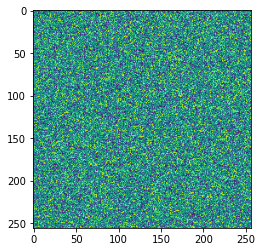

In [ ]:
# ???
plt.imshow(a.reshape(256,256))

In [ ]:
# no, you don't have it
flag = loader(b'THIS_IS_NOT_A_FLAG')

In [ ]:
def magic(a, b, k=1):
    a_gpu = drv.mem_alloc(a.nbytes)
    b_gpu = drv.mem_alloc(b.nbytes)
    
    c = np.zeros_like(a).astype(np.int32)
    c_gpu = drv.mem_alloc(c.nbytes)

    drv.memcpy_htod(a_gpu, a)
    drv.memcpy_htod(b_gpu, b)

    for _ in range(k):
        f(a_gpu, b_gpu, c_gpu, block=(16, 16, 1), grid=(16, 16))
        a_gpu, c_gpu = c_gpu, a_gpu
        drv.Context.synchronize()
        
    drv.memcpy_dtoh(c, a_gpu)
    a_gpu.free()
    b_gpu.free()
    c_gpu.free()
    return c

In [ ]:
b = magic(flag, a, k)

In [ ]:
dumper(b)

b'gANjbnVtcHkuY29yZS5tdWx0aWFycmF5Cl9yZWNvbnN0cnVjdApxAGNudW1weQpuZGFycmF5CnEBSwCFcQJDAWJxA4dxBFJxBShLAUoAAAEAhXEGY251bXB5CmR0eXBlCnEHWAIAAABpNHEISwBLAYdxCVJxCihLA1gBAAAAPHELTk5OSv////9K/////0sAdHEMYolCAAAEAGkAAAC+AAAA4wAAAKYAAAAdAAAAvwAAAFsAAABeAAAAOQAAAO8AAACMAAAA6QAAACMAAAAxAAAAeAAAAPQAAACFAAAAcwAAAMYAAABQAAAAAAAAAC4BAAA2AAAAvAAAAL0AAAAiAAAA7AAAAEoAAADfAAAAZwAAAEkBAABpAAAANgEAAA8BAABsAAAAgwAAAGoAAAC7AAAALAEAABoBAAAHAAAA2AAAANEAAADEAAAALAAAAB0BAABAAAAAAQEAAEYAAADYAAAARAAAAK8AAAA8AAAAkAAAAA4BAAC5AAAA1wAAAPYAAADXAAAAvQAAAD0AAAAeAQAA+wAAAAEBAAAIAQAABQEAAKMAAABKAQAA8QAAAFEAAABrAAAAZQAAAC4AAADoAAAA3AAAAAQBAACrAAAAUQEAAEgAAACrAAAAlQAAAEUBAAC1AAAAAwAAADEBAAA7AQAABgEAAPAAAADvAAAAQAAAAEwAAABFAQAAUgEAAP0AAACkAAAAMAEAAHMAAAAXAQAA1gAAAMcAAAALAQAAFQAAAHwAAABEAQAAEgEAAAsAAAAzAQAAegAAABMAAAAHAAAApwAAADgAAADlAAAAHQAAALkAAABTAQAAiAAAABUBAAAfAQAACAEAACsBAAAHAAAAYQAAACIAAACIAAAATgAAADkBAAA6AAAAtwAAADgBAAAyAAAArwAAAEwBAABWAQAAEQEAAPoAAABGAAAAiQAAAGYAAAAwAAAAIgAAACYAAADJAAAAOwEAAPAAAAC5AAAABQEAADMAAABIAA

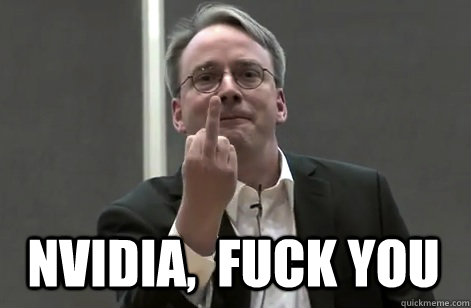